# Python and SQLite relational database: a hands-on tutorial using the COVID-19 dataset — Part 3

The main goal of this article, which is a part of a more comprehensive set of tutorials, is to provide a hands-on tutorial on Python and SQLite relational database.


## What you learnt from the past:

- How to use SQLite and Python to create a relational database with multiple tables and attributes.
- How to link tables in your database.
- How to populate a table with multiple attributes using Python and SQLite.


## What you will hopefully learn here:
- How to populate all the tables of a database with a special attention to the `foreign key`.


## COVID-19 Dataset from "Our World in Data"

The COVID-19 dataset that is analyzed in this study, is a collection of the COVID-19 data maintained by "Our World in Data". It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest [[source]](https://github.com/owid/covid-19-data/tree/master/public/data). 
A full codebook containing a description and source for each variable in the dataset is accessible from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

# Loading the libraries

Let's first load the required libraries:

In [1]:
import pandas as pd
import sqlite3
# for displaying some of the images:
from IPython import display
from base64 import b64decode

# Reading the dataset

We can read the data from the csv file stored locally on the disk:

In [2]:
fname_csv = 'owid-covid-data.csv'
df = pd.read_csv(fname_csv)

Alternatively, you could extract the most-recently updated data from its remote source as follows:

In [3]:
import requests
import io
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
s=requests.get(csv_url).content
df_from_url=pd.read_csv(io.StringIO(s.decode('utf-8')))

# You can comment the following line in case you want to keep using the local dataset you already loaded using pd.read_csv(fname_csv).
df = df_from_url.copy()

# Connection to the database

And, here is the filename of the database we created in the past:

In [4]:
fname_db = 'covid19.db'

Now, we can create a connection with our database:

In [5]:
connection = sqlite3.connect(fname_db)
connection.row_factory = sqlite3.Row 
cursor = connection.cursor()

# Populating the tables

We can then start with populating the table `place` (please, see the previous tutorials for more info). In case there is any new record not existing in this table, the record will be inserted into the table. Otherwise, it will be ignored to avoid duplication of entries.

In [6]:
#--------------------------------------------------------
# Populating the table `place`
#--------------------------------------------------------
sn_place = 0
for index, row in df[['iso_code', 'continent', 'location']].iterrows():
    #uncomment the following two lines in case you want to display the progress
    #print('\n')
    #print(f'record {index}/{len(df)}')
    try:
        cursor.execute('INSERT INTO place (location, iso_code, continent) VALUES (?, ?, ?)', 
                       (row['location'], row['iso_code'], row['continent']))
        sn_place = sn_place + 1
        #uncomment the following line in case you want to display the message
        #print(f"one record was added | Table: place | {row['location']}")
    except Exception as e:
        ##uncomment the following line in case you want to display the message
        #print(f"No change | Table: place | {row['location']} | {e}")
        pass

connection.commit()
print('-'*50)
print(f'{sn_place} records added to the table: place')
print('-'*50)

--------------------------------------------------
22 records added to the table: place
--------------------------------------------------


It turns out that there are 22 new places in the remote dataset that did not exist before (not all places had COVID-19 data from the beginning). So, these new records are not inserted in our `place` table. Please, note that as the COVID-19 dataset is being updated at the time of writing, there may be other records added to the remote dataset at the time you read this tutorial. The following image shows the tail of the `place` table loaded in the [DB Browser for SQLite](https://sqlitebrowser.org/).

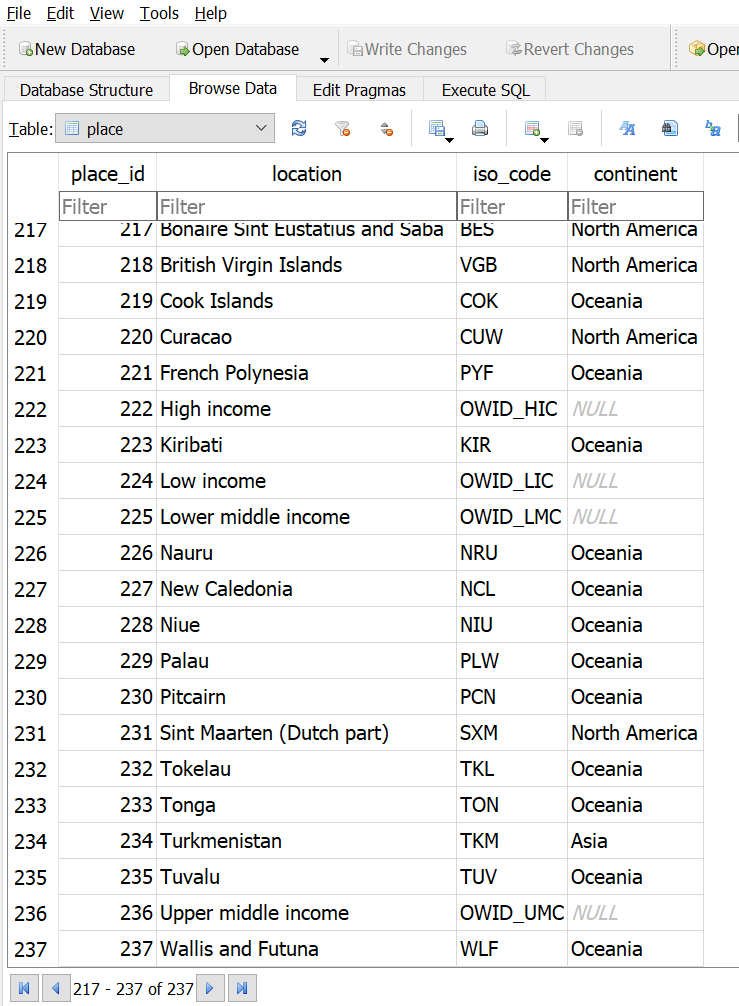

In [7]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAuMAAAPuCAYAAACilBPOAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P159DVFneaL/u7t1eusc/+695577urhrNPdp6vuqu5TPVTbjdW7yqM1dJVVpWWVU1WpZYGWW3G2SkvFAacSFNCtgqKICjKjCAhbZJBBGV8mkZdp8zLzAi+TDC8gIHEjMiMyIyO+Me3MvTNj5/NZ67vglxkZGRnDE0/Gjr3fLQYAAAAAAADoBZhxAAAAAAAAegJmHAAAAAAAgJ6AGQcAAAAAAKAnYMYBAAAAAADoCZhxAAAAAAAAeqJjMz5n060tNpkt5N8DZj5lW1sTlkNRx01GfapBruUGAAAAwDoJmPHSUGxRMZmxhTo/nTfSr8+AeMrHw1uOhhlf/XPMp6JMU54zxYLNJur+ZlmGhL++VXTb/t23hRvfvVLLsc5yAwAAACBXosy421CU5/s240vdb81m3LsSv5ixCb9feXuzLENmHe29jnsofPdKLcc6yw0AAACAXGlpxk3WbUBa3M+7TWUVz+HOczGb8LK4Vs2HzDrae519ynev1HKss9wAAAAAyJVOVsbr83T60myqbQxdms4Ew1OYb1UGFc2V8TKf8v+b6bopc7FVpdjeo6NvURGk1SGVp33MvEdXhOu/WW46rT8NcQ+zLa06XRbf86S1i52+/rtxTWdlBwAAAECOrNyMl8ajXoGmDemyhMonkeat4UUbK+Ph5+gEajW+sUVFkFiHVp7l9dSx7ne++OvJLLd6Vt+z2WmMe1j1Jaqgqxc83/PY5/x920xf/i36YX1sVS9JAAAAAMiF5b/AWRgI2nC4/+YQZmp5POWrTJLD8PRhxol8S0MXt6JaodehWZ/iuSZTNuXPXB0r0miGtzN89USfaz7vEmmoF5rOKO9F96cy6rISZW+0hXmeftbVPg8AAAAAhs5qV8ZJ412maR5bllD5OGQZOL2YcXFbbuq0TwaKvxuFS63D8mVDpRdGVvx/YWjlRcX/r2Q7hKeeYup9mbaR16z9eZLbxczLkberDgAAAAAwClZrxgtTVa8q6uHOM4VQ+TjLGL6YfJeFuC9l6FLqsDb0wpjrRrdcXbYNf1d46qnxnBp6e8SkIe5RrpxrddHZs/naPbVdzLwcecOMAwAAAKOmh5XxLgmVj+MqA2GKnc/RKWXeRXmKMpj7nZeoQ5WPSFutGJcr5tO5+m9xsGM89RRT70u1jY7cgkQZ+qXw3Su1Xcy8HHkX+XRVfgAAAADkxoq/wBm6vi0x+TvS9GbGxa25geQujl6xXqIsytDN+DNp+ZVbVmb8+lWZPV/Z6HPlqnaLPeMmQVOcQsrzBMoVmb75rAAAAAAYGys248psNM3ggptGZ5ZJhMpXUpjehuEpr/OtvhbXrGRfMqd4ERD3p0zkMnWoVoiN/NR9VvUcgfq3yi2Ns/fZrDTNe4j0+jOW13dlZn3Pk9ouZvry78bLF1EfAAAAABgXKzfjgtK0lGaxW3MoDY4j9HKUhlwFN2/BrRB63l2vXKq8qXyXq0P7hUMg79PNsjEBXVYds9xUWn8a4x7SwNbpm2a4Hb7nSW0XM738exKuDwAAAACMh4AZBwB0g8/oAwAAAGCseM24voJHRd9QZTJjKFBlo2LoUGWmIkeo53BFOjDjAAAAALDJ0zUBkB0w4wAAAACwgRkHAAAAAACgJ2DGAQAAAAAA6ImtRx99lCEQCAQCgUAgEIj1B1bGAQAAAADAWvjhD38o/w8otn7+858zBAKBQCAQCARi1aHMOHVurAEzjkAgEAgEAoFYS8CM21GZ8aeffroI/SQCgUAgEAgEAtFVmGYc/tMw47fffjs744wzrEQIBAKBQCAQCETboMz42P1nY5uKqAiYcQQCgUiLn/3sZ+RxBAKBQDSD2qYydv+JPeMIBALRMmDGEQgEIi6wZ9wO7BlHIBCIlgEzjkAgEHGBPeN2YM84AoFAtAyYcQQCgYgL7Bm3A3vGEQgEomXAjCMQCERcYM+4HdgzjkAgEC0DZhyBQCDiAnvG7cCecQQCgWgZMOMIBAIRF9gzbgf2jCMQCETLgBlHIBCIuMCecTuwZxyBQCBaBsw4AoFAxAX2jNuBPeMIBALRMmDGEQgEIi6wZ9wO7BlHIBCIlhFrxh9++GG2c+dOtlgs2HXXXcd++tOfsquuuopt376d3XTTTcU5kYa6FoFoE+h7iKHEOvaMP7BzO7v1wo+yW87/B3b/nVeTaYYUne8Zf+ihh9gtt9zCtm3bxs4///zqo4fzzjuPXXLJJezWW2/FgEd0GuhziL4jxozff//97Prrry/6o+izTzzxBHv22WeLePTRR9m9995bGCNhkh544AEyDwRimUDfQwwpVrln/KH772B3/fTr7Mb5q9iu7V9n91y+P7vuey9lt136BfbQfbeS1wwhOt0zfs8997Cf/OQn7Oqrry4G92OPPcZ++ctfFgP+wQcfZLfddhu74IIL2Nlnn83uu+8+Mg+EHieyPbe22B77XUmcQ4hAn1tnoD+6IsaM33jjjWzXrl1F33zuuefIEJOSMEzCGFF5bGZcxo78wAfYQfMdxDlEF5HS93784x9j8aIK9M1VxCr2jD/88IPsnhtPZjef80Z291VfZM8+tZM998Sd7NEd32NP3nUqu/28v2Pbv/tKdsdVR7GHH9pF5tFndLpn/OKLLy7ebsTAdvHMM88UH42JAW/nUU72Wzz2PJE+t14jUJenGXuw/a6k0vtimfLD/ISifZ/T4sQ9rbYeVt2jPw41Ysy4SPPUU08FDZFIKz7RMa9XcdmRH2AfOGjOdjSO72DzgzzHj7xMO2ZGaTjqNCswIJcdyT4g7tGIg9h8hzgPw7PqSOl7whCJTxjNPMqQfcWKI9llZPp1xxJ9CX1z7dH1nvFdt/2E3fLj97LbLvooe/Khn/Kcn2DsuZ+zZx7cxm767p+xJ68/gP3i9hPYo9cdwhanvoFd97292M7rPca/By/Q6Z7xH/3oR8WAFwPbhTBG4g39u9/9LpGHZjb22I9dSZxbrxGg73nlfns4yugLmJ9VRPs+V8aJe5b9rvkSKPtjUjuvMtAfhxopZlxsExBbA8T/K919/PHHi092xFYCsU3AZ8Z3zA/SzIIKZZLo434zIa9dkRkvXh54fkdeZpwTJqh4eYDhWXWovidWvsXecNEHRb8Tuij6mjBHP/jBD9jpp59eGPFzzz2XnXPOOUReVFvJF75BGPK0voS+2U90uWf89ssPYDee/qfswRuPZrvvv4Y9eMuP2C2XctP948+w6854N9vxw73Z7utnbPdV+7KnFoezp+88gT1w2afY9mP+nN1w+vus/PryAp3uGRdbAZ588sli64D4mEvsSxNGSFWy2NcrVieFGJx44onW9dVkv+eebA9HZazXCHjueeV+RRm39qSeg4plyt/HM+cV7fscD/kWbH8aI6Jsg/h2XmWgPw41Ysy42I8rDJH4f2G877jjjiKEQRIm/Jprrim2pwgzLj7xMa+vYsecHWQaiMI8HMmO5KbIOm4Z9FB0aEDkqqNldhoBw7PqUH1PmO8dO3YU/U30WWG8r7zyyuJv0fdEiOOiLwpzftJJJxl5OdpK9sn+2zChL6Fv9hZd7hm/8fQ/Y889dTv7xf1XsAev+SK7//JPsbvPfRdbnPJqdsnBv8WefuBKxnbfyNiuH7Lnbj2Ese3vZ+yuo9kzN3+KXXbwf2nm16MX6HTP+JlnnlmYIfFlEWGCxDe21ZdChCESxkl8qe7uu+9mJ5xwApFHPdkXbyeNtxDaCFSrgkXsyU6Ux+3rqWNXsv324Mecles3H+W91RYB2VCNUOVxnfNdU18n7t94TqJe3HnwMD9yMerFVYc5RPs+J/uAUSd6lPXTbEt/m+jXUfWq8jixvLdM4+pnddT3ps6X90N/7CNizbjoq2JVXBhuYYzEf4XpEauQYoIS5ui0004rQvwt4uSTTy5+AaPOyzYIxWr5kZcVK33W8WrFsr6uPK5WM/X8yv8vz6moVzzr65rH6XBtnTFD3f8yucJaRtMA+csVl4cMacKqNAfZnzR4n9O4Pvx8/QfV94QJv/zyywsjLvqd6Gff+c532FlnnVX0SdoL6H1FO+4w43Q9uvuFuQXL3Q51Oeo0B7ODq7TUNXqgb/YZphkXsaz/vGH+KvbLp+5g7LFr2dN3ncweuerTbPfV+/L4ALvrlJcUx9h9c8ZuP4w9d90H2O5zXsTuO/0F7JHtM3bZIb+p5dWvF+h0z7io4N27dxcfgYmVSLHqI/4r3niuuOKK4ot0Iu6880527LHHEnnUD6dW+uo3FO2cTF8+YL1ftmG2iwlf30urTIJ9jH4LEmHfsxGNt6gT2YlGPuXHHXbD1WnirhH3qK8zXyACeVj1KM7XncFbhxlEqM+986jfZm/65m+wW27fEe5z1jkZRjuH2yRUr3UeVbtY/ZWKQFnRH3uLGDMuvrcgDJH4f2GGRD8V/z311FOLL9iJrVbCGKk9vCrEKqUwSnpepmkRf4sVvmKiNo6b20/EJE2ZifqY+XcZpQmojYFZBiuiV0vrclWrlIWp0E0If9EwVjCL+1dmJCYPdUxfDVVbLOp03uckPpW47EiX4RtOUH1PbEUR21JE/xPmW/Rhce74449n3//+94tPGsWX4Jt50X3DrtdAPVJtY+Tt7291ezfL4iifGeibvQZlxpeN6097BfvlE9yMP34TN+TbGbv/HPbk9s+w3Zfuze477SXsmZsOYuzmA9k/HPObhRe499wXs3vPehn7+dUHsku/tIeWV2B+FbFCL9DpnnExoMXeRzGghRkSH4cJ4y1WLC+99NJi9UcIgDBMRx99NJFHszLKh3CZB6Li9InenPRFJe6xJ9uTV1R1rEjjM0DEPfSQ93CebxisQF4qYq5ppCFCP+9NG6jDRtphRqjPvflbe7CPf/817C8O/TV25NHfsvMItaGIRp3EtEmoXqk8HPk2IpAG/bG3SDHj6sXxrrvuKrariK0AwnAL4y3MkTLhQo/F1gKxp9c04+WkrE/2coIuJuSmCagNh8uoxKQjjhGTfyMSDU/wfmY0DE1MHtLcmF9mDeWjPydlojIIV98T/y9eAMWvUYk+KHRUrI67f03FXc/Neg3UI3W+qFtX3+URut51HRXom72Gacbb+M/rTvlz9mxhxq9n7NErGXv4Em7Iz2TPLL7IHjn/1ewXF7yY/fyc32LvPPJ5lRfYecofsocu259dMvuvdV49e4FO94zP5/Pip+XE/l1hisRqj/hpOfERq/j5uUOO+Sz7uy//NZt+7mXsr//xf7BvnP4FIw+z4Prfxjlyki7TlMfKNxSVXhh78f+FwZdvLcX/e1fdzPIYQTRe+QIh33SKCBiZZa4hnt2Zh0xLPmewDocfZp9719EvYO/89m+ytxzxX9kbDv/P7MPfexU7YdsX2HtPfBn7g8//M3bvAzubeRBtaEWjniLaJFivVB6OfBsRSEM8C/rjeiLGjItPatSLozBD6lMcZcbVhCR+8UKE+ltstzruuOOa+RWTsJx4i/93GXPdLLtMhHk8MOkb1zWPaSGvse9nBlUuuqzlS4hYLVSRYHjIZ+Chm5jQc8rz3k8EBhiuvif+X2zrE9tVxAq5MOhiWx+VRxllXdBtoEVEf2mudMu/lRkNXm+0rZHGPm6EzD+YjsyPvgf6ZnxQZnxZ/3ndSX9amvHHruUZXsrYgz9ibNf3Cy/wrqN+k+3NTfgbv/GfGl7gD7kXuP/CT7KLD9L2jBPzpxWNOSpiPgzOaXUene4ZF/scxZ40MdBvuOGGYpDffPPNxf8ffOz+7OMn7sVOu/YQdvXOM9nnz3or+4vP/wf22WP30fKwH66c1MXquHGuePvQJ/s6VJri44DCeAtjrpuBcrW9Pq/ub4ajslXIMuiVWhsXdd5nZJa5hgfRIdx5EMZIPXNEHQ49zD73tm8/n5185ZfZd684uBh4x22bsdnZ72VHXPxZ9paj/4A9f///md296w4tD0cd60G0s7dNgvVK5RFRjlAaopxpfWuZa3igP0aZcWF41K+miIlHhDBEwgSJ/bti367+SxZ6iNXKZn7aZC4m7GoCLlfYquOVSTeuqY5Rx4l0RV660ajDzk9Gp4an/Lth/HSjEpNHjOGJeE7LdJmrmQMMV98T/xV9V/SvY445pjgvvmcjvl8zm83YgQceyL785S9redF1Sq/oanWkRXUt0X5V2wSvp9q7zsc+bgT6Zq9BbVNZ1n9ee8IfsOeeuYexJ3Yw9vD5jN3/A8buPTHoBX6Te4EL9//3Wl6O+U0PYo71zofBOa3Oo9M942JSEf8VWwSuvfbaYrVH/dO7e37mxeyUn83YKdd9sWiEA89+E/v82W9mL3j3v9byoB5OHduvea5hABxRVAQ33iJttRJXrpjveaL6r3FNI/yNU78o8L8Nw1FE4xiR1zLXiCieXaYJ5qGH3M+kzsXU4cDD7HNv/OZvFIPvc2e+i33mjLexf5xP2ce+vxf7xOlvZode8En2um/9Nvu1j/8TLQ9ZJ55PSBrtHNMmwXql8vD3tTL8adAf+4sYM37ZZZcVZkdsF1BGSPxXbEER58QKuAjTkIuJy1oZ1z7WFiuK+kRfTMjyeHOVjDIF1HEincsseEOWMbhSF2FWGuZGxioMT9JzyuczyzXAcPU9sYgh+p/QUfEJjTDeBx98cGHML7roosKkn3LKKVpeRD1Lk9g4FlWPWl5FHtqLY/B6qr19x81A3+wzutwzftMP38VuPuf97Im7z+WGfMHYQ9yQ3310lBf4dx/7v2t59esFOt0z/r3vfa8wRWLbgDDhuhl/yYd+g82v/XrRAIpTrzmEPf9t/1zLg344fSWtPueoCD1UpezHzYC2Ai7yK809ZRD08NxDVnJ1bhkjs8w1PNJMlxGNzhFRhwMPs8+99rB/x46/bMaOvuQgdsRFn2XfuHB/Pgjfyr5ywSfY9OgXs/+y3/+HXXKT8Y//FPXlGjBlHdX9J6JNgvVKnY9pC08a9MdeI8aMi+8yCIMjtlOJT3OEMRIhViHFyqU4Zl4jVjPFr1t885vftM4Vptv1c4byuNcAOI9HmIfIUCt10abMdawLw+N6hmA+nkgySP2Fq++Jlzz1Mii+myBCpBMhjn/9618vPuGu86Lrp3jxa9RDXD2WfXjO5sYLZfh61/n49kPf7C+63DP+8EP3szuvPo797PhXsNvO+wh79qGLGXv08qAXeOH+/5zdc4/xz+MXc1U/XqDTPeM33XRTMbjFR67iW9hiIhG/dCH++8J3/x/sgDPfwPY7c8+iEfb74Z6RK+P18aYZVw/dnOSv5Ma7/lutvBmVKyvcv19chKM86nrN4FtmqCpzXT7rlyGC16i/VcMS1wTyEHWkP3uzo8TU4bDD7HMv/8r/wf74C/8b+/3P/3/Zbx/w/2Sv/+aEffn8j7E3fPsP2G98+n9ll99M/2MqRdvwemsOQlmXjX4ij3nbPlSvZR56evqYGY406I+9R4wZFyH27Iq04js0YgVcmB/Vf4VJEivhygyJ/1fHDjvsMDu/YqImVr/kJGwbDddkbh+3V9WVeWnea8f8yOa9ibCNmgxR/uIeVLmMY/KZ6jTl+TTDo8pir8Dqz+V7TnFOf44yrb4VaLhB9T3x/0cccUTxQij64ec+9zn22c9+lu2///7F8aYRF0HVswi1ElvXRVR/Ieq/Tuu73lUOuu+6An2zn+hyz7iKB++9je244HPsisP+L3b3Tz7BXn4o9wJf5F5gxr3AgU0v8PuzX2O7HriPzKcvL9DpnnER4qMv8RHrUUcdVQxm8Q+tiJ+U+9t9X8VeceCvsYPO/NtiRVz8V/wd2jOuonwg+5w6XoVhsMuK1cxDEUQlkiHTWdGs2CqUKVJpeIU30+r5yTJ5r5H1If8RJJXOqh9fHrJzNM4bZQ/V4dDD1ecOOeQQ9p8++T+xvzni99h/2++fs6tu2UZeX0WjHsuw+6Jskz2adebrs1VU9SrzaFxDHTND7z962G1aBPrj2iLWjOuhftlCGCGxYikmJPUvJIotBeL/xTFhnEgzriZ9y3i4PqKmTIHruMy7CNNgqeM8Ik1P/eKgR5pZaebBr+UmJDkPHsqAlcGfrcjXNDiO56wMkgqzjvMI1fdEiP8Xenn44YeTaZtB12kRTvOo1Zerrzr6kft6TznkufKaCDOKvrn26HLPuBm7br+aXX/q37NLPvcf2P1XfJ7d8YN38f9/Efvvn/5/FF7gj774n9n9D+4ir62iBy/Q6Z5xM8Q/LiAmFBFi1fKg4z/CXvR3v1JsTRH/FX9T1yEQy4bZ5/7dx/9n9r9/6J+wa2//KZk+PerBQ59HjDGWMeMqvvvd7xZ7c8WXkcVPdYqfNxSh/vEfYZLEPl7qWkQHURieYa4grivETxnaXxJG9B4b2je73DPuiruuPZNd/e3Xsqu+9Sp259XfZ7/x6f+l8AIPPPQAmT49uvUCne4ZRyA2P2DGEXa0MeOINQY3NzErlAjE2mNEfbPLPeP9xQrNeNs9OwjE5gfMOMIOmPFMolhp1D/KhxFHDCRG1DdXsWd8/bEiMy6iqz07CAQCkUM09vE5grrODJhxBAKBiItV7hnPNVa6ZxyBQCCGHpQBV0GlpwJmHIFAIOJiHXvGcwvsGUcgEKOPNkZcBMw4AoFAxMVm7BnvNrBnHIFAIHgsa8RFwIwjEAhEXGzGnvFuA3vGEQgEQsYyRlwEzDgCgUDEBfaM24E94wgEAtEyYMYRCAQiLrBn3A7sGUcgEIiWATOOQCAQcYE943ZgzzgCgUC0DJhxBAKBiAvsGbcDe8YRCAQCgUAgEGsJ7Bm3A3vGEQgEAoFAIBBrCewZtwNmHIFAIBAIBAKxloAZtwNmHIFAIBAIBAKxloAZt2NLVAoCgUAgEAgEAoFYf2BlHIFAIBAIBAKB6ClgxhEIBAKBQCAQiJ4CZhyBQCAQCAQCgegpYMYRg48bb7wRMeKg+gQCgUAgEJsSMOOIwYcwZGCcwIwjEAgEYtPDMuP6ihQCMZQA44TqCwgEYrPC9CEIxNiCNOPmMQSizxB9EowT6NF4A20/jkA7IxAw44gMAmZ8vECPxhto+3EE2hmBgBlHZBAw4+MFejTeQNuPI9DOCATMOCKDgBkfL9Cj8QbafhyBdkYgYMYRGQTM+HiBHo030PbjCLQzAgEzjsggujfjczbd2mJbREznMknWuJ5vwmYLmSSaMq9J+oWdAD0ab6DtxxFoZwRiI834iWxPbh722O9K4hwix1iVGTcN5mI2WdKwDg3f83FTPpmx+EccuRk/cU9eZ3uw/a4kziFWGjBp4wi0MwKxEjNemmF7VW6ZCW0ZYz1cM37lfnsQ9bInO7E4v85y5/XCsi4zzt0qm1DHs8NjoOUzbkV/BLAJZtylSWV4x0HDjMt89jxRno8dR477V/kgqOjWpLXoA2uL2P4UF/75RouijzfT2WXotmx6wIwjECs04+agrYRhj/3YldpxfywjAKsTjTZx4p5C5MwXkivZfns0J/r1lHuYdeSKdZvx0qfWaaoV5a0pP1pSHytDz2s+5ceM1Wf72ILNJvyYMsXzaSM/8/rm/epy0PgNdPMTgDJt495V/q5zvmu6pUszvlR/79CMN9PJvChzhChiFWZ82JrXXRnD842ebovteaKeTvbNxly9uvqDGUcg1mjGi7hyP7aHGOTRK0LLCMDqRGPpkM/tL9M6yz3AOvLEusx4YZgJI2qma5rZ4kBzRb0w1vp2F5WXfazw4o2XgJL5tDa35v0os9+Efr4KafzVS8dcu6+AqodmXqFrumNYZtyM2Hwd6aJ0YbwBM75kxPYruSLeNOIqyrKkv3imB8w4ArFuM86jXCE3Vpoa0dy2YZ/zXVNfJ+7f+JiOeMt358HD/OjOWNFvfgQYWN3yip4I/7M2n6V53MzDrPdmOXnsuU/wXu48XeWh7hWok4RYlRmvy6rCNsu2oaWPl4ZZmlHTXAvzO5my6UQ7VqSR97PMuw5xP8K8N3GVXWK+PJg0yhPIS+F9huVZuxk3x30RTb0q8yn/v5nO1edd95d5FIanTkON9eB9jHLvsYfIwyz3iWy/PbR8Ck0Tq6XadY0yRtw7oJNtYt1mnFxNJhaQQjrXPK+upe6vH/PXdZK2BucbEbLdPe1V3lPdK1x/ywbMOALRgxlvCsWJ7ERDMEpB9AlA3DXiHvV1Uni0t3xvHlKAdTE7cc9aAEuRqkW7uNY3CRGCbgf9rPaz+NPqx8xyFmmKcsZdbx8r/7bLs0SdJMSqzLhpMMvV3XrFmDShLiPcMKPlFhR1rTDq4v8Lwy4vLP5frW7LPMnVbvJ+Zdm6NOPly0T5/GWEzbj7mu5YqxmnTExxzDS1zfEQzNeZTo4nzayJ+zfThfSOh1VuZbCb5W6kkdc09MHSvXY62TbWbcYpg2rqWEjn2mkuXcb1zTdGGHN1uP6WC5hxBKIPMy6FwnneO/k5IuaaRhoi9PPetET+xKRkRimoXCBFkCJJldv1/DFpXde6zrXJkzgeUSexsS4zro6XhtmRxrUCbJjmwtgXfwhjLtMXacrV8/p8iWVs64yax7Vwmm2PgS6QeZa3kM+sP1PjGam8Qtd0R5dm3Ky/MtQ4N1/YZXi1xTUezHCkK/Jewuw0yrRMuVOOGaHn27hH97EKM263vwjtGfT5yXo+on4aOuerv5j6jknDo4v5Rn9O85yK6GdrFzDjCMRAzHhDOIrwTSJLXkMImDMPmZZcfSDyUff0iaMezfuqlSSq3K7nj0hLllNF7L3MY1QaHh3UiS8GZcbJlWqOaUaLv7nxFumrFe9yxXw6V/8tDhrIL3aqvFz38+J6vpLS+MstNZSJDpnx4DXd0aUZt/qtHq7x4jW1EfkWQaSzNMafV0ir0sqdcmxJnewgVmHGXfWrR/m8e7A9+EtOI31I51xtoaXz1zeRJnTP6pg7yPlG5uutj8a9qfJ3EzDjCMQAtqmItPWkoc6HJ5G0a3gQwuLOg5iA1OqCLD8VyUIl8yqvcz+rnW9EWpk3Ldix9zKPUWl4dFknRKzNjEvjWx53GVr6eMPgCoq8uDmdcZOqOWmRbjKb8Tw8xrVhwP3GmsZzTeMZOTDjZbiMVEMXIseDFWU6/9hw5aWudWjVUuWOPRa4N//bqZMdRF9mnNquUkRI5+T55TWXSBO6Z5VXRMi8yusi6qPxPCn1lxYw4whEb1/glG/nxWDXhN465hKnxGtEFJOWTBPMQw9j/6Vr8lsqyrKWExhVblddRqT1ljP2XuYxKg2PTuvEjvWYcbUirQy129CWxlsznqbBLVD5GavahWnlx7X94SI/PY1p7K37cRbc5BNFkzjKru7dvJlR9vJa/X7Flhp9P3vENV2xSWbcn86RJqRVS5U78ljo3tV1IgydbJxbLvoy48UctcceRb020od0rrXmEmk61dYy/3K+cbxwaNGYqxPqLzVgxhGIdZtxKSzVuaDYE3ktcw2PtJcAIxqC2KEoNeqDytd1r5i0vnLG3is2T9+92seqzHhhTPVofIHSbcYFpUGur6XS0T/3J+9NGOI6P9vUmvcjv+xZ4Xg+l1lWJl2lEav5jbR6fvr2Ft813bA2M+5K49WW2H7f1f2pY8uUO/JY8N5GdGocezLj+jNYzxrKw3c+or6j0rQIY/5Vn2r4Xh7qTzo6LIcRMOMIxDrNeCFs+uDmYYhDJQCaAFrfHA9eo/5Wb/TENYE8hEjpAtVcIVB/NyekK/fbs/F3I4pn18pThFpJqo/b35J31CWPZlqVVzOtXU6en7yG+kZ+OE93eZLrJCG6N+MgF9ZnxmX/b4zTpi5Q+VDjyI6Y+zvSxGokoXe+ckcda6mTbWP9ZlxqXjVH2avHIZ2L11xas6n+lKytkfONiLLvmIZctnOjHDH1t1zAjCMQKzTjhfFuRFNMqlAmXaXhImOJWXVeCon3Gikae+4pJ6QyLBHx5VFNZtp5o+ylQGppDAFtRi28/mvMZ/UJoJ5WlI9Oa5XTWOmo7xWTJ30PFWl1Eh8w4+OlSzPe6Jta6P1ZmZMy+LgodEKNf6r/63k3jY6ZxjVuyvCkCWrk8uUOHmupk21iFWa8Lmsz9tjvFNKsVs+oLSKFdC5Oc0VdudugTFOXZTXzjYxGG5dh90Nf/bn6fVzAjCMQKzHjCES3ATM+XqBHS0ZhsNqZpL4Dbb/+KE1/ty9VoUA7IxAw44gMAmZ8vECPIoIb7/Cqd36Btu8hrK1Jqw+0MwIBM47IIGDGxwv0KCKithnkF2j7nsLYfrTqvoR2RiBgxhEZBMz4eIEejTfQ9uMItDMCoZlxMSAQiKEGGCdUX0AgEAgEYpOiYcYBAAAAAAAA6wNmHAAAAAAAgJ6AGQcAAAAAAKAnYMYBAAAAAADoCZhxAAAAAAAAegJmHAAAAAAAgJ6AGQcAAAAAAKAnYMYBAAAAAADoCZhxAAAAAAAAegJmHAAAwMr52c9+Jv8PrBvUfX+g7kEMMOMAAABWDkxJf6Du+wN1D2KAGQcAALByYEr6A3XfH6h7EMNGm/Hvfve7CARiTQGAD5iS/kDd9wfqHsSw8Wb89ttvRyAQKw6YcRACpqQ/UPf9gboHIfbZZx+YcQQC0T5gxkEImJL+QN33B+oehIAZRyAQnQTMOAgBU9IfqPv+QN2DEDDjCASik4AZByFgSvoDdd8fqHsQAmYcgUB0EjDjIARMSX+g7vsDdQ9CwIwjEIhOAmYchIAp6Q/UfX+g7kEImHEEAtFJdG3G731wN/vUEZewV3zkVPaCtx/HXvqBk9k7v/Ajds4Vt7Nnnv2lTFXyzfm17NHdv5B/gaHSlSm55vYn2XcueYR987wH2eE/up997ez72ZfPvI996Qf3sNnpO9mBp97F9v/eHexT37mNfez4HewjR9/Mvjy/Q17dHz+88l724ROuZ3924CXsZTxe9YXL2Ktm29hLP3MhO+h7O2Sq1QBD2B9jrnvV51978OW8r4v+LkP2/Vd9/lK29+FXsdkpO9jTzzR1fZ2cvn03+8NDdrI//dpOtvPnz8ij6wNmXMaPr7mXHX/hQ0niPjv5ZjIvBGKM0aUZP++qO9gL33E8e9sXz2efP/ln7LgLbmXHnX8L+9Ip17LpgWez33v3CeyHl91WpD3pggX7r286ij32xNPF3+vkueeeK7TzzjvvZNdffz27/PLL2Y9//GN29tlns7POOov96Ec/YhdeeCG76qqr2M0338zuv//+4pqx0pUpOe6ih9njTz6TFB/49g3y6v546f4XsgcefZI99PhT7MHHynjg0afY9TsfZR859Q629yGLlRmSLg1hTi9D9913H7vhhhvYNddcw66++uoirrzyymKsXnbZZeySSy5hF110EfvJT35SjN3zzz+/ONclqzDju5/+JZudv4vtd94u9pWL7mdf+jH//3PuY5+Y72R3PjSchYn3HnlN0c+LPq/1e9X3xXhQ/f9th97cqyH/ndkd7K8O3yn/Wi89mPE5m25tsclsIf+miEkTR6wZP+YnD5IC7ov3H3k9mVd6fIu9hj/v8/Y9nziHQOQRXZnxW3b+nP3Ou45nB373Z+zwc25mR/xoBztt293s3J/dxy7f8RDbfsfP2bnX3MNe/uFT2VsOOov90ftOYs9/y9F8TK7fjN92223FxC0mW2HGVVx33XXV/2/fvr2Y/IUpn8/ng1ole+qpp9ipp57KHn/8cXlktXT17N8494FCg4/e/nV2xM8OZYdffTA79MoZ+9K2A9jnLt2PfeaiT7BP/fij7GPn78M+/KN/KNK+67Br5dX98fKDLmGP7P4Fu+LOZ3k8wy657RfsgpufYk9xA3LFzmfZp7hh/dRx22Xqbumy3+X0MiTGoujnKXHuuefKq7thVWP+/FsfZ1+46mF20d1PsAvvfIJ97Kx72eLeJ/kLv0wwAF7zxcvYo088zS6+7Wl26e3PsEvvEP3+GXbhrb9g5y+eYmdc9zjv/4yddsMT7CMn3872/nI/hvzGe3/BXnLw3eydx93HPnDSLvaWb9/LfnjtenRREG3GhTneCkSceR6mGV9W3Km80gNmHJF/dGXG9zvqMvbWL5zH/u7QC9lvv+049t+mR7Hffvtx7E0HnMmOOOtGdsNdj7DFzkfZjnsfY5857kp2yQ272AvfeTzb3YMZF6towsju3LmT3XTTTcXqmzDe27ZtK0L8v5iIxbl77rmHPfzww+y4446TV/fLk08+yY4//nh24oknsq985SvskUcekWdWR1em5LBz7i80OBaR9q1f+an8qz/+XJrxq7gZv+quZ9lltz/NfrLjF+zW+x4vVgjve3g3e/HHfixTd0uXhjCnlyExJoXBVivjalWcWhEXJlyk/eEPfyiv7oZVmHHhtz9z3n3s2OseYZ/gJny/C+5nHz9tJ3vosfVvsXDxBNeYN7zj/exN73gfO/2SHez103exv3rD29m2wpCXL6JnXre7ehm99O6nV/pC6uPblzzC/uqwuwsTPjvzIfZnX7yT/Zd9d7A7HljPvLLkyngbszxMM76suFN5pQfMOCL/6MqM/867TmC/8+4T2QvecTz73XefwI48Yzu7/+dPsEu272R/8+kfsDcfdDa7YnE/u+P+3WznQ08U8X/xtE+I5ZU1IybwW2+9lT322GOFhgqz/dBDD7EHH3yQ3XvvvUW9iO0pYhuLSCOMwBDMuDDixxxzTFGWU045hX31q19l++67b1HuVdKVKTn0zPsKDT7mx/dFhUj7t1+6Ul7dD8888wx72YEXsZ8//gv2M248fnYPNyDF6vjT7CxuSE6/lvehx59if/yPP2G/+EX32wy6NIQ5vQwJAy4MttgeFhMi7Q9+8AN5dTeswoyfcNXD7Ps3Pcb2/8E97IpbHmcHXbCLffiUu9hlO3azD3//XvaW43eytx7H45i72Zu/fSd779F3ySvXwxNPPMnOOPdC9snPf5394Utezo79wTb2hy99JfvgP87Yvgd+jV3EyyleRM++8YnqZfQx3k9W+ULqQ5jw//jRW+VfjL1sdgebfPIWdsENu+WR1QIzLmNZcafySg+YcUR/8YIXvIB985vfJM+JEB/zvuIVr2Cf/exnyfMqujLje0yPKr6weeRZO9if/MNJ7M5dj8kzJd+/cEexWn7x9fexi264n935wG5uxo9jT/5i/WZcmO9zzjmnWPkWZlv8LfaFi5VyYdKFpt5yyy3s0UcfLYy4MMBiD2vfHHHEEezoo49m3/ve94rV8SOPPJJ9+tOfZp/4xCdkitXQlSk5mBsQpdeC439yb/FfxXcubv59/yNPsr/5/Db51/oRbb/ffvuxl3zmQvYwN+PX3/Mc287N+DXclF9++zPFCuE5Nz3Bzz3NXvzJn7C99tqr+N5Bl3RpCHN6GRJ1Lwy2eP6YEGlPO+00eXU3iHy75NYHfsEOuPABdgQ35Ffd+ji74c4n2NcvepDtc9Jd7Mc3PMY+dsp97JXfvou97ZR72d7fuZe964i72MGnrVd3fv7oY+z103ewd33gH9lv/c4fs30+fQh70R+/mr33k19kL/rDl7GzrrqreBEVfV+9jH7/mkeKF9KXfPoimct6eOSJX7L/9NFb2LuOuqf4++f875d/e8ZeddT+7JfPrWfLzArMeHmuuYVlyo8q6msXs0mdZjJjdW50/o30jTwFCzab2Mdjzfiy4k7l1YzaaJ+/7/Pq8j9vX3Y+kUb/u35WEa9h36rSl9HIT8RrvuU4Z1+LQKgQq7suQ66M+Hvf+17rnBmdmfE3H82OPedGdu9DTxZ7DX/5XL0B8tlfPsemB5zFvnDST9k9Dz1RbFcRK+MvePux7Kmnn5Wp1ovQTvGxttgfLgy52I4iVsPFx+Jiv7jY/jEkIy743Oc+xz71qU8VE8B73vMetvfee7M3vOENRaySrkzJ50+7u+gbJ1x0H/uOiIt3se9efB9751euZR/6xrXsPYdezT5x1HXsLZ+7gu09u4K972tXs7//6k/ZGw64hF1980Myl/WwY8cO9rWvfa3YGvGnB1zMHuRm/IZ7n2PX8/jZ3b9kP73r2WI/7Y93/IKfe5r98T9eXGybEGPuiiuukLm0p0tDmNPLkKh3ZcbFyrcYk/pKuPm3eHEW36Pokq7N+KdO38lOu/5RdtTlD7OvXfQA+yY35ufd+Cj7CDfjd+16ir37uJ3sz79xB3vt1+9gex1zF9v/xJ3s6WfWu5H8kEO/xl76ytey2bdOZn/+13uzN7330+xP//KNbP9DT2B//OevYe/84D8WL6IX31oacvEyetYN5QvpS/a7ROayHn5wzWPsd/e7je1/2gPF33/3g0PYbNv+7ICLPsm+eOGBhSF/7dffyo69/BH29yftYu8+cRf78KkPsJOvai4UtWElZnzedMlsPhWGUJnk2qzX10sjPVUX2vmXRnzC1KEiz4aBb2fGXeJ+0qX3sZN5CHER/z35knvZ6Zffy26551H2V5+9hMyrGbWxrs32+Wzf5/FjlXm2zfi3vqWuL+NbrxF51Ka6NNvPY/uer9LwPKTBN88V1zbMPwLRDMqQpxhxEV2Zcd/e749946Lil1Ne8oHvsZd/6NQyPnxqcewXPZlxgVgRF6tp1157bWG+f/rTnxYGfIhGvE+6MiUHnnIne4Tr9UmX7ir+Pln+900HXc5OvqKcIL9/8Z3Ff3WOOHcX2/Mzl8q/1oPYjy9ezMS2pY985CNRIdKKvczveMc7ZC7t6dIQqvmSHXxwGV/+chmHHcbY4YeX/y/++9WvMnbkkeKbzsV82QfiF1OeeOKJ6pdURFuIEPUhQv2/enkWXuikk06SV3dDV3X/zC+fY9+55AF23JUPsw+fcjf73k/uZ6dddD877Pt3sa+fv4vt+5072RE/up+97qi72esPu5P96JpH2V8efif7+FHr3aIi2Ost72Z/udfe7MUvezX7gz96KXv/xw5kz/+tF7Hf/t0/YM/7zRewX/21Xy9eRAtDLl9GhSkXL6R/8un19pUPnnAfm3z8FvbfP7aD/Yu9b2CvPPwrbP8LP8bmN5/MPnzG+9gff2nG/vjLd7G9vn0v++0D7mCv+8ZO9q7j72Ov/upd7DtXPCpzacd6tqnMp9wcKiPtuNabhrhmMWMTfqzy7w5izbhL3BXmm/7i7kfYqz59EZlXM0yjLeNbr9EMsyONHtHpiXPn78uex4+9xjD4CIQeuiFPNeIiujLj/33vY4ptKCL2mB5drJQ/n8fbP39O8dvjDzzyhBX3PbSefX0+xF7xk08+ufgZQ7FVRRjxCy64gB111FEw4pKuTMl+J93Ofs4n7VO37WLfv7yO1376YvaN8x4u0rzzS/XP0z35DGOPPMVN/Pf4hPrZi+XR9SA+gXj22WeLEF/qFSuvvhBfKlTpxacWXdFV3QvUfFmYb/4CWhhv8V8Vwozrfy8WxXzZB+KLmsKMi+fftWtX9V8VwoTrf4tx/J3vfEde3Q1d1f11dz7B/vGse9lhFz7AfnZL/Usfizt3s4+eeAfb55g72Mu/djt7NY9Lb3ycnXbpw+yvvno7e8+h5c/ArpM3v/uD7Hs//Ak76GvHsr/f52PstB9fx173xrezo753Fjvg0GPYH7z0FcUnQ1ff9Qy7/M5yhfwiHrsefZq9+FP9vLjpHHPVEWyf+XvY7MI5e9VhO9mbjrqXHXLez4tzXzrnIbbXN3eyvzz0bv4SVOpNW1ZmxptbSkQEzHjDXBtpSONdpunKjLvEXcQPrtxVmPFidfySe9lJPG644+fslZ/+CZlXMxzGuWGQ6TTWNhRlxn3mmjxX5g8zjgiFMuQvfvGLk4y4iK7MuDDfd3PTffeDT7C7HtjNDj/jevayfU4h/1GfR594ht167+PFNbt7+AKnifgCpNh//fTTTxe/siLM+GWH7svOePm/YGf/3j9l57/mX7Nbjt1fpu6P8847j5155pns+9//fvFrKqLMhx56KDv+/a9lF7/h36+srF2Zkk+ccCt7+LFfFNosOOvq+4v//vX+l7Ajzn2YPf3sL9kzzz7HfvnL54qtTeKn0sQ/FPWPx+1gr+A6u04++tGPFl/IFCHqWnyXQP3ajhni3Le//e0qvdg73hVdmnE1X7Jvfatc+dbj2GMLM37GIR9g7zv4tWz6uZexvfb/Q/an+35IXr1exMuNMONi1dsMsbVMmHHxbwKI71CILzKL+hfRJV3V/YHciH/5/F1s/zPE77nfXRy7+qZH2fuPuo0dc8ED7LVfvIXtddRd7KDvlr+VfeYVP2d/ccitbO8v3FL8vU7+5i3vYSfOz2dTbspf/bo3sK8ffyb76+k72dGnnMPe+t6Psv/zPz6v2qZ1xR38RVX87CGPR/mb8//42HpfmF289OD/wf7u1LPZ6791L/vNT5zDy1buH//EqQ+wvb6xk/3pF29nx13aza9QrXDPeL2lJGpl3GfGi+t1U1oHXYaaWDPuEnfFmVftKiZ+hTDjf3NQ/DaVNDNe/t3YhqKvjBf/7zDX8hwVVhkQCB7i96/1v4UhF7+soR8Tk4kI/ZgZXZlx8ZvhYh/4T66/n116465ihfzEc5vaJH455Q/+/rvspJ/czj78jUuKbSrmv8rZF8KAiy90io/Hz9z/79hP3/fb7MnTD2LPXXcGe/y4v2OXv+M/sTu+d7BM3Q/CiIsQP+Um9rsLU37Sh/ZiV713UpV19wrK2pUp+Sg31UKvz+Q6LbRaxZsOuox99Yxd7KNH72AfO2YH+/C3F2yfb93IPsjjA9+8gX3gGzewv/5Ut78hHUJMsuo358WWFfEP0Ih6p0KkEfv5VfoXvvCFMpf2dGnGQ/Pl7KTD2cdP3Iuddu0h7OqdZ7LPn/VW9hef/w/sCyd9XKZYH2L/vXgxXiwWxZ5wsYdf3yMuzostZqK+xfYgYc7FNhWx5awruqx7Fyde+BB77TfvZG888i72uq/fzl76uVvYX3zpFva3h9/O9j7oFvbgo+tdrHjla99YrIq//s3vZpMX/g/2ha9/l/3pq17H9v3sl9mrXz9l/+yf/8vCiF/JjfjlPC697Rl2CTfjTz79S/Y7+6z/11RMXvf1V7IX/uN/Z8/f5zfYf9lnX/afP/Rl9uZv38t+/aO3Fj97+Onv389+7f03F1/27ILuzXjDeEuizbgjTeSWFIpYM+4SdxHn/PR+dvoVuxohzPjrPttim0phxh3bThpbUmTox5JXxhGI1UdXZvy/v+WYwoyLX0m568Hd7PxrdrJXfvT7bK/9z2DX3lJ+wUaY8z9+3/fYyz48Z7/1tmOL6BsxsQvOOOOM4hdUxJ7fM17xL9kT3NyyL76UPff+/zf75X6/yu7/7IvYBa/7lSJtX1A/bXjyS/6Xqqzs/f8vxj79bzova1emZJ+jbmQPcb3+0TWlCTz3Z+V/9zrgUvbF03eyjx97B4/b2Ue+fQv70BE3sw9+c8He/40b2d9/7Vr2Fx89q0i7Lt73vvcVK68iDjrooMLkiRcgKkT9fPKTn6zS//t//+9lLu3p0hCG5su/+cwfsVN+NmOnXPfFIv2BZ7+Jff7sN7MXvPtfF3+vE7G4IMy4MOFUiFVwYcTFdhbRBiK9CDE+umLVZvzKm3ezvz7kNvZnX7iF7XP4nezQU+9hh512L3s7N+Rv/OptbK9PL9hNdzwhU6+HV7/m9eyvXv9G9l9e+BL2slf+JfvdT8/Zv/7PL2C/8t9+h/3L//P57H/99d9iL//+k0X8+alPspfJ2P2LZ9lvv3e9n165ECvhbzv6XvbqQ+9mrzjkbvaqQ+4qfnHljYfvZO846l72JwfdLlO2ZzBmvNzW0vySZ53Gc78AsWbcJe6K717c3ENerIwfuLwZL7egqC9kJppxl8EvwncOgVhddGXGJ3sfW/zDPoecei277T4+id77GLv85gfZ5797DXvFR77PfpObdbGvfPLWY4rfIn/JB05mHzn8Qnl1v4iPwy+99FJ21113FWbq7N/9p+y5K5pfBnt4339WbAPpm927dxfm8OCDD2Yf+tCHijKtuqxdmZL3HXE9e/DRp9iunz/Jdj74BLtj1+PslnseY6/8+E/YV+a72K7HHmM7H3mQx8Ns588fZnfz/39w92Psg1/fzn7/3SfLXNbDu9/9bnb66acXccghh7CPf/zjRXzwgx9k73znO4utKC9/+cvZ7/3e77Hf/d3fLY6p9L/6q78qc2lPl4YwNF++5EO/webXfl3+VXLqNYew57/tn8u/1of4xEGYcbEFSLwwq/+qEC+iYrzqx4QpF8e7YtVm/F2H3c72/MYdbL9j72RPPFWv1J76kwfYyz5+E3vDpxbs1p1PyqPr5Xc//GN254NPsnde8Ev2rRsY+8b1jB12HWOH8v9+mf/3EB4Hb2fsS9cy9qYflf9a6/Pffo68ul9ec9jd7K++upO96it3scPOL3+F6Ss/eoi95MDb2R8dcDs75Mzu/l2G7s24XMU2jbRpxhu/euK4Rs/f/DUVwWI21f5u92sqLnFfcFMgjDcVrz+g+fE+HaU51n92UK1e14bZMNCO87pBT/k1lTL9a5rmHoHoOLoy47/5lqPZnvv/kP3lx09jr/7Yaey0y+5kl970ADv7p/ewky+9k33rR7ew/U+8hn3i6CvZ5076GXvRO48v/gn9oSD+wRAx4d99993srFf+C/b44W9kjJvap/5hiz3E4/a3/BN23l/97zJ1v4gvDH74wx8u9rqf/1f/auVl7cqUfOm0W9l7D9/O3vLln7I3fvFK9vrPbWOv/eyl7M/3/TH72vxhdu9ju9inzv1zduil72JfvfQ9/P9fye57/C72oa/v4C97J8hc1sPb3vY2duyxxxbmWpjwE77zPXbOeReScdwJ32W//uu/XqQ97LDD2L/9t/9W5tKeLg1haL58wbv+DTvgzDew/c7cs0i/3w/37G1lXPw7AMKMi74ufI74guYDDzxQfFlTbEsRK+Pi5w9FOjF2xZYVsU1FfPG6K1Zlxq/esZsdcuq97OUH3cJedsAOduqFD1Y/YXjbPU+y/Y68nb30ozewl3/4enb0D5s/QrEuXvT+C9it9+9mbzn3l+zN5zxbGO6//dGzRbyB//3Gc55he539DNtT/H32s8W/xvn8t3X7G/vLcMktT7DfP+gOtv/pD7Bf36fcjnL7A0+z3/7kLew9R+1k/5Ufu+C67n44YAV7xjmNPd7cQHPTbK2MT6eFAVfpmnnR+VtfCu3wpw0P/O4N7O+/fq0l7q/e72L28k/9mIz3HnoxmVczpNF+XvPLmM2Va8OMi2js/ebGmptp22AbX/B0/s44D/y0IWLF0ZUZF/u/Dzi2/E3isy+/nf3+e77D/vrTZ7BPHXMl+8r8BvbVHy7YZ7/zM/auQ37MXviO49kPLqn/1bQhICZ0sUIuftv4kL95Ebv4b/9/bOf7/w3b9cF/ynb87f+N/ehl/xPbccynZerhcPuJB7LLpr+20rKueoXwVZ+8iJ15pfh1gx3s4of2Y9c/fiS7/okj+f8fyI/dxv7xyB3s/3rriUXadSH+gSUx0f7lX/4l2+uQi9kTT/6CPfDIL9j9PO77+VPczD7Jbhdm9t5H2RNPPc32Ovhi9iu/8ivsT/7kT9iXxa+SdESXde96GVLz5e+//23sFQf+GjvozL8tVsTFf8XffewZF1+MFf+AknjBEUZb/Ia4MNviF1NOOOGEYjuK+K/6NEIcP/zww4ufJO2KVfX7P/v8reyln9vBXnrgzewl+9/M9tx/wZ78Rbky/pqP3cj+5CM3sD/+MI8P3cD+ZJ/ri+Pr5qUfvpDdz1/cbn3gSXbL/U+wW3Y9wW6Wcf9jTxchfkHlsSefZY8/9Wzx70q8dAB7xk+47BH2ks/fzj55yv3sT79wJ/u3f38T+7X33sRevP9t7N1H3sNe96U72fPet2AXbK9/1aYNS5rxfIg146sLwmgjEBsYXZnxjx5+IeN6XCG+mHnOFbezt8/OYX/0DycVW1Rets/J7MNf/wm7475ufuO1S8Q+VLGqKerjjjvuYHeefAi74HX/tvyFkr/6V4M04opVl3XVZnyvz17G/pKbwbcc8DP2bj6Rvv2gm9k7DriJvfOz17O3H3AF+/13nMj+4990txc4lTd8+RL2pkMvY2/6Sh1/W8SlRYhzbzhkNT/rtuq6Nzn45E+x3/n7Xy22poj/ir+HivhlFWHKxdYUsSLepREXrLvuh8QJ593Bpgddzl70nvPYHm87u463lvHf3npWGXufxX7rneewNx5wGTvpAvvfCFg3YiV8n+/cx/7Vu29k/9s7b2R/9Jnb2ME/fJAdfMaD7N+960b2795+I3vfEXeznz/ezb9vEW3GG6usnhgaMOMIxHqiKzMONpcxm5K+Qd33B+oehMDK+MoDZhwxjoAZByFgSvoDdd8fqHsQAmYcgUB0EjDjIMRQTAn1qa4Zmwbqvj9gxkEImHEEAtFJwIyDEEMyJZQJVLGJoO77A2YchIAZRyAQnQTMOAgxNFMyFjMoQN33B8w4CAEzjkAgOgmYcRBiiKZkDGZQgLrvD5hxEGIUZhyBQKwnAPAxVFOy6WZQgLrvD5hxEMNGm3EAAADDAKakP1D3/YG6BzHAjAMAAFg5MCX9gbrvD9Q9iAFmHAAAwMqBKekP1H1/oO5BDDDjAAAAAAAA9ATMOAAAAAAAAD0BMw4AAAAAAEBPwIwDAAAAAADQEzDjAAAAAAAA9ATMOAAAAAAAAD3hNeOf2G+GQCAQCAQCgUAgVhRBM74p3H333fL/QJ+gHQAAuQC9yhe0HfAxtP4BMw7WCtoBAJAL0Kt8QdsBHzDjPYGBOQzQDgCAXIBe5QvaDviAGe8JDMxhgHYAAOQC9Cpf0HbAB8x4T2BgDgO0AwAgF6BX+YK2Az5gxnsCA3MYoB0AALkAvcoXtB3wATPeExiYwwDtAADIBehVvqDtgA+Y8Z7AwBwGaAcAQC5Ar/IFbQd8wIz3BAbmMEA7AAByAXqVL2g74ANmvCcwMIcB2gEAkAvQq3xB2wEfMOM9gYE5DNAOAIBcgF7lC9oO+IAZ7wkMzGGAdgAA5AL0Kl/QdsAHzHhPrKPiF7MJ29raYtO5PLCpLGZswp9za4kHhUBuHqPp92B0QK9a0mKuaAvaDviAGe8JmHE/quyT2UIe8QAzDjRy6vdJ/RyMnq70arT9Dma8d6B5NDDjPQEz7idpwMKMA42h9XtfeTAxgRRgxlsCM74WctQ8X5nXAcx4T8CMdwjMONAYWr8fzTgEKwd61RKY8bWQo+bBjDeBGe8QmPEwmNw2D5hxsKlAr1oCM74WYMbTgRnviWUrfj7lQrI1YbPFgs1n01JYipjwTtT82IfqXIs5F6NJebyOCZtMZ8y4vGQxZ7MpP6+lt9OaZeExmbIZmWEczoEhy1Pfhz+3uvcSowiT2+YR3Xd4LNvvY8dROV6pmDJRvLZlTdEDkD9d6RXd7ygdF/o652c0UsZRCoExV7DEGK7SeueK7ucwk17mmg7rNFZrltG8dB2La6+uyrwOYMZ7op0Zd4e+D4vq9OoYHaLTyoQCtYpARZXpgs0mxHkZluZFQk4WvvKIWOJmMOObR3rfSe/3seNomYkppawq/wk5Bo3nAtmzSjPu7qtaP0oZRylEjLmke3vT8mgOuJXMYSZrn2s6rtNYrVlG89J0LL69uirzOoAZ74nWZtx4C6zNQd15yImehL81qk5b9Xqtw0/0t+QFf5Hmb5izMtPqOn4TfbwUK4dGeVKwy+4qD0fdK/ygFjDjm4e37zT6ad3vRZ8qj8f1expqHPGjnnHYrqz6JKKv9GhpqZuCbFmZGa9MGZ9X6k7HFsWqqTqW1jfjiRlzXYxhDjFXqOu7nsNM1jvXdF2naVqTpnlpeatjMe3VVZnXAcx4T7Qz4+aboqAeWKozJXUuJcb1xRFCNGdT/RqDNp3butZXHrPsCcCMbx5JfUf1YTWmovq9B6Iv+sZBq7KKIy49UPlokynIn5WZcW7QxN9eDU3sm9HEjLmUe/vSqnP1g69sDjNZ61zTdZ2KIwlak6R5nPi809qrqzKvA5jxnujejKtz9aqcs3PJ/VPTycTe9yoTq2u94qwEPBDLdG6r7L7JQg2sJW4EM755JPUdjho34nRUv1dEjCOBcxxy2pS1/pvSAzlpwYxvFCsz45X54vNH8anrnHdvo+ck9s1YosZcyr1T5gqVNhC+osWyzrmm8zqt/o7TmiTN40TnndheXZV5HcCM98QqzLjqTD4zro45QyY28yJZoZCZZfeWB2YcaCT1HY5+PpRWodI5Q+uLZnl0zHOh+5vnUyYbkD+rM+McpaONmLCp7FypfTOWmOtS7u1NOzIz3lWdCmDGVwvMeE+swoyX5+rOZHUuTWzLb0tz4VKrH4ZIqWu9BlcODN+AXxar7GoQUuWBGQcaSX2Ho4+bqH6fMI4EVnk02pS1/htmfCys1IwreF+ez2dsqv3CRpEusW/GEjXmUu6dMlfItKuYw0z6MOOd1Wn19zDMeGx7dVXmdQAz3hPdm3HZubRzVudaQqSi9pytYMJ3lp26F2GAYoEZ3zysvqP6R8zeyJh+nzKOOD6Rb1VWcSRhsgH5sxYzrqP39cS+GU3KXJMyhmPmCvX3GsbJWuearutUHBmCGU9sL5jx5YEZD6A6l/hmcNW/xDfetW9OOzuXPkC1zim+MT/VvlUtj0Z8G1uVR6QReWqZFulmPN/mt/NjsQeGEgfxVqx9i7ooe5mWNEcBYMY3D7vvuPty3X/VuIno90njiKPS82Na8oJ2ZVXjL26yAfmzMjMu+rb8lKem7nPlSmRa34wnZq5JuXfaXFFf3+0cZrLeuabrOk3UmiTNS8s7pb26KvM6gBnviXZm3BXNTued6M2gDG315kxElU4IHHG+CmoghKEGbDVYXNFIHAfM+OZB9h1fXzb7aLDfdzGO+ERSnGpX1qTJBmTPKs243ddUlH21IGUcpRAcc4E05r2T5orVzGEma59rOq7TJK0h83VrXpqOxbdXV2VeBzDjPdHOjIsv1fC3W61DUv9iFjnRCyPR+Ne25O9vqo7YTMyPx/zrXPxN2ihPkU68oZqFioQuuygOv091D/EvHvK3WFfZI4AZ3zxcfSeuL0uCaVPHkVixqfMqVnWKw+3KCjM+LlZmxnkvKbTV1HBqfKSMoxRi8k24d9pc0f0cZtLLXNNhnSZrTYLmpetYXHt1VeZ1ADPeE23NuN25wDLAjAMAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPTEqM64+GoyK9T4bBBIAkAtZ6NWA9b5PMNcAHzDjPTEqMz5gIJAAgFyAXuUL2g74gBnvCQzMYYB2AADkAvQqX9B2wAfMeE9gYA4DtAMAIBegV/mCtgM+YMZ7AgNzGKAdAAC5AL3KF7Qd8AEz3hMYmMMA7QAAyAXoVb6g7YAPmPGewMAcBmgHAEAuQK/yBW0HfMCM9wQG5jBAOwAAcgF6lS9oO+ADZrwnRMXvvffeCAQCgUAgEIiRx5AYnRkH/TLEQQAAABTQq3xB2wEfQ+sbMONgrUAgAQC5AL3KF7Qd8DG0vgEzDtYKBBIAkAvQq3xB2wEfQ+sbMONgrUAgAQC5AL3KF7Qd8DG0vgEzDtYKBBIAkAvQq3xB2wEfQ+sbMONgrUAgAQC5AL3KF7Qd8DG0vgEzviTnnnsu23fffdm1114rj4AYuhZItAMAYFVAr/IFbQd8dNk3umDUZvyEE04oBpcrDjnkkCKdGoTivwoMzOWgBBLtAAAYItCrfEHbAR9m3+gbmHFtIJqROjAxWMOsQyDRDgCALoBe5QvaDvgw+0bfwIwvOZAwMJfDJ5BoBwDAkIBe5QvaDvgw+0bfwIxjYK4VCCQAIBegV/mCtgM+zL7RNzDjEQMpZhCqvKjQUdepEB+LmfcXx8S5++67r5F+E2gjkGgHAMA6gV7lC9oO+DD7Rt/AjPMOv66BqQYcFXreKp2ZfhMYgkCiHQAAMUCv8gVtB3yYfaNvYMa1jm+GGHyCmIEpoI4p1L3Ef3VEWnFchEIfmFReOeMTSFegHQAAfQC9yhe0HfBh9o2+gRmXg4KKLgemOG4OSoV5nRqY4iOrTaNvgRTH0Q4AgBigV/mCtgM+zL7RNzDjjoGk03Zgir/F8VCo68Zqxs16M0E7AADWCfQqX9B2wIfZN/oGZlwbEC4wMLsDAgkAyAXoVb6g7YAPs2/0Dcy4NiBcdDUwxfkYYMZp0A4AgHUCvcoXtB3wYfaNvoEZJwaSSduBKQaYOC4GXAww4zRoBwDAOoFe5QvaDvgw+0bfwIwTA8kkdhCK/xfHRL4m6l5i0JkDTlynH9/kgbkOgUQ7AAC6AHqVL2g74MPsG30DM24MLorYgSkGkjhmhkINOFeMYWCuQyDRDgCALoBe5QvaDvgw+0bfwIzzAdDVwBSIwaQPQPH/OuI6c4CKv/V8NnlgrkMgBWgHAEBboFf5grYDPsy+0TejNuNg/VACCQAAQwR6lS9oO+BjaH0DZhysFQgkACAXoFf5grYDPobWN2DGwVqBQAIAcgF6lS9oO+BjaH0DZhysFQgkACAXoFf5grYDPobWN2DGwVqBQAIAcgF6lS9oO+BjaH0DZhysFQgkACAXoFf5grYDPobWN0ZnxhEIBAKBQCAQ444hMSozDgAAAAAAwJCAGQcAAAAAAKAnWpnx+XSLbW05YjqXqUwWbDGblmkmM/6XyZxNzbyIcGbvYMxmfD6dsOlszhZaZS/mUzZx1KXVrmQ7+SnzmLCZceENN9wg/69mMZsU95mYifldq7IsUYbNYsFmk7ou5npl8Iad8zE1mUz56OkG1SYp48zdjqtnmfJSdJVP9ixmpT4EK2J1/dKlIeukC72KHxfrHeObjrftJo5xHt3v0/FpS7d9XXoo3ldKL4U+Q0H1jz5pacaHY/JCYGXcRrWHOUm0biePoKVNbhyV1xJ9ZaNQ9bAmYfVNHC7iTUf3LFNeiq7yyZ5YU7LCftmtQVmOLvQqelyseYxvOr62m86VYTXmldh+vwQ+bem0r3MPpvqbmstHr2cEG2XGXfRh8kLAjNsEJwliYonBJyxLT25mmy/mbMZfBvX+NJkaq0mcuixyZalKz18kjcSLOb+XXDGpY0LmawurWtUqn1t8+lPeS59YzTLwmEzZzMycIrEtKOGPrQtrnFbhNwnB/qTh7CPkc1L1JhcC+NlQeWPbNZiPt07lAcUSz+EjpW/WZQr3+QJzLBVlkteFtDa1X67oOVLyTaELvYoeF4l1Cfz4zXg93htdnGi/gqj5xj0HfCKgLclj1kNDk6Qxp8ax/vx1WXmIOUneshxX8rizLJSumfOaf36ktLVA1ruet17vbcb9KMx4UHyWFJ1GJ0sEZtyGFCOdZdrJM/gFSZObGIjFAOYDVj+lykVGs3+oZ6wFRY9mWlUOOui09WPWYtO8Vyk29Xk6nG1QUW/fihFnStxi60Kls0M9C01w3Gs4xzLR59zlKa8PlTe2XWPzseu0m+fwEfsMAnWfmD5fldMVwY65XL+kI+U5mv0sJd8UutArZ3qLtLoEfkJmnP9hz2/qmN7vvWNE71vuOSDOjEeOWS/mir/qU7Z2u/VIBDfT5JgyyxI7r/nnx0a7KHz1LhO2GfejMOOqkRsVq0MNghABkxcCZtwgpg2S26kecK5B4BNIOuq39BJt8PO+UJ/ib+dKXLTy1oKjv9VraYP9qU5LTf715Vq5iNXuKo9GmflV4s1eXEOIpUmznsq3f3Gf5p1KKHFLqQvq+hD+duRhtQvRT8w+Vwlysx8sihWT+lh6eWPbtcZdp909Rxr0M1TtGWxnvc8aK0mqX0ZUaLPd/f2SJvAcfDzNF/Xx+n6hMUPnm0J7vQql56GNi/Z1CRRBM84p+4c2ftU4pcYIP1a3gzaeqvbzzwHmvXWqvIJjNoC2RUWh8jCzqMuvl1V7BlmW6ozqm1pGKo/wvJZaNy5t4uXhzziZ+eojbtxvvhk3JyGKmDQNVMP433R8wIzr1B3dO8ZT2ynihSl9chOhCZRmauy7qFWAup+UgzLCLPlQabXncosH1UdluRz14hNpk0KIlEhpYX4sR+WZUhcpZVIE21HLP7oskS/hy5S3upd2kS+fVnUa+RzJEM8QXSb1NzWWiHx9xPZLJynPwUsfpV+CxOcwaa1XnJRxIWhdl6Agxoxb/cP1d9R84/cpPm1J0WYfZD4O7SnT2uVR5bSMrDWWUua1xLrx1nsEVlltNtyM92fyQsCM16hBGFwtSmon/2BT+ATSLo98CxZlUPkG+oIpME6RU0JiPpvcszediI/TynJVod3TFlbP86syByKte4u6mRn7GGvhssuXVhfU9SHc7WjjLIvV59SEx/MtVlTmvIns/IPlXbpda5LqdMnn8BL5DNHt7BtLEZMZjb9fFrR+DnXO6GuR+abQWq/E0YRx0SSiLoGTKDPOafQzs98nzTcrMOPmmPXiSqu0p9l3mmXXkM9s9VdX3QRimbpRf0eN2yXH/UabcVIgKayJykecyQsBM14ifgEnqo0EKe0UEC1F2uRWop9PSStIEblKAFyhPZtKWx9atxnXUfe2xUzPc5m6SCmTWfc+nGWh+pw61ogJm2oX+8qrzjlDuygmn6g6XfI5XKQ8Q2w7qzzJ9lJlpSoiGne/dEbUc9hlT8k3hbZ6Rf29HHZdAj+xZpwfrPu60e/T2trvVch7S1K02UnEPKPfu7wnUR6XGVdlUReswYyHxoxK5wzr4Wo21oz3bfJCwIwntpEgup38A02n9eQW6A+mwESLnHpWcZ/i42Bu/HkUGAItMMWDH3HXgVPcusOsQ7t8CXXBoa4PYZbBh7Msvj4nVkDmMzbVVgpV+Zzlbd2uNUl1uuRzkCQ+Q3Q7+8YSke8yNPpEZ8+hzsl6S8w3heGY8e7yGQvRZpxT9TU+Lhv9JWm+6deMq7J4Q7t5s+wazvmKNuNx/XE5M+4dty3H/Uaa8SGYvBDjNuN88pcDL0nIY9spIFg6y0xujbJXA5D6uFaKhdZfokUu0ZjYwurpq9H93QMvn74P1cQUVkr4o+uCQ10fItSOOmZ5K5bsc87ytm7XGneddvccJInPkNznqTIS+ZLwPKL7ZWfPYYy1xHxTaK1XnOhxkVKXIEiKGa/6idjqIP6rEqjjUfNNn2ZclcWxjYl4Dmd/kuPJ7q/yHmbdBMsmSKwbNaZdzyNoOe43zIwPx+SFGK8ZV4MgsY0EUe3kH2QmSZMbf8tVL3q24JXlqueuui/q5Y0WOX3wa2nFr11M1f20fmgLq78e6rKJ/PUE/G1erJKKfcTEdRWqfMT1c1kWXbgo4Y+uC4E29nzF0nG2I4FKq+ffqGutXdSqRw2hO67yJrar77mpOu38OSgSnyG+neXfxf215y3yrZ/LiypbTL9c9jn0xFqdLTt2U2ivV570Jil1CYIkmXFex9W8IqJKkDLfBOZC1b48b/N0/Jh1oOVNUz+HSqLKb10i87L7qyyLdkFdB3afbc5r/rqx28Vd78X3MsSvqahnXnLcb5AZrysrKDImKzB5IcZrxuUA8kazjqsBRoTV1kERaOITSHeIXyeQiQWq/5BBPUuMyGmD3wzCmLjFw9VfNYEgI9DPK+Fxh15H1KSTJPhkHfuNQLgdtfK42lDVtSqL97m18jjLm9auvuem6rTz5yBJe4akdg71q8bDEiT1y2WewxX68yW2cQJd6FX0uEgc48BPmhnn6PXfbEB6jBdB9UOHlnu0JWnMEqix4usfVT+UiZzXyHqIMePFMdfYK0I9k79ukrRVRJGw3bjfIDMuG8YbzYr3iWtbkxcCZtwXy7ZTQHwI0ia3iVxNlAl1+Ntv+F9EU89ClY8SOf48jTzlT5QpUdD6oi0eMXUhVrj4W70hIOWvazgvqhErb47rzcspcUurCw5/7obQivvIUxTudqyjMZzlCqz4BryIRl1XZZErIeYzU/3CWd74di1w5ENOGIKun4Mk/hlS27n+BZDyuuI3g111Q5HQL5d5juJfA9XynvDyt8k3hS70KmlcJNUl8JFsxkUfUvVuJoiab9T1njmA90dKW5K1uYFME3qpV2Oh8QJA1EWSGRfEzGv+uvFpq7/elx/3MONkOrPhIzp1IvgC5zAY2gAAAAAX0Kt8QdsBHxtkxvMCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9ATM+DCCQAIBcgF7lC9oO+IAZ7wmY8WEAgQQA5AL0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TwoyLykcgEAgEAoFAjDuGBFbGwVoZ2gAAAAAX0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9ATM+DDZFIOfTLba1NWGzhTwAVsJiNuH1vMWmc3mgDxYzNuFl2Oq1EKAPYOjyJae2w3yyfmDGe2LUZnyxYPPZlE0mYsCrmLDpbM78Y3/BZuKaycyTjqeZTkqzImMymbK54wJqACjDRYXIa+bKjEDlNYlUtdT0inbiKes1dL0ygbL+ly1rDCvJW5XfiJR7qHLBjIM+aOrVcuO2ZsEWc6HDZZ+uxgOhcarfU5GqiWMlNNeQw7mnsd65Gef9zPucA2OVc5uLzTLjAzJ5IcZsxsuB7gjnSOUTB2/bIo2zneZsauZXBS0sqWZcRaygUINaHaPyWFYE2opn1H2loKo0y5Y1hpXkDTMOMsfUq2XGbcGCa2VjniSC66zqYeo+vkB39BOca6h5bYVj3adlXZvxxpyfQUeJGlcds1FmfEgmL8S4zbh8QdLqrVihkXVqNpXVro52qtKJSUQl4JNOuXpEX+cTSHsg8pc97R5UGWLwieCylOVqIZ7O1bOa1vcYCmqVZokGWEXbJQMzPlosvVpq3GrzWbGgpF8pV8uL8/ycOrpiTRwD3rlGfjphDemNMOOyv/G+Vva7ul+Bmg0z48MxeSGwZ9xG1bMp+HHt5PnIVgkaIQJpZpwTMfmFWIWhay+eoY+8laBuwIQLMw4yxdar9HGr+rB/LAuTba+Mr0oTx4BvrpnOHfq6CWZc6q3oO2ouh3TZbJQZd9GHyQsBM27jFXyBV/RVOxED3XPd0ma8ukmzf4hPWfQ+YQqe1eeqoNOXyO1XevpJc/tVLZ5mWp4uci+V97k1QVXYZfXXRYF4ieUvzWXZeBTPIdNpD03VQxfPWOA04+F6psq1mPM+Yey7FWWaCDNjFCv5GSLrK6bsIH+S9coat2pVvByjsXjvsULDuEn4zbjSBkP7XXVr6gIPW2/cevyJwDzUmdZy6ryKP8p8iL6iP39dVh7iOwnylqXWyuPOslBaaH6vIW3erpD1ruet13vKXGAyCjPuFRLBCkxeCJhxG1KMdEL1rQa6OUjlcSrfpMmt+jSED9jqVD2om99VoAe1ekY73CLgvqaeUFWaZhlU1Om8eOq3zL+Zj11Wf13wXKQRcIT20L56aPWMAseEEFPPVLnUMTqa5Up6BtUertAKEVN2kD/khJ0ybpecs1Qfj9NEQBEy42TbqGNNwfHogj7e3XocZ8Y70Fql+dUzqTlAzQk1bg0Twc00qbNmWWq/RkVdjWnzdoGv3mXClLnAZBRmXDVyo2J1QgK1hMkLATNuEGoDQUSa5hs1b69p+bfrRcwnkHTUb+kl2uC33r7rvPQ+Qg50iXWuEoDmfRfFG3p9rBYyvY8u6uNRnbQWqOYz0h+h2s/hr4uqLDwf/VSxmmCUkaqjbp6RQ5nxyHr2tV2Tulx634t/Br0ujVUVs74iyw7yh56wE8at40U0hOr3dKCPxRA045xSB7R2VGOb0gV+rK52TUOq9vbrsU/L4nUqgOxvlAaaWdTl18uqPYMsS3VG9UktI5XHpFE3PK3STN5Xy9SpdaOn1/VYfsdi5qsPei4w2XwzHmHgYtKkmrwQMOM6dUf3jvGodhKDSHwspLWXGMSOdko34yKaAlWWnX7rpQSPOqawzkVOnuVgJ8oQ0/811P0b/ZoQVIH9HJ66UOWoxFBDndOekaqjrp6RrNPIeva1nQXxXNHPkFJfkWUH+eOasGPHLZmugPrUqu6n6jp36JoIKGLMuDW2XX9TulC1oWq39LlJ0ZXWkvk49KpMa5fH2WfNulHPTz0Qp/m8iXXjrfcIrLLabLgZ78/khYAZr1GD0J4gDALtRImLeCOufsKL6AQ+gbTLo//SwPKCRx1T2OfqSbL8PV/+xq9/Q1niFE91faxRJerYlbddVk9d+AwjIVRUHXX2jGRZ4urZ2XZyb+WUv6hbewa1xNHPkFRfcWUH+eOcsGPHrbNf1X2ojvpa1e/jNBFQRJlxTqPdzLHu0wVOea3KbwVmPElrXWlVX2sa22bZNeQzB824qptALFM36m9XvTeInAtMNtqMq8btw+SFgBkvEb+AE9VGAm87+URCDX574KWZ8ZLm+VWbcY567kY0XwS7EU+B+Tzu6+2yuuuiWWcGpqhyqHro7BldE1pEPVPlUsecoSWOfYbU+oopO8gf94QdOW5V3/eOFXsce/sjJ3QexJvxxvg2xnpaO6TPTYpOtDbCHOv3Vn7NKo/LjKuyqAvWYMZD/Vulc4b1cDUba8b7NnkhYMYT20jgaydvG4p7iXayB3oWZlwh3rjFS6D2LXqVrjOjymk8n1MIqbK660KlJcXImHAEVD109oxKtKmyCDz1bJVLlZ1H+Y35Rb0qTTxX9DP4ykjkW+EpO8gf34QdN25j5iyY8VUQbcY5lU7wsdwY6wHtas5z/ZpxVRZvaDdvll0j1JfVBc50FMuZcVe9FyTOBSYbacaHYPJCjNuMc8Mg6y1JvGPaidzT5R54y5jxZtnTBc8ngr5zDQxRLsvUTjwrtHqeOfOlyuqpC1VeX9tpD03VQ2fPGJjQGhhprXL58iKeK/oZEuuLJOU5QRZ4J+zIcav0yz1e7HGs+n2cJgKKFDNet+WkOdbV8b72jEdrrSqLY4818RyqD1nlkTpm9y15D7NugmUTJNaN0lLX8wgS5wKTDTPjwzF5IcZrxlWdLSHc3sFW5yvO6992Vi9n1HVJZlysOlYrji0ETxu05iWUCKi37Bq7n7cXTx2tLj3X2s/mqwslzqLM2nPrdapVElVvnT0jJZqR9Uy1T5GX0AftUvFLJtQ2tvhncNWXyNeor8iyg/zxT9hx41bvW+KXJJr9Ru+7dT9V/T5OEwFFkhk327JKoB3n7duc5+rj5WGfHnM0HTRPt9ZaSmMb1M9Ry1jz7wqZl61jsizaBXUdmP1afLdBbC2eymfy1417bhN5N+u9+jUV9cyRc4HJBpnxurKSJ58VmLwQ4zXj2kTgjOYAqQYYEY22rl6cqKAHnU8g3SF+OUAmrvpH7KDmkOUsX/as9NUAp6K8pkwm/m4hngZ6HbjGk1uw/HXhDK2SqHpr/YyO/lE8X2Q9u5+ZCNM0c5KewVsmHirfyLKD/AlN2DHjtsCrlSrqfhocuzytPlaBTZoZ5+jjWk8QPc/59ZjOp9SLtlqr5mxfn6j6lEzkvEbWg92fZVkaF/BjLj0uQj1TV/O2jCJh2lxgskFmXDaMN5oVrxqfirYmLwTMuC+WbCdB8dvKzYmjXDWU5w3SzLj4NR0zryUGtYD3qYZoiDf54rCZXr55G4PcLEdb8bSo+ry7f1Nl9Yo/p/7lhTLEcyzUvbRKouqt9TM6xnHZh+LqmW5P/tyNPieMCb+IeK7UZ2jWl+h/4pdSzHzjyg7yJzhhR4zbmkX5LxWa/ab4RZ7mxarf20FpIqBINuNCV1TbmAmi5rmwHov+Qs1D7bRWzfGBhYCqr+r3JOqCa1vxfFZh5H2sC2L69bLzdqje4+cCE5hxMh3R8IkmLwS+wDkMhjYARolTbAEAOtCrfEHbAR8bZMbzAmZ8GEAge6baTxezkgfAuIFe5QvaDviAGe8JmPFhAIFcI3IFnAzPx3cAgBLoVb6g7YAPmPGegBkfBhDINSL2zZn/Ihn/G/+MNgBxQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeE8KMi8pHIBAIBAKBQIw7hgRWxsFaGdoAAAAAF9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgyGLJDz6Rbb2pqw2UIeWDOL2YTff4tN5/JAHyxmbMLLsNVrIQAYBjB0+YK2Az5gxnti1GZ8sWDz2ZRNJsJsqpiw6WzO/L5zwWbimsnMk47nPS1NZEy+/gFAl3MynbH5GgxyKzOuTKwRk4TMYMYBGBbd6lWplXZ6Wi+VHtAaIrXZeR4E2y6hLXLB32eAzmaZ8QGZvBBjNuOlyXSE03Qt+MCelmmc7TRnUzM/FY5rnANgwfNq9CM7Jrz9VwnMOAdmHICKzvTKoQ912LrjM1ZK02G63LjbLr0tcgFmPJ6NMuNDMnkhxm3G5YuMVnGLOX+JknVqNpXVro46r9LxDNT5xbwWOkoQ6AGgtfdkymaNZSX5wifvs0pamXEFr1dVJ6nAjAMwLLrRKz29sWrOTb1a4Ta1x2WsqkUqjFEv4baLbwuweWyYGR+OyQuBPeM2qp5tsZf1r4JsJyVqU/5/BsqQEtdRA0BNOq7+UCBWolY8+cCMc2DGAajoQq/0+cwFlYYy41H3BgVU2y3bFmDz2Cgz7kJ15nWavBAw4zaU2DdQxoyqb6/pdLehPQBU2kQTLFYxGtuY+HO49mpGpi37p1mOem9mlDY760VbMVMxaW69osx48RLK01XXFEHvS63Lb96L34eqGLNeivJQn0KEyw7AJtJeryLTV1snas209LnF/DdGlm47oi0KpF7qOmjrMKWV5qcnIqvV6HrbOWRMjMKM92HyQsCM26iXI7KqBUu3kzKwtuhZA8B3DxeVWFJh3DMhrW3GufhVdRRZOke9qHzsqO9HCqk8RgdVfj7uyL2sKfXCQytETNkB2ERa61V0evulvzGPVuM1fe4bK8u3HbEA49PLOpG2zcWOdeh62zlkTIzCjNcGRh4w8Q2KJU1eCJhxgxhh8qXxXp9gxr3tTaEJHr+mzr42znWZUtKqfluXue7H9ZVBqOephHzaFM5ipaU+RgkpTV1+/YW3eib+DHWZtWetMtbqhT9/4/HUdjCVNrLsAGwirfUqIX2tN+XflRnn40yNwci7Ak6btmu2hUsvF6zYliu/qFtpMr9Il8V6i22o/drqOj/acg4ZE5tvxnsyeSFgxnVqcfEO2qi24NEQHylQ4vgqzLhmDu0rjI8hU9KKI4U4lX+rL0klGXEB9TyRzxgvpBz1bFpivfwNzHb01YuZb2r7ALBBrNOMV+ZbDmD1tx5jNU7L0KbtGm3hnUcUcj5x5B2t7W10vTjUbg4ZExtuxvszeSFgxmui34i97cRR4uYMW7xWPbmpZytOp6St/p6wqTTiS0185D2V8ed5FvsHeb/Wv/UscQqp3Cs4nUzsvX9aYqdoq/urdvTViyXQcWUHYBNZpxk39ag241xHq9XVwNwKKtq0nd4WVTv4rlN5B6KRRde6zmk7h4yJjTbjqgP3YfJCwIyXqBXfKKMZaicBT9P4vV1p2EyRUFgDIOYeGkpsXOXXz6ekFaj+W0d6P6v6rilw6jkbIb4EWZeNElJ1zBlLiLa3XlQ5m4UIlh2ATaStXsWntxeyzHFaa8ESujRClm+7Zlt49VKRaMZXoesClW9TvuPvNSY21oz3bfJCwIwntpEgdeJRqOuIQW4PANmmpNgQBFY3lKEuTqekrf4uy1EJWOqzB+5ZrFDMed+WbaHf3xJSVY88ym++8xcMtSpN1HG0aPvK6Gk7X9kB2ERa61Vs+mqs10Zb6YGu10qzlpkDx8bSbWe0RTUX+MROamqS/xHpu9R1Tts5ZExspBkfgskLMW4zzk2UFPHoNhIs2U7qXlQzUQMgaoJZcOERX5SpxIVaHTLENiWtONIQveZ2qWhCZlzHSGsJaaJpjhZtlS9V37FjLOU5AciU1nrFqdLzseJKr6dRUGacp5S6lajlI8TbdiltobTO94lEyly5Kl3ntJ1DxsSGmfHhmLwQ4zXjtalMFu/UdhK/sBEwsPQAqCcY8QmIeHuv4P9f/bZqkadmknm59G+2VyJalTclLSV6S0x8lPjxY2pVosYeO04hFZOAdqn4JZPqUyPtPnb5FaZo68+lTUpFvmUZqnwjyw7AJtJerwRmenlYoGumMXZpM85RusxDlxnQJK7t5GGBsy3c8wj1aypWnyjSiU/65a9PrUzXeR4t55AxsUFmfFgmL8R4zbgmPs5oDvRKVIhotrUjb0+7OgeANsG4QomeP60hWglpSdGrxCww8TnuU9SXlocdXCSrLAwh1caYFaZp5qSItr9MPFS+kWUHYBPpRK8EwfT2uHWacUE1LqnxDgTLtx1Rp75rKg3WDC4ZKt/V6XrbOWRMbJAZH5bJCwEz7ouO2okP7tBPAfoHgFxVaoiH418KEy9o2t5lEWQ6QWRal+gpgfOaT58Z589VrKAYomiWwRZSARfTRtllHav7LSnagvrXicrrit/HtfKNKzsAm0hnelUgPlESv2ZhphfjTibR8JpxTqXTLebFTSbYdgltURA1j1B9gqcTq+KNhKvR9bZzyJiAGSfTmYKTbvJC4Aucw2BoAwAAAFxAr/IFbQd8bJAZzwuY8WEAgQQA5AL0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE8IMy4qH4FAIBAIBAIx7hgSWBkHa2VoAwAAAFxAr/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9ATM+DCCQAIBcgF7lC9oO+IAZ7wmY8WEAgQQA5AL0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvObXdfLrFtrYmbLaQB8DKgRnviVGb8cWCzWdTNpmIAa9iwqazObPGfkraAp5+OmETLe1k6kobGgD0vSfTGZtDpAAAa6YLvSqN1hbjskgzn5bXygQq/YR0ZnM2lfchTy9mpRY7bzYeqLZbzCZlXfMgq6in+uvcjKs+5XrOgaHahe7zq2GzzPiATF6IMZtxJe5kGCM1Ja1oo1mjPbWYzMi2cg6ABZ9kXHnJmPC+AgAA66ILvUo149bfOgGTpUyN814jImTGyTlqhWbc1zZdm/HGPJ5BZ4AZb2nGh2TyQozbjMuXHq3iFlzU1YuOXv0paXli2S7TeiVITFJUWgk9AOprtiZTNmssg8uXOHGOyhAAAFZEF3qVbMaVISTmuoaZJDLs2tTljM+MTyYOY7wRZlz2T943y37K52d5BtRsmBkfjskLgT3jNmqSiHkbpdI6JxlzctHwCaT3RUu0/zINDwAAS9KFXjl1UmHppVqMss1ZkRe/b3Heur+6DuZL4Gu76VwZVqMON8GMy/4k5upg3xsxG2XGXagOsE6TFwJm3EaJQ0w72WnVyxEl/O5z9gBQaeOFyClc1opSc1JbqBUrWa7FnKeXKyR1ePao8wl21tg6xetDS7tsfnp67I8HYDh0p1cpZtx1TXlvocGlHhtlWKGRzBG/GXfUsasOo7TaPd98Qt7LjnIuquc07ZOVIia8fGkTQmN+9Hgm/fnrsvIQn/bIW5ZzmjzuLItZZplHI21gLna9qHQ952qMwoz3YfJCwIzb0IJPY6eVbUGuDrlXdqwBYBnoMA2x0fGY8eZ3FZoCQIeRv8qbClkpneVHPRsAYO10p1cenaUME3VM3rs4JM838pTHYubdMRAy42RbqmNEvRftYYWu1e75Js6M87ZrXKciZT4w52W3Z1L3pIObaXI+M8uinpmOuhrj5uJGf/bVu0yYNOcajMKMB8VHw067nMkLATNuQAmRC59oJbaTNQA8b+4uyj5D9AGrTJpQWG/qLuqP9upJTc9Hf+Ne8Ddz/oYvv6hFE8iPP3ddqjptVLsAAFZKd3rlmQ+pPAl9LY2H0r1yntSNd/M8CJpxjjWXqHqv2iJFq/3zDWk4JVVevCz16rN2D+oiCuKFzNX/6vLrZdWeQZalOqOMr5aRysP8cY1ixbrIQ70EpNaNnr6LOddm882416QZUGm916sGShccmHGduqOHx7gj7ZLt1I8ZT+wvKh9VJvU3sboQRVJ+aiUjvY8DALqlNzNeaVetEUU+prZZWrekRm0gMWbcqc3m31Fa7Z9vwmY8Zk7zQ+bj6LOufqnKaRlZs27U81MPxGk+b2LdeOs9AqusNhtuxlWF0x2uiSOtt/P5G9QHzHiNGoS+t0aFM+2S7TQ4My736E0n4uOzUhCqkGVSQhFVxoj8Qs/sEkkAwHrpz4yb10kt09KUuqTMit8YjZEoM85pzCemiUvSav98Q91b0ShDA9muUWbclVa9NDSNrbNfymcOmnFVN4FYpm46n3MJNtqMq8btw+SFgBkvEb9qE99GvrQ+kXC3kzUAvO1N4xSuRDNeDXhXyIGs0oXqrKv8Yu8HAFgt3ekVbcIKXIZPN0Xyvo0k8nxxzGWgRkysGa/aVBzU/784laLVPZvxCHOs39vZL519SZZFXRBxPxFl8uXMeKg/q3TOsB6uZmPNeN8mLwTMeJdtJKDftkvc5+wBoNLGt2knZlyl5VF+83rBX7BlIocg+wZ2Sn78Abz5BSdvAMBa6E6vPOPZpQe6nhVpjHvK80KjS42KL9MYiDbjnGpOUXudVYIkre7XjKuyeEO7ubNfyme2535ZFnWBMx3FcmbcVe8FKXMuwUaa8SGYvBDjNuNxX2goiU8bGszUQKAGQCUiPsERv9srv7ThvK8+eZUH3ALgE1lzIKu0vn6Xkl8lIr4+TosWAGB9dKFXIWPh1lulX1M2LdKYeiHPcyMyI8+PmxQzXmmy2Oqgt1WSVvdpxlVZHH2AeA7nPOo02fIeZt1EvCgk103Xcy7Bhpnx4Zi8EOM142oQxLVRfFqOPmBUcjEJFcdo0aEHQH2N+Ka1eMOt4P9f/YapzFCf3KrbivvKsieZcb3snEY+1QPU9SLyJr/Z3VF+qu/HCRwAYJV0oVe1ERK6av4ih9Qyh0mp9EDPT6M8bxhIUJBkxnVNbtRlilZ75huB5l/M06od7etkXwvNB1reNPVzqCSq/NYlMq+gGefUdWCMA34/8YsqU/HLKcVhf93Y7eKu9+XmXJsNMuN1ZQ3B5IUYrxnXJg5nqAGSklagDRgzHOLhHADahOWK6ueMXGnVlzeixNFX9trsV/jKV6TrMD+HYAEA1ksnesWpFhAc4ZwXq7nQkSZ0fsSkmXGOVpfLabVvvuGQ+XCPw0+1NeNOY62hL2IJujDjxTHXvFeEeiZ/3ZDt0vWca7BBZnxYJi8EzLgvlm0nQbm6Uw8a/v98ALjayD8A5KpSo+1FfvqbsaR4++XnZBS/zaoGb5QZF/Dz1cpUma6RjzmQ+T39/wpb1/kBAPqkM73ilCuFxngnfnO5gWZISF9RnXdp3HhJNuPVfMFjKa0OzTcc3l4N8ypWlPnhdmZczdtlXk6qvqLfs60ZF1DjwOzb/rpxtkvXc64GzLgzzEZKM3kh8AXOYTC0AQAAAC6gV/mCtgM+NsiM5wXM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCeEGReVj0AgEAgEAoEYdwwJrIyDtTK0AQAAAC6gV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYbKJAzqdbbGtrwmYLeWBALGYTXrYtNp3LAwCAaGDo8gVtB3zAjPfEqM34YsHmsymbTIRpVDFh09mcWf4xJW2DBZuJayYzbzpqAJRm1hOBPPumCzOuTLMZk8mUzebLZ5yrGVflngzxDQeMBkqvYseq0jVvH55Py+vlAM1dC4eE32zxeW46sea5CW+HnOsXuhnPZpnxAZm8EGM2416BN1xaStqaBRcBOanAjC+Fa4JXISaJZYAZB2B5Usy4inqsztm0OObSBnV+yv9PHoEZ7wyn2VrM2ISq2yqG+SlnDNDNeDbKjA/J5IUYtxmXLz1aBS7m/MVI1r9e/SlpBVa7tjDjzm4wcMryd2PGmyLK+7+n7mPI1YwDMAR8ZjxmrFbGnRiAVD65a+GQoM2WegHiweeqxoeOi3m58Fecz9eQgzg2zIwPx+SFwJ5xG1XHMW/RrrSp7QQzTkNP8CW+CT2EuhaTOwDpxJvxEnusOlbH1eqsoZe5a+GQ8M01Pi2NSQPyZ6PMuAvVmddp8kLAjNv4JhWTYFrH5GKyvBmX25XkpCY+MSlf5OqPeEWaYitUcVwGsee6vJ/Ix0zPXxip/dlixUTsL9TynUzrVZXk/Ai89ctfWov89AqSZVLlKa7VyqRQ+apL67KWfzcw2jD9ueLqn04nX9ZVCqPcgsWcl4+nq64pQuzztJ8bgC5INePkWFXHNG10aZ7rOEjHbrvQtiFJtY1Fn1s4gXmgJE4DU7QsRYehm/GMwox7xcogmDbS5IWAGbdJEf5g2jWa8eb3DpRgqvN06Hmr+zXzUWEIdSXMRMhMk/Jz4BsH1jlfmYz7WeJMmQWJmTbtudLr3446T6vcHHWMjrh6BiCFVDNOn6vHRtGfPWMwTgtBDFbbRXsJo72KQ+F5QL+OCr1NU7QsRYehm/GMwoynCEowbfQA8gMzbpBSrzFpI/PzmXFXlBObJnTO1W6elnck/UyxKlDkQ31JSl9ZWNTHq86o31NfRZD7Q2dluvj83Lgm8XklpEo0tTI1nlW7n9YGtjjbXxorUfkuU08J9V9NarwNtYSLYtWpPkZNKjR1eShzBEAb4s04NVY1qn6vFhNoE1SPOTrQx+Ox2s7zEmSi2qFMmjYPxMxBNLSW1X0irMPQzXg234z3ZPJCwIzr1OISM2ij0ka2U3szTk1i0mA6CmgKVHk/z4SpnkH9HRDR6Pw8qDK6ohJMb5nsj2EpcVb13aguYqKKf66E+o+cEOMnFY4qT1RiAOLxmXFXuMyNrnMxaagYq3FahjZmXLVxUd9R80DaHOSE0LKU+QW6Gc+Gm/H+TF4ImPEaJfgxwh6dNrKdfGbc32c8ZlyJbCBU/k5xU4Iqn6GadAOdOTY/H/QEL1bR+ASgXxyYUMy6JMU5UvCjnyup/uW1PMrfZZ6zhf6tbolzUpH7JqcTUTdGnVmJAWhHvBknxqqF6vtuU2eOX7A8bcy43g5R80DiHFQQqWXROsyBbsaz0WZcdeA+TF4ImPES8as28W0Unza2nXI046HnTxFLF7H3CqUzz9PibNYlXc7o50qdiFRfacSETbUbUeVWx5zh70AAJOMz41G62ECOG5jxtWC1XbSXaC4URrV3ogamaFnK/ALdjGdjzXjfJi8EzPgK20gwADMeW9ZYcatELCBWKWLpIkrwBUr0HWUy65ISZ0HjfjJPM030cyXWf4VYrZnP2FT2Nb0MVrk1A1/+CsCiXlFX58wHAKAlMOP5Yredqn9K0zQqrSnbSbW3V19SNDBRy1LmF+hmPBtpxodg8kKM24ynfFkjJa1GZDutxIwn9pFocVPG17tXMCE/D9ETfCWuVJnsycYS54q6bLOi/HZ+0c/VxRg1XjKschvnG6j7+zsQAMnAjOeLb64RWuFqPT2NPFD+7ZsHUjQwUctS5hfoZjwbZsaHY/JCjNeM1x+5xbRRfFqDyHZaiRnnVAJa7NvUE4hvvM/YVOxPlofjxa2uD3HM/y36OLF0ET/Bu8tU14FHnDWq9CKIBCnPVd87UP+i3uQKTY2tDc5JRUyI2qXiV1imqj5GOqmA1QEzni+02VJtwMPc4y9+0UlpSUP3UuYBkSasgeU94rQsRYehm/FskBlPMW4paQ1gxluiiY8z1EBPSVtSCRARVFuvyowXZVfiQkZ9XYq4Vf2PClngpPwcJE3wvjIZ5fCZ8Vqo6TpNe67I+q/uSUVtUuxyaxOiGeoLSSOdVMDqgBnPF6fZ8uqnCELzIuaBaA1M1LIUHYZuxrNBZlwJiy9UB0pJW6JEiYp0EYQZp+qxjvW10+rMuGBRfGPc/McRyl/tqC9KEbeC4jewpXCpPLV/vSw5P4LkCT5QJoXXjAfKl/5cMfUvV5PMNEbZ6XLzPtB4Zvm7u2qiHOmkAlYHzHi++M2W+DRO/LKI0hIR/G9e8Y1FbZ0ozY2bg0S6WC1L0WHoZjww485odjYlSlTAjOfL0AbAmFneVAAwDqBX+YK2Az42yIznBcz4MIBADgX1SYN7lQ6AsQO9yhe0HfABM94TMOPDAAI5ENTebXweDoAT6FW+oO2AD5jxnoAZHwYQyGHg3ocIAFBAr/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9ATM+DCCQAIBcgF7lC9oO+IAZ7wmY8WEAgQQA5AL0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TwoyLykcgEAgEAoFAjDuGBFbGwVoZ2gAAAAAX0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9ATM+DIY0AObTLba1NWGzhTwAAAAaMHT5grYDPmDGe2LUZnyxYPPZlE0mwnyqmLDpbM4sH7qqtBJyAMyn5bXTuTxgUxrnLaYnWcwmxbHJkm66CzPetgwAgOHin7C5/k0nlv5NuEiZaqD0i9aJOZvKa8nTixmbiPNC/NT/G6HyVXpkxUSUa8bmXcjUMnodKHcNPacsU/ZYs7Vr+3nsvPPK2L5LHtTZtb04t+223fLAbnbbNpF+G6sOmchrztMy3H3bNiMfmth0oB2bZcYHZPJCjNmMK2EkwxDUVaVVwIwDAHLBOWE7zGUdhq74NE6d40GdVhpTnFvWjGtBvSwksSozvuAvJY05344J9wCxxJmtXWy7MM0yKANcmnXNeO++jW0T6bfdxm05jTL4tRePMPAFselAWzbKjK/KuKWkjWXcZly+yDR0j7/syDrVq3RVaRVdmvG2lHlimwoAgIaesNVKNo+JsWLLDeWsMpSatigzytObctMw0ITAkTrl0EzX4sBClEus4qv7EOWIpo1eO6/V63TKZs1KLRfnAvc0iTJbatV7W7kara9kl0izrhnv8Mq1Mvjb+f9JIgx8QWw60JoNM+PDMXkhsGfcRglmzKpuV2lhxgEAuUDpldKiGL2q0yykSbf1pkjLzXFx3jLJ6ropt6saDs0MflKnrVDHaDlJG70OlNv7kiBWzj33NIkxW9Wq9y5pgk0zji0qG8tGmXEXaiCu0+SFgBm3CQq3RldpuzTj6j7WZXIVqMhTxES83NkrK2WeYnLUVl6K4OkjNyhSZUjO11y14mHtkTSfiUrD0etpod9brDbJtIs5n5C11Tv6Wc2yyzwi6wWATcDWq8D+bkVlemsTTWmYyk9oZaklRr4qH1PkljXjAnXtsqvjnZvxyDpNJGy29FVvewVc0M0WFbVSHtp6EpsOdMEozHiUIEhWldYEZtzGKZgEXaVdvRnXPu6kQkus8mx+N0FF3MRAlSEpX8deyiJUpr40Rn7q3nRwMy3L2wzzWdVqHB3N+gZgc7H0So3FoJGtx1A1Xiidk/kVh+T5xviSx6w5z6GZcXNkS/O7pF4XeOpg6ZcDB0Gz1Vj1Vive2tYSwqAvtUWFWCkniU0HOmEUZtw5EAlWldYEZtwgRQA7TOs14xHR1HC3ERb31xdxi9VgcVxLXKXlk1K9Oryoj0d0NG8ZgvlqprdR3gUv75RPqCKdloZfVz+Slp9W1/UxfRVbN9dlmaozypwT9WJ+0auqQ/MjcwA2FEuvIoyoQo2jerjb2liOP2WK61VyRfO8hqMcajyHFqyssqWwpF4XUOVOqNMUQmbLXPW2VsE72qJir5TTxKYD3bD5ZrwnkxcCZlyHWLVx0m3alZpx1Ucos6jOaRmUExIx0SX0NasMnOh8feVVeNPYK1yuSdY5SVv1IvM0M5BQzwvAptLGjNtjTumjsXWl0hl53vybGvuOcjjHuQHMuL3qbZphy5y32qKir7hTxKYDXbHhZrxb41aTkpYGZrxGCXFIsAVdp/WacU/jUpOHZQx9+VimU+VJmGZlSLs240a+6lrvJBSoG7NeqHoqkPlYbWPWi7pfIHxFBmBTaGPGqbHYPCbnNS1BqQnKfHtejB3lWKsZ91wc0qHGtQl1moLXbFmr3vUWlNJIY4vKprPRZlwNwD5MXgiY8RLxSzXx9d592lWace9ENGAz7quzUBrzPFVPBbKO7XyMCV+1RSCs/AHYQCy9UjoS1AbHApI+DmVe1PnimHPMctQ4NQZijKbUZaM0KgLHvXVCOtS4NrpO0/CZLWvVW6AbdMush7eoKLOOLSp5sLFmvG+TFwJmfBhttA4zTuYzYDPue+5Q3Zj1EpoE7TaizXjb8QbAJmDrlRwvISOr9MbcYqIbz2KsGfnI82L8lfrguI9DF5SmeMevunZZ8+u4t05Ih5rXRtZpIm6zZa96F6htKNwRO7eoOLeRUGYdW1SGzEaa8SGYvBDjNuP1l/3CdbmqtCWrNONVPtQkM0AzXpWX3A8ucU3qBfYkRtVTgbyX3U4yD3WBbhbKIwCMFkqv1BgTY8Y1RvQ0TdSq9JRNizTmuFZbV2ZsRp6XODQzaMbFb3WL63hYRYtlSb0ucFxb1ZdPd0TZiy+1x+E0W8QWlRJl0rfZe8PVNhLHfnFqVby6JrwsHpcOdMqGmfHhmLwQ4zXj9celMfW+mrQ1KzXjlTkVZdImSvF73/LFTr9HmWePZlyrQ3Es+GsqRhpVJ3o5qXoqkHVst5Usk1UvIl9uBPR/easo14xNtd8sB2CToSfsWmfKMSIPC8S/B6DGK6kB2vgSYQ1UdV7+uwPE+QKHZrrM+EJqYPli78k3hiX1usB5rVmnWvn1f68hodwus0VuUSlQq9tlNMy6Msw8tuvHd+/mp6QRN1a2sUVl2GyQGR+WyQsxXjOuiZwz1KSxqrQ1qzXj9TFnaInVpGd3M/lsKzfjnGrlmwiVqS+NcZ/QJBhjxotjlaGggno2ADYP54TtHZMiPGNE6R0Pco7znXfcV6UL6h8P8ydLk1lGrwPlLgjWqUjvvqcJ3XaOLSoFuhk3zbraSuKIbdyIp6TnUZr92HSgazbIjKeYsVWljQdm3Bfra6dVm3FBsapclUFMPtz8KqHXEg/CjAti/nXNJf4FzgayjuPMuECuRhmmfNL4/XIANhv/hC1XmxtjhP/Nx1LjAyUTzXRaw05QnSc0JGBqnWZ8Ispl68VSrMqMF1C6s1zZybZzblEpUavUpFnfvYubdbUKLo0yN+G3NV14ibaSToc0+7HpQOfAjDtjmbTx4Aucw6C3AeA0owAAQDO0CRvEg7YDPjbIjOcFzPgw6GUAiC/+FCst6S9xAIDxAkOXL2g74ANmvCdgxofBygeA+giVCs/HqgAAYLLxhs6xfYSOvBYzYMaBD5jxnoAZHwYrHwBicpkY+yb531PscwYAJAJDly9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z4QZlxUPgKBQCAQCARi3DEksDIO1srQBgAAALiAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhMJQBMJ9usa2tCZst5AEAADCAocsXtB3wATPeE6M244sFm8+mbDIRBlTFhE1nc2Z50Q7STqZEWgk1ABazSXHthHTGCzaT+avz/vQ2VPo+zHhquQEA/dJarxYzNuH/L/7WQ12r8rLOT6ZsNodOtMFvtvjcNeVzVcLclQOYY+LZLDM+IJMXYsxmvDSejuB1qtNZ2q0pa6YuSZ3c1D30c6mCQ6VflRlX9zKqqgBCCUBetNarJc24CmjF8jjNlqNN6sj3E1PMMfFslBnvzLh1YPJCjNuMy5cebXwu5vxlR9apXv1t0+pCRwlCyuQm8i/anHK2LenDjAMA8qIzveIaSp2j8xKLUTKvJec74DJbczYt6pXHZMYaHz4s5tWnGjkbchDHhpnx4Zi8ENgzbmOt4nhISet7O4+d3NQxIZjprR0GZhwAEKIzvUoy44J6uwu0ZDmotqsW+jyVGpMG5M9GmXEXfZi8EDDjNin1uUxaSsuiJjc1cTkmNjt/NXGV5nohtjiJ6+WqElWe2ozLLVFF+vLY1NiruZjzF8FJmUcdYttUc2WlEnEr3OUAAAyXLvSqINmM13oCvVgOu+3UqnhgEaZa+DM+lRAr51Ou+8W5Msw5gCcy5hMexP7/2DlFkDRXEXNMyr3GxCjMuE9gTJZJu4w4wYzbpIh9XNoFbyMpFo6JKTi5uYRQw+4HtRlvfs8gZMb5PRvp69D7o7qejlrYVZ52wIwDkCNd6FVBshmPNI7AidV2qq2Cn7YSn0pon8xbUSfStrnYoTd97Jwi8M9VzbTUHJNyrzExCjPeh8kLATNuEC1MnFDahlDJLUbylIl3cpuqt37/xGYLjiaC1CoEIVCVcebp59p+qFq4ApMrv2clkpqaUfdS+M4BAIZHF3pVkGTGa23BVonlsdrO0QYUTV+izy/6ajL3JTzPCZ/vBNV8wC9qtKZYmRbXLjmnVH1BzK3Vzek+Ej/H0PcaE5tvxnsyeSFgxnWIN38nEWkb7STbyvH5l29y08MnELbgqDLSb/mUQJVCRKVPqBv13FpCnxjGCyUAYAh0oVcFATNORswcCpy0MeOqXYp2reY3n5mWn2Q48o7WfmJOcc5VKq3WT5LmGOJeY2LDzXh/Ji8EzHhNyhtx8tvzov62OtWu/smNi121iuDuF7bgdGnGHc8s9+tNJ2IrjCqvDC1jnxgmCSUAoHe60KuCRDOuVlvB8rQx42oOEEmrNvJdp/IORCOLyDnFPVfJuTbGjEfea0xstBlPMW4paQsCJi8EzHiJ+vmtuDaKT9vAI3q+yU3dpzHZFUea2ILTrRl3l8cRWsbUvRS+cwCA4dGFXhUEzHilsZWpo7UJxGO1HbGSTNNcKLTaiCLRjNd9xhFaP2lrxlPuNSY21oz3bfJCwIyvqY0EHtGLmdwE6mWNysMWnNWsjBfptU9nym+fL9hC7TEnPuaj7qXwnQMADI8u9Kog1oxz1LGwaQQ+7LZTC3qBF51K88uXq6o9fMIt2zdqvkycU1qZ8cR7jYmNNONDMHkhxm3GU76s0cEXOzwvTbGTWyU0RDksweFl7s6MG3n5XgAJMaPupfCdAwAMjy70qiDBjPOj1crsWI1SF1BtV7008XolWqlATyMPlH/7PvlI8SaJc4p7roow44n3GhMbZsaHY/JCjNeM18Ie00bxabkQyF8u0VO6/iEnRfzkxlFiYeRlm9oWZrzxHYS6j1YCpwuxlnQhtk1RE6bWR82iUOUAAAyXLvSqwDF3OfMKmXsQhDZbdb2Wv6QlDwuc/wKn9nLE54X6GvrXVMxf6CrTzcr5UhxOnFOquUrPskA+S4wZj52/RsQGmfFhmbwQ4zXjmvg4Qw30DtM6GilpchNUYlKLkW1qlzXjrtDz0YTYDPVFGD1jbUKugwthccouBwBguLTWK1IP6mtTtQ/E4zRbjjapg6hv3zWVoGsGlwyVb9qc0sqMp85fI2KDzPiwTF4ImHFfLNNOfJjzt33zXyQTA9z3izfJkxvHXK12Cw4lWFR6laf4uUz+kqeJ1aSx8qHg+cvtVWXIZ1QCbfZJfrwhymKlpDhslwMAMFxa61UbM85R571bJACJ32yJT0HNfySO/83FubGorSNWzhvzAG8361+x5Pkac0qRTi4w1sTPKe3MuCBx/hoJMOPOaGfyQuALnMNgaAMAAABcQK/yBW0HfGyQGc8LmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9ATM+DCCQAIBcgF7lC9oO+IAZ7wmY8WEAgQQA5AL0Kl/QdsAHzHhPCDMuKh+BQCAQCAQCMe4YElgZB2tlaAMAAABcQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdGbcYXCzafTdlkssW2tlRM2HQ2ZwuZpCIlLcF8Kq+ZzMj01ABYzCbFNZNZzB36I5dyAgC6wT9hc62cTiytnExtrVS6SGvHnE3lteTpxYxNxHmeb/X/Rqh8lUZZMRHlmrF5B9IVpYOBctbQ800XZY01W7u2n8fOO6+M7bvkQZ1d24tz227bLQ/sZrdtE+m3seqQibzmPC3D3bdtM/KhiU0H2rFZZnxAJi/EmM14VXdUCIHXSElr0pgIYMYBAJnjnLAdZrMOw1jPp+VxSkPVOR7UaaU7xbllzbgW1MtCClE6GGPGF/wlpOEH7Jhwf7AscWZrF9suTLMMygCXZl0z3rtvY9tE+m23cVtOowx+7cUjDHxBbDrQlo0y40MyeSHGbcblS09DB/mLkaxTvfpT0jbQJhRfO+VsxgEA44KesNVKdqlzjRVcbjBnlcHUDLkyp4QuNuY3QmDLuTPO3Lu0dCHKJVbx1X2WnEcFSXrtKGezDqds1qzEcuGOvC6eKLOlVr23lavR+kp2iTTrmvEOr1wrg7+d/58kwsAXxKYDrdkwMz4ckxcCe8Zt1AtSjKh60+oTjWovRzvBjAMAcoHSq2phyWMU7TQLadLtrShFWq6XxXlLN9V1U25fNRwmN6il2or1snrbhRlXeXjnc7Fy7qnjEDFmq1r13iVNsGnGsUVlY9koM+6iD5MXAmbcJkVU3WnlCodql1WbcbnCU9xDhrm/UOVn6bgsm3Ufx4RhQuVb9l8xwWqrOUXwl09q06O5QsXD2h8Z8YwCNXZEeRb6vcVKk0y7mPMxpK3UkWXiLdUsu8yDTAvAeLD1Sq3o2qa6QWV6axOtj9eaMj+hSaW+GPmqfExtCphcr5a2nEuT9JosZ2QdtiRstvRVb3sFXNDNFhW1Uh7aehKbDnTBKMx4ymB1p00zeSFgxm3oyYGGTkus2gTaqZUZ11Z17NCE3TFRqWcwy6buH6oHKp3Ks/ldCBWOiZUKlWnsM3Kq5yGDm2lZ3maYE6BqQzpCdQLAJmPplRqfwXmoHlfVGKJ0SeZXHJLnG2NOHrO00aFxcVrazgxH67XA88zLzuWxBM1WY9VbrXhrW0sIg77UFhVipZwkNh3ohFGY8T5MXgiYcYMUQSTTqjYyBD3QTsubcc008s6il8M22caLXIGagERQptb4GJjAZ8ZFnvWqs1amKrFWfl6uetF5UXzqU35RKeUZtXs3VrG1PGSZqjPKnGsPoPIwv9RVrKgXeYTrBYBNxdIrhwmmUGOrlgBbR8sxqfSo1ChdB5vnNRzliNNSomwJxN6jgCpnQh22IWS2zFVvaxW8oy0q9ko5TWw60A2bb8Z7MnkhYMZ1asMW1kM6rVPMA+20tBlXfYU0h+ZKjyqz+TLHz0uTWd9Lpo3oV6qcdj0Qk6XZt73llyQ9o7q33QbO+lT5VxfIPK1GLKGeF4Ax0caM2+PQ1qViDFfaY2oRoWMKRzmitJQDM26veptm2DLnrbao6CvuFLHpQFdsuBlX4hEzyOm0y5q8EDDjNaqOY8TUlVYdD4V53dJmPCDgZr8xjWTxd9F3ZL+rTxjm3I2Zp6C8L2HGldGV/VVd652AEp/R/LtC5mM9k2nG1f0C4SsyAJtMGzNOjc/mMUOLOKVOKPPteVl2lEPpTEjPnNoRQew9CqhyJtRhG7xmy1r1rreglEYaW1Q2nY0242qAxwxSV1p1PBRRQqABM14iftUmtv58aZdtp2XNeCiNdV4Kfvl3Oempc2VaOeHJdDHzgrpHc14Rzxlvxrt8RtUGVtkbz65jTO5qUgzEiudMAAaLpVfqhTa4KORYmNLHpsyLOl8cc45jjhq7xuCM0Zm6bJRuhYm7h4QqZ3QdtsNntqxVb4Fu0C2zHt6iosw6tqjkwcaa8b5NXgiY8e7ayIsSX4fQLmvGq3yNyUdhG1PNeJqTnvZ3eW9qW4iNKqdehFQz7ip/QeIzdmXGk9sYgJFg65UcQyEjqwynqS26ES3Gn5GPPC/GZKkZjvs4tCJJS5c0w1H3UJDljKzDlrjNlr3qXaC2oXBH7Nyi4txGQpl1bFEZMhtpxodg8kKM24zXXwAM13tKWoJAOy1txl2TWwEl7mr1R/2qiH6d+njY9du+NKqc+rwSa8arevEZ/8RnbG3GdWNQHgEAaFB6pcadGEeucaOnaVLr0rRIY451TZvI8xLS5NYa5dRS8dvd4joeVtEiaW/GtfrxaY8oa/HF9uVwmi1ii0qJMunb7L3hahuJY784tSpeXRNeFo9LBzplw8z4cExeiPGacSX+cW0Un9ZBoJ2WNuNa2UTe+q+RuIRd5VuEazLgEfusrcy4p/zkr6lEPKM6Zk2qsg3s5zLMOKfOl0/6+r/IVZRrxqbab5YDMDboCbs2tOW4kYcF4t8IUGPYsfKra49t1tV5+W8REOcLHCbXpaUL8e8gTLV/38CVbwRdmHG7DrW89H+zoUU5XWaL3KJSoFa3y2iYdWWYeWzXj+/ezU9JI26sbGOLyrDZIDM+LJMXYrxmXBM9Z6hJIyWtg0A7+cy4O+TqULVyTAVRLi29PRfIclLnHLQz4xxf+VWmCc/YhRkvjlXmgYpAewOwwTgnbO84FeEZN5r2kPOh77zjvipdWEt5Wj7+2wzpKL0OlLMgWIcifaQ4E9Bt59iiUqCbcdOsq60kjtjGjXhKeh6l2Y9NB7pmg8z4sExeCJhxX6yvnVqZcUHkv05Zop5Hu77Cd46mtRkXxJQ/8hm7MeMCuRJlmPJJ4/fLARgf/glbrjY3xg3/W5hd37DRTKg1FAXVeUJXljXjE1Eul06m0ZkZL6C0p5uykm3n3KJSolapSbO+exc362oVXBplbsJva7rwEm0lnQ5p9mPTgc6BGXdGO5MXAl/gHAZDGwAAAOACepUvaDvgY4PMeF7AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5sPF6FbFvu47Ap9cDA3MN8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxntCmHFR+QgEAoFAIBCIcceQwMo4WCtDGwAAAOACepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQSyBxYzNtnaYlvTuTzggUi7mE3YFj8WczkAmwT0Kl/QdsAHzHhPjNqMLxZsPpuyyYSbLGG0ipiw6WzOFjJJRVJaadycMWWmf6MGgDJ7k5l1B+Agqc4GasbR7mDo+CdsrpXTiaWVEz5QzB49n5bn6b4+Z1N5LXlaH5MOzVX5qjFlxUSUa8bmHQy12HGrl8WpHfNpXUYyET0fxTxLrNnatf08dt55ZWzfJQ/q7NpenNt22255YDe7bZtIv41Vh0zkNedpGe6+bZuRD01sOtCOzTLjAzJ5IcZsxtVEQIYhgClpl2knmPFuSKozwmA7IdKqe8VcngLaHQwd54Qd1D7DWCvTSQ0izZBSpxvjz3HfoBnXgnpZSCF23DbK4hCPxnxjplnwl5SGX7Bjwv2DiziztYttF6ZZBmWAS7OuGe/dt7FtIv2227gtp1EGv/biEQa+IDYdaMtGmfEhmbwQ4zbj8qVH084FnwBUHevVn5K2aqfJLFrcYcZ7gDDYToi0DTMAwIigJ2y1kl1qX2OFlhvIWWUgNUPu0cqQaS3nzjhz79LShSiXWMVX90nQbJNYvW48l1l+gayTyUSmazyLXsdTNmtWcrmwZ13TJMpsqVXvbeVqtL6SXSLNuma8wyvXyuBv5/8niTDwBbHpQGs2zIwPx+SFwJ5xG/WCFGOCybRLtBPMeA8QBtsJkVa1T8zlAGwSlF5VC0ueAWGnWUiTbpvSIi3X0OK8paXqOmMBKtGMV6jx7UsTINWMT2flPc305Xn+XMSzqGu9c4tYOfe0QYzZqla9d0kTbJpxbFHZWDbKjLvow+SFgBm3iRVVAZm2DzMuV3hEehXm/kGVn6XTUvSt+5ATm7b6ooJYodEn2EWV3v/Jjerz4nb1NTJ/mf1izutWW2GbGhsknc9o1s9EvATLe5iJI9M67xVVR26ofMu6EfVp5m3XQYG54sfD2k8a0WcEXbRLSbt6AcPB1qvA/m5FZXprLdD7V02Zn9CkcjwY+RIvxwXLmnGBunbJ+TXqHpx6fEudbNxPHhPlt54lso4DhM2Wvuptr4ALutmiolbKQ1tPYtOBLhiFGY8drAIyLcz4WqAnBxoy7brNeDXBUaEJt2OiUs9glreeNOQBNVFUeTfDTsfNYCN9nBmng5s2WZ5mNCcmu8wcb/3w0BMnpCXvFV1Hbqh8Vd0061OFw6hQoTKN7TOcLtqli3oBw8HSK9WfgppX94OqzSldkvkVh+T5Rh+RxyxtdGhcnJa2M7tx96jTkc9W/C3vbz5LdB37CZqtxqq3WvHWtpYQBn2pLSrESjlJbDrQCaMw46Rxc0Cm7Wgw6sCMG6TUsSutOm6E75vuy5txzeTwzlKnXFR9qC6fnGwa5VUTkAjKhNkrWOYXnYpV0eJ6lVYrU8LKZ11e/RrdxJUrrtUZZQK1QdKY6Ar0shj1r8pdJU5JS90rpY7c+PJVdVCitXHwGXi98cm9/GKXlqZRTqrPdNMuXdQLGA6WXjlMMIXqC3WXlX1A63NlH1J6VK+SK5rnNRzlUH0yZJStsiUQew+VrryH1F95w+L+qh7MZ0moYx8hs2Wuelur4B1tUbFXymli04Fu2Hwz3pPJCwEzrlMbjLDeedI62qkMetVlaTNe3YsyM+ZKjyqzlrYQeH5emqL6XjJt1Qebk4ZJc4JR96Gf1YVrInTWg3p27YJmOYoD7voxr09Jy7HulVRHbqh0Zd0Q9anKpdrJ9wwKbxqzz3TRLt3UCxgObcy43W9sXWqYUnXe/Jvqv9mZcfV3rcHVvXsx4/aqt2mGLXPeaouKvuJOEZsOdMWGm3ElHjGD3JO2mkSpSDM+CpjxGiXEITEVpKQtWHBDItuVEtOlzXhAoM3JhZwIiklO9rv6RNHXqnur+wSivFz14W7MuLq3VQ+W6bOfz1s/5vUpaTnOewWCyl7HypdT1g1Vn9LoSqOiriWfQeF7To7ZDq3bpaN6AcOhjRmn+lPzmKFFnLJfK/PteblzlEONi5BeO/t6BLH3sMa3Gi9FaC8Y5rMk1LEPr9myVr3rLSilkcYWlU1no824GuChQSpISVsQMHkhYMZLxK/axLdRfNoGlejaKzrLmvFQGuu8FPTy73LSU+fKtLJsMl3VpdREEIgy/ZrMODEpmxOdt34M05iSVmDeK62O3Fj5csq6iTfj5DNIQmnM863bpaN6AcPB0is1PqrVaxdKG4z21vuSzIs6Xxxz9juO6mtGZ4oZF3XZllvYirtHna4uYl0njWvNZ4muYz8+s2Wtegt0g26Z9fAWFWXWsUUlDzbWjPdt8kLAjK+pjQqkSenQjFuCbWAbKc0omZOe9nd5b3uVJu65h2PGvfWjxo06l5KW47rXcn2jxp6sRdb83rmsjJvt0lG9gOFg65XStsCYd81V6rjox0V/MfKR50UfKvu44z6Ovq3GhbcPqmuXNLtR9+BQ47u8t/FM1rNE1nEAt9myV70L1DYU7oidW1Sc20gos44tKkNmI834EExeiHGb8foLa+F6T0nrQJ9w5CHF0mbcNbkVUOKtjLL6FQz9OnluSvy2r6fsNgM041S51TOpxClpOda9kurIDTVZl3VD1aesA3VP9Qw+LUjsM63bpaN6AcOB0ivVT0S7u9pZT9Ok1qVpkcbsm5o2keclqv8b+Qe1VHzCLK7jYRUtkii95lDjm4R4lqr+fGNJPEvxRW0ap9kitqiUKJO+zd4brraROPaLU6vi1TXhZfG4dKBTNsyMD8fkhRivGVfiH9dGaWkn1j/kpIs9lcfSZlwrm2h//dczXMKt8i3CmBGqa3iY963z4xNh8+H4483YVPzaRnFYlWkAZrwyl+J6zSQU27tkPVSJU9JS96qfIVxHbtz5Rpjxqu7LY8FfU4noM120Sxf1AoYDPWHX46dsZ3lYwMdQ1ecculD1ERFWZ1Pn5W/nE+cLEs34Qvxu/1T7PX5XvhG47mFCjW8S8lnMOtbuJZ6F+PcQTFxmi9yiUqBWt8tomHVlmHls14/v3s1PSSNurGxji8qw2SAzXk90oUGZnjbd5IUYrxnXRM0ZatJISasZHSoMY6zwmXF3cDEuE9aTiRXExKeltzRbTQDUOVEPvmez6oCedF10YfrIiU57JjL0xAlp6Uk1to7cUPkqI2JfK+tA71e+/qAyTegzXbRLcaxlvYDh4Jywvf1KhKedtbFHzmW+8477qnRhLeVpeX9t0wVj9ZrWDQL1vGbCYB2L53ZnTredY4tKgW7GTbOutpI4Yhs34inpeZRmPzYd6JoNMuNyIvKGEqSUtMuZvBAw475Ypp14S4lVIH21RYR6kSqTWLQy4wJ5T/28+ycv1fNo11f4zgnk6ovRFydiZbO62cDMOKdYFRZpi+BtwxMs1KRmJI5N655UY+rIDZVvkhkXxPSHyD7TjRkXtKsXMBz8E7ZcbW60sxpHMgmFZjLtMcWpzhPjwGFQg2ac63KbnwbWidVrt24YuMx4ATWW4p6FbDvnFpUStUpNmvXdu7hZV6vg0ihzE35b04WXaCvpdEizH5sOdA7MuDPambwQ+ALnMBjaAAAAABfQq3xB2wEfG2TG8wJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMiFjdcrx7YXOtK24/UN5hrgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM94Qw46LyEQgEAoFAIBDjjiGBlXGwVoY2AAAAwAX0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7YtRmfLFg89mUTSZbbGtLxYRNZ3O2kEkqUtJqLOYzNp1MtGumbC7P6VADYDGrr5tSFy1mbCLOkycBAGA1dKVX+jV6TCZTNpvbyjqfluedkjeflnlAE534zRaf56YTa56b8Pr0zXNDR/WzySznp1gPm2XGB2TyQozZjCthJ8MQ85S0JQs2a7SpiuXM+NZkRvQdmHEAwPrpSq9cZlyFaZ5gxtvjNFuqfZwxYbl6WZjxeDbKjA/J5IUYtxmXLz3a+FxwMVeCpFd/SlpB1a4T3i4R4983uU3kS5fVHWDGAQA90JVe0SZJLFCVx815DWa8PbTZmrNpUd88+ItUY85azDXPka8hB3FsmBkfjskLgT3jNqqOY96iybRqQqBWhxz4JrfpXAqlmR/MOACgB7rSK9qMC+pFp+Z8aR9rADMehGq7yld46i0mDcifjTLjLvoweSFgxm3cE4QNlbZsu7QVBP/kVveHhg5Sk9ucH2tsXyrLMpkaqx0cZzlVvlU/UxNjmXYhtlUV+ZarVvH5AAA2gc70yqO1VB5kvjow40HstlOr4oE5S7Wf+Sm8WDkX+8yLc2XY843cjqulEQuK5vcClpu/zLwnvH8Y+Wp9U5FyrzExCjPuEx4TKq3T9LQAZtwmKPgadlplXLlgFfv6y/NFCPFxtF1ocquEUDe2nsmNjmbfcfYn6161GW9+twFmHIAx0rVe2XMibRCD2gwzHsRqu2idJj6tUNdSUSeqrqNCb6r0+Yv3HTLvZtpG35Sk3GtMjMKMB4VEw067nMkLATNukGIgybTa3jtHUO0fnNw4luklJjeaRS1cWkex8lNYz6WJKbGaEZ8PAGAT6Eqv1DVNM17rlalt6rhT8mDGg1htl1BnzfrX5wV9NXlRbrWdlfmpa8xfZClWpsW15kq7hW/+EqGvhNN9hzLjNPS9xsTmm/EUY0KmXc7khYAZ1yHe/J040qq2kwJRt58Y5OpN3BafmMmtylsdICY3J0TaUnRSzDiRlhOfDwBgE+hKr9Q1ZBC6oYySU/JgxoO0MeONlyfVnl4zLX2LI+9ok0z0nZR5J/o+AuJeY2LDzXh/Ji8EzHhNyhuxMy0hBDVuUxs1uXEaAuQSDbmHTvz0pbUnTksbL2Yw4wCAmq70Sl1jhlpVNVG6a0peBcx4kDZmXK//qu1816m8A9HIou38pV4AYsx45L3GxEabcdWB+zB5IWDGS9QLTVwbedIGDKhrMomd3Kr8xcGEya0KLa1TzKxngBkHANR0rVeVllbmzac1hKlSwIwHsdouWqebC4VW21EkmvFO5q9IM55yrzGxsWa8b5MXAma8wzYqUNuJ6E8pXO0UPblxKhFSe+5UAtVHeJTfCF/wF39ZTmIidIqZ1ddgxgEANZ3oFUddo+tpZZII3XDpZwXMeBC77dScRet7RTW/lHNb1U6+upbtETO31vm3nL9izHjivcbERprxIZi8EOM242KLjxyQwTaKTdtcPWjibsOUya0SC/HRmvivSuCbiJxi5ss/xYzH5AMA2AQ60SuOuqapqbWGmloWMoDxej5eqLZT9Sbq1VVzehp5oPzbtz02ZQ5Yav5a0own3mtMbJgZH47JCzFeM17XZ0wbxaflVCIlVoMqOajamRrkSZObVp5Gfro4asVcLHj/ICY3fWKrSqmnjTTj8fkAADaBTvSKo66xdVXNacY5ZZSK47pxFPoqdcihU6CENlt1fVv/oKDzX+DU2pVrfH3Ngvw1lTLfRsbFL6pM1a/BJc5fnZjxyHuNiQ0y4ynGLSUtZwmTF2K8ZlwTH2eogZ6StqRqEyv44JdpdNImN07VF3hUCYxJTw/15RQ9M21iI9NGmvH4fAAAm0A3elVfQ85/+nynnVbXuCJqLh0xTrPl0vEqCP33XVO1s2ZwyVD5ps1frcx44r3GxAaZ8WGZvBAw475Yvp3EYDf/xTGxN62RRCN5ctPFpJGAH69WiETI32BVomlmVqwElN8kF9FIG2vGBVH5AAA2ga70ymvGObXxbs5v5YqqrnM8D+LfQAA2frNVfsLQ/Id0+N+8zRqL2jpi5bwx55RzXbMp5HxoGGC7zeLnr3ZmXJA4V44EmHFntDN5IfAFzmEwtAEAAAAuoFf5grYDPjbIjOcFzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnhBkXlY9AIBAIBAKBGHcMCayMg7UytAEAAAAuoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgwyxmE7a1tcWmc3mgKxYzNuH5bnWeMQCbCfQqX9B2wAfMeE+M2owvFmw+m7LJhBsxYcaKmLDpbM4WMklFdNo5m1bn3WH6PmoAKPNJpS8YtImk62synbG5VblxbIIZV88wmS1ZCQAMgO71Kk4vMH7a4zdbvB2mvN6tdiDmxIxAv4lns8z4gExeiDGb8fmUrsMijIqMT7saM741mRF9Z6BmfMHroNGf7Zjw/p2Kqo/OHxdmHIAkOtWrBL3A+GmP02yp9nHGhOVa7eg38WyUGR+SyQsxbjMuX3q08bmY8xcjoi5T0voo29sWNd/kNpmU/7XuMUgzrvXTyZTNGsvg8sVzyTKr+uj8cYf6UgPAQOlOr9L0AqaqPbTZ0tvB+PSSvyzNqpelfA05iGPDzPhwTF4I7Bm3US9IMYKfktZn+nyT23QuhdJcbRqgiVRlJlfGFGIlbIkyw4wDMAy60qtUvVDpYcaXh2q7alHQo4ExaUD+bJQZd9GHyQsBM26TIvgpacs2pV+Y/JNb3R8aTexsd21FSYWx6qTn3YC/CIrj1vPI4/4+plZX4l8KF3P+DHIlrQ56b7mzzBHPWyFWefgLcJ1OvAw3V98qzLQ8qHLV7WqWg+dtJKaeIaUOABgC3ejVEnoh7xE1LwISu+0i20G139aUX6EhdVLXX1u74jQ6RQuhu6thFGY8RUhS0vpMXgiYcRtyInEQnTZgZkOTWyWE+goSacYX2keKdlRJHeVRz2OuVFFiZkGVMYDKl45mn6bLEPm8gmoycYSe2Ju2WS5VZ83vfagIP0NKHQAwBDrRqxZ6ATO+PFbbRbdDrbWVfvl0sk4UrdEpWgjdXQ2jMON9mLwQMOMGKRNEsoi5B3hwcuOUfULLQ91fa/tKoPgx/VbFKoBIW61qUB8lqxUSEZTwGSsiJi37Ys2ifg6tEJSgxj+vNiHwZ26sfKi0VcZa2ka+dbn0equO8TqrV2S0tFqBqWegoesAgCHQiV4toRfqHhgTy2O1XUI7KE0qk7o0dcH1d8rbqMyv0jF+kd5qtka7oLVQHYPudsvmm/GeTF4ImHGdWlxiBm102gixi5ncqn6hDlhmXJppx32a+anya0JYlJP3JSmStRjJtKH+uMTk6sR6NrP8goTnVflRwu+qV3KSsD/SLcWbGIMqH63e4icFDlEHAAyBTvRqCb1Q94AZX542ZrxR/16dVKTMSR4ILYTuroYNN+P9mbwQMOM1KW/E8WlVe/pfmKImN05DgFyTWyBUcjP/4u9CwGSZ6xPFfYLPumx/lHv+ppOJvYdPy8uqj5Tn9ZXNVY9UWo5q+zq5+JtqXzkRxUwKkXUAwBDoVK8S+re6B8z48rQx47r2qbbwXpei0YpILYTuroaNNuOqA/dh8kLAjJeIX7WJb6P4tDxxkTY0sGMnt8aE1tKMq/Tlc5T9ST1TeW+54iHTBR6hLo8mgiEqQXeFdlOrPhKeV11LtplRj960HPN820lBHXOGnhiAAdCJXrXQC9fYBGGstotuh+ZCYVRbJM5JKVoI3V0NG2vG+zZ5IWDGV9hGlXiFX5iiJzdOJULmXueGuY5B+whRCnJ1L+3vshy+jyIVMr/YF0Q1CfAov8G+YAsejXPaw1v1kfK8vvFi3iswttQLc51c/L3kpJBYBwAMgU70KlUvOOoe8RoHTOy2i2yHSqvKuUC1hVefUjQ6UQuhu6thI834EExeiHGb8ZQva6SklQRMnU7K5FaJhfhoTc+/Oh670qT60ZTNinvphlue40JV/DcyT1VH3vTid4PFl3tSDDLHKagxZVP3otKa91J/ky8g9sTValJIrAMAhkAnesVJ0gvxv/Ie0RoMLKi2q9qBt42rZvU08kD5t2+hZhmNpvSO0ELo7mrYMDM+HJMXYrxmvP7ILaaN4tMq0l6YkiY3rTxmP6gEc8IFUr3pF/A3//mMTcVvu2qH1T3MfARVXjzin1uZVR5mGfj/V78HK+6li3kjGc9DPZ9WJqo+4p+3Lpf4ln+VsriXrIMqY61+uaDrvxJQ368W+vJYy0khsg4AGAJd6ZU+LoN6IQ7Je8TrETChzZbZDvKwgGtR3X66zrl1kvo1laBGJ2ohdHc1bJAZrzvoEExeiPGacU18nKHqOCWtRA32yAGdNrlxKjEx76GJCRlGOdUqAA/rPto9knRJy9MVpVAbk7QelkF21UfC8+p1RoWesfcZmnXYalJIrAMAhkB3esWJ1ov6Hu7g5qpICVw4zVawHQiN811TtXOsRqdpIXR3NWyQGZcdwRuqA6WklSSavBAw475Ytp3SX5iSJzddTKwEckXJEJuJWIFoLHkI1LNRk5jvXAiqDBO5P08mKeDPIbdoqTTFb8YqkdeezV0f8c9brNhUaUR55mxB3KtArAg1ysbztMovhmSZl93Wsv68k4Igvg4AGALd6pUgTi/UPdwBMx7Cb7Z4O3AtsttB6KRMYhKlk7EaHa+F0N3VADPujHYmLwS+wDkMhjYAAADABfQqX9B2wMcGmfG8gBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3hDDjovIRCAQCgUAgEOOOIYGVcbBWhjYAAADABfQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnti1GZ8sWDz2ZRNJltsa0vFhE1nc7aQSSpS0hYs2Gw6YZMq7Ra/dsrmdGJyACxmk+ra6Vwe1FnMyvy1k+qaycxxIwAAaEkneqX+NkJp13xa/k3mJZhPy2ucCQCF32zxeU7MW8Y8N+F1nPOMgnkxns0y4wMyeSHGbMaV2JNhCHxKWp6aTal0RUwYpQehyW1rMiP6Dsw4AGD9dKJXMOO94DRbjvaog567cgDzYjwbZcaHZPJCjNuMy5cerd4WXOCVIOnVn5ZWtgmfkKqXpMWczdQLFzFR+Sa3yaT8r9UdCDMOAACrplO9cphqmPHVQJstzVvo85ZAn7syNuQgjg0z48MxeSGwZ9xG1XPMW7SddiHbgxCtauVhyqWviW9ym86lUJrtCzMOAOiBTvUKZnytUG1XeQtPXcakAfmzUWbcRR8mLwTMuE3KR1p2WtVOxCSi2ol4afJPbnV/aORJTG76NYryWk+/scojt06JcyomUzZbdi8UAGCj6EqvCmDG14rddmpVPLDq7fIZYkHQ3Do7NVbXI+eUxZzfQ36yUofYs27mp/qHKLOZ94T3GSNfYl5MudeYGIUZt42bGzvtciYvBMy4TXAS0CDTqknCFAV5nMo3NLmRbUxMbpTo1KIlDyjIflP3MyqosgMAxkVXelUAM75WrLYj5wEKwoOoa6moE0XPKaoP0dGcw1T/aH7fTkUzLTUvptxrTIzCjPdh8kLAjBtECxPHk3ahv6nzt+/ptPzb9SIWnNw4lqkmJjdKdKzrFET5K4HjGejJi1UEkXaJT18AAJtFV3pVADO+Vqy2S6jHZptoJpvPIbUlWfD5gs93szK/9nPKos5Dm8TUsaYfqtOG5kUa+l5jYvPNeE8mLwTMuI7n0wcLf9py8IuPvLT2EqLhaKeYya3qF+oAMbm1M+Py40rqgTjxggYA2GS60qsCmPG10saMqzYu/IZqT6+Z7mhOIfpO/LyWcB+Bq5+OhA034/2ZvBAw4zUpb8S+tNTAF6sAU7WKQDRs1OTGaQgQIRrBa3RM0VKiHAii+ACAEdGVXhXAjK+VNmZcbxPV3t7rlplT5B7w6YT7HHNPt5bQOa+pF4AYMx55rzGx0WZcdeA+TF4ImPES8as28W3kS+v4JYEC9xdlYie3xoQGMw4A6IGu9KoAZnytWG1nzgNOmguFqr29c2binKLydIbW1m3NeMq9xsTGmvG+TV4ImPEu24gTEDbXBBM9uXEqEVJ77rQE1DWpZjymHgAA46UrvSqAGV8rdttF+gc1X8htKZWZ9dV/ypxS5c/TF79osmAL9ZvP6px2L+e8FmPGE+81JjbSjA/B5IUYtxlP+bJGZNpqkFP76NTKgi0gKZNb3Rcmlmi4zbgvH9mnAn0MAAAEXelVgcNUh8xevHYDHartVF2KunbVpp5GHij/9u0ZT5lTfC9XKh/tXFmeJc144r3GxIaZ8eGYvBDjNeP1R24xbbRMWiEG+jfM1QsXJUxJk5t+DxFaAuoafVJT910suGBp5VTHK8Gd8H6mVgoKxDfkxZaoaXIfAwBsFl3pVYHLGFVzntBd3SRqWrrEnDd2aLOlVsd5FNovDwuc/wKne66jfk0lOKfo5l5L1pirtD7SiRmPvNeY2CAzvpxxW5XJCzFeM66JjzPUQE9Jy9EmEW86jbTJjVOJCQ8tAXmNqzzqCyuNfqOJERl0+QEA46ETvXLokj4XqjxdEZ43gYnTbHnnLRGE9vuuqTpC7JxivLTpoeYqrXO1MuOJ9xoTG2TGh2XyQsCM+2LJdhLIf5VMT+P7l72SJzddTLQEzmuKN/7yG+Miit9lVf3JeonjL3jiJzQNsZqIFQzXAwAARkMnehVhxgXl6qmhpdCipfGbrXJxr6n9/G/eZo1FbZ2ouS52TuH9pJGXMVdpnaudGRfE32tMwIw7o53JC4EvcA6DoQ0AAABwAb3KF7Qd8LFBZjwvYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3BMz4MIBAAgByAXqVL2g74ANmvCdgxocBBBIAkAvQq3xB2wEfMOM9Icy4qHwEAoFAIBAIxLhjSGBlHKyVoQ0AAABwAb3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjw2CdA2Axm7CtrS02ncsDAACQAAxdvqDtgA+Y8Z4YtRlfLNh8NmWTyVZhTsuYsOlszhYySUVK2gKeflqa3nBaegAo02zGZDJls7krpzAw4wCANrTVK5V2MnPr2HwqryfTzNm0yH/CyNOLGZuI8xA5C7/ZKuctc56b8Hpcfsbpn5j+Bko2y4wPyOSFGLMZV2JPhiHiKWnriYKIyYxsq5TJTYUQyGWAGQcAtKGtXkWZo/m0vJYSKnWOB3UaGufGabbUC4wzHC8+GRDV30DBRpnxIZm8EOM24/JFRqu4BRd5JUh69aellW3CD6rki3ktdJQg+Ca3ZvqF876xYKICALShrV5FmSNlDom5TV1fBCFkpQbnax5XCW22NG/B67vxQcZizmbVYiHqdNPZMDM+HJMXAnvGbVQ9x9SnnVaJ2pT/nwFv16L9iMklfnIrqSYjYiIKoa5d4lIAAGitV760NQtpAm0DWOgu19HivKWn6jpCgwHZdrq3cBGTBuTPRplxF32YvBAw4zZxE0WJlVa1BSlY7jZMndzM+xQvZRM54VUh9voZqxwcla9exJTry75JrJB4VrIAAJtDa72K1Fg1DzbltNRRcW2Zj6FF2C/uxW47NS8FVr2rbSzG/CVWzqd8rijOlWHPG3I7rpZmi/ouwVLzkJn3hPcXI9+Wc96YGIUZjxUggZV2SZMXAmbchp4AaKy03nZyr/SkTm7mOfU3Hc37qbQNYUq4HmYcgHHTlV5RaRtQeip1pjgkzzfkVh4L5j1SrLaL1m01f2n1XRl0IupE1XVUNJs2dR7i7Uzm3e2cNyZGYcb7MHkhYMYNUgwlldZ7fRdmXKwCKBEJtbf4sq9I18yDEiYa+vryGHHvlLoDAGRLW72i0xIQmlJeq/KqV8kVzfPAxGo7r7do0vQlmsnm7VOvJsvvCczK/Ko5hF+kN0m9xTa0iOibh0ToK+F1Wv152s55Y2LzzXhPJi8EzLhOLS4xg5ZOqwlUQ3z0LzLZ7eSb3FwRJRaq3ywlTBzi+lKsiL6W0scBANnSVq9U2rCGKT2tDVuhP5XGyPPm30t8SjwW2pjxRrspvffWtfzU3pF39FzUch5qO+eNiQ034y7jRuFKWx8XnaTuf36TFwJmvCbljdibVombM2zxip/cJkz8bi+5p03unZtORBrjWq0zOYUp8nqYcQDGTVu9UmlTtLaUIDkPWnqmNNVv/kA7M663RdXevuuCc2EZjSzazkOqD8SY8ch7jYmNNuNe42bgTbuEyQsBM16ifrs9ro0i0nJjOlUvTyKKL6vYIqHwTW4xZaqE0RWasFDClHK9UwRhxgEYBV3pVUxaNe8VaaXGNHySPF8c09MCEqvtonW7uVAY1YaJZryTeSjSjKfca0xsrBnv2+SFgBlfQRu5UKJHDPJWk5vKV6Qtvgm+4C/88hrinpYwJV4PMw7AuFmrGdd1pTB3hvbI8yKvMl/KoAGF3XbSP4TqrZonykU/1YZe05ryclTl33IeijHjifcaExtpxodg8kKM24ynfFkjJS2Nup5qplaTm1p9oDIm+oYlTInXO59DpYUZB2CjWasZ52pSrshO2bTQHvMTYLV1ZcZm5HmgQ7Wd0nSh864W0dPIA+XfvvpOmROWmoeWNOOJ9xoTG2bGh2PyQozXjNcfucW0UXxaAv1fMHM0UidmXIiilnTB71t9iqLd1ylMideLYyp5Iy3MOAAbzXrNeD3HKd0xUcZszCYqFtpsSQMrwtzjr89fDfNbz4tC8+trFuX32IxfUynzbWTM04lP+qdlnonzkGpzuwvJZ4kx45H3GhMbZMaHZfJCjNeMa+LjDDXQU9IKHOk9JrXd5KaJohnqSyla/7CEKfF6nkE56Zmh0sKMA7DRdGXG3cFNkkxbUJknR/6h86DCabZcul4FYXx911RzhmZwyVD5ps1Drcx46pw3IjbIjA/L5IWAGfdFR+3EB7f5L4KZtJ3cCnGRW51UeYp7Eh+52cIkiL++oFhBKL+BLqKRFmYcgI1m7WZcM32kR6rOU+YM6PjNlvikXmi63hb8b17pjUVtHbEo2Jg7eB8o9mHL8wU8X/GvZBoGWPzSTvNf4Yyfh9qZcUHinDcSYMad0c7khcAXOIfB0AYAAAC4gF7lC9oO+NggM54XMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGeEGZcVD4CgUAgEAgEYtwxJLAyDtbK0AYAAAC4gF7lC9oO+IAZ7wmY8WEAgQQA5AL0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE+M2owvFmw+m7LJZIttbamYsOlszhYySYUj7WRKpC3g6af8fFRaegAsZhPtXnVMJlM2mzdzUmknM9cdVkvf9wcArI+2elXj0tUZ0y/R8+YyarOYlVpLngQ6frMl563oeS4PMD/Fs1lmfEAmL8SYzfh8qte5EYaoe9NuTVkz9YLNGu2pxWRGtlXK5KZCtLuCEht1zHiUlQCxA2A8tNWrgsWcTV06KWPC58wiqZ43paEw49E4zZaqQ2dMWK7yjvkpno0y40MyeSHGbcblC5JWcYs5fzGSdao3FZVWF6/GIOd5lO3C208dFhMPka/CN7k1BWThLKOJuh7zEwCgS9rrVa2HW9bKuVygEufkBVXeE4emwYxHQ5stvT2an0qIuav2HfkachDHhpnx4Zi8ENgzbqNekGLeoqkJSF1vtYdqP6Kh4ie3EnXON/moNMv0CwAAcNFWr6q/fYtIYm4z0k/ncr4zr4MZj4Zqu2pR0FN/MWlA/myUGXfRh8kLATNu45tUTOpJQh6oVhjMTzUE7nOpk5vZ5mY5KuG0Qru3WPFobHni99L2ai7mfIKTK1F1iG1RxsoJx64H9SlOuZKyUCtd8v5l+cQ5bRVM5j81MwcADIp2eqV0MH6VVdcXch6EGY/GbrvI9qgWCY35KzCPlJg6z4P67lPCnJMyh9jzU9q9xsQozLhXrAzszrOcyQsBM27jfOlpsOBtJAWgsUoj24Jc8WkaVJ3Uyc08Z/aXoBnXPn2xQmai8qSj+Qx2f62ftfl9CN2M8/I3zqmIn6QBAOunlV4p7fGtihs09IW6HmY8Gqvtotuj3iZbVXPEPKJfR4XeZClzTsocYs9PafcaE6Mw432YvBAw4wYhYWqIj9xiJE8VeK/vwoyLVQAlInU+PrGx+5smjryc9SqA3N/Jn8kNv78SQa1c9r30e9grIPXLgr6KUeeNSRWA4dJKr5b4JNfUl1InNB1VugvdCGK1XUJ7ND1M3DxSzRf8okbPECvT4trgIiI951RzRcQc4p4LTeh7jYnNN+M9mbwQMOM6tbg4B22jnco6b3wktmQ7+SY3V/jNMH2soHqG9E9SCtT1XrHz98lS8Ihz3voDAAyBVnrVgRm3NIjQJEDTxoyrdijaMmoekYuIjrydc5QJ0b4pc0j0fQQj70sbbsb7M3khYMZrkt+IqS/PLtlO8ZOb2PbBxc+4nhIblwBV+caIjdyPN52I+xrl0a6377WkGfd+AgQAGAKt9KoLM85paMjIDVQKbcy4miNF0qh5ROUdiEYWkXNOyhxC9Z+CyHuNiY02432avBAw4yXiV22S2khhCZnPTC5nxmPKRImNS4Bi81XpnKFlbN8LZhyATaWVXnnnMhpSy3QDDjMejdV20e2hNL1sh6j2TjTjKXNOWzOecq8xsbFmvG+TFwJmvEUbCSwhUy9S1Ed37nN9mHGv2KjnEvcvvl2+YAsejXPa9fa9YMYB2FTa6ZXSwfj5yqVllY6o/cc+TQMFdttFtkc1J5TzV9Q8In1M1NyaOOe0MuOJ9xoTG2nGh2DyQozbjHfwZQ3rpUkcKvO0xjKRVrFOM16Vw9dfPGWlxMq+F8w4AJtKW71SGukd5+ITYvklQKeWVfPkZNQGKgWq7ar24PXnag89jTxQ/u2bRywf4yFxzkmZQ6z+k3ivMbFhZnw4Ji/EeM14/ZFbuI344Ja/CKKndP5LmKo9hEhVaqBemIj246zCjOv9oplD/exCsOr9nNq34Kln4CzEc6hrtZvZ94cZB2BTaatX1TgvxrrQmIbIFPt4dUNE6luBpmVaeuCGNltme8jDAq75dR3rmh0xj3AqE2+2c5FuVs6t4nDinNOJGY+815jYIDM+LJMXYrxmvK43d6iBHkhrVbwxQejhMJkrMePqDb8RvO84z8koMvE9Q3kv/bnt+6vrYcYB2DTam3GOT4NkKENH6puimhd5kAmAjtNsBduD0OvgPCIQPoc4X4XKN23OaWXGE+81JjbIjA/L5IWAGfdFPdDFG7z5r4yJQWv+S1814tMRPT3/f96ertQrMeMCLpYNIRSrE/KUeJETz1Sd49H818d4f2ucl8+rBFi7mVvsKLFME1IAwLDoxIwXyFXwxrwmtFLXIUpfdLR5kU4ANPxmS85bVnvwucvVrMF5REC1M08nFyNr4uecdmZcEH+vMTFSM87bfcUmLwS+wDkMhjYAAADABfQqX9B2wMcGmfG8gBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMIJAAgF6BX+YK2Az5gxnsCZnwYQCABALkAvcoXtB3wATPeEzDjwwACCQDIBehVvqDtgA+Y8Z6AGR8GEEgAQC5Ar/IFbQd8wIz3hDDjovIRCAQCgUAgEOOOIYGVcbBWhjYAAADABfQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hMw48MAAgkAyAXoVb6g7YAPmPGegBkfBhBIAEAuQK/yBW0HfMCM9wTM+DCAQAIAcgF6lS9oO+ADZrwnYMaHAQQSAJAL0Kt8QdsBHzDjPQEzPgwgkACAXIBe5QvaDviAGe8JmPFhAIEEAOQC9Cpf0HbAB8x4T8CMDwMI5HiZT7fY1haP6VweyYOy3BM2W8gDG8B8OsmyLdYN9Cpfcmq7TdSYoQMz3hOjNuOLBZvPpmwykWaoiAmbzubMGvuOtBM+aft1YsFm4prJzJvOOQDEfblBmFT3FHmJ+87YnJ9TLGaliZisUbXUPUU4vct8WpcbBsdG1Y/RP/S6bUTV9jJhj2zqRKlejtBd3bTRq6pv+ypYjQuZBlrTHVTbBet3MSvbdM312rnGaH0khy6i2mWd8/pmmXGHcevD5IUYsxlXky4Zxkj1pt2aMnpcL/hgos2WCTkAlAA6o75v20Grrk8RKF3AXSLdqLee1W+ZZ1wtczYt6sbuP426dURYI/y0rY/OJ8o1EX5ud7uAknZ6JecufoxuA7v+c9OaIRMy4+RctUIz7huPXWtMbn1E1Q3M+JJmvNHgZhgdwJvWORnEm7wQ4zbj8gVJq8AFf3NWE4reVFTaSqB4mIPFatdkM15PWOLaxkpo9QLXnVkIGxSbhoBTginrZzKR6XoWv2WecZX4hNZ1brGYs5m+8thi/Letj64nynUR89y+tgEd6FWlnbaGKe3U20e1RxnD15oh4zPjqv6s6tsIMy5f8ng/xMu2mw0z48MxeSGwZ9xG1XHMROyatFPbyRoAnslqFfgE0UV1zUxOhEYdlOd5+Y2PnPtimWdcHcq80O3r6lcVHo2IpW19dDtRro+458bquI8u9Irs4w6tqNosE60ZMj4zPp0rw2rMV5tgxmXfEH1Hzc/oJjYbZcZd9GHyQsCM27jqnsInJAVKxJY145HtS5WjFjK5MiXyK4K/AGpLV1afqsI/sdb3pLZMyWOiQMQEuZjz51OrWFXQ+6Hj0yqDW4q3+PSofOYp+0TUM5r1xGMyZTOjQLH16iUwuUX1QVWvWr3XZZMHFEZ/impzcxWeh17nXdRDSh7r6wclqo6cY3vEtNWrEvXCo/qr+wWojdaAJn4z7uj3Lr2SGlHUuYwux2MXGqOo8yr+KPMh+on+/HVZeYi5QN6y1CJ53FmWmPnEXTeiZNS8XhDQ5pT51WQUZjxqgpU4G0GxlPjZwIzbxE3C5VahYBtEtpM9ANTEJMqxXH9Rz9H8PoIKNQHW6eywJ0Wdxj2luFX3L/52C5+6lo66bIL4tLWwNZ85xoSpa+lYpl59hMa3Ou/XCtPMqLIRZUg14yo9FbLQXdSDuxxl6M+/nn6gIfttjF6PjbZ6VaG0gffLuWdMNMZLotaAJiEzbmpFgTqm16tPIzoaj11oTInsn9UzuV/8/JrEzTSpQ2ZZYucTd92UTUGMiQhtjtdKm1GYcdXIjYq16NbkhYAZNwjVa2Mg8Ddi6ku5OpHt5BNIdS/xViveqql8qEFbi4r+5s7f1tVxLTE56AM0r5HiJjMo7qGeOXqCrMsWNkBUWk0AiRVt3zNWefGT+lXFCoPITxPtqv4i6tVFmdYtiqqsoXpQ91S3dOZL9EN3fej1qK+k8L7H23LC+7ygu3rgYbSXKhs1WTbpth80afZpUNNWr3TqfuSu62abdaE14yVoxjllm2g6ovSjqldtjPFjdRtr47/Smva63EZjCmS/0PVU5WFmUZdfL6v2DLIs1RnV77WMVB7h+SS1bvT0bm2mobTSZvPNeE8mLwTMuE7d0Z1jvNFOsq2MAdQgsp1cA6AYYJUI1GF+3EQJWjnw2hozN+Y15d/8flJwqrxSJkhVtqXSqvajTa77Gf2my7wupV5pVDndRlPdsxczrtIGjHD7evDkUdUR1V4GnfUDE9kvIp5jbLTVqwZVfxNaKo8ZmG1W/s3bt43WjJQYM161SV3h9N+kRshxU42/5cdjFxojIPNx9JUyrV0eVU5Lk826Uc9PPRCn+byJdeOt9wisstpsuBmPmFiqSlbRjckLATNeowZhyABVLJToRLRroJ3CA0C8+c6M/Xn1gKQEzW10bJPhE0QXbqFols0leupXFqYT8RGd/lzLpl1S9FX5AqGuS6lXGllOTzpV1j7MuDruE2xB+3rw5VE/W6MOVtkPLMLtNFba6pWOauciHHVttVmq1oCKKDPOaYxNVd8qQaCeVZuWp5cfj259iNcYd1p53OiXzbJryGcOmvGk+SStbtTfUf07ZX7V2Ggzrhq3D5MXAma8RPyqTVIbKULiH9lOaQNADWB7kOrFSBEynyC6sK+py9WoR6KOKlFxxVJplxT9JPFMq1caWU5POlVWf3+0n9dZNqIfuuoj7t5d1IMvD7sc6m9ntO0HFuF2Gitt9aqiMjhz2Rfofme3WZ1nSGtAk1gzzg/WJtMwnObYNGmeX348dqExVZ/whH5v1Q+t8lR91byjLIu6IGk+SaubUL0rVDpnWA9Xs7FmvG+TFwJmvEUbCULtENlOqQPAHJSUoKUIGXV9CPKaot8a9zT7sqoTHuXH1wv+Ei8vMEQ/KW2isFU4RZam/QShykmvFArM9iVR9ardz1k2oh+66kMd9wm2oIuJ0p2HOifLt45+YJEw4Y+MtnpVIuu3Ggfqb7vdyDaL0RpgEW3GOdX4VHudVYJAPTfGbovx2J3GBEK7ebPsGs55QpZFXeBMR7GcGff27ySttNlIMz4Ekxdi3GY87gsNXkLiH9lO1gDg+fq2KZmCQQlaipD5BNFF9DVmHfnqzBSLlLT8aZYS/cSxlFKvLtx5lKiyOvul49Mzs19UEM/orA9V556XBcFq60E9nzy3jn5gIcsQTjg62uqVgDqm2sas8+g28/UTUJBixquxJbY66PWqjpMaYYzdFuOxvcaosji0jHgOql8WyL4VNOOE1rpJrJsYbU7SSpsNM+PDMXkhxmvG1SCIaSM+2OQ3nfWUrn/IqUFkO1GTW9H+/L7izbZG7AOTE5Y2IClBSxIyrb/5yqmz9ASp/hbl124m/nXJqWyTpdLykvuEzfeMarxS9S32vhbtLw+3nyDCdafOm31TrHCIl3zV7+pnL1HX6c/YqKuoNq/Hhkhf17uoC/PXVNrVg8pD/3UC8aKh3784vqZ+0ECmW1rDN5i2eqW3QZO67+mnltYaYJFkxrX2aNarWyNqLVXjf/nx2Fpjgv3B7m+q/NYlMq+gGefUdRCaT/x1Y7eLu94rbVbPHKWVNhtkxuvKGoLJCzFeMy4HkDfUAAmkJRqpGoxEUP3CObl5Qr8tJaZJQqb6UyO0yZNg+QlSExQz1BdNWqV1iL73GTWhIqPOs/UEIVBlcVSeqltfmD+bVUA+Iw9VV7Ft7spHhCxzF/XgGyfNvNfVD2pU2RxNNGra6ZXSU4e+VO1Tn19ea4BJmhnn6G2rJ/BpBDl208djW42JGcOV1spEzmtkPcSY8eJY1HzirxuyXYLanKKVNhtkxpXQ+EJVfCAtUWG+yWuZFRyYcV/UA0T9MkBjEPCO7fpoNrWdyAEgVkHFb84bA2tSvG3LNBJq0CYLGR/kDQER95GnKNpNkFww5DauMmRdKqFZKm1A9AXeZ3TXt/77r8n1SqLKStdxNUGYwfuc92fiBMUKSPkNehGNukppc7FC3ah3XhfavbuoB5XH1Kh3+hnX1Q8ESh/8Y2CstNErpY0+3TANUjutATrJZrwaT0S9BjSiZPnx2E5jIsew0o/GCwBRF0lmXBAzn/jrxtkuwXqP1UqbkZpxUaerNXkh8AXOYTC0AQBWjxLaZcbtpuCebPsFbeMHepUvaDvgY4PMeF7AjA8DCOQYUasi4119HaYZx6p4COhVvqDtgA+Y8Z6AGR8GEMiRoj5Wj9rasnkM0Yw7P6YGFdCrfEHbAR8w4z0BMz4MIJDjpdp6NkL3NzQzrn6OFnuO/UCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4MIJAAgFyAXuUL2g74gBnvCZjxYQCBBADkAvQqX9B2wAfMeE/AjA8DCCQAIBegV/mCtgM+YMZ7AmZ8GEAgAQC5AL3KF7Qd8AEz3hPCjIvKRyAQCAQCgUCMO4YEVsbBWhnaAAAAABfQq3xB2wEfMOM9ATM+DCCQAIBcgF7lC9oO+IAZ7wmY8WEAgQQA5AL0Kl/QdsAHzHhPwIwPAwgkACAXoFf5grYDPmDGewJmfBhAIAEAuQC9yhe0HfABM94TMOPDAAIJAMgF6FW+oO2AD5jxnoAZHwYQSABALkCv8gVtB3zAjPcEzPgwgEACAHIBepUvaDvgA2a8J2DGhwEEEgCQC9CrfEHbAR8w4z0BMz4M1j0A5tMttrU1YbOFPNABi9mE57nFpnN5AACwkcDQ5QvaDviAGe+JUZvxxYLNZ1M2mQhjqmLCprM5szyqI+2EO8/YtGS+kuYAWLBZ49pATGbOfF3AjAMAlqULvVJ6MSFFqM5TnfenB7H4zRafu6Z8XouZ5zICfSeezTLjAzJ5IcZsxktD6gjDUXrTbk2ZnjolXwXMOAAgF1ZtxpWG6udgqLrBabYWMzZRbURGt/PFOkHfiWejzPiQTF6IcZtx+SKjjc/FnL/syDrVq5RKq4uXPshT8lWEB8CcTYvrm31iWWDGAQDL0oVeuQyS0E9x3JzTYKi6gW471V48+MvSXK/ixVx72crXkIM4NsyMD8fkhcCecRtqVcZFygThyxdmHACQC6sy4+oY9WkfzHg3UG1XLfR5xDsmDcifjTLjLvoweSFgxm1S6l6ljdEnX76dmXGxiqFWlmRMpsZKB4c24/XHzc3nkdujtDy3JlM2MzKl6mIx5y+Wk2Z5xH3jy8RRL6dLbMcBAHTPSsz4fFrqg2Ocp+gycGO3nWqrwOJMtUhotKmcc/T5wdb3yDlkqfnCzHvC5yAj35Zz05gYhRlPEROq87hoI1Iw4zbq5cZf9wte71IAIk2iL99OzLh3z19TaG3jywWtKp/+NP79oA1xowRPHqMjVCYJzDgAg6JzM+4yehpt5jlQY7VdtL4SizW+OadOlDyH0EHNF7w/kHk307adm8bEKMy4z4zVdGvyQsCMG4SEqSE+ctuQPOUlkG/7yU0TPN4R6nvUJlu/t2l86z7ULJ06bn6huFhVMMpDCR5NXSZ9YjXLVBE9WQAA1kGnZnyqVjXdaQVV+rG6pI6w2k59IhFhIOp5QvylzTlcm+upg3sYsX2Wz42ClDmExjdfiNBXwrX5TnuetnPTmNh8M96TyQsBM65DvPmbNNpJtlXwM61wvq0nt6pc1Hl1rWm+y7/VF6bs55DXOQptCly84HFUebXEepkatOzjAIBu6dKM6+EzQDDj3dDGjDfawDvnKNLmECct54u2c9OY2HAz3p/JCwEzXpP8RrxQE46//mPybT25BQRVlUGdVkI2lUacLJvKMxAqT6fgyT1908nE3qOnJU4RVwBAf3RrxnmaapXUraUNIwiWpo0Z1+eRqv181yXOIQX///bO9vmapKzvv79BjTGmKm/yLpVUyrJSCSfm0USMpnihZVmUorLisQxKxLAhgMrzk4AeUUQgiIouEFxEgYPEh1oDQXBVKHC3gMOy980uy+aOklSq9vWke6Z7pqfn6oc5Z86Z6TOfT9VVu/dMT89MX93f/k6fOed36nxh+16OGc8815q4ajNuO/AcJi8FZrzBrg6PbsukCc6r99TJLTVR+ftt3+lCqHcCM94KdiicwkFxxYwDLIopzbjVpE4rjtM4yGOQu2x97S/+ZeXjyDkkGDnzhe17CTM+5lxr4mrN+NwmLwVm/MS2jAjZmHpPntyS/UUf24mRK2StKPn3YOrMbZeB4Dmf9jTfUD9UBxW9fc71YsYByuAcZlxjdUoa61J5GM8wdzZXkrF1aPW8yWk7bwTmnJoxc8hU84W9n5gZH3muNXGVZnwJJi/Fus34BF/WEE3w+HpPntxacZH2D8W2L2TdikfvPiJ9UGIgeLEHBEHwbJsNio+8DgA4L+cy491xQ+3EjE+DlDurvVqPQ63rljEbmn9HcjxKu4+aL4404yPPtSauzIwvx+SlWK8Z7wxoui3V4Da/ieqWlP/g0ph6O06f3BxDrUSo+7pB12dccRoKmTwJdseq89qVgxr9jfld0y5mc1Dw9DU7hx70a1iC+bfH6222eK8sZhxgEZzPjCusGVLhTn+Y8WmQc9fpf6P1ZrNG/4641eDenBGec6RfU0nOISPni+EcZjH3kmPGM8+1Jq7IjC/L5KVYrxl3xCcYdqAnyvYG7Zh6O6aY3NxJLHVOUchagXL7ne6jbj1+dHUMBM/ps4OwX5Zx2y50/bYsZhxgEZzVjGtaLRrqSzgi2ggtwdxF5w8dw3krekyr7blzyLj54iQzPnZuWhFXZMatCMXCdqBE2V5nGFNvPpjxWHTtqZ/g/b8ypgdt8OcAozHM0yRmXKNXMcxrTDbif73MbDB0E557nkPzF8488dqYB0nLUPA0SvR612PazIq4L3j1ykTzzXYdvbKYcYBFcHYzruhWVJtxjxmfhnju9CepWnvddlX/VjrdW9R2yZpz8uYQXS53vjjNjGtGzk0rYaVmXOX9zCYvBV/gXAZLGwAAACHQq3IhdxDjisx4WWDGlwECCQClgF6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhOY8WWAQAJAKaBX5ULuIAZmfCYw48sAgQSAUkCvyoXcQQzM+ExgxpcBAgkApYBelQu5gxiY8ZnQZlw3PkEQBEEQBLHuWBKsjMNFWdoAAAAIgV6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhOY8WWAQAJAKaBX5ULuIAZmfCYw48sAgQSAUkCvyoXcQQzM+ExgxpcBAgkApYBelQu5gxiY8ZnAjC8DBBIASgG9KhdyBzEw4zOxajN+OFT73bbabG6qmxsbm2q721cHU6QlUHazPbGsoT8ADtWud2wiNrtgvQAAUzOtXim93Cp9zNTLw27TllNFhhx21UbvF3dC3GyNy0Up2D6z2TFTprguM74gk5dizWZ8v3Xb0QtPyKNlb7aVW3pMWQtmHABKYTK9ssY5GJvK90+uGRe1DzMeJWi2jshFKWDG87kqM74kk5di3WbcPCA54/OwVw87pk3dVEllXfFyB/mYspb0ANhX2/r44/IMADAV0+iVLaNCmep9Ty/3jsHvm8DWWG2a/w48N2Y8ipy743IB18eVmfHlmLwUvDM+xD705LTnmCfuWFnMOACUwhR61S4uRUyzVMbq6HZvzuGvjmPGo0i5OzYXcH1clRkPMYfJS4EZH3JM2+foU6zsZGZcr2KohzZ9HhubrbfSoWj6ol7lMK8+teXVA59fWOPXu9EPhuY454YOezURmhWrLvSrVMNrAIAyOV2v7P7ESmu72NTV4+qonVN7mooZjzLM3fG5qDFzQzeHSHOOP8+o2GyrnTcpjJk/xsxh0tzLXCWzCjM+h8lLgRkfIgr8gINqdyMA0nuLPdJlJzHjzqckw+gLbftgKL7r6YuyPXcgnIayfVGOhNgDQBGcrFdWqzK0074iYWWmN99J9WDGowxyd0Iu2mOl6ApFv1PgpmnM/DFmDpM8EnOVzCrM+BwmLwVm3CMlTD3xMa8NmV0DRpQ93Yw7gqc6WHeeQ9vv3Htqt+nrapcBnLJOJ3WPd1cM6pUFr6xMV+8xn94AwLI4Wa/224HOhLDaYYv6xqrZ75gnq7sZda+RQe6OzoUz5/TmBuVL9Gu5ar7TtNqvDnLVv50/YgtMNfL8YbflzGGSGZdhrrp+Mz6TyUuBGXcRnvx9em1v2j/0mdaIsidPbu25pP322G7CagRHePq39dh+GqvX7ksr3LiyALBoLmnGrZGy5mhgrHxtQWuinGLGe7mIzQ0tph8E6s42yUJOs+ewelOuGVesvP9cuRmfz+SlwIx3jH4iPtgJJ0dM4mXPPbnZe7O7g0Jmz2OFLFZvSLTMO3zbzWb4Tl7g+gCgHC5pxn3tkoxVT89WbqZSnGLG3VzYPESPs3UnoldF5vyRPYcpgmacuWrAVZtx24HnMHkpMOMN+pdqRuXIMkLIYmVPndys2ISu39+fK2TReoVJrxXoUBzTSQFgUZxsxq12OIZJZriQJRorV4sw41EGuTsyF6k5p2akGR8zf5xqxpmrZK7WjM9t8lJgxk/IkSZbyBSRsidPbok+4K5odP/ON+Nivf6kZ/+tovlG+qE6qOjtO6KPAsCyOFmv2v2SBjm0mtLVIxkrTatp2d9lWSfD3B2Xi+jcYDHzUtbcOnL+OMmMjzzXmrhKM74Ek5di3WZ8gi9rTPTQdPLk1oqLtH8ottlCZq9Z6lu+aMXaYuUCB3BNnG7GrQY1mhBSX7eMJWTGu3lwg9ZEkHJ3VC6s3kdy3OUkw5uMnD+y5zDFoM8wVwW5MjO+HJOXYr1mvPvILZ0jNbjNb6K6JeU/5DSmbMfpk1t3P1qEuq8QdH3RFad8IbPn1e3kCPVB1+utjNh+qK/RqfegX6Wy13ZEHwWAZTGFGXe1Rf/mdO9rT0ozWj3zdCpoxl0N1IHWiMi5OyYX4TlH+jWVpt5exarcrpkv9eaR88ckZpy5asAVmfFlmbwU6zXjZsBGww70RNlew48p2zHJ5Gaf6MXoi9YxQhaM9p68ydAN++WYYzopACyKacy4IqpZOoYaFTbjitZkqUBrRIK5OyIX0WPa9ld9ITQv1GHrHTd/nGTGmauCXJEZtyIUC9uBEmV7nWFM2Xww47HoBrp+gvf/ylj9Vyjdx2rDmLKW6Sa3sX+B02xoMedxhEzjPvTZOg/ix3lK5HrnN/ctlgWAEplMr2qaT9n6f7xF/VtpRW8h1RA1467JQmtE4rkbl4uarDlH1av/JopngDdmgbEjf/44zYxrmKskVmrGVd7PbPJS8AXOZbC0AZCFWYU6+lUsACiSIvUKasgdxLgiM14WmPFlUJxAtu/WSSsTAHDNYOjKhdxBDMz4TGDGl8GiBdJ9D9MPPgoGWB0YunIhdxADMz4TmPFlsGiB1O/Q2S+12Djx9SgAKBcMXbmQO4iBGZ8JzPgyQCABoBTQq3IhdxADMz4TmPFlgEACQCmgV+VC7iAGZnwmMOPLAIEEgFJAr8qF3EEMzPhMYMaXAQIJAKWAXpULuYMYmPGZwIwvAwQSAEoBvSoXcgcxMOMzgRlfBggkAJQCelUu5A5iYMZnQptx3fgEQRAEQRDEumNJsDIOF2VpAwAAIAR6VS7kDmJgxmcCM74MEEgAKAX0qlzIHcTAjM8EZnwZIJAAUAroVbmQO4iBGZ8JzPgyQCABoBTQq3IhdxADMz4TmPFlgEACQCmgV+VC7iAGZnwmMOPLAIEEgFJAr8qF3EEMzPhMYMaXAQIJAKWAXpULuYMYmPGZwIwvAwQSAEoBvSoXcgcxMOMzgRlfBggkAJQCelUu5A5iYMZnAjO+DJY0APbbm+rmZlPtDmYDAIADhq5cyB3EwIzPxKrN+OFQ7XfbarPR5tPGptru9tXAhwbKbrZCWYHG4KrY7MTy/QFwqHa98yQiUOexXIMZP+w2ddtseKIAmJwp9Co+Rrs67X5bXoeSXZn9ti1zEyy0bpJmy2nDU5oQDS6T6zLjCzJ5KdZsxtu2k8JToWjZm20V0yx3EsGMX4ZjJwJ7HPM4QJhzm3Grt+6+no4GBmhPpxnEIimzNVUbHqvBMC9XZcajxu3CJi/Fus24eUByGu6wVw9Gpk3dVEllVQLaskHBcVdqdGSZcYl9ta3riPeJKWj65DpfU8GMA6SZQq9CZk1rba2V3iDszXeSPhk93mzk46EhnjuTt832YvMNLIsrM+PLMXkpeGd8iH1Aynmijz792zzq3Nh8YcYXDWYcIM25zHhruAWdbMfmzphuT6Ca/ep8VmsZxCLR3Jm2021r50GacV1clRkPMYfJS4EZHxJte492ghgIll1hMHm5gBkPmmi3vzQbzMfKTdmDfk3KqVuup/so2t6rK9ZdHSo22/bYw16du/0IWz147v2L05hXtezxtg6vbHddfvlhvXJepPOYh2G1197PMJp2ae6lqbcL/UrZrvJva8y1ApTGWcx4QiO7MW20qFfObNMDHjMeJZa7nvZH2zGupXUJQYPHaCjMwyrM+EB8IshmQjPO5KXAjA9xTWaYg8qREaNB21vj6kxECzXj/e8qhMy4Et62TbrK7TY5lJk2fbgf/vV1Jl8KNwf2fP1rttGvVxo/4ettjg3vN2ZcvB8b/fOPuVaA0pjcjLefBqfL12Pa6Gk7vut/m3EVNZEQzp3nLSI5TGmpRtLgMRoK87AKM247cFwjpjV5KTDjHgPj6tFOGjr6KwENndHtCcsizbjeFluBdv+t+61Uzq/DNdfNKnC7xwqxMwBsHf4XlusVlLqO7n7b85l6G7oHBbfewUTgTPZu+xwO+2q37bZJE0ic7vzuQ/aYawUojUnNuBp//liX6I9NU78ZR/W4svqGGY8SzJ1pN0nHek05uZbKGgrzcP1mfCaTlwIz7tIZyaCA9PLU5ENaLR4cv0gzLpRVuPXYL1P5RlwTutd2kvUrt9fRHtCfUH18Mc+/v+Gx6uD636kJOn8CcRjc17hrBSiNKc24GzEz5o/N5t9qjJkH97Fjfa2EcidqltSW59BSQUNhHq7cjM9n8lJgxjtsG2c/nR/shNPlxdaRCv8cSzTjW2PEQ+2R6pNJM277biL6bStds2mbmBlv209dV72Srx52e9+abkhOIOYd8O1Gv+LTlG3DOWjMtQKUxrRmXJVpPwkLj73B2OzNmc55Ms3iWpFzF9IlKY8nammmhsI8XLUZt6ZlDpOXAjPeYFeAx7afL/zH5ml5ZtwN+Zy23EA/Q2bc3kPXqZ1zhKM/Bo4144rBA29T39apMGbGO/MQCOegMdcKUBpTmnGrE934ko8Zjs1ukaunNZjxKGLuMrR4Ci0do6EwD1drxuc2eSkw4yfkSDMwugFsPgPllmfGm32teArXbfvkQD/NvQ7bUzbjue0+xuBKE0GLXpnZ79qVf7dc8Dhn8mm++X/oVoPsPuegMdcKUBrnMOMaqynS+BDHZq0h3jjz5k7oI+WubfdYSO05RktHaijMw1Wa8SWYvBTrNuMTfHEkV/gTeZrOjEeMZHvufDPelVXhVRw8n7nXpBnP7eOG/nW5jDTjLl7+gsfF8ixMJGOuFaA0zmXGu+OG+nHsmIY+w9wlcmX1LZLLmpSWjtRQmIcrM+PLMXkp1mvGAx9xiiixMr8Y4pYM/SEnkUSeppzcdJ+x59DfcN9aM92ee4wZ18gT5MlmXGHr0L/IoldKOlRb6xUX3e5m8xiDK00EdjWmQxinNk9OG9bY7br9nR299h3cF2YcrpPzmXFFa/762oIZn4ZB7pLt1c2VdZFMLQ2a8UwNhXm4IjO+LJOXYr1m3E4WsbBmKlE2R0ASeZpicnMnsV7YL8kcbcYVrZB2fdKK7+D2TdkcM15vs0IsRncdYwxueCKQwmlTsQ31/m5cD8K2r3NfmHG4Zs5qxjXteO3GEGZ8GvzcBXXcwbZ93aaZWjrM1zgNhXm4IjNuRSgWVmASZXM6ph0YmPGRjMmTkpH9rtptN32jpgRE+sk/kUSeJjHjmnqVofmWuo76+qzBPMWMK1pBNtcwjRnXHJq/5uYJdfNN/a6Ok8y42lM/5PrnkP7ym2qv3gOCXrVvdtR9oDvea1/nvjDjcM2c3YwrrL7YsTIc0wGs1iYLrpN+7tJ5qmkXKXS5PC2V85WvoTAPKzXjqg+e2eSl4Aucy2BpAwAAIAR6VS7kDmJckRkvC8z4MkAgAaAU0KtyIXcQAzM+E5jxZYBAAkApoFflQu4gBmZ8JjDjywCBBIBSQK/KhdxBDMz4TGDGlwECCQClgF6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhPajOvGJwiCIAiCINYdS4KVcbgoSxsAAAAh0KtyIXcQAzM+E5jxZYBAAkApoFflQu4gBmZ8JjDjywCBBIBSQK/KhdxBDMz4TGDGlwECCQClgF6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhOY8WVwDQJ52G2qm5ubars3GwDgKsHQlQu5gxiY8ZlYtRk/HKr9blttNje1iWxiU213++pgirQEym6U8xyW3VWbtowU28r3q/0BcKh2vfMkYrMbXsMMYMYB1sEUerXfNv8O6sV+25SvC9hzbKpdTOys9i5EE5dI3GypeW6r5rWcea4g7Ny0iXYe0FyXGV+QyUuxZjNuJwMxvBkiWtZvd8w4AFwxlzfjnb5EDZU5BtMVJmi2kvNW4kFowWDG87kqM74kk5di3WbcPCA54/OgxNy2sZsqqaybj94gt9tHmOT0ANhX2/pc43N8KTDjAOtgCr0aa8ZzdLWps1zTeAnk3Nl8Ne27781ze+dhi7a9dq7MjC/H5KXgnfEhdpLIeYoWn7gx4wBwxcxixpWaxl9VMeeccH68RqTctYuCEfHOKQPlc1VmPMQcJi8FZnzImI+0RAM6kxlv+pcwUfWuJzGhedd+2Kt/b5p77EK/RuWtniiktsi7JgAoiXnMeKcxojab8jm6vWaGubO5Sqx6W832c6pXzvV75vW+Jobzg3kd1ylzs9lWO28SGTPfdHOLX/dG9SmvXmFuGnOuNbEKMz6HyUuBGR+SnCRqlK21AuDn44g8Xc6MK4RJzuL3O/tvOfrnkvosZhzg+pjLjMd0I6g10GOQu2wt7r4b0KbEHitFVyj6nYJ+evPnG9t/+t+3s5Gem8aca02swownxadmWpOXAjPukWrjnviYV4zMrpaAQMWeuC9qxoN1WdEMn6NBf+Nel+s/WGLGAdbBbGa81ShfU8z50JMkg9xFFmd8+jlzTLZq925uUx5G1blRc6OmnSvUQW5u6pVpfeyR843dVs/D7cm7su79SHOTjHyuNXH9Znwmk5cCM+4iPPn7DHIw/EgslCdbXhrjlzXjvqgabLm0YollMeMA62A+M97pTM8smbJrNVBjOMWM99q+nediZtr0g0Dd2SZZmG/GzC35ZlwhnGtNXLkZn8/kpcCMd9jJIVvQD3bCyRETVdauIgiFL23GJQEOCpZ5J2+72QzfsUscjxkHuD7mNOOSdgR1BgacYsbdnFm9jx5n605Er4rM+Sacc9P3csx45rnWxFWbcduB5zB5KTDjDfpXbUblyDJCyNpJRJigLm7G1f/1X0kx//bMcSu4oXDuGzMOsA5mNeOtdlldGZovCDPIXbYW9xcVrd5H58yRZnzMfHOqGR9zrjVxtWZ8bpOXAjN+Qo40o0xleIK6vBn3BMqU6bVB26/U9vpVqEN1UNHb5/RPSfAw4wDXx7xmvNOaWq9MuaP0e4UMc2dzJRlbh3Y+aHLamtlgAhVjcjNyvjnJjI8815q4SjO+BJOXYt1mfIIvaxzz0CTk9KyTW+i8juiIwha7N0GwwmZ8xDUBwOKZQq9SZi6qzY5+7CTtgiBS7mxb61yEmtEtYzY0/475jjE6P3K+EeesmgwzPvJca+LKzPhyTF6K9Zrx7iO3dI7U4Da/ieqWlP+Qk67XfAG3X9hMTvL5pp7c7BkO7mtMg/7RtYG43xVbZ0evTqd/SmZ8/DUBwNKZQq/aeUuF/uWNTgf0/Gl0I2iyE9oFQeTc2XzptuzrvZ67urZ28+HkQLV/d4z8aypNvb2KVbldM7fqzSPnm0nMeOa51sQVmfFlmbwU6zXjXbuFww70RNneoPUmCT8Ck8bUk1v/nGZik87dilLfRDdE7sXW6RwkmfGjrgkAFs0keqVoH9YDEZvT3GOPmfvWSjB3Ia1uQzC+sWPaiUD1hdic2NY7br45yYyPPNeauCIznjBudVzO5KXAjMeiG+j6Cd7/K2N60A5+8Uahn67FstLPVRqmmtzqhzN1Lv3NcB319VnBFPtIql7V79pVKh1enU4fFc24ZvQ1AcCSmUyvFM3qqKsxylybRaoorRGUDBmEiOeu+VSi/4d01L+VqPcWAV3MfNfL3+DnlptfLfH/QM8wz/nzzWlmXJN/rjWxUjOu8n5mk5eCL3Aug6UNAACAEOhVuZA7iHFFZrwsMOPLAIEEgFJAr8qF3EEMzPhMYMaXAQIJAKWAXpULuYMYmPGZwIwvAwQSAEoBvSoXcgcxMOMzgRlfBggkAJQCelUu5A5iYMZnAjO+DBBIACgF9KpcyB3EwIzPBGZ8GSCQAFAK6FW5kDuIgRmfCcz4MkAgAaAU0KtyIXcQAzM+E5jxZYBAAkApoFflQu4gBmZ8JjDjywCBBIBSQK/KhdxBDMz4TGgzrhufIAiCIAiCWHcsCVbG4aIsbQAAAIRAr8qF3EEMzPhMYMaXAQIJAKWAXpULuYMYmPGZwIwvAwQSAEoBvSoXcgcxMOMzgRlfBggkAJQCelUu5A5iYMZnAjO+DBBIACgF9KpcyB3EwIzPBGZ8GSCQAFAK6FW5kDuIgRmfCcz4MkAgAaAU0KtyIXcQAzM+E5jxZYBAAkApoFflQu4gBmZ8JjDjywCBBIBSQK/KhdxBDMz4TGDGlwECeWEOu2pzc1PdbPdmQwSh7GG3qW7UtpzDAa4N9KpcyB3EwIzPxKrN+OFQ7XfbarNRRkubrTo21Xa3rw6mSEug7Ea5sUFZh8N+V203jXFrYltJ/k0aAPttc0zQ8O23TZ04whprkDe7WEYMCzXjo+4BYCbiE7bSyq3SxgyttBon9/d9tTXHirvdcWn/3wtbrx1Xg1DavNnuqv0Ew+0YvXavK3mcd2xHaG6S7yvXbN154L7qvvuaeOCO2ehy54F63/23njAbnqhu3a/L31+1m3zMMfc5FT5x636vHpnccnAa12XGF2TyUqzZjFvxFMMTvWhZse0P1a6X01hZzPgUYMYBLkNwwg6Y4i48Yx3TMMeESrt7Y/BYM+5Eas5NcaoZD2lRb+7xyxzUA4s4z3SxUb7DJc9s3ake0KbZhGSAG7PuGO8nblX36/L331K2XMYa/M6LZxj4mtxycCpXZcaXZPJSrNuMmwckR4EPSjCtqLupksq6E4Bvntq8blReMhQeM35hFmrGAUpAnrDtSraKjbcqq0xjN285htyOLVXel8mUUW30Mc/c27p8nT7o69Kr+PY8wnXkcoxe9x8ShE8ATPts7MJbr3K3vbfVrt/gzSLf4JhMs2VXve9vVqPdlewGY9Yd451eubYG/wH1f4YMA1+TWw5O5srM+HJMXgreGR9i2zhndVIUeSu6I4QdM35hMOMARxPTq9iYGpaxi0tDI1qXVRpa7x9oqT3OW4QaacZbInNuLsfodasjO2O6vXM3+9U9Ro6NzjN65dy7oByz1a563zEm2DfjvKJytVyVGQ9hB+slTV4KzPiQpHA7tGLq6F2TZ2GVI8JUZrw7t7MyUod66POe3saUbfDLqRBWZNzJ9dCWj39y495rd4yp31SvX83qXucaXqOUixqz+tUcp+vUD8DmHH7hzLLBc2W1UZh4f8rMk7/ap2Lw/qh/n1IZxRR5aTitXWBZDPUq8X63pTW9nR64fayjqU9rcDMmvHpDD9PHmnHNifOrfB8OEUOtx8zwocNs0+UHx2a2t0DabLmr3sMVcM00r6jYlfLUqye55WAKVmHGswTBEJ+UzYYJwIwPSYpqjZ4kjLmQBLRezdDv9Td11eEYGJ9pzXg43L43pmx3X3J0l9CZ8f73IPLMuByq3cx46Ed/LEhjRm3sG0A/3MIjyornym6jMOFxr/Ih1h0wKVLYSqP32a9virxM0S6wLAZ6ZftU0sh2faHNu2SgTX31JrO/10/MtsFcKtWlyJt7jze4GjtWvFN3CNfWG+/+fdb/NtfiH5vd3kOSZqu36m1XvJ1XSwSDftQrKsJKuUhuOZiEVZjx5GCtmdbkpcCMe6RErmdk9Kqp/6UfK+jhkPI/uRn3Vh2t6Lum+Jiy/pec6lXRXlnHeI1Y+ZSvxTVxzYpru8deo3PvvYmtxr0Wb9XXXndbeExZ6Vxj2ihMrF7bBg2HbnvyHlS7qb7SfJHLKdO7Tqc+p+9PkZcp2gWWxUCvBC0KYftD121NP3D6XdOPrCnuVskt/f0Ogeuw/TJuxoVrG0HyWOHa+uPdzB1mf12fbRP/2BHt7ZMyW/6q92AVfKJXVIYr5TK55WAart+Mz2TyUmDGXTqTEWzLXp50uAZJ0e7vmxRdt/5+QHPM0HxMa8allZ3hveWX7U8SPv0JxR4r1RsmdK/BSdS2s3NA/zrqDSYXgtnzjwIV2ZEAABkxSURBVB9TVjE416g2CiOVC+bJXpfVlNg9WKJlrMZ05zo9L9O0CyyLU8z4sO9Yzej6ZN3v2rnS7Pf/LfXhwHUE+6tHqL/nkDxWuDa//zf/VuPPPKi2Rf1jR7S3T9xsDVe9fTM8MOcnvaLirrhL5JaDqbhyM+6bG4F2krQxjclLgRnvsGKaEuwW/eUYk682rzZP4kNX2Kie34wP7y+7rD1PIprLCN9jjOC9mnMPcjIwfXpTf2Jrr3tQqcI/fkxZRfBciZCqdxnUqwjnyfQ/09fsseI9WGL3qfDzcHJeJmoXWBanmHGpT/W3GQ1xCjR9285vkQe8wHXYsZHS9mB/zyB5rHBtg/Fux08dznzuHzuivX2iZmuw6t29gtIYaV5RuXau2ozbQZoSgpYJTV4KzHiDfaDJzpHFF8Vonrq+4GvoJcy4PyFll7XnSURzGRcy48KE7E9s0QnYM41jymr8c41rozCDehXhPMlmXLwHQ6qMv//kvEzULrAsBnqV0L0Oqw9ezt3+ZOqS9tfbgn1PYfub16FyxkZ3bePnUU1wrFiEaxuO9659etfqH5vd3kNiZmuw6q1xDfrArKdfUbFmnVdUyuBqzfjcJi8FZvyEHGkGebEPUvKnFKE8XcKM+/VllzXnyWuf5Zhxe6xbpsXmze4bU1YROtdRfchhODnrqtW5R5hx8R4ssftUyH3khLxM1C6wLIZ6ZXUvMe7tWPL10dXRus949Zj9uh81/TxwnkD/tmMj2g/tsUcYXE1wrFiEa5PGe1POu7/BsZntLRA2W8NV7xr7GopyxMFXVIKvkUhmnVdUlsxVmvElmLwU6zbj3ZfWjjYLA5EMrPzUhHMoDYCUuZKuvdkmCfRQvLPLDvpijAWacem67T3ZwmPKKgbnGtVGYaTJOZkne057DwGNqLHXKZYJ9ZET8jJRu8CyiC0e6NyHcu2W6WN1Y1tt6zJ+/zT7t7tqJ+432DHg1W/HVVDnpU+jR3KMXkvjXUS4r7YtY2NL31f9xe2OoNkSXlFpsCb9/uG74fY1ksD74tKqeHtMelk8rxxMypWZ8eWYvBTrNeNde6ZzpNrX/JqEWzL0h5za3GlT07737/xahaC84gBojZO+Rv+XL4zweyatOYf3vQL9m9LmXl3hHl9Wb1N9rP8XqtQh+td9VPvUmxdkxttx4bWfnqAGf9FuTFnpXN09pNsoTLjeDDPetn2zre169fmFX1PxynTXP8y7ez01I/IyRbvAspAn7G4MNbk2mzWurgS0oe0nOgYdzu43v58v7K+x2uvtt+PK768H/dv9SkutzgbrzeEIvT7FjA/b261YndP+KptXechsia+o1NjV7SZ6Zt0aZhUPuNufeELtMkbcW9nmFZVlc0VmfFkmL8V6zbgjZMGwwpkoK7R7b2LphRJNU8YlNACsWIfC72Ph8+roTwRjytZt0E6mUtjySzLjinbMBMItPKKsPInmtlEYqd6mbaRjTRs45llV0BkLP2ylsTLeeabIS73txHaBZRGcsKN9S0ck1874E+fO2P7AeW25lI7q8H968xjG6rWsIwL23v2CyfbW5+wfI+cu8IpKjWvGfbNuXyUJxP3KiI8pr6Ix+7nlYGquyIybySgaVpASZYURGjZQsslLgRmPRTdx6BU8/68a1n+dsbf84+KsTJjQf+EwVDo2AJrVw77Ib8xDnI81bvVfjXQMUPivK+aVbTD35Bmr/rUszIwr3IdbfV31pGsnMa9wbtnwJJrTRmGkem2ehu1p2sA14xq9CtmuxJnz+znNKaOYIi8Np7ULLIv4hK0XiNTY6eXajiVTRMIxlsNxpWj3C2MhYEqTZlzpaljvjmOMXp9sxmuksRW+LzF3wVdUGuwqtWjWn7ijzLpdBTdGWZnwW30X3uCspMthzH5uOZiclZrxZuCe0+Sl4Aucy2CqARA2bkPGlAUAsCxtwoZ8yB3EuCIzXhaY8WWAGQeAUsDQlQu5gxiY8ZnAjC8DzDgAlMLVG7rAay9ylKWhmHGIgRmfCcz4MsCMA0ApYOjKhdxBDMz4TGDGlwECCQClgF6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhPajOvGJwiCIAiCINYdS4KVcbgoSxsAAAAh0KtyIXcQAzM+E5jxZYBAAkApoFflQu4gBmZ8JjDjywCBBIBSQK/KhdxBDMz4TGDGlwECCQClgF6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhOY8WWwlAFw2G2qm5ubars3GxTStuI57KqNuqebq7opgMuAoSsXcgcxMOMzsWozfjhU+9222myUKdPGrI5Ntd3tq4Mp0hIou1Fmrl92X23b/eHwPaA/APbbptxmN7gShT3HphJ3n2A0c8243SZfXwGMaCObi2BsdsP+AnDFnFOvcrWFcXkccbOl5rmtmteS81xZFD9fXZDrMuMLMnkp1mzGo2LuNWRc+LcqO5ZpzLg6YVNWSqjdJ9SjkcxzLjHjLW3DjKs4YtI/JUcAc3NOvcrVFsz4cQTNltXEYAQepgqg+PnqglyVGV+SyUuxbjNuHpCc8XlQE4cVJLctpbKueOUO8ibfQ1EbDABbtzChWGGpQ0h46Bw5SCZR2lY8R5jxKe//KtsUVsM59cqWzzXjjKFxyGbL8Rcqh3u36Q/7atcuFpZryCGPKzPjyzF5KXhnfIgV+Zy2z504aiIGcDgADkYAhzmtr08JZr1/MPnZ49wHuXwkk3iVxhEzDnA059QrzPh5kcyWbcuYHuaUgfK5KjMewnbmS5q8FJjxIWPafoypavIvPzDFBLJfd7OCoa+tObdXn9AXDnu1bdNcZxf6VShvBUQh3U/uNrW1eeWqPYcKdV7x9SyPMdfYtaN/PnUuv7BGr+yoh9623vqazHH9GxCR8zAkmF+bE2NEbH3DaAxJbj2aMW0xpo0BYpxVr4y2pPRXPh+kGObOrooLmuNic+Uv9Bh97bRH5W6gKdLcsK12J2jUKO2T5jD0UGQVZjxXZDSy2ZEJTt4ZYMaH5Im8nlyMAAxWewRi71QqxAEgHWMEsd5k9veqNNvcPmb7khz9fiOKVuY2227DSPfNMddoz9P/noUN71ztBBKIXuPJ5PUHW064V89Eh9vpWDOe1xZj2hggxiX0CjN+Hga5E3RFxn6K4bR5TF+7Qu1xUrj5O9c8IM1X6KHMKsx4nnhMa/JSYMY9UsLUE5+8VV+d09BHuBZxAAjX0giIradbdbL098c4dGI2OF4Wrei2tl22fRGsV0362/KRr9Fuq9u/XcLoyoqTgGrD3mqHXhXplQ3TnU8Oe21NOaHtg3mUtWBMPfltEUJuY4AY59QrOzZS/bHr+3LQn2UGuRvhIWybN0VD+qo8jKpzo+ZGTasv6iA3I/XKtD7WX2kfcOo8oLZG9LYPenj9ZlwQqh6tmdExnclLgRl36cQlOGh7eTK56rk8gQyxkweAvZ5OrGqhaPuQ2e//OyluBnsvCdHK2nbiQ2EQ4Robscwwq22uhPYQ6g3Rib4cVrSzr6veFJ4cxtQzpmyQEW0BoDmnXtmxgRk/D6eY8V5urG5E5xvzCkyg7pgO9hA0aiq9HbByPbxyM25FJ9IZ2o5tYxqTlwIz3mHFPVvED/Zdu9ggt7kXRMMhNADsNTX1m7qckzUiY8UwInzmvbrtZjN8T25QX/9+8rZ1bbGp3wXUX0rObEdL5jUGRdhegxXh2PgYIbj9HISZanIYU092W1gy2xggxjn1yo6NXDNOtx3HKWbcbXObp+hxtu5E9KqYeh5QBPUWPRxw1WbcduA5TF4KzHiD/lWbUTmypIQsU+iCA8Ac765E9Koy++ttblmHVjRD4VQoiVbuNnt9bb116E950m065hpzRdjWKeZ0hWZ8TBsDxLiEXonj1iF3XEKfQe4EXZHpLypm5cnkOBU2h2M06hjtc/sKeihztWZ8bpOXAjN+Qo40USHLf2AKDgC3/jrnXl1mv772Rlzk/fX91d8SV+VU9PY5fSgmWqltLXq1Yb+rts4vmES76chrzBbh2BgR6g2RO+kHr8ueKzE5WMbUk90WI9sYIMbZ9Ephx0ZKj3PHJfQZ5s5ohagjDq2GNJ9s2DxFdcNocNbcOlKjsrVPMdDbkedaE1dpxpdg8lKs24wr02gE/agcaWKGL7bPIzwAbK63ytw2/+3XZvYrQdlJ+0caUskk5m4TyWmDkdeYLcK2XmkMjRDc3Ek/WE4Yy7H2G1PP6LaQTjiiLQA0Z9MrhR0bmPHzIOXOtqXWgFCru2XMhubfQg5bBM0Kcq55QDHQW/QwyJWZ8eWYvBTrNeN20sjJkRrc5jdR3ZKhP+TUYOvPe2CKDYBWBAM5t6IkCojtK1ownevQv3KyNffvHpNrvCVxsysMHZnjYOQ15ouw+Xd9fmeSqettrj9nDNl7SBW1baLrtOfq3YM7ITlj2L+NMfVkt8XINgaIcTa9Utj+jxk/D3LujF7oUHNd7+tqSiPsXNnXmm4O1TrTHaPmST0feL+m0tTbq1iV2yn9Mb+2dbZ5QNUhzFdjzrUmrsiML8vkpVivGXfEJxi2jRNlpUFrB3vmgI4OgFY4An0qut8RTD8EQzoQLUXWNucahqEEzxSTGXeNY0Q4fl0q3JsKkD3p2xUVP+w9uNclljXtNKKe/LYY18YAMc6nV7r7m/4YjGacZI9L6BHMXUh32hB0JnZMmxjtc4T9bdh6zzcPDOcw9DDEFZnxhHGrw3agRFmpM1ghm6ijYMZj0Q10/QTv/5UxPWjlX7yxA10SCpnoAHAET0x7uz90PnU9zvvbulx93fY4p9Kjzbg6R/0Q6Qlcs1puikTJv8ZRZlzhPtzq4+rfuxXqDTFq0q9XVppv5uvo3YN3XXp7b5LSK0dmV24949oiv40BYpxTrzDj5yVutvSnmVpz3PZW/1aN3FvUdtEr5z1dkXRf1bsT5gezGNlxnnlAmsPGnGtNrNSMq7yf2eSl4Aucy2BpAwAAIAR6VS7kDmJckRkvC8z4MkAgAaAU0KtyIXcQAzM+E5jxZYBAAkApoFflQu4gBmZ8JjDjywCBBIBSQK/KhdxBDMz4TGDGlwECCQClgF6VC7mDGJjxmcCMLwMEEgBKAb0qF3IHMTDjM4EZXwYIJACUAnpVLuQOYmDGZwIzvgwQSAAoBfSqXMgdxMCMzwRmfBkgkABQCuhVuZA7iIEZnwnM+DJAIAGgFNCrciF3EAMzPhPajOvGJwiCIAiCINYdSyJpxgmCIAiCIAiCOE9EzTgAAAAAAJwPzDgAAAAAwExgxgEAAAAAZgIzDgAAAAAwE5hxAAAAAICZwIwDAAAAAMxEthm/9957Lx4u0v5zB6wPqR+cO1yk/ecOAAAAmI9RZvz27dsXC98kzH1+WAf0cwAAALgkmPFAYFLWCf0cAAAALglmPBCYlHVCPwcAAIBLghkPBCZlndDPAQAA4JJgxgOBSVkn9HMAAAC4JJjxQGBS1gn9HAAAAC4JZjwQmJR1Qj8HAACASzKpGX/Ru+/U8dPverz6+fc/Otj/Sx94qPru131usF2KKU3K2//gdvXM/yrvCwUm5fzstzfVzU0Tm93BbJ2X3H72svc8Xt374S+J+8bEMf08dO6X/dbt6gfe8HD11N1D1Xe85rOD/VLQzwEAAOZlYjP+ePX+v/h/1a//8Veq1763v+/17/t89e2v/mz1b1/2md72UBxjUqR42+/fqn7wjbdrgyLtD4V/ftc42tjuzc4Bh2q3EQzmYVdtvDq62FRT+dGca5XK9K73zNd62G1UPdsq2ISGS99Lbj/TD50/pR4633HfF8X9uXFMP9fj7Cff8Xh1j3fun/rNh6vXvO/L1Zv/4M7R4wwAAAAuy6Rm/Ln3PFa99/7/W731j/6qXqWz21/3nkP1I299uNq9/8vVk17wqd4xoTjGpPjxpg8+XD3/ni9Vb/7DO9W3vTJvpdBG//zaXPeNY2MmA4Z8v6335a72NnVNZcZzrnVfbX0jnHnN01xr87ByE36aMVz+XnL72fPe8Vh178f+T/XK9z5e9zOpTE4c08/1ONPnfpU691t+71a7/e5fPVQve8+j1S9+8PGjxxkAAABclknN+I//6herdyuT8EsfulOv0ultL3nnodq++eHq5z7w5ep1v/tY9fef84nBcVIcY1Lc+Nnf/kJ19288Ur3p9/9X9YYPPV5tfvIvxXKhSJsUbQI9Q+mtwOaZ8VxjegrCtQ4w17HZqf8LMdW1NteT+7DS57z3ktvPnqX6+jv/5CvV2//HX9f9TPdzqVwqjunndpzd8+Gv1A+br3j35+vtP/qWz1UveOcjJ40zAAAAuCyTmvEfesvt6jc/8tfVz73/8XqV7vm//pnqGW98qNp94LHqp9/1xerl9z5a/Z1n/rl4rB/HmBQbL1fm5Nm/eqs24q/47S/V5uTv/USeObGRNikxwzfCbNaruFOtiocYYU5jZUZcq13BHj6YmPM4++LX5XPee8ntZ3e98Xb1a3/8V9XrP/h43c+ervr5j75p3AOfjmP6uR1nb/zvd6pf+aM79adOd7/tweoHf/GB6j/9+q2TxhkAAABclknN+Pe+/uHqV+7739UvK3Py5Fc8qIzB7epn3/dY9bx36C9QPlT99DtvV19/18fEY/04xqToePovfK565ltvVW/4vcerF7/7keonfu3h6qX3PlL97R/6uFg+FEmTYlfBxRXaXDNuTOPJK80JotfakH79JP9aB3WZ83ftccLK+JnvJbeffefPHpQJv1O96L89Uvezn/mdR6tvf9WD1Tc8+7R+lnN+O85e+d7Hqlf/zmP1A8GzlCH/h3d/Ql3LF08aZwAAAHBZJjXj+hcctBHXBvxbXvrp6sd+5QvVK97zaPVsZYjveuOh+s9vf7j6uqd+VDzWj2NMio5nv/Wz1fe/4fPVa973peq5v3Gr+uE3f756/j23q7/1vXnntZEyKfZLg7InzDSbF1kVj12rMaUJc1uTfa3yvTcG2b7bfbwZP/e95Pazb37Zg9XuA1+unvP2W3U/0yb4m1/46eq7XvwXYvlQHNPP7Th7oXoQeIl6EHjN736p2r7poeofPOcT6noePmmcAQAAwGWZ1IzrX3D4+f3jypzcrp76c39ZPW33qerfvPjT1fPfoX/R5HPVj7/tC9Xf/I77xGP9OMak6PjCw+pcv/Dp6ltf/mD1k++6XW1/+aAeBvLPayNqUmozFzN9OWbTmMecVzTs+doYYeCT12ow5eRiI67VrFwP6ukZ4CPN+AXuJbef/aPnfqp65W8/Wn/yovvZv3j+J6unvvj+6qEvdF+ozIlj+rkdZy981yPVq/WK/CsfrL7ntZ+s/v1LPlF93+s/e9I4AwAAgMsyqRnXv+DwM7/zperH3vqF6imvan7N4Wmv+ovqnz33k9Wz3vZQ9R/e8vnqa7/tDwfHSXGMSXHjaa/uzvsj6rx/48l557URNCn2NYmoMc0wm1HDOBFZ19pRrzpLZcdca890O/RM+hFm/EL3ktvP/u6z/rx+HeR599yq+9n3vHjc6yk2junndpzpT52+RT10Pu21zfchvu0Ff1Z992sePGmcAQAAwGWZ1IzrX3B46W89Uv3QGw/Vtzsf1//Ai/+0+ifP/NN6dfxr/tXv944JxTEmxQ993n/8zI9Xd71BnfdffkgsEwrZpDQmMv372CmzOWKl+Whyr7Wj/yqJZeS1nmVl/HL3ktvPvv6uj1d3v/3h6ptUn9f9TCqTE8f0czvO9KdOd732k+32f3f3x6rvfPlfnjTOAAAA4LJMasb1Lzi84J23q+/7+c/Uq3Tuvqe/4KPVNz7jo9VXf9MHe9tDcYxJkeIH/sv/rL7h+z9SffWT8s5rY2hSjCHMMqUJs3n2VfEx19ohriaPvlb53o9/Z/yy95Lbz77uqR+p/umz/6x6+gvzvigZimP6uR5n/1oZ8WeYFXEb3/ofP1o95UWfqr7vFz9z9DgDAACAyzKpGde/4KC/KPl13/WRepXO3/+Dz/1I9VVP2g+2S3GMSQnFXXd/uPqqb3y/uC8U/fOPNYQxs3nuVfGMa9Wm1NvfmGXfqB53rU1dzqsqZrW8a49cM375e8ntZ1/7lPuqZ7zoT8R9Y+KYfq7H2Q+/dvjThU/+kY9UX/PPP1R99eaDR48zAAAAuCyTmvEp4xiTMmX0zm/fVw5Ea/oC5Xqm89yr4lnXakxuL4T3vE+4VmuIbfSNd6YZn+FeVt3PAQAA4OJgxgOBSVkn9HMAAAC4JJjxQGBS1gn9HAAAAC4JZjwQmJR1Qj8HAACAS4IZDwQmZZ3QzwEAAOCSYMYDgUlZJ/RzAAAAuCSY8UBgUtYJ/RwAAAAuySgzfulwkfafO2B9SP3g3OEi7T93AAAAwHxkm3EAAAAAAJgWzDgAAAAAwExgxgEAAAAAZgIzDgAAAAAwC1X1/wHjxKYwOxL/GQAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

In the next step, we create a dictionary to store the foreign keys to be used later when we want to populate the other tables.

In [8]:
#--------------------------------------------------------
# creating a dictionary to store the foreign keys
#--------------------------------------------------------#
cursor.execute("""
    SELECT place_id, location, iso_code, continent FROM place
""")
rows = cursor.fetchall() 
dict_place = {}
for row in rows:
    location = row['location']
    if location not in dict_place:
        dict_place[location] = row['place_id']

We have named this dictionary `dict_place`. The value for each key of the dictioary is the corresponding `foreign key` of that specific place.

In [9]:
dict_place

{'Afghanistan': 1,
 'Africa': 2,
 'Albania': 3,
 'Algeria': 4,
 'Andorra': 5,
 'Angola': 6,
 'Anguilla': 7,
 'Antigua and Barbuda': 8,
 'Argentina': 9,
 'Armenia': 10,
 'Asia': 11,
 'Australia': 12,
 'Austria': 13,
 'Azerbaijan': 14,
 'Bahamas': 15,
 'Bahrain': 16,
 'Bangladesh': 17,
 'Barbados': 18,
 'Belarus': 19,
 'Belgium': 20,
 'Belize': 21,
 'Benin': 22,
 'Bermuda': 23,
 'Bhutan': 24,
 'Bolivia': 25,
 'Bosnia and Herzegovina': 26,
 'Botswana': 27,
 'Brazil': 28,
 'Brunei': 29,
 'Bulgaria': 30,
 'Burkina Faso': 31,
 'Burundi': 32,
 'Cambodia': 33,
 'Cameroon': 34,
 'Canada': 35,
 'Cape Verde': 36,
 'Cayman Islands': 37,
 'Central African Republic': 38,
 'Chad': 39,
 'Chile': 40,
 'China': 41,
 'Colombia': 42,
 'Comoros': 43,
 'Congo': 44,
 'Costa Rica': 45,
 "Cote d'Ivoire": 46,
 'Croatia': 47,
 'Cuba': 48,
 'Cyprus': 49,
 'Czechia': 50,
 'Democratic Republic of Congo': 51,
 'Denmark': 52,
 'Djibouti': 53,
 'Dominica': 54,
 'Dominican Republic': 55,
 'Ecuador': 56,
 'Egypt': 57,
 

For example, the key for _United States_ is:

In [10]:
dict_place['United States']

205

Now, we can go ahead and populate other tables.

In [11]:
#--------------------------------------------------------
# Using the tqdm to display the progress bar
#--------------------------------------------------------
from tqdm import tqdm

#--------------------------------------------------------
# Populating other tables
#--------------------------------------------------------
sn_covid19_case = 0
sn_covid19_test = 0
sn_covid19_vaccination = 0
sn_government_response = 0
sn_demography = 0

#--------------------------------------------------------
# Iterating on rows of the dataframe and inserting the 
# data in the corresponding tables of the database.
#--------------------------------------------------------
for index in tqdm(range(len(df))):
    row = df.iloc[index];
    
    #--------------------------------------------------
    # table: covid19_case
    #--------------------------------------------------
    try:
        cursor.execute(
            """INSERT INTO covid19_case (place_id, date, 
            total_cases, 
            new_cases, 
            new_cases_smoothed, 
            total_deaths, 
            new_deaths, 
            new_deaths_smoothed, 
            total_cases_per_million, 
            new_cases_per_million, 
            new_cases_smoothed_per_million, 
            total_deaths_per_million, 
            new_deaths_per_million,
            new_deaths_smoothed_per_million, 
            reproduction_rate, icu_patients, 
            icu_patients_per_million,
            hosp_patients, hosp_patients_per_million, 
            weekly_icu_admissions, 
            weekly_icu_admissions_per_million, 
            weekly_hosp_admissions, 
            weekly_hosp_admissions_per_million) 
            VALUES 
            (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", 
            (dict_place[row['location']], row['date'], 
             row['total_cases'],
             row['new_cases'], 
             row['new_cases_smoothed'], 
             row['total_deaths'], 
             row['new_deaths'], 
             row['new_deaths_smoothed'], 
             row['total_cases_per_million'], 
             row['new_cases_per_million'], 
             row['new_cases_smoothed_per_million'], 
             row['total_deaths_per_million'], 
             row['new_deaths_per_million'], 
             row['new_deaths_smoothed_per_million'], 
             row['reproduction_rate'], 
             row['icu_patients'], 
             row['icu_patients_per_million'], 
             row['hosp_patients'], 
             row['hosp_patients_per_million'], 
             row['weekly_icu_admissions'], 
             row['weekly_icu_admissions_per_million'], 
             row['weekly_hosp_admissions'], 
             row['weekly_hosp_admissions_per_million'])
            )
        sn_covid19_case = sn_covid19_case + 1 
        #uncomment the following line in case you want to display the progress
        #print(f"one record was added | Table: covid19_case | {row['location']} | {row['date']}")
    except Exception as e:
        #uncomment the following line for displaying the message
        #print(f"No change | Table: covid19_case | {row['location']} | {row['date']} | {e}")
        
        pass
        
    
    #--------------------------------------------------
    # table: covid19_test
    #--------------------------------------------------
    try:
        cursor.execute(
            """INSERT INTO covid19_test (place_id, date, 
            new_tests, 
            total_tests, 
            total_tests_per_thousand,
            new_tests_per_thousand, 
            new_tests_smoothed, 
            new_tests_smoothed_per_thousand,
            positive_rate, 
            tests_per_case,
            tests_units) 
            VALUES 
            (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", 
            (dict_place[row['location']], row['date'], 
             row['new_tests'], 
             row['total_tests'], 
             row['total_tests_per_thousand'],
             row['new_tests_per_thousand'], 
             row['new_tests_smoothed'], 
             row['new_tests_smoothed_per_thousand'],
             row['positive_rate'], 
             row['tests_per_case'], 
             row['tests_units']
             )
            )
        sn_covid19_test = sn_covid19_test + 1 
        #uncomment the following line in case you want to display the progress
        #print(f"one record was added | Table: covid19_test | {row['location']} | {row['date']}")
    except Exception as e:
        #uncomment the following line in case you want to display the message
        #print(f"No change | Table: covid19_test | {row['location']} | {row['date']} | {e}")
        pass
    
    
    
    #--------------------------------------------------
    # table: covid19_vaccination
    #--------------------------------------------------
    try:
        cursor.execute(
            """INSERT INTO covid19_vaccination (place_id, date, 
            total_vaccinations,
            people_vaccinated,
            people_fully_vaccinated,
            new_vaccinations,
            new_vaccinations_smoothed,
            total_vaccinations_per_hundred,
            people_vaccinated_per_hundred,
            people_fully_vaccinated_per_hundred,
            new_vaccinations_smoothed_per_million) 
            VALUES 
            (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", 
            (dict_place[row['location']], row['date'],
            row['total_vaccinations'],
            row['people_vaccinated'],
            row['people_fully_vaccinated'],
            row['new_vaccinations'],
            row['new_vaccinations_smoothed'],
            row['total_vaccinations_per_hundred'],
            row['people_vaccinated_per_hundred'],
            row['people_fully_vaccinated_per_hundred'],
            row['new_vaccinations_smoothed_per_million']
             )
            )
        sn_covid19_vaccination = sn_covid19_vaccination + 1 
        #uncomment the following line in case you want to display the progress
        #print(f"one record was added | Table: covid19_vaccination | {row['location']} | {row['date']}")
    except Exception as e:
        #uncomment the following line in case you want to display the message
        #print(f"No change | Table: covid19_vaccination | {row['location']} | {row['date']} | {e}")
        pass
    
    
    #--------------------------------------------------
    # table: government_response
    #--------------------------------------------------
    try:
        cursor.execute(
            """INSERT INTO government_response (place_id, date, 
            stringency_index) 
            VALUES 
            (?, ?, ?)""", 
            (dict_place[row['location']], row['date'],
            row['stringency_index']
             )
            )
        sn_government_response = sn_government_response + 1 
        #uncomment the following line in case you want to display the progress
        #print(f"one record was added | Table: government_response | {row['location']} | {row['date']}")
    except Exception as e:
        #uncomment the following line in case you want to display the 
        #print(f"No change | Table: government_response | {row['location']} | {row['date']} | {e}")
        pass
    
    
    #--------------------------------------------------
    # table: demography
    #--------------------------------------------------
    try:
        cursor.execute(
            """INSERT INTO demography (place_id, 
            population,
            population_density,
            median_age,
            aged_65_older,
            aged_70_older,
            gdp_per_capita,
            extreme_poverty,
            cardiovasc_death_rate,
            diabetes_prevalence,
            female_smokers,
            male_smokers,
            handwashing_facilities,
            hospital_beds_per_thousand,
            life_expectancy,
            human_development_index) 
            VALUES 
            (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", 
            (dict_place[row['location']],
            row['population'],
            row['population_density'],
            row['median_age'],
            row['aged_65_older'],
            row['aged_70_older'],
            row['gdp_per_capita'],
            row['extreme_poverty'],
            row['cardiovasc_death_rate'],
            row['diabetes_prevalence'],
            row['female_smokers'],
            row['male_smokers'],
            row['handwashing_facilities'],
            row['hospital_beds_per_thousand'],
            row['life_expectancy'],
            row['human_development_index']
             )
            )
        sn_demography = sn_demography + 1 
        #uncomment the following line in case you want to display the progress
        #print(f"one record was added | Table: demography | {row['location']}")
    except Exception as e:
        #uncomment the following line in case you want to display the mesage
        #print(f"No change | Table: demography | {row['location']} | {e}")
        pass

connection.commit()
connection.close()

print('\n')
print('-'*50)
print(f'{sn_place} records added to the table: place')
print(f'{sn_covid19_case} records added to the table: covid19_case')
print(f'{sn_covid19_test} records added to the table: covid19_test')
print(f'{sn_covid19_vaccination} records added to the table: covid19_vaccination')
print(f'{sn_government_response} records added to the table: government_response')
print(f'{sn_demography} records added to the table: demography')
print('-'*50)

100%|████████████████████████████████████████████████████████████████████████| 131500/131500 [00:55<00:00, 2359.45it/s]




--------------------------------------------------
22 records added to the table: place
131500 records added to the table: covid19_case
131500 records added to the table: covid19_test
131500 records added to the table: covid19_vaccination
131500 records added to the table: government_response
237 records added to the table: demography
--------------------------------------------------


# DB Browser for SQLite (Optional)

Now, we can review the database in a database browser like the [DB Browser for SQLite](https://sqlitebrowser.org/).
In the following, you can see the images of different tables that we just populated with their corresponding entries. In particular, pay attention to the `foreign key` that they all have share for each record: `place_id`. In the following tutorials, we will see how this key can help extract data from multiple tables efficiently.

Here is an image showing the table `covid19_case`:

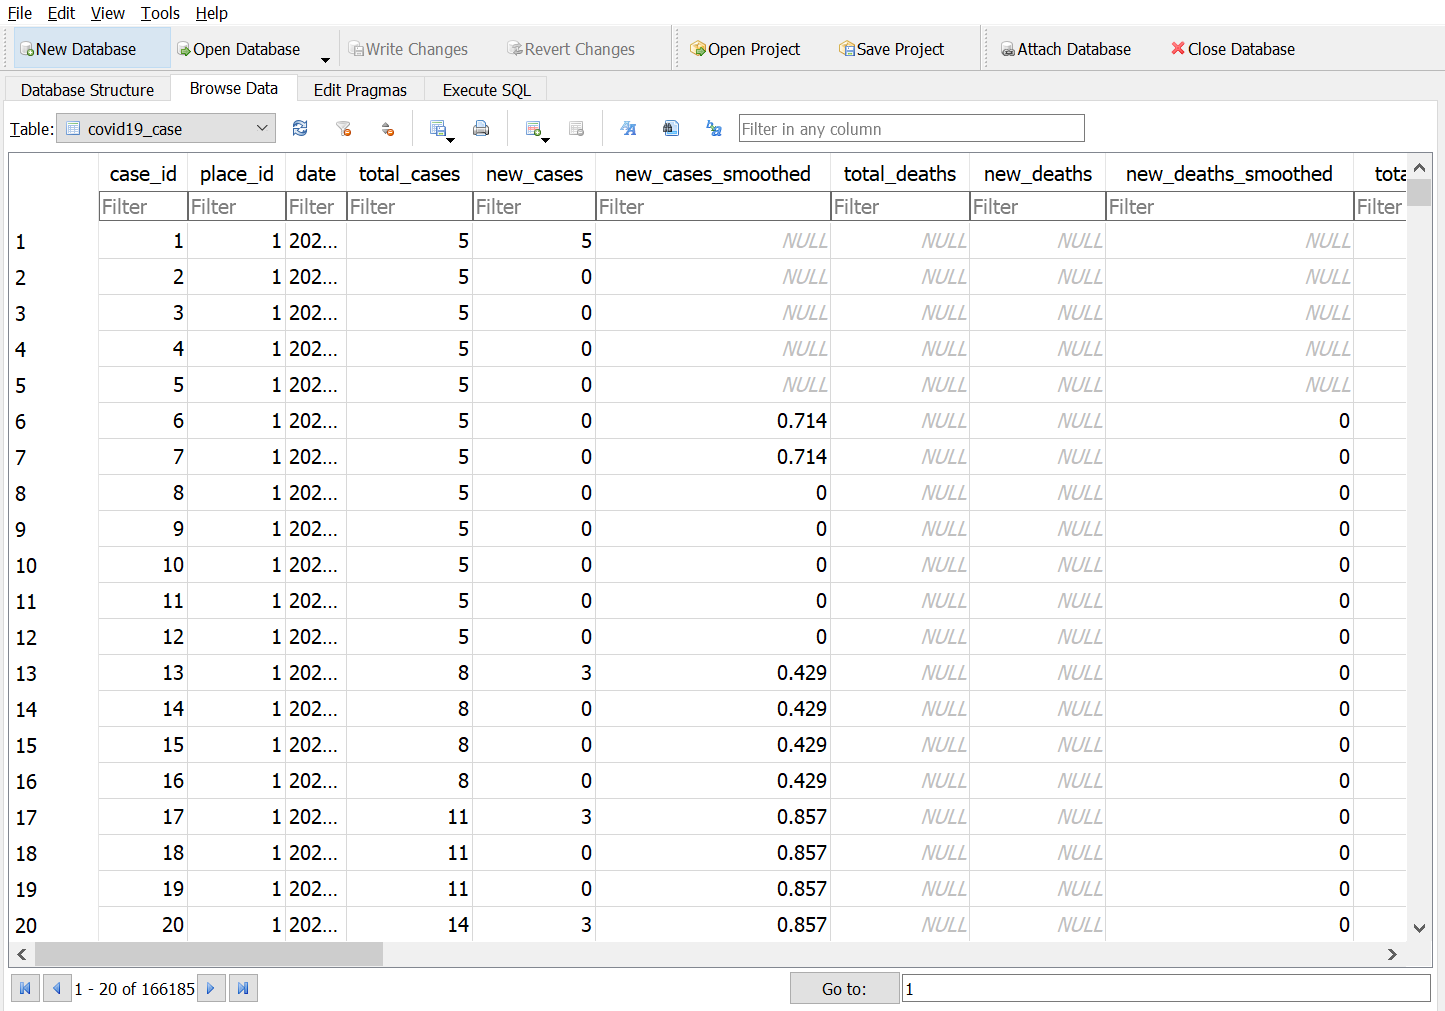

In [12]:
base64_table_covid19_case = "iVBORw0KGgoAAAANSUhEUgAABaUAAAPzCAYAAACnQ2DvAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P15tC1Fne+L7vfOOOOOe/9679133zjNHfeee0/Ve3XOrXPq1Kk6WGdVWVZZlmVZWpZt2QtaTsUGsSsFEUQRUECXCooNKki/BQFhgTSy6ZtFp7DoJhs23QYWfbM2Pb+Xkc2ckZmROSPnzJgzM+LzGeO791qZkTFz5u8XkRHfGTPXJgEAAAAAAAAAAAAAmBOY0gAAAAAAAAAAAAAwNzClAQAAAAAAAAAAAGBuYEoDAAAAAAAAAAAAwNzAlAYAAAAAAAAAAACAuYEpDQAAAAAAAAAAAABzw4EpvSKDTZtkaXmY/t5hVgayadOS9OFUw6ZHOZWjr+cNAAAAAAAAAADgDgtTOjHWNpm0tCzDbP9gJVd+fkZczflFqj2PnCnt/n2sDNQ5DaKaTQxleSl7/eK5dIn6652p3fi3H4tq6l6r6XnM87wBAAAAAAAAAAD6gbUpXW2sJfsXbUpP9XpzNqVrV2YPl2Uper3k5Yvn0mXmEe95vEZG3Ws1PY95njcAAAAAAAAAAEA/aMGULjJvI26G16t9fIeL91Fd53B5KTqXqlXUXWYe8Z5nTtW9VtPzmOd5AwAAAAAAAAAA9IPWVkqP95vLJ6Zr9niHNs3XBsZfbEJn55Apv1I6qSf5OV+unXOOH+ERP/ZER390h6LZNTTVWd5WfI22mHz98+dtLltfxvAaxViWrum01L2fZnEplx//njumtXMHAAAAAAAAAADoPnMxpRMDbrwi2WzMTsuk80tJTcycJ5tbKT35fbSCaXV27tEdiobXsFRncrxpW/tPBKm/TsXzzt5r3Xsrlym8Rul6qUvQ1gcdde+nvK8+t4vlk99VHo63ufqwAAAAAAAAAAAAoJvM9ocOYyPNbLxV/x5hMBWnp+b8RmZhhfG3CFPaUG9ibNqtsB2hX8Pi9VTva2kgg+g9j7bFZTTjtzXqrpN5X/79TlHGZOy3RvJa5nxKND5Xw7nnYlHcb36vbt8PAAAAAAAAAABAt3C/UtpoQCdl8tumZdL5RRjPIWIhprR62U25leLx77mTa3oNE9M9K68MXfVzbOymB8U/O3lMRM11srnu08QmPWbu76dxXIp1VdRddQ0AAAAAAAAAAAA8xL0pHZuL41WmuqrrbMKk84uYxvi0qXdaDK9rMjabXMOxsa0Mat3wTVYbl43vtqi5Trn3qaHHw6aM4TWSldTatWjtvdXFvWlcinVV1I0pDQAAAAAAAAAAAbGgldJtMun8IqrOwWAOV76PVknqjs8nPofi85CnuIZZParsaAVxsoJ6sJL9H29smZrrZHPdp4qNTvpoFpOxPRV1r9U0LsW6KuqO62nr/AEAAAAAAAAAALrNHP7Q4aTjZ8Wm/ooyCzOl1Utvilf3mlcwT3EumbG5HL0nrb7kUR7L0fGuTM+6czPvS1Y5z/BM6SITzeEmNHk/E87Lsnz+vQIAAAAAAAAAAPjNHEzpzHTLm6LD5cEcVraOic3fnPGXHFe3Gjc+xslziyNiQ1y9vslMneYaZiuGC/Vlr+PqfUy4/qXzTg3k2vdWKpN/DVVef4/J8W2ZunXvp2lciuWT33MfQhiuBwAAAAAAAAAAgM/MxZRWJOZdYpq2a5KmRl+F9PNIjOlMA1mZ+IgIve62V7JmdZvqne4alo13Rfo67SwjNmA+V53ieZvK1pcpvEZq5I7L503h2ah7P03jUiyf/r40+XoAAAAAAAAAAAD4ioUpDQDtUGd4AwAAAAAAAAAAhMFEU1pf0WnSojGdU1FdwXRuJnUd0zmb1EdM76NKzcGUBgAAAAAAAAAA6KdzCNBLMKUBAAAAAAAAAAAwpQEAAAAAAAAAAABgbmBKAwAAAAAAAAAAAMDc2PTEE08IQgghhBBCCCGEEEIIITQPsVIaAAAAAObGr371q/QnAID+Q58GAAAwHZsee+wxQQghhBBCaB7KDBzTPoQQ6pvo0xBCCKHpNLUpveW2JxGaq0x5iBBCCKF+CQMHIeST6NMQQgih6ZQzpZ977rlY+rYqKZPw5u1PIDQXYUojhBBCfqho4DQZfyKEUNdEn4YQQghNp5Ipfeedd8pZZ52VK2QSpjSapzClEUIIIT9kMnBsx58IIdQ10achhBBC06n0+A5188SURl0TpjTquq6//nrjdoQQQnmZvupuO/5ECKGuiT4NIYQQmk4zPVPaZB4i5EKY0qjrwpRGCCE7mQwchBDqq+jTEEIIoenEM6VRL4QpjbouTGmEELKT6avutuNPhBDqmujTEEIIoenEM6VRL4QpjbouTGmEELKTycDh+asIob6KPg0hhBCaTjxTGvVCmNKo68KURgghO5m+6m47/kQIoa6JPg0hhBCaTjxTGvVCmNKo68KURgghO5kMHIQQ6qvo0xBCCKHpxDOlUS+EKY26LkxphBCyk+mr7rbjT4QQ6pro0xBCCKHpxDOlUS+EKY26LkxphBCyk8nA4fmrCKG+ij4NIYQQmk48Uxr1QpjSqOvClEYIITuZvupuO/5ECKGuiT4NIYQQmk48Uxr1QpjSqOvClEYIITuZDByEEOqr6NMQQgih6cQzpVEvhCmNui5bU/rRRx+V7du3y3A4lBtvvFF+85vfyLXXXitra2ty6623xvtUGdOxCM0icg91RaavutuOP2310PY1ueOSveX2C/5ZHrz7OmMZhJqInEJVmkefhlDf9fiDDxq3I4TClpNnSt9072NyzU13yMWXXyXnnX+BnBnVd+aZZ8k5v94iWy65Qq65+c6ozOPGYxEyaZIp/cgjj8jtt98uq6urcsEFF4y+Mrdlyxa5/PLL5Y477sBsQU5lY0o/GA3GbrrppjgfVc7u2LFDXnjhhVhPPPGE3H///bFBqMzChx56yFgHQtOI3ENdksnAaev5q488eJfc85sfyS0rb5X1tR/JfVcdKDf+4vWy7YpvySMP3GE8BqE6kVNoklz1acxvUF/0RJTvT952m3Gf0hM33yJPnXKKPLF6lXE/Qihctf5M6evveEC2XHiJXHfddfEk98knn5QXX3wxnvg+/PDDsm3bNrnwwgvlzLPPk+u3rRvrQLpOkrdt2iR/uO+1hn3hqM6Uvu++++Tiiy+emHPnnnuuPPDAA8Y6kK02y85RPu50wDWGfWHLxpS+5ZZbZH19Pc7Nl156ySg1kVGTDGUQmurwU1fKUZ//vByystWwD7WhJrl30UUXMckdidx0IdNX3W3Hn1V69NGH5b5bTpHbzvuA3Hvtt+WFZ7bLSzvulie2/kKevuc0uXPLp2TtpLfIXdceLY8+sm6sAyFd5BSylYs+zb/5TV/nEMx9JkkZ0vK5PeWlf95DnhwOy/tvvlme2eWf5NkPf0SeOOBr8tjajaUydiIWXAPko1p/pvQFl1wefzKsJrhVPP/88/FXhs/ZcrGhjsSE3RTpbUeb983XoB2fT14vkz0vMZWv0zTnjymtVGdKX3bZZdY5p8wWUx0jbd65FOtudfrJjah4jps27SQHXGMqX6dpbmrcCKtkY0qrMs8888xEY1CVVStgisdnuvKoz8vnD1mRrbntW2XlkJrtR12pbSsqMd7GZRwYcVceJZ9Xr5HTIbKyVe3H+HOtJrmnJtFqRVaxjkRprpR0lFxpLD9vTZFL5ObcZTJwZtH6tovl9os+I9su3VuefuQ3Uc07RF56TJ5/eFVuPekf5OmbDpJn7zxRnrjxMBme9n658Re7yPabasyivo4Fdt5sKDul0mvQzvvu39ihzZy65oCdyrHatLNsNpSdj8ifttV2n6bU6vwm0uad6+JsusZtX/dp66vIV+Y+nVBmSMve+8pLkV785GfkiVtvHe9XhvT73i/Pf/wTInvtHf/82HHHy2NVix8M999xrLsQC/IRobbV+jOlzz3v1/HEd9INVK3Y2vzzkwx1aCbwHx8ovzLsW4QpXXzNX+37sopzrBOm9LSqM6V//Wv7nDvppJOMdShlg7WdN+vb0xvPTgfINVrZxcl8IxpNeBqdJzfCNtXElFZfx1SPTFA/Z/3uU089Fa+EUY9YUI9PqDOlt64coplmmTKz0Ly93lRLj3VkSscmelTfUVcW9ikzMDbRMf5cK8s9tRJaPTta5aDKO9UvqlxTE+ozzzxTzjjjjNiQPv/88+W8884z1GWKVfrBRyeM6Wa5RG4uRkUDp8n4s6g7rzpIbjnj7+XhW46RjQd/Kw/f/mu5/YrDZHjR1+TGs3aXrb/aVTZuWpaNa/eRZ4ZHyHN3nygPXbmfrB37Rrn5jM+W6uvvWCA9x7bMzoBN6TZzKsmnollxjRyw0zQGRlsif9pWm31aprbmN4my+FbFuDon2rvu09ZnPo65T0cUzVle+tRn5aU9vyhywNflxT32kud3/Vj8uI7YkH7vLvLcx3YTifY//b5d5LHX/F18jKku8/03kupP4jh3IRbkI0Jtq/VnSp99zrny9NNPx185Ul//Vc+tVDfM7MasnoulPs1Vk+ITTtxsqCM1Yd+9i/xh9H9+tXR3TOlYlxwYn+Omd5vMdZMwpadVnSmtvrZmm3ObN1esAkkHz6WbYKyk8291BcnUqrkRXXOA7NToPLkRtikbU1o9r1dNMNTPyoC+6667YimjUJnRv/3tb+PHdihTWq2QKR4/0tYVOaRopMUm2lFy1CGG7SWjepJaNOLSVagl0y8njD/XynJPTV63bt0a55vKWWVAX3PNNfHvKveU1HaVi8qkPvnkkwt1VcQqzcnFx7BBLpGbC5PJwJn2+au3nPEP8tIzd8qzD14tD//22/LgVfvJved/Qoanvk0uP/RP5bmHrhHZuEVk/Vfy0h2Hiax9TuSeY+T52/aTKw/9r/n6+j4WSMcB3btH92vs0FpO9S0e5M/UarNPy9TK/CZT3LftJAccUNXHma5x29d92vpqjmPu0w09+JC88PHd5cXPRH3hl/eXFz79z/LM+/9Jnn7PzvLcRz4usscX4p8f/ZvXyqPRONRYR+39N1MXYkE+ItS2Wn+m9Fm/Oju+aao/qqRuluov/Gd/PEndONUNVv1xhnvvvVeOP+FEQx1jE/YH744adW4lstmgHa1ajrWL/CDdXj7etO1a2fOPo22VxnK9KZy8dvYoj6Ts+FyUsvOp2ld3zPg49fq592m4LtV1RDp6l/z+wnWpuoZdUZ0pffbZ9jl34oknGupQK1ai913zyWby6We2smB8M8h9JdNwfG5/bmVCVsfm5LXTMpNvMPU3ouT18l9xGr++Uv49lPfVHTM+rv69T6ojUjrwGKlw7aqvW3dla0qrXFWrpJXxrAxC9b8y/9SqVDWpUSbh6aefHkv9rnTKKafIMPeMtrJRFq+ePurKeOVnaftoBev4uGR7trpVry/5OdmXabwCdnxcfrtZVY8UKSp7/SvTFbeJ8kZg/XnZ1ZEqNSNHZQ4przyvfZ+F4ye/v8XLlHvKjL7qqqtiQ1rlncqzn//853LOOefEOWkeC+i5om2vMKXN17E6L4qPpqmOw/g8xmUOlUNHZU3H6CI3F6migaNkO/4s6uaVt8qLz9wl8uQN8tw9p8jj1+4vG9ftE+nzcs+pr4u3yQMrInf+UF668fOycd5fyANnvFweX1uWKw/7E60uH8YC6f03nhCbzm/82vlzytc1+pp/YXv5uPL9uVjvpp33TM4pp27f16tyarfv3SBf+PEN8snDr5MvH32jfPgbV8uuy1fLZ39wnXz6+7+R9x90uRxz4BvHdTUwWczXpzon4xhp2yfFJS/yp2212adlmn1+M9Y4X/QYZ/tNOfgqeVVpm7ruprI2cdRzirlPrEK7zl+z8jXtvKI8ffaDH5bnP767yN5fEvnC3iJ77CXyuT3k6Xe/Vx599d9WG9IW999E41jo24v5VsqVVq+9+RwykY8INVfrz5Q+86xfycbGRvzVYPXJrVoFqP5XnxZfffXV8R9kULr77rvlmGOPM9QxNmGzlcjj1dLavrR83hQumM6xEas/+zkzb8vbys+vzlR+zZxSszc5/iT5QaGe+HwKxnS+Lrtj1GuMjysa6RPqKF1HtX9sPNdew46ozpRWA8G6nNvt6D+TD/7kD+X2O7fKcccdZ6hj3LmX96XKTSzGHf34mPRmqg3y8jel4gRiXMdoshK/xri8WRPOtXCemwsToWSikL8Z5uuyO6b+vU+oI/0UWZ+kbd55fLOrv27dlY0prZ77pyYY6mdlCqo8Vf+fdtpp8R+iU1/RVAah+l+XWrWqDEO9rqJ5p35XKz5jw6qwvfhYDmVWmUy18bbi74kSM2xskBXPoSTr1bPj8xqtWo3NNd2Mu1KuLKxojV9/ZMrZ1JFt01fHZo+eGJerfZ+GVepXHlVlfHZHptxTj+hQj+tQ+adMaJXDat8JJ5wgv/zlL+OVWeqPKeXrMudG+bpOuI6m2BTqrs+3cbzz51JxfkWRmwuVycCZVjed/mZ5ccddIk/dKvLkmsiD58nTa1+TjSt2lQdOf508f+shIrcdLP987J/EY4H7z3+N3H/OG+Sx6w6WK76zk1bXhPurUufHAml9mgGUP79ExXMyr5Atv8ak+3OpXlVHvL/qfLupqpz64CFXySlXPxnn7i8vuzv+X+fI89dl569dMa7LatXchDGTMR/y17P5uKkqHsl28qe52uzTMk2a3+hzavP8JpMe17SPKplMpmts3lY/T5gcx/b6u1TMfbqjBx+UHe96r8geXxRR/7/9XSKf+Wd59FV/U2NIRzL2ISaV4zexP2r92pOPCLWt1p8pfcbKmfGzUdXEVt001deE1c1SfcJ7xRVXxKsB1URY3Vh/dvQxhjryxm1imFaZugaTVzdgi2asMpD/eBd52x9r2+IyukldlMlI1pS+RuX+nDE+oa5MNseUDPeC9P21ZSdcw1zZxanOlFZmSl3OfeinO8m+v3yn/OPhvydHHfPTch02N8Jc511xM8oNrAxlJtZRUW9OE8pMei+TztEkm2NyZQzS99eWNdRvuHF2UU1M6WyCcc8998SP8VCPSFDGszKglUmYmdGqP1aPXFDP/C2a0ok5pZteqVEVG1N5M2xsvFUZdjblDNsMJlhODY2/ia9XVM7Ys6kjNfmKf/RxUj36+zSZiT1QVe6pn9UHIeqv+6scVP2oWi2tDGlTPXXXOX9dJ1xH0/742lblbqRJx1cdZxK5uVAVDZwm48+ibjz1jfJCbCDeJPLENSKPXi7y4Nny/PDb8vgFb5NnL3yNPHben8puR/3RaCyw/dS/kUeuPFAuX/7jcV0+jAXi155wfhXbk0noeFJaLmc4zuZ6xKrb1z1V5dS79r9Mfrzl0Th3d/vOVfH/iqefF3n8GZGDf3GP7PL1/KO3kuuaGAj15rSmSTkU768xNSaOmyriQf5MrTb7tEyT5jf6nPqYY44x1hErF9dxTubzw3SNLa/7pHwdadrXmFAmzaPK/dbnp8nmmFwZg/T9tWUN9U9sw93U4zfdLE+/6z0i/7yHyNveIfKWfxTZ/VPy2Kuj+3A0xjQdE2tSDEcqXitzbHL9UevXviIfMpGPCDVW68+UPv2MFXnyySfj51+pm6da/bdt27b4q+cXX3yxHHbs1+VT332PDL7xBnnPV/9avn3Ktwt1FE1S/ffCPqN5mpRJtiUrirPyyuBWP8dGd7rKOP65dlWwwbTVZTClEyM9HYDGmmxKNz7G8N4r60jLGt/nxGvYDdWZ0isr+Zz7xDEvl91+9ify4SP/WN5/xH+RvX7xVjlx9Vvymc1vkFd/81/J/Q9tz9dhcyPMdcYVNwO9jLHzTo6rrqOi3pwmlDG8l9yEKNbkG2HjYwzvt7KOtKzxE9eJ1627sjGl1cqWbIKhTMFs1UtmSmeTmBdeeCFW9rv6mubxxx+fry82o1IDKv65yqDWTeMqM624fYL5VTguv01Tekz59YoynZf5XBMzXq0ezdTA+DO+h0i6mTfpfab7a1eId1BVuad+Vl8HVo/xUCumlVGtvg5sqiNRci3MMdBkkS/5lc/p75kpO/H4QmwLZcrbC0rrn1jOWJ/5NchNe5kMHNvxZ1E3nvz3iYH45A1RhVeIPPxrkfVfxmOBTxz9J7LrUX8kH/jxH+TGAn8TjQUevOQrctkhDZ//m7tHWdwPJ97TTHVU1JuToUz6WuN7q8X56dtLk9TC8ZPeS1W9Wrn699QdVeXUew68XI48/1F57oUX5fkXXpIXX3xJXoj03PPq9xflq8dvlTfvc4GxTqX8uEg3cOvGXeVVavHvmcE9McdMMsSD/JlJbfZpmbL5jZpHqzHgQQcdJD/+8Y/lgAMOkFNPPTXWfvvtF2/bf//94284PfDAA6V6ktzS8i291vnrabrG1dd90hjfPo42sZ1QxvB+qtvTFO+p6hjDe510XXyb++h6/KabZMc73y3P/dOHRD71GZHdPy2y2+4iH9tNnn7rP8ojL3+FPHrddcZjTTE0qxAL47WLpPdHrV/76hyKZXgv5CNC9Wr9mdKn/fL0+JmVasJ78803x5Pd2267Lf750OMOlH037yKn33CYXLf9bPnmOR+Rf/zmf5J9fvYFrY6yCZuYrWq1dGFfvAJYb2hjZWXiR1HEBrQyqHWTNll9Pd6fvX5R1UZyrPQcEgM3KZtblZxbpWyqa5pjIuXM5El1GAzr7D1bXMMuqM6UVs/e1XPuoz97mZxyzXflpKsPjSegx68uy/K5n5EjL/u6fPiYV8vLDvwf5d71u7Q6JtxclOKbW9YZW9wM0vImJceZ6rA4j0llDOc5voll++tuatMcEyl3A5tUh+EmmU2uJl63tL4OysaUVsafMgaV8acmK0rKGFRmoHq+r3qur5Ja+aJWwOhSq1fz9WmmljKuRkZUsuJytH1kVheOGW0zbTeUi+vSDbexyvWlatX4S37PGaC6YWdTh43xZ/E+S+ZjcXVrB1WVe+p/lbsqv4499th4v3pOpXo+5fLyshx88MHy3e9+V6vLfE3NK3y1a6RpdKwhfqPYTDzeFO9xPeXtBZGbC1XRwFGyHX8WdcOJr5aXnr9PZMdWkUcvEHnwTJH7N08cC/xJNBa45MD/qNVVcX/TZbjH1t4PJ97TTHVYnMfoPmuqM1+mVE/hfjxSaSJaOH7Se8ldm6Js3lN3VJVTHzzkSvn+Weuy9zFb5UvHbpW9fjaUPX96i+wR6fM/uVk+/+Ob5T37nW+sM6f0WiXXI4tl9Zgp/3tSfnSdJ8Ule82cstesK18Rs+K5ZQo8f9rs0zKp+Y16hNa3vvWtWOr+rBbfqHHi1772NTnwwAPjeY/aphZ+qTLf+973CvWkX+vPmU+mbaZrXL2tMj8bx9EmthPK5F5zwvnVnEOzYyIx9xkpNqTf8S557gMDkU9+Rna8/Z3yyF/9tTz0538hT73+H0Q+9GHZ+Pt/kAf/eCd59Npry3Wk13Ly+y3EonCNRyr0R+1e+4p8yJTWST4iZK/Wnyl9yqmnxfvVV4tuuOGGePWfWiWt/jjDzl97jZx6/bKceuO34xv3wed+UL557ofkzz7x77Q6qo3bP9z3wPw+4yrfgmLTdRf5gSo7WimcrKB+29HZ/4VjcqowhVONDfPo94IRHGuSwTzNMUrxe0/LTKxDV/o86myfzTXsgOpMaWXoqf+znPvAT/4wnoR+4+xPyNfO+qh8dWUgX/rlLvLlMz4kh1/4FXn3T/9Mfm/ff6HVYRqc5ZV03Nkqg7qbQdrZF26GZVXfhOo7/PoyufMs3HxiTbqpTXOMkv7eJ9ahK7322b6J1627sjGlr7zyynhSoR6jkBmC6n/1aA61T62IVioa02qyU1oprX3dX60w1Q2v2JhKt+dXTZrMMdN2Q7kq06xW6TlOXLlpYdrlTL5ULoy/Ru8zfX/F8+qgqnJPfZin8k/1o2rFvjKgDz300NigvvTSS2OzWq3GGtdluM6pWZrbZnUdtbriOrQPUCYeb4p33faiyM1FymTgTKtbf/UJue28z8mOe88X2TEUeeQCkXuPsRoL/Icv/d+1uvwZCySqOz/DOZXu04XjJ72X2v0259sdVeXULgddId8+Y7vse9xdke6UL/7sdvnCkbfJHj8Zyud+fIt8+gc3yD/ufY6xzryS6xGbAFZjJu36xfvKq16bjZts4lFRhvwxqs0+LZO6L6vV0nvssYdcE40xv/CFL8jrX/96+eAHPyjf/va34+3qZ7Xtox/9aGxM77nnnvl60utqMphq41W1bVK+No6jTWzryzD3WaxiQ/rt75Ln3v9Bkd0/KTve9g555JWvip8hrfTAH79MnvjrvxF5/wfkqde8Vh74T38gj1xdjOXk+2+iQiyqrp3Ta08+ItS2Wn+m9Ekn/yI2B9XXjZQZrZvSr/vCH8rKDT+Kb9oZp/32MHnZR/+1VofZhNVX+o731RvGsTLzdt9dciuiVX2JyW0ybnXVvEZq6I72TWMwT3NMpGZmeEE5I9riGnZAdab0L36Rz7l3/fA/yAlXLssxlx8iR176dflx9H6/uvIR+d6FX5bBMa+R/3rA/1suv/WifD1xR10/iBp9glhxM7CarI5k2j/pGKWaMulNZLRvmpvaNMdEanYDLih387O5Bt2UjSmtngWojD61qkWt7lcGoZJalapWsqptxWPU6tZzzjlHfvKTn5T2xebzIUfJUYcUjCplZKXba42wyu0WJpqlspWb1uZk1bY2jL+q9zCxnho1MgoXp6rcUx92ZB+KqGeXK6lySmr7j370o/gbT+O6zNcn/gAkdx3srmOSwyuyUvhgZfLxVfvt40duLk5FA6fJ+LOoRx95UO6+7ni5/oQ3y7YtX5QXHrlM5ImrJo4FXnHgv5b77rsjX198r+r5WGCkqjLm7fnzNpWb9Jp1+ycd2y1V5dRb9r1YvreyLuvReHP74w9HelS2P/ao3Bv9/PDGk7LHj9bkVbvn//6DUfp4zXLMFMdnpwPkgJ2L13Gaa2tzTFUZ8/bQ86fNPi2Tmt/su+++8aM5lCmtHsP16le/Ol6soL5dp/7I4UknnSR//dd/HX+zSZnSqqxeRzkuqYpzBuM1NmybmK9N42gT25oyzH0WrsejcePG294uz+3yAdnx1rfLw3/5V7k/avjoA+uy/T/9Z3n8FX8pO177Oln/gz+Uh88uf3iXXM9JZmjxWlnEpqiZr33NMeQjQlOp9WdKX3H9bXJcNMlVN0v1lSNlqKi/HKz+f8Xu/6ccdPb75YCzd45v3Af8amfLldLj7XlTOjNn8+brr/bdRfs9WxlcWA0cm7bR9trnSStVnE92vP7oj6JJPTrn8fnFjwvRX3PiMdnvqQFtOmZCHeoa6e89Z2iPfq+7hotXnSl96623xsZKlnNv+t7/Ka/91v8qr/rm/0f+7KD/h7z3J0vy3Qu+JO//2avlD/f/X+Sq2y431pP8VdrizTDpmE1fcRtPTCMVb0KRkptDvvO/5oCda24oNjeBijLxjWbSOaXnrZ1T6a/pTjwm+1270RePmVCHui76NS4OHOqvW3dlY0orqWf6qrJq8qBWRCsTMMtfZRaqyUZmCqqfs20//OEPy/XFhpVhNWRqRpUNtypTq7y9vMo6M/Hyr7V15aj8axtUNixTqfOPX8N0XoVt6Xsal0n2NzP+snMpr8jV31fd+1T79PeRlNUfkdJdmXJP/XzkkUfGH4yoPPzGN74hX//61+OvBavteUNayXSdlbKVueNrYZUvhus/Llt3fNV5mHO3SuTmYmQycGzHn1V6+P5tsvXCb8jVP/xzuffiL8ubDo/GAt+OxgLL0Vjg4PxY4FXLvyfrD5WfvarU67FATtVlSudkOG/T8ZPuz+X9UR3pNSuNN3qgYk69cZ+L5Acrj8r9T67Lfue/UQ6/4hPy/Ss+Gf38FnngqXvkCz/aKku7njiuIx6bFY2RbFVaun3iuCtVWq60PVLzcRP507Zc9GlqfvPZz35WPv7xj8em9N577x0b0MqYfuMb3xhL/fzKV75SPve5z8X38913312rI801vY8q7tOuqekaN58n1MXRlFOmbUVVlGHu0x1dcqk88bo3yMN/8Zc5QzrTow88IPf87v+v0pDOFMcmum75+28kFeuKHCpdu0Is2r/25XOIRT4iNLVaf6a00m+23i8r52yRnx19dDyp3bx5sxx33HHyT/u8Vd588O/JIWf/U7xCWv2vfp/0TOlMiXla3pdtH6lgNMdGsG7qxkqN29rnSStlBm9ReRN3pMyszsqoFdq5snp9+krnqmPS6/HuXWLjOStXuj51daSmdW5/4dwnXcNFq86UVlJfQ1ePOzi6kHOHHXaY/MFX/gd535F/Jf/tgH8t196+ajx+pOyGoql000k79p12Uh12XbmsU9fqG9100jpyx5i2FZXdVIrK3zhGyr2fqEx0Q8mX1etLb0a1x6TnuPPO8c0uK1c657o60htlbn/h3KuvW3dla0rreuSRR+LcVYagWsGqJjF33HFHvE09akH9rLYpA9FoSmfmV8mAq/rqvskcq9qe1h2raDRm2yNZmn9jA11XM9MuX0d07Ir6vWEdkTIjMlH03uJ6i0ZfxfscGYWZite4H8pyT0n9rPrLI444wlg2L/M1jVVpomrXqypXK/Ko+via80j3JcdYmLLk5txl+qq77fhzktbvvE5uOu3Tcvk3/pM8ePU35a4zPxH9/Bfy3/f/n+KxwN9++7/Igw+XJ8059WQsMEuZ4jmVy5mPn3R/Lu0fTdCT+pLt2mS6B8py6q1fuVTOvubRKHO3ymWPHCA3PXWU3LTjqOjng6Nt2+SrR22VP/+IbgBmBnRBxTHNxLGaUtlE1NVs3ET+tC1Xfdpll10m73vf++IPjE844YT4MVvqudGf/OQn435e/ay2qVXV3/nOd+RDH/rQ+Ph0vF0y+FIl11rPM9M1NmyzyFdzHE05Yc6TvPRz0FVsI6kmnl/T95SeI3OfWj160UVGQzqTMqbrDOmRctcxUyEWE/qV3P7Wrz35iFDbav2Z0kWt3fWIrN60LdaN9zwqXz56b3nFp34nfmSH+l/9bjoOIV2TTGldDz30UGzmKamV0/9h3/9R/rcv/Au54c7fGMs3l/mGiMLWNKZ0JvX1S/XsXvVHbc4880w544wzYqnflZRZqJ7zazoWtaDY+OvmitJ56dFHHzX8MU20cHmamyYDp23dc8PZct3P3iXX/vStcvd1v5Q/3P9/jscCDz3ykLF8c3k+FphgaIWod+97trx9v4vkwwddL7t/80752CG3yccPulV2+/pN8rGDrpZXfXyz/Of3HWs8NjgFlj+u+jQ1j7n22mtjY3rXXXeV3XbbLZZ61rT6ttOnPvWpeHX0Rz7ykbiMKmuqByGEEOqqWn+mNEIu1MSUdi9MaVTWLKY0mqOuPMpqxSpCc1dAuWn6qrvt+LM78nsskKySKq+eQshGoeWPH30aQgghNH+1/kxphFwIUxp1XZjSPVG88lR/xAGGNOqIAspNk4Ez6/NX5y8/xwLZMz2VWCWNmirU/PGjT0MIIYTmLyfPlEaobXXLlEY+KZs81cl0XFGY0gghZCfTV91tx58IIdQ10achhBBC08n5M6URakOY0silTEZ0JlN5kzClEULITiYDByGE+ir6NIQQQmg68Uxp1AthSiPXmsWQVsKURgghO5m+6m47/kQIoa6JPg0hhBCaTjxTGvVCmNJoHprWkFbClEYIITuZDByev4oQ6qvo0xBCCKHpxDOlUS+EKY3mpWkMaSVMaYQQspPpq+6240+EEOqa6NMQQgih6cQzpVEvhCmNui5MaYQQspPJwEEIob6KPg0hhBCaTjxTGvVCmNKo68KURgghO5m+6m47/kQIoa6JPg0hhBCaTjxTGvVCmNKo68KURgghO5kMHJ6/ihDqq+jTEEIIoenEM6VRL4QpjRBCCPkh01fdbcefCCHUNdGnIYQQQtNppmdKIzRPmfIQIYQQQv2SycBBCKG+ij4NIYQQmk5Tm9IIIYQQQgg1FQYOQsgn0achhBBC0wlTGiGEEEIIzU0YOAghn0SfhhBCCE2nTeomihBCCCGEEEIIIYQQQgjNQ6yURgghhBBCCCGEEEIIITQ3YUojhBBCCCGEEEIIIYQQmpswpRFCCCGEEEIIIYQQQgjNTZjSqBe65ZZbUMAy5QRCCCGEEEIIIYQQ6qcwpVEvpIxJCBNMaYQQQgghhBBCCCG/ZDSl9RWKCHVFECamXEAI+SXTWAQhhBBCCCGEkL+qNKVN2xFalFROQpjQH4UrYh+GiDNCCCGEEEIIhSdMadQLYUqHC/1RuCL2YYg4I4QQQgghhFB4wpRGvRCmdLjQH4UrYh+GiDNCCCGEEEIIhSdMadQLYUqHC/1RuCL2YYg4I4QQQgghhFB4wpRGvRCmdLjQH4UrYh+GiDNCCCGEEEIIhSdMadQLtW9Kr8hg0ybZZNBgJS3Sa6re35IsD9Mi1iR1LTU/sBXoj8IVsQ9DxBkhhBBCCCGEwpOnpvRm2XnTJtnpgGsM+1Af5cqULhqtw+WlKY3brlH3/jbJpqVlsX+LgZvSm3eOrtlOcsA1hn3IqTArwxBxRgghhBBCCKHw5MiUTkzh8irNaYydaQzm7prS1xywk+G67Cyb4/3zPO9+GffzMqVluCxLpu29o8ZITt/jJusl4T6Y0lV9UqLadpAzpdN6dt6c7rdtRxWvP6oHmdSuWTlDDsxNtvlkp/r7jaY4x/PlyufQ7rnpwpRGCCGEEEIIofDk1JQuTl5HE+SdDpBrtO31mmYi7G7yPIs276wm+0Vj/ho5YKe84TWf8+7mNarSvE3pxK8dlxmtMN40iLYmjLcl0utaGUTbCquRy9uGsrwUbcvM4ZVBrr7i8fnXG5+HmXojOb8iPCmbe+1R/VX76o5plzZN6anyvUVTOl8urctkEqJYLkzpbvd57Z3j5PuNXm6T7LxZL5fmZu5e7e76YUojhBBCCCGEUHiaqykd65oDZCc12bVeITjNRNjd5Hlqpe+7/pzmed4dvEY1mpcpHRvHBkO2WC5v6sYb8iusY4NZfwxIVld5W+xJ58zwhJXB2OQtvp7J9M5jfn8jUgM8M99XtNdVmK5Dvq5Jx7RHt0zpomzrrShn1S+EK0zpKWWbV+kK6bwhnSk5l+YfwDQXpjRCCCGEEEIIhaf5m9KRkhXThZWHOeUfZ1HeV3fM+Dj1+rmvLxtWfVXXEan4lebCCu/8V6MnrHasnfwr1b/X/HvJby/WUbzu+fOMtPOeE1+rus6q8zG91oRr0kCuTOnxuWYqm8ZlY9e8PTGOU1O2aDIrE3hpIIMlbVtcJn29komtY3g9g4mdp+rcU4omepHc+UyoK6P2PUzP3E3pYruPle+vknqSn/PlqnK+6vXTOmLjb1zG1NYnvk7hvHfaSdVRPO/NcsBOWj1xn6ZWz2rH5c7R4rUn9JOzaN6mtHF1seGD1En9XH5/dqzp9fVt9de6Ud868X6jlMa9Jl7Ja2avNfn6TStMaYQQQgghhBAKTwsxpfMT5s2yuTBxToyBuomw3THqNcbHpRNwbdVXbR2pEaFP6jfvPDYCksn62LyIj60zYwzGRlnm91p+L/Vl9W3F84zLxOdpd3x5W/J7+XymuCYN5MqULhqtyWrf8QpioxlbZQjnTNnk0RzZscqwVj/HxnV6YPxztto5rdO4+tn4esm5tWlKJ6Z68v4TTTalq49pj7ma0iYzL95WNHfz7WFivZXl0vakmZbq9fPlJvV3kUrnnRnN+fPOlUmPyfUPpX5vtn5yVs3blDYZtcV+bFI/N1ufaz7H+d1vCircqydfv+mEKY0QQgghhBBC4WkxpnQ6Ya7cX2sCVcjmmFwZg/T9tWUN9RvMmaISY2FTIqNZYDrvqvdvU7bq2Kp9s9Rp2G5xTWw1L1M6254YxxVlqlYEF8zj2OCOf1EGdVo+LpOsph7vTygZvOOK8ts1VZrONUZyTFpn8hLpe9bfU+49muqadEx7tGlKF69foqydFz+4SlXbt1S1h6IqysV1T2H65c5pmvNusq0gvd7ca7QvF6Z0Of5K2nvQ70+l92e4Prl+ru762VxvmzKR2rjf6O+zuC+T9XubTZjSCCGEEEIIIRSeOmNK5ybQserMlCmPMUzkK+tIyxpXoxnqyV6zziTQlX/dbGWh6byr3r9FWeN5ZrJ9reI2U5lILVyTOnXKlDauXI4omrLx7wNZUeVHK6CTFdSDlez/eGOB9A8gZnVVvV4tVe8vITHA00eNmMzkSab0xGPao01TupS3uqraS625a1FvLEO5Uh9TX9ekvqrZeTfZNmU/2YJcmNJV11dX8n53kp12KpSf1M9VxUIrV3+9DWUmveZoW7WM95u03trrkXtt0/m3I0xphBBCCCGEEApPnXh8hyo7Nk+y/ZPNlGbHRDJMsKvrMBgx2Wqz9PxNajxhT+tKjqt+r+V6LcqmdZuNC9vXKm4zlYnU5jUxaG6mdGoAJ9urjF3z9pzRq4jrWpLl5UFpRfTS8nJUR42BmzOi6w1mMzXH5N5jBKZ0oipDMdcvWLaHkpJy9W2jqq7s2Iq+aqrztt024bWj3yv7yRa0KFPa9BiPWJP6uXT/9H2uocyk1xzVZaG0ruQ4i+uRez9Nrl8zYUojhBBCCCGEUHha4B86TFdrxZNezfAobauapDc8Rik2b9IyE+vQVXg+a5UJNJWSc02MHNN5V11Li7K152n7WsVtpjKRWr0mZc3HlM5WKGfGcrWxmxjQmgFbNHpjsvoKq5xj8zbarj0/WtWnlyka3KXXixguD2oM4Ipzz147/2KFc0+O1V8vftSI/rxri2PawidTur5cRZlJfdVU5225bdJrj45TKvSTuX3TaVGmdHyP2mmn+Lrmyk/q52bucw1lWu1bk/qT+02F8a4pd69ucP2aClMaIYQQQgghhMLT/E3pdII92jfR9DDUNc0xkZqZ4QXljIEWJ+e562Gqt+q1bMrWnafta9nWWfdas8uVKR0btLpyf2iw2pRWJEbx+FhTueQPJ2qrp2PS1zYYw+P6yuZu8fWMfxRxRMX7qzKNM7M6K6NWd+fK6vXpj/2oO6Yd5mZKV5Wp7Vts876t1zdtm+a8LbdNfO2CWjVQF2RK6++h9F4n1VG33+J6W5WZQYX7b7bKvc5EH698b/E8CsKURgghhBBCCKHwNF9TOp7g65PcSIVJ8mgirBkBm3eOftdXc008Jvs9W+FlOGZCHWqyrk/U8yvGst/zxsw1B+yc+z2n+L1r5xMrW1k43l56r1XXMlK+bFZXvmz5PKP60mPKr2VTZ/X5NL4mDdS+KQ19YX6mdJr/uXaa7xdM9ZjaUVk2r19RxraPNPR3dedttW3GfnJWzd+UTvu80T2qvJp4Uj9n3+ea+2xTPjXuWy3vN0pJ7hSN6TTOufOwuX7TCVMaIYQQQgghhMKTU1M6NqBzyk+qR8rM6qxMNNkuTepH+9MJde0x6eR5551TYyZRaTJdV8fI1NH2F849MQq0MgUjIa+xAVF/TPG91hkBell1fuaypfMsrHwbv5ZNnebXyNTsmtgLUzpc2jSlc7mpSc/nzKRLFLWLuJ/I2r8p//W684ZfsUxVu0lUU2ZiHzn9eU/cNmM/OYtcmNLjc81rpwNONZq2o/eofZg6qZ+z63PVtaqOQVJmfC5u7jepcjFOVM7DuutXlfd2wpRGCCGEEEIIofDkyJRGqF1hSocL/dGUio3G2czCRYvYz1+J+d3uhwuTRJwRQgghhBBCKDxhSqNeCFM6XOiPLLR558krnnsoYr8AlR7Z4l7EGSGEEEIIIYTCE6Y06oUwpcOF/shCVo9f6J+I/YJUeCyL61wizgghhBBCCCEUnjClUS+EKR0u9EfhitiHIeKMEEIIIYQQQuEpZ0qriSFCXRWEiSkXEEIIIYQQQgghhFC3pfvORZVMaQAAAAAAAAAAAACAacGUBgAAAAAAAAAAAIC5gSkNAAAAAAAAAAAAAHMDUxoAAAAAAAAAAAAA5gamNAAAAAAAAAAAAADMDUxpAAAAAAAAAAAAAJgbmNIAAAAAAAAAAAAAMDcwpQEAAAAAAAAAAABgbmBKAwAAAAAAAAAAAMDcwJQGAIBOcP3116c/wbzh2i8Orj0AAAAAAIQIpjQAAHQCzLnFwbVfHFx7AAAAAAAIEUxpAADoBJhzi4Nrvzi49gAAAAAAECLBm9InnXQSQmhOAqgDc25xcO0XB9ceAAAAAABCBFP6pJPkzjvvRAg5FqY0TAJzbnFw7RcH1x4mseeeeyKEEHIoAABYDJjSmNIIzUWY0jAJzLnFwbVfHFx7mASGCQCAO+hjAQAWB6Y0pjRCcxGmNEwCc25xcO0XB9ceJoFhAgDgDvpYAIDFgSmNKY3QXIQpDZPAnFscXPvFwbWHSWCYAAC4gz4WAGBxYEpjSiM0F2FKwyQw5xYH135xcO1hEhgmAADuoI8FAFgcmNKY0gjNRZjSMAnMucXBtV8cXHuYBIYJAIA76GMBABYHpjSmNEJzUdum9P0Pb8h+R14ub/7iafLyjx0vr//8KbLbt34t5119pzz/wotpqYSfrNwgT2w8m/4GXaUtc+63dz4tP7/8cfnJlofliF8/KD8490H57tkPyHfOvE+Wz9guB592jxz4i7tkv59vky+dsFW+eMxt8t2Vu9KjF8evrrlf9jrxJvmHgy+XN0R667eulLcur8rrv3aJHPKLrWkpN2CMLo6Qr32W8+869Koo11W+p0pz/63fvEJ2PeJaWT51qzz3fL5fnydnrG3I3xy2Xf7+B9tl+2PPp1vnB4YJAIA76GMBABYHprSlKX3Rb++XEy55pJHJsXzKbca6EApRbZrSW669S17x8RPko9++QL55yvVy/IV3yPEX3C7fOfUGGRx8rvzV7ifKr67cFpc9+cKh/PEHj5YndzwX/z5PXnrppbjvvPvuu+Wmm26Sq666Si666CI599xz5ZxzzpFf//rXcskll8i1114rt912mzz44IPxMaHSljl3/KWPylNPP99In//ZzenRi+P1B14iDz3xtDzy1DPy8JOJHnriGblp+xPyxdPukl0PGzoz5to0Rvv0ocADDzwgN998s/z2t7+V6667LtY111wTt9Urr7xSLr/8crn00kvl4osvjtvuBRdcEO9rExem9MZzL8ryBetywJZ1+d6lD8p3Lop+Pu8B+fLKdrn7ke58QPeZo34b53mc81reZ7mv2kOW/x89/LaFGtN/uXyXvOOI7elv8wXDBADAHfSxAACLo4Om9IoMNm2SpeVh+rsJmzJ22JrSx178sNHIqNPnjrrJWFcn9dN3yqZNfyT7XGDYh1ALasuUvn37Y/KXnzhBDj7pejnivNvkyF9vldNX75Xzr39Artr6iKzd9Zic/9v75E17nSYfPuQc+dvPniwv+/AxUZucvym9bdu22MBSppMypTPdeOONo5/X1tZiE0yZ0ysrK51aNfnMM8/IaaedJk899VS6xS1tvfcfn/9Q3Acfs/YjOfL6w+WI6w6Vw69Zlu+sHiTfuOIA+dqlX5b9LtpbvnTBnrLXr/85LvuJH96QHr043nTI5fL4xrNy9d0vRHpeLt/2rFx42zPyzPMvytXbX5D9Vu6S/Y5fS0u3S5t516cPBVRbVHneROeff356dDu4avMX3PGUfOvaR+XSe3fIJXfvkC+dc78M739auvS51zu/faU8seM5uWzbc3LFnc/LFXepvH9eLrnjWblg+IycdeNTUf6LnH7zDvniKXfKrt9djDF9y/3PyusOvVd2O/4B+fzJ6/Lhn90vv7phPv2iYlbDZJ999mk9b6EarjdAv8CUBgBYHK2Z0sok3jRBdiZyN03paU0OU13z1U/lner6v/Onhn2aKk3pC2SfP9okf7TPBYXtiS7Y549yMX7nT8tlEFJqy5Q+4Ogr5SPf2iKfOvwS+bOPHi//bXC0/NnHjpcPHnS2HHnOLXLzPY/LcPsTsvX+J+Vrx18jl9+8Lq/Y7QTZWIAprVZVKkN3+/btcuutt8arMZUBvbq6Gkv9rAwpte++++6TRx99VI4//vj06MXy9NNPywknnCCbN2+W733ve/L444+ne9zRljn3w/MejPtgW1TZj3zvN+lvi+ONqSl97d0vyLX3vCBX3vmcXLz1WbnjgafiFaMPPLohr/nSRWnpdmnTGO3ThwKqTSqjOVspna2SNq2QViaTKvurX/0qPbodXJjSynf+2pYH5LgbH5cvn3O/HHDhg7Lv6dvlkSfn/+iJKnZEfcz7P/45+eDHPytnXL5V3jv4hLzj/R+T1diYTj6QOfvGjdGHMlfc+5zTD2bq+Nnlj8s7fnhvbEYvn/2I/MO375b/us9Wueuh+dxXioaJMj1NOuyww0b7TzzxxPhnhfpdN0mLv7dN8fVDw/X1BYB2wZQGAFgcjlZKz2Iad9OUntbkMNU1X81oSsfbzaZ0Yki/U36abaspi1BbpvRffuJE+cvdN8vLP36CvHL3E+Wos9bkwcd2yOVr2+V9+58pHzrkXLl6+KDc9eCGbH9kR6w/j8ruUMvt5owysu644w558skn4z5Umc6PPPKIPPzww3L//ffH10U9tkM93kOVUYZYF0xpZUgfe+yx8bmceuqp8v3vfz+eZKvzdklb5tzhZz8Q98HHXvSAlVTZf/rONenRi+H555+XNxx8qTz21LNy/fYX5Pr7XkxXSz8n59y4IWfcEOXQU8/Ia796sTz7bPuPX2jTGO3ThwLKiFZGs3psjo1U2TPPPDM9uh1cmNInXvuo/PLWJ+XAM++Tq29/Sg65cF32OvUeuXLrhuz1y/vlwydsl48cH+nYe+VDP7tbPnPMPemR82HHjqflrPMvka9880fyN697kxx35qr8zevfInt8dVn2OfgHcml0nuoDmXNv2TH6UObJKE9cfjBThzKj//Ped6S/ibxh+S5Z+srtcuHNG+kWt5hM6TrTs2gKF8u7Nk2Lrx8arq8vALQLpjQAwOLAlLY0pac1OUx1dVJFU/qCfeSPomucrYAuGc3p/uLK6J++U5XXjGrUe7385S+Xn/zkJ8Z9Surr729+85vl61//unF/prZM6Z0GR8d/2PCoc7bK3/3zyXL3+pPpnoRfXrI1Xj192U0PyKU3Pyh3P7Qhf/7x4+XpZ+dvSisT+rzzzotXQivTWf2unhutVk4rs1r1qbfffrs88cQTsSGtjGD1jNtFc+SRR8oxxxwjv/jFL+LV0kcddZTsv//+8uUvfzkt4Ya2zLlDz7xv1F8rTrj4/vj/jJ9flv/9wceflvd9czX9bf6o2B9wwAHyuq9dIo8+9azcdN9Lsnbfi/Lb7S/IVXc+H68YPe/WHdG+5+Q1X7lYdtlll/i55G3SpjHapw8F1LVXRrN6/zZSZU8//fT06HZQ9bbJHQ89Kwdd8pAcee2jcu0dT8nNd++QH136sOx58j1y0c1PypdOfUDe8rN75KOn3i+7/vx++cSR98ihp8+333nsiSflvYOPyyc+/1X50798rey5/2HyF699m3zmK9+Wv/ibN8g5194TfyCjcj/7UOaXv308/mDmdftfmtYyHx7f8aL8wd63yyeOvi/+/bHo9zf9bFneevSB8uJL83mUSFNTusi8TenQ4foC9AtMaQCAxbEAUzrZl5mdiQbR1ozxscPlpXGZpWUZ12auP1c+V6diKMtL5e22pvS0JoepLpOKj8HQVzYX940N4uTRGpv+aB+5IC2bKTaH4+3JSumSqZyuas7L9PiOuuOrVlab6qmX+f2nq7xzKhjexfdRuBb5ejHLp5Fa7VtlTGeG9Gc+85nSvqJaM6U/dIwcd94tcv8jT8fPIn3xpfEDUl948SUZHHSOfOvk38h9j+yIH+OhVkq//GPHyTPPvZCWmi+q71Rf91fPj1bGtHpMh1odrR4XoJ4nrR6L0SVDWvGNb3xD9ttvv3iQ/slPflJ23XVXef/73x/LJW2Zc988/d44N0689AH5udJl63LSZQ/Ibt+7Qb7w4xvkk4dfJ18++kb58Deull2Xr5bP/uA6+fT3fyPvP+hyue62R9Ja5sPWrVvlBz/4QfzIiL8/6DJ5+Kln5eb7X5KbIl1/74vym3teiJ+3e9HWZ6N9z8lrv3pZ/DgJ1eauvvrqtJbZadMY7dOHAuq6Z6a0Wgmt2qS+Mrr4u/oAST1nvU3aNqX3O2O7nH7TE3L0VY/KDy59SH5yyUOy5ZYn5Isn3yP3rD8jux+/Xd7447vkXT+6S3Y59h45cPN2ee75+T5o+rDDfyCvf8u7ZPmnp8gb37OrfPAz+8vfv/0DcuDhJ8pr3/hO2W2Pr8YfyFx2R2JMqw9lzrk5+WDmdQdcntYyH8787ZPyygO2yYGnPxT//qkzD5Pl1QPloEu/It++5ODYmH7Xjz4ix131uHz65HXZffO67HXaQ3LKtfkPTGdhmpXSVSa0+rmoDFXGtF2hflf79TJVZGUzst/V40WyY/X9VWRldemo3+vqVdtNK7bVtuxRJ1WoerI6lfR6ivuK76W4rUkZ/b1k51j1/hSm44plAKAeTGkAgMWxEFN6Je8Wy8pAGYaZWTw2rcfHp4byIDuwXH9iSC9JtimuM2dkz2ZKV5kcJ1/xgJwSSU2y1f+nXH6/nHHV/XL7fU/IO75+ubGuohLjVDdyfyrvTM3V0r50hfLIJDaawLqRbDCVUyM3t8q50kxuaEpXrKCuU/X7/6n8tG4ltuG1fvrOsfFcrHds1I/LIzuZjOkmhrRSW6Z03bOhv/TjS+WPP3i0vO7zv5A3feG0RHudFm97dkGmtEKtkFarK2+44YbYhP7Nb34TG9FdNKQXSVvm3MGn3i2PR/31yVesx7+fkv7/wUOuklOuToyiX152d/y/zpHnr8vOX7si/W0+qOd1qw8o1ONcvvjFL1pJlVXPOv74xz+e1jI7bRqj2f1SDj000Xe/m+iHPxQ54ojkZ/X/978vctRR6i+CxvfLRXDllVfKjh074sd4KKlYKKnroZT9nH2IpMZCJ598cnp0O7R17Z9/8SX5+eUPyfHXPCp7nXqv/OLiB+X0Sx+UH/7yHvnRBeuyz8/vliN//aC8++h75b0/vFt+/dsn5O1H3C37Hj3fR3codvnw7vL2XXaV17zhbfLqv329fO5LB8vL/vQv5M9e+Wr5oz95ufzu7/1+/IFMbEynH8ooc1p9MPN3+883V/Y48QFZ2vd2+e9f2ir/Zteb5S1HfE8OvORLsnLbKbLXWZ+V135nWV773Xtkl5/dL3920F3y7h9vl0+c8IC87fv3yM+vfiKtZTbaNKUVpuPV72p7di8qGrdqn+k4E6bXU1L3QIX6X/0+6b6Xlc9Q56SOy5hUb/Z7Ef0YE8VrociuRXGf+l/9Xny/db8rTGWUiu9Fqfha+rlXHaefOwDUgykNALA4FmBKG1gZyNhQrji2tozhmOGyLEXbRj52BbamdJXJkVFc+TW893F56/6XGuvKq8L0rdmXmK2Z+VplOlftT1dXF58x3dSUrjKfG5vSde/fIP08K89ZyVDvFIY5Gks3ppsa0kptmdL/fddj48dzKO00OCZeOf2ySB/75nly/8Mb8tDjO0p64JH5PPezDvUs6VNOOUWuvfba+BEeypC+8MIL5eijj2bymNKWOXfAyXfKY089J6etrssvrxrrXftfJj/e8mhcZrfvXBX/r3j6eZHHnxE5+Bf3yC5fvyzdOh/UivQXXnghlvrjl2olbp3UH9/LyqtV7G3R1rVXZPfL2IRWRokyoNX/mZQprf8+HMb3y0Wg/qChMqXV+19fXx/9n0mZ0frvqh3//Oc/T49uh7au/Y1375CvnnO//PCSh+T6259Kt0aX9+4N2XvzXbLnsXfJm35wp7wt0hW3PCWnX/GovOP7d8onD9+WlpwfH9p9D/nFry6WQ35wnHx6zy/J6RfdKO/+wMfk6F+cIwcdfqy8+vVvjr8pcN09z8tVdycrpi+NtP7Ec/Ka/RbzAYbOsdceKXuufFKWL1mRt/5wu3zw6PvlsC2Pxfu+c94jsstPtsvbD79XfnRB0t/MismUNilbzat+ntUkLRqgpmOqmOb1bCgarjb1Fn/P6qjDVG+GaZ/6Xa+zWMZ0zDRlFNMeBwDVYEoDACyOhZnS+UdtKE0wpXMmc6GM0YBOyrRlSleZHEpnXrMem9LxaunL75eTI91812Pylv0vNtaVU51RWrWvYMYWVwDHv49M54I5a1nnWFWmcWpuFx6JkaxkbmD8WhjFiQmf1JsoPc/0WOPqZ2O9yXuxPjdUUmZMv+Y1r2lkSCu1ZUorE/rehzci7ZB7HtqQI866Sd6w56nyxEb5j789seN5ueP+p+JjNhbwhw6LqD8UqJ7P/Nxzz8lTTz0Vm9JXHr6PnPWmfyPn/tW/lAve+e/k9uMOTEsvji1btsjZZ58tv/zlL2Xz5s3xOR9++OFywufeJZe9/z86O9e2zLkvn3iHPPrks3HfrDjnugfj/99z4OVy5PmPynMvvCjPv/CSvPjiS/EjX557Xv3+onz1+K3y5qivmyd77713/IcLldS1Vs8aV+a0SWrfz372s1F59WzptmjTlM7ul/LTnyYroXUdd1xsSp912Ofls4e+SwbfeIPscuDfyN/v84X06PmiTH5lSqtV0EWpR+4oU/qcc86Jn7Gu/uCnuv5KbdLWtT/4nPvluxesy4Fn3SfLZ9wbb7vu1ifkc0dvk2MvfEje9e3bZZej75FDTtoe7zv76sfkHw+7Q3b91u3x7/PkfR/+pGxeuUAGu+8hb3v3++VHJ5wt7xnsJsecep585DN7y//1n/9o9Piaq+96QVbvfF6uiPTE08/LX39pvh8cVfH6Q/9aPnXaufLen94vf/Ll86JzS54v/eXTHpJdfrxd/v7bd8rxVzweb5sV1yulTStwFfq24jF1THo9hW19qowqq6uJKV1c8a1+z8x7E1XXQlG1LzO6q86r+LtimjKKaY8DgGowpQEAFscCTOlkn/6oDauV0nWmdHy8blqOZT6HMbamdJXJkXH2teuxAZahTOn3HWLx+I7YDK4wSquM4qLhmitXNF5dmdJKmTE91jvfWVVPheref/raufoK51kyrDMzPq3XJPN7QVW65JJLcr8rY1pNePRtylRR0rcV1ZYp/bIPHxM/J/rimx6UK25Zj1dMbz4/3zfteOZ5efWnT5KTL75T9vrx5fHjO5Tp2AWUEa3+8KF6bMDZB35KfvPZP5OnzzhEXrrxLHnq+E/JVR//A7nrF4empReDMqSV1KRWPQ9bmdMnf2EXufYzS6Nz3XBwrm2Zc3sfvzXur8+O+mnVV2f64CFXyvfPWpe9j9kqXzp2q+z1s6Hs+dNbZI9In//JzfL5H98s79lvvhN5NRFS5qeSepTHzTffHF93k1QZ9bzvrPwrXvGKtJbZadOUnnS/XD75CNl38y5y+g2HyXXbz5ZvnvMR+cdv/if51sn7piXmh3o+t/qAaDgcxs+MVs/41p8hrfarR++o660em6JMavX4DpNhNS1tXvsqNl/yiLzrJ3fLB466R979ozvl9d+4Xf7xO7fLPx1xp+x6yO3y8BPz/dDuLe/6QLxK+r0f2l2WXvHX8q0fnSR//9Z3yz5f/6687b0D+Vf/+t/GhvQ1d70gV0W6Ytvzcvmdz8vTz70of7nnRWkti+PdP3qLvOKr/11etucfyn/dcx/5L1/4rnzoZ/fL7+99h/zDt++W/X/5oPze526L/yhiG7g2pTNT1aSsnP7zJIplTcfa1KfKKGVm7yTzV1HclhnJ6n/95yqy1zC18eLrZ2T1Zseon5u+f5syimmPA4BqMKUBABbH/E3pnAGdYm1KV5SxfFSHCVtTusrkUDrvNw/KGVev56RM6Xd/3eLxHXUrha0NZM04jvfpq5ddmtJlxSZxk+c2171/0zlVnmdmkKf76upFC1FbpvR///CxsSl990Mbcs/DG3LBb7fLW/b+pexy4Flyw+3JH6JSJvVrP/sLecNeK/KnHz0u1qJRBpfirLPOkttvvz1+JvBZb/63suOMQ0S+/Xp56XP/L3nxgN+VB7/+F3Lhu38nLrsonn766fg518cff7yceuqp8QrRU173P4/OVT73/xTZ//9o/VzbMuf2PPoWeSTqr3/928QMPf/65P9dDrpCvn3Gdtn3uLsi3Slf/Nnt8oUjb5M9fjKUz/34Fvn0D26Qf9z7nLjsvPjsZz8br8RVOuSQQ2JTQ30QYJK6Pl/5yldG5f/jf/yPaS2z06YxOul++b6v/a2cev2ynHrjt+PyB5/7QfnmuR+Sl+/+7+Lf54n6kE2Z0sqMNkmtilaGtHrMh4qBKq+k2kdbuDalr7ltQ95z2Db5h2/dLnsecbccftp98sPT75ePfeN2+cD3t8ku+w/l1rt2pKXnw9ve+V55x3s/IP/1Fa+TN7zl7fLK/Vfk3/2Xl8vv/Le/lH/7f71M/pff/1N50y+fjvXG056WN6TaePYF+bPPzPfbDFWoldEfPeZ+edvh98qbD7tX3nrYPfKJo++TDxyxXT5+9P3yd4fcmZacnUWtlNaZ9Jo6k15PMak+kwFc3GZbr1oprbYp6aumTdRdi6p9k87LdE7TlFFMexwAVIMpDQCwOHpjSieP+8j/McRxmZrXm4CtKV1lcmScdFn+GdPxSumD5/FMaW3bH+0j+7yzWL5YR8XrtWJKJ8awXdlMNfU3MqUj5YzoJueN5qG2TOmlXY+Tm+95XA477QbZ9sBTsvX+J+Wq2x6Wb570W3nzF38pf/LhY+PnTi995Fh5+cdPkNd9/hT54hGXpEcvFvWYgCuuuELuueee2FQ895X/Ul66Ov9H0x7d51/Fj8dYNBsbG7FJeuihh8oXvvCF+Jxcn2tb5txnj7xJHn7iGVl/7GnZ/vAOuWv9Kbn9viflLfteLN9bWZf1J5+U7Y8/HOlR2f7Yo3Jv9PPDG0/KHj9ak1ftfkpay3zYfffd5YwzzoilzJJ999031h577CG77bZb/IiON73pTfJXf/VX8spXvjLelpX/3d/93bSW2WnTGJ10v3zdF/5QVm74Ufpbwmm/PUxe9tF/nf42P5Rxo0xp9WgU9cFR9n8m9YGMaq/6NmVOq+1t4dqU/sQP75Sdf3yXHHDc3bLjmfHK3dMufkjesO+t8v79hnLH9qfTrfPllXtdJHc//LTsduGL8tObRX58k8gPbxQ5PPr/u9H/h0U6dE3kOzeIfPDXz8tTTz8vL/vYeenRi+WdP7xX3vH97fLW790jP7zgkXjb9379iLzu4Dvlbw+6Uw47++F4Wxu4NqUVTeuso43Xa9OUVr+r/lXJZDYXqTu3qvrV9oxiGdMx05RRTHscAFSDKQ0AsDjmb0qnq5qLhnLRlB4b0BEVx+j1J6Z13uweLg+034eyvFSoN8LWlK4yOYb3PB4b0Ca996D8Yw+qlJjMutH6U3lnutq4tC81Xktma7q9bNiWzdnkuc/l1dRms9fW3E1XKhf/gKKFKt9/6b3mz1Mdp6+ETuoZv69yvWrbOw3vEc1DbZnSf/LhY2TnA38lb9/3dHnbl06X06+8W6649SE59zf3ySlX3C0//fXtcuDm38qXj7lGvnHy9fIXu50gt29P/gBVFzjzzDNj4+vee++Vc97yb+SpIz4QzSD/lTzzz5vkkUh3fvhfyJZ3/G9p6cWi/rDeXnvtFT8L+4J3/O/Oz7Utc+47p98hnzliTT783d/IB759jbz3G6vyrq9fIW/c5yL5wcqjcv+T67Lf+W+Uw6/4hHz/ik9GP79FHnjqHvnCj7bK0q7Vzxp1wUc/+lE57rjjYpNZmdEn/vwXct6WS4w6/sST5Pd///fjsj/84Q/l3//7f5/WMjttGqOT7pcv/8T/IQed/X454Oyd4/IH/Grnha2UPu+882JTWuW6GueoP2T40EMPxX/UUD2uQ62Uvuqqq+Jyqu2qR3mox3eoP1DaFq5M6eu2bshhp90vbzrkdnnDQVvltEselueeT76xse2+p+WAo+6U1+99s7xpr5vkmF/l/1jzvPiLz10odzy4IR8+/0X50HkvxMbzP/36hVjvj37/wHnPyy7nPi87q9/PfUGeef5FedlHz02PXhyX375DXnXIXXLgGQ/J7++ZPKbjzoeekz/7yu3yyaO3yx9H2y68sb0/sNu2KV18zrJC7VfldBNYbaszgKuY9PqKSfWp1zXVo9TUlM7qUrJBHa+/jiK7XsV9Veep/1683urnSccobLbZHgcA1WBKAwAsjvmb0orcM6CXZHnZsFJ6MIiN6Kxcvi5z/aU/nri0LOMSs5nSB590s3z6RzeUTI63HXCZvGm/i4z6zOGXGesyKTFQtXPXzN3iPrNBnJrCpUdnmE3l7A8SJnqn/LS4AnlkcueVqyc+ZrxvlkdlVL7/3GtE57ePdp6lc8wb0MZ6mzxaBLWqtkxp9Xzog45bjX8+96o75VWf/Lm8Z/+zZL9jr5Hvrdws3//VUL7+8+vlE4ddJK/4+Aly5uV3xGW7gjK21IrpZ555Rg5731/IZf/0/5Xtn/s/ZH2Pfylb/+n/Jr9+w/8gW4/dPy3dHe7cfLBcOfg9p+fqesXoW79yqZx9zaPRT1vlskcOkJueOkpu2nFU9PPB0bZt8tWjtsqff2RzXHZeHHnkkfFk6O1vf7vscthlsuPpZ+Whx5+VByM98Ngzsv3hp+VOZere/4TseOY52eXQy+R3fud35O/+7u/ku9/9blrL7LR57as+FMjul6/63EflzQf/nhxy9j/FK6TV/+r3RTxTWv0ByXPPPTc2+pXhfNppp8Wm889//vPYSFKP6VD/Z6vT1fYjjjhCrrnmmrSG2XGV9//wzTvk9d/YKq8/+DZ53YG3yc4HDuXpZ5OV0u/80i3yd1+8WV67V6Qv3Cx/t+dN8fZ58/q9LpEHn3hG7njoabn9wR1y+/oOuS3Vg08+F2v9iefkyadfkKeeeUFefOkleX0Hnil94pWPy+u+ead85dQH5e+/dbf8+0/fKr/3mVvlNQduk92Puk/e/Z275Y8+O5QL155Kj5iNtk1phdqWKUOV0bfrRqr63dboLJY1HWtTX7YyOlN2fk1NaYVqx0q2ZK+VST+2uM/mHPTyNka2wmab7XEAUA2mNADA4nBkSvcHW1MaITSb2jKl9z7iEnkpWewXo/6A4XlX3ykfWz5P/vafT44f3fGGPU+RvX50sdz1wBNpqe6gnlOrVrmq63HXXXfJ3accJhe++9/Hj8FQq5G7aEhnuD5X16b0Ll+/Ut6+30Xy4YOul92/GeXMIbfJxw+6VXb7+k3ysYOulld9fLP85/e196zgprz/u5fLBw+/Uj74vbH+KdYVsdS+9x92eVq6XVxf+yKHnrKf/OWnfzd+ZIf6X/3eVdbW1mJzWj2yQ62QbtOQVsz72neJE7fcJYNDrpK/+OQW2emj5471kUT/7SPnJNr1HPnT3c6TDxx0pZx84d3p0YtDrYze8+cPyP+++y3yv+52i/zt17bJob96WA4962H5D5+4Rf7Dx26Rzx55rzz21AvpEbOBYTIbmQmcmdkAADr0sQAAi6M1Uzq3GrVGXQNT2pEqVlrnVV7ZjPxVW6Y0+EvI5tyi4dovDq49TALDZDbUquHi40oAADLoYwEAFgcrpTGlEZqLMKVhEphzi4Nrvzi49jAJDJPZ4HEWAFAHfSwAwOLAlMaURmguwpSGSXTFnDN/syMv3+DaLw5MaZgEhgkAgDvoYwEAFgemNKY0QnMRpjRMokvmnMkMzeQjXPvFgSkNk8AwAQBwB30sAMDiwJTGlEZoLsKUhkl0zZwLxRRVcO0XB6Y0TALDBADAHfSxAACLA1MaUxqhuQhTGibRRXMuBFNUwbVfHJjSMAllmCCEEHInAABYDJjSJ52EEJqTAOroqjnnuymq4NovDkxpAAAAAAAIkeBNaQAA6AaYc4uDa784uPYAAAAAABAimNIAANAJMOcWB9d+cXDtAQAAAAAgRDClAQCgE2DOLQ6u/eLg2gMAAAAAQIhgSgMAAAAAAAAAAADA3MCUBgAAAAAAAAAAAIC5gSkNAAAAAAAAAAAAAHMDUxoAAAAAAAAAAAAA5gamNAAAAAAAAAAAAADMDUxpAAAAAAAAAAAAAJgbM5vSXz5gGSGEEEIIIYQQQgghhBAyqkgrpjS45957701/AldwjbtBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhubO7hGneDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jHc2NzDNe4GIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WO4sbmHa9wNQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdwY3MP17gbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/hxuYernE3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R7Djc09XONuEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j2GG5t7uMbdIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMNzb3cI27QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYbmzu4Rp3gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4x3NjcwzXuBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17vzbaeeedjdvrhCndY7ixuYdr3A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b934nSRnSmUz7q4Qp3WO4sTVguCxLmzbJpsFKusGOeVzj4fKSbIrOreGp9Y8pY6BoLQ4znMO88aV9B5PfLUG/Hg7EGnxmZRDdazctyfIw3eAah/d3n9qqs3tyR8ZXc8+7AvTrFZAfMeRHQ8gbr/FpnKDwtX3r3m+ddEO6qTGNKd1jQr+xZQPrJZuebMpOaB7XuM+m3TxioGgtDh0Z3NjgS/vGlG5G6P16SBBr8BlM6W6CKe0W+vUKyI8Y8qMh5I3XYEr3A937rZLJkM5kKl8UpnSPCf3Ghim9eEIzpecZq2nfc1vn2LV6QiH0fj0kiDX0nbr+HVM6IZh7suPJvk6n8q4A/XoF5EcM+dEQ8qb3dOq6Os4nl+27rXv3NPXo3q9JJhPatK1OmNI9hhtbA6bshOZxjdvqZDrPDDeC1uIw481onrGa9j0v8qZlIpj8bgn69XAg1tB36vp3TOmEYO7Jjif7Op3KuwL06xWQHzHkR0PIm97TqevqOJ9ctu+27t3T1KN7v0XVmc91+4rClO4x3NgaMGUnNI9r3FYn03lmuBG0FocZb0bzjNW073mRNy0TweR3S9CvhwOxhr5T179jSicEc092PNnX6VTeFaBfr4D8iCE/GkLe9J5OXVfH+eSyfbd1756mHt37LWqS6TxpfyZM6R4zdeIPV2R5sJQ0ylRLg2VZSTuE4UrUYJeShB0rKq+VGTOUleVBrq5N0bGD5ZVoj46p3ECWyxVaU9mo0veXP5/0tRu25Gmv8biTLb7v6FwK79n0PprFIGJCTBP6GQPFVHGwPAfba53E1KSBaLW1do2nec9W51i8LpGavtcm+dnKTXRCfi+2z7Ktz45ZBjRN+p2Eye+xMn4rg3h76dE96fapB3zEeibIgaTMmG7ngE19WX+sLudQL6vOLy2UXJN0e1WsLfr+ES3cJ1zk4oji+cXXLD122ryrYbaxoEl+3JNHr1V7/e3iavse2s27ye2vKbP26y7azaL68PH5kB8ZLu77CvJGlfc1bybXl52/ukyME1Ia5VM7uG3fJiXXMaaFeJjai0L3fouyMZwxpT1nqsTPPiEyKW2g2U3ILNVxxMViqpNbLzeU5VEnWNbU9y7TzbLu/Sk1fLH2JyKJ9Bu56X00iUHtex5V2t8YKBrHocE52F7ryTeEdq/xNLk38Rxrr4v9e22Sn8YcaYJFfjc5n7b7LLv67JllQJOdy3jQqat4PpbvsWKSMXrfS8tRTWNmijexnhlyoF85YFNfdRmlaDJmvB6F87Hs+2Nauk9k+1vNRUXt+UWaKvHqaX8s6Ok9WSkfLOu42r6HNvOuuq5iftoza7/e5Pytr29X+nAl8iP9qV3Im7F8yxub+qrLKDFOKGmqJJ2M6/ZdVnId24qHqb0odO+3qElmcyZMaY9pnvhaY45uJONPToYyjG48S8t1DXQ47jiyzB41gPGncIph/EnNeNvouKgD0Ioln8akx0/TNZRvflXvLyJ7rYad0MwTkYpPnfX3bH8TN8Sg8j3nY9rnGCiaxaGNczBda9P7HdP2NZ4296rPUbsuuXMcv1d1vbLt9nmZ0fyaTcYuv83Moc+yrK8JswxoRnGMBiDjFQZafLUgWL/H6N+B+l3LjdG2WPlBY1LvNP0JsW6DUazJgWhTx3Og4fnlxxPatUpjPdqT9rnjWDfp+5uUHb/W6KU0RuVbzcWqHInIyppOZkZmaath3JMjDNffPq5VNH8Po2s3Ke8c9OmKWft16/OPGF2bidd30X14BPkR4+K+r7B+XxGjazbxupM3GaPrOO+8YZyQbmsS92b51Cau2rei+jq2F48qdO/XlTCle0zjxNc6tqmaYnZ8lsXRJDFrANWkN6+KMtM0jIzSsXXvr3julkzbuSSdQP5mnTDuOLJTaXQNiu/DKqb9joGiURzaOgdD2epr1f41njb3Kl+r7rpk56/l7FR50eiaWVB7zhYUz6ftPsuqvmbMMqCp7Hey6zAalDTJ16zP0mIQv+/oddLB3XhQn5bVBj/WEOtWIAe099T1HLCsL5tUFItl56ZPqmOK16H2uqbvP8uZJmUj8nmSx0ku1p1f8X23yCxttfIatXitKzFck6nqyWh0/RvEtY6G78E67xz06YpZ+3Vv+3DyI8bFfV9B3iR4lzeW9SXnVz737D0xTkgpvu+WcdW+FZXXscV4VKF7v66EKd1jmiZ+loRWDTF9ts9gaUlKz2IaHZ8letTZxZ/MrUSHFXqVrDOdoGn6hlKjquu4p+yEpu1cKjvZiOzGkd0gqjuZyTGwimnPY6BoFIdpzsEq3w3vN8PBNZ429yaeY8VJFAc0lfVkzHrNLMiOrTrnHAvpsyzqa8gsA5rqfic9z+KgeYKyy1aMYfx7XFc6CRnviNtXafBrAbFuB3JAP77rOWBXX7FvHpGe+8TJZvYeK65rrv4mZSOKeaHjJBfrzm+GMcYkZmmrldeoxWsdY9UmLOqpo8n1bxLXjBbeg3Xetd6eE2bt1520m4jiNYt/b7kPJz8m4+K+ryBv8spV1eu8sasvOT/DuafXi3FCSvF9t4yr9q2ovI4txiOm0F4UuvfrSpjSPaZp4mdJOOmGkZWrlJ7FWePOaUkG2Ws06UQaUmxUte9vyk5o2s6lupMtn2fxfShsY1D7njN6HgNFkzg0PQfba60ovt8RDq7xtLlXdY611yWiuL/yvUZk+yplc80smHTOGU3OJyrcbp81qb6GzDKgcTK408oncUgmIvk8ST+dT8sRaztmiXUV5ECkHuWATX3FCcWIXEx00linB0y6rvr+JmX1303xdpGLteeXXUvTyczILG216hq1ea2zfZXSDqqrZxK151y8/g3bVlvvwTrvFG2354hZ+3Vv+3DyI8bFfV9B3uSVFfcibyzqS87PcO65+Omk550eUBuDCH1/k7L67zNd1wZxrz2/Yj61jKv2rai6jm3GI9unS6F7v66EKd1jmib+KNHqGqLW8SV/sTPqfLJP5OoasvpUZWVZBtpf/YyLVXaGs1NqVFmHZW5lU3VC03Yu1Z1stm983qX30SAGVjHteQwUjeLQ5BwaXGtF6f1mOLjG0+bepHOsuv4T8zKjrWtmQXZs1TnHNDyfEVGZVvusqvoaMsuApungzv49aoPX9JqO3pv2exIv09fHJkOs24EcqDi+ozkwoqa+Yt88ovLctVjFvyblqq5rrv4mZSOymJmKO8nFuvOri/+MzNJWK69RW9e6YZuoi9lEmlz/JnFt8T1Y551OTftryqz9upN2E+O+Dyc/JuPivq8gbwx4lDcxNfUl52eov/J6aXGNf62JQUSu/iZlI1q5rk3iXnd+hri3iav2rai8jm3Fo6a96N6vK2FK95jGiZ8lbd1No42GrNeRHWPqrGek1Kiy1zXeGKbrhKbtXCZ2stq+yvdhOtfi+7CJac9joGgUhybn0ORaR0zsyFu8xtPm3uSbjSlXLPIyo61rZoNNfjc8HyN6HW3Esu6cJjDLgMZ6cNf4PaZf04zikPwFbz0e6b5oABP/P+11I9atQA5U7NPpUA4YKdRXnFCMSMtNnGxm79F4XQt9f5OyEXX9u5NczK6Nqaxt/Kdglrbq5T3Z5vpPE9cW3oN13lVRdy4WzNqve9GHm44nP2Jc3PcV5I0Bj/KmRKG+5Pyq7w+ME1IMcW8TV+1bUXkd24pHTY7q3q8rYUr3mOaJn91YIkUNdfzXSIcy+sv2WUKqxNZasvorr4Ps2CxZ1THpJyljhmkHM+4As9/VX4QtllV/MXWgnpGkb7ak3Kiyhqdee2XcEcXnnpRt2glN27lknaz+l27VeejXP9teeh9NYhDVMjGmEX2OgaJZHBqcQ6NrHZGVj7YVL1fb13jqG1vlOVbnyvjctRt4VT0Nr1nlzc+KjvdZlvU1YZYBTfK6doNm6/eYksUxViGYo7oiTfOeE4h1GyTnQw7EdD0HGp5f4ZLHx5tfN4316IAmfX9L94mIpHzbuZgeG6nNMcYkZmqrldeopWudbZ/LPbnZ9beOa8P3UHktIqzzLqqj7T5dMWu/bn3+aovt9U1x34eTH5Nwcd9XWL8vtcX2uqeQN9lrLiBvLOvLfi+EJz7e/LrpeY8OYJzQBq7ad0zldXQ7llDo3q8rYUr3mKkSf/RpikFxA9USu6hiQx4lr0lRQielIlQnYCqTydQZTcY4sK49p0i5wpOZtnMZdQJG5d9v+X00iIFiYkwV/Y2BonEcrM+hjWud5Xq713jqG1vdOdblSvH8Kutpds2MOdKEifm9wD7Luj57ZhnQNBncWb/HDC0OpVhq12HqOCuI9cyQA9H/fckBy/qy8UTVNZ882Yyou641cZ6ubHLuznKx9rpFmikBzczUVmuuUTvXes735EbX3zauzd5DK3nXdntOmbVf730fTn7U4uK+ryBvdHmUN5b1JedXHR/GCQXNlKzVuGrfMTXXsZ14mNuL4uqrr3Yq5SljSveYqRN/uCLL2vOIlJJP4dL9Kilz+5MVv6MkHjVk9cnUQJYKCZyvK2MY/yXPUln1qVa5sBVVA+v4nEavsRSdT9TMSudux7TXOOtkB4X3bLo25vdhG4OUiTFV9DMGimniYH8OTa+1+jQ2KxtJfWKb7lJ1tXWNZ7qx1Z2jVa6kVNZjf81mngArOttnNanPjlni3mxwp2iSr2kdxkF13b6GEOuZIAei33uTA3b1tTLZVDTq+2e/T7jMxfi6jcrMPsaYxMxtteIaxbRwrdW1s2sTalNSbpbL1Oz628bV/j3EVFwL+7xrv09XzJorPvTh5Ec1Lu77CvImkX95wzghv8s+b5vlUzu4at8jKq5jjKOxhMJkJLcp5SljSvcY54kPU1/j6k4WpiHEXKd9hwlxDwdiDdAPaKtgC7kCdZAfAP7ia/s2GcltSnnKmNI9hhube6a9xpjS7RJirtO+w4S4hwOxBugHtFWwhVyBOsgPAH/xtX2bjOQ2pTxlTOke41XiZ1+nsNL8zN5pr3EvTemOxkAR4iDOy/fc4RzrCt7EnVhPxPt+LbQcIOe9xdu2Ss62jle5Qn60jvf3fQV5Uw3Xxmt8bd8mI7lNKU8ZU7rHBHFjWzDTXmNWSrdLiLlO+w4T4h4OxBqgH9BWwRZyBeogPwD8xdf2bTKS25TylDGleww3NvdwjbtBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9m4zkNqU8ZUzpHsONzT1c424QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fJiO5TSlPGVO6x3Bjcw/XuBuEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u3yUhuU8pTxpTuMdzY3MM17gYhxoHcCxPiHg7EGqAf0FbBFnIF6iA/APzF1/ZtMpLblPKUMaV7DDc293CNu0GIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX2bjOQ2pTxlTOkew43NPVzjbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd8mI7lNKU8ZU7rHqMTfddddEUIIIYQQQgghhBBCaGYpTEZym1KeMqZ0j8lMaXCH3iBhcYQYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fJSG5TylPGlO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7dtkJLcp5SljSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9m0yktuU8pQxpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+zYZyW1KecqY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1fZuM5DalPGVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javk1GcptSnjKmdI9p25Q+//zzZZ999pEbbrgh3QJtdy5c4+kIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZvk5HcppSnjCndY0ym9Iknnhgnb5UOO+ywuFyW5Or/DG5sZUydC9d4/oQYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fJSG5TylPGlO4x8zClu9IYFsU8OpfQr7ENIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2bTKS25TylDGle0ydKT1NonYl8btEXefCNZ4fIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2bTKS25TylDGlewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv7NhnJbUp5ypjSPWYWU9omybO6TNLJjsukvoZQfH21Te174IEHcuW7ziydC9e4PUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7dtkJLcp5SljSveYLpjSWUKbpNedlSuW7zpd6Fx8v8Y2hBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt8lIblPKU8aU7jHT/KFDldwKm8RXmLZlZK+l/tdRZdV2pQw98U11dZW6zqVKXOP2CTEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b5OR3KaUp4wp3WMWbUqr7cWkzygelyW++opAn1h056K2+36NbQgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOke4/rxHYqqxFe/q+2TlB3X1xtbXedSvCZFuMbtEWIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSveYLpjSar8Nfb2xdaFz8f0a2xBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9ZpGmtEpgtV0ltA19vbEtsnMJ5RrbEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j1mHqa0+lltU/UWyV5LJXUxodVx+va+3tjm0bmEfo1tCDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R4zD1NaJaraVlRGltBVmibxu8Q8OpfQr7ENIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WPmYUorVLLqCa5+1lHHFRuA+l2vp0nid4l5dC6KkK+xDSHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jTKY0tIupc4H5E2IcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPwZR2D4OHbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9BlPaPQweukGIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX3r3q8rYUr3mMyURgghhBBCCCGEEEIIoVml0L1fV8KU7jHKlAYAAAAAAAAAAABoC937dSVM6R6DKQ0AAAAAAAAAAABtonu/roQp3WMwpd1z8803pz/BIgkxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMpvQsDGV5aZNsWlqOfqqGwYNrZojDcCgrywNZUsdvyrQkg+WVirqi8oMlWdLKLg0MZRvX6wZyzwOGy1q+mTSQlbRoBnHvKcQaoBHra1tky5ZEa+vpRp31tXjf6raNdMOGbFtV5VdltKlIeswWrcKNbauFeszUlaOtLhZyBeogPwD8hfa9eHTv15U6YErbmVJQBlN6WoYyXB4kRgGm9AKZLQ4rg8zsMWhQtH/SfsZUtvDazep1B7nnARiV4UCsARqwLmtqQpjKNLlLJqLapHJjm6yq8qvboimnmWzyOp5nWkxOY+rL0VYXCbkCdZAfAP5C++4CuvfrSgs2pe1NKSiDKd2ckuGIKb0Q2oiDWvUcr17WDhyuDEbGUM4/jrYnrzWQlaz8cEUGhrKN6nUIuecBmVHZ4P5G3HsKsQawJ1vZtJqsONJXKyWkE1FtUjl5FVM2eV2LfkqxmJzGTChHW10g5ArUQX4A+AvtuxPo3q8rLcyUbmpKQRlM6eZgSncDl3HI6l5aHteYbSsZyplZbeE0m+p1CbnnARiV4UCsAawZrWxaTyd4xYlmNhEdTSotVjGlx+h1TZ6cJkwqR1tdHOQK1EF+APgL7bsb6N6vK2FK9xhM6RmwNBAYPDjGQRyGy0sF8zhbEV3++nz9vjzlet1C7nkARmU4EGsAS/SVTeVVTorRRHQ0z6xfnaRIjtG/jputhqqZnMZMLkdbXRTkCtRBfgD4C+27K+jerystzJQeMcVEDhIwpWcAU7obOIhDeVV0ajwbXyN71vSSTPKaK1dbO4Lc8wCMynAg1gB25FY2ZauatK/RGiafk1cxZZNFrR7DaigjFuVoqwuCXIE6yA8Af6F9dwbd+3UlTOkegyk9A5jS3aDtOJjqq30NS1N6Af0UuecBWd4UtDRYHj/bvABx7ynEGsCK4sqm0kqn3ERUMd3XccuroczYlKOtLgZyBeogPwD8hfbdHXTv15UwpXsMpvQMWOYdgwfHtBqHzGAurGaufQ0bU7qiXseQex5QYVQmMuccce8pxBrAgvLKpuJErzTxnOnruPqqKhN25Wiri4BcgTrIDwB/oX13Cd37dSVM6R6DKT0DrZqhMDUtxqHyDxHWvsZkU3ref+Awg9zzlOGKDNIPOUx/YJO4ewSxBshTWtmk5pHJ122TSWJ5Irror+MqaKsLgFyBOsgPAH+hfXcK3ft1JUzpHoMpPQOY0t2gpTisDOr+COH0z5Sur9ct5J7HZHlv+AObxN0ziDXAiNLKJoU++SxNRCd/HTebiOqTxfJqKDO25Wir84dcgTrIDwB/oX13C937dSVM6R6DKT0DmNLdoIU4TDaOU1PaYArV7VukIa0g93ymOu+Iu28Qa4CE8sqmmOwrt9FsrzQRzfZVfmXWNBE1rIYyYluOtjp/yBWog/wA8Bfad9fQvV9XwpTuMZjSM4Ap3Q1misPQ+tEaWbnSN+hXBvH2/Ffr7et1CbnnMTV5T9w9g1gDJJRWNmVkE9DVZFKpT0TTY0qT0xTTyqfRMfo2E7blImirc4ZcgTrIDwB/oX13Dt37dSVM6R6DKT0DmNLdYOo4jP/4oJVxnJnParViVlw97zXeppvVDet1CLnXd1QuLclgeUWGeippeWfKMeLeR4g1wCRKK5tGZCuYEuUmotlkMNKavn1jI9qVTjILq5eS12nv67gK2up8IVegDvIDwF9o391D935dCVO6x2BKNydbAWsSpsH8mD0OY7OnWvpzosdmc0m5vqdhvcaV1lkd+a/rV67WroDc6zs1OadUcc8j7n2EWAPUk61wMq1i0ieaxYloelyVVqNJZpPykZKJrG25BNrqPCFXoA7yA8BfaN9dRPd+XWlhpnRTUwrKYEo3B1O6G8zflFaox3IsJR+CpfuXBisFswhTGtpjOFyR5VzORcpW1KZlihD3fkKsAWpIVzHpkzedbCWScSK6sR5NRLOVTukkMJpgbsvPMBO01VJmpRNZ23IptNU5Qq5AHeQHgL/QvjuJ7v26EqZ0j8GUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSgszpWF2MKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPwZR2D4OHbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9BlPaPQweukGIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX3r3q8rYUr3GExp9zB46AYhxoHcCxPiHg7EGqAf0FbBFnIF6iA/APzF1/ate7+uhCndYzCl3cPgoRuEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u37v26EqZ0j8GUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSpjSPQZT2j0MHrpBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI9RprRKfoQQQgghhBBCCCGEEJpVCt37dSVM6R7DSmn3ZI0RFkuIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX3r3q8rYUr3GExp9zB46AYhxoHcCxPiHg7EGqAf0FbBFnIF6iA/APzF1/ate7+uhCndYzCl3cPgoRuEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u37v26EqZ0j8GUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSpjSPQZT2j0MHrpBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKUbMhzKyvJAlpY2yaZNmZZksLwiw7RIEQYPrhnKsorH0nJlDBTGODSOZ1R+sCRLWtmlgaHsFHniAnLPA4bLWr6ZNJCVtGgGce8zln1MCrGGkFlf2yJbtiRaW0836qyvxftWt22kGzZk26oqvyqjTUXSY7ZoFW5sWy3UY6auHG11sZArUAf5AeAvtO/Fo3u/rrQYU7ojpk/fwZRuxspAz7eCBkVrKIHBg0uGMoz6gfj6T2FKN4tnan6byhZee5o8cQG55wGY0gFh38dkEGsIl3VZUxPCVKbJXTIR1SaVG9tkVZVf3RZNOc1kk9fxPNNichpTX462ukjIFaiD/ADwF9p3F9C9X1daiCndFdOn72BKN0OtYIs/+NDcgeHKYGQamVKPwYMbSn3AVKZ0g3hG25PXGshKVn64IgND2WnyxAXkngdkpvSE/NYh7j2lQR+TQawhWLKVTavJiiN9tVJCOhHVJpWTVzFlk9e16KcUi8lpzIRytNUFQq5AHeQHgL/QvjuB7v260oJM6W6YPn0HU7odMoN0ablsGzF4cEMbpnQVpnhm20p9S2YkWXQ6dXniAnLPAzClg2GaPoZYQ6iMVjatpxO84kQzm4iOJpUWq5jSY/S6Jk9OEyaVo60uDnIF6iA/APyF9t0NdO/XlRZiSlcxb9On72BKt8Nweaky7xg8OMbStGsSh3I8s9WK5Ucl1O/LU5cnLiD3PABTOhCm62OINYSJvrKpvMpJMZqIjuaZ9auTFMkx+tdxs9VQNZPTmMnlaKuLglyBOsgPAH+hfXcF3ft1pU6Z0vM2ffoOpnQ7VK5wi2Dw4BgHpnQ5nqkpZHyN7DmwSzKp26nLExeQex6AKR0I0/UxxBqCJLeyKVvVpH2N1jD5nLyKKZssavUYVkMZsShHW10Q5ArUQX4A+AvtuzPo3q8rdXKl9LxMn76DKd0CE0wjBg+OaduUNtVX+xqWpvQU5uKskHsekOVNQUuD5fFzhwsQ9x4yZR9DrCFEiiubSiudchNRxXRfxy2vhjJjU462uhjIFaiD/ADwF9p3d9C9X1fqjim9ANOn72BKz0pmFlR/EMLgwTGW7d4uDhXxnNIwGjM5T1xA7nlAhSmdyJxzxL2HYEoDWFJe2VSc6JUmnjN9HVdfVWXCrhxtdRGQK1AH+QHgL7TvLqF7v67UEVN6MaZP38GUng2bZ5gzeHBMi6Z0ZTxnNKVt8sQF5J6nDFdkkN7v+ON3noApDWBHaWWTmkcmX7dNJonlieiiv46roK0uAHIF6iA/APyF9t0pdO/XlTphSi/K9Ok7mNLTszKwe345gwfHtGRK18dz+mdK2+aJC8g9j8nynj9+5wk8UxrAhtLKJoU++SxNRCd/HTebiOqTxfJqKDO25Wir84dcgTrIDwB/oX13C937daWFm9KLNH36Dqb0dDTJOQYPjmnBlJ4cz9QwMhiAdfsW3TeRez5TnXfEvY9M18cQawiL8sqmmOwrt9FsrzQRzfZVfmXWNBE1rIYyYluOtjp/yBWog/wA8Bfad9fQvV9XWqgpjSE9G5jSTRlGOafMAfucY/DgmJlMaft4ZuVKT0tYGcTb849RaJ4nLiD3PKYm74l7P2nWxyQQawiK0sqmjGwCuppMKvWJaHpMaXKaYlr5NDpG32bCtlwEbXXOkCtQB/kB4C+0786he7+utCBTuhumT9/BlG7C+LnlTXKOwYNjpjalG8YzM4bUasWsuHq2b7xNN5KmyxMXkHt9R+XSkgyWV2Sop5KWd6YcI+49xbqPGUOsISRKK5tGZCuYEuUmotlkMNKavn1jI9qVTjILq5eS12nv67gK2up8IVegDvIDwF9o391D935daQGmdHdMn76DKd2EsTlQLZ75OS+yD6VMsjPqmsZz3O+UlDPEG9ZrXAWZ1ZH/un7lSsoKyL2+U5NzShUfxBD3vmLbx4wh1hAO2Qon0yomfaJZnIimx1VpNZpkNikfKZnI2pZLoK3OE3IF6iA/APyF9t1FdO/XlRZgSk9nDkIZTOkmYEp3ifmb0gr1DY2l9A/MJfuXBisFswhTGtpjOFyR5VzORcpWT6dlihD3PmPTx4wh1hAM6SomffKmk61EMk5EN9ajiWi20imdBEYTzG35GWaCtlrKrHQia1suhbY6R8gVqIP8APAX2ncn0b1fV8KU7jGY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XWkBpjS0Baa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xypRWyY8QQgghhBBCCCGEEEKzSqF7v66EKd1jWCntnqwxwmIJMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKZ0Q4ZDWVkeyNLSJtm0KdOSLA1WZJgWKcLgwTVDWVbxWFqujIHCGIeKeA6Wq+IZlR9E8Z4U+8b1uoHc84DhspZvJg1kJS2aQdz7jGUfk0KsIWTW17bIli2J1tbTjTrra/G+1W0b6YYN2baqyq/KaFOR9JgtWoUb21YL9ZipK0dbXSzkCtRBfgD4C+178ejerystxpSewhyEMpjSzVgZ6PlWVNkcUjB4cMlQhlE/EF//KUzp2nhGfUme1Pw2lS28drN63UHueQCmdEDY9zEZxBrCZV3W1IQwlWlyl0xEtUnlxjZZVeVXt0VTTjPZ5HU8z7SYnMbUl6OtLhJyBeogPwD8hfbdBXTv15UWYkpPYw5CGUzpZqgVbPFqV90d0EyjpeWybcDgwQ2lPmAqU7ocz+HKYBTPnH8cbU9eK+pfsvLDFRkYyjaq1yHkngdk/cuE/NYh7j2lQR+TQawhWLKVTavJiiN9tVJCOhHVJpWTVzFlk9e16KcUi8lpzIRytNUFQq5AHeQHgL/QvjuB7v260oJM6ebmIJTBlG6H4fJSZd4xeHBDG6Z0FVndejyzbSVjKDOSLJxmU70uIfc8AFM6GKbpY4g1hMpoZdN6OsErTjSziehoUmmxiik9Rq9r8uQ0YVI52uriIFegDvIDwF9o391A935daSGmdBV15iCUwZRuhyzvWMm2ACxNuyZxKPcj2WpF07cw6vblmXf/RO55AKZ0IEzXxxBrCBN9ZVN5lZNiNBEdzTPrVycpkmP0r+Nmq6FqJqcxk8vRVhcFuQJ1kB8A/kL77gq69+tKnTSlLRYtQgSm9KwkzzSuM40YPDjGgSldXrGYmkLG18ieA7skk7zmypWQjiD3PABTOhCm62OINQRJbmVTtqpJ+xqtYfI5eRVTNlnU6jGshjJiUY62uiDIFaiD/ADwF9p3Z9C9X1fqiCk92RyEMpjSU5IZRbHSR8mku4oweHBM26a0qb7a17A0pacwF2eF3POAXF8z1tJgefzc4QLEvYdM2ccQawiR4sqm0kqn3ERUMd3XccuroczYlKOtLgZyBeogPwD8hfbdHXTv15UWa0rnJuz15iCUwZSekpJRFOVehUPE4MExlmavXRwy86ewmnlKw2hMRb2OIfc8oNTX6DLnHHHvIVP2McQawqO8sqk40StNPGf6Oq6+qsqEXTna6iIgV6AO8gPAX2jfXUL3fl2pQ6Z0MmmrMgehDKZ0Cwyz532aDUcGD45p0ZSu/EOEM5rS8/4DhxnknqeoPif9kIM/fucJmNIAdpRWNql5ZPJ122SSWJ6ILvrruAra6gIgV6AO8gPAX2jfnUL3fl1psaa0zgRzEMpgSrfEygCDaFG0ZEqvDOr+COH0z5Sur9ct5J7HjD6Q5Y/f+QHPlAawobSySaFPPksT0clfx80movpksbwayoxtOdrq/CFXoA7yA8BfaN/dQvd+Xak7prSixhyEMpjSLVFjjDJ4cEwLpvRk4zj7wKtsANbtW6QhrSD3fKY674h7H5mujyHWEBbllU0x2Vduo9leaSKa7av8yqxpImpYDWXEthxtdf6QK1AH+QHgL7TvrqF7v67ULVPa0qCCBEzplmCl9OKYyZQeRqFTZs9k4zgrVwqxMfb29bqE3PMYPgjzjmZ9TAKxhqAorWzKyCagq8mkUp+IpseUJqcpppVPo2P0bSZsy0XQVucMuQJ1kB8A/kL77hy69+tKrJTuMZjSTViRwdJAlleGORNoGOVcbA6ZzIQIBg+OmdqUzr4Sb2kcZ32LWq2YFTc+MqhhvQ4h9/qOyqX0D/jmO51R3plyjLj3FOs+ZgyxhpAorWwaka1gSpSbiGaTwUhr+vaNjWhXOsksrF5KXqe9r+MqaKvzhVyBOsgPAH+hfXcP3ft1pQWY0tOZg1AGU7oJY3PAqIqkY/DghmxVoUl2Rt2EeMbSn+E6NptLyhniDes1fpCW1ZH/un7lSsoKyL2+U5NzShUfxBD3vmLbx4wh1hAO2Qon0yomfaJZnIimx1VpNZpkNikfKZnI2pZLoK3OE3IF6iA/APyF9t1FdO/XlRZjSpsmbZlwpK3BlG7GcGVZlgdLow8/YqmVjKNlbWUYPLhh/qa0Qj2WQ49/9HPU3+RfDVMa2mM4XDH3OWr1dFqmCHHvMzZ9zBhiDcGQrmLSJ2862Uok40R0Yz2aiGYrndJJYDTB3JafYSZoq6XMSieytuVSaKtzhFyBOsgPAH+hfXcS3ft1pQWY0tOZg1AGU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverystxJSGdsCUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSpjSPQZT2j0MHrpBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPwZR2D4OHbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9RpnSKvkRQgghhBBCCCGEEEJoVil079eVMKV7DCul3ZM1RlgsIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPwZR2D4OHbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9BlPaPQweukGIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX3r3q8rYUr3GExp9zB46AYhxoHcCxPiHg7EGqAf0FbBFnIF6iA/APzF1/ate7+uhCndYzCl3cPgoRuEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u37v26EqZ0j8GUnp2VwSbZtCnS0rIM0206DB5cM5Tlperrn2GMw3AoK8sDWVLHqxjGWpLB8kpFXVH5wZIsaWWXBoayjet1A7nnAcNlLd9MGshKWjSDuPcZyz4mhVhDyKyvbZEtWxKtracbddbX4n2r2zbSDRuybVWVX5XRpiLpMVu0Cje2rRbqMVNXjra6WMgVqIP8APAX2vfi0b1fV+qMKT3JHIQymNKzMVxeSo2D6rxj8OCSYRSDgVW7N8Vh1GeYNChafan5bSpbeO1m9bqD3PMATOmAsO9jMog1hMu6rKkJYSrT5C6ZiGqTyo1tsqrKr26LppxmssnreJ5pMTmNqS9HW10k5ArUQX4A+Avtuwvo3q8rdcKUtjEHoQym9AyspGYopsFCKBm/U5nS6epl7cBhFNfMBMz5x6N4D2QlKz9ckYGhbKN6HULueUBmSje4rxH3ntKgj8kg1hAs2cqm1WTFkb5aKSGdiGqTysmrmLLJ61r0U4rF5DRmQjna6gIhV6AO8gPAX2jfnUD3fl1p8aa0pTkIZTClp0Q3irL8w5SeK22Y0lVkdS8tj2vMtpWMoSz+Fk6zqV6XkHsegCkdDNP0McQaQmW0smk9neAVJ5rZRHQ0qbRYxZQeo9c1eXKaMKkcbXVxkCtQB/kB4C+0726ge7+utFhTuoE5CGUwpachXbmW5Rmm9GKxNO2axCH75sXYPM5WK5YflVC/L0+5XreQex6AKR0I0/UxxBrCRF/ZVF7lpBhNREfzzPrVSYrkGP3ruNlqqJrJaczkcrTVRUGuQB3kB4C/0L67gu79utICTelm5iCUwZRuSvbMT80cwJReLA5M6fKKxUJfkyPLiSWZ5DVXroR0BLnnAZjSgTBdH0OsIUhyK5uyVU3a12gNk8/Jq5iyyaJWj2E1lBGLcrTVBUGuQB3kB4C/0L47g+79utKCTOnm5iCUwZRuQoUxgCm9WNo2pU311b6GpSk9hbk4K+SeB2R5U9DSYHn83OECxL2HTNnHEGsIkeLKptJKp9xEVDHd13HLq6HM2JSjrS4GcgXqID8A/IX23R1079eVFmBKT2cOQhlMaXsmPu+zIu8YPDjG0uy1i0PWtxTiPLMpXVGvY8g9D6gwpROZc4649xBMaQBLyiubihO90sRzpq/j6quqTNiVo60uAnIF6iA/APyF9t0ldO/XleZuSk9rDkIZTGl7srybpOLzghk8OKZFUzqLcemZzzOa0pX1Oobc85ThigzSDzn443eegCkNYEdpZZOaRyZft00mieWJ6KK/jqugrS4AcgXqID8A/IX23Sl079eVFmZKT9K8DaA+giltD6Z0R2nJlF4Z1P0RwumfKV1fr1vIPY/J8p4/fucJPFMawIbSyiaFPvksTUQnfx03m4jqk8XyaigztuVoq/OHXIE6yA8Af6F9dwvd+3UlTOkegyndAjy+Y7G0YEpPNo5Tw8hgANbtW6QhrSD3fKY674h7H5mujyHWEBbllU0x2Vduo9leaSKa7av8yqxpImpYDWXEthxtdf6QK1AH+QHgL7TvrqF7v640d1O6Eh7f0RhM6RbAlF4sM5nSwyh8yuyZbBxn5SofG5R/CLV1vS4h9zymJu+Jez9p1sckEGsIitLKpoxsArqaTCr1iWh6TGlymmJa+TQ6Rt9mwrZcBG11zpArUAf5AeAvtO/OoXu/roQp3WMwpVsAU3qxTG1KZ1+JtzSOszir1YpZcfVs33ibbiQ1rNch5F7fUbm0JIPlFRnqqaTlnSnHiHtPse5jxhBrCInSyqYR2QqmRLmJaDYZjLSmb9/YiHalk8zC6qXkddr7Oq6CtjpfyBWog/wA8Bfad/fQvV9XwpTuMZjSLYApvRDqHuNjZ9SNzZ5q6c9wHZvNJeVi37DeLH9yjlNWR/7r+pUrKSsg9/pOTc4p0ed4hm0fM4ZYQzhkK5xMq5j0iWZxIpoeV6XVaJLZpHykZCJrWy6BtjpPyBWog/wA8BfadxfRvV9XwpTuMZjSLYApvRDmb0or1GM5ltI/MJfsXxqsFOKOKQ3tMRyuyHIu5yJlq6fTMkWIe5+x6WPGEGsIhnQVkz5508lWIhknohvr0UQ0W+mUTgKjCea2/AwzQVstZVY6kbUtl0JbnSPkCtRBfgD4C+27k+jerythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v67UHVMaGoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7jDKlVfIjhBBCCCGEEEIIIYTQrFLo3q8rYUr3GFZKuydrjLBYQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp3ZDhsixt2iSbKjWQlbRoBoMH1wxleSm69kvL0U/VGOMwHMrK8kCW1PGjGC7JYHmloq6o/GBJy4Ho54GhbON63UDueQB9TmBY9jEpxBpCZn1ti2zZkmhtPd2os74W71vdtpFu2JBtq6r8qow2FUmP2aJVuLFttVCPmbpytNXFQq5AHeQHgL/QvheP7v260mJM6Skm6lAGU7ohGEQdYxiFZJBc+ylM6ZVBMX6aBsVIpua3qWzhtZvV6w5yzwPocwLCvo/JINYQLuuypiaEqUyTu2Qiqk0qN7bJqiq/ui2acprJJq/jeabF5DSmvhxtdZGQK1AH+QHgL7TvLqB7v66EKd1jMKUbkuXdBANUh8GDG0rG71SmdLp6WTtwuDIY9S05/zjaPupbsvLDFRkYyjaq1yHkngfQ54RDgz4mg1hDsGQrm1aTFUf6aqWEdCKqTSonr2LKJq9r0U8pFpPTmAnlaKsLhFyBOsgPAH+hfXcC3ft1pcWa0g0m6lAGU7ohGESdoQ1Tuoqs7qXlcY3ZtpIxlBlJFk6zqV6XkHseQJ8TDNP0McQaQmW0smk9neAVJ5rZRHQ0qbRYxZQeo9c1eXKaMKkcbXVxkCtQB/kB4C+0726ge7+uhCndYzClG4JB1D0sY9IkDsPlpYJ5nK1WNH0Do25fnnK9biH3PIA+JxCm62OINYSJvrKpvMpJMZqIjuaZ9auTFMkx+tdxs9VQNZPTmMnlaKuLglyBOsgPAH+hfXcF3ft1JUzpHoMp3RAMou7hwJQur1hMTSHja2TPgV2SSV5z5UpIR5B7HkCfEwjT9THEGoIkt7IpW9WkfY3WMPmcvIopmyxq9RhWQxmxKEdbXRDkCtRBfgD4C+27M+jerythSvcYTOmGZHlX0NJgefwM0AIMHhzTtiltqq/2NSxN6QX0WeSeB9DnhMGUfQyxhhAprmwqrXTKTUQV030dt7wayoxNOdrqYiBXoA7yA8BfaN/dQfd+XWmxpnRBdRN1KIMp3ZCKvEtkNiUZPDjG0uy1i0Nm/hRWM09pGI2pqNcx5J4H0OeEwZR9DLGG8CivbCpO9EoTz5m+jquvqjJhV462ugjIFaiD/ADwF9p3l9C9X1fqlCldN1GHMpjSLTBckUFqOPKHqBZAi6Z05R8inNGUnvcfOMwg9zyFPsc/MKUB7CitbFLzyOTrtskksTwRXfTXcRW01QVArkAd5AeAv9C+O4Xu/brSYkxpExMm6lAGU7olRh+S8Ieo5k5LpvTKoO6PEE7/TOn6et1C7nkMfY5n8ExpABtKK5sU+uSzNBGd/HXcbCKqTxbLq6HM2Jajrc4fcgXqID8A/IX23S1079eVumNKK2om6lAGU7otUkMBg2j+tGBKTzaOq+Nbt2+RhrSC3PMZ+hy/mK6PIdYQFuWVTTHZV26j2V5pIprtq/zKrGkialgNZcS2HG11/pArUAf5AeAvtO+uoXu/rtQtU7p2YgdFMKVbosYYZfDgmJlM6aH1ozWycqUvYawM4u35b2fY1+sScs9j6HO8o1kfk0CsIShKK5sysgnoajKp1Cei6TGlyWmKaeXT6Bh9mwnbchG01TlDrkAd5AeAv9C+O4fu/bpSN1dKTzCoIAFTugnqK9RLMlhekaGeXOqxMSrnIpkMSAYPjpnalM6+Em9pHGfGkPrAKyuuxX7sFzWs1yHkXt+hzwkK6z5mDLGGkCitbBqRrWBKlJuIZpPBSGv69o2NaFc6ySysXkpep72v4ypoq/OFXIE6yA8Af6F9dw/d+3WlBZjS003UoQymdBPGZqNRFaYogwc3ZKsKTbIz6sb9RbX0Z7jWxD8X+4b1GldBZnXkv/FRuZKyAnKv79DnhIVtHzOGWEM4ZCucTKuY9IlmcSKaHlel1WiS2aR8pGQia1sugbY6T8gVqIP8APAX2ncX0b1fV1qQKW2YtGWasGISxmBKN2M4XJHlwVKyMneUb+kHJGmZIgwe3DB/U1qhHsuhxz/6eVCMPaY0tAd9TmjY9DFjiDUEQ7qKSZ+86WQrkYwT0Y31aCKarXRKJ4HRBHNbfoaZoK2WMiudyNqWS6GtzhFyBeogPwD8hfbdSXTv15UWYEpPN1GHMpjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935daSGmNLQDprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jHKlFbJjxBCCCGEEEIIIYQQQrNKoXu/roQp3WNYKe2erDHCYgkxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMpvT0DFeWZbC0JJs2bUo1kJV0nw6DB9cMZXkpuv5Ly9FP1RjjMBzKyvJAltTxozguyWB5paKuqPxgSZa0sksDQ9nG9bqB3POA4bKWbyaV+x3i3mcs+5gUYg1+06w95FmRwei4akXVGbAbV+isDNI6K46hrS6W9bUtsmVLorX1dKPO+lq8b3XbRrphQ7atqvKrMtpUJD1mi1bhxrbVQj1m6sqRK/OH/AAANzCuV+jeryst3JS2NQehDKb0NKSTlVG+1ecdgweXDGW4PEiu/xSm9GgSaVJpploV90iF125WrzvIPQ/AlA4I+z4mg1iDvzRvD3mmNaXtxxUZw2VtDkJb7SDrsqbMwVQmoy8xJTWDcWObrKryq9uk2nNM6ht7jhZGZUx9OXJl3pAfAOACxvUZuvfrSgs0pZuZg1AGU7o549UwUZ5ZzFYYPLihZPxOmDya4qA+uYxXL2sHDlcGIxMwN1mNtievpcV9OJ706mUb1esQcs8DMlPa0hxREPee0qCPySDW4C1TtIcmJGOIJVnWOtam44qY0XnWH0NbXSDZKtfVZPWpvnI1ITUlNYNx8orWzMhci35KsTAqYyaUI1fmDPkBAC5gXD9C935daWGmdFNzEMpgSjck61wwiBZOG6Z0FVndS9psNdtWuoFkOWExQzbV6xJyzwMwpYNhmj6GWIOvtHHPrSTrVwt1ZK850qR+V++fJ4wPaauLY7TKdT01+4qmY4cezaAgV+YL+QEALmBcP0b3fl1pMab0hMEf2IEp3Yykc8mvrJkEgwfHWJp2TeKQfRV3bB5nn2oODN/CqNuXp1yvW8g9D8CUDoTp+hhiDX7Szj23ioljOat+Nz2PrAymdEfRV7mWV7wq2nk0Q7YytsaojJlcjlyZJ+QHALiAcb2O7v260kJM6WnMQSiDKd2E7HExUQcSP8dc/ZxqaVCZiwweHOPAlC5/slmYfObI8mJyf1T5iakjyD0PwJQOhOn6GGINftLOPdeIzUrrif2uNh5Mt2BKd5TcKtdshav2SAWDETnVoxkMK2ONWJQjV+YI+QEATmBcr6N7v660AFNaGww2MAehDKZ0E7JPtaplmuMweHBM26a0qb7a17CcIE9hLs4KuecBWd4UtDRYrnxsFXHvIVP2McQavKSNe66RNu7XFXVgSneS4irX0qrXnCmpmO7RDOWVsWZsypEr84P8AAAnMK7PoXu/rrQAU3o6cxDKYEo3YGQOLUX5NdQ6mGE0F8n+8no4X8PoDLWd/hi7OGQ3iUIfMvMEuaJex5B7HjDqd0wy5xxx7yEMXgHGzHzPrcBmlbSi5vUrv/GEKd1Byqtci6ZfyYSc6dEM+gpbE3blyJV5QX4AgCMY1+fQvV9Xmr8pPZqkNzMHoQymdAPoXLpJbVzG2MQhm2yWnvk8ZewzKut1DLnnKeovN8c5F8lgrhD3HsL9BWDMjPdcMw2Oq3n97H4+ScX7PW11AZRWuY4fvZAYhmVTctGPZlCQK3OC/AAAVzCuz6F7v660OFO61cFqmGBKN6A276pXzzB4cMyEuGRMikP2gZbZOJ7++Zb19bqF3POYLO/5doYn8Ow5gDHT33MrsV0lragZV2BK94fSKleFbkSWTMnJj2bITElXj2ZQkCvzgfwAAHcwrtfRvV9X6pgpPR4w2ow7QwdTuglp51KxCh9TekG0YEpPNo7rYl+9b5GGtILc85nqvCPufWS6PoZYg59M1x6qaWhkW44rcvD4jo5RXuUakz1+YW29bEpm+yofn2AyJQ0rY43YliNX5gP5AQAuYVyvo3u/rjR/U7o2yGpcqPZhStuAKd2EbFJjyq3wOpfOMJMprR75k8R0knFc2a8YV1/Z1+sScs9javKeuPeTZn1MArEGX5mmPVTS9BhM6f5TWuWakZmRq+VnA6fHlIzKFNMq2NExk5fB2pWLIFfmAPkBAI5hXD9G935daQGm9HTmIJTBlG5I1omo1TYr2bRjbEBiGiyAqU3pcT9iZRyPYh/1LaPQZ/2N3hc1rNch5F7fUbm0JIPlFRnqqaTlnSnHiHtPse5jxhBr8JYm7SEbBxhXQmf35AaP+8CU7j3GRzPEZKtZE+VMycwYjLSmb9/YiHalhmNhJWvbj2ZQkCvuIT8AwDmM60fo3q8rLcCUjhgF2d4chDKY0s0Z5VhJ5g9CGDy4oToOtkbd+KZQLX0SOzabS8pNQhvWm/VluT4rqyOfU5WfuFZA7vWdmpxTwvzwDNs+ZgyxBn9p0B7qTGnjPdZM03FFDkzpDlHxaIYY3XQsmpLZIxQqtLom603KR0pMTdtyCeSKa8gPAJgHjOszdO/XlRZjSkc0NQehDKb0NAxlZXmQToASLQ3MHYuCwYMb5m9KK9QHX0ta7KOfo4lu/tUwpaE9hsMVWc7lXKRs9XRapghx7zM2fcwYYg1+Y9keKk3pbEJoMKsNYEp7QrqiNbfKVSNblWo0JTfWZdtqtuo1NQRX12Rb3m1M0FbOmpWamrblUsgVx5AfADA3GNcrdO/XlRZmSsdBbmAOQhlMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/rrRAUxpmBVPaPQweukGIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX3r3q8rYUr3GExp9zB46AYhxoHcCxPiHg7EGqAf0FbBFnIF6iA/APzF1/ate7+uhCndYzCl3cPgoRuEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u37v26EqZ0j8GUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSpjSPQZT2j0MHrpBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYZUqr5EcIIYQQQgghhBBCCKFZpdC9X1fClO4xrJR2T9YYYbGEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u37v26EqZ0j8GUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSpjSPQZT2j0MHrpBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPwZR2D4OHbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9BlO6CSsy2LRJNk3QYCUtnsLgwTVDWV6Krv3ScvRTNcY4DIeysjyQJXX8KIZLMlheqagrKj9YkiWt7FIU8FLZxvW6gdzzgOGylm8mDaKeKQ9x7zOWfUwKsQa/adYe8kw3ZkuwG1forAzSOiuOoa0ulvW1LbJlS6K19XSjzvpavG9120a6YUO2raryqzLaVCQ9ZotW4ca21UI9ZurKkSvzh/wAADcwrlfo3q8rLcCUnmWgCTqY0k3AlO4eQxkuD5JrP4UpPZpEmlTqQNJJqqls4bWb1esOcs8DMKUDwr6PySDW4C/N20OeaecK9uOKjOHy0rhO2moHWZc1ZQ6mMhl9iSmpGYwb22RVlV/dJtWeY1Lf2HO0MCpj6suRK/OG/AAAFzCuz9C9X1fClO4xmNLtkRiRS7Jc6GEYPLihZPxOmDya4qA+uYxXL2sHDlcGIxMw14dE25PXGshKVn447ov0so3qdQi55wGZKW1pjiiIe09p0MdkEGvwlinaQxNMY7am44qY0XnWH0NbXSDZKtfVZPWpvnI1ITUlNYNx8orWzMhci35KsTAqYyaUI1fmDPkBAC5gXD9C935daQGmdD1V5iCUwZRuicw4MvQuDB7c0IYpXUVW95LWiWTbSiHObjgWM2RTvS4h9zwAUzoYpuljiDX4Shv33EoqxmzZa440qd/V++fsvDClO8dolet6avYVTccOPZpBQa7MF/IDAFzAuH6M7v26UrdM6RpzEMpgSrdD0umYPwhh8OAYS9OuSRyyr+KOzePsU83yoxLq9+Up1+sWcs8DMKUDYbo+hliDn7Rzz62ibswWY9XvpueRlcGU7ij6KtfyildFO49myFbG1hiVMZPLkSvzhPwAABcwrtfRvV9X6pQpPXGgCTkwpVtgwqodBg+OcWBKlz/ZLEw+c2TPi5rc71R+YuoIcs8DMKUDYbo+hliDn7RzzzVis9J6Yr+bnYM2ocSU7ia5Va7ZClftkQoGI3KqRzMYVsYasShHrswR8gMAnMC4Xkf3fl2pO6a0zUATcmBKz8rkyRGDB8e0bUqb6qt9DcsJ8hTm4qyQex6Q5U1BS4Pl8fPJChD3HjJlH0OswUvauOcaaeN+XVEHpnQnKa5yLa16zZmSiukezVBeGWvGphy5Mj/IDwBwAuP6HLr360odMaVnGaSGC6b0jFh8EMLgwTG1nf4Yuzhk/UhhNfPME+SKeh1D7nlAlntGmXOOuPcQBq8AY2a+51Zgu3il5vUrv/GEKd1Byqtci6ZfyYSc6dEM+gpbE3blyJV5QX4AgCMY1+fQvV9X6oYpzSrpqcCUngW7iRGDB8fUdvpjbOKQTTZLz3yecYJcWa9jyD1PUX+5Oc65SIZ7HnHvIQxeAcbMeM810+C4mtfP7ueTVLzf01YXQGmV6/jRC4lhWDYlF/1oBgW5MifIDwBwBeP6HLr360odMKWnHaACpvQMWH4QwuDBMbWd/phJcVgZ1P0Rwumfb1lfr1vIPY/J8j6gP5LhNzx7DmCMg2dKN1m8gintBaVVrgrdiCyZkpMfzZCZkq4ezaAgV+YD+QEA7mBcr6N7v660eFOaVdJTgyk9LfaTIgYPjmnBlJ5sHKc3loZ/QXeRhrSC3POZ6rwj7n1kuj6GWIOfTNceqmloZFuOK3Lw+I6OUV7lGpM9fmFtvWxKZvsqH59gMiUNK2ON2JYjV+YD+QEALmFcr6N7v660YFN6yhUTEIMpPSUNPghh8OCYmUzpYRRK1X9MNo6zcqWQG3PBvl6XkHseU5P3xL2fNOtjEog1+Mo07aGSpsdgSvef0irXjMyMXC0/Gzg9pmRUpphWwY6OmbwM1q5cBLkyB8gPAHAM4/oxuvfrSos1pacZnMIITOlpaPZBCIMHx0xtSmdxtDSOs75GfaqZFVfP9o236TechvU6hNzrOyqXlmSwvCJDPZW0vDPlGHHvKdZ9zBhiDd7SpD1k4wDjuGyKxSuY0r3H+GiGmGw1a6KcKZkZg5HW9O0bG9Gu1HAsrGRt+9EMCnLFPeQHADiHcf0I3ft1pQWa0lMMNCEHpvQUZB2M5QchDB7ckH36aJKdUTe+KVRL71vGZnNJuUlow3qN+ZTVkf9aT+UnrhWQe32nJueUMD88w7aPGUOswV8atIc6U7rBmK3puCIHpnSHqHg0Q4xuOhZNyewRChVaXZP1JuUjJaambbkEcsU15AcAzAPG9Rm69+tKizOlG5qDUAZTuilZ52L/QQiDBzfM35RWqMdyLKWT32T/UtT/5F8NUxraYzhckeVczkXKVk+nZYoQ9z5j08eMIdbgN5btodKUbjZmw5T2hHRFa26Vq0a2KtVoSm6sy7bVbNVragiursm2vNuYoK2cNSs1NW3LpZArjiE/AGBuMK5X6N6vKy3IlG5uDkIZTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v660uJXSMDOY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6xyhTWiU/QgghhBBCCCGEEEIIzSqF7v26EqZ0j2GltHuyxgiLJcQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0tMwlOXBkixt2iSbUi0tDWRlmO4uwODBNVE8lqI4LC1HP1VjjMNwKCvLgyh+41hu2rQkg+WVirqi8rnYRz8PDGUb1+sGcs8Dhsu5vqasqO9Ji2YQ9z5j2cekEGuARUFb7RPra1tky5ZEa+vpRp31tXjf6raNdMOGbFtV5VdltKlIeswWrcKNbauFeszUlSNX5g/5AQBuYKyg0L1fV1qgKd3MHIQymNJNWZGBlm95LcmyIfcYPLhkKMPlQXL9pzClVwbFGGqKbhh5UvPbVLbw2s3qdQe55wGY0gFh38dkEGuARUBb7RfrsqbMwVQmoy8xJTWDcWObrKryq9uk2nNM6ht7jhZGZUx9OXJl3pAfAOACxgoZuvfrSgsypZubg1AGU7oZI7Mx6khGH34MV8YdjqGDYfDghpLxW9G5Z5jioD65jFcvawcOVwYjEzDnH0fbk9fSPviKYp/1Q3rZRvU6hNzzgMyUnpDfOsS9pzToYzKINcACoK32i2yV62qy+lRfuZqQmpKawTh5RWtmZK5FP6VYGJUxE8qRK3OG/AAAFzBWGKF7v660EFN6GnMQymBKNyH7tMvwocdoNSOrFudFG6Z0FVndS1qgs22lG0h2w7Fwmk31uoTc8wBM6WCYpo8h1gDzh7baL0arXNdTs69oOnbo0QwKcmW+kB8A4ALGCmN079eVFmBKT2cOQhlM6SaMv4JR6kNqjCMGD46xNO2axGG4vBTHeWweZ59qmvqVun15yvW6hdzzAEzpQJiujyHWAPOGttov9FWu5RWvinYezZCtjK0xKmMmlyNX5gn5AQAuYKygo3u/rrRAU7qZOQhlMKUbMvoaxlKUe1qGpdsNH3gxeHCNA1O6/MlmevMwvkbNh2QFKj8xdQS55wGY0oEwXR9DrAHmDW21V+RWuWYrXLVHKhiMyKkezWBYGWvEohy5MkfIDwBwAmMFHd37daUFmNIRU5iDUAZTujnqD+vFJlHc0UT5N0h+r1r9yuDBMW2b0qb6al/D0pSewlycFXLPA7K8KWhpoD26qgBx7yFT9jHEGmDO0FZ7RXGVa2nVa86UVEz3aIbyylgzNuXIlflBfgCAExgr5NC9X1dajCkd0dQchDKY0s1JHsGwJEtpviUmkfrDdua8Y/DgGEuz1y4O2U2i8MHWlDeWMRX1Oobc84As94wy5xxx7yEMXgH6AW21R5RXuRZNv5IJOdOjGfQVtibsypEr84L8AABHMFbIoXu/rrRAU7qZOQhlMKWbkT0TWDcWhyvLMkgNR/64zQKo7fTH2MQhe7xG6YOtKW8sGZX1Oobc8xT1l5vpc/yCwStAP6Ct9ofSKtfxoxcSw7BsSi760QwKcmVOkB8A4ArGCjl079eVFmJKT2MOQhlM6SbUPRso3cdEZP60ZEqvDOr+COF0z4VS1NfrFnLPY7K85w9qeQLPngPoB7TVvlBa5arQjciSKTn50QyZKenq0QwKcmU+kB8A4A7GCjq69+tKCzCl64Kc7qswiCAPpnQDJpifVX/EjsGDY1owpScbx1m/0uwv6C7SkFaQez5TnXfEvY9M18cQa4B5Q1vtB+VVrjHZ4xfW1sumZLav8vEJJlPSsDLWiG05cmU+kB8A4BLGCjq69+tK8zelpzQHoQymdANqViaG+IlXZ5jJlB6O+otJxnFlv5L90dXcDvt6XULueUxN3hP3ftKsj0kg1gDzh7baA0qrXDMyM3K1/Gzg9JiSUZliWgU7OmbyMli7chHkyhwgPwDAMYwVxujerystzpRuaA5CGUzpJmS5FWlpWVZG+aUMyGRFLAbRApjalB7H08o4zm4gqt/Jiqtn+8bb9BtOw3odQu71HZVL6u8krMhQTyUt70w5Rtx7inUfM4ZYAywA2mrnMT6aISZbzZooZ0pmxmCkNX37xka0KzUcCytZ2340g4JccQ/5AQDOYawwQvd+XWn+prRm+jQxB6EMpnRDRh+ImGT+IITBgxuyTx9NsjPqxjeFaukx1fqdonL9TcN6jZ+WZnXkP3ir/MS1AnKv79TknFLFfY649xXbPmYMsQZYBLTVblPxaIYY3XQsmpLZIxQqtLom603KR0pMTdtyCeSKa8gPAJgHjBUydO/XlRZgSkdMYQ5CGUzpKRiuyHL24UeqpYH+4UgeBg9umL8prUg++Br3PdHPg5XCTQVTGtpjmPY3uftdtno6LVOEuPcZmz5mDLEGWBS01c6SrmjNrXLVyFalGk3JjXXZtpqtek0NwdU12ZZ3GxO0lbNmpaambbkUcsUx5AcAzA3GCgrd+3WlxZjSiobmIJTBlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qLM6VhZjCl3cPgoRuEGAdyL0yIezgQa4B+QFsFW8gVqIP8APAXX9u37v26EqZ0j8GUdg+Dh24QYhzIvTAh7uFArAH6AW0VbCFXoA7yA8BffG3fuvfrSpjSPQZT2j0MHrpBiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPUaa0Sn6EEEIIIYQQQgghhBCaVQrd+3UlTOkew0pp92SNERZLiHEg98KEuIcDsQboB7RVsIVcgTrIDwB/8bV9696vK2FK9xhMafcweOgGIcaB3AsT4h4OxBqgH9BWwRZyBeogPwD8xdf2rXu/roQp3WMwpd3D4KEbhBgHci9MiHs4EGuAfkBbBVvIFaiD/ADwF1/bt+79uhKmdI/BlHYPg4duEGIcyL0wIe7hQKwB+gFtFWwhV6AO8gPAX3xt37r360qY0j0GU9o9DB66QYhxIPfChLiHA7EG6Ae0VbCFXIE6yA8Af/G1feverythSvcYTGn3MHjoBiHGgdwLE+IeDsQaoB/QVsEWcgXqID8A/MXX9q17v66EKd1jMKXdw+ChG4QYB3IvTIh7OBBrgH5AWwVbyBWog/wA8Bdf27fu/boSpnSPwZR2D4OHbhBiHMi9MCHu4UCsAfoBbRVsIVegDvIDwF98bd+69+tKmNI9BlPaPQweukGIcSD3woS4hwOxBugHtFWwhVyBOsgPAH/xtX3r3q8rYUr3GExp9zB46AYhxoHcCxPiHg7EGqAf0FbBFnIF6iA/APzF1/ate7+uhCndYzClp2EoK4Ml2bRpU6olGSyvRFvNMHhwzVCWl6I4LC1XxkBhjMMwiuXyQJbU8VbxTGK/pJVdGhjKNq7XDeSeBwyXtXwzaSAradEM4t5nLPuYFGINsChoq31ifW2LbNmSaG093aizvhbvW922kW7YkG2rqvyqjDYVSY/ZolW4sW21UI+ZunLkyvwhPwDADYwVFLr360oLNKWTII8n5/M3ffoOpnRTVmQwyreCKkxRBg8uGcpweVB7/TNMcVgZFGKoK7ph5EnNb1PZwms3q9cd5J4HYEoHhH0fk0GsARYBbbVfrMuaMgdTmYy+xJTUDMaNbbKqyq9uk2rPMalv7DlaGJUx9eXIlXlDfgCACxgrZOjerystyJRubg5CGUzpZozMRu0TruHK2DRaWi5nHoMHN5SM3wnt3hQH9aFW/EGWduBwZTCKZ84/jrYnrzWQlXHwR/2QXrZRvQ4h9zwgM6Ub3NeIe09p0MdkEGuABUBb7RfZKtfVZPWpvnI1ITUlNYNx8orWzMhci35KsTAqYyaUI1fmDPkBAC5grDBC935daSGm9DTmIJTBlG5C1omUVyaOOh2DccTgwQ1tmNJVZHXr/Ui2rXQDyWJvurMUMNXrEnLPAzClg2GaPoZYA8wf2mq/GK1yXU/NvqLp2KFHMyjIlflCfgCACxgrjNG9X1dagCk9nTkIZTClG1BrPlbnJIMHx1iadk3iMFxOHgs0No9r+pzafXnK9bqF3PMATOlAmK6PIdYA84a22i/0Va7lFa+Kdh7NkK2MrTEqYyaXI1fmCfkBAC5grKCje7+uNH9TekpzEMpgSjegNu+yZwYtSdFvZPDgGAemdPmTzbRfMb5GdeyLVH5i6ghyzwMwpQNhuj6GWAPMG9pqr8itcs1WuGqPVDAYkVM9msGwMtaIRTlyZY6QHwDgBMYKOrr360odM6XtDSLAlG5ErTnERGRhtG1Km+qbMvY5pjAXZ4Xc84AsbwpaGiyPn09WgLj3kCn7GGINMGdoq72iuMq1tOo1Z0oqpns0Q3llrBmbcuTK/CA/AMAJjBVy6N6vK83flJ4yyFAGU7oJWW5FGoyfZa62j/+IHRORuVPbH4yxi8M4xrnPvGbucyrqdQy55wFZ7hllzjni3kMYvAL0A9pqjyivci2afiUTcqZHM+grbE3YlSNX5gX5AQCOYKyQQ/d+XWn+pvQokJEamINQBlO6Idkq/UrxHMG5U9vpj7GJQ/Z4jdIzn6e8sWRU1usYcs9T1F9u1u6BRYh7D2HwCtAPaKv9obTKdfzohcQwLJuSi340g4JcmRPkBwC4grFCDt37daUFmNIRU5iDUAZTegqiTmZkCCktDWR5pfq5QQweHFPb6Y+ZFIeVQd0fIZzuuVCK+nrdQu55TJb3fBDmCTx7DqAf0Fb7QmmVq0I3Ikum5ORHM2SmpKtHMyjIlflAfgCAOxgr6OjerystxpRWNDQHoQymdEtkBhGrFudPC6b0ZOM47VeMH3ZV71ukIa0g93ymOu+Iex+Zro8h1gDzhrbaD8qrXGOyxy+srZdNyWxf5eMTTKakYWWsEdty5Mp8ID8AwCWMFXR079eVFmdKm6gxB6EMpnQ7ZI9nMKUdgwfHzGRKD0exm2QcV8bY+IdX7et1CbnnMTV5T9z7SbM+JoFYA8wf2moPKK1yzcjMyNXys4HTY0pGZYppFezomMnLYO3KRZArc4D8AADHMFYYo3u/rtQpU7oy+GAEU3pGhivp1y/MHYuCwYNjpjals6/OWBrHo0cGDWQlK66e7Rtv0/uchvU6hNzrOyqXlmSwvCJDPZW0vDPlGHHvKdZ9zBhiDbAAaKudx/hohphsNWuinCmZGYOR1vTtGxvRrtRwLKxkbfvRDApyxT3kBwA4h7HCCN37daVumNJRgCeZg1AGU7op444kpxpDlMGDG7IPoEyyM+oqYpmT/qynsdlcUi7+Des1flqa1ZH/Wk/TD93Ivb5Tk3NKFf0Oce8rtn3MGGINsAhoq92m4tEMMbrpWDQls0coVGh1TdablI+UmJq25RLIFdeQHwAwDxgrZOjerystyJRubg5CGUzpphTyTq1iHH30ZYbBgxvmb0or1GM5lpKV2en+pcFKoc/BlIb2GKoPXHM5FylbPZ2WKULc+4xNHzOGWAMsCtpqZ0lXtOZWuWpkq1KNpuTGumxbzVa9pobg6ppsy7uNCdrKWbNSU9O2XAq54hjyAwDmBmMFhe79ulI3TGkLcxDKYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3WlBZnS0AaY0u5h8NANQowDuRcmxD0ciDVAP6Ctgi3kCtRBfgD4i6/tW/d+XQlTusdgSruHwUM3CDEO5F6YEPdwINYA/YC2CraQK1AH+QHgL762b937dSVM6R6DKe0eBg/dIMQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6xyhTWiU/QgghhBBCCCGEEEIIzSqF7v26EqZ0j2GltHuyxgiLJcQ4kHthQtzDgVgD9APaKthCrkAd5AeAv/javnXv15UwpXsMprR7GDx0gxDjQO6FCXEPB2IN0A9oq2ALuQJ1kB8A/uJr+9a9X1fClO4xmNLuYfDQDUKMA7kXJsQ9HIg1QD+grYIt5ArUQX4A+Iuv7Vv3fl0JU7rHYEq7h8FDNwgxDuRemBD3cCDWAP2Atgq2kCtQB/kB4C++tm/d+3UlTOkegyntHgYP3SDEOJB7YULcw4FYA/QD2irYQq5AHeQHgL/42r5179eVMKV7DKa0exg8dIMQ40DuhQlxDwdiDdAPaKtgC7kCdZAfAP7ia/vWvV9XwpTuMZjS7mHw0A1CjAO5FybEPRyINUA/oK2CLeQK1EF+APiLr+1b935dCVO6x2BKu4fBQzcIMQ7kXpgQ93Ag1gD9gLYKtpArUAf5AeAvvrZv3ft1JUzpHoMp7R4GD90gxDiQe2FC3MOBWAP0A9oq2EKuQB3kB4C/+Nq+de/XlTClewymtHsYPHSDEONA7oUJcQ8HYg3QD2irYAu5AnWQHwD+4mv71r1fV8KU7jGY0kWGsry0STYtLUc/VTGUlcGSLG2Kyv3/27vfZ2u+tK7v99+gxhBS5ZM8S5lKWVOphB3z0ygGUjzAsixQcBhwWwYlokwIAzIMvxHQDYIjEGAA5YfjIApsJKh1TyAIbgcoYE8Bm+F7vgwM44milarzeKV7d6/u1d2rV6/uva/evdb1flVdVfec02efe77XtbrX/py++1yr+PP+OHo8mwdpMT0b6cOl6OVhb3bl1zv93B/G+hnZ+9mvK4PZy8Dl4Mybr/bmWB9q0feUcX0B0sBaTcnz+bV5/bqq83P9Qdfz+fq509NL/YEX83Qqjz+Z5kN99de8dl7w5enUex2/0HHMyvqYDwAy2CuU3OxXqjYQSt8/SNSCUNp1MZfDvpqP0VmqZ62ZI6dGvobNg6SYnlV8fTjuez10qzg/dMX3ft7rymH2MkAorQjXFyANrNW0PJtzGQ7W5Qv6qlDSCRhfnsypPP70ZMYzx+r12swxIqi8Ch/HrKyN+QAggb2C5Wa/UvXgUFomSNSCULoyCBHH5uJYz1oZBNkDLkezr7/OlzeyeZAR3bOarw/lD6qudy87X3gpemxDwE4/Z/R+1usKYvYyYEPpGdcq+p4ori9AGlirabF3uZ6qu0/dO1crdSjpBIzTd7TaIPNc/KkWEVReTRzHrKyM+QAggb1Cw81+pephobRkkKgFoXQldpbscYOZsTPmGSY2DzLuEUqPsa+9O7SvuKT3fb7XlcTsZYBQWg2uL0AaWKtpae5yfa7Dvn7ouKFHM5SYlXUxHwAksFdoudmvVG0+lF4yEFoQSvcEAyD7g4z94J/Lhz7H5kFYZGg3pw+Xw+56bmjD42W97xu+rixmLwOE0kpwfQHSwFpNi3uX6/CO19J9Hs1g74wNBJVX08cxK2tiPgBIYK/gcrNfqXpYKN0QCBK1IJTuiZkl7+fsI2J2pp83snkQJhBKD3+Qtaz3faM/IBPC7GWAUFoJri9AGlirSenc5WrvcHUeqeAJIhc9msFzZ6xXxHHMyoqYDwAi2Cu43OxXqtIIpWcOhBaE0j2hWQrOGW9EHubeobTv9Rb2viPy73lPzF4G7Nz0arc/tI+j6qHvCVp4jqHXwMpYq0np3+U6uOu1E0qWlj2aYXhnrF/McczKepgPACLYK3S42a9UbTuUXjgQWhBK9wjMEpsHYcG+tOL6YPvYu5v55vPIyOsKY/YyYGfPW/6Zo+8J4voCpIG1mpDhXa790G8QQt70aAb3DlufuOOYlbUwHwCEsFfocLNfqSKUThihdI/ALLF5EBbsSyumD/bxGoNnPt94Hhl9XWHMXqbKX9R7nbmiPD/loO8J4voCpIG1mo7BXa7toxeqwHAYSj760QwlZmUlzAcAKewVOtzsV6oIpRNGKN0TnBeeDbRJwZ61pvpw3Id+CeHyxwCFX1cWs5cxO/f8Qq1McH0B0sBaTcXgLteSG0QOQsnpRzPYUFLq0QwlZmUdzAcAOewVXG72K1XbDqVvCJM0IJTuiZklfovqttwhlJ4Ojpf1/pGBdInZyxnnnLxwfQHSwFpNw/Au1yv7+IXz8zCUtJ8bfXyCL5T03BnrFXscs7IO5gOAJPYKLjf7lao0QumZA6EFoXTPRMBpH8Mw+Bfzx/314/xT+ge4KZS+ND2dCo7n9T7+dSUxexkLzD19TxPXFyANrNUEDO5ytWwYeRo+G7j+mkFQWfPdBdt8zfRtsHHHFZiVFTAfAISxV2i52a9UbTyUXjYQWhBK90wFnHZmyh9k2APK57teP+aZsQKbB2GLQ2n7LyUig+Po3s98XUHMXurKWdqZ/eFoLu4oOXPnmzH6niiuL0AaWKub5300w5W9m7WqTihpg8Gizu7HX16KT9WBY+9O1ns/mqHErMhjPgCIY6/QcLNfqdp8KL1kILQglK7YH1z4qhv6tIHjoEbmj82DjPieVYZ9aM8B4+U+2ie29zNf156fOici+xrFOav+SGn0B2wjmL3UBWauLM45meH6AqSBtbptI49muHJDx34oaR+hMFKns3mec3xRVagZe1yFWZHGfABYA3sFy81+pephobRkkKgFoXRlXsBZPpphV/0g5FrFn/fH0Tli8yBj/VC6FNN7Qmncz+VyNIfOzBVl756uj+mj7ynj+gKkgbW6WfUdrZ27XB32rlRvKPnybJ5O9q7XOhA8nc1TN22sOHfO+qsONWOPqzErwpgPAKthr1Bys1+pSiCULs0bCC0IpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1Q9LJTG7Qil5bF52AaNfWD2dKLvetBrIA2sVcRiVhDCfAD5ynV9u9mvVBFKJ4xQWh6bh23Q2AdmTyf6rge9BtLAWkUsZgUhzAeQr1zXt5v9ShWhdMIIpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1QRSieMUFoem4dt0NgHZk8n+q4HvQbSwFpFLGYFIcwHkK9c17eb/UoVoXTCCKXlsXnYBo19YPZ0ou960GsgDaxVxGJWEMJ8APnKdX272a9UEUonjFBaHpuHbdDYB2ZPJ/quB70G0sBaRSxmBSHMB5CvXNe3m/1KFaF0wgil5bF52AaNfWD2dKLvetBrIA2sVcRiVhDCfAD5ynV9u9mvVBFKJ4xQWh6bh23Q2AdmTyf6rge9BtLAWkUsZgUhzAeQr1zXt5v9ShWhdMIIpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1QRSiesDKXL4acoiqIoiqIoiqIoiqIoirq1Sm72K1WE0gnjTml5djHisTT2gdnTib7rQa+BNLBWEYtZQQjzAeQr1/XtZr9SRSidMEJpeWwetkFjH5g9nei7HvQaSANrFbGYFYQwH0C+cl3fbvYrVYTSCSOUlsfmYRs09oHZ04m+60GvgTSwVhGLWUEI8wHkK9f17Wa/UkUonTBCaXlsHrZBYx+YPZ3oux70GkgDaxWxmBWEMB9AvnJd3272K1WE0gkjlJbH5mEbNPaB2dOJvutBr4E0sFYRi1lBCPMB5CvX9e1mv1JFKJ0wQml5bB62QWMfmD2d6Lse9BpIA2sVsZgVhDAfQL5yXd9u9itVhNIJI5SWx+ZhGzT2gdnTib7rQa+BNLBWEYtZQQjzAeQr1/XtZr9SRSidMEJpeWwetkFjH5g9nei7HvQaSANrFbGYFYQwH0C+cl3fbvYrVYTSCSOUlsfmYRs09oHZ04m+60GvgTSwVhGLWUEI8wHkK9f17Wa/UkUonTBCaXlsHrZBYx+YPZ3oux70GkgDaxWxmBWEMB9AvnJd3272K1WE0gkjlO67mMPulXm1OxR/mhJ3LJsHaTf04XIxx8Pe7Mqvf2VrZ/aH48hrFcfvd2bnHLvbe46d/boymL0MXA7OvPlqb471oRZ9T1nkOaZGr4FHYa2m5Pn82rx+XdX5uf6g6/l8/dzp6aX+wIt5OpXHn0zzob76a147L/jydOq9jl/oOGZlfcwHABnsFUpu9itVGwil7x8kakEo7bqYy2FfnTAm5yP+WDYPkm7rw3FffF1zkehVccHoqs8dvmN733ve68ph9jJAKK1I/DnGotfAI7BW0/JszmU4WJcv6KtCSSdgfHkyp/L405MZzxyr12szx4ig8ip8HLOyNuYDgAT2Cpab/UrVg0NpmSBRC0LpyiBEDMzHnGNLbB5k3KMP5U8ur3cvO194Oe6bELCTHxcfr77X3hzt8Zej2XuOnfW6gpi9DNhQesY1i74nasY5xqLXwAOwVtNi73I9VXefuneuVupQ0gkYp+9otUHmufhTLSKovJo4jllZGfMBQAJ7hYab/UrVw0JpySBRC0LpCqF0eiT7YF97d2hf0X5scAGxF5yIpNn3upKYvQwQSqux5BxDr4H1sVbT0tzl+lyHff3QcUOPZigxK+tiPgBIYK/QcrNfqSKUThihdM+cACjyWDYPwgT6cDnsrueJNjy2P9UcPioh/Lmu4evKYvYyQCitxLJzDL0G1sZaTYt7l+vwjtfSfR7NYO+MDQSVV9PHMStrYj4ASGCv4HKzX6l6WCjdEAgStSCU7hGYJTYPwgT6MPzJZn3x8H4P+7yonZnKmkd/YiqE2cvAgmsWfU/RsnMMvQbWxlpNSucuV3uHq/NIBU8QuejRDJ47Y70ijmNWVsR8ABDBXsHlZr9SRSidMELpHoFZYvMg7N598L1e8HtEhtJzZutOmL0M2Lnp1W5/aJ9P1kPfE7TwHEOvgZWxVpPSv8t1cNdrJ5QsLXs0w/DOWL+Y45iV9TAfAESwV+hws1+pIpROGKF0j8AssXkQdtc+2ItE727m4PeICaVHXlcYs5cBO3ve8s8cfU/QwnMMvQZWxlpNyPAu137oNwghb3o0g3uHrU/ccczKWpgPAELYK3S42a9UEUonjFC6R2CW2DwIu2Mf7OM1Bs98Dn6P6VB69HWFMXuZKn9zc/1DDn6hViYWnmPoNbAy1mo6Bne5to9eqALDYSj56EczlJiVlTAfAKSwV+hws1+pIpROGKF0j8AssXkQdqc+HPehX0K4/JnS4deVxexlzM49v1ArEzx7DkgDazUVg7tcS24QOQglpx/NYENJqUczlJiVdTAfAOSwV3C52a9UEUonjFC6R2CW2DwIu0MfpoPj+sIy8zfoPjKQLjF7ORufO/qeomXnGHoNrI21mobhXa5X9vEL5+dhKGk/N/r4BF8o6bkz1iv2OGZlHcwHAEnsFVxu9itVhNIJI5TuIZROz019uEQ/WsMeN3hawnF//Xj3MQrxryuJ2ctYYO7pe5rmnWMq9BpYH2s1AYO7XC0bRp6Gzwauv2YQVNZ8d8E2XzN9G2zccQVmZQXMBwBh7BVabvYrVYTSCSOU7hGYJTYPwhb3wf7Tmcjg2F5Ayp9q2sPLZ/teP+ZecGa+riBmL3XlLO3M/nA0F3eUnLnzzRh9T1T0OaZFr4EHYK1unvfRDFf2btaqOqGkDQaLOrsff3kpPlUHjr07We/9aIYSsyKP+QAgjr1Cw81+pYpQOmGE0hX7kyxf9UOfOceW2DzIuL0P7UVhvNxnPbVh86A655OZr+v9aal9je4/6xn9iesIZi91gZkra+Q6Rt9TFXuOadFr4BFYq9s28miGKzd07IeS9hEKI3U6m+c5xxdVhZqxx1WYFWnMB4A1sFew3OxXqh4WSksGiVoQSlckZ4nNg4zb+zA3lC6Vj+XYVT/Yqj+/2x97FxVCadzP5XI0h87MFWXvnq6P6aPvKYs5x7ToNfAorNXNqu9o7dzl6rB3pXpDyZdn83Syd73WgeDpbJ66aWPFuXPWX3WoGXtcjVkRxnwAWA17hZKb/UoVoXTCCKXlsXnYBo19YPZ0ou960GsgDaxVxGJWEMJ8APnKdX272a9UPSyUxu0IpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1QRSieMUFoem4dt0NgHZk8n+q4HvQbSwFpFLGYFIcwHkK9c17eb/UoVoXTCCKXlsXnYBo19YPZ0ou960GsgDaxVxGJWEMJ8APnKdX272a9UEUonjFBaHpuHbdDYB2ZPJ/quB70G0sBaRSxmBSHMB5CvXNe3m/1KFaF0wgil5bF52AaNfWD2dKLvetBrIA2sVcRiVhDCfAD5ynV9u9mvVBFKJ4xQWh6bh23Q2AdmTyf6rge9BtLAWkUsZgUhzAeQr1zXt5v9ShWhdMIIpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1QRSieMUFoem4dt0NgHZk8n+q4HvQbSwFpFLGYFIcwHkK9c17eb/UoVoXTCCKXlsXnYBo19YPZ0ou960GsgDaxVxGJWEMJ8APnKdX272a9UEUonrAyly+GnKIqiKIqiKIqiKIqiKIq6tUpu9itVhNIJ405peXYx4rE09oHZ04m+60GvgTSwVhGLWUEI8wHkK9f17Wa/UkUonTBCaXlsHrZBYx+YPZ3oux70GkgDaxWxmBWEMB9AvnJd3272K1WE0gkjlJbH5mEbNPaB2dOJvutBr4E0sFYRi1lBCPMB5CvX9e1mv1JFKJ0wQml5bB62QWMfmD2d6Lse9BpIA2sVsZgVhDAfQL5yXd9u9itVhNIJI5SWx+ZhGzT2gdnTib7rQa+BNLBWEYtZQQjzAeQr1/XtZr9SRSidMEJpeWwetkFjH5g9nei7HvQaSANrFbGYFYQwH0C+cl3fbvYrVYTSCSOUlsfmYRs09oHZ04m+60GvgTSwVhGLWUEI8wHkK9f17Wa/UkUonTBCaXlsHrZBYx+YPZ3oux70GkgDaxWxmBWEMB9AvnJd3272K1WE0gkjlJbH5mEbNPaB2dOJvutBr4E0sFYRi1lBCPMB5CvX9e1mv1JFKJ0wQml5bB62QWMfmD2d6Lse9BpIA2sVsZgVhDAfQL5yXd9u9itVhNIJI5Tuu5jD7pV5tTsUf/K4XMzxsDe78phXtnZmfzj6jy+weZA20bOatw+z+1kcv9+ZnXPsbu85dsGcSGD2MnA5OPPmq7051oda9D1lkeeYGr0GHoW1mpLn82vz+nVV5+f6g67n8/Vzp6eX+gMv5ulUHn8yzYf66q957bzgy9Op9zp+oeOYlfUxHwBksFcoudmvVG0glL5/kKgFobTrYi7FnFznY2SWjnt3hnpVnGB82DxImu6Z5evDvH7W5xnfsb3vvWROJDB7GSCUViT+HGPRa+ARWKtpeTbnMhysyxf0VaGkEzC+PJlTefzpyYxnjtXrtZljRFB5FT6OWVkb8wFAAnsFy81+perBobRMkKgFoXRlMCOjs1T/MMP55OW4b0Ij3zixeZAR2zPL14dZ/Sw+Xn2vvTna4y9Hs/ccu2ROJDB7GbCh9MR8u+h7omacYyx6DTwAazUt9i7XU3X3qXvnaqUOJZ2AcfqOVhtknos/1SKCyquJ45iVlTEfACSwV2i42a9UPSyUlgwStSCUrswNOPvs1+8Ow69i8yDjHqH0GF8/7ccG5wt7wYk4kYTmRAKzlwFCaTWWnGPoNbA+1mpamrtcn+uwrx86bujRDCVmZV3MBwAJ7BVabvYrVZsPpcesHRBtEaF0z4IAqHQ57EZnic2DsMiezenDsJ/2p5rDRyWEP9cVmhMJzF4GCKWVWHaOodfA2liraXHvch3e8Vq6z6MZ7J2xgaDyavo4ZmVNzAcACewVXG72K1UPC6UbAkGiFoTSPQtnafQnYQU2D8IEQulhP+uLh/d72OdF7czUqSQ0JxKYvQwQSiux7BxDr4G1sVaT0rnL1d7h6jxSwRNELno0g+fOWK+I45iVFTEfAESwV3C52a9UJRtKrx0QbRGhdM+SWZr4GjYPwu4dSvteL/g9IkPpJbN1I2YvA3ZuerXbH9rnk/XQ9wQtPMfQa2BlrNWk9O9yHdz12gklS8sezTC8M9Yv5jhmZT3MBwAR7BU63OxXqtIMpZd8TYYIpXtmz4U9qYz/cIPNg7DInsX1YaSfCy8srek5kcDsZcDOnrf8M0ffE7TwHEOvgZWxVhMyvMu1H/oNQsibHs3g3mHrE3ccs7IW5gOAEPYKHW72K1UJhtKPCYi2iFC6Z+YsxTyXnM2DsMiexfRhtJ8LLyxWzJxIYPYyVf7m5voaxi/UygSbVyANrNV0DO5ybR+9UAWGw1Dy0Y9mKDErK2E+AEhhr9DhZr9SlVwo/aiAaIsIpXtmzNJxH/dMcjYPwiJ7NtWHcD+XP1M6dk4kMHsZs3PPL9TKBM+eA9LAWk3F4C7XkhtEDkLJ6Ucz2FBS6tEMJWZlHcwHADnsFVxu9itVSYXSjwyItohQuidylubMEZsHYXcIpaf7WV9YZv4G3Uefb5i9nI3PHX1P0bJzDL0G1sZaTcPwLtcr+/iF8/MwlLSfG318gi+U9NwZ6xV7HLOyDuYDgCT2Ci43+5WqZEJpAukhQumeyVm6FHNUnkTi54jNg7CbQun4ftrjBk9LOO6vH+8+RmH+nEhg9jIWmHv6nqZ555gKvQbWx1pNwOAuV8uGkafhs4HrrxkElTXfXbDN10zfBht3XIFZWQHzAUAYe4WWm/1KVQKh9DYCoi0ilO4JzpL9pxbz5ojNg7DFofTMftoLSPlTTXt4+Wzf68fcC86yOZHA7KWunKWd2R+O5uKOkjN3vhmj74mKPse06DXwAKzVzfM+muHK3s1aVSeUtMFgUWf34y8vxafqwLF3J+u9H81QYlbkMR8AxLFXaLjZr1RtPJTeTkC0RYTSFftDC1+1c9OeRMaL5wiuJa5nrWEf5vazPZcMqnPumfm63p+W2tfo/rOe0Z+4jmD2UheYubJGfhBD31MVe45p0WvgEVir2zbyaIYrN3Tsh5L2EQojdTqb5znHF1WFmrHHVZgVacwHgDWwV7Dc7FeqHhZKSwaJWhBKVwil07N+KF0q/9XFrvohWP353f7Yu6gQSuN+LpejOXRmrih793R9TB99T1nMOaZFr4FHYa1uVn1Ha+cuV4e9K9UbSr48m6eTveu1DgRPZ/PUTRsrzp2z/qpDzdjjasyKMOYDwGrYK5Tc7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6l6mGhNG5HKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YWUoXQ4/RVEURVEURVEURVEURVHUrVVys1+pIpROGHdKy7OLEY+lsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKF038Ucdq/Mq92h+JPH5WKOh73Zlce8srUzu/3Rf3yBzYO0iZ7VvH0Y6ef+MNbP4vh90e+p3s9+XRnMXi6KGe/M3atitvbmODJM9D1RXF+Anshr7gzHff1a/T3Dwv1A3LGs1Ud7Pr82r19XdX6uP+h6Pl8/d3p6qT/wYp5O5fEn03yor/6a184Lvjydeq/jFzqOWVkf8wFAxrx9TK7r281+pWoDofT9g0QtCKVdF3Mp5uQ6HyOz1LyZ8dbeHOvjXGweJE33zPL1IdjP4vzQVZ9nfMf2vve815XD7OXgaPa+ObrWzhw8Q0/f08T1BXDFX3NjXQ5OiHzTdTtwXh75u7FWH+nZnMtwsC5f0FeFkk7A+PJkTuXxpycznjlWr9dmjhFB5VX4OGZlbcwHAAnz9zG5rm83+5WqB4fSMkGiFoTSlcGMjM5SfSeM+8nLofnp186TELF5kBHbM8vXB18/L8d908/O+9Di49X3cu5QvbRvTN1jZ72uIGYvfc2cF/Ptzl2zyfHMPX1PE9cXwDHjmhuleb26eufOOdft5rxcfLD9q7FWN8ve5Xqq7j5171yt1KGkEzBO39Fqg8xz8adaRFB5NXEcs7Iy5gOAhAX7mFzXt5v9StXDQmnJIFELQunK3ICzz959wxuR9dwjlB5jX9vtp/3Y4AJiLzgR75B9ryuJ2Uud/Qm7547o5ho2/MEqfc8L1xdodI9rbsOeL8t9gv36yH3e8Lpt31B6bmoJvDZr9XGau1yf67CvHzpu6NEMJWZlXcwHAAlL9jG5rm83+5WqzYfSY0Jv9LQglO5x37jUH4phZ8n3HonNg7DIns3pw/DcEHgTGvxc19rnHGYvde0/+xqcWwJzT9/zwvUF+tznmlupj7fnypmh9OC6HQzFx/9urNVHce9yHd7xWrrPoxnsnbGBoPJq+jhmZU3MBwAJy/Yxua5vN/uVqoeF0g2BIFELQume2bNUPT4m9DVsHoQJhNLDn2z23tR2BO5m7Rn9iakQZi8DNgAp5mvv/mbD+uMElTnj+gKt7nPNbY913vjNDKUH1+1gKD3+d2OtPkjnLld7h6vzSAVPELno0QyeO2O9Io5jVlbEfAAQsWwfk+v6drNfqUowlJ5+o6cFoXRP7CzZ465VPx6m/lQfmwdh9w6lfa8X/B6Rb5BjZ+uOmL08NNer6/wU55t99b/H7rin74nj+gLt7nHNHTtuTih9x/0Aa/Ux+ne5Du567YSSpWWPZhjeGesXcxyzsh7mA4AI9godbvYrVemE0va4a4Xf6GlBKN2zaJbqeXLvYnSweRAW2bO4PtiLRO8O1OD3iHmDPPK6wpi9PFT/qmdndnUY3V7DOOdkiesLtLv5muu5w9mKDqXHrtvtx8u7pdvXuDi/GJFQehuGd7n2Q79BCHnToxncO2x94o5jVtbCfAAQsnAfk+v6drNfqUo0lK4GYeyNnhaE0j2xs+RS+ltUNyOyZzF9sG9iB3egLrywWKOvK4zZS5/vMVOX48HsnVCkj75nhOsLNLrxmluy192pGrsuB6/bNtgeLZ4pvQmDu1zbRy9UgeEwlHz0oxlKzMpKmA8AUhbuY3Jd3272K1XphNKuiTd6WhBK9yyZpVLgGYNsHoRF9myqD8d975cZdSx/vmX4dWUxe6kLzZ29hunZ0KjF9QXqLL/mWreE0lHX7WLv0fxwsKzd3hyO439v1ur6Bne5ltwgchBKTj+awYaSUo9mKDEr62A+AMhZto/JdX272a9UpRlKlwJv9LQglO5ZOkuBr2PzIOwOofT0G1AbAM77DbqPDKRLzF7iJmbbhi79Sxh9zwzXF6iz7Jobxe79R8+rN1y37VrlB0gbMLzL9co+fuH8PAwl7edGH5/gCyU9d8Z6xR7HrKyD+QAgadk+Jtf17Wa/UpVuKL306zJCKN2zdCa4k+1xInvm78OlCfam3oCOBYD+3se/riRmL3F2tr0bGn0/ZVeL6wsUmnfNnWE0lL79uj36dy6wVlc2uMvVsmHkafhs4PprBkFlzXcXbPM107fBxh1XYFZWwHwAELZkH5Pr+nazX6niTumEEUr3BGfpaPbXf5556Xyu/cU2vBF5iMWhtA31It+A2vNFGRDaw72PAZr5uoKYvdS1s1TOd/srEMrwpLqbzzf39D1FXF+AjuhrbqH5AV74kR5X9nU7584br9vF36s5V4+8p2Ctrsv7aIYrezdrVZ1Q0gaDRZ3dj7+8FJ+qA8fenaz3fjRDiVmRx3wAEDdnH1PLdX272a9UbTyUXvZGTwtC6Yr9SZav2jco7UnEW7wRWVVcz1rDPkz081ruG1wnIOxX59wz83XtBaszP/Y1unfIhu7C8mH2MtCELb7yBzD0PUVcX4Cu2Gtu4eZQeu5+YOR47/uQCmt1TSOPZrhyQ8d+KGkfoTBSp7N5nnN8UVWoGXtchVmRxnwAWMOMfUwt1/XtZr9S9bBQWjJI1IJQuhIbcF6OB3PY77oh0W5n9u0tjANsHmSsH0qXqjtU2/4Xfy7OId3vNvN1CaUxpbwLz94ZXddu79453UXf08T1BeiLueYWHh1KT6zTEmt1RfUdrZ27XB32rlRvKPnybJ5O9q7XOhA8nc1TN22sOHfO+qsONWOPqzErwpgPAKuJ3MfUcl3fbvYrVRsPpZe90dOCUFoem4dt0NgHZk8n+q4HvQbSwFpFLGYFIcwHkK9c17eb/UrVw0Jp3I5QWh6bh23Q2AdmTyf6rge9BtLAWkUsZgUhzAeQr1zXt5v9ShWhdMIIpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1QRSieMUFoem4dt0NgHZk8n+q4HvQbSwFpFLGYFIcwHkK9c17eb/UoVoXTCCKXlsXnYBo19YPZ0ou960GsgDaxVxGJWEMJ8APnKdX272a9UEUonjFBaHpuHbdDYB2ZPJ/quB70G0sBaRSxmBSHMB5CvXNe3m/1KFaF0wgil5bF52AaNfWD2dKLvetBrIA2sVcRiVhDCfAD5ynV9u9mvVBFKJ4xQWh6bh23Q2AdmTyf6rge9BtLAWkUsZgUhzAeQr1zXt5v9ShWhdMIIpeWxedgGjX1g9nSi73rQayANrFXEYlYQwnwA+cp1fbvZr1QRSieMUFoem4dt0NgHZk8n+q4HvQbSwFpFLGYFIcwHkK9c17eb/UoVoXTCylC6HH6KoiiKoiiKoiiKoiiKoqhbq+Rmv1JFKJ0w7pSWZxcjHktjH5g9nei7HvQaSANrFbGYFYQwH0C+cl3fbvYrVYTSCSOUlsfmYRs09oHZ04m+60GvgTSwVhGLWUEI8wHkK9f17Wa/UkUonTBCaXlsHrZBYx+YPZ3oux70GkgDaxWxmBWEMB9AvnJd3272K1WE0gkjlJbH5mEbNPaB2dOJvutBr4E0sFYRi1lBCPMB5CvX9e1mv1JFKJ0wQml5bB62QWMfmD2d6Lse9BpIA2sVsZgVhDAfQL5yXd9u9itVhNIJI5SWx+ZhGzT2gdnTib7rQa+BNLBWEYtZQQjzAeQr1/XtZr9SRSidMEJpeWwetkFjH5g9nei7HvQaSANrFbGYFYQwH0C+cl3fbvYrVYTSCSOUlsfmYRs09oHZ04m+60GvgTSwVhGLWUEI8wHkK9f17Wa/UkUonTBCaXlsHrZBYx+YPZ3oux70GkgDaxWxmBWEMB9AvnJd3272K1WE0gkjlJbH5mEbNPaB2dOJvutBr4E0sFYRi1lBCPMB5CvX9e1mv1JFKJ0wQum+iznsXplXu0PxpzjHfXH8q/GvYfMgLa5n3j5cLuZ42Jtd+fVlD6+1M/vDceS1iuP3O7Nzjt3tPcfOfl0ZzF4uihnvzN2rYrb25jgyTPQ9ZZHnmBq9Rt7mrYcYo3u2hfuBuGNZq4/2fH5tXr+u6vxcf9D1fL5+7vT0Un/gxTydyuNPpvlQX/01r50XfHk69V7HL3Qcs7I+5gOADPb1JTf7laoNhNL3DxK1IJR2XcyleEMyZy4uB+cNycjXsHmQFN8zXx+a84CvigtGV32e8R3b+97zXlcOs5eDo9n75uhaO3PwDD19T1X8Ocai18jX/PUwJbRnm3fdDpyXWasb9GzOZThYly/oq0JJJ2B8eTKn8vjTkxnPHKvXazPHiKDyKnwcs7I25gOABPb1lpv9StWDQ2mZIFELQunK4M1IzFwc67mb+Bo2DzLm9szXh/Inl9c7m5wvvBR9tT/N7LwPbfrt3KF6ad+YusfOel1BzF76mjkv5tudu2aT45l7+p6oGecYi14jWwvWQ1DzenX1zp1zrtvNebn4YPtXOzTH7jw/LWStPpC9y/VU3X3q3rlaqUNJJ2CcvqPVBpnn4k+1iKDyauI4ZmVlzAcACezrG272K1UPC6Ulg0QtCKUrs2fpUr/5KI+zMzXyNWweZNwjlB5jX9t9Y2k/NriA2P5HvEP2va4kZi919ifsnjui7Tmo3OjUH7Loe5qWnGPoNXJ1j2tuY8aerW943bZvKIfn3ubv5nlt1urjNHe5PtdhXz903NCjGUrMyrqYDwAS2Ne33OxXqtIJpW/YlOaKULrHnZH6Q0P1GxJ7zMQssXkQFtWzeX2w/5oi6k1o8HNdw9eVxeylrv1nX4N9S2Du6XuKlp1j6DXydJ9rbqU+PnLP1je4bgfeTIb+bqzVR3Hvch3e8Vq6z6MZ7J2xgaDyavo4ZmVNzAcACcv2Mbmubzf7laqHhdINgSBRC0LpnslZsiGRcxIhlH4sgVB6+JPN3vmjI3A3a8/oT0yFMHsZsOeX8pdoNf/2q1B/3DdL9D1Fy84x9Bp5us81d8merW9w3bZf772Qs1Y3p3OXq73D1XmkgieIXPRoBs+dsV4RxzErK2I+AIhgX+9ys1+pSiCUvn1TmitC6Z7gLI2cQCZmic2DsHuH0r7XWzIXfZF/z3ti9vJQ/t6E6+xc52dn9vvqf4/dcU/fE7TwHEOvkaV7XHPHjpuz/7/jfoC1+hj9u1wHd712QsnSskczDO+M9Ys5jllZD/MBQAR7hQ43+5WqjYfSd9iUZoxQuicwS5PPBRqZJTYPwoLrvxXXB3u+6PV54YWlNfK6wpi9PFT/fHxndnUYfT3fFP97PzJw9D1BbF6B1s3X3OV7ttbYdbv9eHm3dPsal+ujAatzNGt1G4Z3ufZDv0EIedOjGdw7bH3ijmNW1sJ8ABDCvr7DzX6latOh9O2b0rwRSvdEzNJU9e9eZPMgLHjSb8X0wfZ4cAfqjW+QR19XGLOXPvs8U/cadjkezN4JRfroe4LYvAKtG6+5paV7Nit43bbvIUZLz3MiN21wl2v76IUqMByGko9+NEOJWVkJ8wFACvv6Djf7laokQumpWjss2gpC6R6BWWLzICx40m9N9eG4D/0SwuXPtwy/rixmL3Whuas/R1CZCZ49B7SWX3OtW/b/UdftYu/R/HCwrN3eHI7jf2/W6voGd7mW3CByEEpOP5rBhpJSj2YoMSvrYD4AyGFf73KzX6kilE4YoXRPZMDZweM7HusOofT0G1AbAA7vfgp97pGBdInZS9zEbNvrW/9mafqeomXnGHqNPC1bD1Em9mw3XbftOZt/wbIBw7tcr+zjF87Pw1DSfm708Qm+UNJzZ6xX7HHMyjqYDwCS2Ne73OxXqjYdSo/i8R1XhNI9hNLpuSmUvjTB3tQb0LEAsOl/5xPxryuJ2UucnW3vhoa7Z3Mz7xxTodfI1ZL1EGV0z3b7dXv071xgra5scJerZcPI0/DZwPXXDILKmu8u2OZrpm+DjTuuwKysgPkAIIx9fcvNfqWKUDphhNI9hNLpWRxK21Av8g2o7XMZENrDL/Ynne4FZ+brCmL2UtfOUjnfzdwVH7d38/nmnr4nKvoc06LXyNac9dD8AC/8SI8r757txut28fdqztW+hVpgra7L+2iGK3s3a1WdUNIGg0Wd3Y+/vBSfqgPH3p2s9340Q4lZkcd8ABDHvr7hZr9SRSidMELpiv1Jlq8m36BMzBKbBxlzezbsQ3tRGC/3Da4TEPar0/uZr2vnp3Nlsq/RvUM2dBeWD7OXgSZs8ZU/gKHvqYo9x7ToNfI1Yz3cHErP3Q+MHD+yTkus1TWNPJrhyg0d+6GkfYTCSJ3O5nnO8UVVoWbscRVmRRrzAWAN7OstN/uVqoeF0pJBohaE0hVC6fSsH0qXqjtU25Cw+PP+2Os7oTTurLwLz94ZXddu79453UXfUxZzjmnRa+Qtcj08OpTe7Yrrcvgbs1ZXVN/R2rnL1WHvSvWGki/P5ulk73qtA8HT2Tx108aKc+esv+pQM/a4GrMijPkAsBr29SU3+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pelgojdsRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROWBlKl8NPURRFURRFURRFURRFURR1a5Xc7FeqCKUTxp3S8uxixGNp7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRijddzGH3Svzanco/uRxOZjdq+Lzo7U3x/pQi82DtIme1bx9uFzM8bA3u/Lrmx7uzP5wHHmt4vj9zpmB4s97z7GzX1cGs5eLYsY7c/eqmK3iXDMyTPQ9ZZHnmBq9Rt7mrYcYx339Wv09w8L9QNyxrNVHez6/Nq9fV3V+rj/oej5fP3d6eqk/8GKeTuXxJ9N8qK/+mtfOC748nXqv4xc6jllZH/MBQAb7+pKb/UrVBkLp+weJWhBKuy7FqOyrmSCUTkREz2q+PjRvTn1VXDC66vOM79je9573unKYvRwczd43R9famYNn6Ol7quLPMRa9Rr7mr4cpl4MTIt903Q6cl1mrG/RszmU4WJcv6KtCSSdgfHkyp/L405MZzxyr12szx4ig8ip8HLOyNuYDgAT29Zab/UrVg0NpmSBRC0LpyuDNyNQsjX3eg82DjOie1Xx9KH9yeb2zyfnCy3HfnC8670OLj1ffy7lD9dK+MXWPnfW6gpi99DVzXsy3O3fNJscz9/Q9UTPOMRa9RrYWrIeg5vXq6p0751y3m/Ny8cH2r9a+19h5flrIWn0ge5frqbr71L1ztVKHkk7AOH1Hqw0yz8WfahFB5dXEcczKypgPABLY1zfc7FeqHhZKSwaJWhBKVwil03OPUHqMfW33jaX92OACYi84Ee+Qfa8ribaydJQAAE/JSURBVNlLnf0Ju+eO6OaHrcMfqtL3NC05x9Br5Ooe19yGu3ezXx+5jxtet+0byuG5t/m7eV6btfo4zV2uz3XY1w8dN/RohhKzsi7mA4AE9vUtN/uVKkLphBFK90zNCqH09kT2ZE4f7D/xjXoTGvxc1/B1ZTF7qWv/2ddg3xKYe/qeomXnGHqNPN3nmlupj7fnypmh9OC6HQzFWavb497lOrzjtXSfRzPYO2MDQeXV9HHMypqYDwASlu1jcl3fbvYrVQ8LpRsCQaIWhNI9ArPE5kFYZE/m9GH4k83em9qOwN2sPaM/MRXC7GXABiDlL9Fq/u1Xof64b5boe4qWnWPoNfJ0n2tue6zzxm9mKD24bgdDadbq5nTucrV3uDqPVPAEkYsezeC5M9Yr4jhmZUXMBwAR7OtdbvYrVYTSCSOU7omdpV7t9s7zXnvYPAi7dyjte73g94h8gxz597wnZi8P5e9NaM47u53Z76v/PXbHPX1P0MJzDL1Glu5xzR07bk4ofcf9AGv1Mfp3uQ7ueu2EkqVlj2YY3hnrF3Mcs7Ie5gOACPYKHW72K1XphNK9CgWJWhBK9yycpar8b5DYPAib6lktrg/2ItG7AzX4PWLeII+8rjBmLw/VPx/fFdcsJ5wu/vd+ZODoe4IWnmPoNbJ08zXXc4ezFR1Kj12324+Xd0u3r3FxfjEia3Ubhne59kO/QQh506MZ3DtsfeKOY1bWwnwAEMK+vsPNfqUq2VC6qvCmNneE0j1Ts+RT/hZV5w1KH5sHYZE9i+mDfRM7uAN14YXFGn1dYcxe+uzzTN1Ty+V44JyTm4XnGHqNLN14zS3Z6+5UjV2Xg9dtG2yPFs+U3oTBXa7toxeqwHAYSj760QwlZmUlzAcAKezrO9zsV6q2H0r7TASJWhBK9yyZpZL9Ot6IrC+yZ1N9OO5Dv4Rw+fMtw68ri9lLXWju6s8RVGZi2TmGXiNPy6+51i2hdNR1u9h7NO8jytrtzeE4/vdmra5vcJdryQ0iB6Hk9KMZbCgp9WiGErOyDuYDgBz29S43+5WqNEPpUiBI1IJQumfpLDUBEaH06u4QSk+/AR3vb+hzjwykS8xe4iZm24Yu/Z+r0vcULTvH0Gvkadl6iDLx+I6brtv2nM2/YNmA4V2uV/bxC+fnYShpPzf6+ARfKOm5M9Yr9jhmZR3MBwBJ7OtdbvYrVemG0sFh0YFQumfpLAW+js2DsMie+ftwaYK9qTegYwFg8wa384n415XE7CXOzrb3GsXds7mZd46p0Gvkasl6iDIaSt9+3R79OxdYqysb3OVq2TDyNHw2cP01g6Cy5rsLtvma6dtg444rMCsrYD4ACGNf33KzX6lK/07puV+XEULpnuBMlCFQ+cvFjubifrJ8FEz5NUX53siweRC2OJS2oV7kG1B7ASkDQnu40/v2ujLzdQUxe6lrZ6mc7/YX85bhSXU3n2/u6Xuios8xLXqNbM1ZD80P8MKP9LjyhtI3XreLv1dzrvYt1AJrdV3eRzNc2btZq+qEkjYYLOrsfvzlpfhUHTj27mS996MZSsyKPOYDgDj29Q03+5WqjYfSy4JELQilK/YnWb5q58MJiHw1EoqyeZAR17PWsA/tOWC83De4gf53ej/zde0Fq3Nlsq/RvUM2dBeWD7OXgSZs8ZU/gKHvqYo9x7ToNfI1Yz3cHErP3Q+MHD+yTkus1TWNPJrhyg0d+6GkfYTCSJ3O5nnO8UVVoWbscRVmRRrzAWAN7OstN/uVqoeF0pJBohaE0pXYgPNS3g2z33VDIvtDj/qYPjYPMtYPpUvVHapt/4s/7/u9J5TGndXnHXeGdnv3zuku+p6ymHNMi14jb5Hr4dGhdLkPHDsh11irK6rvaO3c5eqwd6V6Q8mXZ/N0sne91oHg6Wyeumljxblz1l91qBl7XI1ZEcZ8AFgN+/qSm/1K1cZD6WIUFgSJWhBKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqXpYKI3bEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUTlgZSpfDT1EURVEURVEURVEURVEUdWuV3OxXqgilE8ad0vLsYsRjaewDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0Yo3Xcxh90r82p3KP4UdjkezH63M69eFcdfa2+O9edcbB6kxfXM24fLxRwPe7Mrv77p487sD8eR1yqO3+/Mzjl2t/ccO/t1ZTB7uShmvDN3r4rZKs43I8NE31MWeY6p0Wvkbd56iHHc16/V3zMs3A/EHctafbTn82vz+nVV5+f6g67n8/Vzp6eX+gMv5ulUHn8yzYf66q957bzgy9Op9zp+oeOYlfUxHwBksK8vudmvVG0glL5/kKgFobTrYi7FG5LrXARnqZ63ZoZsEUqvL7Zn/j40b059VVwwusb6XlTve897XTnMXg6OZu+bo2vtzMEz9PQ9VfHnGIteI1/z18OUy8HZ/9903Q6cl1mrG/RszmU4WJcv6KtCSSdgfHkyp/L405MZzxyr12szx4ig8ip8HLOyNuYDgAT29Zab/UrVg0NpmSBRC0LpyuDNSGCW2rtsxu9UdLF5kDGnZyVfH8qfXF7vbHK+8HLcNz/N7LwPLT5efS+n75f2jal77KzXFcTspa893xw6c9dczzxzT98TNeMcY9FrZGvBeghqXq+u3rlzznW7OS8XH2z/aofm2J3np4Ws1Qeyd7meqrtP3TtXK3Uo6QSM03e02iDzXPypFhFUXk0cx6ysjPkAIIF9fcPNfqXqYaG0ZJCoBaF0JXqW7MklMGt9bB5kzFn/pTl9sK/tvrG0HxtcQOxMRLxD9r2uJGYvdfaHqZ47oi82ACmuafWHLPqepiXnGHqNXN3jmtuw58tynzBzHze8bts3lMNzb/N387w2a/Vxmrtcn+uwrx86bujRDCVmZV3MBwAJ7OtbbvYrVdsPpWduQDUhlO5x37jUH3JVM+f/J/Nj2DwIm+iZNacP9p/4Rr0JDX6ua/i6spi91LX/wmewbwnMPX1P0bJzDL1Gnu5zza3Ux9tz5cz3BIPrduDNZOjvxlp9FPcu1+Edr6X7PJrB3hkbCCqvpo9jVtbEfACQsGwfk+v6drNfqXpYKN0QCBK1IJTuCc6SDYiKE8j12eTln+va7Ufni82DMIFQeviTzd6b2o7A3aw9oz8xFcLsZcAGIMV87d1/5lN/3DdL9D1Fy84x9Bp5us81t7Nvqz/SnFMn9gzW4LodDKVZq5vTucvV3uHqPFLBE0QuejSD585Yr4jjmJUVMR8ARLCvd7nZr1RtPJR2NqQzgkQtCKV7grNkf6o1XgRED3DvUNr3elHnmIk3yJF/z3ti9vJQ/t6E6+xc52dn9vvqf4/dcU/fE7TwHEOvkaV7XHPHjpsTSt9xP8BafYz+Xa6Du147oWRp2aMZhnfG+sUcx6ysh/kAIIK9Qoeb/UrVxkPpZUGiFoTSPaFZsp8rTiDlHYvt5y/Fexz7G931/DOMzQiu/1ZcH+xFondeWHhhaY28rjBmLw/VPx/fmV0dRlfnmvKXcvkHjr4naOE5hl4jSzdfc8vsuTzGc82NDqXHrtvtx8u7pdvXKPaFxWtX52jW6jYM73Lth36DEPKmRzO4d9j6xB3HrKyF+QAghH19h5v9StW2Q2n7ufIN/IwgUQtC6Z6YWeLksi3BvrRi+mDfxA7uQF3Ye2v0dYUxe+mzzzN1Q5GL+69+PD/loO8J4voCtG685pbsdXeqxq7Lweu2DbZHixsUNmFwl2v76IUqMByGko9+NEOJWVkJ8wFACvv6Djf7lao0QukbNrY5I5TuWTxL7RuYfkbE5kHYRF+sqT7YH1L536Auf75l+HVlMXupC82d/VdABJV5WHaOodfI0/JrrnVLKB113S72HoNHAh7H/96s1fUN7nItuUHkIJScfjSDDSWlHs1QYlbWwXwAkMO+3uVmv1KVcCjdblo9N5upQCjdE5wXGwL576wnlH6QO4TS029AQ70f/9wjA+kSs5e4hdcv+p6iZecYeo08LVsPUSYe33HTddues/kXLBswvMv1yj5+4fw8DCXt50Yfn+ALJT13xnrFHsesrIP5ACCJfb3LzX6latuhdHAgys1n+TlCadSCs2R/quWbF30nl824KZQuH+NT9XTqDejoucK+we18Iv51JTF7ibOz7b1+cfdsbuadYyr0Grlash6ijIbSt1+3R//OBdbqygZ3uVo2jDwNnw1cf80gqKz57oJtvmb6Nti44wrMygqYDwDC2Ne33OxXqjYeSi8LErUglO6ZCjjtSaQMgo72iPaNDKHBAywOpdtzQ9Qb0Kb3xfmiab09h7jnl5mvK4jZS107S+V8N3N3PedUd/P55p6+Jyr6HNOi18jWnPXQ/AAv/EiPK/u6nXPnjdft4u/VnKt9C7XAWl2X99EMV/Zu1qo6oaQNBos6ux9/eSk+VQeOvTtZ7/1ohhKzIo/5ACCOfX3DzX6lauOhdKEZiPggUQtC6UozC57qv0EZP9b/ww02DzLm9Kw07EN7URgv9w2uExD2q3Pumfm69vzUOQ/Z1+jOlP3/HHvKYvYy0IQtvvIHMPQ9VbHnmBa9Rr5mrIebQ+m5+4GR48fehxRYq2saeTTDlRs69kNJ+wiFkTqdzfOc44uqQs3Y4yrMijTmA8Aa2NdbbvYrVQ8LpSWDRC0IpSvzAs6LOR72naBot+eNyNrWD6VL1R2qbe+LP++Pvd4TSuPOyrvw7J3RdZXnnPbO6S76nrKYc0yLXiNvkevh0aH0bldcl8PfmLW6ovqO1s5drg57V6o3lHx5Nk8ne9drHQiezuapmzZWnDtn/VWHmrHH1ZgVYcwHgNWwry+52a9UJRFKXwdiRpCoBaG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVqoeF0rgdobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphJWhdDn8FEVRFEVRFEVRFEVRFEVRt1bJzX6lilA6YdwpLc8uRjyWxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTSfRdz2L0yr3aH4k99R7N/VXxuovbH+vAamwdpoZ61vH24XMzxsDe78uubHu7M/nAcea3i+P3O7Jxjd0XDB8fOfl0ZzF4K4ua3csOsY/tGzhvec0yNXiNvkdfcoOK82XmNV8Ua25tj/0Uuh84xwyq+5noge8EUPZ9fm9evqzo/1x90PZ+vnzs9vdQfeDFPp/L4k2k+1Fd/zWvnBV+eTr3X8Qsdx6ysj/kAIGPePibX9e1mv1K1gVD6/kGiFoTSrkvxnmRfzQShdCKmetby9eG4H/avqcFJoT7P+I7tfe95ryuH2du6+Pm9ddaxfcHzRhOIddFr5Cv+mjsutG/bmYP7IoTSGXs25zIcrMsX9FWhpBMwvjyZU3n86cmMZ47V67WZY0RQeRU+jllZG/MBQML8fUyu69vNfqXqwaG0TJCoBaF0ZRAGRL/haVWv0XuTU2DzIGNuz3x9KH9yeb172fnCy3HfvDHtnBeKj1ffy7nD6tKeX9xjZ72uIGZvu+bM7z1mHdvnO2+4Qdmuf3Ep0Gtka8Y1d0xz7izOme5rNG8S3XOpXWsT59cp7AU3yN7leqruPnXvXK3UoaQTME7f0WqDzHPxp1pEUHk1cRyzsjLmA4CEBfuYXNe3m/1K1cNC6blv1H3GNo9aEEpXbp4l+2bGc3Zh8yBjbs/m9MG+thsC2Y8NWmwvOBHvkH2vK4nZ26458ys569i+y2F37TuhNDS5/Zpr71Dy7PGbH/Y4/wLhHqE0e8FNau5yfa7Dvn7ouKFHM5SYlXUxHwAkLNnH5Lq+3exXqtINpQObRy0IpXsWvimpZtH/ww02D8IiezanD8MQyP5U03kD2wh9risULklg9hIw55wjMOvYPnve8G1V6DXydI9rbvvPZgdrx3cuXbj/c7EX3CL3LtfhHa+l+zyawd4ZGwgqr6aPY1bWxHwAkLBsH5Pr+nazX6l6WCjdWLiRDG0etSCU7lkySxN37bB5ECYQ1A1/sllfPLzfI3A3Vs/wdWUxewmYc84RmHVsWfV4slDP6TXydJ9rbrM/K47du7/ZsP5451q88L1Eg73gNnXucrV3uDqPVPAEkYsezeC5M9Yr4jhmZUXMBwARy/Yxua5vN/uVqjRD6YnNoxaE0j2zZ2n6zRGbB2H3Dup8rxf8HpFvkJecp27E7CVgzlzce9axTbbP16qfM11/qo9eI0v3uObWmh/sXF+vWE/76n8P/sVSZ921tds7z6MexV5wq/p3uQ7ueu2EkqVlj2YY3hnrF3Mcs7Ie5gOAiIX7mFzXt5v9SlWCofS8DW3OCKV75s5SxA832DwIi+xZXB/suWHOHVQx55OR1xXG7CVgzjnnrrOOzbJ9bqp3l6eDXiNLN19zW9Xjb3ZmV4fRzZrqf/Fg3bk18b3YC27U8C7Xfug3CCFvejSDe4etT9xxzMpamA8AQhbuY3Jd3272K1XphdLcJd0glO6ZNUtxb4zYPAiL7FlMH+zjNUbvoFr4Bnn0dYUxewmYc86546wjEUp/SzeUu/Gaa/mex345Hsz++vVFTb0PKNff5LHsBTdrcJdr++iFKjAchpKPfjRDiVlZCfMBQMrCfUyu69vNfqUqsVA6fjOrAaF0z5xZivzhBpsHYXcK6o770C8hXP58y/DrymL2EjDnnHOnWUdiAtcaeo083eOZ0qHXsD/siXgvYM+7Y79Ykb3gZg3uci25QeQglJx+NIMNJaUezVBiVtbBfACQs2wfk+v6drNfqUorlOYu6Q5C6Z7oWYr/4QabB2F3COqmg2P7Bnbeb9B9ZCBdYvYSMOf6dYdZR4ICfafXyNOya27HxPky/hcPh74fe8HtGt7lemUfv3B+HoaS9nOjj0/whZKeO2O9Yo9jVtbBfACQtGwfk+v6drNfqUoolI7fPGpBKN0TO0szfrjB5kHYTUHdpXljOhUcj76B9c5C/OtKYvYSEH39Ktw060gWd0pDoXnXXA97vrwxTA6ed9kLbtfgLlfLhpGn4bOB668ZBJU1312wzddM3wYbd1yBWVkB8wFA2JJ9TK7r281+pSqdUHrG5lELQumeqFma98MNNg/CFgd1to+RwbE9f5RvcO3h3ue9znxdQcxeAmKvX6XFs47tK84lu705FCcXt7eX4rxz7XnnHNOi18hW9DW3YM+NnX1Zey0uz5nt7wotf2hc/Sum9lxaHlv+8sOjuXQXYPP9htdz9oJb5n00w5W9m7WqTihpg8Gizu7HX16KT9WBY+9O1ns/mqHErMhjPgCIm7OPqeW6vt3sV6oSCaXnbR61IJSu2J9k+WrwRmTmDzfYPMiY1bPCsA/tRWG8Rt7g9qtz7pn5ut55sq/RvcNr9CeuI5i97Zozv7fPOrZv4rwxsujpNfIVe80teEPpQvNxX0Ve38vyvb9gL7hhI49muHJDx34oaR+hMFKns3mec3xRVagZe1yFWZHGfABYw4x9TC3X9e1mv1L1sFBaMkjUglC6Ej9L83+4weZBxu1B3dxQulTdYdW+yS3+XJxTut+NUBrT5szv7bOOFFyOB3PonF+KKu/ebG/xHKDXyFvMNbcwFkqXLsfrumrWVFG7vXvndOVSHzdYf+Xd0/UxLfaCm1bf0dq5y9Vh70r1hpIvz+bpZO96rQPB09k8ddPGinPnrL/qUDP2uBqzIoz5ALCayH1MLdf17Wa/UpVAKD1/86gFobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5Wqh4XSuB2htDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumElaF0OfwURVEURVEURVEURVEURVG3VsnNfqWKUDph3Cktzy5GPJbGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNJ9F3PYvTKvdofiT2OKY/Y7s3tVHFfXbrc3x5EvYPMgLaZnI324XMzxsC/61/by1aud2R+OI69VHN/pffHnvefY2a8rg9lLQdz8Vm6YdSQi8hxTo9fI27z14Be5Z7scOscMq/ia64FHs/d+vlvFX7ODtfpYz+fX5vXrqs7P9Qddz+fr505PL/UHXszTqTz+ZJoP9dVf89p5wZenU+91/ELHMSvrYz4AyGBfX3KzX6naQCgd80Y9clOqDKG061K8J9lX8zE6S6E3Iztz8HwRmwdJMT2r+Ppw3Pd76FT/HWV5DumEzE71vve815XD7G1d/PzeOutIQfw5xqLXyNf89TA0Y89GKJ2xZ3Muw8G6fEFfFUo6AePLkzmVx5+ezHjmWL1emzlGBJVX4eOYlbUxHwAksK+33OxXqh4cSssEiVoQSlcGIeLILDXHFZ9vfqBxObYnHM/XsXmQEdszy9eH8ieX17uXnS+8HPfNG9POm8ri49X3cn6YVfTenlvcY2e9riBmb7vmzO89Zh0JmHGOseg1srVgPfTN2rPZUHri/Dql+p7D9xas1Qeyd7meqrtP3TtXK3Uo6QSM03e02iDzXPypFhFUXk0cx6ysjPkAIIF9fcPNfqXqYaF07Bv1WZtSZQilK3GzZH/a5flBRnOHjb2TpsXmQUbs+rfm9MG+9s5ptP3Y4AJiLzgR75B9ryuJ2duuOfMrOevYjiXnGHqNXN1+zZ25Z7tHKG1fg7W6Kc1drs912NcPHTf0aIYSs7Iu5gOABPb1LTf7laqNh9LLgkQtCKV7gm9K2n+CMTiHBL6OzYOwyDeSc/pwOeyufW7DY/tTTd+5IvS5ruHrymL2EhA5v1cCs46tWHaOodfI0z2uuTP3bHPOxSOq9yX+f4HJWn0U9y7X4R2vpfs8msHeGRsIKq+mj2NW1sR8AJDAvt7lZr9S9bBQuhHcSC4LErUglO6Zmonmn2Hsinlyjqg/7vmBF5sHaZHreE4fhj/ZrC8ewXOM/42oa/QnpkKYvQTMuQ4JzDq2Ytk5hl4jT/e55s7as936niBw51OJtfognbtc7R2uziMVPEHkokczeO6M9Yo4jllZEfMBQAT7epeb/UrVxkPpwoIgUQtC6Z6INyXlM8yvx1yPK2ZqX/3vsbtf2TwIu3dQ53u94PeIfIMc+fe8J2YvAXPm4t6zju1YeI6h18jSPa65teg9m/2evdrtnUf/jZr+O7FWH6N/l+vgrtdOKFla9miG4Z2xfjHHMSvrYT4AiGBf3+Fmv1K1/VC6MDdI1IJQuidqlspHMOyKNyrOTBX/ez8yS2wehEX0rBTXB3uRmHMHVcwb5JHXFcbsJSByfq/uOuvYlIXnGHqNLN18zW1F79ns9/TWxPeauEu6xFp9hOFdrv3QbxBC3vRoBvcOW5+445iVtTAfAISwr+9ws1+pSiSUnhckakEo3TMxS/aZwO77jsvxYPZ14Mgvt3mAiPVfiumDfbzG6B1UC98gj76uMGYvAZHze3XHWcfGLDzH0Gtk6cZrrrVkz9ZR/pb8yWPj/j6s1QcY3OXaPnqhCgyHoeSjH81QYlZWwnwAkMK+vsPNfqVq86H0zZvSjBFK9wRnKfRsoPpzhAbrm1j/1lQfjvvqPOEPjpc/3zL8urKYvQREzu/VnWYdW8Sz54DW8mtua9mebcCed8d+sWLEXdIl1ur6Bne5ltwgchBKTj+awYaSUo9mKDEr62A+AMhhX+9ys1+p2ngofadNaaYIpXtCszQRCI39Ejs2D8LuENRNB8f2XDHvN+g+MpAuMXsJiJzfqzvMOrZq2TmGXiNPy9ZDx8I921Do+8UG5KzV9Q3vcr2yj184Pw9DSfu50ccn+EJJz52xXrHHMSvrYD4ASGJf73KzX6nadih9t01pngile2JmaeYbEzYPwibWuOXvw6U5B0wFx6PnCu9dUvGvK4nZS0Dk/F7dNOvYunnnmAq9Rq6WrIeOhXu2gdB5N/bvUmCtrmxwl6tlw8jT8NnA9dcMgsqa7y7Y5mumb4ONO67ArKyA+QAgjH19y81+pSqNUPrWTWmmCKV7gqGPnZfq8+1vYy8DyOqOWN/XsXkQFuxZa9iHtp9RwbG9gJTnEnt4+bzJ68fcC87M1xXE7CUgcn6vFs86khB9jmnRa2Rrznpo9vrufn7Onq08tvw9M0dzaY4rON9veD23rx/3HoK1ui7voxmu7N2sVXVCSRsMFnV2P/7yUnyqDhx7d7Le+9EMJWZFHvMBQBz7+oab/UrVtkPpZtNYfT68KdWHULpif5Llq84bkeaNj6/8b0zYPMiI7llt2If2ojBeI29w+9U5h8x8Xe9PS+1rdH+YNvoT1xHM3nbNmd/bZx1piD3HtOg18jVjPXhD6UL0ni3wvcryrT/vtXsca3VNI49muHJDx34oaR+hMFKns3mec3xRVagZe1yFWZHGfABYA/t6y81+pephobRkkKgFoXRlVuhzOZqD/YGGPWbv/sCji82DjNuDurmhdKn6YVZ7Pin+XLwh7X43QmlMmzO/t8860hFzjmnRa+Qtcj2MhdKlyD3bpT6u837B3j1dH9OybzTj30OwVldU39HaucvVYe9K9YaSL8/m6WTveq0DwdPZPHXTxopz56y/6lAz9rgasyKM+QCwGvb1JTf7larth9KlmUGiFoTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqh4WSuN2hNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE1aG0uXwUxRFURRFURRFURRFURRF3VolN/uVKkLphHGntDy7GPFYGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFK913MYffKvNodij+NuZjjfmdevSqOu9bO7A/H0ePZPEiL6dlIHy5FLw97syu/PqqfVe93zrG7vefY2a8rg9lLQdz8Vm6YdSQi8hxTo9fI27z14FecNzuv8aq4Nu/Nsf8il0PnmGEVX3M98Gj23s93q/hrdrBWH+v5/Nq8fl3V+bn+oOv5fP3c6eml/sCLeTqVx59M86G++mteOy/48nTqvY5f6DhmZX3MBwAZ7OtLbvYrVRsIpe8fJGpBKO26FO9J9tV8jM5S4M3IyNeweZAU07OKrw/Hfa+HbvXfURavfj3P+I7tfe95ryuH2du6+Pm9ddaRgvhzjEWvka/562EoFCDvzMF9EULpjD2bcxkO1uUL+qpQ0gkYX57MqTz+9GTGM8fq9drMMSKovAofx6ysjfkAIIF9veVmv1L14FBaJkjUglC6MggRR+aiOc75Cdfl2L6R2XXe4VTYPMiI7Znl60P5g6rrD6ecL7wc900/O28qi49X38u5w+rSnlvcY2e9riBmb7vmzO89Zh0JmHGOseg1srVgPfQ1587inOm+RvMm0T2X2lB64vw6pfqevcC7wFp9IHuX66m6+9S9c7VSh5JOwDh9R6sNMs/Fn2oRQeXVxHHMysqYDwAS2Nc33OxXqh4WSse+UW+OKzrfzkM4SNSCULoSN0v2JGLvlnHYk47n69g8yIhd/9acPtjXds8N9mODC4jtfcQ7ZN/rSmL2tmvO/ErOOrZjyTmGXiNXt19z7R1Kw4C4vSva2c/dI5S2r8Fa3ZTmLtfnOuzrh44bejRDiVlZF/MBQAL7+pab/UrVxkPpZUGiFoTSPaE3JcE3QuNzxuZBWOQbyTl9uByqR/204XHgPBL8XNfwdWUxewmYE4QIzDq2Ytk5hl4jT/e45rb/bHawbfOdS+eci0dU70s8IXiBtfoo7l2uwzteS/d5NIO9MzYQVF5NH8esrIn5ACCBfb3LzX6l6mGhdCO0kVwYJGpBKN2zeJbG78hh8yBMIKgb/mSzPld4v0fgbqye0Z+YCmH2EjAnCBGYdWzFsnMMvUae7nPNbfZtxbH75t/OFuqPd67Fc87FPsE9Imv1YTp3udo7XJ1HKniCyEWPZvDcGesVcRyzsiLmA4AI9vUuN/uVqoRD6Rkb20wRSveEZin4hoXQ4GHuHdT5Xm9h7zsi/573xOwlYM5c3HvWsR0LzzH0Glm6xzW3Vv7emetrXV9vZ/b76n8P/sWS/Z692u2d51GPmv47sVYfo3+X6+Cu104oWVr2aIbhnbF+MccxK+thPgCIYF/f4Wa/UrXtUPqOG9scEUr3RM1LUfv2+eTlx9tfYkdosLpgz1pxfWh7HH8HVcx5ZOR1hTF7CYic36u7zjo2ZeE5hl4jSzdfc1vVY7N2ZleH0VXYXP4y4t4X2+/prYnvNXGXdIm1+gjDu1z7od8ghLzp0QzuHbY+cccxK2thPgAIYV/f4Wa/UrXtULpperVZbD8fDhK1IJTuCc5Swb7xGC09zwbajKme1WL6YB+vMXoH1cI3yKOvK4zZS0Dk/F7dcdaxMQvPMfQaWbrxmmvZ3+PgZsXlLzrfO+8Lgsrfkj95bNzfh7X6AIO7XNtHL1SB4TCUfPSjGUrMykqYDwBS2Nd3uNmvVG08lC4sCBK1IJTuiQl9imOaNynXY/fmcBx/bhCbB2ExPStM9eG4D/0SwuXPtwy/rixmLwGR83t1p1nHFvHsOaC1/JrbCr1G/bnJ1yjY8+7Ye4WIu6RLrNX1De5yLblB5CCUnH40gw0lpR7NUGJW1sF8AJDDvt7lZr9Stf1QulQcMydI1IJQumdOQOSyX+d5U8LmQVhkz0J9mA6O7RtY35vS8c89MpAuMXsJmHPOucOsY6uWnWPoNfK0bD10TJwv43/xcOj7xQbkrNX1De9yvbKPXzg/D0NJ+7nRxyf4QknPnbFesccxK+tgPgBIYl/vcrNfqUojlPaxXze9I80WoXTPwlkKvblh8yDspqDu0vRuKjge7bH3Lqn415XE7CVgzjnnplnH1s07x1ToNXK1ZD102PPljWFy8Lwb+3cpsFZXNrjL1bJh5Gn4bOD6awZBZc13F2zzNdO3wcYdV2BWVsB8ABDGvr7lZr9SlWwoPTooihBK98ydpcuxfmPjP7GU2DwIWxzU2TelkcGxvYCUb3Dt4eXzJq8fc88jM19XELOXgDnnnMWzjiREn2Na9BrZmrMe7LmxEzK31+LynNm8RvFx+6+Y2nNpeWz5yw+P5tIcV3C+3/B6PiPYLrBW1+V9NMOVvZu1qk4oaYPBos7ux19eik/VgWPvTtZ7P5qhxKzIYz4AiGNf33CzX6lKL5QuhmEqSNSCULpif0Dhq+4bkfZE0qnA7LF5kBHfs8qwDyO97NTIG9x+dfo/83W9Py21r9G9w2vuD9KYve2aM7+3zzrSEHuOadFr5GvGevCG0oXm476KvL6X5Vt/3mv3ONbqmkYezXDlho79UNI+QmGkTmfzPOf4oqpQM/a4CrMijfkAsAb29Zab/UrVw0JpySBRC0LpyuJZKu+saW+/8WLzIOP2oG5uKF2q7rBq3+QWfy7ekHa/G6E0ps2Z39tnHemIOce06DXyFrkexkLpUnkjir0zuq7d3r1zunKpj+uE2Pbu6fqYln2j6fl+I1irK6rvaO3c5eqwd6V6Q8mXZ/N0sne91oHg6Wyeumljxblz1l91qBl7XI1ZEcZ8AFgN+/qSm/1KVXqhdESQqAWhtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7laqHhdK4HaG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YSVoXQ5/BRFURRFURRFURRFURRFUbdWyc1+pYpQOmHcKS3PLkY8lsY+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0vLYPGyDxj4wezrRdz3oNZAG1ipiMSsIYT6AfOW6vt3sV6oIpRNGKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfqWKUDphhNLy2Dxsg8Y+MHs60Xc96DWQBtYqYjErCGE+gHzlur7d7FeqCKUTRigtj83DNmjsA7OnE33Xg14DaWCtIhazghDmA8hXruvbzX6lilA6YYTS8tg8bIPGPjB7OtF3Peg1kAbWKmIxKwhhPoB85bq+3exXqgilE0YoLY/NwzZo7AOzpxN914NeA2lgrSIWs4IQ5gPIV67r281+pYpQOmGE0oXLxRwPe7PbvTKvXtnamf3haC71IV3F8fud2TnH7vZjx7J5kHcxh7J3u8NoD0rePkj1fvbrymD2UhA3v67jvp6pka+h74kaOW9wfYFe8/ZbfsU5tvMar4o1tjfH/otcDp1jhlV8zfXAo9l7P9+t4q/ZwVp9rOfza/P6dVXn5/qDrufz9XOnp5f6Ay/m6VQefzLNh/rqr3ntvODL06n3On6h45iV9TEfAGTM28fkur7d7FeqHhNKCweJWhBKOwGPr/rvKoqJuQZIvmMJiB7gUryP3Af/+1u+Pkj1ft7rymH2ti5+fq3LYdfOEuecrATPG00g1kWvka/5+62hUIC8Mwf3RQilM/ZszmU4WJcv6KtCSSdgfHkyp/L405MZzxyr12szx4ig8ip8HLOyNuYDgARyI8vNfqXqIaG0dJCoBaF0OUv1DzOcQbgc982bk844FR+vZse5y+bSvkHx5Y1sHmQMzgETa9nXB6nez3pdQczeds2d36tmBsNfQ9/T5DtvuEHZrpOgVeg1srVgv9XXnGeLc6X7Gs17AvccatdazLk4oPqevcC7wFp9IHuX66m6+9S9c7VSh5JOwDh9R6sNMs/Fn2oRQeXVxHHMysqYDwASFuxjcl3fbvYrVQ8KpWWDRC0IpcfZNzNuEGA/NpgZO2OeYWLzIGNuqDenD/fqfZ/vdSUxe9s1d347gYmduZGvoe95sXfHE0pDk9uvufaGlGFA3P6wp3hfUH/oLqG0fQ32gpvS3OX6XId9/dBxQ49mKDEr62I+AEhYso/JdX272a9UPSSUHuMLfW7f2OaLUHrcMAiwP8hw3sQ0xj/H5kFY5BvJOX24V+/7QuGSBGYvAVHzW8+YPYZQWhV73vBtVeg18nSPa277ryQHa8d33r1DKF293/CE4AXW6qO4d7kO73gt3efRDPbO2EBQeTV9HLOyJuYDgIRl+5hc17eb/UrVpkJpqTApV4TS44Y/zKjnxfuGZfyOHDYPwgRC6Xv1vm/0B2RCmL0ETM6vnS/nOkUorUT1zPHQfNBr5Ok+19zmXFkcu2/+qWSh/njnWnxrKD1xowtr9UE6d7naO1ydRyp4gshFj2bw3BnrFXEcs7Ii5gOACHIjl5v9StUm75S+d5iUK0LpEbPvotF3ctmMe4fSd+x9R+Tf856YvQQsmS1C6bzZmbhW/aiy+lN99BpZusc1t9b8YOf6esV62lf/e/Avljrrrq3d3nke9ajpvxNr9TH6d7kO7nrthJKlZY9mGN4Z6xdzHLOyHuYDgIiF+5hc17eb/UrVdkJpX/PvuLHNEaG0j52LOXfR6Du5bEawL624Pty3962R1xXG7CUgMFujd9YTSufNzkRTvbs8HfQaWbr5mtuq/gXlzuzqMLpZU/0vHqw7tya+18Rd0iXW6iMM73Lth36DEPKmRzO4d9j6xB3HrKyF+QAgZOE+Jtf17Wa//XrrW9/q/Xi/po7bSCgtFSbljVB6yAZBo3fRcHLZlmBfWjF9uHfvrdHXFcbsJSAwW3Zupqo/V/Q9I0p/SzeUu9Pe3fc89svxYPb1+4XJ3ylTrr/JY+P+PqzVBxjc5do+eqEKDIeh5KMfzVBiVlbCfACQQm7U4Wa//SrD5qnAOeaYTYTSUmFS7gilu4770C+i49lAmxRc462pPkj0vhR+XVnMXgIIpTElcBcmvUae7vHovdBr1J+L2f/bc/TY75+JuEu6xFpd3+Au15IbRA5CyelHM9hQUurRDCVmZR3MBwA55EYuN/vtlw2cx0Lnqc/bengoLRUmaUAo3ZoOD+2bmHm/NJPNg7A7hNJSvX9kIF1i9hIQOb8dPL5Dl8CM0Gvkadk1t2Pi3Gp/6Dd1s3T4+8W/j2Ctrm14l+uVffzC+XkYStrPjT4+wRdKeu6M9Yo9jllZB/MBQNKyfUyu69vNfvvlhs794Dn0uX49NJSWCpO0IJQuXZo3J1Ph4eibGO5ke5ybQmmp3se/riRmLwGE0pjC9QUKLdlvddhz641hcvAcHft3KbBWVza4y9WyYeRp+Gzg+msGQWXNdxds8zXTt8HGHVdgVlbAfAAQRm7UcrNfX/nCZ9/HQvWgUFo2SNSCUNq+MYkMD+3MlG9y7OE88/OxFofSUr2f+bqCmL0EEErjqjiX7PbmUJxc3J5eil5XwRrXFygzZ7/VBNBuyNxei8tzZfu7Qsv3D9UNLe05tDy2/OWHR3PpLsDm+w2v5/b14/61JWt1Xd5HM1zZu1mr6oSSNhgs6ux+/OWl+FQdOPbuZL33oxlKzIo85gOAOHKjhpv9jlU/hHbLd3y/HhBKS4VJ+hBKt3MwXiNvcvpFQLQq+8MmX/nOC8M+SPV+5uva81PnRGRfozhn1R8pjf6AbQSzt11z57fDzgznnIxMnDdGFj29Rr5m7Le8oXSh+bivIq/vZfnOtd5r9zjW6ppGHs1w5YaO/VDSPkJhpE5n8zzn+KKqUDP2uAqzIo35ALAGciPLzX5DtTSQLusBobR8kKgFofTcWSpVd9m0b3SKPxdvSsbmiM2DjPVD6VJM72e+LqG0SoTS6LscD+bQOb+UPd4V6318Hug18ha53xoLpUuX43VdNWuqqN3evXO6cqmPG6y/8u7p+piWfV/h+X4jWKsrqu9o7dzl6rB3pXpDyZdn83Syd73WgeDpbJ66aWPFuXPWX3WoGXtcjVkRxnwAWA25UcnNfqdqSSBdVgKhdGneQGhBKC2PzcM2aOwDs6cTfdeDXgNpYK0iFrOCEOYDyFeu69vNfmNqbiBd1gNCadwLobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpROGKG0PDYP26CxD8yeTvRdD3oNpIG1iljMCkKYDyBfua5vN/uVKkLphBFKy2PzsA0a+8Ds6UTf9aDXQBpYq4jFrCCE+QDylev6drNfqSKUThihtDw2D9ugsQ/Mnk70XQ96DaSBtYpYzApCmA8gX7mubzf7lSpC6YQRSstj87ANGvvA7OlE3/Wg10AaWKuIxawghPkA8pXr+nazX6kilE4YobQ8Ng/boLEPzJ5O9F0Peg2kgbWKWMwKQpgPIF+5rm83+5UqQumEEUrLY/OwDRr7wOzpRN/1oNdAGliriMWsIIT5APKV6/p2s1+pIpQGAAAAAAAAAHRCYKkqiYXS7jGS9YEPfICiKIpaoXznYIqiKIqiKIqiKIqiqDll8+M+QmmKoihqUL5zMEVRFEVRFEVRFEVR1Jyy+XEfoTRFURQ1KN85mKIoiqIoiqIoiqIoak7Z/LiPUJqiKIoalO8cTFEURVEURVEURVEUNadsftxHKE1RFEUNyncOpiiKoiiKoiiKoiiKmlM2P+4jlKYoiqIG5TsHUxRFURRFURRFURRFzSmbH/cRSlMURVGD8p2DKYqiKIqiKIqiKIqi5pTNj/seFkq/9a1v7ZTvmH75ghOKoijq/uU7B1MURVEURVEURVEU9fhakqs+qmx+3PeQUHrpfzhfcEJRFEXdv3znYIqiKIqiKIqiKIqitlFL89W1y+bHfauH0rf8B/MFJxRFUdT9y3cOpiiKoiiKoiiKoihqO3VLzrpW2fy4b9VQ+tb/UL7ghKIoirp/+c7BFEVRFEVRFEVRFEVtq27NW6XL5sd9q4XS9/gP5AtOKIqiqPuX7xxMURRFURRFURRFUdT26h65q1TZ/LhvlVD6Xv9hfMEJRVEUdf/ynYMpiqIoiqIoiqIoitpm3St/vXfZ/LiPO6UpiqKoQfnOwRRFURRFURRFURRFba/ukbtKlc2P+1YLpcu69T+QLzihKIqi7l++czBFURRFURRFURRFUduqW/NW6bL5cd+qoXRZt/yH8gUnFEVR1P3Ldw6mKIqiKIqiKIqiKGo7dUvOulbZ/Lhv9VC6rKX/wXzBCUVRFHX/8p2DKYqiKIqiKIqiKIraRi3NV9cumx/3PSSULmvJfzhfcEJRFEXdv3znYIqiKIqiKIqiKIqiHl9LctVHlc2P+x4WSi8pX3BCURRF3b9852CKoiiKoiiKoiiKoqg5ZfPjPkJpiqIoalC+czBFURRFURRFURRFUdScsvlxH6E0RVEUNSjfOZiiKIqiKIqiKIqiKGpO2fy4j1CaoiiKGpTvHExRFEVRFEVRFEVRFDWnbH7cRyhNURRFDcp3DqYoiqIoiqIoiqIoippTNj/uI5SmKIqiBuU7B1MURVEURVEURVEURc0pmx/3JRVKUxRFURRFURRFURRFURRFUbfXWsRCaYqiKIqiKIqiKIqiKIqiKIryVd/NoTQAAAAAAAAAALEIpQEAAAAAAAAAqyGUBgAAAAAAAACshlAaAAAAAAAAALAaQmkAAAAA4t73vvdRCRYAAIAEQmkAAAAA4sqA880336QSKkJpAAAg5a6htPsT9bXK5fu8dEEf3xxIl8v3eekCAAC4Vbmn8AWf1HbL3Qe+4x3voCiKoiiKml1j7h5K+zYzUtUPyx79/aEDcw4AADDf2nsY6vZy94GhN5UAAAA+hNJC1f/+0IE5BwAAmG/tPQx1e7n7QEJpAAAwF6G0UPW/P3RgzgEAAOZbew9D3V7uPpBQGgAAzEUoLVT97w8dmHMAAID51t7DULeXuw8klAYAAHMRSgtV//tDB+YcAABgvrX3MNTt5e4DCaUBAMBchNJC1f/+0IE5BwAAmG/tPQx1e7n7QEJpAAAwF6G0UPW/P3RgzgEAAOZbew9D3V7uPpBQGgAAzLWpUPpL3vt8rS/+gY+ab/iR3xp8/m//6IfMn/r6Xxt83Ff9sOyWje73/NM3zWf/n/7PjVX/+2tx3L8yr15VtTtc6o/qETtnX/6DHzXv+8nf9n5uTi2Z87Hv/eX/4E3z1m9+w3zK4UPmk7/2Vwef95XWOQcAAPcVu4eitlPuPpBQGgAAzLWxUPqj5kd+7v8z3/3+3zVf90Pdz33jD/+6+cSv+VXzR7/8VzofH6t+WLZ0o/udP/FkPvPdb16DOt/nx6r//VsXc9jJBLZuIGxrf6w/6TruO8fc6+9yOeyK19sb37f0i/hvEfN3jfr/E/5e1d+9fY1Xvf9wg883tTPuS8bOWfnDl7/2Ax813/f6N72fj60lc16usy/6vo+a7+1977/2994wX/vDv2O+9Z8+L15nAAAAS8TuoVap97/TvMWz73vLO9/vPz663mM+9S6vs41y94Hjbyrl3vsAAIC0bSqU/vzv/Yj5odO/N9/+z//N9a5N+/Gv/8GL+Qvf/oY5/MjvmI/7wl/sfM1Y9cOyJRvdb/mxN8w7vve3zbf+s2fzCV8Vd+eorf73b9QB6v03ZuWGrxsI2yC1k69ev78TpF4OZneXv0+14eyHuUET/y2qkD0ccscccxX4XsPXOJp9caz7/yU2cI+dsy/4vo+Y9/3MvzNf9UMfvc6Z75iYWjLn5Torv/dXF9/72/7JU/Pxt7/nYr78B3/LfNOPfXTxOgMAAFgidg8lXe/51HJf+Mp86nv6nysD5beYd76///E5pTCUFnvvAwAAUrepUPovv+c3zXt/5t+Zv/3jz9e7NsuPfen3X8z+W98wf/NHf8d8/T/+iPmDn/fzg6/zVT8sm7vR/Rv/8DfM2//uh823/MS/Nt/84x81uy/6Ze9xY9X//jb8LTdl623M+uGqPzi+hrK7Q/HZW1TfK+r/V8x/i+sGdiIEjjlm8nv5/979EPreofTnFLP+/f/id833/N//9jpn5Zz7jpuqJXNu19n3/uTvXn/o8pXv/fXrx//it/2a+cLv//BN6wwAAGCJ2D2UaL3nU6/7xWEgfa9SFEo/5L0PAABIyaZC6T/3bW+av/dT/9b8zR/56PWuzXd896+Yz3r3h8zhRz9ivvgHftN8xft+y/yBz/6A92v71Q/L5mx0v+K9v24+9z1P10D6K//hb19Duv/0r8SFdLb63781I7y9WR1CN4HzyPe+hrvdx1D49B9h0b5O/X2cz8WF3GP/LarXC/83ijnGNfa9qo/7H9chF0q/7d1vmu96/78x3/hjH73O2WcUc/4Xv2XeDz7KWjLndp29+/96Nt/xz5+v/wrh7d/5QfOZ33Q2f/W7n25aZwAAAEvE7qHk6v3mnW8p9oRvead5v/fzw3r/O9/S2f+Gw+YqkHaPf/XqU8176s9Pv1b993O+5tHl7gPH31Su+d4HAACkZFOh9J/5xjfMd7z+f83f+Yl/bT7+Kz9o/up3v2n+xg9/xHzB95W/aPBD5ou//03zsW/7Ge/X9qsflsVudD/jb/2a+exvfzLf/E8+at713g+bv/Jdb5gve9+HzX/8537We/xY9b9/a8WNmb1DwQau9f/u5a/FX6n6Z3WDjzuqUDb02I8l/7/CQfH+0L3Doht0xxzjGv/7Nc/ibv4DDI/tB/Jl+V4rds7+xN+4mG/5iWfzJX//w9c5++v/6LfMJ371B80f+tzb5izm+9t19lU/9BHzNf/oI9dg/HO+/Q3zn7/954u/y2/etM4AAACWiN1DiVX9HOnYu5irENl5nEfU1/vvlI57LUJpAACQl02F0p/8tb96DaTLIPqPfdkvmb/0Hb9hvvIHf8t87ne9Yd727ov537/nDfMxn/LT3q/tVz8si93ofu63/6r5s9/86+Zrf/i3zef/3Sfz57/11807vvdN8x/9mbjva6v//Vvrbcxs2NpmrSPh82Qo7f87d+8eXvL/a+RrbJjuCaGbj8Uc0xH++/VD58n/H/V/s/4d1rFz9ke+/IPm8KO/Yz7ve56uc1aGwX/knb9k/uS7fs57/FgtmXO7zt759z9svvS9HzZf+49/2+y/5UPmP/u8ny/+Pm/ctM4AAACWiN1DiVUdBMc9uiMULodCY9/XLX2tx5e7DySUBgAAc20qlP6jX/4r5huOHzWf/3ffNJ/yN3/ZfNrhF83/9K5fMu/4vifzme/+NfOXv/M3zH/4ya+9X9uvflgWu9H9jTeK7/W3fsn88a/4oPmiH3jT7P/OxXzud8V/X1v979+asTGzwWdT04/YaPhC06WhdPAOa/t3WrLhHPmamL/n7P8v43+/zi86tGH3yLGu4S9IjJ+z/+Lzf9F81T/8reud+OWc/Xfv+AXzKe86mQ/9RvuLB2NqyZzbdfbOH/iw+ZryDu2v+qD501/3C+Z/+dKfN5/+jb960zoDAABYInYPJVbeULr/yI36buaxAPv6TOrQL0P0BNCLX+vx5e4DCaUBAMBcmwqlP+4Lf9H89X/02+YvfftvmE/66l+8fuzTvvrnzH/z+b9gPuc7P2T+12/7dfP7P+GfDb7OV/2wbO5G99O+pv2+f6H4vv/Bx8d9X1v9799aYWPmvYu4EAyXfUFu7fp5TyDeeb07htJjf8/649fjY47pmPe9qsA5/EOAwSNNCrFz9p98zgeuj8n4gu99us7Zn37XvMd22Foy53adlf8K4Y99xQfNp31d9bz0T/jCf2X+1Nd+8KZ1BgAAsETsHkqsvI/McMoNiccC48m7rT2h9OLXeny5+0BCaQAAMNemQuk/+Hk/b77sH3zY/Ll3X8wnOo8xeOu7/qX5rz77X17vlv59/8NPdL5mrPph2ZKNbvl9/8vP/lnztm8uvu9//+PeY8aq//1b0huz6vX9v5Sv+twgyB0Lna2xALjzdUv+f418zViw7H485piOke819v99Kqgv3BJKf+zbfta8/XveMH+4mPlyznzHxNSSObfrrPxXCG/7ul9oPv4/v/1nzJ/4il++aZ0BAAAsEbuHkquJX3TohsfcKX0tdx9IKA0AAObaVCj9Bz77A+YLv/9N8+nf8CvXuzbdz33GF/60ectn/bT5vX/4xzofH6t+WLZ0o/vW/+P/MX/oz/6U+b0fF/d9bfW/f0tyY1a9tv+ZyqWLOeyKz/eS1utdwaNfU/L/ncWeKW3/nv2/UydAjjnGNfK9xsLn0dex/N8/ds4+5lN+yvzXn/uvzGe8M+4XCo7Vkjkv19n/+K5fMp9V3yFt64//bz9tPulLftF8+jf9yuJ1BgAAsETsHkqyquc4j9yd3AmJlz4H2vd1S1/r8eXuAwmlAQDAXJsKpT/2bT9z/YWCH/Mnf+p612b/85/5+T9lfs/HHQcf91U/LLtlo/u2t/+k+T1v+RHv58aq//1bUhuz6nXD4XKhH7aO3lncNbgrePB1S/5/Bb5mEBbX///c9DjmmMbY96rD5c6d5f3XKf93985z+4sR+98qds5+/ye9Np/1Jf/C+7k5tWTOy3X257/uA4OPf/xf+Cnz+/7bHze/d/dji9cZAADAErF7KOl6z6eW+8LpO5er0Ni5k3nq8R91XV+/dzd23GvVd3JvKKh294GE0gAAYK5NhdL3rH5Y9ujvb0PccpPr1t02aCOvb6sTntZhrq3Yv4MNYv1fN2PDGfvfIubvOXVM5PeqniE99nkbXLvlv4ta/ZwDAAAssPYeJljXALq/9xuGwfbOaltTgXRV1Z3R/decfq3EQmnp9z4AACB5hNJC1f/+0IE5BwAAmG/tPQx1e7n7wNCbSgAAAB9CaaHqf3/owJwDAADMt/Yehrq93H0goTQAAJiLUFqo+t8fOjDnAAAA8629h6FuL3cfSCgNAADmIpQWqv73hw7MOQAAwHxr72Go28vdBxJKAwCAuQilhar//aEDcw4AADDf2nsY6vZy94GE0gAAYC5CaaHqf3/owJwDAADMt/Yehrq93H0goTQAAJhr1VB67XL5Pi9d0Mc3B9Ll8n1eugAAAG5V7il8wSe13XL3geWbSoqiKIqiqLk15q6hNAAAAAD4EEqnV9ycAAAApBBKAwAAABBXBpxUegUAACCBUBoAAAAAAAAAsBpCaQAAAAAAAADAagilAQAAAAAAAACrIZQGAAAAAAAAAKyGUBoAAAAAAAAAsBpCaQAAAAAAAADAagilAQAAAAAAAACrCYfS/978/4a2UZZ6dCIXAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_table_covid19_case))

Here is an image showing the table `covid19_test`:

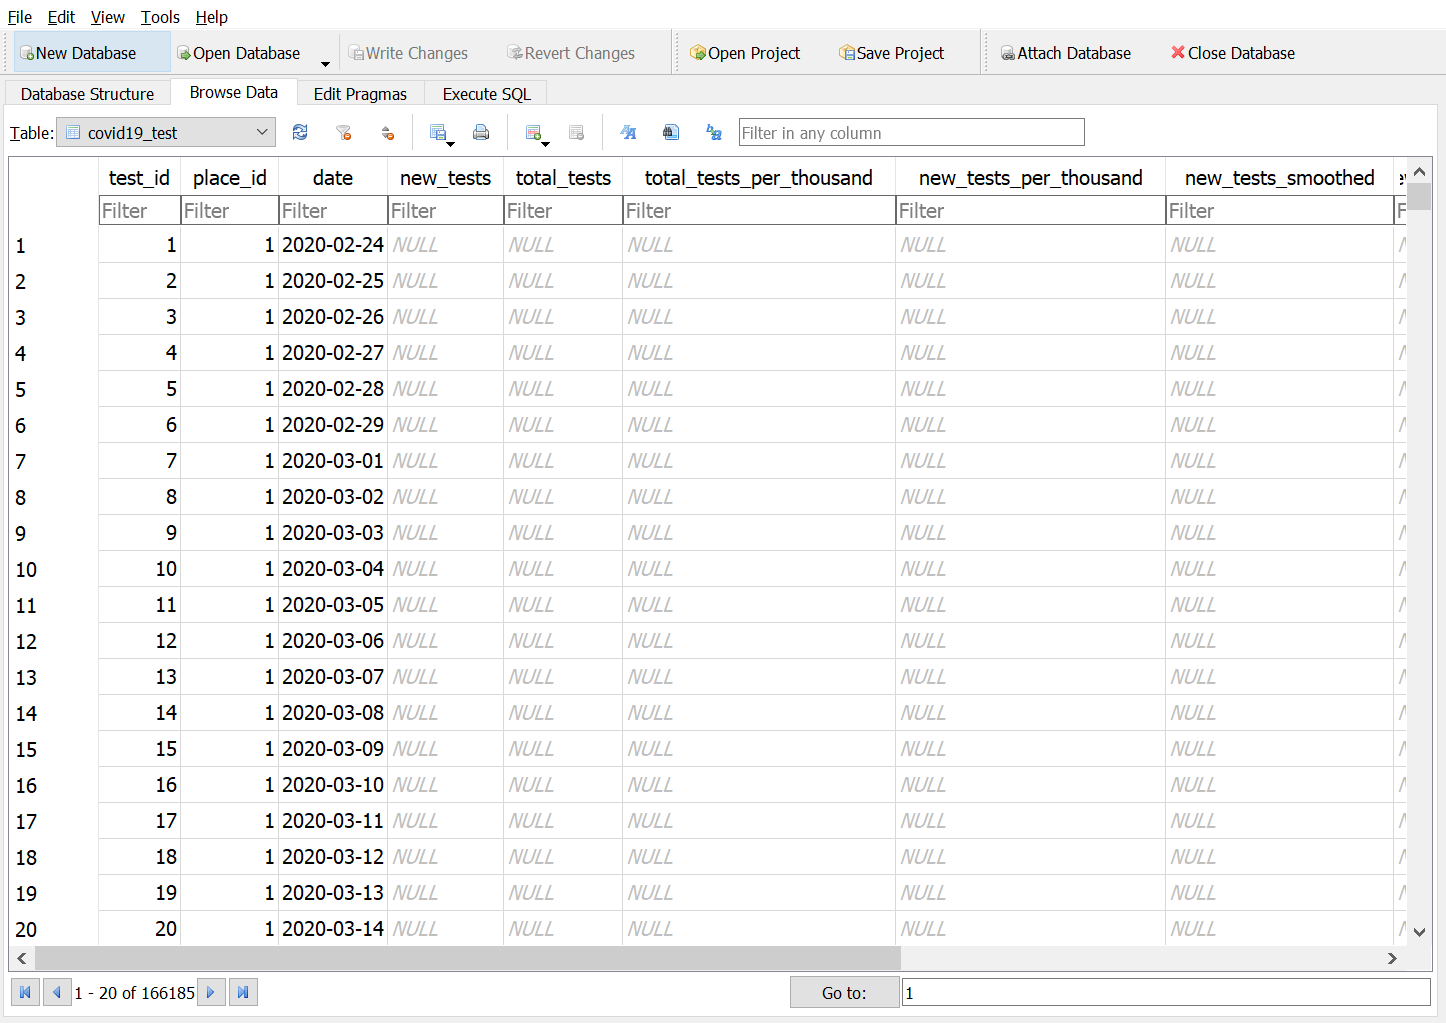

In [13]:
base64_table_covid19_test = "iVBORw0KGgoAAAANSUhEUgAABaYAAAP/CAYAAAA7thuXAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P15tC1VneeLnvdq1Ljj3r/ee/fdN6q54966tzLfy6qbVVmWWZi1M01N0zRNU9O0TXvBZikqjV0qjSCKHBTQLYKiggrSH0FA2PRy6JtNp3DoNgcO3QE2zaHbh57fixkRc60ZETP6mGvNiPX5jPEde6+IGTOaX8zfnOu75oq1TgAAAAAAAAAAAAAApgjGNAAAAAAAAAAAAABMFYxpAAAAAAAAAAAAAJgqGNMAAAAAAAAAAAAAMFUwpgEAAAAAAAAAAABgqmBMAwAAAAAAAAAAAMBUwZgGAAAAAAAAAAAAgKmCMQ0AAAAAAAAAAAAAUwVjGgAAAAAAAAAAAACmCsY0AAAAAAAAAAAAAEwVB8b0kozWrZOFxZX4tccsjWTdugXpw6HONz26pxL09bgBAAAAAAAAAADcUsGYjsy1dTYtLMqKXj9aSpSfnhlXcHyBCo8jYUy7P4+lkTqmUVCzjRVZXND7Tx+LTxRfb61u4999LPIp2lfd45jmcQMAAAAAAAAAAPSHysZ0vrkWrZ+1Md1of1M2pgtnaK8sykKwv2j36WPxmWnEexr70BTtq+5xTPO4AQAAAAAAAAAA+kMHxnSaaZtxLfZX+CgPF+eRX+fK4kJwLHmzqX1mGvGe5j1VtK+6xzHN4wYAAAAAAAAAAOgPnc2Ynqy3l4+MV/2ohy4N2BrmX2hE62PQSs6YjuqJ/k+W6+aYw8d5hI9AMTEf46Godw1tdWaXpffRFeXXP3nc9rLFZSz7SMcyc02bUnQ+9eKSLT95ndims2MHAAAAAAAAAADoB1MxpiMTbjIz2W7ONqXs+GJiIzPhyyZmTJefRyfYZmknHuOhqHkNM3VG29uWdf90kOLrlD5ufa5F55Ytk9pH5nqpS9DVhx1F55NdV3xvp8tHr9V9OFnm6gMDAAAAAAAAAAAAf2n344ehmWY33/JfB1iMxeYUHN/YMMwx/2ZhTFvqjczNajNtx5jXMH091XktjGQUnPN4WVjGMH87o+g62dclz7dBGZu53xnRvuz3U6TJsVqOPRGL9Hr7ubo9HwAAAAAAAAAAAP9wP2PaakJHZZLLmlJ2fAHWYwiYiTGtdrsuMWM8fJ04uLrXMDLedXll6qr/Q3M33ij838kjIwquU5Xr3iQ28TZTP5/acUnXlVN33jUAAAAAAAAAAAAYKO6N6dBgnMw2NZVfZx3Kji+giflZpd6mWPZrMzfrXMOJua1MatP0jWYdZ83vrii4TonzNDDjUaWMZR/RjGrjWnR2bkVxrxuXdF05dWNMAwAAAAAAAADAnDGjGdNdUnZ8AXnHYDGIc8+jU6K6w+MJjyH9fOQG11DXo8qOZxJHM6lHS/pvuLBjCq5TleveKDYm8WNabOZ2I4r2VTcu6bpy6g7r6er4AQAAAAAAAAAA/GcKP35Ytn1bqtSfU2ZmxrTa9bpwlq99JnODY9Hm5mJwTkZ90WM9FoPtXRmfRcdmXxfNdm7xjOk0pQZxHeqcT8lxVSyfPFcAAAAAAAAAAIDhMwVjWhtvSWN0ZXE0hRmuE0IDOGH+RdsVzcoNt3HyHOOA0BRX+7cZqk2uoZ45nKpP78fVeZRc/8xxxyZy4bllyiT3ocqb5xht35WxW3Q+deOSLh+9TnwQYbkeAAAAAAAAAAAAQ2cqxrQiMvAi47RbozQ2+3JkHkdkTmuNZKn0cRFm3V3PaNV12+ptdg2z5rsi3k8304kt2I/VJH3ctrLFZVL7iM3cSfmkMdyOovOpG5d0+fj1Qvn1AAAAAAAAAAAAGDIVjGkA6IYi0xsAAAAAAAAAAGB+KDWmzZmdNs0a2zGl5Qu2Y7PJd2zHbFMfsZ1HnuqDMQ0AAAAAAAAAAKDop3sI0EswpgEAAAAAAAAAABQY0wAAAAAAAAAAAAAwVTCmAQAAAAAAAAAAAGCqrHvqqacEIYQQQgghhBBCCCGEEJqWmDENAAAAAFPj3HPPjf8DAOg/5DQAAIDmrHviiScEIYQQQgihaUibOLZ1CCHUN5HTEEIIoeZqbExvvPNphKYq232IEEIIoX4JEwchNCSR0xBCCKHmShjTL7zwQihzWZ6UUXjb1qcQmoowphFCCKFhKG3i1Bl/IoSQbyKnIYQQQs2VMabvueceOeeccxKFbMKYRtMUxjRCCCE0DNlMnKrjT4QQ8k3kNIQQQqi5Mo/yUB0oxjTyTRjTyHfddNNN1uUIIYSSsn3tver4EyGEfBM5DSGEEGquVs+YthmICLkQxjTyXRjTCCFUTTYTByGE+ipyGkIIIdRcPGMa9UIY08h3YUwjhFA12b72XnX8iRBCvomchhBCCDUXz5hGvRDGNPJdGNMIIVRNNhOH57EihPoqchpCCCHUXDxjGvVCGNPId2FMI4RQNdm+9l51/IkQQr6JnIYQQgg1F8+YRr0QxjTyXRjTCCFUTTYTByGE+ipyGkIIIdRcPGMa9UIY08h3YUwjhFA12b72XnX8iRBCvomchhBCCDUXz5hGvRDGNPJdGNMIIVRNNhOH57EihPoqchpCCCHUXDxjGvVCGNPId2FMI4RQNdm+9l51/IkQQr6JnIYQQgg1F8+YRr0QxjTyXRjTCCFUTTYTByGE+ipyGkIIIdRcPGMa9UIY08h3VTWmt23bJlu3bpWVlRW55ZZb5He/+53ccMMNsmnTJrnjjjvCdaqMbVuE2oh7D/ki29feq44/q+rRrZvk7sv3kbsu/md55L4brWUQqiPuKZSnaeQ0hPquJx95xLocIYScPGP61geekOtvvVsuu+paufCii+XsoL6zzz5Hzv/tRtl4+dVy/W33BGWetG6LkE1lxvTjjz8ud911lywvL8vFF188/vrcxo0b5aqrrpK7774bwwU5VRVj+pFgQHbrrbeG96O6Z7dv3y4vvfRSqKeeekoeeuih0CRUhuGjjz5qrQOhJuLeQz7JZuJ09TzWxx+5V+7/3ZFy+9J7ZHXTkfLgtQfKLb9+m2y5+vvy+MN3W7dBqEjcU6hMrnIa729QX/RUcL8/feed1nVKT912uzxz2mny1PK11vUIoflW58+Yvunuh2XjJZfLjTfeGL7Rffrpp+Xll18O3/w+9thjsmXLFrnkkkvk7PMulJu2rFrrQKZOkfeuWyev2u8Gy7r5UZEx/eCDD8pll11Wes9dcMEF8vDDD1vrQFW1QXYM7scd1l9vWTffqmJM33777bK6uhrem6+88opV6s2MeqOhTEJbHcPUNXLMV78qhyxttqxDXajOvXfppZfyRncs7k0Xsn3tver4M0/btj0mD95+mtx54cflgRsOlZee2yqvbL9Pntr8a3n2/jPkno1fkE2nvFvuveFY2fb4qrUOhExxT6GqcpHThvf+pq/vIXjvUyZlSstX9pRX/nkPeXplJbv+ttvkuZ0+Ic9/+jPy1PpvyxObbsmUqSZiwTVAQ1Xnz5i++PKrwk+I1ZvcPF588cXw68Pnb7zMUkdkxK4L9N5j7euma9JOjiep18iel9vKF6nJ8WNMKxUZ01deeWXle04ZLrY6xtqwYybWfiX+qDNKH+O6dTvI+utt5YvUpGOjM8xTFWNalXnuuedKzUFVVs2ESW+vdc0xX5WvHrIkmxPLN8vSIQXLj7nGWJZWZL5Nyjgw4645Rr6q9pHQIbK0Wa3H/HOtOveeeiOtZmal64gU3ysZHSPXWMtPWw3uJe7Nqctm4rTR6pbL5K5LvyRbrthHnn38d0HN20VeeUJefGxZ7jjlH+XZWw+S5+85WZ665XBZOeNjcsuvd5KttxYYRn0dC+y4wVK2oeJr0M1592/s0OU9df36HbKxWrejbLCUnY64f7pW1zlNqdP3N4E27FgUZ9s17vq6N60v537lvY8X0qa07LOfvBLo5c9/SZ66447JemVKf/Rj8uIuu4nsvU/4/xMnnChP5E2AsPS/k1j7EAvuR4RcqPNnTF9w4W/DN79lnaiaubXhV6dY6jCM4D89UM61rJuFMZ3e57n7vSbnGIuEMd1URcb0b39b/Z475ZRTrHUo6QHbjhvM5XHns8N6ud4oOzvZO6Pxm55ax0ln2KXqGNPqq5nq8Qnqf513n3nmmXBGjHrcgnqUQpExvXnpEMM409KGoX15sbEWb+vImA6N9KC+Y65JrVOGYGikY/65lr731Ixo9SxpdQ+q+07lRXWvqTfVZ599tpx11lmhKX3RRRfJhRdeaKnLFqv4ww8vzOl69xL35myUNnHqjD/Tuufag+T2s/5BHrv9OFl75Pfy2F2/lbuuPlxWLv223HLO7rL53J1l7dZFWbthX3lu5Sh54b6T5dFr9pdNx79Dbjvry5n6+jsWiI+xK8Nzjo3pLu+p6H5KGxbXy/odmpgYXYn7p2t1mdO0unp/E0nHNy/G+fdEd9e9aX327Xjv44mC9yyvfOHL8sqeXxNZ/x15eY+95cWdPxc+uiM0pT+yk7zwuV1FgvXPfnQneeLNfx9uY6vL3v8GUvkkjLMPseB+RMiFOn/G9HnnXyDPPvts+PUj9VVg9RxL1Wnqzlk9J0t9qqveGJ908gZLHbER+6Gd5FXB3+SsaX+M6VCXHxge47oP2Qx2mzCmm6rImFZfYat6z23YkDMbJB5AZzrCUFEH0OlMksYq6IyuXy871DpOOsMuVcWYVs/vVW8y1P/KhL733ntDKbNQGdK///3vw0d4KGNazZRJbz/W5iU5JG2mhUbaMXLMIZblGbO6TB2acfFs1IzxlxDmn2vpe0+9gd28eXN4v6l7VpnQ119/ffha3XtKarm6F5VRfeqpp6bqyolVfE/OPoY17iXuzZnJZuI0fR7r7Wf9o7zy3D3y/CPXyWO/P1QeuXZ/eeCi3WTl9PfKVYf9ubzw6PUia7eLrJ4rr9x9uMimr4jcf5y8eOf+cs1h/zVZX9/HAvE4wL8+ul9jh87uqb7Fg/unsbrMaVqdvL/RCnPbDrJ+fV6Os13jrq970/oKtuO9jx965FF5aZfd5eUvBbnwGwfIS1/8Z3nuY5+QZz+8o7zwmV1E9tgr/H/b375FtgXjUGsdhf2vlg+x4H5EyIU6f8b0OeeeF3ac6oeWVIepfvlf/6CS6jxVJ6t+sOGBBx6QE0862VLHxIj9yYeChp2YkWw3acezl0PtJD+Jl2e3ty27Qfb802BZrrlcbAxH+9aP9YjKTo5FSR9P3rqibSbbqf0nztNyXfLrCHTsTsn1qeuSdw19UZExfd551e+5k08+2VKHmrkSnHfBJ5zRp6B6hsGkQ0h8PdOyfWJ9YoaCrmNDtO+4THknU9wZRftLft1psn+l5Dlk1xVtM9mu+NzL6ggUDz7GSl27/Ovmr6oa0+peVbOllfmsTEL1VxmAanaqemOjjMIzzzwzlHqtdNppp8lK4pltWbMsnEV9zDXhDNDM8vFM1sl20XI9y9WsL/o/Wqc1mQk72S653K68x4ukpfd/TTzzNlLSDCw+rmp1xIoNyXGZQ7Iz0AvPM7V9+fnNXrZ7TxnS1157bWhKq/tO3We/+tWv5Pzzzw/vSftYwLxXjOU5xrT9OubfF+nH1OTHYXIckzKHyWHjsrZtTHFvzlJpE0ep6vgzrduW3iMvP3evyNM3ywv3nyZP3nCArN24b6Cvyv2nvzVcJg8vidzzU3nllq/K2oWvl4fPeq08uWlRrjn8z4y6hjAWiPvf8E2x7fgm+04eU7Ku8Vf+U8uz22X753S963bcMzqmhPzu1/PuqV1/dLPs9bOb5fNH3CjfOPYW+fR3r5OdF6+TL//kRvnij38nHzvoKjnuwHdM6qphtNivT/49GcbIWF4Wl6S4f7pWlzlNq/37m4km94sZY73edg++Ud6YWaauu61slTia9xTvfUKl2nXymmWvqfcK7tPnP/lpeXGX3UX2+brIXvuI7LG3yFf2kGc/9BHZ9qa/yzelK/S/kSaxMJen77fMvdLptbcfgxb3I0LN1Pkzps8+51xZW1sLvyasPsFVswHVX/Wp8XXXXRf+SIPSfffdJ8cdf4KljokRq2ckT2ZNG+vi8kljOGU8h2as+SxobeBml2WfZ62V3WdCseEbbX+K/CRVT3g8KXM6WVe1bdQ+JtulzfSSOjLXUa2fmM+F19ATFRnTajBYdM/teuxfyCd//iq5657NcsIJJ1jqmCT47LpYiTcXk2Q/2SbuUI2BXrJjSr+JmNQxfsMS7mNS3q6SY00d54bUm6HozUKyQ0zWVW2b4nMvqSP+NNl8o7Zhx0mHV3zd/FUVY1o9B1C9yVD/K2NQ3afq7xlnnBH+OJ36uqYyCdVfU2r2qjINzbrSBp56rWZ+hqZVann6ER3KsLIZa5Nl6deRIkNsYpKljyGjyrNoJ8c1nr0aGmymIXeNXJOa2Rruf2zMValDLzNnyerHUEzKFZ6nZbb6NcfkmZ/+yHbvqcd1qEd3qPtPGdHqHlbrTjrpJPnNb34TztBSP7CUrMt+b2Sva8l1tMUmVXfx/TaJd/JYco4vLe7Nmcpm4jTVrWe+S17efq/IM3eIPL1J5JEL5dlN35a1q3eWh898q7x4xyEidx4s/3z8n4VjgYcuerM8dP7b5YkbD5arf7CDUVdJ/6rk/Vggrs8wgZLHFyl9TPaZstl9lPXPmXpVHeH6vOP1U3n31CcPuVZOu+7p8N79zZX3hX9Njr5oVXb89tWTuirNnisZM1nvh+T1rD9uyotHtJz7p766zGlaZe9vzPfU9vc3WmZc4xyVMZps19i+rPh9Qnkcu8t3sXjv448eeUS2f/AjInt8TUT9fd8HRb70z7LtjX9bYEoHsuYQm7LxK81HnV977keEXKjzZ0yftXR2+KxU9eZWdZzqK8Oqw1Sf9F599dXhrED1Zlh1rr889jhLHUnzNjJN84xdi9FrmrBpQ1aZyH+6k7z3T41lYRnTqE7LZiYbiveRuz5hjpfUpVVlm4zpnpK5vrBsyTVMlJ2dioxpZagU3XOf+sUOst9vPiD/dMQfyTHH/SJbR5XOMJHAczqkxODKUqa0jpx6EyopU3YuZcdoU5VtEmUsMtcXlrXUb+k8fVQdY1q/ybj//vvDR3qoxyUo81mZ0Moo1Ia0ysfq8QvqGcBpYzoyqEzjKzarQnMqaYhNzLc8065KOcsyixGWUE3zr3R/aSXMvSp1xEZf+ocgy+oxz9NmKPZAefee+l99GKJ+9V/dgyqPqlnTypS21VN0nZPXteQ62taH1zbv3g1Utn3edjZxb85UaROnzvgzrVtOf4e8FJqIt4o8db3ItqtEHjlPXlw5VJ68+L3y/CVvlicu/HPZ9ZhXj8cCW0//W3n8mgPlqsU/ndQ1hLFAuO+S48tZHr0RnbwxzZazbFfleoQqWuef8u6pDx5wpfxs47bw3t31B9eGfxXPvijy5HMiB//6ftnpO8nHcEXXNTIRig1qQ2X3ULi+wNgoHTflxIP7p7G6zGlaZe9vzPfUxx13nLWOUIm4Tu7J5P1hu8YVr3vZ/TpW032UlInvo9z1lY/PUJVtEmUsMtcXlrXUX9qG/dSTt94mz37wwyL/vIfIe98v8u5/Etn9C/LEm4J+OBhj2rYJVRbDsdLXyh6bRD7q/Nrn3A9a3I8INVLnz5g+86wlefrpp8PnYakOVM0C3LJlS/g19Msuu0wOP/478oUfflhG3327fPhbfyOHnnZoqo60UWq+Tq2zGqhRmWhZNLNYl1cmt/o/NLvj2cbh/4Wzgy3GrSmLMR2Z6fEgNFS5MV17G8u559YRl7WeZ+k19ENFxvTSUvKe2+2418quv/wz+fTRfyofO+q/yN6/fo+cvPx9+dKGt8ubvvev5KFHtybrqNIZJhJyTodglrEm8Gi7/Dpy6k2opIzlXBJvikKVd4a1t7Gcb24dcVnrJ6+l181fVTGm1QwX/SZDGYN69os2pvUbmZdeeimUfq2+snniiScm6wsNqdiECv/PM6lN4zjPUEsvLzHAUtsllxmKt8nuLy3bcdmPNTLk1SxSrRrmn/UcApmGXtl5xusLZ4p7qLx7T/2vvhqsHumhZk4rs1p9NdhWR6ToWthjYKjC/ZKcAR2/1sZs6fap2KbKZJenFNdfWs5an30f3JvVZTNxqo4/07rl1H+ITMSnbw4qvFrksd+KrP4mHAvsduyfyc7HvFo+/rM/SYwF/jYYCzxy+TflykNqPg840UdV6A9L+zRbHTn1JmQpE+9r0rdWOD5zeeaNamr7snPJq9coV3xO/ijvnvrwgVfJ0RdtkxdeellefOkVefnlV+SlQC+8qF6/LN86cbO8a9+LrXUqJcdFpolbNO7KzlYLX2uTu/Qes8kSD+6fVuoyp2np9zfqfbQaAx500EHys5/9TNavXy+nn356qP333z9cdsABB4TfdHr44Ycz9UT3lnG/xdc6eT1t1zj/upeN8avHsUpsS8pYzie/PTU4p7xtLOdadl2G9t7H1JO33irbP/AheeETnxL5wpdEdv+iyK67i3xuV3n2Pf8kj7/2dbLtxhut29piaFcqFtZrF8jMR51f+/x7KJTlXLgfESpX58+YPuM3Z4bPsFRvem+77bbwDe+dd94Z/n/YCQfKfht2kjNvPlxu3HqefO/8z8g/fe8/yb6/3MuoI2vERoarmjWdWhfOBDYb20S6TPhYitCEVia1adRGs7An6/X+08o3k0PFxxCZuFHZxOzkxGxlW11NtgmUMJTL6rCY1vqcK1xDH1RkTKtn8Zr33Gd/+Ro57fofyinXHRa+CT1xeVEWL/iSHH3ld+TTx71JXnPg/ygPrN5r1FHSwSiFHZxOyBU6hLi8TdF2tjoqHEdZGctxTjoyvb6oY2uyTaBEJ1ZWh6Wj1G+wSq9bXJ+HqmJMK/NPmYPK/FNvWJSUOagMQfW8X/WcXyU1A0bNhDGlZrEm6zOMLWVejc2oaOblePnYsE5tM15mW24pF9Zlmm4TZeuL1an5F71OmKCmaVeljirmX4XzzBiQ6VmuHirv3lN/1b2r7q/jjz8+XK+eW6meV7m4uCgHH3yw/PCHPzTqsl9T+0xf4xoZGm9rid84NqXb2+I9qSe7PCXuzZkqbeIoVR1/pnXzyW+SV158UGT7ZpFtF4s8crbIQxtKxwJ/FowFLj/wPxp15fRvpix9bGF/WNqn2eqocBzjftZWZ7JMpp5UfzxW5s1oavuyc0lcm7SqnJM/yrunPnnINfLjc1Zln+M2y9eP3yx7/3JF9vzF7bJHoK/+/Db56s9ukw/vf5G1zoTiaxVdDx3L/DFT8nVUfnydy+Ki95mQ3mdR+ZyYpY9Na87vny5zmpZ6f6Mep/X9738/lOqf1QQcNU789re/LQceeGD4vkctU5O/VJkf/ehHqXrir/gnDCjbMts1zl+We3/WjmOV2JaUSeyz5PgKjqHeNoF47zNWaEq//4PywsdHIp//kmx/3wfk8b/+G3n0L18vz7ztH0U+9WlZ+4d/lEf+dAfZdsMN2Tria1l+vqlYpK7xWKl81O21z7kftOI6uR8RqqfOnzF92ulnhOvV14xuvvnmcBagmi2tfrBhx2+/WU6/aVFOv+XQsPM++IJPyvcu+JT8xW7/zqgj37x91X4HJtdZZ/umFBqvO8lPVNnxjOFoJvV7j9V/U9sklGMMx5qY5sHrlBkcqsxkbrKNUnjucZnSOkzFz6fW66pcQw9UZEwrU0/91ffcx3/+qvCN6HfP202+fc5n5VtLI/n6b3aSb5z1KTnikm/Kh37xF/JH+/0Low7bAC2pKHnr2QZFHUKc8FMdYlb5HVFx0i8ukzjOVAcUqqxja7KNknnupXWYiq+9Xld63fxVFWP6mmuuCd9YqEcqaFNQ/VWP6VDr1MxopbQ5rd7wZGZMG1/9VzNNTdMrNKfi5cnZkzaDzLbcUi7POCtUfIylMzgrGHcJoy+WC/Ov1nnG55c+Lg+Vd++pD/TU/afyqJq5r0zoww47LDSpr7jiitCwVrOyJnVZrnNsmCaWVbqORl1hHcaHKKXb2+JdtDwt7s1ZymbiNNUd5+4md174Fdn+wEUi21dEHr9Y5IHjKo0F/sPX/+9GXcMZC0QqOj7LMWX66dT2ZedSuL7K8fqjvHtqp4OulkPP2ir7nXBvoHvka7+8S/Y6+k7Z4+cr8pWf3S5f/MnN8k/7nG+tM6noeoRGQKUxk3H9wnXZ2a/1xk1V4pFThvvHqi5zmpbql9Ws6T322EOuD8aYe+21l7ztbW+TT37yk3LooYeGy9X/atlnP/vZ0Jzec889k/XE19VmMhXGK29Z2f1aO45VYltchvc+s1VoSr/vg/LCxz4psvvnZft73y+Pv+GN4TOllR7+09fIU3/ztyIf+7g88+a3yMP/6U/k8evSsSzvfyOlYpF37Zxee+5HhFyo82dMn3Lqr0ODUH31SBnSpjH91r1eJUs3Hxl23Jozfn+4vOaz/9qow27EmjN+J+uKTeNQ2sDdb6fEzGhVX2R028xbUwX7iE3d8bomJnOTbQLVM8RTSpjRFa6hByoypn/96+Q998Gf/gc56ZpFOe6qQ+ToK74jPwvO91tLn5EfXfINGR33Zvmv6//fctUdlybrCZN18UBq/EliTodQ6Q3rWLb1ZdsoFZSJO5LxuiYdW5NtAtXrhFNKdIBVroGfqmJMq2cDKrNPzW5Rs/yVSaikZqeqGa1qWXobNcv1/PPPl5///OeZdaEBfcgxcswhKbNKmVnx8kIzLHd5BSOtovQMzsoGZd6yLsy/vHMoradAtczC2Snv3lMfeOgPRtSzzJVUOSW1/Mgjjwy/+TSpy359wg9BEteh2nWM7uElWUp9uFK+fd766vHj3pyd0iZOnfFnWtsef0Tuu/FEuemkd8mWjV+Tlx6/UuSpa0vHAq878F/Lgw/enawv7Kt6PhYYK6+MfXnyuG3lyvZZtL5sW7+Ud0+9e7/L5EdLq7IajDe3PvlYoG2y9Ylt8kDw/2NrT8seR26SN+6e/D0Iq8zxWsUxUxifHdbL+h3T17HJta2yTV4Z+/J5v3+6zGla6v3NfvvtFz6mQxnT6pFcb3rTm8IJC+pbduqHD0855RT5m7/5m/AbTsqYVmXNOrJxiZV+z2C9xpZlpfdr3ThWiW1BGd77zFxPBuPGtfe+T17Y6eOy/T3vk8f+6q8TP3S47eFV2fqf/rM8+bq/ku1veaus/smr5LHzsh/gRdezzBBNX6sKsUmr9bUv2Ib7EaHG6vwZ01ffdKecELzRVR2m+vqRMlXULwqrv6/b/f+Ug877mKw/b8ew815/7o4VZ0xPlieNaW3QJg3Yc/fbyXitZwinZgWHxm2wvPD50ko5x6O3Nx8Dkjaqx8c8Ob7w0SHmPku30a9jE9q2TUkd6hqZ554wtcevi67h7FVkTN9xxx2huaLvuXf+6P+Ut3z/f5U3fu//I39x0P9DPvLzBfnhxV+Xj/3yTfKqA/4XufbOq6z1RL9Wm+4Qo+Rs+7rb5M1poHRHFCjqIJIdwPXrdyzoVKp0BDllws6m7Jji4zaOKfMru6Xb6NdGZ5/epqQOdV3Ma5wePBRfN39VxZhWUs/4VWXVGwg1M1oZgfr+VYahesOhjUH1v17205/+NFtfaFpZZkXGhlTWdMsztrLLs7OttZGX3NfmpWOS+7Yoa1rGUscf7sN2XKll8TlNykTr65l/+liyM3PN8yo6T7XOPI+orPm4FH9lu/fU/0cffXT44Yi6D7/73e/Kd77znfArwmp50pRWsl1nJT1Dd3ItKt0vlus/KVu0fd5x2O/dPHFvzkY2E6fq+DNPjz20RTZf8l257qd/KQ9c9g155xHBWODQYCywGIwFDk6OBd64+Eey+mj2WaxKvR4LJJRfJnNMluO2bV/WP2fXB3XE1ywz3uiB0vfUO/a9VH6ytE0eenpV9r/oHXLE1bvJj6/+fPD/u+XhZ+6XvY7cLAs7nzypIxybpc0RPTstXl467ooVl8ssD1R/3MT907Vc5DT1/ubLX/6y7LLLLqExvc8++4QmtDKn3/GOd4RS/7/hDW+Qr3zlK2F/vvvuuxt1xPeamaPS64xrarvG9d8nFMXRdk/ZlqWVU4b3Pv7o8ivkqbe+XR57/V8lTGmtbQ8/LPf/4f8v15TWCmMTXLdk/xtIxTrnHspcu1Qsur/22WMIxf2IUCt1/oxppd9tfkiWzt8ovzz22PCN7YYNG+SEE06QT+z7HnnXwX8kh5z3iXCmtPqrXpc9Y1orMlCz6/TysVJmc2gGm8ZuqNi8LXy+tJI2edNKGrljacNal1EztRNlzfrMGc9528TX40M7heazLpe5PkV1xMZ1Yn3q2Muu4axVZEwrqa+kq0cfHJu65w4//HD5k2/+D/LRo/9a/tv6fy033LVs3X4s3akYynQ8cXLfYQeVtIvK6cRu1DfueOI6EtvYlqWlO5a0kp3HWInzCcoEnUqyrFlf3CEVbhMf4447hh2eLpc55qI64s4ysT517PnXzV9VNaZNPf744+G9q0xBNZNVvZG5++67w2XqsQvqf7VMmYhWY1obYBkTLu9r/DaDLG95XHeotNmolweqaABOTHRT9Yy7ZB3Btkvqdc06AmkzMlJwbmG9abMv5zzHZqFW+hr3Q/reU1L/q3x51FFHWcsmZb+moXKNVON65d2rOfdR/vYFxxGvi7apYMxyb05dtq+9Vx1/lmn1nhvl1jO+KFd99z/JI9d9T+49e7fg/9fLfz/gfwrHAn936H+RRx7LvnFOqCdjgTZl0seULWffvqx/zqwfv0mP6ouWG2+oeyB9T73nm1fIeddvC+7czXLl4+vl1meOkVu3HxP8f3CwbIt865jN8pefMU1AbUKnlB7TlI7VlLJGoql64ybun67lKqddeeWV8tGPfjT80Pikk04KH7mlniP9+c9/Pszz6n+1TM2u/sEPfiCf+tSnJtvH4+2MyRcrutbmfWa7xpZlFe5Xexxt94T9PknKPAZT6TYSq/T46p5TfIy89ynUtksvtZrSWsqcLjKlx0pcR61ULErySmJ959ee+xEhF+r8GdNpbbr3cVm+dUuoW+7fJt84dh953Rf+IHx8h/qrXtu2Q8hUmTFt6tFHHw0NPSU1g/o/7Pc/yv+217+Qm+/5nbV8fdk7RTTfamJMa6mvYqpn+aofujn77LPlrLPOCqVeKynDUD3317Yt6kCh+efnzNJpadu2bZYf2EQz10DvTZuJ07Xuv/k8ufGXH5QbfvEeue/G38irDvifw7HAo48/ai1fXwMfC5SYWvOoD+13nrxv/0vl0wfdJLt/7x753CF3yi4H3SG7fudW+dxB18kbd9kg//mjx1u3nTvN2f3jKqep9zE33HBDaE7vvPPOsuuuu4ZSz55W33r6whe+EM6S/sxnPhOWUWVt9SCEEEI+q/NnTCPkQnWMaffCmEZZtTGm0RR1zTGVZq4iNHXN0b1p+9p71fGnPxr2WCCaLZWdRYVQFc3b/TOMnIYQQgjNRp0/YxohF8KYRr4LY7onCmegmo87wJRGnmiO7k2bidP2eazT1zDHAvoZn0rMlkZ1Na/3zzByGkIIITQbOXnGNEJdyy9jGg1J+g1UkWzbpYUxjRBC1WT72nvV8SdCCPkmchpCCCHUXM6fMY1QF8KYRi5lM6O1bOVtwphGCKFqspk4CCHUV5HTEEIIoebiGdOoF8KYRq7VxpRWwphGCKFqsn3tver4EyGEfBM5DSGEEGounjGNeiGMaTQNNTWllTCmEUKommwmDs9jRQj1VeQ0hBBCqLl4xjTqhTCm0bTUxJRWwphGCKFqsn3tver4EyGEfBM5DSGEEGounjGNeiGMaeS7MKYRQqiabCYOQgj1VeQ0hBBCqLl4xjTqhTCmke/CmEYIoWqyfe296vgTIYR8EzkNIYQQai6eMY16IYxp5LswphFCqJpsJg7PY0UI9VXkNIQQQqi5eMY06oUwphFCCKFhyPa196rjT4QQ8k3kNIQQQqi5Wj1jGqFpynYfIoQQQqhfspk4CCHUV5HTEEIIoeZqbEwjhBBCCCFUV5g4CKEhiZyGEEIINRfGNEIIIYQQmpowcRBCQxI5DSGEEGqudaojRQghhBBCCCGEEEIIIYSmJWZMI4QQQgghhBBCCCGEEJqqMKYRQgghhBBCCCGEEEIITVUY0wghhBBCCCGEEEIIIYSmKoxp1AvdfvvtaI5luycQQgghhBBCCCGEUH+FMY16IWVOwnyCMY0QQgghhBBCCCE0PFmNaXOmIkK+COYT272AEBqWbGMRhBBCCCGEEELDVq4xbVuO0Kyk7kmYT8hH8ytiPx8izgghhBBCCCE0n8KYRr0QxvT8Qj6aXxH7+RBxRgghhBBCCKH5FMY06oUwpucX8tH8itjPh4gzQgghhBBCCM2nMKZRL4QxPb+Qj+ZXxH4+RJwRQgghhBBCaD6FMY16IYzp+YV8NL8i9vMh4owQQgghhBBC8ymMadQLdW9ML8lo3TpZZ9FoKS7Sa/LOb0EWV+IilYnqWqi/YSeQj+ZXxH4+RJwRQgghhBBCaD41UGN6g+y4bp3ssP56yzrUR7kyptNm68riQkPz1jeKzm+drFtYlOqnOOfG9IYdg2u2g6y/3rIOORWG5XyIOCOEEEIIIYTQfMqRMR0Zw9nZmk3MnSYms7/G9PXrd7Bclx1lQ7h+msfdL/N+Wsa0rCzKgm157ygwk+NzXFd5avgQjOm8nBSpsB0kjOm4nh03xOurtqOc/Y/rQTZ1a1i2uAempqr3UzUV9zeGwns8WS57DN0emymMaYQQQgghhBCaTzk1ptNvYMdvkndYL9cby4vV5M2wuzfQbbRhR/WGP23OXy/rd0iaXtM5bj+vUZ6mbUxHnu2kzHim8bpRsDRisiySWdfSKFiWmpWcXbYiiwvBMm0QL40S9aW3T+5vchx2is3k5MzwqGxi3+P689YVbdMtXRrTje73Do3pZLm4LptRiEK5MKb9znndHWN5f2OWWyc7bjDLxfdmoq92d/0wphFCCCGEEEJoPjVVYzrU9etlB/WGt/JMwSZvht29gW6s+LyLj2max+3hNSrQtIzp0Dy2mLLpckljN1yQnGkdmszmI0F0XdlloS+dMMQjlkYToze9P5vxncR+fmNiE1wb8EvGfhW265Csq2yb7vDLmE6rar055SrlhfkVxnRDVb2v4pnSSVNaKzqW+h/C1BfGNEIIIYQQQgjNp6ZvTAeKZk6nZiAmlHy0RXZd0TaT7dT+E19ltsz+yq8jUPrrzamZ3smvSZfMeiw0AJSKzzV5Lsnl6TrS1z15nIF23LN0X/l15h2PbV8l16SGXBnTk2PVyhrHWXPXvjwyj2NjNm00KyN4YSSjBWNZWCbeX8bINrHsz2JkJ8k79pi0kZ4mcTwldWkKz6E5Uzem0+0+VDJfRfVE/yfL5d3zefuP6wjNv0kZW1sv3U/quHfYQdWRPu4Nsn4Ho54wp6lZtMZ2iWOssO+SPNlG0zamrbOMLR+mluW55Hq9rW3/5rLia10rt5b2N0px3AviFe1T76v8+jUVxjRCCCGEEEIIzadmYkwn3zRvkA2pN8+ROVD0ZrjaNmofk+3iN+HG7K/COmIzwnxjv2HHiRkQvWGfGBjhtkWGjMXcyMp+rtlzKS5rLksfZ1gmPM5q22eXRa+zx9PgmtSQK2M6bbZGs34nM4mthmyeKZwwZqPHdOhtlWmt/g/N63jD8H896zmu0zoL2rq/6Ni6NKYjYz06/0jlxnT+Nt0xVWPaZuiFy9IGb7I9lNabWy5uT4ZxqfafLFeW7wJljlubzcnjTpSJt0nkh0zea5cn22raxrTNrE3nsbI81y7n2o9xev1NSqm+uvz6NRPGNEIIIYQQQgjNp2ZjTMdvmnPXFxpBOaqyTaKMReb6wrKW+i0GTVqRubAuktUwsB133vlXKZu3bd66NnValle4JlU1LWNaL4/M45wyeTODUwZyaHKHL5RJHZcPy0SzqifrIzIm76Si5HJDucZzgZkcEtcZ7SI+Z/OcEudoq6tsm+7o0phOX79Iup2nP7yKVZhb8tpDWjnlwrobGH+JY2py3HWWpWTWm9hH93JhTGfjr2Scg9k/Zc7Pcn0Sea7o+lW53lXKBOqivzHPM71Oq/K5tRPGNEIIIYQQQgjNp7wxphNvokMVGSoNt7G8mc+tIy5rnZVmqUfvs8goMJXcr55haDvuvPOvUNZ6nFpV95VeZisTqINrUiSvjGnrDOaAtDEbvh7Jkio/ngkdzaQeLem/4cIU8Y8i6rry9ldI3vlFRCZ4/NgRm6FcZkyXbtMdXRrTmfvWVF57KTR4K9QbylIuk2OK6yrLVfWOu86yhnmyA7kwpvOur6nofHeQHXZIlS/Lc3mxMMoVX29LmbJ9jpfly9rfxPUWXo/Evm3H340wphFCCCGEEEJoPuXFozxU2YmBoteXGyr1tglkeZOdX4fFjNGzzuLjt6n2m/a4rmi7/HPN1luhbFy33byouq/0MluZQF1eE4umZkzHJnC0PM/ctS9PmL2KsK4FWVwcZWZGLywuBnUUmLgJM7rYZLZTsE3iHAMwpiPlmYqJvFCxPWQUlStuG3l16W1zclWj4666rGTfwevcPNmBZmVM2x7pEaosz8Xrm+dcS5myfY7rqqC4rmi7CtcjcT51rl89YUwjhBBCCCGE0Hxqhj9+GM/aCt/4GqZHZlneG/Wa2yiFBk5cprQOU6nnteYZQY0UHWtk5tiOO+9aVihbeJxV95VeZisTqNNrktV0jGk9U1mby/nmbmRCGyZs2uwN0fWlZjuHBm6w3HietKrPLJM2uTP7C1hZHBWYwDnHrved3Fnq2KNtzf2Fjx0xn39dYZuuGJIxXVwup0xZrmp03BWXle17vJ1SKk8m1jXTrIzpsI/aYYfwuibKl+W51jnXUqbT3BrVH/U3Oea7oURfXeP61RXGNEIIIYQQQgjNp6ZvTMdvssfrSo0PS11NtglUzxBPKWEOdPgGPXE9bPXm7atK2aLjrLqvqnUW7au9XBnToUlrKvHjg/nGtCIyiyfb2spFP6ZozKIOifdtMYcn9WUN3vT+rD+UOCbn/PKMY21Y6zJqlneirFmf+QiQom26YWrGdF6ZwtxS9b7vav+2ZU2Ou+Ky0n2n1KmJOiNj2jyHzLmW1VG0vsL1rlSmhVL9r57tXmSkT2bAd3gcKWFMI4QQQgghhNB8arrGdPgm33yjGyj1Rnn8ZtgwAzbsGLw2Z3WVbqNf65lelm1K6lBv2M0368mZY/p10py5fv2OidcJheduHE8oPcNwsjxzrnnXMlCyrK4rWTZ7nEF98TbZfVWpM/94al+TGuremIa+MD1jOr7/E+00mRds9djaUVZV9p9TpmqOtOS7ouOutKxlnmyr6RvTcc4b91HZWcVlea56zrXnbNv9VDu3VuxvlKJ7J21Ox3FOHEeV69dMGNMIIYQQQgghNJ9yakyHJnRCyTfWY2nDWpcJ3nBn3tiP18dvqgu3id9A77hjbM5EyryhLqpjbOwY61PHHpkFRpmUmZDUxIQo3iZ9rkVmgFlWHZ+9bOY4UzPgJvuqUqd9H1r1rkl1YUzPL10a04l705B5P2ujLlLQLsI8odu/7f43606afukyee0mUkGZ0hzZ/LhLl7XMk23kwpieHGtSO6w/3Wrcjs/R+EC1LM9Vy7nqWuXHICozORY3/U2sRIwjZe/DouuXd99XE8Y0QgghhBBCCM2nHBnTCHUrjOn5hXzUUKHZ2M4wnLWI/fQVGeDdfsBQJuKMEEIIIYQQQvMpjGnUC2FMzy/kowrasGP5zOceitjPQJnHt7gXcUYIIYQQQgih+RTGNOqFMKbnF/JRBVV6FEP/ROxnpNQjWlzfS8QZIYQQQgghhOZTGNOoF8KYnl/IR/MrYj8fIs4IIYQQQgghNJ9KGNPqzSFCvgrmE9u9gBBCCCGEEEIIIYT8luk725QxpgEAAAAAAAAAAAAAmoIxDQAAAAAAAAAAAABTBWMaAAAAAAAAAAAAAKYKxjQAAAAAAAAAAAAATBWMaQAAAAAAAAAAAACYKhjTAAAAAAAAAAAAADBVMKYBAAAAAAAAAAAAYKpgTAMAAAAAAAAAAADAVMGYBgAAAAAAAAAAAICpgjENAADecNNNN8X/wbTh2s8Orj0AAAAAAMwjGNMAAOANGHSzg2s/O7j2AAAAAAAwj2BMAwCAN2DQzQ6u/ezg2gMAAAAAwDyCMR1wyimnIISmJIAiMOhmB9d+dnDtAQAAAABgHsGYDlBm2T333IMQciyMaSgDg252cO1nB9ceythzzz0RQgg5FAAAzAaM6QCMaYSmI4xpKAODbnZw7WcH1x7KwDQBAHAHORYAYHZgTAdgTCM0HWFMQxkYdLODaz87uPZQBqYJAIA7yLEAALMDYzoAYxqh6QhjGsrAoJsdXPvZwbWHMjBNAADcQY4FAJgdGNMBGNMITUcY01AGBt3s4NrPDq49lIFpAgDgDnIsAMDswJgOwJhGaDrCmIYyMOhmB9d+dnDtoQxMEwAAd5BjAQBmB8Z0AMY0QtNR18b0Q4+tyf5HXyXv+toZ8trPnShv++ppsuv3fysXXnePvPjSy3GpiJ8v3SxPrT0fvwJf6cqg+/09z8qvrnpSfr7xMTnqt4/ITy54RH543sPyg7MflMWztsrBZ9wvB/76Xtn/V1vk6ydtlq8dd6f8cOneeOvZce71D8neJ98q/3jwVfL2QO/5/jXynsVledu3L5dDfr05LuUGzNHZMc/XXt/zHzzs2uBeV/d7rPjef8/3rpadj7pBFk/fLC+8mMzr0+SsTWvyt4dvlX/4yVbZ+sSL8dLpgWkCAOAOciwAwOzAmA6oakxf+vuH5KTLH69ldCyedqe1LoTmUV0a0xtvuFdet8tJ8tlDL5bvnXaTnHjJ3XLixXfJD06/WUYHXyB/vfvJcu41W8Kyp16yIn/6yWPl6e0vhK+nySuvvBLmzvvuu09uvfVWufbaa+XSSy+VCy64QM4//3z57W9/K5dffrnccMMNcuedd8ojjzwSbjOvdGXQnXjFNnnm2Rdr6au/vC3eena87cDL5dGnnpXHn3lOHns60qNPPSe3bn1KvnbGvbLz4SvOzLkuzdE+fTDw8MMPy2233Sa///3v5cYbbwx1/fXXh231mmuukauuukquuOIKueyyy8K2e/HFF4frusSFMb32wsuyePGqrN+4Kj+64hH5waXB/xc+LN9Y2ir3Pe7Ph3RfOub34X0e3vPGfa/vfdUe9P3/2SPunKk5/VeL98r7j9oav5oumCYAAO4gxwIAzA5PjeklGa1bJwuLK/FrG1XKVKOqMX38ZY9ZzYwifeWYW611ealffEDWrXu17HuxZR1CHagrY/qurU/IX+12khx8yk1y1IV3ytG/3SxnLj8gF930sFy7+XHZdO8TctHvH5R37n2GfPqQ8+XvvnyqvObTxwVtcvrG9JYtW0ITSxlPypjWuuWWW8b/b9q0KTTClEG9tLTk1ezJ5557Ts444wx55pln4iVu6ercf3bRo2EOPm7TkXL0TUfIUTceJkdcvyg/WD5Ivnv1evn2Fd+Q/S/dR75+8Z6y92//OSy7209vjreeHe885Cp5cu15ue6+lwK9KFdteV4uufM5ee7Fl+W6rS/J/kv3yv4nbopLd0uX912fPhhQbVHd53V00UUXxVt3g6s2f/Hdz8j3b9gmVzywXS6/b7t8/fyHZOWhZ8Wnz74+cOg18tT2F+TKLS/I1fe8KFffq+77F+Xyu5+Xi1eek3NueSa4/0XOvG27fO20e2TnH87GnL79oeflrYc9ILue+LB89dRV+fQvH5Jzb55OXlS0NU323Xffzu9byIfrDdAvMKYBAGZHp8a0MorXlaiakeynMd3U6LDVNV39Qj6grv8HfmFZZyjXmL5Y9n31Onn1vhenlke6eN9XJ2L8gV9kyxQrOr68+uur6/pQV+rKmF5/7DXyme9vlC8ccbn8xWdPlP82Olb+4nMnyicPOk+OPv92ue3+J2Vl61Oy+aGn5dsnXi9X3bYqr9v1JFmbgTGtZlcqU3fr1q1yxx13hLMylQm9vLwcSv2vTCm17sEHH5Rt27bJiSeeGG89W5599lk56aSTZMOGDfKjH/1InnzyyXiNO7oy6H564SNhDq6KKvuZH/0ufjU73hEb0zfc95LccP9Lcs09L8hlm5+Xux9+Jpw5+vC2NXnz1y+NS3dLl+Zonz4YUG1Smc16xrSeLW2bKa2MJlX23HPPjbfuBhfGtPKev73xYTnhliflG+c/JOsveUT2O3OrPP709B9Dkcf2IMd8bJevyCd3+bKcddVm+choN3n/xz4ny6E5HX0oc94ta+MPZq5+4AWnH84U8curnpT3//SB0JBePO9x+cdD75P/uu9muffR6fQradNEGZ82HX744eP1J598cvi/Qr02jdL0665J73/ecH19AaBbMKYBAGaHwxnTbYxjP43ppkaHra7pqqUxHS63G72RKf0B+YVeVlA2XxjT86KujOm/2u1k+avdN8hrdzlJ3rD7yXLMOZvkkSe2y1WbtspHDzhbPnXIBXLdyiNy7yNrsvXx7aH+Mii7XU27mzLKzLr77rvl6aefDnOoMp4ff/xxeeyxx+Shhx4Kr4t6hId61Icqo0wxH4xpZUoff/zx4bGcfvrp8uMf/zh8o62O2yVdGXRHnPdwmIOPv/ThSlJlP/GD6+OtZ8OLL74obz/4Cnnimeflpq0vyU0PvhzPmn5Bzr9lTc66ObiHnnlO3vKty+T557t/FEOX5mifPhhQZrQym9UjdKpIlT377LPjrbvBhTF98g3b5Dd3PC0Hnv2gXHfXM3LIJauy9+n3yzWb12Tv3zwknz5pq3zmxEDHPyCf+uV98qXj7o+3nA7btz8r51x0uXzze0fK3771nXLC2cvyt297t+zxrUXZ9+CfyBXBcaoPZS64ffv4g5mng/vE5YczRShD+j/vc3f8SuTti/fKwjfvkktuW4uXuMVmTBcZn2ljOF3etXGa3v+84fr6AkC3YEwDAMwOjOmAqsZ0U6PDVpeXShvTF+8rrw6usZ4JnTF64/XpGdK/+IAqb5jVpcKY9l2vfe1r5ec//7l1nZL6Kvy73vUu+c53vmNdr9WVMb3D6Njwxw6POX+z/P0/nyr3rT4dr4n4zeWbw1nUV976sFxx2yNy36Nr8pe7nCjPPj99Y1oZ0RdeeGE4I1oZz+q1eo60mkGtDGuVU++66y556qmnQlNamcHqmbez5uijj5bjjjtOfv3rX4ezpo855hg54IAD5Bvf+EZcwg1dGXSHnf3gOF8rTrrsofCv5ldXJl8/8uSz8tHvLcevpo+K/fr16+Wt375ctj3zvNz64Cuy6cGX5fdbX5Jr73kxnDl64R3bg3UvyJu/eZnstNNO4XPKu6RLc7RPHwyoa6/MZnX+VaTKnnnmmfHW3aDq7ZK7H31eDrr8UTn6hm1yw93PyG33bZcjr3hM9jz1frn0tqfl66c/LO/+5f3y2dMfkp1/9ZDsdvT9ctiZ0807Tzz1tHxktIvs9tVvyZ//1VtkzwMOl9e/5b3ypW8eKq//27fL+TfcH34oo+59/cHMb37/ZPjhzFsPuCKuZTo8uf1l+ZN97pLdjn0wfP1E8Pqdv1yU9xx7oLz8ynQeK1LXmE4zbWN63uH6AvQLjGkAgNkxI2M6WqcNz0ijYKlmsu3K4sKkzMKiTGqz158on6hTsSKLC9nlVY3ppkaHrS6b0o/EMGc4p9dNTNfoMRvrXr2vXByX1QoN4nB5jlEbz25OyvYoj6Lt82ZY2+qxKao7eQwTUzt53imzO338xrkmltcyyZFNatZvnjmtTekvfelLmXVpdWZMf+o4OeHC2+Whx58Nn0368iuTB6a+9PIrMjrofPn+qb+TBx/fHj7SQ82Yfu3nTpDnXngpLjVdVO5UX/1Xz5NW5rR6ZIeaJa0eHaCeL60ekeGTKa347ne/K/vvv384UP/85z8vO++8s3zsYx8L5ZKuDLrvnflAeG+cfMXD8iulK1fllCsfll1/dLPs9bOb5fNH3CjfOPYW+fR3r5OdF6+TL//kRvnij38nHzvoKrnxzsfjWqbD5s2b5Sc/+Un4+Ih/OOhKeeyZ5+W2h16RWwPd9MDL8rv7Xwqfv3vp5ueDdS/IW751ZfhoCdXmrrvuuriW9nRpjvbpgwF13bUxrWZEqzZpzpBOv1YfIqnnrndJ18b0/mdtlTNvfUqOvXab/OSKR+Xnlz8qG29/Sr526v1y/+pzsvuJW+UdP7tXPnjkvbLT8ffLgRu2ygsvTvfB04cf8RN527s/KIu/OE3e8eGd5ZNfOkD+4X0flwOPOFne8o4PyK57fCv8UObKuyNzWn0wc/5t0Yczb11/VVzLdDj790/LG9ZvkQPPfDR8/YWzD5fF5QPloCu+KYdefnBoTn/wyM/ICdc+KV88dVV237Aqe5/xqJx2Q/JD0zY0mTGdZ0Sr/9PSqDK25Qr1Wq03y+Shy2r0a/WoEb2tuT4PXdaUiXpdVK9abpu5rZbpx57koerRdSqZ9aTXpc8lvaxOGfNc9DHmnZ/Ctl26DAAUgzENADA7ZmZMLyUdY1kaKQNRG8YT43qyfWwqj/SG2fojU3pB9KKwzoSZ3c6YzjM6Tr36YTktkHqjrf6edtVDcta1D8ldDz4l7//OVda60ooMWNPM/YV8IDabM+vimcpjo9hqBJtmssVYjk3dxGznXEPZsr1SXvmcmdT5stefPu+J0R68tuzjFx/QBnTO8aJWspnTdUxppa6M6aJnRX/9Z1fIn37yWHnrV38t79zrjEh7nxEue35GxrRCzZRWsyxvvvnm0Ij+3e9+F5rRPprSs6Qrg+7g0++TJ4N8ferVq+Hr0+K/nzzkWjntusgs+s2V94V/TY6+aFV2/PbV8avpoJ7frT6kUI92+drXvlZJqqx69vEuu+wS19KeLs1R3V/KYYdF+uEPI/30pyJHHRX9r/7++McixxyjfiU07C9nwTXXXCPbt28PH+mhpGKhpK6Hkv5ff5CkxkKnnnpqvHU3dHXtX3z5FfnVVY/Kiddvk71Pf0B+fdkjcuYVj8hPf3O/HHnxquz7q/vk6N8+Ih869gH5yE/vk9/+/il531H3yX7HTvcxHoqdPr27vG+nneXNb3+vvOnv3iZf+frB8po/f738xRveJK/+s9fKH/7RH4cfyoTmdPzBjDKo1Yczf3/AdO+VPU5+WBb2u0v++9c3y7/Z+TZ591E/kgMv/7os3Xma7H3Ol+UtP1iUt/zwftnplw/JXxx0r3zoZ1tlt5Melvf++H751XVPxbW0o0tjWmHbXr1Wy3VflDZv1TrbdjZs+1NSfaBC/VWvy/o9XV6jjkltpymrV79OY25jI30tFPpapNepv+p1+nyLXitsZZTS56KU3pd57HnbmccOAMVgTAMAzI4ZGdMWlkYyMZVzti0sY9lmZVEWgmVjLzuHqsZ0ntGhSc8AW3ngSXnPAVdY60qqyEgtMm0LjNjQNM5bH8+yTj9zuq4xnWdAd2JMW5aZ9eYeq1LO8aLWMs3puqa0UlfG9H/f+fjwUR1KO4yOC2dQvybQ5753oTz02Jo8+uT2jB5+fDrPAS1CPVv6tNNOkxtuuCF8nIcypS+55BI59thjeQMZ05VBt/7Ue+SJZ16QM5ZX5TfXTvTBA66Un23cFpbZ9QfXhn8Vz74o8uRzIgf/+n7Z6TtXxkung5qZ/tJLL4VSP4ipZuQWSf0gny6vZrN3RVfXXqH7y9CIVmaJMqHVXy1lTJuvV1bC/nIWqB85VMa0Ov/V1dXxXy1lSJuvVTv+1a9+FW/dDV1d+1vu2y7fOv8h+enlj8pNdz0TLw0u731rss+Ge2XP4++Vd/7kHnlvoKtvf0bOvHqbvP/H98jnj9gSl5wen9p9D/n1uZfJIT85Qb6459flzEtvkQ99/HNy7K/Pl4OOOF7e9LZ3hd8YuPH+F+Xa+6KZ01cEWn3qBXnz/rP5EMPk+BuOlj2XPi+Lly/Je366VT557ENy+MYnwnU/uPBx2ennW+V9RzwgR14c5Zu22Ixpm/SsXvV/W6M0bYLatsmjyf6qkDZdq9Sbfq3rKMJWr8a2Tr0260yXsW3TpIyi6XYAkA/GNADA7JipMZ187IZSiTGdMJpTZawmdFSmK2M6z+hQOvv61dCYDmdNX/WQnBrotnufkHcfcJm1roSKjNy8dSljNjGbWL8eG88po7ZinRPlGb2xwZ16VEb0jOmWxrT1GKNy4bJ4ve0RJhjTbqXN6Te/+c21TGmlroxpZUQ/8NhaoO1y/6NrctQ5t8rb9zxdnlrL/iDcU9tflLsfeibcZm0GP36YRv14oHpe8wsvvCDPPPNMaExfc8S+cs47/41c8Nf/Ui7+wL+Tu044MC49OzZu3CjnnXee/OY3v5ENGzaEx3zEEUfISV/5oFz5sf/o7Fi7Mui+cfLdsu3p58PcrDj/xkfCvx8+8Co5+qJt8sJLL8uLL70iL7/8Svj4lxdeVK9flm+duFneFeSOabLPPvuEP2aopK61eva4MqhtUut++ctfjsurZ013RZfGtO4v5Re/iGZEmzrhhNCYPufwr8qXD/ugjL77dtnpwL+Vf9h3r3jr6aKMfmVMq9nQaanH7yhj+vzzzw+fua5+BFRdf6Uu6eraH3z+Q/LDi1flwHMelMWzHgiX3XjHU/KVY7fI8Zc8Kh889C7Z6dj75ZBTtobrzrvuCfmnw++Wnb9/V/h6mnz005+XDUsXy2j3PeS9H/qYHHnSefLh0a5y3OkXyme+tI/8X//51eNH2Vx370uyfM+LcnWgp559Uf7m69P98CiPtx32N/KFMy6Qj/ziIfmzb1wYHFv0vOlvnPGo7PSzrfIPh94jJ179ZLisLa5nTNtm4irMZeltiijbn6JqfaqMKmuqjjGdnvmtXmsD30betVDkrdNmd95xpV8rmpRRNN0OAPLBmAYAmB0zMqajdeZjNyrNmC4ypsPtI0M0LfsxTKhqTOcZHZrzblgNTTCNMqY/ekiFR3mEhnCOkZtnFqeN20Q5w8ANy6eM2s6MaSVtTk/0gQ/k1ZMnS/3xNbFJl0s+fzpQnhGPWuvyyy9PvFbmtHrTYy5TxoqSuSytrozp13z6uPC50Zfd+ohcfftqOHN6w0XJ3LT9uRflTV88RU697B7Z+2dXhY/yUMajDygzWv0YonqEwHkHfkF+9+W/kGfPOkReueUceebEL8i1u/yJ3Pvrw+LSs0GZ0krqja16PrYyqE/daye54UsL42Ndc3CsXRl0+5y4OczX5wV5WuVqrU8eco38+JxV2ee4zfL14zfL3r9ckT1/cbvsEeirP79Nvvqz2+TD+0/3zbx6M6QMUCX1WI/bbrstvO42qTLq+d+6/Ote97q4lvZ0aUyX9ZeLpx4l+23YSc68+XC5cet58r3zPyP/9L3/JN8/db+4xPRQz+tWHxKtrKyEz5BWz/w2nymt1qvH8KjrrR6hooxq9SgPm2nVlC6vfR4bLn9cPvjz++Tjx9wvHzryHnnbd++Sf/rBXfKJo+6RnQ+5Sx57arof3L37gx8PZ0t/5FO7y8Lr/ka+f+Qp8g/v+ZDs+50fyns/MpJ/9a//bWhKX3/vS3JtoKu3vChX3fOiPPvCy/JXe14a1zI7PnTku+V13/rv8po9XyX/dc995b/s9UP51C8fkj/e5275x0PvkwN+84j80VfuDH8osQtcG9PaWLVJlzP/LyNd1rZtlfpUGSVt+JYZwIr0Mm0mq7/m/3nofdjaeHr/Gl2v3kb9X/f8q5RRNN0OAPLBmAYAmB2zMaYTJnRMZWM6p0zFx3bYqGpM5xkdShf+7hE567rVhJQx/aHvVHiUR55RXLQuYyIbZmy4zpzF7NKYzio0jK0zmfNkqb/ommSkzfGkMY8x7Z+6Mqb/+6ePD43p+x5dk/sfW5OLf79V3r3Pb2SnA8+Rm++KfpxKGdVv+fKv5e17L8mff/aEULNGmVyKc845R+66667wGcHnvOvfyvazDhE59G3yylf+X/Ly+j+UR77zernkQ38Qlp0Vzz77bPjc6xNPPFFOP/30cKboaW/9n8fHKl/5f4oc8H90fqxdGXR7Hnu7PB7k69/+PjJEL7op+rvTQVfLoWdtlf1OuDfQPfK1X94lex19p+zx8xX5ys9uly/+5Gb5p33OD8tOiy9/+cvhjFylQw45JDQ21IcBNqnr881vfnNc/j/+x/8Y19KeLs3Rsv7yo9/+Ozn9pkU5/ZZDw/IHX/BJ+d4Fn5LX7v7vwtfTRH3QpoxpZUjbpGZHK1NaPfJDxUCVV1LtoytcG9PX37kmHz58i/zj9++SPY+6T44440H56ZkPyee+e5d8/MdbZKcDVuSOe7fHpafDez/wEXn/Rz4u//V1b5W3v/t98oYDluTf/ZfXyh/8t7+Sf/t/vUb+lz/+c3nnb54N9Y4znpW3x1p7/iX5iy9N91sNeagZ0p897iF57xEPyLsOf0Dec/j9stuxD8rHj9oquxz7kPz9IffEJdszqxnTJmX7NCnbn6KsPpsJnF5WtV41Y1otUzJnT9souhZ568qOy3ZMTcoomm4HAPlgTAMAzI5eGdPRoz+SP5A4KVOwvxKqGtN5RofmlCuTz5wOZ0wfPI1nTBvLXr2v7PuBdPl0HTn768SYjkziamW1bPXX2WeghJFdc1s0NXVlTC/sfILcdv+TcvgZN8uWh5+RzQ89Ldfe+Zh875Tfy7u+9hv5s08fHz6HeuEzx8trdzlJ3vrV0+RrR10ebz1b1CMDrr76arn//vtDY/GCN/xLeeW65A+pbdv3X4WPypg1a2troVF62GGHyV577RUek+tj7cqg+/LRt8pjTz0nq088K1sf2y73rj4jdz34tLx7v8vkR0ursvr007L1yccCbZOtT2yTB4L/H1t7WvY4cpO8cffT4lqmw+677y5nnXVWKGWY7LfffqH22GMP2XXXXcPHdbzzne+Uv/7rv5Y3vOEN4TJd/g//8A/jWtrTpTla1l++da9XydLNR8avIs74/eHyms/+6/jV9FDmjTKm1WNS1IdH+q+W+lBGtVdzmTKo1fKucG1M7/bTe2THn90r60+4T7Y/N5nBe8Zlj8rb97tDPrb/ity99dl46XR5w96Xyn2PPSu7XvKy/OI2kZ/dKvLTW0SOCP7+MPh7eKDDNon84GaRT/72RXnm2RflNZ+7MN56tnzgpw/I+3+8Vd7zo/vlpxc/Hi770W8fl7cefI/83UH3yOHnPRYu6wLXxrSibp1FdLG/Lo1p9VrlVyWb4Zym6Njy6lfLNekytm2alFE03Q4A8sGYBgCYHbMxpuPZzWlTOW1MT0zogJxtzPoj4zppeK8sjozXK7K4kKo3oKoxnWd0rNz/ZGhC2/SRg5KPQMhTZDSnZkDHs44z62ITNmO8xsuz5nLWqI2eA52dVd3OmI5nLqd/VLGC0s/IVspeE7XsA+Frtc6cTR2VnZyPrT40e3VlTP/Zp4+THQ88V96335ny3q+fKWdec59cfcejcsHvHpTTrr5PfvHbu+TADb+Xbxx3vXz31Jvk9bueJHdtjX6UygfOPvvs0Px64IEH5Px3/xt55qiPB+8i/5U898/r5PFA93z6X8jG9/9vcenZon5sb++99w6fjX3x+/9358falUH3gzPvli8dtUk+/cPfyccPvV4+8t1l+eB3rpZ37Hup/GRpmzz09Krsf9E75Iird5MfX/354P93y8PP3C97HblZFnbOf/aoCz772c/KCSecEBrNypA++Ve/lgs3Xm7ViSefIn/8x38clv3pT38q//7f//u4lvZ0aY6W9Zev3e3/kIPO+5isP2/HsPz6c3ec2YzpCy+8MDSm1b2uxjnqxw0fffTR8IcO1aM71Izpa6+9Niyn2q56rId6lIf60dKucGVM37h5TQ4/4yF55yF3ydsP2ixnXP6YvPBi9M2NLQ8+K+uPuUfets9t8s69b5Xjzk3+gPO0eP1XLpG7H1mTT1/0snzqwpdC8/kTv30p1MeC1x+/8EXZ6YIXZUf1+oKX5LkXX5bXfPaCeOvZcdVd2+WNh9wrB571qPzxntEjO+559AX5i2/eJZ8/dqv8abDsklu6+9Hdro3p9HOXFWq9KmcawWpZkQmcR9n+FWX1qf3a6lGqa0zrupSqoLY396PQ1yu9Lu84zdfp663+L9tGUWVZ1e0AIB+MaQCA2TEbY1qReCb0giwuWmZMj0ahGa3LJeuy15/5QcWFRZmUaGdMH3zKbfLFI2/OGB3vXX+lvHP/S6360hFXWuuyKTJXjWM3DN70OrtJHBvDGUPWbizrHymM9AH5RXrG9NjoTipRT7jNZF21R2/YpI1xpYnBnLkm+twyx2Y346N1yZnlaHbqyphWz4s+6ITl8P8Lrr1H3vj5X8mHDzhH9j/+evnR0m3y43NX5Du/ukl2O/xSed0uJ8nZV90dlvUFZW6pmdPPPfecHP7R18uVn/j/ytav/B+yuse/lM2f+L/Jb9/+P8jm4w+IS/vDPRsOlmtGf+T0WF3PHH3PN6+Q867fFvy3Wa58fL3c+swxcuv2Y4L/Dw6WbZFvHbNZ/vIzG8Ky0+Loo48O3xC9733vk50Ov1K2P/u8PPrk8/JIoIefeE62Pvas3KOM3Yeeku3PvSA7HXal/MEf/IH8/d//vfzwhz+Ma2lPl9c+74MB3V++8SuflXcd/EdyyHmfCGdKq7/q9SyeMa1+VPKCCy4IzX5lOp9xxhmh8fyrX/0qNJPUIzvUXz1LXS0/6qij5Prrr49raI+r+/4fv3e3vO27m+VtB98pbz3wTtnxwBV59vloxvQHvn67/P3XbpO37B1or9vk7/e8NVw+bd629+XyyFPPyd2PPit3PbJd7lrdLnfGeuTpF0KtPvWCPP3sS/LMcy/Jy6+8Im/z4BnTJ1/zpLz1e/fIN09/RP7h+/fJv//iHfJHX7pD3nzgFtn9mAflQz+4T1795RW5ZNMz8Rbt6NqYVqhlWhpVxlxumqnqdVWzM13Wtm2V+vQMaS19fHWNaYVqx0pV0fvSMrdNr6tyDGb5Kma2osqyqtsBQD4Y0wAAs8OhMd0fqhrTCKF26sqY3ueoy+WVaNJfiPpRwwuvu0c+t3ih/N0/nxo+xuPte54mex95mdz78FNxKX9Qz61Vs13V9bj33nvlvtMOl0s+9O/DR2KoWck+mtIa18fq2pje6TvXyPv2v1Q+fdBNsvv3gnvmkDtll4PukF2/c6t87qDr5I27bJD//NHunh1cl4/98Cr55BHXyCd/NNEnQl0dSq372OFXxaW7xfW1T3PYafvLX33xD8PHd6i/6rWvbNq0KTSo1eM71EzpLk1pxbSvvU+cvPFeGR1yrbz+8xtlh89eMNFnIv23z5wfaefz5c93vVA+ftA1cuol98Vbzw41Q3rPXz0s//vut8v/uuvt8nff3iKHnfuYHHbOY/Ifdrtd/sPnbpcvH/2APPHMS/EW7cA0aYc2grWhDQBgQo4FAJgdnRrTk9mrxfINjGlHyplxnZTt0SFoqOrKmIbhMs8G3azh2s8Orj2UgWnSDjV7OP3oEgAADTkWAGB2MGM6AGMaoekIYxrKwKCbHVz72cG1hzIwTdrBoy0AoAhyLADA7MCYDsCYRmg6wpiGMnwx6Ozf8EhqaHDtZwfGNJSBaQIA4A5yLADA7MCYDsCYRmg6wpiGMnwy6GyGqNYQ4drPDoxpKAPTBADAHeRYAIDZgTEdgDGN0HSEMQ1l+GbQzYsxquDazw6MaSgD0wQAwB3kWACA2YExHYAxjdB0hDENZfho0M2DMarg2s8OjGkoQ5kmCCGE3AkAAGYDxnSAMssQQtMRQBG+GnRDN0YVXPvZgTENAAAAAADzCMY0AAB4Awbd7ODazw6uPQAAAAAAzCMY0wAA4A0YdLODaz87uPYAAAAAADCPYEwDAIA3YNDNDq797ODaAwAAAADAPIIxDQAAAAAAAAAAAABTBWMaAAAAAAAAAAAAAKYKxjQAAAAAAAAAAAAATBWMaQAAAAAAAAAAAACYKhjTAAAAAAAAAAAAADBVMKYBAAAAAAAAAAAAYKp0Ykx/Y/0iQgghhBBCCCGEEEIIIWRVms6MaXDPAw88EP8HbeA6+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z5Dsu8GrqMfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuOST7buA6+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z5Dsu8GrqMfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuOST7buA6+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z5Dsu8GrqMfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuOST7buA6+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z5Dsu8GrqMfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuOST7buA6+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z5Dsu8GrqMfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuOST7buA6+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7raIdd9zRurxIGNM9h2TfDVxHPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/ZVKmtJZtfZ4wpnsOyT7FyqIsrFsn60ZL8YJqTOM6riwuyLrg2GoeWv9oGANFb+7nFuc4NMhBw2Io8ZybfFuDeWur3APDY2kU9LvrFmRxJV4AEVMak9DfQx8hb+RA3gCozNTziKP22bQ9mt5vkUxTuq45jTHdc+Yh2es3lwtVMkHDRjyN69jnN8nTiIGiN/fzlAZzfYAB57AYSjwxJbPMW1vlHhgeGEw5YDAB5ELeyIG8AVAZjOmkGWyTzZTWspVPC2O659S9uab5Rq2rfU3DFJ1Gp9nnN8nTiIGiN4OXlp1Fn++FNPM64JxmDKe5r6bx7OoYfalniPF13Va5B5ozzX35TtG1wGDKAYPJG8gbs4G80QDyxswgT/iJV3nEUfts2h5N79cmmxFtW1YkjOmeU/fmGnwibNiIp9Fpzk3H0CKR9mbw0rKzGNK9MK8DzqHm0qbx7OoYfalniPF13Va5B5ozzX35TtG1wGDKAYPJG8gbs4G80QDyxswgT/iJV3nEUfts2h5N7zetIgO6aF1aGNM9p+7NNfhE2LART6PTnJuOoUUi7c3gpWVnMaR7YV4HnEPNpU3j2dUx+lLPEOPruq1yDzRnmvvynaJrgcGUAwaTN5A3ZgN5owHkjZlBnvATr/KIo/bZtD2a3m9aZcZz2XotjOmeU+fmihqUTSOZ3PIrsrQ4ihqC1sJIFpfSrdBWbkFGi0vBmqr7qkZuklhZksVRtC5UuP/4mGo24qaNdJKk0tcjOJbUNbOdx8pSkHSC4x6fQ7ztwmhRMpdcEZ+zed2zZavGsDrTiIHCy8FLxXOsGstu2+HsmUbbiSi/Jrn36dIoXJ55FE28vO696lcuLd6+Lk3iWel6pNtRoLpto06+LBpcljHU+LrMr9wDsXrQxqP9dZt7VZnFhagOlWZXxuXN61VO2bWofewV7jnFpN54gUa/MVxYNK51eTzq3Ketzyncd7xdk5u9BtMYo7m4PxkbxCJvVDt28kanuMgbLu5H8kSsFnmiSn36mNRlm7R5VS44v7hQ1Bbi5VXv6UC2thJSoWzZtXJxz42ZYvssao95bUJher9pVTGdMabngDrJvkpyigYIdpntIr+uqIMu31d1rB2F7vTzVLMRN+00888zktmJ2c5DL7MrNdgpOudxpdVjWIdpxEAxjTc9tahxjlVj2WU79IG2bWcy8DCVuverXpOcQeL4mifeJExiVveadhnD/Lqq5dKy7evSJJ6l16OwHVVvG3XyZdPYKkrPp6fxdZlfS68Z94BF078HFPn1RUq++a56nrrcQiqn6+tVjarXolK/UfGeU0T1Wq6nrsPoO6rEo8592t05BWpys9dgGmO0Wtej6v3J2MBQ+hpWI7++SOQNA/JGAhd5o9b5V70fyROG0tewGlXqyy+jNJJFazuoc083K1v1WnV6zymm3D6L2qPe53iXcZtQmN5vWmWGsxbG9MCpm+yLkui4wQUrE+1ZfWoV3qhxwhw3oMknW4qV8NMe49Ouhgk7TbYeo7EHnUTigyd9rDV32rTTHCexnE+YxtfMWFZ+aCuTWIwvcN45rwTxGQXlokorx7Am04iBYhpveqrTxTnaYmm7nhNcxdAVrdtO0JlPPmmeXC/z2la/JksyUq8Tg8d4WajkwCGqt6s2MaHy8bbNpRW3r0PTeOZfD6MdJa6HEWsjXkXX1U79NlaFIcbXdX7lHgi26UEbn1zzYPuScUvl8wzWTvrLZL11qXLdy/uNevdctCz9xjJAX39dtlU87Pdpo3MKjidxiXU8bBetQ6YxRqt+PSZlGRtEr8eQNxKMj528MZi8Uf38J2XJE9HrMV3niYr1jWOUaPPGfRrHdLxG55jxCdRpp/XadDd5pEYMg7XTbp9F7TGvTShM79eVMKZ7Tt1kn9/g4sSbc/Mntsv5RDFNUeOuQ6YeI/Flqtbrau60aacZJR7LoMRINPpQal2P9HkUnfOYGjGsyTRioJjGm57KdHWOlrL5sXAXQ1d03nb09RoPFOpcE93ujJiF+SrYT9zZTgb2cdnEALQ6ncSwbS6tuH0dmsYz9xiL2pG+VsZ9kH9dC6jVxqqRv31/4+s6v+aeB/eAN/eAovq4pcZ5jre11VuPorhV7jdq3nOV620bD8t92sk5Wep1wTTGaIwNghfkjdrkX/eCY6/TxvR5GfWQN6rhIm+QJ4IXvuWJivVFscsejz5O8wOYkPR9WnRP6+un7406ZQPy46KPu+N7ruj40ufdEWXtMXkNovtcYXq/roQx3XPqJvvS5FSiaDvdkIPkEX7atSQrK+lWWrCvmmTqKUp8DRtx004zN0kF6MSrE2zu9YifVTRaUF9li8qMFRfW2xaeV60Y1mMaMVBM401PZZqcY4VYKnLvBYcxdEX3bSfOL+kBfYn0NUlf2/B1WFc8iJysCGOYGQBVpJsYts2l1bavQ9N4ll6P7MGHpAeo+eca07aNVWSI8XWdX7kHkoq286+NVx631DrPGRtM+jql+w1bJQHpey63Xt3Xp99wBiqNR8X7tJNzajHuqsM0xmi1r0eJ9CVJ31fha8YGlcmPi15H3hhD3kjgIm/UPv8S6UtAnmh2PhHV6ku3ozHxuWeuafo+rdNO65QN6DSPlKj0+By1z6L2mDm+AHVNFKb360oY0z2nbrLvJhEG6MaS0IKMjNZa1LjrkK5Hv7Z2Bg0bcdNOMz9JZY/Tdj30slzFhQvPWVM3hjVIH3vh8bRIpNN401OVuudYNZaK9PUc4zCGrui+7bQbVOryUdyigWSyDcafSsflml7LzmLYNpdW2L4OTeOZd4x6eV7uSq8vOle9LlfGRkX1VCF3+x7H13V+zTsPvZx7wNTs2njlcUut8/TLYEqch4X0+tx69bXX/ZGiRjxzZZxcJ+ekj8l6A3XHNMZojA3i8uSNWhRdC/JGzjn1OG+QJ+LynuWJKvVFscs/9+y9Gsc03qDwng4w19cpa762XSsX91zh8Tlqn0XtMX18IcH5KEzv15UwpntO3WSf2+Byk0EJ6pPdpUUZGb8kqusuatx1yNSjG7yt4oaNuGmnmZ+k9LqC62Ek7+iXYYMEqj9ZTJ2H3rbwvJrGsALTiIFiGm96KlPnHGvEUpHbNhzG0BXdtx17B1/9mhgDmPjaj6+z8TqKge2rXdXoPIZtc2nB9nVoGs+y65GXD0rzpKarNlaRIcbXdX7lHijBg3tAUXncUus8/TKY9LFXvedy69X3la7XJC8eNe/TTs7JUq8LpjFGq3s9GBtY9mVC3ig4dvJGul4XuMgbdc+fPGHZl0lHeWJMQX3pdjQm99yNmIQva7TTOmUDuswjlWJYdHyO2mf99hjt3/R+XQljuufUvblyG5y++W2daFVSjatSIqxAph69H2uH36wRN+00S5OUsS73PGzHmj4PXbaoE+wihjlMIwaKabzpqUydc6wTywCn7XDKOGs7+hrUvib6jc4o/mVns83E64JBf/i3xXV2GsPU/ZS7rzyK7scSmsaz9HpYc1eFPKnpqo1VZIjxdZ1fuQdqMKN7QFF53FLrPD0zmGrec1G9LWJtxqPmfVr5nHS9tmOx1OuCaYzRGBsUQN7IhbyhmY+8QZ4oYIZ5wkqqvtx2E5crNab1NarSTuuUDeg0j1SJ4QzaZ/32GB2Z6f26EsZ0z6l9cxnJId0AdKJQv5KqPqmdsBL+SudIPS9ILQ7q0J/mTlgZbz9OKAX7qkM2SehEovZl1L0SLNfP46rZiJt2mjpJmb8eq44j6tQCGYkmcx76+qhkaVwg9eu1I739uLDuKKM6J+VVbIJ4BNdBUTmGNZlGDBTTeNNTnRrnWCuWAQVtw1UMXdG27ZR28GpJzWui79fMdQ8Y1xWo9owEky5iqNpum1xadfsaNG6DudcjP3dNrpMxICs413B5xTZWNLisRO75qFXx/noWX+f5NfeacQ/4cg8oom2rjVsqn2fwOtreltNrUnrdq/Qb9e65cZ9h7DNxX+myVeKhj7/ifVr9nOLX4X6MaxPWmxqTOGIaY7Tq10OXVcvK7s8Ixgap7WsQbUveMM+TvFENF3mj+vnrsmoZeSKxr6rbV6Viffp15raLjzO73zim4w3qtNN6bVofQ35cur7npt8+i9ujvU0oTO/XlTCme07tZD/+5MhU0GjClaoRpNeZihujbrRW6boCCvdVHeuby8JjCFSzETftNMeJx6pk8sqeh5Es07IlI+v1jDUuVzGGNZlGDBTTeNNTi8rn2EUsa7ZDT2jXdqp18LWviXF9M7ehEdMGt+gEH3Jp1e1r0LgNFl0P6zqt/NhNpOqp18asOasOA4yv8/zKPWDI3zZeZ9xS+TzHsUlv34CC616r32h9zwXS95Wut1I86t2ntc6pcP+BGt/s1ZjGGI2xgSpG3qhNwXUnbwwvb5AnVDHP8kTF+nQuybu25cZ0QBftNFSVstGxO7vnCq9boI7bZ1F7nOw3e57XXXedUylPGWO65zRK9kGjSzQW9WlOvCpYGf4a8EKqMUW/rqrvUPVpiqVM+ClZXERTuK9q5L25DI9B1xs0oIWgwIpOKDUbcdNOUyepUeqa2a6F/TyCgYjx/KWwLrVh3nmo2QmJ8rZ9VYlhPaYRA8U03vTUpfo51o1l23boB23bTrUOXlHnmsR1WAdWRetq0jqGbXNpje0r0qoNFl2PSrkrJree6m2stSmpGFh8p5JfuQe8vgcUdcYtEdXOszODSZFz3Wv3G7XuOfVGMujjYyXuq3G9VeNR/T6te07h/o1624676jCNHMLYICpD3mhAznUnb6jDDPZv1Nv3vEGeiMr4lSeq1RfFzjI2C7YNy2eCGl/z9AY122n1sh3lkUoxjJhm+yxqj3nHp7CZyV1KecoY0z1nKm8054Cm1zE/SUETuJ/7BzEbFsRzuBBbUDBugaaQQ+YX8gY0hbwB4A9N26PNTO5SylPGmO45JPtuaHodGah1C/dz/yBmw4J4DhdiCwrGLdAUcsj8Qt6AppA3APyhaXu0mcldSnnKGNM9p3fJXn8toZKmNwBqeh17OVDzNAYKBi/9YxAx87hNTJtBtkHiGzLX+XWo90CD85rquIW2NyjmLoeQNwKRN6Adg88b5IlAtMO+0LQ92szkLqU8ZYzpnjPXbzQ7pOl1ZAZBt3A/9w9iNiyI53AhtqBg3AJNIYfML+QNaAp5A8AfmrZHm5ncpZSnjDHdc0j23cB19APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtjzYzuUspTxljuueQ7LuB6+gHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5tZnKXUp4yxnTPIdl3A9fRD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ92szkLqU8ZYzpnkOy7wauox8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpe7SZyV1KecoY0z2HZN8NXEc/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/ZoM5O7lPKUMaZ7Dsm+G7iOfkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0WYmdynlKWNM9xx1c+28884IIYQQQgghhBBCCCHUWgqbmdyllKeMMd1ztDEN7TAbHswO4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY82M7lLKU8ZY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7tJnJXUp5yhjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26PNTO5SylPGmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoebWZyl1KeMsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mgzk7uU8pQxpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZHm5ncpZSnjDHdc7o2pi+66CLZd9995eabb46XzAddd5rzeh3bQhz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3RZiZ3KeUpY0z3HJsxffLJJ4cJO0+HH354WE4ndvVXM6/J3tZIuY7Thzj0D2I2LIjncCG2ANAGcggA1IW8AeAPTdqjwmYmdynlKWNM95xpGNPz0AFMo9Och+vYFuLQP4jZsCCew4XYAkAbyCEAUBfyBoA/NGmPCpuZ3KWUp4wx3XOKjOkmyXlek31RI+U6Tg/i0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtjzYzuUspTxljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXu0mcldSnnKGNM9p40xXSWx67psMtHbaamv4KT3r5apdQ8//HCivA+06TS5jt1BHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dFmJncp5SljTPccH4xpncRtMuvW5dLlfcCHTnMI17EtxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5tZnKXUp4yxnTPafLjhyqhK6oke4VtmUbvS/01UWXVciWNmeyLbvxZUNRI88R17B7i0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRpjwqbmdyllKeMMd1zZm1Mq+XpRK9Jb6eTvfp6jG/MutNUy4dwHdtCHPoHMRsWxHO4EFsAaAM5BADqQt4A8Icm7VFher+uhDHdc1w/ykORl+zVa7W8THo7n5N9USNNn3carmN3EIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnuOD8a0Wl8Fn5O9D53mEK5jW4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM95xZGtMqaavlKolXwedkP8tOc0jXsS3EoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnvONIxp9b9apupNo/elEnk6iavtzOU+J/tpdJrzcB3bQhz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO650zDmFbJWS1LS6OTeJ76kOyn0WnOw3VsC3HoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnjMNY1qhErSZ1NX/Jmq7dNJXr816fE720+g0FUO/jm0hDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zbMY01MfWSGH6EIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jkY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7jjamEUIIIYQQQgghhBBCqK0UpvfrShjTPUcZ0wAAAAAAAAAAAABdYXq/roQx3XMwpgEAAAAAAAAAAKBLTO/XlTCmew7GdDfcdttt8X8wS4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM/BmO4GOk0/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdczCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOluoNP0A+LQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrShjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HIzpbqDT9APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7qMFVlcWCfrFhaD//Kh03RNizisrMjS4kgW1PbrtBZktLiUU1dQfrQgC0bZhZGlrKt6S3F1fDm0rGdpFG+TE7uqbWd100bZuDHSptV4ocnqpnDd8pa1eMGabFlW5ZdlvChNvM1Go8K1LcupeuxULTdvEM/hQmwBoA3kEACoC3kDwB+atEeF6f26kifGdDXTCrJgTBexIiuLo0JTTVO1kUIT2sVhbIzaNFqKS2niXGIrm9q3q3qLcXV8+bSpZ2VxYVI25zyrtZ1V2RR3bnmDvKgDNAaXa1tkWZVf3hIMPe3oTnMy3qwwSA2pWm7+IJ7DhdgCQBvIIQBQF/IGgD80aY8K0/t1JQ+M6eqmFWTBmLaTMeNK7q1qjRTq0kUc1OzicHavseHK0mg84zjhrQbLo32NZEmXX1mSkaWsq3oLcXV8BTSuZ3yssdoY03qWw3I0+8CcuRARd4DG4LJ8poLuNDcF/8VUGKSGVC03hxDP4UJsAaAN5BAAqAt5A8AfmrRHhen9utJMjem6phVkwZi2gzHtBy7joOteWJzUqJdlzFZtslZwc13Vq3B1fE0orGdlMTKuVbz0sbUwpsezHFbjgV56wKk7wPHgssJMhXgbs67yQWpE1XLzCPEcLsQWANpADgGAupA3APyhSXtUmN6vK2FM9xyM6RJMgy1eZKNKI4UWOIiDfszExFjVM49HwX9pitYlcVWvu+NrRn498bHoWLU2ps1ZDtkZD4pxBzgeb8YD04KZCtE25tfz9MyIgkFqSNVy8wnxHC7EFgDaQA4BgLqQNwD8oUl7VJjeryvN1JgeU9G0giwY0yVgTPuBgzhkZx+nDNUE+tnOC1Lm57qq193xNcNejz4OwyBva0wnZjnoGQ7G1+oSHWBE+UwFPWg06rHMjLBStdycQjyHC7EFgDaQQwCgLuQNAH9o0h4VpvfrShjTPQdjugSMaT/oOg62+gr3UdH4dVWvwtXxNcFaT84xtDSm07McMrMeEh2gQg9KC2YqWAaN2ZkRdqqWm1eI53AhtgDQBnIIANSFvAHgD03ao8L0fl0JY7rnYEyXUPHeKmuk0JJO46AN1NRs38J9VDF+XdUb4+r4amOvJ3cmditjOjvLIT3gS3eA0urreeYMCxtVy80vxHO4EFsAaAM5BADqQt4A8Icm7VFher+uhDHdczCmS+jUEIXGdBgHbaBmno3c0vjtpF5dNqXQ7HV9fCnlmdd59ejlZUpvVxizzCwHNZ6Mvn4XDRazHSBfz5stxHO4EFsAaAM5BADqQt4A8Icm7VFher+uhDHdczCmS6h4bxU2UmhPR3FYGhX98F/zZzh3Vm+hSezo+GoY00X1uDCmM7McFGanl+kAy7+epwek5qAxOzPCTtVy8wzxHC7EFgDaQA4BgLqQNwD8oUl7VJjerythTPccjOkSMKb9oIM4FJvHitj4NX+4b0z+Olf1ZnF1fNVoXE/jR3lkZzmE6K/gBaO+TAeo15mzHBLYBqSWmRFWqpabb4jncCG2ANAGcggA1IW8AeAPTdqjwvR+XQljuudgTJeAMe0HreKwIrmPsUihy+U+JzmxwlW9+bg6vmJa1tPUmM7MctDojm85GlyaHWC8TaZTjLHNghhvYy6zUbXcnEM8hwuxBYA2kEMAoC7kDQB/aNIeFab360oY0z0HY7oEjGk/aBwH/YiLiqaqNlHVzGNdfEXPRjYNYVf1luDq+HLpoJ6GxnRmlsMYPZshUqID1IPCQJvM5Wtrwap4sJmayRDth6/ndQXxHC7EFgDaQA4BgLqQNwD8oUl7VJjerythTPccjGk7eoaoTTaDLq+RQjvax2Fi2ubLfC7zxIjNKJFfXNVbhqvjy6ODehoZ03q2g21GgzngTHeA8XZ5Wg4Gm3XKB4oGtFXLAfEcLsQWANpADgGAupA3APyhSXtUmN6vK83UmK5rWkEWjGk7GNN+MH1jWqEeXbEQfdgVr18YLaVMVVf1VsHV8dmYkTEdz2jIG8TpWQnWDnBtNRiQ6lkP8WAwGGhuSY40I4yZE3bFA9qq5YB4DhhiCwBtIIcAQF3IGwD+0KQ9Kkzv15UwpnsOxnQ3WBspTB3i0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360ozNaahPRjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jkY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7DsZ0N9Bp+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z6DMd0NdJp+QBz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO652BMdwOdph8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoeTe/XlTCme44yptUNhhBCCCGEEEIIIYQQQm2lML1fV8KY7jnMmO4G3ehgthCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jkY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7DsZ0N9Bp+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z6DMd0NdJp+QBz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO652BMdwOdph8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoeTe/XlTCmew7GdDfQafoBcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3UljOmegzHdDXSafkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxrSFlRVZWhzJwsI6WbdOa0FGi0uyEhdJQ6fpmhVZVPFYWMyNgcIah9rxDMqPFmTBKLswspR1VW8pro4vhzr1rCwax2XTSJbiopqqbWd100bZuDHSptV4ocnqpnDd8pa1eMGabFlW5ZdlvChNvM1Go8K1LcupeuxULTdvEM/hQmwBoA3kEACoC3kDwB+atEeF6f260uyM6a5MlzkHYzrL0si8p1IapW21iKqNFJqwIitBWw+vfwNjul48YwPcVja1b1f1FuPq+PKpVY8zY3pVNsWdW94gL+oAjcHl2hZZVuWXtwRDTzu605yMNysMUkOqlps/iOdwIbYA0AZyCADUhbwB4A9N2qPC9H5daWbGdFemy7yDMZ1FzUYNP+AwXL6VpdHYcLPdXtUaKdQl084bGdM14hksj/Y1kiVdfmVJRpayruotxNXxFVCrHm1M1zDbK7UdPcthOZp9YM5ciIg7QGNwWT5TQXeam4L/YioMUkOqlptDiOdwIbYA0AZyCADUhbwB4A9N2qPC9H5daYbGdDemy7yDMV0dbZIuLGYtt0qNFGrThTGdhy2eelkmf2hDuEJicVWvwtXxNcFajyNjejzLYTUe6KUHnLoDHA8uK8xUiLcx6yofpEZULTePEM/hQmwBoA3kEACoC3kDwB+atEeF6f260syM6Ty6Ml3mBYzp6qwsLuTeW1UaKbSgouFZJw7ZeOqZx9nHTRSvS+KqXnfH1wxrPU6MaXOWQ3bGg2LcAY7Hm/HAtGCmQrSN+fU8PTOiYJAaUrXcfEI8hwuxBYA2kEMAoC7kDQB/aNIeFab360reGdNdmS7zAsZ0dXJnqwaUN1JohQNjOhvP2Ny17kM/23lBylKLq3rdHV8zrPW4MKYTsxz0DAfja3WJDjCifKaCHjQa9VhmRlipWm5OIZ7DhdgCQBvIIQBQF/IGgD80aY8K0/t1JW9nTLc1XeYFjOmKlBhupY0U2tG1MW2rr3AfFY1fV/UqXB1fE/Lq0ctTWhgtTp6JnaIsZulZDplZD4kOUKEHpQUzFSyDxuzMCDtVy80rxHO4EFsAaAM5BADqQt4A8Icm7VFher+u5Jcx3ZXpMkdgTFdBm375H3iUNVJoScW2XS0OOfEs3EcV49dVvTGujq82BfXoY7TKfmzFMcvOckgP+NIdoLT6ep45w8JG1XLzC/EcLsQWANpADgGAupA3APyhSXtUmN6vK3lkTHdluswXGNPl6Fn4RY+HKW6k0JoOjenceLY0fjupN8fYDXOa6+NLKS+PVmkPCVaWZBTnZtuPMxbGLDPLQY0no6/fRYPFbAfI1/NmC/EcLsQWANpADgGAupA3APyhSXtUmN6vK3ljTNc2SyAEY7qYpVG1Z5YXNlJoT6EpO6EsDsXxbP4M587qLTSJHR1fDWO6anvIMN5H9scZi2KWmeWgMDu9TAdY/vU8PSA1B43ZmRF2qpabZ4jncCG2ANAGcggA1IW8AeAPTdqjwvR+XckLY7qxWQIY0wXUua+KGil0QAfGdHk8Y+PXYp4WrXNVbxZXx1eNdvXkH19+zLKzHEL0V/CCUV+mA9TrzFkOCWwDUsvMCCtVy803xHO4EFsAaAM5BADqQt4A8Icm7VFher+uNHNjuivTZV7BmLaxEtxXykSrfl/lN1LohFbGdPV46nKZ2cJLo3B58lEUrurNx9XxFdNBPQXxy207mVkOGt3xLUeDS7MDjLfJdIoxtlkQ423MZTaqlptziOdwIbYA0AZyCADUhbwB4A9N2qPC9H5daYbGdFemy3yDMZ1GPxKh3n2V20ihGxob0zXjqQ1eNbNXF1fPSA6XmYawq3pLcHV8udSpR5VdkNHikqyYRY3js9WR13YysxzG6NkMkRIdoB4UBtpkLl9bC1bFg83UTIZoP3w9ryuI53AhtgDQBnIIANSFvAHgD03ao8L0fl1pRsZ0V6YLYEynmZho+co+xzevkUI79IdPNlUzOevGc5JbMkqY4q7qLcPV8eVRp56CY1PKOU9729GzHWwzGswBZ7oDjLfL03Iw2KxTPlA0oK1aDojncCG2ANAGcggA1IW8AeAPTdqjwvR+XWlGxnRXpgtgTKdpdm/ZGym0ZfrGtEJ9G2Mh/rG+aP3CaCllqrqqtwqujs9GvXpWVpZkMXFsgfQs6qhIBmvbiWc05A3i9KwEawe4thoMSPWsh3gwGAw0tyRHmhHGzAm74gFt1XJAPAcMsQWANpBDAKAu5A0Af2jSHhWm9+tKGNM9B2O6G6yNFKYOcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3WlGRnT0BUY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7DsZ0N9Bp+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z6DMd0NdJp+QBz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO652BMdwOdph8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoeTe/XlTCmew7GdDfQafoBcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3UljOmegzHdDXSafkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnuOMqbVDYYQQgghhBBCCCGEEEJtpTC9X1fCmO45zJjuBt3oYLYQh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoeTe/XlTCmew7GdDfQafoBcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3UljOmegzHdDXSafkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jkY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7Dsa0hZUVWVocycLCOlm3TmtBFkZLshIXSUOn6ZoVWVTxWFjMjYHCGoeceI4W8+IZlB8F8S6Lvat6S3F1fDk0rGdlaVFGCwvGNiNZiteZVG07q5s2ysaNkTatxgtNVjeF65a3rMUL1mTLsiq/LONFaeJtNhoVrm1ZTtVjp2q5eYN4DhdiCwBtIIcAQF3IGwD+0KQ9Kkzv15VmZ0w3MA8hC8Z0lqWReU+l1c5cgyasyErQ1sPr38CYLoxnkC+SxAa4rWxq367qLcbV8eVTv568Y2zTdlZlU9y55Q3yog7QGFyubZFlVX55SzD0tKM7zcl4s8IgNaRqufmDeA4XYgsAbSCHAEBdyBsA/tCkPSpM79eVZmZMNzEPIQvGdBY1GzWcDWq6fCuL4xmqC4tZG7FaI4W6ZNp5I2M6G8+VpdE4nglvNVge7SvIIbr8ypKMLGVd1VuIq+MroG4945gtGMdYQKW2o2c5LEezD8yZCxFxB2gMLstnKuhOc1PwX0yFQWpI1XJzCPEcLsQWANpADgGAupA3APyhSXtUmN6vK83QmK5vHkIWjOnqrCxGjyXAmJ4eXRjTeei6zXjqZRnTVhvCFdxcV/UqXB1fE6z16OOoMQu8SszGsxxW44FeesCpO8Dx4LLCTIV4G7Ou8kFqRNVy8wjxHC7EFgDaQA4BgLqQNwD8oUl7VJjeryvNzJjOo8g8hCwY09XR95bN+6vSSKEF+kOnDo3pbK7QM49t37goWpfEVb3ujq8Ztnois3pB6lRdHjNzlkN2xoNi3AGOx5vxwLRgpkK0jfn1PD0zomCQGlK13HxCPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tK3hrTFScgzj0Y01WInnFcZIyWN1JohQNjOjv7ODZ3rfvQz00uN11d1evu+JqRrUcfw0iWwh8+jNaHWhjlHldpzBKzHPQMB+NrdYkOMKJ8poIeNBr1WGZGWKlabk4hnsOF2AJAG8ghAFAX8gaAPzRpjwrT+3Ulj4zpcvMQsmBMF2A8GkYZfuGjY+JVaUobKbSja2PaVl/hPioav67qVbg6viZY69GztvNlM8PLYpae5ZCZ9ZDoABV6UFowU8EyaMzOjLBTtdy8QjyHC7EFgDaQQwCgLuQNAH9o0h4VpvfrSrM3prVBEqrYPIQsGNMFJO6t+P7K+TW3skYKLaloqFaLgzZxU0Zp4T6qGL+u6o1xdXy1KTnPuJ1MDmNF1G8CRG0o+6iR4phlZzmkB3zpDlBafT3PnGFho2q5+YV4DhdiCwBtIIcAQF3IGwD+0KQ9Kkzv15U8M6YnpghUA2O6IiuT2aBNZn1CSwpN2QlV4qAfQZF5xnJL47eTejP5LFJ4z7k+vpTyzOuur19hzDKzHNR4Mvr6XTRYzHaAfD1vthDP4UJsAaAN5BAAqAt5A8AfmrRHhen9utLsjWmTEvMQsmBM12BpFJl2lpursJFCewpNzwllcdAzdzOmakjzZzh3Vm+hSezo+GoY05XqyYlR9pnUEUUxy8xyUJidXqYDLP96nh6QmoPG7MwIO1XLzTPEc7gQWwBoAzkEAOpC3gDwhybtUWF6v67klzGtKDAPIQvGdA0KjLeiRgod0IExXWweK/QHW9nHTRStc1VvFlfHV41256m2V+vqGNPZWQ4h+it4wagv0wHqdeYshwS2AallZoSVquXmG+I5XIgtALSBHAIAdSFvAPhDk/aoML1fV/LPmK5oYEEExnQNmDE9O1oZ0+oZx5EpWmbO5pmn9ti7qjcfV8dXTNV69Kxty/EVmNa5bSczy0GjO77laHBpdoDxNplOMcY2C2K8jbnMRtVycw7xHC7EFgDaQA4BgLqQNwD8oUl7VJjerysxY7rnYEynWZLRwkgWEz/eJrIS3FehMWo13QoaKXRDY2N6YpZWMmd1/lAGqi5ufUSQq3pLcHV8uTQ9z4WwDUVMjO06H+pkZjmM0bMZIiU6QD0oDLTJXL62FqyKB5upmQzRfvh6XlcQz+FCbAGgDeQQAKgLeQPAH5q0R4Xp/brSjIzpZuYhZMGYTjMx+azKubHyGim0Y2xoWmQzSrNxKIlnKPO5zBMjNqOEKe6q3jJcHV8e9evJj5n9ER/2tqNnO9hmNJgDznQHGG+Xp+VgsFmnfKBoQFu1HBDP4UJsAaAN5BAAqAt5A8AfmrRHhen9utLsjGmr8RELV7oyGNNZVpYWZXG0MP6QI9TCgozGM0Cz2BsptGX6xrRCzfA14x/8H+SU5N5c1VsFV8dno+F5Lk4+JFRaGOWb79a2E89oyBvE6VkJ1g5wbTUYkOpZD/FgMBhobkmONCOMmRN2xQPaquWAeA4YYgsAbSCHAEBdyBsA/tCkPSpM79eVZmRMNzMPIQvGdDdYGylMHeLQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrSjMzpqEbMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM/BmO4GOk0/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdczCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOluoNP0A+LQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrShjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HGVMqxsMIYQQQgghhBBCCCGE2kpher+uhDHdc5gx3Q260cFsIQ79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdczCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOluoNP0A+LQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrShjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HIzpbqDT9APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7ob6DT9gDj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6WosjdbJunWBFhZlJV5mQqfpmhVZXMi//hprHFZWZGlxJAtqexXDUAsyWlzKqSsoP1qQBaPswshS1lW9pbg6vhwq17Mko/H6fAWHmqBq21ndtFE2boy0aTVeaLK6KVy3vGUtXrAmW5ZV+WUZL0oTb7PRqHBty3KqHjtVy80bxHO4EFsAaAM5BADqQt4A8Icm7VFher+u5JUxXWYeQhaM6XJWFhcmxhrG9AxYCWIwqtS2bXEY5wWb0i5pUHtogNvKpvbtqt5iXB1fPtXrcWlMr8qmuHPLG+RFHaAxuFzbIsuq/PKWYOhpR3eak/FmhUFqSNVy8wfxHC7EFgDaQA4BgLqQNwD8oUl7VJjeryt5Y0xXMQ8hC8Z0CUuxIVpyb1VrpFCXjCla0rZtcVCzi8PZvcaGK0Fc9YzjpLeq4z2SJV1+ZWK4mmVd1VuIq+MroLt6VPkFWTTqUVRqO3qWw3I0+8CcuRARd4DG4LJ8poLuNDcF/8VUGKSGVC03hxDP4UJsAaAN5BAAqAt5A8AfmrRHhen9upIfxvTYrImFMV0ZjOkCVhYj803dT/oew5ieKl0Y03nouhcMp1Qvy5itOv4VXFhX9SpcHV8TatWj25Ll+KrEbDzLYTUe6KUHnLoDHA8uK8xUiLcx6yofpEZULTePEM/hQmwBoA3kEACoC3kDwB+atEeF6f260uyN6RrmIWTBmM4jnoWq7yWM6dlitvN4kY06cdDfspgYq3rm8Sj4L03RuiSu6nV3fM2oU09kYmdnSyvKY2bOcsjOeFCMO8DxeDMemBbMVIi2Mb+ep2dGFAxSQ6qWm0+I53AhtgDQBnIIANSFvAHgD03ao8L0fl1pxsZ0bMZUNA8hC8a0Df0cX8Pkw5ieLQ6M6ezs41Q+SaDvCbu5auKqXnfH14zK9ZTM5i6NWWKWg57hYHytLtEBRpTPVNCDRqMey8wIK1XLzSnEc7gQWwBoAzkEAOpC3gDwhybtUWF6v640Q2O6vnkIWTCm0+QYfBjTs6VrY9pWX+E+Khq/rupVuDq+JlSup/y4ymKWnuWQmfWQ6AAVelBaMFPBMmjMzoywU7XcvEI8hwuxBYA2kEMAoC7kDQB/aNIeFab360ozMqabmYeQBWM6Se4sUIzp2VLRCK0WB50/UnFubfy6qjfG1fHVpkY9JbOlFcUxy85ySA/40h2gtPp6njnDwkbVcvML8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rzcSYbmoeQhaM6ST63ipT+rm6xY0UWtOhMa1jnHk2ckvjt5N6ddmUwlzn+vhSyvOSc+vJUH5MisKYZWY5qPFk9PW7aLCY7QD5et5sIZ7DhdgCQBvIIQBQF/IGgD80aY8K0/t1pZka02UqN04AYzpJ03ursJFCewpN2QllcVgaFf1gX/NnOHdWb6FJ7Oj4ahjTxeeZosJsaUVRzDKzHBRmp5fpAMu/nqcHpOagMTszwk7VcvMM8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rYUz3HIzpivAoj9nSgTFdbqrGxq/53Pox+etc1ZvF1fFVo1491WZLK/Jjlp3lEKK/gheM+jIdoF5nznJIYBuQWmZGWKlabr4hnsOF2AJAG8ghAFAX8gaAPzRpjwrT+3WlmRjTufAoj9pgTFcEY3q2tDKmV4LwKZO03FTV5TKTfK2zf13Vm4+r4yumQT01ziu37WRmOWh0x7ccDS7NDjDeJtMpxthmQYy3MZfZqFpuziGew4XYAkAbyCEAUBfyBoA/NGmPCtP7dSWM6Z6DMV2Rknsrt5FCNzQ2pvXM3Yqmqo6zmnmsi6/o2cimIeyq3hJcHV8uTeqpPltakdd2MrMcxujZDJESHaAeFAbaZC5fWwtWxYPN1EyGaD98Pa8riOdwIbYA0AZyCADUhbwB4A9N2qPC9H5dCWO652BMVwRjeibombo22YzSbBwmpm2+TAN1YsRmlIi9q3rLcHV8eTSoR7eVim67ve3o2Q62GQ3mgDPdAcbb5Wk5GGzWKR8oGtBWLQfEc7gQWwBoAzkEAOpC3gDwhybtUWF6v66EMd1zMKYrgjE9E6ZvTCvUoysWjB8EDP4fLaXi7qreKrg6Pht166k3W1phbTvxjIa8QZyelWDtANdWgwGpnvUQDwaDgeaW5Egzwpg5YVc8oK1aDojngCG2ANAGcggA1IW8AeAPTdqjwvR+XQljuudgTHeDtZHC1CEO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/ruSXMQ21wZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HIzpbqDT9APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7ob6DT9gDj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM/BmO4GOk0/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdc5QxrW4whBBCCCGEEEIIIYQQaiuF6f26EsZ0z2HGdDfoRgezhTj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM/BmO4GOk0/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdczCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOluoNP0A+LQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrShjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpi2sLMrCunWyLlcjWYqLaug0XbMiiwvBtV9YDP7LxxqHlRVZWhzJgtp+HMMFGS0u5dQVlB8tGPdA8P/IUtZVvaW4Or4cGpznYuL41gXbBm0mZ6dV287qpo2ycWOkTavxQpPVTeG65S1r8YI12bKsyi/LeFGaeJuNRoVrW5ZT9dipWm7eIJ7DhdgCQBvIIQBQF/IGgD80aY8K0/t1pdkZ0w3MQ8iCMW0BY9ozVoKQjKJr38CYXhql42dolI5kbIDbyqb27areYlwdXz716lmSka1cqAVZtJxotbazKpvizi1vkBd1gMbgcm2LLKvyy1uCoacd3WlOxpsVBqkhVcvNH8RzuBBbAGgDOQQA6kLeAPCHJu1RYXq/roQx3XMwpi3oe6uGYVitkUJdMqZoI2M6nt1rbLiyNBrnj4S3Giwf5w9dfmVitpplXdVbiKvjK6BOPeN4BXEyj29splviV6nt6FkOy9HsA3PmQkTcARqDy/KZCrrT3BT8F1NhkBpStdwcQjyHC7EFgDaQQwCgLuQNAH9o0h4VpvfrSrM3pmuYh5AFY9oCxrQ3dGFM56HrXjCm8eplGdNWG8IV3FxX9SpcHV8TsvXo2dyWmdHjDxKbfdtgPMthNR7opQecugMcDy4rzFSItzHrKh+kRlQtN48Qz+FCbAGgDeQQAKgLeQPAH5q0R4Xp/boSxnTPwZi2gDHtHxVjUicOK4sLKWNVzzy2fduiaF0SV/W6O75mZOuZPGYk448XxK88ZuYsh+yMB8W4AxyPN+OBacFMhWgb8+t5emZEwSA1pGq5+YR4DhdiCwBtIIcAQF3IGwD+0KQ9Kkzv15UwpnsOxrQFjGn/cGBMZ2cfx+audR8Fs4FTuKrX3fE1w1qPnrkdHMfI/LXDeLltn6UxS8xy0DMcjK/VJTrAiPKZCnrQaNRjmRlhpWq5OYV4DhdiCwBtIIcAQF3IGwD+0KQ9Kkzv15UwpnsOxrQFfW+ltDAynpuborSRQju6NqZt9RXuo6Lx66pehavja0JBPeqHKsN14foFGY2i13kztMtilp7lkJn1kOgAFXpQWjBTwTJozM6MsFO13LxCPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tKszemUyoyDyELxrSFnHsrkt34K2uk0JKKhmq1OGgTNzWDt3AfVYxfV/XGuDq+2hTXEz3iYyHIxYZBHbweNTKms7Mc0gO+dAcorb6eZ86wsFG13PxCPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tK3hnT2gQpNXkgBGO6IitLMorNONsPzBU3UmhNh8Z09kf7Yloav53Um5PXwlvO9fGllGde59YToJ87bW67srTYvO1kZjmo8WT09btosJjtAPl63mwhnsOF2AJAG8ghAFAX8gaAPzRpjwrT+3Wl2RnTNkrMQ8iCMV2DsYGX/YG5wkYK7Sk0ZSeUxWFpVPTDf82f4dxZvYUmsaPjq2FMNz/PeJ3l+IpilpnloDA7vUwHWP71PD0gNQeN2ZkRdqqWm2eI53AhtgDQBnIIANSFvAHgD03ao8L0fl3JL2NaUWAeQhaM6Tpocw1jeup0YEwXm6qK/PgWrXNVbxZXx1eN0npKYmT9scSA/JhlZzmE6K/gBaO+TAeo15mzHBLYBqSWmRFWqpabb4jncCG2ANAGcggA1IW8AeAPTdqjwvR+Xck/Y7rQvIE0GNM1KDDe8hspdEIrY3plbIqWmbN55mmwIlye/CaGq3rzcXV8xVSsp/BDwfwZ3bltJzPLQaM7vuVocGl2gPE2mU4xxjYLYryNucxG1XJzDvEcLsQWANpADgGAupA3APyhSXtUmN6vK/k7Y7rEwIIIjOk0ykBTP9S2JCvmDaQeExOabnZzLreRQjc0Nqa1IVrRnNUGrzJXdXEj9hPf11W9Jbg6vlzq1DMpq+I0+RFaZWxHs63rfKiTmeUwRs9miJToAPWgMNAmc/naWrAqHmymZjJE++HreV1BPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tKMzKmlQFS3zyELBjTaQxzzaYcYzSvkUI79Exdm2xtPBuHSU7IlzmLtyD+idi7qrcMV8eXR816xrOmbbLvz9529GwH24wGc8CZ7gDj7fK0HAw265QPFA1oq5YD4jlciC0AtIEcAgB1IW8A+EOT9qgwvV9XmqExbTM+YtUyeuYbjOksKytLsjhaSBps+oOQuEwaeyOFtkzfmFZEM3wn8Q/+H6Vj76reKrg6PhsN6onbj1lmYWTOoE5ibTvxjIa8QZyelWDtANdWgwGpnvUQDwaDgeaW5Egzwpg5YVc8oK1aDojngCG2ANAGcggA1IW8AeAPTdqjwvR+XWlGxnQz8xCyYEx3g7WRwtQhDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v640M2MaugFjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HIzpbqDT9APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7ob6DT9gDj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM9RxrS6wRBCCCGEEEIIIYQQQqitFKb360oY0z2HGdPdoBsdzBbi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7ob6DT9gDj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM/BmO4GOk0/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdczCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOluoNP0A+LQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrShjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZguZmVpUUYLC7Ju3bpYI1mK15nQabpmRRYXguu/sBj8l481DisrsrQ4kgW1/TiOCzJaXMqpKyg/WpAFo+zCyFLWVb2luDq+HBqeZ9V9Vm07q5s2ysaNkTatxgtNVjeF65a3rMUL1mTLsiq/LONFaeJtNhoVrm1ZTtVjp2q5eYN4DhdiCwBtIIcAQF3IGwD+0KQ9Kkzv15W8MKarmoeQBWM6j9gIHd9TxfdW1UYKTViRlcVRdP0bGNNLo3QMDY3S0cyLe6DUvl3VW4yr48unXj1LMrKVU8o5z2ptZ1U2xZ1b3iAv6gCNweXaFllW5Ze3BENPO7rTnIw3KwxSQ6qWmz+I53AhtgDQBnIIANSFvAHgD03ao8L0fl1pxsZ0PfMQsmBM2xmbcQvBvVTBNazWSKEuGVO0kTEdz9g1NlxZGo1nHCe81WB5tC8j7isTs9Us66reQlwdXwF16hnHK1g4ObzFcdmFRaOSmEptR89yWI5mH5gzFyLiDtAYXJbPVNCd5qbgv5gKg9SQquXmEOI5XIgtALSBHAIAdSFvAPhDk/aoML1fV5qpMV3XPIQsGNMWtPlXYyZrpUYKtenCmM5D122apXpZxrTV90QFN9dVvQpXx9eEbD3aIA/ycbxkTEGbqhKz8SyH1Xiglx5w6g5wPLisMFMh3sasq3yQGlG13DxCPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tKszOmG5iHkAVjOktkuC1IHd+uSiOFFqzEs247NKZXFqPH/1QyVgvXJXFVr7vja0amnkJzPP/4ymNmznLIznhQjDvA8XgzHpgWzFSItjG/nqdnRhQMUkOqlptPiOdwIbYA0AZyCADUhbwB4A9N2qPC9H5daWbGdBPzELJgTKfRj4cZyVL47HL1f6yFUe79Vt5IoRUOjOns7OPYPLXuQ98X5TnHVb3ujq8ZmXoKjen84yuNWWKWg57hYHytLtEBRpTPVNCDRqMey8wIK1XLzSnEc7gQWwBoAzkEAOpC3gDwhybtUWF6v640I2O6mXkIWTCm0+iZnfmy+W6ljRTa0bUxbauvcB8VjV9X9SpcHV8TOjzPspilZzlkZj0kOkCFHpQWzFSwDBqzMyPsVC03rxDP4UJsAaAN5BAAqAt5A8AfmrRHhen9utKMjOlm5iFkwZhOoc21dQvBPbRiGGwron4ELrq/mjyOAFpR0VCtFgdtkqbyRENjdYKremNcHV9t8uqZLFezpieHEbSjJf1jiXWN6ewsh/SAL90BSquv55kzLGxULTe/EM/hQmwBoA3kEACoC3kDwB+atEeF6f260myM6YbmIWTBmE7R0PwrbqTQmsK4TKgSB/0Iiswzllsav53UO85tSYUGsOvjSynPvM6tR6Ef55Grmh/qZGY5qPFk9PW7aLCY7QD5et5sIZ7DhdgCQBvIIQBQF/IGgD80aY8K0/t1pdka0w0NGpiAMZ2i8N6amHJp066wkUJ7SuKiKYuD/uDKaqrqb2I0yCud1VtoEjs6vhrGdPF5xgT1ZR6vtJR/7EUxy8xyUJidXqYDLP96nh6QmoPG7MwIO1XLzTPEc7gQWwBoAzkEAOpC3gDwhybtUWF6v67koTGtzJPIEMmb8QcTMKbT6MfE2GfcY0zPiA6M6XJTtSj2+etc1ZvF1fFVo1U9On6WpJwfs+wshxD9Fbxg1JfpAPU6c5ZDAtuA1DIzwkrVcvMN8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rzcaYLjRolIGi1mFMVwFjOo2eeWq7f/Lvu/xGCp3QyphWj/iJYlpmqubmDv2IisQKV/Xm4+r4imlfT+5xB+S2ncwsB43u+JajwaXZAcbbZDrFGNssiPE25jIbVcvNOcRzuBBbAGgDOQQA6kLeAPCHJu1RYXq/rjQjY7qZeQhZMKYtjJ+TuyCLS9qIm5hz9WZ9Qic0NqYnuaKSqTqOfZA/xqHXOcXMN67qLcHV8eXSsp7g2PT2eeZ7XtvJzHIYo2czREp0gHpQGGiTuXxtLVgVDzZTMxmi/fD1vK4gnsOF2AJAG8ghAFAX8gaAPzRpjwrT+3WlGRnTAQ3MQ8iCMW1nfB9lZP/AI6+RQjvy42A3SrNxmJi2+TKfyzwxYjNKmOKu6i3D1fHlUbeenPIF52hvO3q2g21GgzngTHeA8XZ5Wg4Gm3XKB4oGtFXLAfEcLsQWANpADgGAupA3APyhSXtUmN6vK83OmA6oax5CFozpPFZkaXEUzdKNtTCqa65BW6ZvTCvUB1wLRuyD/0dLqdi7qrcKro7PRktjemFBRuMPDu1Y2048oyFvEKdnJVg7wLXVYECqZz3Eg8FgoLklOdKMMGZO2BUPaKuWA+I5YIgtALSBHAIAdSFvAPhDk/aoML1fV5qpMV3XPIQsGNPdYG2kMHWIQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZreryvN2JiGtmBMdwOdph8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoeTe/XlTCmew7GdDfQafoBcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3UljOmegzHdDXSafkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jnKmFY3GEIIIYQQQgghhBBCCLWVwvR+XQljuucwY7obdKOD2UIc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jkY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7DsZ0N9Bp+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z6DMd0NdJp+QBz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO652BMdwOdph8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNNplmS0bp2sK9FoKS4eQ6fpmhVZXAiu/cJi8F8+1jisrMjS4kgW1PbjGC7IaHEpp66g/GhBFoyyC0HAM2Vd1VtKu+Nzus8ELWJmYXXTRtm4MdKm1XihyeqmcN3ylrV4wZpsWVbll2W8KE28zUajwrUty6l67FQtN28Qz+FCbAGgDeQQAKgLeQPAH5q0R4Xp/brSjIzpZuYhZMGYToMx7R8rsrI4iq59A5NzaZSN31iZJBGbqbayqX27qreYjo5v3Si406vS5NjbxSzLqmyKO7e8QV7UARqDy7UtsqzKL28Jhp52dKc5GW9WGKSGVC03fxDP4UJsAaAN5BAAqAt5A8AfmrRHhen9uhLGdM/BmK5HZPYtyGLKaavWSKEuGXO1gcmpZvqGs5iNDVeWRuPZv4k8ESyP9jWSJV1+ZZJvzLKu6i2k5fHJyuL4+BbSN3EeNY+9i5hl0LMclqPZB+bMhYi4AzQGl+UzFXSnuSn4L6bCIDWkark5hHgOF2ILAG0ghwBAXcgbAP7QpD0qTO/XlWZkTBeTZx5CFozpGmhTz+IiVmqkUBsnJmeMrts0aPWyTIi1OVvBQXZVr6KLelYWFzLHV0TdferyY3UQs/Esh9V4oJcecOoOcDy4rDBTId7GrKt8kBpRtdw8QjyHC7EFgDaQQwCgLuQNAH9o0h4VpvfrSv4Z0wXmIWTBmK5OZLjZP/Co0kihBbpdd2hMZw1aPQvY9piLonVJXNXb9fFVS5Et9tlZzMxZDtkZD4pxBzgeb8YD04KZCtE25tfz9MyIgkFqSNVy8wnxHC7EFgDaQA4BgLqQNwD8oUl7VJjeryt5Z0wXmYeQBWO6IiUzUssbKbTCgTGdnQkcG63WfejnLJfnFlf1tq8neu5zles4ocU+u4pZYpaDnuFgfK0u0QFGlM9U0INGox7LzAgrVcvNKcRzuBBbAGgDOQQA6kLeAPCHJu1RYXq/ruSXMV3za/GAMV2NctOvtJFCO7o2pm31Fe6jooHsql5F03r0dqHi507Hq0ppc+yF204oi1l6lkNm1kOiA1ToQWnBTAXLoDE7M8JO1XLzCvEcLsQWANpADgGAupA3APyhSXtUmN6vK3lkTNcweGAMxnQFKnzgUdZIoSUdmZwROlekHmfRxoQNcVVvTNN69HZjLQTHV7azmDbHXrjthOKYZWc5pAd86Q5QWn09z5xhYaNqufmFeA4XYgsAbSCHAEBdyBsA/tCkPSpM79eV/DGmmS3dCIzpMqoZh8WNFFrTickZoR+1kfnxvzYmbEAn9eqyKYVpreXxhazo50Ib5rmrfRZuO6EwZplZDmo8GX39LhosZjtAvp43W4jncCG2ANAGcggA1IW8AeAPTdqjwvR+XckTY7qiKQMZMKZLqPiBR2EjhfZ0YXIGLI3SP0xo0vx5yp3VW2QSd/Ws6vQ97WqfHcQsM8tBYXZ6mQ6w/Ot5ekBqDhqzMyPsVC03zxDP4UJsAaAN5BAAqAt5A8AfmrRHhen9upIfxjSzpRuDMV1EdbOvqJFCB3Rgchabxwo9m3gU/Jcmf52rerN0VE/FaxnRYp+tY5ad5RCiv4IXjPoyHaBeZ85ySGAbkFpmRlipWm6+IZ7DhdgCQBvIIQBQF/IGgD80aY8K0/t1JQ+M6RozBSEDxnQBNT7wyG+k0AmtTM6VIJQqRxSZxxG6XCbk1nvBVb35dFLPtPbZ1pjOzHLQ6I5vORpcmh1gvE2mU4yxzYIYb2Mus1G13JxDPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tKszema5oskARjOo96H3jkNlLohsYmp45juXkcovOJmgWsi9uey+ys3hIq1xMsWxjJYlDIPLqVYPvwOjrZZ4qWxnRmlsMYPZshUqID1IPCQJvM5Wtrwap4sJmayRDth6/ndQXxHC7EFgDaQA4BgLqQNwD8oUl7VJjeryvN2JhmtnRbMKZz0GZcRfcur5FCO/RsXZtshnA2DhMDNV9m/pgYzhklDFZX9ZbR0fFVdqUV9Y69fcwUeraDbUaDOeBMd4DxdnlaDgabdcoHiga0VcsB8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rzdaYrmkeQhaMaRv1P/CwN1Joy/SNaYV6RMfCeGaxWr8Q5Jjk3lzVW4Vq9awsLcpiolyghQUZjac916H6sXdiTMczGvIGcXpWgrUDXFsNBqR61kM8GAwGmluSI80IY+aEXfGAtmo5IJ4DhtgCQBvIIQBQF/IGgD80aY8K0/t1pRka0/XNQ8iCMd0N1kYKU4c49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9utJsZ0xDazCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOluoNP0A+LQP4jZsCCew4XYAkAbyCEAUBfyBoA/NG2PpvfrShjTPQdjuhvoNP2AOPQPYjYsiOdwIbYA0AZyCADUhbwB4A9N26Pp/boSxnTPwZjuBjpNPyAO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HIzpbqDT9APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7ob6DT9gDj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xxlTKsbDCGEEEIIIYQQQgghhNpKYXq/roQx3XOYMd0NutHBbCEO/YOYDQviOVyILQC0gRwCAHUhbwD4Q9P2aHq/roQx3XMwpruBTtMPiEP/IGbDgngOF2ILAG0ghwBAXcgbAP7QtD2a3q8rYUz3HIzpbqDT9APi0D+I2bAgnsOF2AJAG8ghAFAX8gaAPzRtj6b360oY0z0HY7ob6DT9gDj0D2I2LIjncCG2ANAGcggA1IW8AeAPTduj6f26EsZ0z8GY7gY6TT8gDv2DmA0L4jlciC0AtIEcAgB1IW8A+EPT9mh6v66EMd1zMKa7gU7TD4hD/yBmw4J4DhdiCwBtIIcAQF3IGwD+0LQ9mt6vK2FM9xyM6W6g0/QD4tA/iNmwIJ7DhdgCQBvIIQBQF/IGgD80bY+m9+tKGNM9B2O6G+g0/YA49A9iNiyI53AhtgDQBnIIANSFvAHgD03bo+n9uhLGdM/BmO4GOk0/IA79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uhDHdczCmu4FO0w+IQ/8gZsOCeA4XYgsAbSCHAEBdyBsA/tC0PZrerythTPccjOk8VmRxtCAL69bJulgLCyNZWolXp6DTdE0Qj4UgDguLwX/5WOOwsiJLi6MgfpNYrlu3IKPFpZy6gvKJ2Af/jyxlXdVbSrvjm8U+869J9bazummjbNwYadNqvNBkdVO4bnnLWrxgTbYsq/LLMl6UJt5mo1Hh2pblVD12qpabN4jncCG2ANAGcggA1IW8AeAPTdqjwvR+XWnGxnQ98xCyYEzbWJKRcU8ltSCLlvuraiOFJqzIyuIouv4NjOmlUTqGhkZLcSlNbIDbyqb27areYjo6vnVBnozLlePqmkRUazursinu3PIGeVEHaAwu17bIsiq/vCUYetrRneZkvFlhkBpStdz8QTyHC7EFgDaQQwCgLuQNAH9o0h4VpvfrSjM0puubh5AFYzrL2FxbWJx8yLGyNDHnLEZitUYKdckYnSUmri0OaqZvOGPX2HBlaTT+QCvhlwbLo30ZH3AFsde5xizrqt5CWh6frCyOj2+hapJ0dU1iKrUdPcthOZp9YM5ciIg7QGNwWT5TQXeam4L/YioMUkOqlptDiOdwIbYA0AZyCADUhbwB4A9N2qPC9H5daWbGdBPzELJgTKfRs0MtH26MTb3sbNNKjRRq04UxnYeu2zRo9bKMgarN2QoOsqt6FV3Us7K4kDm+IlxdE02VmI1nOazGA730gFN3gOPBZYWZCvE2Zl3lg9SIquXmEeI5XIgtALSBHAIAdSFvAPhDk/aoML1fV5qRMd3MPIQsGNNpJo8tyPht+t5ixvT0Kbj2JnXikDVo9SxgW+4oWpfEVb1dH18FPzmg2302M6bNWQ7ZGQ+KcQc4Hm/GA9OCmQrRNubX8/TMiIJBakjVcvMJ8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rzdiYrmceQhaMaQt6Jqj60bbxdPyAeLnN0CtvpNAKB8Z0diZwbLRa91HwYVgKV/W2ryd6Vne9/OjqmkwojVliloOe4WB8rS7RAUaUz1TQg0ajHsvMCCtVy80pxHO4EFsAaAM5BADqQt4A8Icm7VFher+uNCNjOqCBeQhZMKbtjA280JQL7rFR9Drv8QeljRTa0bUxbauvcB8VTVhX9Sqa1qO3CxU/AzpeVYqra2JQFrP0LIfMrIdEB6jQg9KCmQqWQWN2ZoSdquXmFeI5XIgtALSBHAIAdSFvAPhDk/aoML1fV5qdMR1Q1zyELBjTdqJHDyzIQnxPTUw9+71V1kihJSXmpqZaHLShmvoAq7UJ66remKb16O3GSn2YV4Sra2JQHLPsLIf0gC/dAUqrr+eZMyxsVC03vxDP4UJsAaAN5BAAqAt5A8AfmrRHhen9utKMjel65iFkwZjOYnsG78rSooxig832Y2/FjRRaU2iQTqgSh9wf4mtpwnZSb8ZEjhTecq1N4oAV/Vxo4/52uM/ca2JQGLPMLAc1noy+fhcNFrMdIF/Pmy3Ec7gQWwBoAzkEAOpC3gDwhybtUWF6v640M2O6iXkIWTCm0xQ9U1ebelkjrrCRQnsKDdIJZXFYGuX/CF9x7ItN2M7qLTKJO3rec3CwUb06RzraZ/E1mVAUs8wsB4XZ6WU6wPKv5+kBqTlozM6MsFO13DxDPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tKMzKmi8ySeF0VgwYwptOUGKB5P+JW1EihAzowpsuNUp07RsF/afLXuao3S0f1VLyWEc32WdWUVuTHLDvLIUR/BS8Y9WU6QL3OnOWQwDYgtcyMsFK13HxDPIcLsQWANpBDAKAu5A0Af2jSHhWm9+tKszGmG5qHkAVjOsV49qjNiMufIZrfSKETWhnTK+OcUGaU5uaO9CzjEFf15tNJPU73Wf2aaHLbTmaWg0Z3fMvR4NLsAONtMp1ijG0WxHgbc5mNquXmHOI5XIgtALSBHAIAdSFvAPhDk/aoML1fV5qtMV3TPIQsGNNp9P0TaGFRJr8Rpwy3aBaozRzNbaTQDY2N6Uk8Kxml2mxVuUUXtz2X2Vm9JVSuJ1i2MJLFoJB5dCvB9lHudLHPmtckJq/tZGY5jNGzGSIlOkA9KAy0yVy+thasigebqZkM0X74el5XEM/hQmwBoA3kEACoC3kDwB+atEeF6f260myMacMAqWMeQhaMaQvjDz5ssn/gkddIoR169q1NNvMzG4eJgZovM6ZGbkkrkVNc1VtGR8dX2ZVWuLomEfa2o2c72GY0mAPOdAcYb5en5WCwWad8oGhAW7UcEM/hQmwBoA3kEACoC3kDwB+atEeF6f260oyM6YAG5iFkwZjOYWVJFvWHHLEWRuaHIEnsjRTaMn1jWhF9wDXJL8H/oyXDgFW4qrcK1epRPwar7uFEnlxYkFHeTVyIq2uS03biGQ15gzg9K8HaAa6tBgNSPeshHgwGA80tyZFmhDFzwq54QFu1HBDPAUNsAaAN5BAAqAt5A8AfmrRHhen9utLsjGlFTfMQsmBMd4O1kcLUIQ79g5gNC+I5XIgtALSBHAIAdSFvAPhD0/Zoer+uNFtjGlqDMd0NdJp+QBz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO652BMdwOdph8Qh/5BzIYF8RwuxBYA2kAOAYC6kDcA/KFpezS9X1fCmO45GNPdQKfpB8ShfxCzYUE8hwuxBYA2kEMAoC7kDQB/aNoeTe/XlTCmew7GdDfQafoBcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3UljOmegzHdDXSafkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnKGNa3WAIIYQQQgghhBBCCCHUVgrT+3UljOmew4zpbtCNDmYLcegfxGxYEM/hQmwBoA3kEACoC3kDwB+atkfT+3UljOmegzHdDXSafkAc+gcxGxbEc7gQWwBoAzkEAOpC3gDwh6bt0fR+XQljuudgTHcDnaYfEIf+QcyGBfEcLsQWANpADgGAupA3APyhaXs0vV9XwpjuORjT3UCn6QfEoX8Qs2FBPIcLsQWANpBDAKAu5A0Af2jaHk3v15UwpnsOxnQ30Gn6AXHoH8RsWBDP4UJsAaAN5BAAqAt5A8AfmrZH0/t1JYzpnoMx3Q10mn5AHPoHMRsWxHO4EFsAaAM5BADqQt4A8Iem7dH0fl0JY7rnYEx3A52mHxCH/kHMhgXxHC7EFgDaQA4BgLqQNwD8oWl7NL1fV8KY7jkY091Ap+kHxKF/ELNhQTyHC7EFgDaQQwCgLuQNAH9o2h5N79eVMKZ7DsZ0N9Bp+gFx6B/EbFgQz+FCbAGgDeQQAKgLeQPAH5q2R9P7dSWM6Z6DMd0NdJp+QBz6BzEbFsRzuBBbAGgDOQQA6kLeAPCHpu3R9H5dCWO652BM57EiS6MFWbduXawFGS0uBUvt0Gm6ZkUWF4I4LCzmxkBhjcNKEMvFkSyo7SvFM4r9glF2YWQp66reUtodn2/7rNp2VjdtlI0bI21ajRearG4K1y1vWYsXrMmWZVV+WcaL0sTbbDQqXNuynKrHTtVy8wbxHC7EFgDaQA4BgLqQNwD8oUl7VJjeryvN2JiOzBLTACkyDyELxrSNJRmN76mUcozRqo0UmrAiK4ujwuuvscVhaZSKoanRUlxKExvgtrKpfbuqt5iOjm/dKLjLq+J2n9Xazqpsiju3vEFe1AEag8u1LbKsyi9vCYaednSnORlvVhikhlQtN38Qz+FCbAGgDeQQAKgLeQPAH5q0R4Xp/brSDI3p+uYhZMGYzjI214xZnitLi+PZoguL2burWiOFumSMzpK2bYuD+vAq/MDK2HBlaTSOZ8JDDpZH+xrJ0iT441xjlnVVbyEtj09Wiu9jK473Want6FkOy9HsA3PmQkTcARqDy/KZCrrT3BT8F1NhkBpStdwcQjyHC7EFgDaQQwCgLuQNAH9o0h4VpvfrSjMzppuYh5AFYzqNNtwsszu1QWcxRys1UqhNF8Z0HrpuM1foZRmjWMe+goPsql5FF/WsLEbfMqmaI13vs0rMxrMcVuOBXnrAqTvA8eCywkyFeBuzrvJBakTVcvMI8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rzciYbmYeQhaM6RSFZlv+fVelkUIL9KzbDo3prFlakFcK1yVxVW/Xx1fBTw5wv8/ymJmzHLIzHhTjDnA83owHpgUzFaJtzK/n6ZkRBYPUkKrl5hPiOVyILQC0gRwCAHUhbwD4Q5P2qDC9X1eajTHd0DyELBjTKQrvLf2s3QVJT/wsb6TQCgfGdHYmcJw7rPvIj30aV/W2ryd6VneV6zjB/T5LY5aY5aBnOBhfq0t0gBHlMxX0oNGoxzIzwkrVcnMK8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8reWhM1zF6AGM6RaEBmn9vlTZSaEfXxrStvoaxT+CqXkXTevR2oWr+QOwU9lkWs/Qsh8ysh0QHqNCD0oKZCpZBY3ZmhJ2q5eYV4jlciC0AtIEcAgB1IW8A+EOT9qgwvV9Xmo0x3ZXRAxjTGfT9E2hkmmkrxg/bZe+tskYKLSls8xOqxWES48RnW63ziqt6Y5rWo7cbayE4vrKdxUxhn8Uxy85ySA/40h2gtPp6njnDwkbVcvML8RwuxBYA2kAOAYC6kDcA/KFJe1SY3q8rzcaYHhsigWqYh5AFY9qCnpGfq+xjYoobKbSm0CCdUCUO+lEbmR/ia2rCxnRSb8bQjRQa3S2PL2RFP+rIMM9nsU+DwphlZjmo8WT09btosJjtAPl63mwhnsOF2AJAG8ghAFAX8gaAPzRpjwrT+3WlGRnTAQ3MQ8iCMZ3DyqKM9IcfSgsjWVzKf95uYSOF9hQapBPK4rA0Sv8woUnz5yl3Vm+RSdz6ec8x6UchzWKfBkUxy8xyUJidXqYDLP96nh6QmoPG7MwIO1XLzTPEc7gQWwBoAzkEAOpC3gDwhybtUWF6v640O2NaUdM8hCwY0zXQBl5Ncw06oANjutg8VsS5w/qhVv46V/Vm6aieitcywv0+82OWneUQor+CF4z6Mh2gXmfOckhgG5BaZkZYqVpuviGew4XYAkAbyCEAUBfyBoA/NGmPCtP7daXZGtM2CsxDyIIxXR39qAbbrZXfSKETWhnTK+PY5ZvHEbkxts74dVVvPp3U49k+c9tOZpaDRnd8y9Hg0uwA420ynWKMbRbEeBtzmY2q5eYc4jlciC0AtIEcAgB1IW8A+EOT9qgwvV9X+v+3d/9P03x5Xd+vv0GNMabKX/JbylTK2kolTMxX45dgih+0LAsUXRYcy6BElA1hQZdFvgroiOIKBFlA+SIuosAgQa17I0F0XKDAawsYls/1YWFZryhaqbp+7vSZ7tPznu7T3efrNeecfj6q3lX3Z6anez73e87pc7/uc82dXTA9G6LAiGDawvnYf2XBfAg3O0gRh3cwrb9uYj08vtABqtoFrA83fkdyqvOusD5P+9jlJ0jON79f1+/gz+eac2NnssthoHczdHVzA9SLwrYe5eMvL+1T/WJztJOhuw4/nhcL/awXvQUQgjkEgCvmDSAfPuNRkdlvqsonmLYIDzFFMG1yDd1uaiEUnRukCKP/oslUpkB42oeZXt6U/I7ka+A8qZv+pzrvmkjvz2mOTHtN89jRux1MOxrkgnN8A+xfN1endrHpcnxb3YLW9jjQz3rRWwAhmEMAuGLeAPLhMx4Vmf2mqjsG0+7hIaYIpk1Gn63drtkPW0XNzIMUoV4/mFbUV3Tshl2+6vnd/jiaV1Kd14bdec7HQ3O4Oa4ti8+yWbprGsdOv6NhbhGndyUYb4Avz+2CVO966BeD7ULz6Xal2RE7J8zVL2htjwP9rBi9BRCCOQSAK+YNIB8+41GR2W+qyieY9g5cto1gOg7jIMWrow/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3Vd0xmEYMBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwKphWHzCKoiiKoiiKoiiKoiiKoqjQUmT2m6oIpgvHjuk49KDDfdGH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgtHMB0HN8080Ify0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC0cwHQc3zTzQh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puqCKYLRzAdBzfNPNCH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgtHMB0HN8080Ify0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC0cwHQc3zTzQh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puqCKYLRzAdBzfNPNCH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgtHMB0HN8080Ify0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC0cwHQc3zTzQh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puqCKYLRzAdBzfNPNCH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgu3zWD63Bx2D83D7tD+as65Oe53ze6hPe5S7a/3x9njuWmmZtOzmT6c214e9s1OvV70c3+Y66dl71Odd1XY+0t6TYPjvn/NTO9sx87z45vmzZuuHp/7B6Xnx8tzp6eX/oGX5umkjj81w0Nj/WveiBO+PJ1G5zGzPW5r6Ge96C2AEMwhAFwxbwD58BmPisx+U1UmwXT8oHErthdMn5vzYb8YlA2fp+GzIiowXIMPm551TH0YglFTtXPALfvepzrvskjv72HfjN/hPP/3fj7sVo+1GzvPzWN/c5tb5HU3QLG4fHlqTur401O79DTTN83retNikXphe9z20M960VsAIZhDALhi3gDy4TMeFZn9pqoMguk0QeNWbCmYngR1c70/9p8nFd7pA87HZt+/bpI5tuwGKVxZ96xn6oP6C6nLLmbxwnPbY/2XVDf9dOh9qvMuCnx/7WQ5vL/dQT6xwPe9D6/rKySY1rscTt3uA7lzodPfAMXicn2ngr5pPra/6lksUi9sj9sg+lkvegsgBHMIAFfMG0A+fMajIrPfVHXXYDpl0LgVBNNT+rjJ50J/jgwfGKtBCmcxguk5+twyoPXp/Viq8yoxzqN3MdsG017X1AG46pc+LiCYHnY5PPcLvfGCU98Ah8WlxU6F/jXyXOuL1I7tcVtEP+tFbwGEYA4B4Ip5A8iHz3hUZPabqooIpmOFQjXa5HdMy9Csf+hK/4XF3vBVB/PP2QxSBFjs2ZVLH6YBrV/vx1KdN/b7s5v2fK7ZP657FRxMy10O0x0PynADHNab/cJ0YadC9xr543l6Z8TCIvXC9rhtop/1orcAQjCHAHDFvAHkw2c8KjL7TVV3DaYHCYLGrSCYHhuFajf0V8LsmvFm0/VBiiAJgunpX1j59X4s1XnDz9N97ZHN7+OV6zX1Y2JODQ2mb3Y56B0O4sfqbm6AnfWdCnrRKM5j2BlhZHvcRtHPetFbACGYQwC4Yt4A8uEzHhWZ/aaqcoJp7zCnbgTTI4ufpfnPy+ogRZjYwbTpfJ69v5HqvIrvefTrLtV/73T/1Cqna868h8BgerzLYbLr4eYGqOhF6cJOBcOicbozwsz2uK2in/WitwBCMIcAcMW8AeTDZzwqMvtNVfkH07FCoUoRTI94fl7WBikCLfblyq4Puo+jr7MInitSnbfnex79uqF27ftbu1jP4ZqrX5k007vlnk13OYwXfOMbYBP043lyh4WJ7XHbRT/rRW8BhGAOAeCKeQPIh894VGT2m6oIpgtHMD3i+XlZHqQIttiXK5s+6AB18o//Bc4VUc6rjx3VJewNfH8Xpn/0NdI19f//Wo1/fxZ7NtnloNaT3Y/fdYvF6Q2QH8+7L/pZL3oLIARzCABXzBtAPnzGoyKz31RFMF04gukxv69+WRykCLfYs6u1Phz343+YUPL/2p9o59X/n6PqQuRIX0s0/kdfI10zRTA92eWgyJve5Aa4/uN5ekEqF43TnRFmtsdtGf2sF70FEII5BIAr5g0gHz7jUZHZb6rKP5iOFeZUimB6rP+8OP5jmUuDFBFECKaXw2PFr/epzjsV6TyWv5edCNf0/iqP6S6HC/0jeO2qb3ID1M/JXQ43TAtSw84II9vjto1+1oveAgjBHALAFfMGkA+f8ajI7DdVlRNMh4Y5lSKYnlr9rtzJE0uDFFEEBdPnoafz4XHHrfepzjsvynle+5r6ONdgerLLQdM3vlO3uJQ3wP41k5tiz7QLYniNfMzE9riNo5/1orcAQjCHAHDFvAHkw2c8KjL7TVUFBNMRgpWKEUwb6M+F+gsLfYDpu3mF2UGKOLyDaf1TEevh8YV171Odd4X1edrHdvvm0B4k3925ff3l9zHJNWfo1zsG05NdDgO9m6GrmxugXhS29Sgff3lpn+oXm6OdDN11+PG8WOhnvegtgBDMIQBcMW8A+fAZj4rMflNVEcF0tFCoQlsKpvVfUJjqNly8ho6TcgzXEMa+Z51pH67jfL7kV/nY9j7VeddEen9Ok17ge/cKpvVuB9OOBrngHN8A+9fN1aldbLoc31a3oLU9DvSzXvQWQAjmEACumDeAfPiMR0Vmv6nqrsF0yqBxKwimu5qGnOprGnbD7lIVMu72x9nPinmQItTrB9OKTe9TndeG3XnOx0NzuDmurd2u2Q9/O+ci4L37BNP9joa5RZzelWC8Ab48twtSveuhXwy2C82n25VmR+ycMFe/oLU9DvSzYvQWQAjmEACumDeAfPiMR0Vmv6mqkGBaiRUK1WWTX+WRgHGQ4tXRh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puq7hpMIxzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLpwKptUHjKIoiqIoiqIoiqIoiqIoKrQUmf2mKoLpwrFjOg496HBf9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwm0zmD43h91D87A7tL9aY3csN83UAvpwPjfHw77Zqdc/6No1+8Nx5lzt8ftdsxPH7vaGY1Odd1XY+0t7zYM4xlT75tgfqtmOnefHN82bN109PvcPSs+Pl+dOTy/9Ay/N00kdf2qGh8b617wRJ3x5Oo3OY2Z73NbQz3rRWwAhmEMAuGLeAPLhMx4Vmf2mqkyC6fhB41ZsL5g+N+fDvgvJVj8D9sfaDlL4COvDcd++bghGR7Ufx6T9/GA6dnTtVOddFun9GQLieQ7vPVkw/dw89je3uUVedwMUi8uXp+akjj89tUtPM33TvK43LRapF7bHbQ/9rBe9BRCCOQSAK+YNIB8+41GR2W+qyiCYThM0bsWWgulJULfwGXA5VrEbpHAVow9qp+9lF7N44fm4HwLUmwy5fby71r456uPPx2ZvODbVeRcFvj8ZHO8O8okFLu9dn99hfrUaO3qXw6nbfSB3LnT6G6BYXK7vVNA3zcf2Vz2LReqF7XEbRD/rRW8BhGAOAeCKeQPIh894VGT2m6ruGkynDBq3gmDajGA6Dyn7oM8tA1r92CQo1uGsRYKc6rxKjPOcD7vJ+1vidM1EwfSwy+G5X+iNF5z6BjgsLi12KvSvkedaX6R2bI/bIvpZL3oLIARzCABXzBtAPnzGoyKz31RFMF24TX7HtEt4ZnmszSBFgAR9mAa0ehfw9Osmlp+7leq8sd+fXRbueM0kwbTc5TDd8aAMN8BhvdkvTBd2KnSvkT+ep3dGLCxSL2yP2yb6WS96CyAEcwgAV8wbQD58xqMis99UdddgepAgaNwKgukVCQJReEjQh+lO4D5oNV5Df8/yrlnbaJzqvOHn6b7KyG3+c7ymx/y62rObXQ56h4P4sbqbG2BnfaeCXjSK8xh2RhjZHrdR9LNe9BZACOYQAK6YN4B8+IxHRWa/qYpgunAE0ysSBKLwELsPpvMtXsMyQE51XsX3PPp1l+q/d7p/apXrNW+uda3d/nD9fuqRtZ6NdzlMdj3c3AAVvShd2KlgWDROd0aY2R63VfSzXvQWQAjmEACumDeAfPiMR0Vmv6mKYLpwBNMrLI9dG6QIFLUPOlAdfZ3F4jVsAuRU5+35nke/bqhd+/7WLtZzvebkWrLM/4/LPZvuchgv+MY3wCbox/PkDgsT2+O2i37Wi94CCMEcAsAV8waQD5/xqMjsN1URTBeOYHqF5bHLgxTBIvZBf9XG5B//W7zGeoAc5bz62FFdgu7A93dx1t8LLcLz17jm5bi2bhL7zmLPJrsc1Hqy+/G7brE4vQHy43n3RT/rRW8BhGAOAeCKeQPIh894VGT2m6oIpgtHML3C8tjFQYpwkfpw3I//YULJ/zuco51X/3+Oqstz/d/fjeO+O68OiV/jmsM1pv+I4lLPJrscFHnTm9wA1388Ty9I5aJxujPCzPa4LaOf9aK3AEIwhwBwxbwB5MNnPCoy+01VBNOFI5heYXns0iBFBBH6sBweK30IawhPl55Ldd6pSOdxmgPTv/f5nk13OVzoH8FrV32TG6B+Tu5yuGFakBp2RhjZHrdt9LNe9BZACOYQAK6YN4B8+IxHRWa/qYpgunAE0ysiBKKIIKgP52b2azZG9HGTb5wY7zK+SHXeeVHOc49rLvRvduxMdjlo+sZ36haX8gbYv2ZyU+yZdkEMr5GPmdget3H0s170FkAI5hAArpg3gHz4jEdFZr+pimC6cATTK4ICUUTj3Qf9dRPr4fGFDlvVzl59uOl7mZOdd4X1edrHdvvm0B4k3925ff3l9zHJNdXvya7ZH47N+faiw7Gm36u5sTPZ5TDQuxm6urkB6kVhW4/y8ZeX9ql+sTnaydBdhx/Pi4V+1oveAgjBHALAFfMGkA+f8ajI7DdVEUwXbkvBtN75aapxYOZyrDI3SBEmvA/XUHS+5HckXwPnSd3MGanOuybS+7NOpRXbay4cp2rm/9M8dvRuB9OOBrngHN8A+9fN1aldbLoc31a3oLU9DvSzXvQWQAjmEACumDeAfPiMR0Vmv6nqrsF0yqBxKwimuyKYztPrB9OK+oqO3bCzWD2/2x9HoWqq89qwO8/5eGgON8e1pXY0D9ueXVhe83w0X1Ptou6PGTOOnX5Hw9wiTu9KMN4AX57bBane9dAvBtuF5tPtSrMjdk6Yq1/Q2h4H+lkxegsgBHMIAFfMG0A+fMajIrPfVEUwXbhNfpVHAsZBildHH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qumswjXAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAqmFYfMIqiKIqiKIqiKIqiKIqiqNBSZPabqgimC8eO6Tj0oMN90Yfy0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC0cwHQc3zTzQh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puqCKYLRzAdBzfNPNCH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgtHMB0HN8080Ify0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC0cwHQc3zTzQh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puqCKYLRzAdBzfNPNCH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgtHMB0HN8080Ify0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC0cwHQc3zTzQh/LQs7rQz3rRWwAhmEMAuGLeAPLhOx5l9puqCKYLRzAdBzfNPNCH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6oIpgtHMB0HN8080Ify0LO60M960VsAIZhDALhi3gDy4TseZfabqgimC7fNYPrcHHYPzcPu0P7K4Hxujod9s1PHPOjaNfvD0Xx8i5tmais96xn74NzP9vj9rtmJY3d7w7Gpzrsq7P0lvaZwPh6a/W4nrr1vjv1zku3YeX5807x509Xjc/+g9Px4ee709NI/8NI8ndTxp2Z4aKx/zRtxwpen0+g8ZrbHbQ39rBe9BRCCOQSAK+YNIB8+41GR2W+qyiSYjh80bsX2gulzc24/C5fPwMzn5biXn5NR7U3Rmv0ghY/1nmmmPrj1s59LTMeOrp3qvMsivb+ZkNjM9b3PHR8STD83j/3NbW6R190AxeLy5ak5qeNPT+3S00zfNK/rTYtF6oXtcdtDP+tFbwGEYA4B4Ip5A8iHz3hUZPabqjIIptMEjVuxpWB68jmY/bz0f2khnjwf98NuUdNHxm6QwpVtzzRTH5z62T7eXWvfHPXx52OzNxyb6ryLAt9fO1kO7293kE8scHzvQ8924vgFVmNH73I4dbsP5M6FTn8DFIvL9Z0K+qb52P6qZ7FIvbA9boPoZ73oLYAQzCEAXDFvAPnwGY+KzH5T1V2D6ZRB41YQTNvTrzcFelaDFM5iBNNzTP3Uj03mBB3OWkwWqc6rxDjP+dB9vYZtMO10Tf2Yw9iy6dmwy+G5X+iNF5z6BjgsLi12KvSvkedaX6R2bI/bIvpZL3oLIARzCABXzBtAPnzGoyKz31RVRDA9xxQgbc0mv2Na7xp1/LwsBXo2gxQBLHvm0odpP/Uu4L3hKyeWnruV6ryx359dFu52zW5O3TUuU+p6z+Quh+mOB2W4AQ7rzX5hurBToXuN/PE8vTNiYZF6YXvcNtHPetFbACGYQwC4Yt4A8uEzHhWZ/aaquwbTgwRB41YQTNub3TnaWh+kCJIgmJ72sw9ajdfQ35u8HrqmOm/4ebqvPXL77LtcU//3vjle/uFD9eu+dvvZ97Xas5tdDnqHg/ixupsbYGd9p4JeNIrzGHZGGNket1H0s170FkAI5hAArpg3gHz4jEdFZr+pquhgeilo3AqCaUsrr1kdpAgTO5g2nW/xGpYBcqrzKr7n0a+7VP+1Rv1Tq5yuqXdQz5fPX+qMdzlMdj3c3AAVvShd2KlgWDROd0aY2R63VfSzXvQWQAjmEACumDeAfPiMR0Vmv6mq3GDa5zUVIpi2oQO4+b/EWBukCGTZM7s+zPTTKYQ1SXXenu959OuG2rXvb+1iPZdrDtfpzn89/tyo7/nvrj39SpDlnk13OYwXfOMbYBP043lyh4WJ7XHbRT/rRW8BhGAOAeCKeQPIh894VGT2m6oKDaZnAqQNIphep3fWL33ly/IgRTDLntn0YbafLiGsQZTz6mNHdZmnAt/fxfm6q3mY+2Jd0/P9LfZssstBrSe7H7/rFovTGyA/nndf9LNe9BZACOYQAK6YN4B8+IxHRWa/qarIYNomaNwKgulleqfn2mdlcZAinGXP1vqw3E//73COdl79/zmqLkT2f383jvvuvDqZjnXNlR7NfXXSUs8muxwUedOb3ADXfzxPL0jlonG6M8LM9rgto5/1orcAQjCHAHDFvAHkw2c8KjL7TVXFBdO2QeNWEEzPc/msLA1SRGDZs6U+rPdT7yaeft3E0nOpzjsV6TwO86XbNZffg3swPd3lcKF/BK9d9U1ugPo5ucvhhmlBatgZYWR73LbRz3rRWwAhmEMAuGLeAPLhMx4Vmf2mqqKCaULpKYJpE/WduF2IZvtZmR+kiCIomLbv51x42j5xeXzYZXyR6rzzopwn2TX1DmrDsQuh9ezYmexy0PSN79QtLuUNsH/N5KbYM+2CGF4jHzOxPW7j6Ge96C2AEMwhAFwxbwD58BmPisx+U1UhwbR70LgVBNNj13DN5bMyO0gRh3cw7dhPHbaqAFUfbvpe5mTnXWF9nvax3b453PwjhOrQfff7mOSareHY3eXanev8awrD58bOZJfDQO9m6OrmBqgXhW09ysdfXtqn+sXmaCdDdx1+PC8W+lkvegsgBHMIAFfMG0A+fMajIrPfVFVAMO0XNG7FloLpIRwz1PWzcQ3c5mv6Pb5zgxRh7Hp2Ne2Daz+v88WkbuaXVOddE+n9WafSitt7n+/ZdLe0Yh47ereDaUeDXHCOb4D96+bq1C42XY5vq1vQ2h4H+lkvegsgBHMIAFfMG0A+fMajIrPfVHXXYDpl0LgVBNNdEUzn6fWDaUXt8N0NO4vV87v9cRTApjqvDbvznI+H5nBzXFu7XbMfdjK7cHnv7bGH685sVbv9fPhuHDv9joa5RZzelWC8Ab48twtSveuhXwy2C82n25VmR+ycMFe/oLU9DvSzYvQWQAjmEACumDeAfPiMR0Vmv6mKYLpwm/wqjwSMgxSvjj6Uh57VhX7Wi94CCMEcAsAV8waQD9/xKLPfVHXXYBrhCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThVDCtPmAURVEURVEURVEURVEURVGhpcjsN1URTBeOHdNx6EGH+6IP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBdum8H0uTnsHpqH3aH9lcH53BwP+2anjnnQtWt2+6P5+BY3zdRWetYz9mGmn/vDXD/b4/dtv9d6n+q8q8LeX7prHpv98Px8tS+7YTt2nh/fNG/edPX43D8oPT9enjs9vfQPvDRPJ3X8qRkeGutf80ac8OXpNDqPme1xW0M/60VvAYRgDgHginkDyIfPeFRk9puqMgmm4weNW7G9YPrcnNvPwuUzMPN5Oe7l52Rc+2aUq13YDlL4WO+ZZurDYj/HKWl79stcYjp2dO1U510W6f3NfI7NbK+ZMph+bh77m9vcIq+7AYrF5ctTc1LHn57apaeZvmle15sWi9QL2+O2h37Wi94CCMEcAsAV8waQD5/xqMjsN1VlEEynCRq3YkvB9ORzMPt56Xe9yifPh2G36O4wfZXdIIUr255ppj6Y+nk+7od+3gSl7ePdtdp5QR9/vgau8thU510U+P7WPsdGkd5718tdM76s1djRuxxO3e4DuXOh098AxeJyfaeCvmk+tr/qWSxSL2yP2yD6WS96CyAEcwgAV8wbQD58xqMis99UdddgOmXQuBUE0/bOh93s58VqkMJZjGB6jj637Kd+bBK26nDWIoVNdV4lxnmWPscmUd67nm8Nx9r0bNjl8Nwv9MYLTn0DHBaXFjsV+tfIc60vUju2x20R/awXvQUQgjkEgCvmDSAfPuNRkdlvqioimJ7jGtDUaJPfMa1DMs/PiymHsxmkCGDZM5c+TMe/3gVs+imKpedupTpv7PdnkyfHumY3V093SyvrPZO7HKY7HpThBjisN/uF6cJOhe418sfz9M6IhUXqhe1x20Q/60VvAYRgDgHginkDyIfPeFRk9puq7hpMDxIEjVtBMG2j+7qYpdesD1IESRBMT3cC90Gr8Rr6e5bN4aqU6rzh51n/HE9FeO8rO6tXe3azy0HvcBA/VndzA+ys71TQi0ZxHsPOCCPb4zaKftaL3gIIwRwCwBXzBpAPn/GoyOw3VRUaTPsENHUimF6gj7tU/3Uw/VNjq4MUYWIH06bzLV7DMoRNdV7F9zz6dZda/hxPBL/39WPWejbe5TDZ9XBzA1T0onRhp4Jh0TjdGWFme9xW0c960VsAIZhDALhi3gDy4TMeFZn9pqqygumQgKZSBNMLbj4v/Wdm+Nffbq0NUgSy7JldH3RYOvppicVruISwsc/b8z2Pw+d4IvS9W3wP9XLPprscxgu+8Q2wCfrxPLnDwsT2uO2in/WitwBCMIcAcMW8AeTDZzwqMvtNVQUH012gYh3QVIpg2tJZf5+u+atflgcpgln2zKYP+qs2Jt8tHxjCRjnvZI7q6vKZC3x/F6bPcbJr2r2nxZ5Ndjmo9WT343fdYnF6A+TH8+6LftaL3gIIwRwCwBXzBpAPn/GoyOw3VZUVTEsrQeNWEEw7WNj9uThIEc6yZ2t9OO7H/zCh5P99ytHOuxQSx/qu6vHnONU1LXZLK0s9m+xyUORNb3IDXP/xPL0glYvG6c4IM9vjtox+1oveAgjBHALAFfMGkA+f8ajI7DdVlRtMK5bBSc0Iph0svG5pkCICy54t9WE5PFb0X1bt21+NzT+X6rxTkc7j9Pn3vaZ9UD7fs+kuhwv9I3jtqm9yA9TPyV0ON0wLUsPOCCPb47aNftaL3gIIwRwCwBXzBpAPn/GoyOw3VZUdTPu+riIE0w7YMX0/QcH0uW1d+9r29fPhcUcfN2mxsfepzjsvynle45oO15gdO5NdDpq+8Z26xaW8AfavmdwUe6ZdEMNr5GMmtsdtHP2sF70FEII5BIAr5g0gHz7jUZHZb6pix3ThCKbHjs1+t28Ox/PNc+f2s3J5TVumj8vsIEUc3sG03rm7Hh5f6DlB7QLWhxu/9ifVeVdYn8fvc2zk/N4dvlakNTd2JrscBno3Q1c3N0C9KGzrUT7+8tI+1S82RzsZuuvw43mx0M960VsAIZhDALhi3gDy4TMeFZn9pqoCgumIAU2FthRM652fprqGi9fAzVgzH5a5QYowdj27mvZhpZ+XkgHqNXCe1M38kuq8ayK9P6dJz/G96yDb8hrmsaN3O5h2NMgF5/gG2L9urk7tYtPl+La6Ba3tcaCf9aK3AEIwhwBwxbwB5MNnPCoy+01Vdw2mUwaNW0Ew3ZUMOc/HQ3PY74a/uLjUbtfsh+2iU+ZBilCvH0wr6is6ZP/bX7fzxO3VUp3Xht15fD7H82zfu9tuacU4dvodDXOLOL0rwXgDfHluF6R610O/GGwXmk+3K82O2Dlhrn5Ba3sc6GfF6C2AEMwhAFwxbwD58BmPisx+U1UBwXTsgKYum/wqjwSMgxSvjj6Uh57VhX7Wi94CCMEcAsAV8waQD9/xKLPfVHXXYBrhCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThVDCtPmAURVEURVEURVEURVEURVGhpcjsN1URTBeOHdNx6EGH+6IP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBdum8H0uTnsHpqH3aH9lZ3jvj3+Yf413DRTs+uZsQ/nc3M87Juder3q4aV2zf5wnDlXe/x+1+zEsbu94dhU510V9v6SXvOi7dXNsQ/te9g3x5mL2o6d58c3zZs3XT0+9w9Kz4+X505PL/0DL83TSR1/aoaHxvrXvBEnfHk6jc5jZnvc1tDPetFbACGYQwC4Yt4A8uEzHhWZ/aaqTILp+EHjVmwvmD4358Peqffnw24I2Aim78G+Z6Y+DGPdVPtjf5TWzyWmY0fXTnXeZZHe38O+Gb/DeS7v/djsTcddatccDP+jdmPnuXnsb25zi7zuBigWly9PzUkdf3pql55m+qZ5XW9aLFIvbI/bHvpZL3oLIARzCABXzBtAPnzGoyKz31SVQTCdJmjcii0F05Ogzqb3x/6ztfIau0EKV649M/VB7fS97GIWLzy3fdU7em8y5KHfYofv+Rq2ymNTnXdR4PtrJ7/h/e1MKbGJ0zW7x1Sf5LFDsG3on9XY0bscTt3uA7lzodPfAMXicn2ngr5pPra/6lksUi9sj9sg+lkvegsgBHMIAFfMG0A+fMajIrPfVHXXYDpl0LgVBNMLdIinjtOfm5nXWA1SOIsRTM/R55YBrX5sEhTr/lskyKnOq8Q4j/6LOdtg2v6aeme1YWf0EIhPd2rb9GzY5fDcL/TGC059AxwWlxY7FfrXyHOtL1I7tsdtEf2sF70FEII5BIAr5g0gHz7jUZHZb6oqK5h2CBq3YpPfMS0/B/1DU/2OUH3MyufFZpAigFXP3PowDWj1LuBpeLr83K1U5439/uyycJdrXr/yY3Luhf6t90zucpjueFCGG+Cw3uwXpgs7FbrXyB/P0zsjFhapF7bHbRP9rBe9BRCCOQSAK+YNIB8+41GR2W+qumswPUgQNG4FwbSJDthEGEcwfV8JgunpTuDRHHFjYTfwSKrzhp+n+9ojm9/HK8dr6nHSPrYfvsuj1T9uCsNXe3azy0HvcBA/VndzA+ys71TQi0ZxHsPOCCPb4zaKftaL3gIIwRwCwBXzBpAPn/GoyOw3VRUSTLsHjVtBMD02E/ARTN9X7GDadD6fz8VYqvMqvufRr7tU/73T/VOrPK45hN+X17XX23f/PffVIWs9G+9ymOx6uLkBKnpRurBTwbBonO6MMLM9bqvoZ73oLYAQzCEAXDFvAPnwGY+KzH5TVQHBtF/QuBUE07dWv0935vOyNkgRaHGMX9n1Qc8Joz77zCM3Up2353se/bqhRruZl3hcs/uqkF2z6wPp4Zoz/4PLPZvuchgv+MY3wCbox/PkDgsT2+O2i37Wi94CCMEcAsAV8waQD5/xqMjsN1VlH0z7Bo1bQTB9a/K95TM13v25PEgRbDEgvbLpg+7xZAevRwgrRTmvPnZUl/kr8P1dnPuv5tDnvDwW75qm768+Hw/N/nJcW5OJeKVnk10Oaj3Z/fhdt1ic3gD58bz7op/1orcAQjCHAHDFvAHkw2c8KjL7TVXFBNNrNfdj5rUjmL5FMJ2pxYD0aq0Px/34HyaU/L/DOdp5l0Li4O+Y7um/lNMhcbRrLh3bP2d4f0s9m+xyUORNb3IDXP/xPL0glYvG6c4IM9vjtox+1oveAgjBHALAFfMGkA+f8ajI7DdVEUwXjmDaEl/lcV8Rgunl8FjR4an4LvrB/HOpzjsV6TxOn3+Ha66cV8/F403T8z2b7nK40D+C1676JjdA/Zzc5XDDtCA17Iwwsj1u2+hnvegtgBDMIQBcMW8A+fAZj4rMflNV9sH0LL7K44Jg2hLB9H0FBdPnIRRd+wuoufB06P/NE6nOOy/KeVJdU/fIGGLP7+ieHTuTXQ6avvGdusWlvAH2r5ncFHumXRDDa+RjJrbHbRz9rBe9BRCCOQSAK+YNIB8+41GR2W+qIpguHMG0pZXPy+wgRRzewbQORC1/KkL3WYWr+nDT9zInO+8K6/O0j+32zaE9SL67c/v6LjxOcc3r74nq03Bs+7jeVW7q39zYmexyGOjdDF3d3AD1orCtR/n4y0v7VL/YHO1k6K7Dj+fFQj/rRW8BhGAOAeCKeQPIh894VGT2m6oIpgu3pWBa7/w01Wq4uPJ5mRukCOPas2kfrgHqfMldvCJcHddN71Odd02k92edSisO733YNW2q6W5pxTx29G4H044GueAc3wD7183VqV1suhzfVregtT0O9LNe9BZACOYQAK6YN4B8+IxHRWa/qequwXTKoHErCKa7IpjO0+sH00q3w/casLa/3h9HfU91Xht25zkfD83h5ri2drtmf93K7MDhvZ+Pl+sO12xrt5c7qG8Zx06/o2FuEad3JRhvgC/P7YJU73roF4PtQvPpdqXZETsnzNUvaG2PA/2sGL0FEII5BIAr5g0gHz7jUZHZb6oimC7cJr/KIwHjIMWrow/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3Vd01mEY4guk4uGnmgT6Uh57VhX7Wi94CCMEcAsAV8waQD9/xKLPfVEUwXTiC6Ti4aeaBPpSHntWFftaL3gIIwRwCwBXzBpAP3/Eos99URTBdOILpOLhp5oE+lIee1YV+1oveAgjBHALAFfMGkA/f8Siz31RFMF04guk4uGnmgT6Uh57VhX7Wi94CCMEcAsAV8waQD9/xKLPfVEUwXTiC6Ti4aeaBPpSHntWFftaL3gIIwRwCwBXzBpAP3/Eos99URTBdOILpOLhp5oE+lIee1YV+1oveAgjBHALAFfMGkA/f8Siz31RFMF04guk4uGnmgT6Uh57VhX7Wi94CCMEcAsAV8waQD9/xKLPfVEUwXTiC6Ti4aeaBPpSHntWFftaL3gIIwRwCwBXzBpAP3/Eos99URTBdOILpOLhp5oE+lIee1YV+1oveAgjBHALAFfMGkA/f8Siz31RFMF04FUyrDxhFURRFURRFURRFURRFUVRoKTL7TVUE04Vjx3QcetDhvuhDeehZXehnvegtgBDMIQBcMW8A+fAdjzL7TVUE04UjmI6Dm2Ye6EN56Fld6Ge96C2AEMwhAFwxbwD58B2PMvtNVQTThSOYjoObZh7oQ3noWV3oZ73oLYAQzCEAXDFvAPnwHY8y+01VBNOFI5iOg5tmHuhDeehZXehnvegtgBDMIQBcMW8A+fAdjzL7TVUE04UjmI6Dm2Ye6EN56Fld6Ge96C2AEMwhAFwxbwD58B2PMvtNVQTThSOYjoObZh7oQ3noWV3oZ73oLYAQzCEAXDFvAPnwHY8y+01VBNOFI5iOg5tmHuhDeehZXehnvegtgBDMIQBcMW8A+fAdjzL7TVUE04UjmI6Dm2Ye6EN56Fld6Ge96C2AEMwhAFwxbwD58B2PMvtNVQTThSOYjoObZh7oQ3noWV3oZ73oLYAQzCEAXDFvAPnwHY8y+01VBNOFI5iOg5tmHuhDeehZXehnvegtgBDMIQBcMW8A+fAdjzL7TVUE04XbZjB9bg67h+Zhd2h/ZXA+NLuH9vnZ2jfH/lCNm2ZqKz3rGftwPjfHw77ZqdcPPdw1+8Nx5lzt8fud+Ay0v94bjk113lVh7y/pNS+6Y+U1539P7MfO8+Ob5s2brh6f+wel58fLc6enl/6Bl+bppI4/NcNDY/1r3ogTvjydRucxsz1ua+hnvegtgBDMIQBcMW8A+fAZj4rMflNVJsF0/KBxK7YXTJ/bj8O+6zvBdCEsetYz9eG4H/dP1H7cyX4uMR07unaq8y6L9P6c5jyX935s9qbjVM38f9qNnefmsb+5zS3yuhugWFy+PDUndfzpqV16mumb5nW9abFIvbA9bnvoZ73oLYAQzCEAXDFvAPnwGY+KzH5TVQbBdJqgcSu2FExPgrq1z8vc8wZ2gxSurHvWM/VB7d697NgVLzwf98OccJMht49312rnBH38+Rq2ymNTnXdR4PuTc+HuIJ9Y4HTN7jEVzF8PXb6m1djRuxxO3e4DuXOh098AxeJyfaeCvmk+tr/qWSxSL2yP2yD6WS96CyAEcwgAV8wbQD58xqMis99UdddgOmXQuBUE0wYE09mIEUzP0eeWYal+bBIU63DWIkFOdV4lxnnOh+5rNmyDaftr6rDa8Bd9+lhD/2x6NuxyeO4XeuMFp74BDotLi50K/WvkudYXqR3b47aIftaL3gIIwRwCwOC2LZIAAEoYSURBVBXzBpAPn/GoyOw3VRFMF26T3zG99nkgmM6PZU9c+jANaBeC1cXnbqU6b+z3Z5eFO1xzMRyfP896z+Quh+mOB2W4AQ7rzX5hurBToXuN/PE8vTNiYZF6YXvcNtHPetFbACGYQwC4Yt4A8uEzHhWZ/aaquwbTgwRB41YQTBsQTOcnQTA93Qnch6fGa+jvWd41axuNU503/Dzd1x65fbYdrrkYTM+/v9We3exy0DscxI/V3dwAO+s7FfSiUZzHsDPCyPa4jaKf9aK3AEIwhwBwxbwB5MNnPCoy+01VBNOFI5g20M+Parc/XL9jd2R1kCJM7GDadL7Fa1gGyKnOq/ieR7/uUv33TvdPrXK5puf7W+vZeJfDZNfDzQ1Q0YvShZ0KhkXjdGeEme1xW0U/60VvAYRgDgHginkDyIfPeFRk9puqygqmR7UUNG4FwbTBzOelK3OAuDZIEWitZz27PuiQdPR1FovXsAmQU52353ueyed5176/tYv1nK55/f9Xu6avx5/FPwo5fX/LPZvuchgv+MY3wCbox/PkDgsT2+O2i37Wi94CCMEcAsAV8waQD5/xqMjsN1UVHUx3ZREIVYxg2tL52OxF6Da2PEgRzLJnNn3QX7Ux+cf/nELYqSjnnZmrLh+5wPd3oT7H8pyXxyJeU3+dx2w5fsf0ZJeDWk92P37XLRanN0B+PO++6Ge96C2AEMwhAFwxbwD58BmPisx+U1UZwbTJStC4FQTTDoYAz+cfcEMQy56t9eG4H//DhJL/dzhHO+/wGbutboryf383xt8FHfua7fmGufXy2n1zOM6fZ6lnk10OirzpTW6A6z+epxekctE43RlhZnvcltHPetFbACGYQwC4Yt4A8uEzHhWZ/aaqcoNpZQhkpkHjVhBMu+jDNYLp12fZs6U+LIfHynx/l55Ldd6pSOdx+vxHvqbhLwHnezbd5XChfwSvXfVNboD6ObnL4YZpQWrYGWFke9y20c960VsAIZhDALhi3gDy4TMeFZn9pqqyg2mXYKVSBNMOFl43P0gRhWXPzH04N7NfszGij5vkp+NdxhepzjsvynnucM3Zc7Rmx85kl4Omb3ynbnEpb4D9ayY3xZ5pF8TwGvmYie1xG0c/60VvAYRgDgHginkDyIfPeFRk9puq6tgx7Rxo14Ngekx9PcGu2R+OzVk+Kb6b1xRCzg5SxOEdTOuvm1gPjy902Kr+skofbvpe5mTnXWF9nvaxy1donG9+v67/CGGKaxq0x+nfp7kAe27sTHY5DPRuhq5uboB6UdjWo3z85aV9ql9sjnYydNfhx/NioZ/1orcAQjCHAHDFvAHkw2c8KjL7TVUFBNN+QeNWbCmY1rs2TXX9DFwDR2PNBKNzgxRh7Hp2Ne3DdZzPl/yO5IX+3/Q+1XnXRHp/1qm04vLeZ6678P9oHjt6t4NpR4NccI5vgP3r5urULjZdjm+rW9DaHgf6WS96CyAEcwgAV8wbQD58xqMis99UdddgOmXQuBUE013JkPOsdnnud8PO0kvpv9zojxkzD1KEev1gWlFf0SH73/56P+59qvPasDvP+Xgwf46Hbc8ubN/76PfF4nrGsdPvaJhbxOldCcYb4MtzuyDVux76xWC70Hy6XWl2xM4Jc/ULWtvjQD8rRm8BhGAOAeCKeQPIh894VGT2m6oKCKYbr6BxKzb5VR4JGAcpXh19KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6nqrsE0whFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwqlgWn3AKIqiKIqiKIqiKIqiKIqiQkuR2W+qIpguHDum49CDDvdFH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpgu3DaD6XNz2D00D7tD+6tl5+Oh2e92zcNDe/yl9s2xf07ippmaXc+MfTifm+Nh3+zU64c+7pr94Thzrvb4/a7ZiWN3e8Oxqc67Kuz9+V1Ts+mD2/+n7dh5fnzTvHnT1eNz/6D0/Hh57vT00j/w0jyd1PGnZnhorH/NG3HCl6fT6DxmtsdtDf2sF70FEII5BIAr5g0gHz7jUZHZb6rKJJiOHzRuxfaC6XNzPuy73q+Ea5fP1PA50UUw/fpse2buw3E/7qGo/bibc31va3TtVOddFun9ec17Nn1w//+0GzvPzWN/c5tb5HU3QLG4fHlqTur401O79DTTN83retNikXphe9z20M960VsAIZhDALhi3gDy4TMeFZn9pqoMguk0QeNWbCmYngR1C5+X4dhd+/mY/1AN7AYpXLn0TDH1Qe3evexiFi88H/fDjt6bDLl9vLuW6Pv52OwNx6Y676LA99dOlsP72x3kE8us++Dx/2k1dvQuh1O3+0DuXOj0N0CxuFzfqaBvmo/tr3oWi9QL2+M2iH7Wi94CCMEcAsAV8waQD5/xqMjsN1XdNZhOGTRuBcG0gQ7XVkJQyWqQwlmMYHqOPrcMaPVjkwBVfyYsEuRU51VinOd86H5iJEUw7fP+bHo27HJ47hd64wWnvgEOi0uLnQr9a+S51hepHdvjtoh+1oveAgjBHALAFfMGkA+f8ajI7DdVlRFMewSNW7HJ75jWu0YXw7Vd45DbWQ1SBFjpmebSh2lAq3f27g0/RbH03K1U5439/iyz8FuLffB7f+s9k7scpjselOEGOKw3+4Xpwk6F7jXyx/P0zoiFReqF7XHbRD/rRW8BhGAOAeCKeQPIh894VGT2m6ruGkwPEgSNW0EwPaa/8mXfHC/fR65+3dduP/sZWh+kCJIgmJ7u7u3D08XPxfo8kuq84efpvvbI5vdxlk0w7fj+Vnt2s8tB73AQP1Z3cwPsrO9U0ItGcR7Dzggj2+M2in7Wi94CCMEcAsAV8waQD5/xqMjsN1UVEEz7BY1bQTA9pnd2zpdpp+nqIEWY2MG06XxW88hKgJzqvIrvefTrLtV/73T/lLOl9+D5/tZ6Nt7lMNn1cHMDVPSidGGngmHRON0ZYWZ73FbRz3rRWwAhmEMAuGLeAPLhMx4Vmf2mqgKCab+gcSsIpkeGEG/Xfi7O4vlzo/4xue4z4/N1BAiyOMav7PqgQ9LR2PcMVq9Snbfne57hM62r+2x7WXoPnu9vuWfTXQ7jBd/4BtgE/Xie3GFhYnvcdtHPetFbACGYQwC4Yt4A8uEzHhWZ/aaq/IPpIZRxCxq3gmB6JEm4hmCLfbmy6YP+qo3JP/7n2Xstynn1saO6BN2B7+/ifP2LuiE8X7rm2NJ78Hx/iz2b7HJQ68nux++6xeL0BsiP590X/awXvQUQgjkEgCvmDSAfPuNRkdlvqionmA4JcypGMD2y+Hm5ho/j0G5xkCLcSl+0tT7ov4yahMcX/t/hHO28+v9zVN3nzf/93dD/GKz+EC9ec2SxD37vb6lnk10OirzpTW6A6z+epxekctE43RlhZnvcltHPetFbACGYQwC4Yt4A8uEzHhWZ/aaqwoNpldGosGQmhNkAgukxvaPUvIueYPpOVsaxttSH5fBYWer9/HOpzjsV6TyWv5dG3mNn/rn5nk13OVzoH8FrV32TG6B+Tu5yuGFakBp2RhjZHrdt9LNe9BZACOYQAK6YN4B8+IxHRWa/qSr/YHoxLGmfJZjuf7Uhi58XvbPT9JnwCdcQRVAwrb62p+vpfHjcmZ0PxruML1Kdd16U8zhe88ZKH3ze3+zYmexy0PSN79QtLuUNsH/N5KbYM+2CGF4jHzOxPW7j6Ge96C2AEMwhAFwxbwD58BmPisx+U1UBwbRf0LgVBNMGOkRTXzsw/CNx1xDSKVxDHN7B9HX8r4XHF0Pv2zlhaL2eJ+Qckuq8K6zP0z62218+v/LdndvXX34fXa4pWY8d+//PubEz2eUw0LsZurq5AepFYVuP8vGXl/apfrE52snQXYcfz4uFftaL3gIIwRwCwBXzBpAPn/GoyOw3VRUQTLeGsMQ+aNyKLQXTQ78NNQ4X5481/yXG3CBFGJeeKdM+XEPR+ZLfe3wNnCd1M7+kOu+aSO/Pcc6z74P7/6d57OjdDqYdDXLBOb4B9q+bq1O72HQ5vq1uQWt7HOhnvegtgBDMIQBcMW8A+fAZj4rMflPVXYPplEHjVhBMdzUNOc/N8XDdXXo5Zj8fIJoHKUK9fjCtqL+02onet7/eH0e9T3VeG3bnOR8PzeHmuLZ2u2Y//OWcPeex4/D/aRw7/Y6GuUWc3pVgvAG+PLcLUr3roV8MtgvNp9uVZkfsnDBXv6C1PQ70s2L0FkAI5hAArpg3gHz4jEdFZr+pqphg+hKWOASNW7HJr/JIwDhI8eroQ3noWV3oZ73oLYAQzCEAXDFvAPnwHY8y+01Vdw2mEY5gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF04F0+oDRlEURVEURVEURVEURVEUFVqKzH5TFcF04dgxHYcedLgv+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04bYZTJ+bw+6hedgd2l+NHZv9Q/vcSu2P/eE9bpqpLfXsytiH87k5HvbNTr1+6OGu2R+OM+dqj9/vmp04dtc2fHJsqvOuCnt/ftfU7PrQCeiZwfPjm+bNm64en/sHpefHy3Onp5f+gZfm6aSOPzXDQ2P9a96IE748nUbnMbM9bmvoZ73oLYAQzCEAXDFvAPnwGY+KzH5TVSbBdPygcSu2F0yfm/Nh3/WdYLoQaz27MvXhuJ/2b6jJwO/nEtOxo2unOu+ySO/vYd9+0l3Z9yG0Z1PPzWN/c5tb5HU3QLG4fHlqTur401O79DTTN83retNikXphe9z20M960VsAIZhDALhi3gDy4TMeFZn9pqoMguk0QeNWbCmYngR1ToFgpzvHrjmMXmg3SOHKtWemPqjdxZddzOKF5+N+2HF8M/bbx7tr7ZujPv58nUPksanOuyjw/bWT5fD+duMP8QKXPsTo2YTe5XDqdh/InQud/gYoFpfrOxX0TfOx/VXPYpF6YXvcBtHPetFbACGYQwC4Yt4A8uEzHhWZ/aaquwbTKYPGrSCYdqBDPUOKaDVI4SxJyNnT55YBrX5s0mIdCFskyKnOq8Q4z/mwm7y/Nfq6Q71yMD3scnjuF3rjBae+AQ6LS4udCv1r5LnWF6kd2+O2iH7Wi94CCMEcAsAV8waQD5/xqMjsN1WVHUwvBI1bscnvmNZ9d/y8dJ83819i2AxSBLDsmUsfpgGt3nls+pqLpedupTpv7PfnNe25jJ1oPZO7HKY7HpThBjisN/uF6cJOhe418sfz9M6IhUXqhe1x20Q/60VvAYRgDgHginkDyIfPeFRk9puq7hpMDxIEjVtBMG1pZUfq+iBFkATBtP6LrWtL+3DXeA393c7r80Wq84afp/vaI5+5cnCPYPpml4Pe4SB+rO7mBthZ36mgF43iPIadEUa2x20U/awXvQUQgjkEgCvmDSAfPuNRkdlvqio3mHb8EfpaEUzbWA/9VgcpwsQOpk3nW7yGZYCc6ryK73n06y7Vf+90/5SzxfcwYnnsWs/Guxwmux5uboCKXpQu7FQwLBqnOyPMbI/bKvpZL3oLIARzCABXzBtAPnzGoyKz31RVaDDtEAZVjmDagsVfYqwNUgSKFHJ29PgffZ3F4jVs5oxU5+35nke/bqhd+/7WLjbDsg8Xlscu92y6y2G84BvfAJugH8+TOyxMbI/bLvpZL3oLIARzCABXzBtAPnzGoyKz31RVZjDNbukBwfQau+BweZAiWJSQs6O/amPyj/8tXmP9cxDlvPrYUV2mqsD3d3HW30UtwvOla44tvocRy2MXezbZ5aDWk92P33WLxekNkB/Puy/6WS96CyAEcwgAV8wbQD58xqMis99UVWAwbRngbATB9ArLv8RYHKQIFyPkbB3343+YUPL/Dudo59X/n6PqPn6Rvqt6/JlevOaIy9iJ0LPJLgdF3vQmN8D1H8/TC1K5aJzujDCzPW7L6Ge96C2AEMwhAFwxbwD58BmPisx+U1V5wTS7pW8QTC+xD/uWBikiiBByLofHit5NvG9/NTb/XKrzTkU6j8t8Oeby2uCeTXc5XOgfwWtXfZMboH5O7nK4YVqQGnZGGNket230s170FkAI5hAArpg3gHz4jEdFZr+pqrBgmt3SYwTTCxz+EmN+kCKKoJDz3LZSjful8Lijj5u03PhZSHXeeVHOE/KXc68ZTE92OWj6xnfqFpfyBti/ZnJT7Jl2QQyvkY+Z2B63cfSzXvQWQAjmEACumDeAfPiMR0Vmv6mqrGA6JJCpFMH0HLe/xJgdpIjDO+TUfVwPjy/0HKF2HuvDTd/LnOy8K6zP0z622zeH9iD57s7t6y+/jy7XlF4xmJ7schjo3Qxd3dwA9aKwrUf5+MtL+1S/2BztZOiuw4/nxUI/60VvAYRgDgHginkDyIfPeFRk9puqCgqm2S1tsqVgWu82NdUkXHT8S4y5QYowTj1rTftwDW3nS84J18B5UjfzS6rzron0/hxTaZc+hPdM0bsdTDsa5IJzfAPsXzdXp3ax6XJ8W92C1vY40M960VsAIZhDALhi3gDy4TMeFZn9pqq7BtMpg8atIJju6vbz4v6XGOZBilCvH0wr6is6dsPOYvX8rp03bq+W6rw27M5zPh6aw81xbe12zX7Yam3v1YPpfkfD3CJO70ow3gBfntsFqd710C8G24Xm0+1KsyN2TpirX9DaHgf6WTF6CyAEcwgAV8wbQD58xqMis99UVUgwzW7pOZv8Ko8EjIMUr44+lIee1YV+1oveAgjBHALAFfMGkA/f8Siz31R112Aa4Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04Qim4+CmmQf6UB56Vhf6WS96CyAEcwgAV8wbQD58x6PMflMVwXThCKbj4KaZB/pQHnpWF/pZL3oLIARzCABXzBtAPnzHo8x+UxXBdOEIpuPgppkH+lAeelYX+lkvegsgBHMIAFfMG0A+fMejzH5TFcF04VQwrT5gFEVRFEVRFEVRFEVRFEVRoaXI7DdVEUwXjh3TcehBh/uiD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXjmA6Dm6aeaAP5aFndaGf9aK3AEIwhwBwxbwB5MN3PMrsN1URTBeOYDoObpp5oA/loWd1oZ/1orcAQjCHAHDFvAHkw3c8yuw3VRFMF45gOg5umnmgD+WhZ3Whn/WitwBCMIcAcMW8AeTDdzzK7DdVEUwXbpvB9Lk57B6ah92h/dWc9pj9rtk9tMf1tdvtm+PMC7hppmbTs5k+nM/N8bBv+3ft5cPDrtkfjjPnao+/6X37673h2FTnXRX2/vyuqa30wfn3xH7sPD++ad686erxuX9Qen68PHd6eukfeGmeTur4UzM8NNa/5o044cvTaXQeM9vjtoZ+1oveAgjBHALAFfMGkA+f8ajI7DdVZRJMxw8at2J7wfS5OR/23Wdg9vNybPbic3Jbu+ZgeJHtIIUPm551TH047sc9FLU/9kdp/VxiOnZ07VTnXRbp/T20c19/nL31Prj9nnTsxs5z89jf3OYWed0NUCwuX56akzr+9NQuPc30TfO63rRYpF7YHrc99LNe9BZACOYQAK6YN4B8+IxHRWa/qSqDYDpN0LgVWwqmJ6HZWrjWPj/8xcX5eA0EDa+zG6RwZdszzdQHtbv4smNXvPB83A9/SXWTl7aPd9cSf2nV9l7PH/LYVOddFPj+2slyeH87h4nPfuw4/J70rMaO3uVw6nYfyJ0Lnf4GKBaX6zsV9E3zsf1Vz2KRemF73AbRz3rRWwAhmEMAuGLeAPLhMx4Vmf2mqrsG0ymDxq0gmB7TO1INf2ExhHrT3aZWgxTOYgTTc/S5ZUCrH5sEqDoQtkiQU51XiXGe82E3eX9r9HWHcpwzTb8nmk3Phl0Oz/1Cb7zg1DfAYXFpsVOhf4081/oitWN73BbRz3rRWwAhmEMAuGLeAPLhMx4Vmf2mqgKCab+gcSs2+R3Tuu+LnxdD+LfwOptBigCLPbty6cM0oNU7j03zwdJzt1KdN/b7s8zCb1n2YWwpDF/vmdzlMN3xoAw3wGG92S9MF3YqdK+RP56nd0YsLFIvbI/bJvpZL3oLIARzCABXzBtAPnzGoyKz31R112B6kCBo3AqCaYPh6xJ27WdGHNE/bgr01gcpgiQIpqe7j/twd3EeWf/qn1TnDT9P97VHQXOe55w5/T25Wu3ZzS4HvcNB/FjdzQ2ws75TQS8axXkMOyOMbI/bKPpZL3oLIARzCABXzBtAPnzGoyKz31RVQDDd8ggat4Jg2mwI8C7HtZ+bffffc19/sDpIESZ2MG063+I1LAPkVOdVfM+jX3ep/jug+6ecLb6HGSuvWevZeJfDZNfDzQ1Q0YvShZ0KhkXjdGeEme1xW0U/60VvAYRgDgHginkDyIfPeFRk9puqygimW65B41YQTJt1Xz2wa3b95+Qa6plfsTZIEcgyELXrgw5xR38ptXgNux3Jac7b8z2Pft1Qo7+gc2HZh6uZ3xNhuWfTXQ7jBd/4BtgE/Xie3GFhYnvcdtHPetFbACGYQwC4Yt4A8uEzHhWZ/aaqgoJpt6BxKwimp0zfwXs+Hpp9H7CZ/oG55UGKYJaBqE0fZv8hvsVrrAfIUc6rjx3V5SMX+P4uzvq7qMXne+maY4vvYWr290RY7Nlkl4NaT3Y/ftctFqc3QH48777oZ73oLYAQzCEAXDFvAPnwGY+KzH5TVRHBtE/QuBUE02NL3+OrQ71p+Lc4SBHOMhBd68NxP/+P8C33fjn4jXbexZDY//3d0F9tpOe9xWuOWPZBWf49uVrq2WSXgyJvepMb4PqP5+kFqVw0TndGmNket2X0s170FkAI5hAArpg3gHz4jEdFZr+pqoBg2i9o3AqC6ZGV4G3uH3FbGqSIwDIQXerDelCq54N9+6ux+edSnXcq0nkcwuUJy9fahtLKfM+muxwu9I/gtau+yQ1QPyd3OdwwLUgNOyOMbI/bNvpZL3oLIARzCABXzBtAPnzGoyKz31SVfzDtGTRuBcH0iH7OGPDN70qdH6SIwjIQNffhPIzztaB0dj4Y7zK+SHXeeVHO43jNG6t9sP890WbHzmSXg6ZvfKducSlvgP1rJjfFnmkXxPAa+ZiJ7XEbRz/rRW8BhGAOAeCKeQPIh894VGT2m6rKCaYdg8atIJge05+J7vnrvxGnArduF6jpdbODFHF4B9PXfloFpTq0VfOFPtz0vczJzrvC+jztY7t9c2gPku/u3L6+mw8drilZjh3bUFqZGzuTXQ4DvZuhq5sboF4UtvUoH395aZ/qF5ujnQzddfjxvFjoZ73oLYAQzCEAXDFvAPnwGY+KzH5TVf7BtAhLXILGrdhSMK13cprqJkgb/jLDVOa/xJgbpAhj3bPetA/X0Ha+ZE/FfDGum3ki1XnXRHp/jqm0XR9cf0865rGjdzuYdjTIBef4Bti/bq5O7WLT5fi2ugWt7XGgn/WitwBCMIcAcMW8AeTDZzwqMvtNVXcNplMGjVtBMN3VJOQ8H5uD/osLfcxe/sXGLfMgRajXD6aV7i+trnNG++v9cRQepzqvDbvzqH/gVX2Gb+a+3a7Zz32IF7x6MN3vaJhbxOldCcYb4MtzuyDVux76xWC70Hy6XWl2xM4Jc/ULWtvjQD8rRm8BhGAOAeCKeQPIh894VGT2m6rKCKYVx6BxKzb5VR4JGAcpXh19KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6nqrsE0whFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwqlgWn3AKIqiKIqiKIqiKIqiKIqiQkuR2W+qIpguHDum49CDDvdFH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpgu3DaD6XNz2D00D7tD+6s55+a43zUPD+1xl9o1+8Nx9nhumqnZ9GymD+e2l4d9s1Ovt+pn1/udOHa3Nxyb6ryrwt6f3zW1lT54XNN27Dw/vmnevOnq8bl/UHp+vDx3enrpH3hpnk7q+FMzPDTWv+aNOOHL02l0HjPb47aGftaL3gIIwRwCwBXzBpAPn/GoyOw3VWUSTMcPGrdie8H0uTkf9t1nYPbzcmz2w+dkVDOvsR2k8GHTs46pD8f9qIey9sf+KK2fS0zHjq6d6rzLIr2/h337KXe13gefa9qNnefmsb+5zS3yuhugWFy+PDUndfzpqV16mumb5nW9abFIvbA9bnvoZ73oLYAQzCEAXDFvAPnwGY+KzH5TVQbBdJqgcSu2FExPQrO1cE3s8jwfD8MO1d1h+iq7QQpXtj3TTH1QfyF1+Uso8cLzcT/08yZDbh/vrrVvjtfmD/OHPDbVeRcFvr92slz8HM+xHzvu17QaO3qXw6nbfSB3LnT6G6BYXK7vVNA3zcf2Vz2LReqF7XEbRD/rRW8BhGAOAeCKeQPIh894VGT2m6ruGkynDBq3gmB6TId8ht2dOhQ0vM5qkMJZjGB6jj63HP/6sUlQrHtvkSCnOq8S4zznQ/eTIymC6TlL17Tp2bDL4blf6I0XnPoGOCwuLXYq9K+R51pfpHZsj9si+lkvegsgBHMIAFfMG0A+fMajIrPfVFVAMO0XNG7FJr9jWu/gNPV9MeCb/yzZDFIEWOqZ4NKHaVi6MFcsPncr1Xljvz/LLPyWZR/Glq653jO5y2G640EZboDDerNfmC7sVOheI388T++MWFikXtget030s170FkAI5hAArpg3gHz4jEdFZr+p6q7B9CBB0LgVBNMji58X/f2+u2a88XN9kCJIgmB6uvu4nw+M15jv/Viq84afp/vaI59geeAcTK9fc7VnN7sc9A4H8WN1NzfAzvpOBb1oFOcx7Iwwsj1uo+hnvegtgBDMIQBcMW8A+fAZj4rMflNV4cG0SyhUJ4LpkcXgjWD6bmIH06bzefb+RqrzKr7n0a+7VOA/+rr4HgSHa671bLzLYbLr4eYGqOhF6cJOBcOicbozwsz2uK2in/WitwBCMIcAcMW8AeTDZzwqMvtNVfkH075hzkYQTI/pz0RbexmmncU/bEcw/eosA1G7Plx7fPP3VcFzRarz9nzPo1831K59f2sXm2HZB5drLvdsusthvOAb3wCboB/PkzssTGyP2y76WS96CyAEcwgAV8wbQD58xqMis99UlX8wPQQ2bTkEjVtBMG2gd9nP1vSrX5YHKYJZBqI2fdBftTH5h/is5pH5uSLKefWxo7oE3YHv7+Ksv75IhOdL1xxbfA8zTNcUFns22eWg1pPdj991i8XpDZAfz7sv+lkvegsgBHMIAFfMG0A+fMajIrPfVFVAMN3yCBq3gmB6RnvMXv+FxuXYfXM4zn/H7+IgRTjLQHStD8f9+B8mlPy/wznaefX/56i6QNf//d0Yf73R4jVHLPswMb6msNSzyS4HRd70JjfA9R/P0wtSuWic7owwsz1uy+hnvegtgBDMIQBcMW8A+fAZj4rMflNVGcG00h7jEjRuBcG0A/06x3ANEVj2bKkPy+Gx0s8Hxr+omn8u1XmnIp3H9/OvhI4dw+vmezbd5XChfwSvXfVNboD6ObnL4YZpQWrYGWFke9y20c960VsAIZhDALhi3gDy4TMeFZn9pqpygmkT/Trj1sBtIJi2p7+qwfRxmR+kiMKyZ+Y+nIfezYfHndkeG3f8pjrvvCjncbzmDd+51mfH9GSXg6ZvfKducSlvgP1rJjfFnmkXxPAa+ZiJ7XEbRz/rRW8BhGAOAeCKeQPIh894VGT2m6qKDqZnQ54NIZi2cD72X5NgDtaU2UGKOLyDaf0VF+vh8YUOUNXOY3248TuSU513hfV52scuPxVyvvn9un6vvue8t9gHv2vOjZ3JLoeB3s3Q1c0NUC8K23qUj7+8tE/1i83RTobuOvx4Xiz0s170FkAI5hAArpg3gHz4jEdFZr+pqsxg2iJo3IotBdP6LyJMdRsuXoO+m1r4fM0NUoSx71ln2oeZXt6U/F7ma+A8qZv+pzrvmkjvz3Hes+uD3zXNY0fvdjDtaJALzvENsH/dXJ3axabL8W11C1rb40A/60VvAYRgDgHginkDyIfPeFRk9puq7hpMpwwat4JguqvFz8tu1+yH7alm5kGKUK8fTCvqKzp2wy5f9fxufxzNFanOa8PuPOfjoTncHNeWxWfZxLYPPtc0jp1+R8PcIk7vSjDeAF+e2wWp3vXQLwbbhebT7UqzI3ZOmKtf0NoeB/pZMXoLIARzCABXzBtAPnzGoyKz31RVZjDtGc7UaJNf5ZGAcZDi1dGH8tCzutDPetFbACGYQwC4Yt4A8uE7HmX2m6ruGkwjHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpguHMF0HNw080AfykPP6kI/60VvAYRgDgHginkDyIfveJTZb6oimC4cwXQc3DTzQB/KQ8/qQj/rRW8BhGAOAeCKeQPIh+94lNlvqiKYLhzBdBzcNPNAH8pDz+pCP+tFbwGEYA4B4Ip5A8iH73iU2W+qIpgunAqm1QeMoiiKoiiKoiiKoiiKoigqtBSZ/aYqgunCsWM6Dj3ocF/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCEUzHwU0zD/ShPPSsLvSzXvQWQAjmEACumDeAfPiOR5n9piqC6cIRTMfBTTMP9KE89Kwu9LNe9BZACOYQAK6YN4B8+I5Hmf2mKoLpwhFMx8FNMw/0oTz0rC70s170FkAI5hAArpg3gHz4jkeZ/aYqgunCbSaYPp+b42Hf7HYPzcODrl2zPxybc3/Irfb4/a7ZiWN3+7ljuWmmd24Oqne7w2wPFGMfUvU+8WdqXtj787umZtcH6bjvrz3zGtux8/z4pnnzpqvH5/5B6fnx8tzp6aV/4KV5OqnjT83w0Fj/mjfihC9Pp9F5zGyP2xr6WS96CyAEcwgAV8wbQD58xqMis99Udb9g+m6hUF22EkwP4Zip2s/BrT58Mx0bGK7Bx7k5t2N96fdfM/UhVe9Tf6bMIr2/h30zfofr7PugnQ+76zVnXmM3dp6bx/7mNrfI626AYnH58tSc1PGnp3bpaaZvmtf1psUi9cL2uO2hn/WitwBCMIcAcMW8AeTDZzwqMvtNVXcLpu8TCtVnO8F0/5cWotnn4374i4qbj0z7ePf52DdHffz52OxNx/bsBilcTcb5yng19SFV71N/powC319zPgzvb3eQTyxz7cPF8F6XX2M1dvQuh1O3+0DuXOj0N0CxuFzfqaBvmo/tr3oWi9QL2+M2iH7Wi94CCMEcAsAV8waQD5/xqMjsN1XdMZi+QyhUoa1/x7QO3GRIpx+bfC7058jwgbEapHAWI5ieE6v3Y6nOq8Q4j97FnDSY1gG4Ok6/t4Bgetjl8Nwv9MYLTn0DHBaXFjsV+tfIc60vUju2x20R/awXvQUQgjkEgCvmDSAfPuNRkdlvqrpbMD0nZShUo60H09OQTv+Fxd7wVQfzz9kMUgSQQWf/kIlLH2L1fizVeWO/P69pz6oP/XvRxwQH03KXw3THgzLcAIf1Zr8wXdip0L1G/nie3hmxsEi9sD1um+hnvegtgBDMIQBcMW8A+fAZj4rMflNVdsF0ulCoTuyYVv2XId0oVLuhvxJm14i/97hYH6QIkiCYjtX7sVTnDT9P9x3RNr+Ps1b7oN+HmFNDg+mbXQ56h4P4sbqbG2BnfaeCXjSK8xh2RhjZHrdR9LNe9BZACOYQAK6YN4B8+IxHRWa/qSrbHdPxQ6E6bTqYNoVsi8Hb/OdldZAiTOxgOmLvb6Q6r+J7Hv26S/VfgdQ/5cznPQQG0+NdDpNdDzc3QEUvShd2KhgWjdOdEWa2x20V/awXvQUQgjkEgCvmDSAfPuNRkdlvqsormE4ZClVqu8G07v3oKw08Py9rgxSBFvtyZdeHuL2/SnXenu959OuG2rXvb+1iMxbew+pXJs30brln010O4wXf+AbYBP14ntxhYWJ73HbRz3rRWwAhmEMAuGLeAPLhMx4Vmf2O653vfKfx8XGtHZdRMJ04FKrUVoNpHaLJ7yK/8Py8LA9SBFvsy5VNH2L3XotyXn3sqC5zWuD7uzD9o69L1xxbeA/6/3+txr8/iz2b7HJQ68nux++6xeL0BsiP590X/awXvQUQgjkEgCvmDSAfPuNRkdnvuFTgvBY62xyTTTCdKmyq3RaD6eN+/D3kkt9XvywOUoRbHMdXa31I0Xsl2nkXQ+JIX0s0/kdfMw6mJ7scFHnTm9wA1388Ty9I5aJxujPCzPa4LaOf9aK3AEIwhwBwxbwB5MNnPCoy+x2XDp3ngue153VlEUynCpu2YGvB9PJnRek/L47/WObSIEUEEYLpVL1Pdd6pSOex/L008nmt91d5THc5XOgfwWtXfZMboH5O7nK4YVqQGnZGGNket230s170FkAI5hAArpg3gHz4jEdFZr/jksHzOHxeem5cdw+mXy8UqtN2gulz+1lRvV76rHT0cZMdo+OdpsL8IEUUQcF0qt6n/UyZRDmP4zVvvGYwPdnloOkb36lbXMobYP+ayU2xZ9oFMbxGPmZie9zG0c960VsAIZhDALhi3gDy4TMeFZn9msoUQJseW6o7BtOvHwrVaBvBtN4Zv/5ZudCfC/UXFvpw03fzCrODFHF4B9Opep/+M2VkfZ72sd2+ObQHyXd3bl9/+X10uab0isH0ZJfDQO9m6OrmBqgXhW09ysdfXtqn+sXmaCdDdx1+PC8W+lkvegsgBHMIAFfMG0A+fMajIrPfuRoH0bJMx4/rTsH0nUKhCm0jmL72er7k17lcP1+Tct31iSD6L5VMZRr70z6k6n36z5RZpPfnOOm59uGGVzCtdzuYdjTIBef4Bti/bq5O7WLT5fi2ugWt7XGgn/WitwBCMIcAcMW8AeTDZzwqMvtdKt9QWtWdgul7hUL1IZjWNf6ecbUjfzfsLlXP7/bH2c+KeZAi1OsH04pN79N/pubZned8PDSHm+Pa2u2a/fC3c/ZePZjudzTMLeL0rgTjDfDluV2Q6l0P/WKwXWg+3a40O2LnhLn6Ba3tcaCfFaO3AEIwhwBwxbwB5MNnPCoy+10rn1BaVSHBtBIrFKrL1v7xw1SMgxSvjj6Uh57VhX7Wi94CCMEcAsAV8waQD9/xKLNfm3INpVXdKZhGLATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgunAE03Fw08wDfSgPPasL/awXvQUQgjkEgCvmDSAfvuNRZr+pimC6cATTcXDTzAN9KA89qwv9rBe9BRCCOQSAK+YNIB++41Fmv6mKYLpwBNNxcNPMA30oDz2rC/2sF70FEII5BIAr5g0gH77jUWa/qYpgGgAAAAAAAABwIXPfVKUkDablMSnrwx/+MEVRFEVRFEVRFPWKZfqzGUVRFEVRlE3p/HiMYJqiKIqiKIqiKIpaLNOfzSiKoiiKomxK58djBNMURVEURVEURVHUYpn+bEZRFEVRFGVTOj8eI5imKIqiKIqiKIqiFsv0ZzOKoiiKoiib0vnxGME0RVEURVEURVEUtVimP5tRFEVRFEXZlM6PxwimKYqiKIqiKIqiqMUy/dmMoiiKoijKpnR+PEYwTVEURVEURVEURS2W6c9mFEVRFEVRNqXz47G7BtPvfOc7b8p0zLhMiySKoiiKoiiKoigqXZn+bEZRFEVR1P3KJ1e9V+n8eOxuwbTvb55pkURRFEVRFEVRFEWlK9OfzSiKoiiKum/55quvXTo/HrtLMB3ym2ZaJFEURVEURVEURVHpyvRnM4qiKIqi7l8hOetrlc6Px149mA79zTItkiiKoiiKoiiKoqh0ZfqzGUVRFEVReVRo3pq6dH489qrBdIzfJNMiiaIoiqIoiqIoikpXpj+bURRFURSVT8XIXVOVzo/HXi2YjvWbY1okURRFURRFURRFUenK9GcziqIoiqLyqlj5a+zS+fEYO6YpiqIoiqIoiqKoxTL92YyiKIqiqHwqRu6aqnR+PPaqwbSq0N8k0yKJoiiKoiiKoiiKSlemP5tRFEVRFJVHheatqUvnx2OvHkyrCvnNMi2SKIqiKIqiKIqiqHRl+rMZRVEURVH3r5Cc9bVK58djdwmmVfn+ppkWSRRFURRFURRFUVS6Mv3ZjKIoiqKo+5ZvvvrapfPjsbsF06p8fvNMiySKoiiKoiiKoigqXZn+bEZRFEVR1P3KJ1e9V+n8eOyuwbRPmRZJFEVRFEVRFEVRVLoy/dmMoiiKoijKpnR+PEYwTVEURVEURVEURS2W6c9mFEVRFEVRNqXz4zGCaYqiKIqiKIqiKGqxTH82oyiKoiiKsimdH48RTFMURVEURVEURVGLZfqzGUVRFEVRlE3p/HiMYJqiKIqiKIqiKIpaLNOfzSiKoiiKomxK58djBNMURVEURVEURVHUYpn+bEZRFEVRFGVTOj8eKy6YpiiKoiiKoiiKoiiKoiiKosLrtSQNpimKoiiKoiiKoiiKoiiKoijKVGNRgmkAAAAAAAAAAGwRTAMAAAAAAAAAXhXBNAAAAAAAAADgVRFMAwAAAAAAAABeFcE0AAAAgFfxwQ9+kCqwAAAAUiCYBgAAAPAqVMj59ttvUwUVwTQAAEglejAt/2b9tUoyPZ+6sD2mz0HqkkzPpy4AAIBQak1hCj+pfEuuA9/znvdQFEVRFEU515wkwbRpQZOqxoHZva+PbeBzDgAA4O611zBUeMl14NIfLAEAAEwIphPW+PrYBj7nAAAA7l57DUOFl1wHEkwDAABXBNMJa3x9bAOfcwAAAHevvYahwkuuAwmmAQCAK4LphDW+PraBzzkAAIC7117DUOEl14EE0wAAwBXBdMIaXx/bwOccAADA3WuvYajwkutAgmkAAOCKYDphja+PbeBzDgAA4O611zBUeMl1IME0AABwRTCdsMbXxzbwOQcAAHD32msYKrzkOpBgGgAAuMoumP7i73m+1J//7k80f+UHfnny/F//wY82f/Brf37yuKnGgVnIYvfb/9HbzWf/n+bn5mp8/a047h+ah4eudodz/+h22H7OvvR7P9F88J/+ivE5l/L5nM9d+0v/7tvNO7/+reZTDx9tft9X/9zkeVNt9XMOAADisl1DUfmUXAcSTAMAAFcZBtOfaH7gJ/6/5ts+9GvN13zf7XNf9/2/0Pzer/q55nd+6c/ePD5X48DMd7H7LT/y1Hzm+9++hHWm5+dqfP2rc3PYpQltZSisa3/sn5SO+5tjYr2X82HXnm/fmC5pZvF7YfNerf5/lq/VvffrOR5Gv3GT54faNfKUtp8z9Rcwf+67P9F855tfMj5vWz6fczXOvug7P9F8x+jaf+5vv9V89ff/avON/+jZe5wBAAD4sF1DvUp96L3NOwzrvne890Pm463rA82nRTlPHiXXgfN/sEz3Zx8AAFC27ILpz/+Ojzffd/r3zTf/k39z2b2pH//a7z03f+Kb32oOP/CrzSd94U/fvGauxoGZz2L3G37oreY93/ErzTf+4+fmk7/CbgeprvH1B32IGn9xphZ9t6GwDlNvMtbL9UWYej40uyjvp1t0jgPdRSu/F13Qvhx02xxzsXCt6TmOzb49Vv6/2Ibutp+zL/jOjzcf/PF/13zF933i8jkzHWNTPp9zNc7Utb+yvfY3/cOn4fF3f+DcfOn3/nLz137oE97jDAAAwIftGip1feDT1Lrwofm0D4yfU6HyO5r3fmj8uEttMJhO9mcfAABQuuyC6T/9gV9qvufH/13z13/4+bJ7Uz32Jd91bvbf+Fbzl3/wV5uv/Qcfb37r5/3k5HWmGgdmrovdv/T3frF599/6WPMNP/Kvm6//4U80uy/6V8bj5mp8fR0Aq4XZ6y3OxgGrOTy+BLO7Q/tsiO5aVv9fNr8Xl0XsShBsc8zqtczvexxExw6mP6f9rH/XP/u15tv/7397+Zypz7npuLXy+ZzrcfYd//TXLn/x8uXf8wuXx//kN/1884Xf9bGgcQYAAODDdg2VtD7waZf14jSUjlUbCqbv8mcfAABQkuyC6T/2TW83f/tH/23zl3/gE5fdm+/5tp9tPuv9H20OP/jx5s9/9y81X/bBX25+y2d/2PjacY0DM5fF7pd9zy80n/uBp0so/eV/71cuQd1/+mfsgjpd4+tfOQS4wfogegidZ659CXhvv5LCZPx1Ftfz9NcRz9kF3XO/F935ln+PbI6R5q7VPW7+6o50wfS73v92860f+jfN1/3QJy6fs89oP+d/8hvc/vJDlc/nXI+z9/9fz83f/CfPl59GePe3fKT5zL/22PzZb3sKGmcAAAA+bNdQ6epDzXvf0a4J3/He5kPG56f1ofe+42b9uxw4d6G0PP7h4dOaD/TPr5+rf3/iNfcuuQ6c/4Pla/7ZBwAAlCS7YPoPf91bzd988/82f+NH/nXzu7/8I82f/ba3m7/0/R9vvuA71T8++NHmz3/X281vftePG187rnFgZrvY/Yy/+vPNZ3/zU/P1//ATzfu+52PNn/nWt5q/8MGPNf/xH/vnxuPnanz9q1dcnOmdCjp07f97lMG2b6n7EbvJ40IXzC59BYjP/9dyWLw/3O60uA27bY6R5t/f8N3cw2/A9NhxKK/KdC7bz9nv/0vn5ht+5Ln54r/zscvn7C/+/V9ufu9XfqT5bZ8b9jmzub4eZ1/xfR9vvurvf/wSjn/ON7/V/Ofv/sn2vfxS0DgDAADwYbuGSlb990rb7mbugmTx1R5WrzfvmLY7F8E0AACoS3bB9O/76p+7hNIqjP5df+Fnmj/1N3+x+fLv/eXmc7/1reZd7z83//u3v9X8pk/9MeNrxzUOzGwXu5/7zT/X/NGv/4Xmq7//V5rP/1tPzR//xl9o3vMdbzf/0R+2u66u8fWvXm9xpgPXa946E0CvBtPm93y7i9jn/2vmNTpQNwTRw2M2x9xYfn/j4Hn1/6P/PRvvtLb9nP2OL/1Ic/jBX20+79ufLp8zFQj/jvf+TPMH3vcTxuPnyudzrsfZe//Ox5ov+Z6PNV/9D36l2X/DR5v/7PN+sn0/bwWNMwAAAB+2a6hk1YfBdl/jsRQwLwXHptf5nuv+JdeBBNMAAMBVdsH07/zSn23+yvETzef/rbebT/3L/6r59MNPN//T+36mec93PjWf+f6fb/70t/xi8x/+vjfG145rHJjZLnZ/8a32Wn/1Z5rf82Ufab7ou99u9n/j3Hzut9pfV9f4+lcOizMdfg61/nUbA1Nw6htML+601u/JZ9E58xqb9+n8/zL//m7+8UMdeM8cK03/0UT7z9l/8fk/3XzF3/vly4589Tn7797zU82nvu/UfPQXr/8YoU35fM71OHvvd3+s+Sq1U/srPtL8oa/5qeZ/+ZKfbP7I1/1c0DgDAADwYbuGSlbGYHr89Rv9rua5EPvyHdVL/0CiIYT2Ptf9S64DCaYBAICr7ILpT/rCn27+4t//leZPffMvNp/ylT99eezTv/Inmv/m83+q+Zxv+Wjzv37TLzS/8ZP/8eR1phoHZq6L3U//qut1/0R73f/gd9tdV9f4+levsDgz7iZuLQbMpjC3d3neEIrfnC9iMD33PvvHL8fbHHPD7Vpd6Lz8FwGTrzdp2X7O/pPP+fDlKzO+4DueLp+zP/Q+t6/w0OXzOdfjTP00wu/6so80n/413fenf/IX/svmD371R4LGGQAAgA/bNVSyMn59higZFM+Fxqu7rg3BtPe57l9yHUgwDQAAXGUXTP/Wz/vJ5i/83Y81f+z95+b3iq80eOf7/kXzX332v7jsmv4N/8OP3LxmrsaBmc9iV133v/zsf9686+vb6/73P2w8Zq7G179KvTjrzm/+h/q65yZh7lzwrM2FwDev8/n/mnnNXLgsH7c55sbMteb+39fC+lZIMP2b3/XPm3d/+1vNb28/8+pzZjrGpnw+53qcqZ9GeNfX/NTw+P/87h9vfv+X/augcQYAAODDdg2Vrlb+8UMZILNj+lJyHUgwDQAAXGUXTP+Wz/5w84Xf9XbzR/7Kz152b8rnPuMLf6x5x2f9WPPrf/sP3Tw+V+PAzHex+87/4/9pftsf/dHm13+S3XV1ja9/lXJx1p3b/B3Lyrk57NrnR2nrZXfw7GsU83tO9h3T+n2O39NNiGxzjDRzrbkAevY8mvn6tp+z3/SpP9r815/7L5vPeK/dPzI4Vz6fczXO/sf3/UzzWf1OaV2/53/7seZTvvinmz/y137We5wBAAD4sF1Dpazue51ndinfBMW+3wttep3vue5fch1IMA0AAFxlF0z/5nf9+OUfGfxNf+BHL7s3x89/5uf/aPPrPuk4edxU48AsZLH7rnf/0+bXveMHjM/N1fj6V6kWZ915lwPm1jhwnd1hfGuyO3jyOp//r4XXTALj/v9PJsg2xwzmrtUHzDc7zMfnUf99uwNd/2OJ40vZfs5+46e8aT7ri/+Z8TmX8vmcq3H2x7/mw5PHf/ef+NHmN/y3P9z8+t0PeY8zAAAAH7ZrqNT1gU9T68L1HcxdcCx2NK99FUhfl/OPdmXbnavf0Z1RWC3XgQTTAADAVXbBdMwaB2b3vr4OctVCV1a0RdrM+XXdBKh9oKvL9j3oMNb8OodFp+3vhc37XDvG8lrdd0rPPa/Da1nm3dSb/5wDAAB4eO01zGJdQujx2m8aCOsd1rrWQumuuh3S43Oun6uwYDr1n30AAEDxCKYT1vj62AY+5wAAAO5eew1DhZdcBy79wRIAAMCEYDphja+PbeBzDgAA4O611zBUeMl1IME0AABwRTCdsMbXxzbwOQcAAHD32msYKrzkOpBgGgAAuCKYTljj62Mb+JwDAAC4e+01DBVech1IMA0AAFwRTCes8fWxDXzOAQAA3L32GoYKL7kOJJgGAACuCKYT1vj62AY+5wAAAO5eew1DhZdcBxJMAwAAV68eTL92SabnUxe2x/Q5SF2S6fnUBQAAEEqtKUzhJ5VvyXWg+oMlRVEURVGUa82JHkwDAAAAgAnBdHnFBgUAAJAKwTQAAACAV6FCTqq8AgAASIFgGgAAAAAAAADwqgimAQAAAAAAAACvimAaAAAAAAAAAPCqCKYBAAAAAAAAAK+KYBoAAAAAAAAA8KoIpgEAAAAAAAAAr4pgGgAAAAAAAADwqgimAQAAAAAAAACvyiuYpiiKoiiKoiiKoiiKoiiKoqiQkrmzqW6CaYqiKIqiKIqiKIqiKIqiKIpKXQTTFEVRFEVRFEVRFEVRFEVR1KsWwTRFURRFURRFURRFURRFURT1qkUwTVEURVEURVEURVEURVEURb1qEUxTFEVRFEVRFEVRFEVRFEVRr1oE0xRFURRFURRFURRFURRFUdQr1r9v/n/oaXBk62PV2gAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_table_covid19_test))

Here is an image showing the table `covid19_vaccination`:

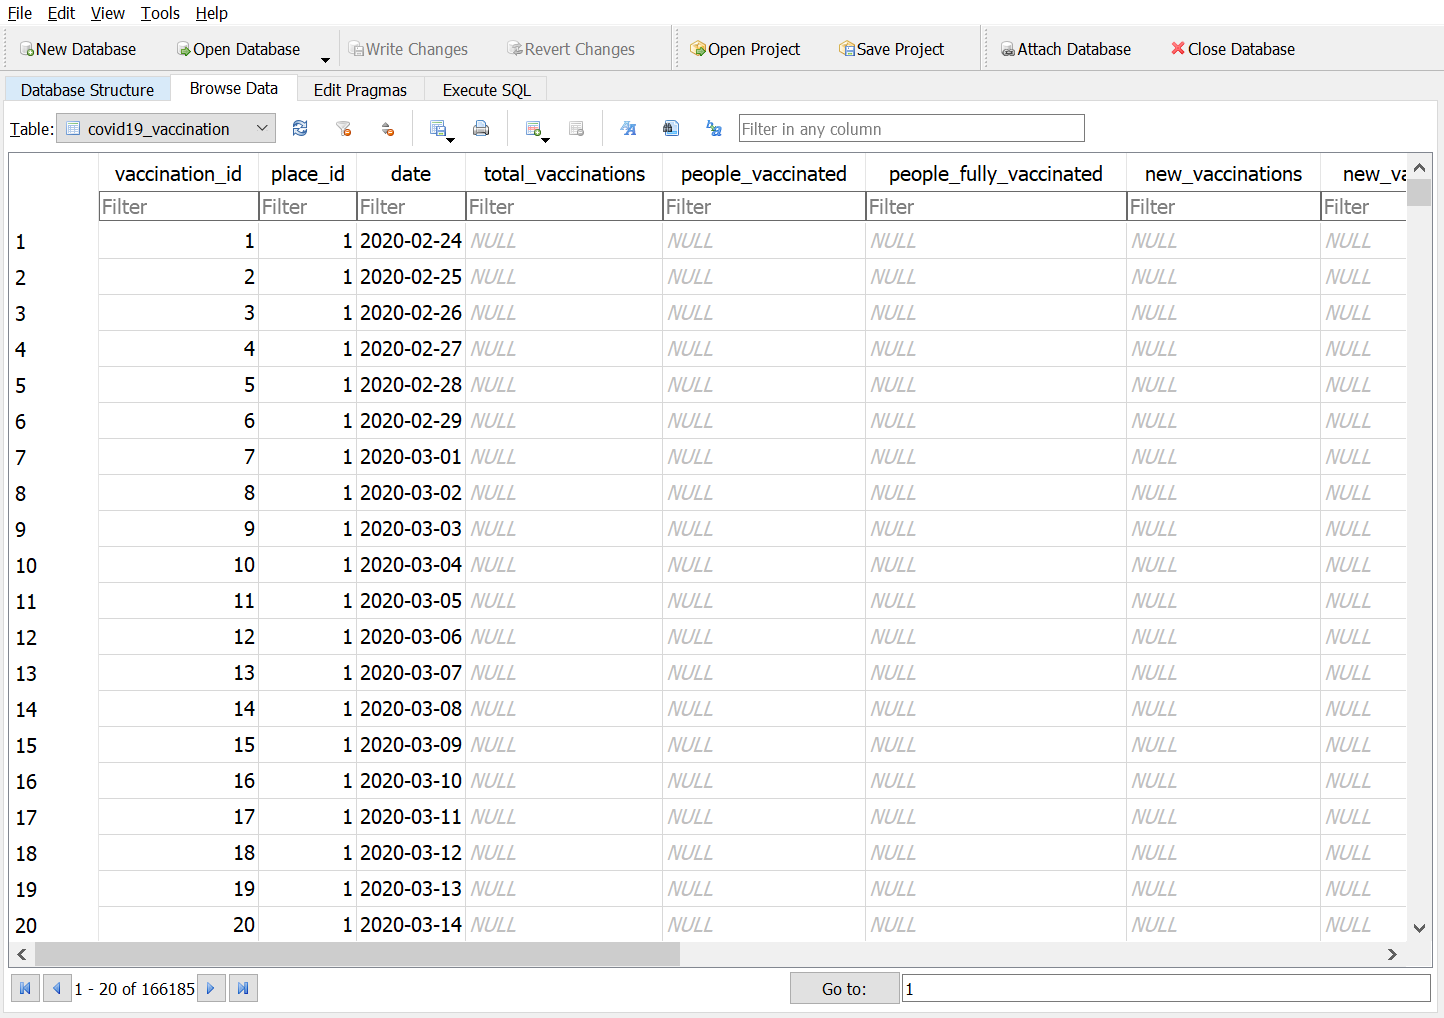

In [14]:
base64_table_covid19_vaccination =  "iVBORw0KGgoAAAANSUhEUgAABaQAAAP6CAYAAABvjloZAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P15tOTUneeL5n29et1171/v3fvuWz3cdW/37ar3qvtWd3W1q7A7qlweyuVyuexyeSwbT4DtMNhm8FQ2g8HYmMQMdhiDjc1gwMyJMeNhNsk8HCYDhylIyGRIMk8CCQknE0jg97Ql7YgtaUvaitAOSXk+n7W+65wjbW3t0E+/X+z4SqGzQgAAAAAAAAAAAAAAZgCGNAAAAAAAAAAAAADMBAxpAAAAAAAAAAAAAJgJGNIAAAAAAAAAAAAAMBMwpAEAAAAAAAAAAABgJmBIAwAAAAAAAAAAAMBM8GBIz0l/xQrpDYbx3y1mri8rVvSkC0Nd3nTonErQ1XEDAAAAAAAAAAD4wcGQjky1FTb1BjLU6/tzifazM+EKxheocBwJQ9r/65jrqzH1g55tDGXQ0/tPj6VNFB9vrXrjX38s8inaV9VxzHLcAAAAAAAAAAAA7cfZkM431aL1TRvSE+1vxoZ04R3Zw4H0gv1Fu0+Ppc3MIt6z2IemaF9VxzHLcQMAAAAAAAAAALSfGgzpNLM24abYX+EjO3y8jvw+h4NeMJa8u6fbzCziPctzqmhfVccxy3EDAAAAAAAAAAC0n9rukB6vt7ePDFf9SIc6jdcKpl9oQOsxaCXvkI76iX5PtqtnzOFjO8JHnZiYj+tQVDuGtj6zy9L7qIvy458ct71tcRvLPtKxzBzTSSl6PdXikm0//juxTW1jBwAAAAAAAAAAaDczMaQj8218J7LdlJ2UsvHFxAZmwo9N3CFd/jpqwXZXduJxHYqKxzDTZ7S9bVn9TwEpPk7pcevXWvTasm1S+8gcL3UI6rrIUfR6suuKz+10++hvdR6Ol/m6UAAAAAAAAAAAANA+pvunhqGJZjfd8v8OsBiKk1MwvpFRmGP6NWFIW/qNTE23O2tHmMcwfTzV6+r1pR+85tGysI1h+tZG0XGyr0u+3gna2Ez92oj2ZT+fIo3Hahl7Ihbp9fbX6vf1AAAAAAAAAAAAtAf/d0hbzeeoTXLZpJSNL8A6hoBGDGm12xWJO8TDvxODq3oMI8Ndt1dmrvo9NHXjjcLfvTwaouA4uRz3SWITbzPz11M5Lum+cvrOOwYAAAAAAAAAAAA7GP4N6dBYHN9daiq/zyqUjS9gEtPTpd9JsezXZmpWOYZjU1uZ06bZG91lnDW966LgOCVep4EZD5c2ln1Ed1Abx6K211YU96pxSfeV0zeGNAAAAAAAAAAALBMaukO6TsrGF5A3BosxnPs6aiXqOxxPOIb0848nOIa6H9V2dOdwdOd0f07/DBfWTMFxcjnuE8XGJH4ci83UnoiifVWNS7qvnL7DfuoaPwAAAAAAAAAAQHuZwT81LNt+Wlz6z2nTmCGtdr0ivKvXfufyBGPRpuYgeE1Gf9HjOwbB9r4Mz6Kx2ddFdzdP8QzpNKXGcBWqvJ6ScTm2T75WAAAAAAAAAACAHZcZGNLacEsaosNBfwZ3tI4Jjd+E6RdtV3QXbriNl+cUB4RmuNq/zUid5BjqO4VT/en9+HodJcc/M+7YPC58bZk2yX2o9uZrjLavy9Atej1V45JuH/2duABhOR4AAAAAAAAAAAA7KjMxpBWRcRcZpvUapLHJlyNzHJEprdWXudLHQph9130Hq+7b1u9kxzBruivi/dRz+7AF+1hN0uO2tS1uk9pHbOKO2ycN4ekoej1V45JuH//dKz8eAAAAAAAAAAAAOyIOhjQA1EOR2Q0AAAAAAAAAALDjU2pIm3dy2tQ0tjGl1RZsY7Op7djGbFMXsb2OPFUHQxoAAAAAAAAAAJY33XQNAToJhjQAAAAAAAAAACxvMKQBAAAAAAAAAAAAYCZgSAMAAAAAAAAAAADATFixZcsWQQghhBBCCCGEEEIIIYR8izukAQAAAGBmXH755fFvAADdh5oGAABQnRXPP/+8IIQQQgghNAtp88a2DiGEuiZqGkIIIVRdGNIIIYQQQmhmwrxBCO1IoqYhhBBC1ZUwpF999dVQ5jKEEEIIIYTqUtq8Yf6JEOqyqGkIIYRQdWUM6XXr1slll12WaIQQQgghhFAdspk3zD8RQl0VNQ0hhBCqrswjO9QbJ2+eCCFUTffee691OUIIoaRsX29n/okQ6qqoaQghhFB18QxphBCqQRjSCCHkJpt5gxBCXRU1DSGEEKouniGNEEI1CEMaIYTcZPt6O/NPhFBXRU1DCCGEqotnSCOEUA3CkEYIITfZzBvmnwihroqahhBCCFUXz5BGCKEahCGNEEJusn29nfknQqiroqYhhBBC1cUzpBFCqAZhSCOEkJts5g1CCHVV1DSEEEKouniGNEII1SAMaYQQcpPt6+3MPxFCXRU1DSGEEKouniGNEEI1CEMaIYTcZDNvmH8ihLoqahpCCCFUXTxDGiGEahCGNEIIucn29XbmnwihroqahhBCCFUXz5BGCKEahCGNEEJuspk3CCHUVVHTEEIIoeriGdIIIVSDXA3pzZs3y/r162U4HMr9998vv//97+Wuu+6ShYUFefjhh8N1qo1tW4SmEeceaotsX2+ve/75zPoFeezGA+XRa/9ZNj1xt7UNQlXEOYXyNIuahlDX9cKmTdblCKHlKy/PkH7uuefk0Ucflfn5ebn22mtHX1lavXq13HLLLfLYY4/xoRfVKs451LRcDOlNwUTsgQceCM9Hdc5u3bpVXnvttVBbtmyRDRs2hOagMgqfeeYZax8ITSLOPdQm2cybup63+tymx+XJ358gD819VBYXTpCnbz9M7v/t+2XtrT+R5zY+Zt0GoSJxTqEy+appfL5BXdGW4Hx/8ZFHrOuUtjz4kLx0/vmyZf5263qE0PJU7c+Qfvrpp+WGG26Qu+++O/yA++KLL8rrr78efuh99tlnZe3atXLdddfJVVddJRs3brT2gUytkl1WrJCdVt5pWYeUOOdmKc7HPLkY0g899JAsLi6G5+Ybb7xhlfoQoz5gKHPQ1seOqdvk1G9/W46aW2NZh+pQlXPv+uuv5wPuSJybPmT7evu088/Nm5+Vpx86Xx65+nPy1F1Hy2svr5c3tj4hW9b8VrY9eaGsW/01WfjNR+Txu06Tzc8tWvtAyBTnFHKVj5q2432+6epnCD77lEmZ0fKt/eSNf95XXhwOs+sffFBe3vXz8sruX5ItK38ozy/cn2njJmLBMUA7mmp/hvTNN98cXhFWH27z2L59e/g1YfWhN9tHlGQrAu2yyr5utgk4Hk9SO8nKO23tizTJ+Ck6ZZr+nDO0apdMrNt17Dkf2yoXQ1q1efnll0tNQdVW3fmS3l7rtlO/Ld8+ak7WJJavkbmjCpafepuxLK3IdBu38WDC3XaqfFvtI6GjZG6NWo/p51tVzj31AVrdiZXuI1J8rmR0qtxmbT9rTXAucW7OXDbzZhotrr1BHr3+G7L2pgNl23O/D3reKvLG87L92Xl5+Df/KNseOEJeWXeObLn/WBleuJvc/9tdZf0DBUZRV+cCu6yytJ1Q8TGo53V3b+5Q5zl158qdsrFasYussrSdjTh/6lbdNU2p1s83gVbtUhRn2zGu+7hP2l/O+cpnn1ZIm9Fy4MHyRqDXv/oN2fLww+P1yoz+7G6yfc+9RQ44MPz9+TPPkufzbnywvP+OY92GWHA+IlSnan+G9O9+97vwQ2/Zm6e6U+s3v/mNpQ8jyXdaKXda1s02Ae37HE0uM2MsEkXHh6Y/5yLpiVryQkh8PlaKs09xPrZVVQxp9RVM9ZgE9buuuy+99FJ4B4x6rIJ6ZEKRIb1m7ijDMNPSRqF9ebGhFm/ryZAODfSgv1NvS61TRmBooGP6+ZY+99Qd0OpZ0eocVOedqovqXFMfpi+99FK55JJLQjP6mmuukauvvtrSly1W8UWPVpjS1c4lzs1mlDZvppl/rrv9CHnokn+QZx86XZY23SPPPvo7efTWY2V4/Q/l/sv2kTWX7yFLDwxk6a6D5OXhifLqE+fIM7cdIgtnfFAevOSbmf66OxeIx1iX0bmMDek6z6nofEobFXfKyp0mMS/qEudP3aqzpmnV9fkmko5vXozzz4n6jvuk/dm347NPSxR8Znnja9+UN/b7jsjKw+X1fQ+Q7Xt8JXxER2hGf2ZXefUre4kE67d9dld5/j1/H25j68v+/htI1ZMwzm2IBecjQnWq9mdIq68Nbdu2LfyakfrKr3pOpXqz1G/K6jlY6iqu+kC8alXBFdpddpGdgp+2DwSzTcCCfd65Mhyj+x0FFB0fmv6cCxRPnLN35StFMaj1zpGJxfnYVrkY0ur5vOrDhfpdmc+PP/54KGUSKiP6nnvuCR/VoQxpdWdMevuR1szJUWkTLTTQTpVTj7Isz5jUZarRhIvvPs0Yfglh+vmWPvfUB9c1a9aE55s6Z5X5fOedd4Z/q3NPSS1X56IyqM8777xUXzmxis/J5mNY4Vzi3GxMNvNm0vnnQ5f8o7zx8jp5ZdMd8uw9R8um2w+Rp67ZW4YXfExuOeYv5NVn7hRZekhk8XJ547FjRRa+JfLk6bL9kUPktmP+W7K/rs8F4nlA+96juzV3qO2c6lo8OH8mVp01TauWzzdaYW3bSVauzKtxtmNc93GftL+C7fjs0w5tekZe23Mfef0bQS383qHy2tf/WV7e7fOy7dO7yKtf2lNk3/3D3zf/7XtlczAPtfZR+P6r1YZYcD4iVKdqf4b0FVdcEb5hqn+gpN4o1X/y1/8oSb1pqjdX9Y8YnnrqKTnnnHMsfYyTLLxKlrjKZE/A5Ffhxld9s9vblqm7FIJluYWjOOmjfSe/RjIei5IeT966om3G26n9J16n5bjk9xEoLvIjpY5L3jHsgqY/5+JzIHVMTEXHJxnL4piY29mOq+5jVbTvuE3eeTbWeN+29dH+OB+bkKshrc5VdXe0Mp2VOah+KuNP3Y2qPtAog/Diiy8Opf5WOv/882WYeCZb1iQL75o+9bbwjs/M8tGdq+PtouX6rlazv+j3aJ3W+M7X8XbJ5XblPUYkLb3/2+I7bSMlTcDicbn1ESs2IkdtjsrecV74OlPbl7++5mU795QRffvtt4dmtDrv1Hl27rnnypVXXhmek/a5gHmuGMtzDGn7ccw/L9KPo8mPw3gc4zbHyDGjtrZtTHFuNqm0eaM06fzzwbmPyusvPy7y4n3y6pPnywt3HSpLdx8U6Nvy5AXvC5fJxjmRdcfLG/d/W5aufrtsvOSt8sLCQG479i1GXzvCXCB+/w3ntLbxjfedHFOyL32XWnp5drvs+3O63xW77BeNKaF2v6/nnVN7/fw+2f+k++Srx90t3zvtftn9R3fIHoM75Ju/vFu+/ovfy25H3CKnH/bBcV8VDBb78ck/J9OfZ8rikhTnT92qs6ZpTf/5Zqzx+WLGWK+3nYPvkndllqnjbmvrEkfznOKzT6hUXiePWfaYtl7BefrKF3aX7XvuI3Lgd0X2P1Bk3wNEvrWvbPvUZ2Tzu/8u34x2eP+NNI6FuTx9vmXOlVqPvX0MWpyPCFVT7c+QVm/IS0tL4deB1RVbdfef+qmuEt9xxx3hP19QeuKJJ+TMM8+09DFOMn2VaTyRM9bF7ZNJn5qghYk2XjdOzuyy/Mlidp8JJSabq2RVqp9oUpYsPMm+3LZR+xhvlzbRS/rIHEe1flxYCo9hB1R2zu112l/KF371p/LoujXl51xmXaxUnMtjUnZcx32M4pI5X20qGSvnY2NyMaTVc/7Uhwv1uzIE1Xmqfl544YXhP51TX8tU5qD6aUrdrarMQrOvtHGn/lZ3eoZmVWp5+lEcyqiyGWrjZem/I0VG2NgcS48hI+e7ZsfjGt2tGhprphF3m9yWupM13P/IkHPpQy8z74rVj5sYtyt8nZa70287Nc/0bI9s5556LId6RIc6/5QBrc5hte7ss8+Wiy66KLwjS/3jpGRf9nMje1xLjqMtNqm+i8+3cbyTY8kZX1qcm43KZt5Mqgcu/rC8vvVxkZceFnlxQWTT1bJt4YeydOsesvHi98n2h48SeeRI+ecz3hLOBTZc8x7ZcOUH5Pm7j5Rbf7qT0VfJ+6tS6+cCcX+G+ZMcX6T0mPT7crJddh9l78+ZflUf4fq88bZTeefUF466Xc6/48Xw3L3o5ifCnyanXLMou/zw1nFfTnfLlcyZrOdD8nhWnzflxSNazvlTXXXWNK3pP1NrmXGNa9RoXp9sUxZDtaz4c0J5HOurd7H47NMebdokWz/5GZF9vyOifn78kyLf+GfZ/K6/LTCjA1lriE3Z+JXWo9qPPecjQnWq9mdIqw+16lmo6kOtesNUXw1Wb5Tqyu6tt94a3gWoPgSrN9XTTz/d0kcyMaOEyEtaSxKbCZZONlUgdtoleFM0loVtit4IbYXCULyP3PWJN9qSvrRctkm0schcX9i25Bgm2rZTZefcF0/eSQ6+aGf5p+P+SE49/eRsH2UxVEocE5eYlB1XWx85/SZU0obzsTFVMaT1h4snn3wyfHSHeiyCMp2V+awMQm1Eq3qsHrOgnvGbNqQjY8o0vGKTKjSlkkbY2HTLM+tc2lmWWQywhCqafqX7Syth6rn0ERt86X/wWNaP+TptRmIHlHfuqd/VRRD1X/zVOajqqLpLWpnRtn6KjnPyuJYcR9v68NjmnbuByrbP284mzs1GlTZvppl/3n/BB+W10Dx8QGTLnSKbbxHZdIVsHx4tL1z7MXnluvfI81f/hex16ptGc4H1F/ytPHfbYXLL4M/Gfe0Ic4Fw3yXjy1menG/b2lm2czkeoYrWtU9559QnD71ZTlq9OTx39/rp7eFPxbbtIi+8LHLkb5+UXQ9PPm4rOq6ReVBsTBsqO4fC9XmfjQKVzpty4sH5M7HqrGla03+mjpWI6/icTJ4ftmPseNzLzteRJt1HSZv4PMpd7zw+Qy7bJNpYZK4vbGvpvzSH26kXHnhQtn3y0yL/vK/Ixz4h8pF/Etnna/L8u4P34WCOadsmVFkMR0ofK3tsEvWo9mOfcz5ocT4iVEm1P0N6bm5OXnzxxfB5V+qNU931t3bt2vDr5jfccIMce8bh8rWffVr6P/qAfPoHfyMnXfKTVB/pJDD/Tq2zJkfUJloWXS3S7VVxUr+HRSqeFIa/T3MVzFJ09Bv9WOVFp/I2ltee20fc1vo6S49h+5U+5/Y+/a2y16/fIruf8mey24n/VQ747UflnPmfyDdWfUDe/eN/JRueWZ/swxLDjBLHySEmpcfV1kdOvwmVtLG8Fs7H2cjFkFZ3tOgPF8oQ1He7aENaf4B57bXXQum/1VczzzrrrGR/oREVm0/h73nmtGkY5xlp6eUlxldqu+QyQ/E22f2lZRuXfayREa/uGtWqYPpZX0Mg08gre53x+sI7w1uovHNP/a6+Aqwe3aHulFYmtfoKsK2PSNGxsMfAkMP5krzjOf5bG7Kl26dim2qTXZ5S3H9pO2t/9n1wbrrLZt5MOv+8/7x/iMzDF+8LOrxV5NnfiSxeFM4F9j7tLbLHqW+Sz530J4m5wN8Gc4FNN35fbj6q4vN+E+9RDu+Hpe9ptj5y+k3I0ibe1/i91WF85vLMB9TU9mWvJa9fo13xa2qP8s6pTx92i5xyzWZ59bXXZftrb8jrr78hrwV6dbv6+3X5wVlr5MMHXWvtUyk5LzLN26J5V/butPBvbW6XnmM2WeLB+TOV6qxpWvrzjfocreaARxxxhJx00kmycuVKueCCC0Idcsgh4bJDDz00/GbTxo0bM/1E55ZxvsXHOnk8bcc4/7iXzfHd4+gS25I2lteTn08TvKa8bSyvtey47KifxZVeeOAB2brzp+TVz39R5GvfENnn6yJ77SPylb1k20f/SZ5769tk8913W7e1xdCuVCysxy6QWY9qP/b551Aoy2vhfEQoX7U/Q1o991Q9o1J92H3wwQfDD7qPPPJI+PsxZx4mB6/aVS6+71i5e/0V8uMrvyT/9OP/LIefuZ/RRzbJomRSb6SpdWGxMZNsLN1mPGlT5rSZhNEbc2JSZ1V+oQgVjyFK0KjtuGDo9UUFZJJtAiWKRVkfloKkX7PDMWy70ufcl3/9Zjn/zp/Jb+44Jvzwedb8QAZXfUNOuflw2f30d8ubD/uf5KnFx40+co6xKUucC2NSelxtfTiMo6yNZZzVzq1JtgnE+ehkSCvTT5mCyvRTH1SUlCmojED1PF/1HF8ldceLuvPFlLprNdmfYWgp02pkQkV3Wo6Wj4zq1DajZbbllnZhX6bZNla2v1i1mn7R3wnz0zTrXPpwMf0cXmfGeEzf1dpC5Z176qc6d9X5dcYZZ4Tr1XMp1fMoB4OBHHnkkfKzn/3M6Mt+TO139hrHyNBoW0v8RrEp3d4W73E/2eUpcW42qrR5ozTp/PO+c94tb2x/WmTrGpHN14psulRkw6rSucBbgrnAjYf9J6OvnPc3U5b32ML3w9L3NFsfDuMYvc/a+ky2yfSTej8eKfE+rpTavuy1JI5NWi6vqT3KO6e+cNRt8ovLFuXA09fId89YIwf8eij7nfyQ7Bvo2796UL590oPy6UOusfaZUHysouOhY5k/Z0r+HbUfHeeyuOh9JqT3WdQ+J2bpsWkt8/OnzpqmpT7fqMdm/eQnPwml3p/VjTdqnvjDH/5QDjvssPBzj1qmbvpSbX7+85+n+om/yp8wnmzLbMc4f1nu+Vk5ji6xLWmT2GfJ+ArGUG2bQHz2GSk0oz/xSXn1c32Rr35Dtn58Z3nur/9Gnvmrt8tL7/9HkS/uLkv/8I+y6c92ks133ZXtIz6W5a83FYvUMR4pVY/qPfY554NW3CfnI0Juqv0Z0spYUT/V14nuu+++8K4/dXe0+kcMu/zwPXLBvQO54P6jwzftI6/6gvz4qi/KW/f5d0Yf+Ym508qVyXWZyY9FYVLtIqtU29Ebb/RGvMsq/TO1TUI5SR8rSub4qnMq0UOVFZBJtlEKX3vcprQPU/EkRK9zOYYtV/qc+9yv/jT8APqjK/aWH172ZfnBXF++e9Gu8r1LvijHXfd9+dTJfyl/dPC/MPqwTcySSsTZJSalx9XWR/G5Fqm4Dedjc3IxpG+77bbwA4V6dII2A9VP9TgOtU7dCa2UNqXVB53MHdLGV/zVnaWm2RWaUvHy5N2SNmPMttzSLs8wK1Q8xtI7Nh0Mu4TBF8uH6VfpdcavLz2uFirv3FMX8tT5p+qoulNfmc/HHHNMaE7fdNNNoVGt7sIa92U5zrFRmljmdByNvsI+jIsnpdvb4l20PC3OzSZlM28m1cOX7y2PXP0t2frUNSJbhyLPXSvy1OlOc4H/+N3/h9HXjjMXiFQ0PsuYMu/Tqe3LXkvhepfxtkd559SuR9wqR1+yXg4+8/FA6+Q7v35U9j/lEdn3V0P51kkPydd/eZ/804FXWvtMKjoeoQHgNGcyjl+4Tp+DgUrPMZtc4pHThvPHqjprmpZ6X1Z3Se+7775yZzDH3H///eX973+/fOELX5Cjjz46XK5+V8u+/OUvh6b0fvuZN3kFio+rzVwqjFfesrLztXIcXWJb3IbPPs0qNKM//kl5dbcviOzzVdn6sU/Ic+98V/jMaKWNf/Zm2fI3fyuy2+fkpfe8Vzb+5z+R5+5Ix7L8/TdSKhZ5x87rsed8RKhO1f4M6d/+9rehMai+YqSMaNOQft/+fypz950QvmFrLrznWHnzl/+10Yc9yaLkVslirisuCKF0cq4MklBf+Qmk+osMbltimirYR5ywo3WTFJBJtglUrdillCg0Dsew5Uqfc588/j/K2bcN5PRbjpJTbjpcTrrxsOCD6Jfk59d9T/qnv0f+28r/t9zy8PXJfsLjlVd8o2M0Pn8cYlJ6XG3rXWJR0IbzsVG5GNLq2X/K5FN3s6i7+pU5qKTuRlV3sKpl6W3UXa1XXnml/OpXv8qsC43no06VU49KmVTKxIqXF5pgucsdDDRH6Ts2nY3JvGV1mH55r6G0nwJVMgmbU965py506Asi6lnlSqqdklp+wgknhN90GvdlPz7hxY/EcXA7jtE5PCdzqYsq5dvnrXePH+dmc0qbN9PMPzc/t0meuPssuffsD8va1d+R1567WWTL7aVzgbcd9q/l6acfS/YXvld1fC4wUl4b+/LkuG3tyvZZtL5s23Yp75z6yME3yM/nFmUxmG+uf+HZQJtl/fOb5ang92eXXpR9T1iQd+2T/H8PVpnzNcc5UxifnVbKyl3Sx3GSY+uyTV4b+/Llfv7UWdO01Oebgw8+OHwchzKk1aO33v3ud4c3Kqhv1al/aPib3/xG/uZv/ib8RpMypFVbs49sXGKlPzNYj7FlWen5WjWOLrEtaMNnn8b1QjBvXPrYx+XVXT8nWz/6cXn2HX+d+AeGmzcuyvr//F/khbe9Q7a+932y+Cd/Ks9ekb1wFx3PvPdfrfSxcohNWlMf+4JtOB8RqqzanyH98MMPhx9w1Rul+pqRMlPUfwhWP9+2z/8lR1yxm6y8YpfwTXvl5bs43iE9Xp40pHXyJZPrzpW7GH/rqz6pAhcmZbC86pU4Lb29YXJnitBozOPxZf5Laek2+m+jqKa3KelDHSPztaeLdPkxbLfS59yHfv5/yXt/8r/Lu378/5G/POL/KZ/5VU9+du13Zbdfv1v+9ND/TW5/5BZrP2FsguOWfCOMj2XiPImXFca+7LhGfZjt7cvSymnD+di4XAxpJfUMX9VWfXBQd0IrA1Cfv8ooVB80tCGoftfLjj/++Gx/oVlluQsyNqKyZlueoZVdnr27Wht4yX2tmTs1uW+LsmZlLDX+cB+2caWWxa9p3CZaX83002PJ3olrvq6i16nWma8jams+FqW9sp176vdTTjklvCiizsMf/ehHcvjhh4dfBVbLk2a0ku04K+k7csfHwul8sRz/cdui7fPGYT9388S52Yxs5s20889nN6yVNdf9SO44/q/kqRu+Jx86LpgLHB3MBQbBXODI5FzgXYM/ksVnss9aVer0XCCh/DaZMVnGbdu+7P05uz7oIz5mmflGB5Q+pz540PXyy7nNsuHFRTnkmg/KcbfuLb+49avB7x+RjS89KfufsEZ6e5wz7iOcmxnzpVD6c0m8vHTeFStul1keqPq8ifOnbvmoaerzzTe/+U3Zc889Q0P6wAMPDM1nZUp/8IMfDKV+f+c73ynf+ta3wvfzffbZx+gjPtfMGpVeZxxT2zGu/jmhKI62c8q2LK2cNnz2aY9uvEm2vO8D8uzb35Ewo7U2b9woT/7h/y/XjNYKYxMct+T7byAV65xzKHPsUrGo/9hnxxCK8xGhiVT7M6SV1NeA1dfNTzvttPAD7apVq+TMM8+Uzx/0UfnwkX8kR13x+fDOaPVT/V32DGmtKDmy6/TykcykDhQVNyNpQ8WJaX2TNqUTOK1kko6ki5FuEyRvsq3ZXzymwm3i47HLLmFh0e0yx6eoj7goJdanxl52DNuuvHPu2GOPlT/5/v8onz3lr+XPV/5ruevReev2IyWOY6TsuRjHZKfkMSs6Z0caHde4j8Q2tmVpmeePqWxMQ3E+zkyuhrSp5557Ljx3lRmo7lxVH2Aee+yxcJl6vIL6XS1T5qHVkNbGV8Z8y/u6vs0Yy1se9x0qbTLq5YEcjb+xeW6qmmGX7CPYdk79XbGPQNqEjBS8trDftMmX8zpHJqFW+hh3Q/rcU1K/q3p54oknWtsmZT+moXINVON45Z2rOedR/vYF44jXRds4GLKcmzOX7evtdcw/lRbX3S0PXPh1ueVH/1k23fFjefzSvYPf3y7//dD/OZwL/N3R/1U2PZv9wJxQR+YC07RJjynbzr592ftzZv1onh31Fy1Pz8nbLX1OffT7N8kVd24Oztw1cvNzK+WBl06VB7aeGvx+ZLBsrfzg1DXyV18yP1eMb4pJKD2nKZ2rKWUNRFPV5k2cP3XLV027+eab5bOf/Wx4sfjss88OH62lnhP91a9+Nazz6ne1TN1N/dOf/lS++MUvjreP59sZcy9WdKzN88x2jC3LHM5Xexxt54T9PEnKHIOpdI7EKh1f1dcUj5HPPoXafP31VjNaS5nSRWb0SInjqJWKRUldSayv/dhzPiJUp2p/hnRazzzzTGiqKKm7V486+zvy9q/9QfiYDvVT/W3bDqFJlT7n/uPB/5P8H/v/C7lv3e+t7avL/maIlrcmMaS11Fcu1bN61T+wufTSS+WSSy4Jpf5WUkaheq6vbVtUg0LTr513ks5KmzdvtvzjTNS4dtBz02be1K0n77tC7v71J+Wukz8qT9x9kfzpof9rOBd45rlnrO2rawefC5SYWctRnzr4Cvn4IdfL7kfcK/v8eJ185ahHZM8jHpa9Dn9AvnLEHfKuPVfJf/nsGdZtl52W2fnjq6apzzF33XVXaErvsccestdee4VSz5ZW33L62te+Ft4V/aUvfSlso9ra+kEIIYTaqNqfIY3Qji8MaZTVNIY0mqFuO9XpTlWEZq5ldG7avt7evfnnjj0XiO6Oyt41hZCLltv5s2PUNIQQQmi2qv0Z0gjt+MKQRllhSHdE4R2n5mMNMKNRS7SMzk2bedO9+eeOORfQz/BU4u5oVFXL9fzZMWoaQgghNFt5eYY0Qgh1RfqDU5Fs26WFIY0QQm6yfb2d+SdCqKuipiGEEELV5f0Z0ggh1HbZTGgtW3ubMKQRQshNNvMGIYS6KmoaQgghVF08QxohhAJNY0YrYUgjhJCbbF9vZ/6JEOqqqGkIIYRQdfEMaYQQijWpGa2EIY0QQm6ymTfMPxFCXRU1DSGEEKouniGNEEKGJjGjlTCkEULITbavtzP/RAh1VdQ0hBBCqLp4hjRCCNUgDGmEEHKTzbxBCKGuipqGEEIIVRfPkEYIoRqEIY0QQm6yfb2d+SdCqKuipiGEEELVxTOkEUKoBmFII4SQm2zmDfNPhFBXRU1DCCGEqotnSCOEEEIIoZnJ9vV25p8Ioa6KmoYQQghVF8+QRgghhBBCM5PNvEEIoa6KmoYQQghVF4Y0QgghhBCamTBvEEI7kqhpCCGEUHVhSCOEEEIIoZkJ8wYhtCOJmoYQQghV1wr1BooQQgghhBBCCCGEEEII+RZ3SCOEEEIIIYQQQgghhBCaiTCkEUIIIYQQQgghhBBCCM1EGNIIIYQQQgghhBBCCCGEZiIMadQJPfTQQ2gZy3ZOIIQQQgghhBBCCKHuCUMadULKlITlCYY0QgghhBBCCCGE0I4jqyFt3pmIUFsEyxPbuYAQ2rFkm4sghBBCCCGEENoxlWtIP7j4CkKtkTonYXmCWbV8ReyXh4gzQgghhBBCCC0vYUijTghDevmCWbV8ReyXh4gzQgghhBBCCC0vYUijTghDevmCWbV8ReyXh4gzQgghhBBCCC0vYUijTghDevmCWbV8ReyXh4gzQgghhBBCCC0vYUijTghDevmCWbV8ReyXh4gzQgghhBBCCC0vYUijTqh+Q3pO+itWyAqL+nNxk06T9/p6MhjGTZyJ+upV37AWMKuWr4j98hBxRgghhBBCCKHlpR3UkL5QPrZihfzpIQuWdaiL8mVIp03W4aA3oWnbNope3wpZ0RuI+0tc5ob0ql2CY7aTrLzTsg55FUbl8hBxRgghhBBCCKHlJU+GdGQIZ+/OfIvsd6utfZEmMZfba0hffshbLMfl8/LLcP0sx90t035WhrQMB9KzLe8cBSZy/BpXON8KviMY0qtkF/Wac7TTyjst28RKGNJxP7usitdHfxduHypn/6N+kE31GpVTnAMzk+v55KY7V+5kea27yKp02/AcT7bLjqHesZnCkEYIIYQQQgih5SWvhnTa7ByZsX9+pFxuLC/WjmNI//Iz6oN+2pRfkP3+XC/DkM7TrA3pyKsdtxndWbyiHyyNGC+LZPY11w+Wpe5Czi4byqAXLNPG8Fw/0V96++T+xuOwU2wiJ+8Ej9om9j3qP29d0Tb1UqchPZGZVqMhnWwX92UzCFEoH4a0D0O1PtU3xlW7qHMrfWf/nbJyp+SyqN0K2WWV2S4+N3daKXemlvk4fhjSCCGEEEIIIbS8NFNDOtStR8qfqg+6n7kwu86qHcSQjl938ZgwpPM0K0M6NI0tZmy6XdLQDRck76wOzWXz0R+6r+yy0I9OGOERc/2xwZven83wTmJ/fSNi81sb73PGfhW245Dsq2yb+miXIZ2Wa7857e5cKTtNOq5lIAzpCeV6XsV3RifNaK1oLNUvvlQXhjRCCCGEEEIILS/N3pAOFN0pnbwrOLrDUiv5CIvsuqJtxtup/ScekZG4M7usj0Bnfj65PnVnd/LxG6lt04r7+tiZlnWhil9r8rUkl6f7SB/35DgDfeag0n3l95k3Htu+So5JBfkypMdj1coaxllT1748Mo1jQzZtMCsDuNeXfs9YFraJ95cxsE0s+7MY2Enyxh6TNtDTJMZT0pem8DVMzswNacvjC9J3SEf9xIZdQnl3O+ftP+4jNP3GbcaPWlD9Oe4nNe6ddlJ9pMe9SlbuZPQT3gGr7po1tkuM0WHf6eOVuKt2Os3akLbeVRybu+bjVZKPwsjGIvOojFR8x23NZcXHumyfCRUazVpx3AviFe1T76v8+E0qDGmEEEIIIYQQWl5qxJBOmrMXyi9TJm30aAttZtpNUpdt1D7G26lHYwTLRndml/QR39FsGsi//EzaeB0/fiPctuhRJE53httfa/a1FLc1l6XHGbYJx+m2fXZZ9Hd2PBMckwryZUinTdboLt/xncNWIzbPDE4YstHjOPS2yqxWv4emdbxh+Lu+yznu03rXs3V/0djqNKQjQz16/ZHKDen8bepjpoa0zcgLl9kMadvfecprFy03DUu1/2S7VbIqZSxGxqlhSmbGrU3m5LgTbUZGsmHAxubruJ+SfWfaq/UlZmkFzdqQtpm04es1/o5M2vExK1sf7jdcb9t/epl9jGX7zMhiomflcDwS55VD+wmFIY0QQgghhBBCy0vNGNJlj68IDeuKz1V22SbRxiJzfWFbS/8WAzutxN3DVmPaNu681+/SNm/bvHXT9GlZ7nBMXDUrQ1ovj0zjnDZ5dwKnjOPQ3A7/UOZ03D5sE91FPV4fkTF3xx0llxvKNZwLTOSQuM9oF/FrNl9T4jXa+irbpj7qNKTTxy+SNvpiMzJt4vk0pCc1/BJjmmTcVZalZPab2Ef98mFIZ+OvZLwG83EXmddnOT4JU77o+Lkcb5c2gSwXAtJK3FFtM6bN15lep+X82qYThjRCCCGEEEIILS+1xpBOPupBqdyQrryNxSDN7SNua73D12q0Rvt0NV+T+y2+G9z++h3aFhrCrvtKL7O1CVTDMSlSqwxp6x3LAWlDNvy7L3Oq/ejO5+jO6f6c/hkuTBH/s0PdV97+Csl7fRGR+R0/XsRmJJcZ0qXb1EedhrS7+Wao0Nh1NenyTcXxna7FfSUMxlDxmCYad5Vl5fsuvFt3CvkwpPOOryl9R/JOO6XaW4911G+4LC8WRrvi421pU7bP0bJ8JeOXvLu98Hgk9m0bfz3CkEYIIYQQQgih5aVWPLJDtU3cjVx6t/Mk2wRKmKZlfVjMan1Xczx+m3Jfc57ivqLt8l9rtl+HtnHfMzGk6zwmFs3MkI7N32h5nqlrX54weRVhXz0ZDPqZO6F7g0HQR4F5mzChi81lOwXbJF5jAIZ0pDwzsUZDOp0bye3y+tLb6jEEMsc00bhdl5XsO/g7Y1YXPiaimpoypHOfrxy+duO1Ggr7jdfbjWL3451oU7bPUV8OivuKtnM4HonXU+X4VROGNEIIIYQQQggtLzX4Tw3ju4JTJnCoxDJLX5NsoxQa0nGb0j5Mxc+f1usK7zyuqmiskdltG3fesXRo2/gd0vVpNoa0vjNZm8r5pm5kPhvma9rkDdH9pe5uDo3bYLnxvGjVn9kmbW5n9hcwHPQLzN+cset9J3eWGnu0rbm/8PEi5vOtHbapix3JkC5ul9MmsX/LMp+GdNm+R9sppZ9bPb2aMqRDk32nncLjmmifd6yd1rvEwNKmbJ+VFPUfXTTIMd0NRRcb+KeGCCGEEEIIIYTq1ewN6di4HK2bxFyeZJtA1YzwlBKGa8Hrq6rE8bD1m7cvl7ZF43Tdl2ufRfuaXr4M6dCcNZX4p4L5hrQiMonH29raRf8k0bhrOiTet8UUHveXNXbT+7P+A8QROa8vzzDWRrVuo+7qTrQ1+zMf9VG0TT3MzJDOa1No7LqadHXt37ZsknE7Livdd0q1mqcNGdLma8i81rI+itY7HG+nNlMofm26L313e5GBPr7jvcZxpIQhjRBCCCGEEELLS7M1pEPDN/iAa/5Dv7RBHW9rGsO//Ezwt/ks59Jt9N/62cyWbUr6UOa1ebdvwswe/Z00ry8/5PN2M1spfO3GeELpO6/HyzOvNe9YBkq21X0l22bHGfQXb5Pdl0uf+eOpfEwqqH5DGrrC7Azp52XVLup813eEKsWmXIGxG25T+gxll/3ntEmZiNkxWcYdb1M0bqdlJftWhqZpZibvqJ1eszek0/8gMnsXcfQaTZNaLdtl9Hd2fbDfePvkuaLvKE+OyXY+le0zo9BIT8dB7y+5PDp30qZ0HOfEOFyO32TCkEYIIYQQQgih5SWvhnRoPieUNCtH0ka1bnNI+k5lsz/zDue8bWLT9DOfD01n3S5johb1ERvWifWpsUcGrNEmZe4mNTZ3i7dJv9Z8AzjZVo3P3jYzztEFgfS+XPq070Or2jFxF4b08qVOQzpxbhrKGIKjdbvIKsc7jUftR8tNuZh5BW3CMeh9BGNZmb1LedJxly4r2vfI+DbW55mkE8iHIT0ea1I7rbzAatiOXqPxbOzIIDa2txrIxvrUXcbRcnWs8mMQtRmPpWyfSY3NbqdtEjGOlD0Pi45f3nnvJgxphBBCCCGEEFpe8mRII1SvMKSXL5hVEyo0GaczCpsWsZ+9bHdj+xZxRgghhBBCCKHlJQxp1AlhSC9fMKsctGqX8judOyhi34Ayj2nxL+KMEEIIIYQQQstLGNKoE8KQXr5gVjnI6ZEL3ROxb0ipR7H4PpeIM0IIIYQQQggtL2FIo04IQ3r5glm1fEXsl4eIM0IIIYQQQggtLyUMafWhEKG2CpYntnMBIYQQQgghhBBCCLVbpu9sKmNIAwAAAAAAAAAAAABMCoY0AAAAAAAAAAAAAMwEDGkAAAAAAAAAAAAAmAkY0gAAAAAAAAAAAAAwEzCkAQAAAAAAAAAAAGAmYEgDAAAAAAAAAAAAwEzAkAYAAAAAAAAAAACAmYAhDQAAAAAAAAAAAAAzAUMaAAAAAAAAAAAAAGYChjQAADTOvffeG/8Gs4Zj3xwcewAAAAAAWI5gSAMAQONgzDUHx745OPYAAAAAALAcwZAGAIDGwZhrDo59c3DsAQAAAABgObKsDenf/OY3CKEZCaAIjLnm4Ng3B8ceAAAAAACWI8vekF63bh1CyLMwpKEMjLnm4Ng3B8ceythvv/0QQgh5FAAANAOGtMU8QwjVKwxpKANjrjk49s3BsYcyMEsAAPxBjQUAaA4MaYt5hhCqVxjSUAbGXHNw7JuDYw9lYJYAAPiDGgsA0BwY0hbzDCFUrzCkoQyMuebg2DcHxx7KwCwBAPAHNRYAoDkwpC3mGUKoXmFIQxkYc83BsW8Ojj2UgVkCAOAPaiwAQHNgSFvMM4RQvcKQhjIw5pqDY98cHHsoA7MEAMAf1FgAgObAkLaYZwihelW3Ib3h2SU55JRb5MPfuVDe+pWz5P3fPl/2+snv5Oo71sn2116PW0X8au4+2bL0SvwXtJW6jLl71m2Tc295QX61+lk58Xeb5JdXbZKfXbFRfnrp0zK4ZL0ceeGTcthvH5dDzl0r3z17jXzn9EfkZ3OPx1s3x+V3bpADznlA/vHIW+QDgT76k9vko4N5ef8Pb5SjfrsmbuUHTNHmWM7HXp/znzzm9uBcV+d7rPjc/+iPb5U9TrxLBheskVe3J+v6LLlkYUn+9tj18g+/XC/rn98eL50dmCUAAP6gxgIANAeGtMU8S+v6ezbI2Tc+V8ngGJz/iLUvhJaj6jSkV9/1uLxtz7Ply0dfKz8+/14567rH5KxrH5WfXnCf9I+8Sv56n3Pk8tvWhm3Pu24of/aF0+TFra+Gf8+SN954I6ydTzzxhDzwwANy++23y/XXXy9XXXWVXHnllfK73/1ObrzxRrnrrrvkkUcekU2bNoXbLFfqMubOummzvLRteyV9+9cPxls3x/sPu1Ge2bJNnnvpZXn2xUjPbHlZHli/Rb5z4eOyx7FDb6ZcnaZoly4IbNy4UR588EG555575O677w515513hrl62223yS233CI33XST3HDDDWHuXnvtteG6OvFhSC+9+roMrl2UlasX5ec3bZKfXh/8fvVG+d7cenniufZcnPvGqfeE53l4zhvnvT73VT7o8//Lxz3SqCn9jsHj8okT18d/zRbMEgAAf1BjAQCao2WG9Jz0V6yQ3mAY/23DpY0brob0GTc8azUxivStUx+w9tVKnbyzrFjxJjnoWss6hGpQXYb0o+ufl3fsfbYc+Zt75cSrH5FTfrdGLp5/Sq65d6PcvuY5WXj8ebnmnqflQwdcKLsfdaX83TfPkzfvfnqQk7M3pNeuXRuaV8pwUoa01v333z/6fWFhITTAlDE9NzfXqrslX375ZbnwwgvlpZdeipf4pa7XftI1z4Q1+PSFE+SUe4+TE+8+Ro67cyA/nT9CfnTrSvnhTd+TQ64/UL577X5ywO/+OWy79/H3xVs3x4eOukVeWHpF7njitUDb5Za1r8h1j7wsL29/Xe5Y/5ocMve4HHLWQty6Xuo877p0QUDlojrPq+iaa66Jt64HXzl/7WMvyU/u2iw3PbVVbnxiq3z3yg0y3LBN2nTNa+ejb5MtW1+Vm9e+Kreu2y63Pq7O++1y42OvyLXDl+Wy+18Kzn+Rix/cKt85f53s8bNmTOmHNrwi7zvmKdnrrI3y7fMWZfdfb5DL75tNXVRMa5YcdNBBtZ+3kA/HG6BbYEgDADRHLYa0MohXlMjNQG6nIT2pwWHra7Y6WXZWx3/nky3rDOUa0tfKQW9aIW866NrU8kjXHvSmRIx3Pjnbpp1yPC6VFPWZPFY+9tNN1WVIrzztNvnST1bL1467Uf7yy2fJn/dPk7/8ylnyhSOukFOufEgefPIFGa7fIms2vCg/POtOueXBRXnbXmfLUgOGtLqbUpm569evl4cffji8C1OZz/Pz86HU78qMUuuefvpp2bx5s5x11lnx1s2ybds2Ofvss2XVqlXy85//XF544YV4jT/qMuaOv3pTWINdUW2/9PPfx381xwdjQ/quJ16Tu558TW5b96rcsOYVeWzjS+Gdohs3L8l7vnt93Lpe6jRFu3RBQOWkMpn1HdL67mjbndHKYFJtL7/88njrevBhSCvP+YerN8qZ978g37tyg6y8bpMcfPF6ee7F2T9uIo+tQY3Zbc9vyRf2/KZccssa+Ux/b/nEbl+R+dCUji7GXHH/0uiCzK1Pver1okwRv77lBfnE8U+FRvTgiufkH49+Qv7bQWvk8Wdm876SNkuU4WnTscceO1p/zjnnhL8r1N+mQZr+u27S+19u+D6+AFAvGNIAAM3h4Q7paQzjdhrSkxoctr5mqykN6XC53ZCOzOid5WS9rKBt+4QhPWvVZUi/Y+9z5B37rJK37nm2vHOfc+TUyxZk0/Nb5ZaF9fLZQy+VLx51ldwx3CSPb1qS9c9tDfVXQdut6ja7GaNMrMcee0xefPHFsIYqw/m5556TZ599VjZs2BAeF/WoDvVID9VGmWFtMKSVGX3GGWeEY7ngggvkF7/4RfgBW43bJ3UZc8ddsTGswWdcv9FJqu3nf3pnvHUzbN++XT5w5E3y/EuvyL3rX5N7n349vkv6Vbny/iW55L7gHHrpZXnvD26QV16p/5ELdZqiXbogoExoZTKrR+W4SLW99NJL463rwYchfc5dm+Wih1+Uwy59Wu549CU56rpFOeCCJ+W2NUtywEUbZPez18uXzgp0xlPyxV8/Id84/cl4y9mwdes2ueyaG+X7Pz5B/vZ9H5IzL52Xv33/R2TfHwzkoCN/KTcF41QXY656aOvogsyLwXni86JMEcqI/i8HPhb/JfKBwePS+/6jct2DS/ESv9gM6SLDM20Ip9v7NkzT+19u+D6+AFAvGNIAAM2BIZ0yzmya1OCw9dVKpQ3paw+SNykjNVbGZI7Xp++IPnln1d4wqZeVbIZ09/XWt75VfvWrX1nXKamvvH/4wx+Www8/3Lpeqy5Deqf+aeE/MTz1yjXy9/98njyx+GK8JuKiG9eEd03f/MBGuenBTfLEM0vyV3ueJdtemb0hrQzoq6++OrwDWhnO6m/1nGh1x7QyqlVNffTRR2XLli2hGa1MYPVM26Y55ZRT5PTTT5ff/va34V3Sp556qhx66KHyve99L27hh7qMuWMufXpUrxVn37Ah/Kk59+bk35te2Caf/fF8/NfsUbFfuXKlvO+HN8rml16RB55+Qxaefl3uWf+a3L5ue3in6NUPbw3WvSrv+f4Nsuuuu4bPIa+TOk3RLl0QUMdemczq9btItb344ovjretB9Vsnjz3zihxx4zNyyl2b5a7HXpIHn9gqJ9z0rOx33pNy/YMvyncv2Cgf+fWT8uULNsge526QvU95Uo65eLZ15/ktL8pn+nvK3t/+gfzFO94r+x16rLz9vR+Tb3z/aHn7335ArrzryfBijDr39QWZi+55Ibwo875Db4p7mQ0vbH1d/uTAR2Xv054O/34++PtDvx7IR087TF5/YzaPD6lqSKeZtSG93OH4AnQLDGkAgOaYsSEdrdNGZ6R+sFQz3nY46I3b9AYy7s3ef6J9ok/FUAa97HJXQ3pSg8PWl03pR1+Yd9Sm140Nz+hxGivedJBcG7fVCo3hcHmOSRrfzZyU7ZEdRdvn3VFt68cm9/Enx5k1vKscv2hd+nXpv0+OxhS3Tb7uorHkrUvvJ1J+TMd9FY9ldlJ3+eaZ0tqM/sY3vpFZl1ZthvQXT5czr35INjy3LXz26OtvjB+I+trrb0j/iCvlJ+f9Xp5+bmv46A51h/Rbv3KmvPzqa3Gr2aJqp/qKv3petDKl1aM51F3R6hEB6vnR6lEYbTKjFT/60Y/kkEMOCSfoX/3qV2WPPfaQ3XbbLZRP6jLmfnzxU+G5cc5NG+VcpZsX5Tc3b5S9fn6f7H/SffLV4+6W7512v+z+oztkj8Ed8s1f3i1f/8XvZbcjbpG7H3ku7mU2rFmzRn75y1+Gj4n4hyNulmdfekUe3PCGPBDo3qdel98/+Vr4fN3r17wSrHtV3vuDm8NHSKicu+OOO+JepqdOU7RLFwTUcdeGtLoDWuWkeUd0+m918Ug9V71O6jakD7lkvVz8wBY57fbN8subnpFf3fiMrH5oi3znvCflycWXZZ+z1ssHT3pcPnnC47LrGU/KYavWy6vbZ/tg6WOP+6W8/yOflMHJ58sHP72HfOEbh8o/fPxzcthx58h7P7iz7LXvD8KLMTc/FpnS6oLMlQ9GF2Xet/KWuJfZcOk9L8o7V66Vwy5+Jvz7a5ceK4P5w+SIm74vR994ZGhKf/KEL8mZt78gXz9vUfZZtSgHXPiMnH9X8mLpNExyh3SeAa1+T0uj2tiWK9Tfar3ZJg/dVqP/Vo8U0dua6/PQbU2ZqL+L+lXLbXdqq2X68SZ5qH50n0pmP+l16deSXlaljfla9BjzXp/Ctl26DQAUgyENANAcMzek55JOscz1leGmjeKxYT3ePjaT+3rDbP+RGd0TvSjsM2FiT2dI5xkc5926Uc4PpD5gq5/n37JBLrl9gzz69Bb5xOG3WPtKKzInTRP3ZNk5Nmkz6+I7k0fmpNUANk1QiyEam9GJu5tzjWS7oZrbPufO6Vw5jP/kkruwKx2/0br064r+ThyXzNjKxpLu076sNKZOY5mtbKZ0FTNaqS5DuuhZ0N896Sb5sy+cJu/79m/lQ/tfGOmAC8NlrzRkSCvUndHqrsr77rsvNKB///vfhyZ0G83oJqnLmDvygifkhaBen3frYvj3+fHPLxx1u5x/R2QSXXTzE+FPk1OuWZRdfnhr/NdsUM/nVhcn1CNcvvOd7zhJtVXPNt5zzz3jXqanTlNUv1/KMcdE+tnPIh1/vMiJJ0a/q5+/+IXIqaeq//4Zvl82wW233SZbt24NH92hpGKhpI6Hkv5dX0BSc6Hzzjsv3roe6jr2219/Q8695Rk5687NcsAFT8lvb9gkF9+0SY6/6Ek54dpFOejcJ+SU322ST532lHzm+Cfkd/dskY+f+IQcfNpsH9eh2HX3feTju+4h7/nAx+Tdf/d++dZ3j5Q3/8Xb5S/f+W5501veKn/4R38cXowJTen4gowyptVFmb8/dLbnyr7nbJTewY/Kf//uGvk3ezwoHznx53LYjd+VuUfOlwMu+6a896cDee/PnpRdf71B/vKIx+VTJ62Xvc/eKB/7xZNy7h1b4l6mo05DWmHbXv2tluv3orRpq9bZtrNh25+Seg9UqJ/q77L3Pd1eo8akttOU9av/TmNuYyN9LBT6WKTXqZ/q7/TrLfpbYWujlH4tSul9mWPP284cOwAUgyENANAcMzakLcz1ZWwm52xb2MayzXAgvWDZyMPOwdWQzjM4NOk7voZPvSAfPfQma19J2UzM4nWRoVlggobmZd76+K7k9DONcw3PnPHlGc9VDenS8VuUGGvO+EJVWWdrW7R9rNKxuOzHIaYuY/Es05SuakYr1WVI//c9zggfyaG0U//08I7pNwf6yo+vlg3PLskzL2zNaONzs3nOZxHq2dHnn3++3HXXXeFjO5QZfd1118lpp53GB8eYuoy5leetk+dfelUunF+Ui24f65OH3iwnrd4cttnrp7eHPxXbtou88LLIkb99UnY9/OZ46WxQd6K/9tprodQ/ulR34BZJ/aM93V7dvV4XdR17hX6/DA1oZZIo81n91FKGtPn3cBi+XzaB+ueFypBWr39xcXH0U0sZ0ebfKo/PPffceOt6qOvY3//EVvnBlRvk+BufkXsffSleGhzeJ5bkwFWPy35nPC4f+uU6+VigWx96SS6+dbN84hfr5KvHrY1bzo4v7rOv/PbyG+SoX54pX9/vu3Lx9ffLpz73FTntt1fKEcedIe9+/4fDbwjc/eR2uf2J6E7pmwItbnlV3nNIMxcvTM646xTZb+6rMrhxTj56/Hr5wmkb5NjVz4frfnr1c7Lrr9bLx497Sk64Nqo302IzpG3Sd/Gq36c1SNPmp22bPCbZnwtps9Wl3/Tfuo8ibP1qbOvU32af6Ta2bSZpo5h0OwDIB0MaAKA5GjGkk4/XUCoxpBMGc6qN1XyO2tRlSOcZHEqX3rkYGtLhXdK3bJDzAj34+PPykUNvsPaVUJGBm7cuZR6PH29h/D0ynFNGpmOfY+UZobGxnTKOozuGqxjSZeOPFBm2Ud+R4rFOcvxCpV+XuwmcOxaXPpyOv/tYZi1tSr/nPe+pZEYr1WVIKwP6qWeXAm2VJ59ZkhMve0A+sN8FsmUp+4/etmzdLo9teCncZqmBf2qYRv1TQPU85ldffVVeeuml0JC+7biD5LIP/Ru56q//pVy787+TR888LG7dHKtXr5YrrrhCLrroIlm1alU45uOOO07O/tYn5ebd/pO3sdZlzH3vnMdk84uvhLVZceXdm8Kfnz7sFjnlms3y6muvy/bX3pDXX38jfMzLq9vV36/LD85aIx8OcmyWHHjggeE/KVRSx1o9W1wZ0zapdb/+9a9H7dWzpOuiTkNav1/KySdHd0CbOvPM0JC+7NhvyzeP+aT0f/QB2fWwv5V/OGj/eOvZogx+ZUiru5/TUo/ZUYb0lVdeGT5TXf1zT3X8leqkrmN/5JUb5GfXLsphlz0tg0ueCpfd/fAW+dZpa+WM656RTx79qOx62pNy1G/Wh+uuuON5+adjH5M9fvJo+Pcs+ezuX5VVc9dKf5995WOf2k1OOPsK+XR/Lzn9gqvlS984UP7v//Km0SNr7nj8NZlft11uDbRl23b5m+/O9qJRHu8/5m/kaxdeJZ85eYO85XtXB2OLnif9vQufkV1PWi//cPQ6OevWF8Jl0+L7DmnbnbcKc1l6myLK9qdw7U+1UW1NVTGk03d6q7+1cW8j71go8tZpkztvXOm/FZO0UUy6HQDkgyENANAcMzako3Xm4zWc7pAuMqTD7U2DcCz7GMa4GtJ5BofmirsWQ/NLowzpzx7l8MiO0IjMMU3zTOK0qWkxM8f9TWKImioyQrUpPdbOO+f1UyCH8Sf6NNuHv1tez6hdzrrM67K9Tnub3LG49JFobygRF5exzE433nhj4m9lSqsPO+YyZagomcvSqsuQfvPup4fPhb7hgU1y60OL4Z3Sq65J1qatL2+Xd3/9N3LeDevkgJNuCR/ZoQzHNqBMaPVPDtWjAq447Gvy+2/+pWy75Ch54/7L5KWzvia37/kn8vhvj4lbN4Myo5XUB1r1/GtlTJ+3/65y1zd6o7EueRhrXcbcgWetCev1FUGdVrVa6wtH3Sa/uGxRDjx9jXz3jDVywK+Hst/JD8m+gb79qwfl2yc9KJ8+ZLYf4tWHIGV8KqnHdzz44IPhcbdJtVHP99bt3/a2t8W9TE+dhnTZ++XgvBPl4FW7ysX3HSt3r79Cfnzll+Sffvyf5SfnHRy3mB3qedzq4tBwOAyfEa2e6W0+M1qtV4/bUcdbPSpFGdTqkR02s2pS6jz2eay68Tn55K+ekM+d+qR86oR18v4fPSr/9NNH5fMnrpM9jnpUnt0y2wt2H/nk58K7oz/zxX2k97a/kZ+c8Bv5h49+Sg46/Gfysc/05V/9638bmtF3Pv6a3B7o1rXb5ZZ122Xbq6/LO/a7Pu6lOT51wkfkbT/47/Lm/f5U/tt+B8l/3f9n8sVfb5A/PvAx+cejn5BDL9okf/StR8J/gFgHvg1pbajapNuZv5eRbmvb1qU/1UZJG71lxq8ivUybyOqn+Xseeh+2HE/vX6P71duo36u+fpc2ikm3A4B8MKQBAJpjtoZ0wnyOcTakc9o4Pp7DhqshnWdwKF39+01yyR2LCSlD+lOHOzyyo+guXmfz2DArw3XmXcspI7NWQzqr8O5h425nNxWM3zYuc9kkxy9U+nXZXmdqWdlYXPpwOv4O/XRQdRnS/333M0JD+olnluTJZ5fk2nvWy0cOvEh2Pewyue/R6J9OKYP6vd/8rXzggDn5iy+fGapplLmluOyyy+TRRx8NnwF82Yf/rWy95CiRo98vb3zrf5HXV/6hbDr87XLdp/4gbNsU27ZtC59rfdZZZ8kFF1wQ3hl6/vv+19FY5Vv/L5FD/33tY63LmNvvtIfkuaBe/+6eyAi95t7o565H3CpHX7JeDj7z8UDr5Du/flT2P+UR2fdXQ/nWSQ/J1395n/zTgVeGbWfFN7/5zfAOXKWjjjoqNDTURQCb1PH5/ve/P2r/n/7Tf4p7mZ46TdGy98vP/vDv5IJ7B3LB/UeH7Y+86gvy46u+KG/d59+Ff88SdYFNGdLKiLZJ3Q2tzGj1aA8VA9VeSeVHXfg2pO98ZEk+fexa+cefPCr7nfiEHHfh03L8xRvkKz96VD73i7Wy66FDefjxrXHr2fCxnT8jn/jM5+S/ve198oGPfFzeeeic/Lv/+lb5gz9/h/zb//vN8r/98V/Ihy7aFuqDF26TD8RaeuU1+ctvzPZbDHmoO6K/fPoG+dhxT8mHj31KPnrsk7L3aU/L505cL3uetkH+/qh1ccvpaeoOaZOyfZqU7U9R1p/N/E0vc+1X3SGtlimZd0vbKDoWeevKxmUb0yRtFJNuBwD5YEgDADRHJwzp6BEfyX98OG5TsL8SXA3pPIND85ubk8+UDu+QPnIWz5A2lr3pIDlo5zIjM2d/NrM1VBUjNLpj2q1tUrnjn8gE1qqyztY2tWyisbjsJx1Tl366p7oM6d4eZ8qDT74gx154n6zd+JKs2fCi3P7Is/Lj39wjH/7ORfKW3c8InzPd+9IZ8tY9z5b3fft8+c6JN8ZbN4t6NMCtt94qTz75ZGgoXvXOfylv3JH8B2mbD/pX4SMxmmZpaSk0SI855hjZf//9wzH5Hmtdxtw3T3lAnt3ysiw+v03WP7tVHl98SR59+kX5yME3yM/nFmXxxRdl/QvPBtos65/fLE8Fvz+79KLse8KCvGuf8+NeZsM+++wjl1xySShllBx88MGh9t13X9lrr73Cx3J86EMfkr/+67+Wd77zneEy3f4P//AP416mp05TtOz98n37/6nM3XdC/FfEhfccK2/+8r+O/5odyrRRhrR6HIq6aKR/aqmLMSpfzWXKmFbL68K3Ib338etkl5Mel5VnPiFbXx7fsXvhDc/IBw5+WHY7ZCiPrd8WL50t7zzgenni2W2y13Wvy8kPipz0gMjx94scF/z8WfDz2EDHLIj89D6RL/xuu7y0bbu8+StXx1s3y87HPyWf+MV6+ejPn5Tjr30uXPbz3z0n7ztynfzdEevk2CueDZfVgW9DWlG1zyLq2F+dhrT6W9VXJZvRnKZobHn9q+WadBvbNpO0UUy6HQDkgyENANAcszWk47uZ02Zy2pAem88BOduY/UeGddLoHg76xt9DGfRS/Qa4GtJ5BsfwyRdC89mmzxyRfNRBniIz0jQ6T5ad47uMM+viO2wzxmS8PGOYWozM6DnP2buos9uO15UboTn/LNFVeePPvN7sWCsdv9G69Ouyvc7UMoexpJ+Hbeu3PKYOY+mg6jKk37L76bLLYZfLxw++WD723Yvl4tuekFsffkau+v3Tcv6tT8jJv3tUDlt1j3zv9DvlR+fdK2/f62x5dH30z6bawKWXXhqaXk899ZRc+ZF/Iy+d+Lng0+O/kpf/eYU8F2jd7v9CVn/i/4hbN4v6J3oHHHBA+Ozraz/xf3ofa13G3E8vfky+ceKC7P6z38vnjr5TPvOjefnk4bfKBw+6Xn45t1k2vLgoh1zzQTnu1r3lF7d+Nfj9I7LxpSdl/xPWSG+P/GeL+uDLX/6ynHnmmaHBrIzoc879rVy9+karzjrnN/LHf/zHYdvjjz9e/sN/+A9xL9NTpyla9n751r3/vRxxxW6y8opdwvYrL9+lsTukr7766tCQVue6mueof1r4zDPPhP/AUD2iQ90hffvtt4ftVO6qx3eoR3aof0ZaF74M6bvXLMmxF26QDx31qHzgiDVy4Y3Pyqvbo29qrH16m6w8dZ28/8AH5UMHPCCnX578x8yz4u3fuk4e27Qku1/zunzx6tdC0/nzv3st1G7B35+7ervsetV22UX9fdVr8vL21+XNX74q3ro5bnl0q7zrqMflsEuekT/eL3o0x7pnXpW//P6j8tXT1sufBcuuu7++f6ZbtyGdfq6yQq1X7UwDWC0rMn/zKNu/oqw/tV9bP0pVDWndl5ILantzPwp9vNLr8sZp/p0+3ur3sm0ULstctwOAfDCkAQCaY7aGtCLxzOeeDAaWO6T7/dCE1u2Sfdn7z/yjxN5Axi2mM6SP/M2D8vUT7ssYHB9bebN86JDrrfrGcTdb+7IpMimNsRvGbnqd3ZSMDeGEGapkNzL1Px+MtLOcnL77d2QQJ5XoJ9xmvM7+aAxX5Y0/UGI/wRgPyt6pXOX4RevSx8XRBC4dS7RNtF6Z/vbjXxxTx7F0THUZ0up50EecOR/+ftXt6+RdXz1XPn3oZXLIGXfKz+celF9cPpTDz71X9j72ennbnmfLpbc8FrZtC8rUUndKv/zyy3LsZ98uN3/+/yvrv/XvZXHffylrPv8/yO8+8D/KmjMOjVu3h3WrjpTb+n/kday+7xT96Pdvkivu3Bz8tkZufm6lPPDSqfLA1lOD348Mlq2VH5y6Rv7qS6vCtrPilFNOCT8IffzjH5ddj71Ztm57RZ554RXZFGjj8y/L+me3yTpl6G7YIltfflV2PeZm+YM/+AP5+7//e/nZz34W9zI9dR77vAsC+v3yXd/6snz4yD+So674fHhntPqp/m7iGdLqn0VeddVVocmvzOYLL7wwNJzPPffc0ERSj+ZQP/Vd6Wr5iSeeKHfeeWfcw/T4Ou//8cePyft/tEbef+Qj8r7DHpFdDhvKtleiO6R3/u5D8vffeVDee0Cg/R+Uv9/vgXD5rHn/ATfKpi0vy2PPbJNHN22VRxe3yiOxNr34aqjFLa/Ki9tek5defk1ef+MNeX8LniF9zm0vyPt+vE6+f8Em+YefPCH/4esPyx9942F5z2FrZZ9Tn5ZP/fQJedM3h3LdwkvxFtNRtyGtUMu0NKqNudw0UdXfriZnuq1tW5f+9B3RWnp8VQ1phcpjJVf0vrTMbdPrXMZgtncxsRUuy1y3A4B8MKQBAJrDgyHdHVwNaYTQdKrLkD7wxBvljegmvxD1zwqvvmOdfGVwtfzdP58XPq7jA/udLweccIM8vnFL3Ko9qOfSqrtb1fF4/PHH5Ynzj5XrPvUfwkdfqLuQ22hGa3yP1bchvevht8nHD7ledj/iXtnnx8E5c9QjsucRD8tehz8gXzniDnnXnqvkv3y2vmcDV2W3n90iXzjuNvnCz8f6fKhbQ6l1ux17S9y6Xnwf+zTHnH+IvOPrfxg+pkP9VH+3lYWFhdCYVo/pUHdG12lGK2Z97NvEOasfl/5Rt8vbv7padvryVWN9KdKff+nKSHtcKX+x19XyuSNuk/OueyLeujnUHdH7nbtR/s99HpL/fa+H5O9+uFaOufxZOeayZ+U/7v2Q/MevPCTfPOUpef6l1+ItpgOzZDq0AayNbAAAE2osAEBz1GJIm3d7FqltYEh7Us4d1kkl73JGO7bqMqRhx2U5G3NNw7FvDo49lIFZMh3qbuH0I0oAADTUWACA5uAOaYt5hhCqVxjSUAbGXHNw7JuDYw9lYJZMB4+wAIAiqLEAAM2BIW0xzxBC9QpDGspoizFn/0ZHUjsaHPvmwJCGMjBLAAD8QY0FAGgODGmLeYYQqlcY0lBGm4w5mxGqtSPCsW8ODGkoA7MEAMAf1FgAgObAkLaYZwiheoUhDWW0zZhbLoaogmPfHBjSUAZmCQCAP6ixAADNgSFtMc8QQvUKQxrKaKMxtxwMUQXHvjkwpKEMZZYghBDyJwAAaIZlb0gjhGYjgCLaaszt6IaogmPfHBjSAAAAAACwHFnWhjQAALQDjLnm4Ng3B8ceAAAAAACWIxjSAADQOBhzzcGxbw6OPQAAAAAALEcwpAEAoHEw5pqDY98cHHsAAAAAAFiOYEgDAAAAAAAAAAAAwEzAkAYAAAAAAAAAAACAmYAhDQAAAAAAAAAAAAAzAUMaAAAAAAAAAAAAAGYChjQAAAAAAAAAAAAAzAQMaQAAAAAAAAAAAACYCVMZ0t9bOUAIIYQQQgghhBBCCCGErEoztSEN/nnqqafi3wBmD+dfOyAO3YOYASQhJwDcIFcAwISaAEAe+MT0fn0JQ7qjkHjQJJx/7YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOQuJBk3D+tQPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CokHTcL51w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKCQeNAnnXzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o5B40CScf+2AOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjkLiQZNw/rUD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqJB03C+dcOiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igkHjQJ5187IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqOQeNAknH/tgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y5C4kGTcP61A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv10W77LKLdXmRMKQ7CokHTcL51w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvd8yKTNay7Y+TxjSHYXEg0oMB9JbsUJW9OfiBdMxi/NvOOjJimDMNQ25vUwRm87UgZrPvy6zo9fuZZO3UBvLfT5DzuyAeHrPY+6fZfb5M5RBP9pnpL5U2bVtvNSAHYwZznmpCQDkgU9M77dIphld1ZTGkO4oyyHx9AStNxjGS5qhLeNIU2lcGNIzZVax6UwdwJAesaPX7i7nbRlteS9oyzjqYrl/kNiRc6YKO9R5jSE9M2abP0MZ9IK4qtiOhCFdB+T/ZFATukNbzvEdKtdiyAN/mN5vnmxmtJatfVoY0h1lOSTeLAtm0WSwrYW70rgwpGfKrGLTmTow5fnX5XMhTd0xq+vYtK2fNlIpr6ek6DjOchyzYLl/kNiRc6YKbcmvWsCQnhkzzZ+5frivFb2BTHqW2sZLDRgfA/K/GtSE7tCWc3yW45gV5IE/TO/XJpsBbVtWJAzpjkLi1Yv3yUnTYEi3FwzpUnakc6HumNV1bNrWz3JnOR3H5T6fIWdmj/djjiE9M2aZP3Xsy9YHNWC2dDX/bVATwMZyqynkgT9M7zetIuO5aF1aGNIdhcSrlx2+cGNItxcM6VJ2pHOh7pjVdWza1s9yZzkdx+U+nyFnZo/3Y44hPTNmmT/RvnoyzY2FtvFSA2ZLV/PfBjUBbCy3mkIe+MP0ftMqM5zL1mthSHeU6RNPPwctZ2Kl30zjr6UN54K/e1FxG6snvf5A5qzbz4X/9CPsI1ambUkbWzGd60f7HQyHMjfoG9v2gnbJgbiOOerTpui5cLlFPR6/uY3teFQZcxWcxxUcg77eb03vTJOef5XiZ3l9Xs7D4AxPjiVQry+DDsSmlW/Ajq+xrvyMqD+GvqgzZk7HxqFOldbACnmXe+6XwnuSpjQervUlkO14VBlz0Kklt1ROz4VxqIO661i116eoUD88HOP8nKkwrlLIL01ZfkVMcU6E+RFvW70QFjKL93zyx4bt2dFKUT6Nxxs316TyKlqUHW96WW5/Ckuf5ZD/mqhPm9qf/za68P6Zm6PxI3Ayj47Qj8apdPw4xzVl53huPNLnciDb8ah2jtjOD5Uj9c0hFb7fG5drXihM7zctF7MZQ3oHppbEKzix00mi/7YrdZLrk9umcYelbfILd5CkBRNDjeuYJyrcReNPjaPKmKtQfVyBEo0nZ9LzL/9YRzKLr+31ucY0xOU8HBVquyY9XLOKzSw+nFaiwmt0jWVZfvqKoS/qjFnpsXGsU6410K5k3lnPfVd4TwpxjUfiMDnGWlFlzPljSR3jKai7juWPOVJykl+hfkxwjPNU9l5XaVyukF8h+bGZ4D2l8JwIlGg8PbN4zyd/bOT1F407Gm8qLxT6NVc0pIMOo/4tA7W/XgfI/5Au578NX++fbp9ZHY9Vzrk3ikXq4grnuJafc9x6fAvP5eQ4qow5fyypYzwlvt8bq7zm4GDuMHmhML3ftMqMZi0M6R2UehJvTvrhCaffhDU6kdLL0wzHCTrKRCMJg0QaXwgayjBIiN5A9ejSJvjLknjjwmZekRqPw5ZsSWxjtu9Lk11njD9YaPQyHodRRKYfs53CcSWOa4C64jXFvtJMev6Nj4/9KqF5zhXFJMmk5+F4PL1EHINW+niV5oCdWcVmFh9O3anjNVbPT18x9EXdMcs/NtXqlHu+aarHqhzekzRFxzG7rlqsncc8+oAS1OtxpzIM76JJLpuGunNi/JrL32dGxz5x3IK2mfox4TGe8L3OfVxVIL80tn1p3I993usKcH7Pq8Ys3vNHx5b8yRDtK2ukRPuzGCy6hhqvzTbe7LJpc9UG+a+x7Uszah+sHG8RbNOC/Lfh7f3T4Zi7H6v43DPyYLQslM3E5BwPl5eeQ9XP8ew6Y/yJWBrjMGLnPOYZzSEVvt8bnV9zgF62o+SF6f36EoZ0R6kr8XTSGHk0LiCJhTmk2xrFJ3drlzYB+YXbbdKXi+X1VSrchePXST8eYy1jtlBpXJbXPA2Tnn+5x2JUFMevpygmGdKvrzBGmjhWOTuotP8Us4rNLD6cOlPXa7S0zY+Fvxj6ou6Y5b7Gonjo42bk4kTHqlKs3OA9KaLoOGbWFY5/ivek4IOU2o/TcZ+CunPC/X2mQv2o6xg7vdf5q2vkV0T+MazpnLDssw5m8Z5P/uQTbZsdV5Xz1LZ/2zJrrk5Zk619VjlX020L4xrj0iYg/xi4HddcLK8v/xxod/7bmNn7Z+aYV8kznbfGsQrP5WA/sUmXMYBdYmuBczwi/xy3rCscf4X6nB7zjOaQCt/vjcs5L0zv15cwpDtKbYlnKRa5RSx+bk6/15PMM4zixnrbopPbpY3CNo7cgqALQDpRHcasyH3NAZl1JQU2nfSVx+xIpXE5Fh1XJj3/8o/F+Ljp4psbk5rOw9HxKtEkh2xWsZnFh1NnJnmN0+anxxj6ou6YlR6bnBefrlO5/WhqqKVOWMad2yfvSREVY+0+5vjvQL3wTsW5YPiZjaam7pzIf33jYxG+z1SpH7Ud49QYAnLjWaKcoRRDfoXkvua6zoma51yaWbznO5+7dR2rAN2vXu08hoBMLKuMqyLRvrLjyh2vPg+M89R27lnPR8s5VHRcnLDEITcXyP9chdsVndOe8t/G7N4/U8e8Yp6lj3n4d9hXbLSNV4THTud3ZTjHQ3Jfc0BmXdG5HBCNcdzefczx34F8ziEVvt8bl2teKEzv15cwpDtKfYmXvjpjvwKjT9pcxWezbleUMC5tFLZEqVK4XcessO1Lk15XNv70+spvNo5UGlfNk6NJz7/8Y5Edf/r1KfSyXMWNC4+FpuKbRhXSYy8czxSxmcWHU1eqvkbXWCrSx3OExxj6ou6Y5R2bwngEpNfnHuMAvS5XLrFyhvckhW1fmvS6svGn11d6T9K5m1BP+iXHqgp154Tz+0yF+lHfMc621X+PYu21rpFfCtu+Quo6J2qec2lm8Z5P/uQT7Ss7rtzx6vPAcp6a+7ctC5bGuar7ne4zQwT5r7DtK6Tl+W9jdu+fqWNeNc/i9tHxis67ZA7H52TcbvJDxzmusO1Lk15XNv70+ipjDjb2PodU+H5vXK55oTC9X1/CkO4odSZeojDFhSNRlIxiEv231eH4ClfqTXd0IhdkjEsbRWJcMc4FocKYFbZ9aTLrdLHJGX80xnH7SoW7ApXGZXnN0zDp+Zd/LLLHLfP6aj4P9fHKewOehlnFZhYfTp2p8horxFKROZ4ajzH0Rd0xKzs2eedVab5p6opVBRJ9xPvgPWlMZl3FWDuP2SQY69zcQPrGf2DP2V1l6s6J/NeXOhZV6kdtxzjbNi+evupaYn/kV5K6zgnLPutgFu/5zufuMsyfaF/ZceWOV58HRk21nXt556NeHr6W+HWl21Qlsa94fOR/TF3ntGWfvpjd+2fqmFfOs3h7dUzi4zM6PMbfUWy0aTYZifjGfXOOj8msKzqXA9I113nMJsFYfc0hFb7fG5drXihM79eXMKQ7Sq2JZxQya8JVedPVbYuSxqVNwFSFu8qYAyoV7lHC2sYfj8MY40SF24HMuPRrtr4RZF/zNEx6/pUeC2Nd7uuzB6n6eai3mfD4FzGr2Mziw6kzVV5jlVgG5Oanxxj6ou6YlR4bxzqV209dsaqC0S/vSfECg8y6irGe+j2p6LVMQN054fw+o4+bS/2o+xgb63Lj6auuGecb+RUv0FQ59nqftraWfdbBLN7zyZ98on1lxxWN1+18sp17ueejcZ4Pwn0U55ATxrlJ/scLNFXOnQby38bM3z/1661yrELGd2gOwuNvng/xun5wnlvu2qyMcfw5x+MFBpl1envr+LM113nMeRS9lgnx/d64nPPC9H59CUO6o9SbeDoZYqVPeLPQGivUf0nt6+3GVW3cV9CP/T/NurQJ/qqjcDuNOcBIwnTX2XHkjz8aX7RcL566cOeQHVfcXyB1DMfDUq85apsuMpMy6fmnj4X6D7Xm+MzjqZdnXl/t56Eej2qj+jQ6DdsNgn4n+y/As4rNLD6culPhNdaYn75i6IvaY5Z7bKrVqdx+KsbKVrerY4xdKV0jK43JpRa41Qvba3Ou7xWPY248ArLjqBbrKmM275KIGPfpfgdIMXXnhH59Lu8z4+NTVj8mO8YTvdcFuI9rEsivUftgWbpr92MfjyFQ6XteTcziPb/Kuet+rHaM/In2lT0f9RjM8ylx7pWM17ZMM3otcf/TQ/6P2gfL0l27nzvxGALNKv9t+Hr/LD3maknFPBvlieXYmOf59HMLzvFR+2BZuuvsOPLHP45xOu5uY57FHFLh+73R+TWrJaNjtmPkhen9+hKGdEfxZmoESuVCQOoENmV70x1dabNIt3NoM1XhrmXMQUKGq7LjKBx/anxVilgVrOMy4mhVovHkTHr+mYU1q+QxKnzDTGvS81DFIK/PULa4lTOr2Mziw2klnF9jffnpK4a+qD1mRcemQp3K76darKzn/iTwnpQbV+sxrhBr5zEX5rPOv+mpOyeqvM+Er9m1flQ+xnlKtrXnjOe6Rn7l5lelY+/hfb2IWbznkz/5RPuybJv32vS5Z8zzbeO1v4aY0Tk22ZitkP+dzH8bft4/XY65omKeGcc9c2gKz8kJ4BzPPcet9aZo/KnxOY+5MD/qm0MqfL83Lte8UNxxxx1epTxlDOmOUn/ixQmVWyCCk9R47o9KJnXnwiiJ0mf1cC7VfkV8lSxeryhpM13hVlQds7pqpdsGUle2wsXZcYS4vMaAamN2J29c4dXY0Zh6wZjmZJj3midk0vNPH4v+IBijcaxtx83++jych0Gf6r/JmuMJ26krmOlBOTKr2Mziw2lV3F9jPfkZUX8MfeElZkXHxrFOheT24x6r3HpZGd6T1PJm35Piu3vSeZV3/kxI3TlR5X0mokL9qHiMJ3+vU/isa+SXWl7He8os5lyaWbznkz/5RPuynY8BwWtTd8b2YiXOPeM8tY03/zUobOf6tJD/annX8t+Gr/dPt2OuqJJnRedd2TlZFc7xvHM8t964vMYA9zHPZg6p8P3euFzzQmEzkeuU8pQxpDvKLCalAHlMev7lF3SYBOpA9yBmAEnqzok2vM/wXgc+mMX7B/nTLrR5VOfX22HHgTklAHngE5uJXKeUp4wh3VFIPGiSSc8/PmTUC3WgexAzgCR15wSGGuyozOL9g/xpE8P4K9R13R0HOxrMKQHIA5/YTOQ6pTxlDOmOQuLtYOiv2zip+Un6pOdfJz9ktDg21IHusaxi1rG6Bs1Qd04sG0ON/Fp2zOL9g/yxqaHjMRc/79P26AfyHwJ26Dkl5zg4wmerPE2fFzYTuU4pTxlDuqMsq8SD1jHp+ddJQ7rFUAe6BzEDSFJ3TiwbQw2WHbN4/yB/2gPHAcpgTglAHvjEZiLXKeUpY0h3FBIPmoTzrx0Qh+5BzACSkBMAbpArAGBCTQAgD3xiM5HrlPKUMaQ7CokHTcL51w6IQ/cgZgBJyAkAN8gVADChJgCQBz6xmch1SnnKGNIdhcSDJuH8awfEoXsQM4Ak5ASAG+QKAJhQEwDIA5/YTOQ6pTxlDOmOQuJBk3D+tQPi0D2IGUAScgLADXIFAEyoCQDkgU9sJnKdUp4yhnRHIfGgSTj/2gFx6B7EDCAJOQHgBrkCACbUBADywCc2E7lOKU8ZQ7qjkHjQJJx/7YA4dA9iBpCEnABwg1wBABNqAgB54BObiVynlKeMId1RVOLtscceCCGEEEIIIYQQQgghNLUUNhO5TilPGUO6o2hDGqAJzEIFzUEcugcxA0hCTgC4Qa4AgAk1AYA88InNRK5TylPGkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88InNRK5TylPGkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88InNRK5TylPGkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88InNRK5TylPGkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88InNRK5TylPGkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88InNRK5TylPGkO4odRvS11xzjRx00EFy3333xUsA8qm78HP+TQZx6B7EDCAJOQHgBrkCACbUBADywCc2E7lOKU8ZQ7qj2Azpc845J0yePB177LFhO51k6qeGxIMq2Ao/59/sIQ7dg5gBJCEnANwgVwDAhJoAQB74xGYi1ynlKWNId5RZGNIkI+Qxi8LP+VcOcegexAwgCTkB4Aa5AgAm1AQA8sAnNhO5TilPGUO6oxQZ0pMkCokHVSgq/Jx/s4M4dA9iBpCEnABwg1wBABNqAgB54BObiVynlKeMId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BObiVynlKeMId1RpjGkXZJM92WTid5OS339Ib1/tUyt27hxY6I9dJdpCj/nX30Qh+5BzACSkBMAbpArAGBCTQAgD3xiM5HrlPKUMaQ7ShsMaZ1QNpl963bp9tBd2lD4Of+IQxchZgBJyAkAN8gVADChJgCQBz6xmch1SnnKGNIdZZJ/aqiSS+GSeArbMo3el/ppotqq5UoaM/FsfUH3KCr8eeL8qx/i0D2IGUAScgLADXIFAEyoCQDkgU9sJnKdUp4yhnRHadqQVsvTSadJb6cTT301AXYMmi78ajnnH3HoIsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h3F9yM7FHmJp/5Wy8ukt+MNaMejqPCnz5c0nH/1QRy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDtKGwxptd4F3oB2PNpQ+Dn/iEMXIWYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7ihNGtIqgdRylVAu8Aa049Fk4ef8G0McugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHmYUhrX5Xy1S/afS+VFKlE0ptZy7nDWjHYxaFn/OvHOLQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDvKLAxplShqWVoanVB56mriQTmzKPycf+UQh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUWZhSCtUspgJpn43UdulE1D9bfbTtcSDcmZR+BWcf8UQh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUWyGNMCssBV+mD3EoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDuKNqQRQgghhBBCCCGEEEJoWilM79eXMKQ7ijKkAQAAAAAAAAAAAOrC9H59CUO6o2BIAwAAAAAAAAAAQJ2Y3q8vYUh3FAxpaJIHH3ww/g2ahDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y6CIQ1NQuFvB8ShexAzgCTkBIAb5AoAmFATAMgDn5jery9hSHcUDGloEgp/OyAO3YOYASQhJwDcIFcAwISaAEAe+MT0fn0JQ7qjYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdBUMamoTC3w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNDQJhb8dEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/voQh3VEwpKFJKPztgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y6CIQ1NQuFvB8ShexAzgCTkBIAb5AoAmFATAMgDn5jery9hSHcUDGnww1AGvRWyojcIfsuHwu+bKeIwHMrcoC89tf0KrZ70B3M5fQXt+z3pGW17fUtbX/2W4mt8OUzZz1w/3iYndq65s7iwWlavjrSwGC80WVwI182vXYoXLMnaedV+XkaL0sTbrDY6XFo7n+rHjms7gKqQEwBukCsAYEJNACAPfGJ6v77UsCHtZrpAFgxpqJ+hDAf9QjNN41r4YRKmi8PIELWpPxe30sQ12NY2tW9f/Rbja3z5TNPPcNAbt815nW65sygLanITyzZRiSZVxgRpaa3Mq/bza4Ppkx09ERvPmRwmWiGu7QCqQ04AuEGuAIAJNQGAPPCJ6f36UoOGtLvpAlkwpKFOMiZcSU66FX6oSh1xUHcTh3fzGhsO5/qjO4wTnmqwPNpXX+Z0++Gc9C1tffVbiK/xFTBxP6OxxprGkNZX6OejK+fmVfeIeFJlTJDKr7LridhC8FuMw0QrxLUdwASQEwBukCsAYEJNACAPfGJ6v77UiCFd1XSBLBjSUCcY0u3AZxx0373BuEe9LGOyanPVwcX11a/C1/gmobCf4SAyrFW89NimMKRHV+gX48lKetKkJ1WjCZLDVfZ4G7Ov8olWhGs7gEkgJwDcIFcAwISaAEAe+MT0fn0JQ7qjYEiDF0xjLV5kw6XwwxR4iIN+nMTYUNV3GveD39IUrUviq19/45uM/H7isehYTW1Im1fos1frFaNJ1WjOFE+uCq6yR9uYXynTV/ULJlohru0AJoOcAHCDXAEAE2oCAHngE9P79aVGDOkRjqYLZMGQBi9gSLcDD3HI3m2cMlIT6Gc396TMx/XVr7/xTYa9Hz0Owxif1pBOXKHXV+eNr4JZJlLlV9n1xMfox3JV34prO4AJIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIgxcwpNtB3XGw9Ve4D0fD11e/Cl/jmwRrPzljmNKQTl+hz1yxT0yqFHpiVXCV3TLxyV7Vt+PaDmBSyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS4AXHnCwr/DAltcZBG6epu3sL9+Fi+PrqN8bX+Cpj7yf3zuupDOnsFfr0pCUziZrqK2Xm3QE2XNsBTA45AeAGuQIAJtQEAPLAJ6b360sY0h0FQxq8UKsRChNTYxy0cZp59vGUhm8t/eq2KYUmr+/xpZRnWuf1o5eXKb1dYcwyV+jVnCj6ylg04clOqvhKGXQdcgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0eMExJwsLP0xPTXGY6xf9Q7/Jn9FcW7+F5rCn8VUwpIv68WFIZ67QK8yJVGZSVf6VMj2pMic+2av6dlzbAUwDOQHgBrkCACbUBADywCem9+tLGNIdBUMavIAh3Q5qiEOxaayIDV/zH/KNyF/nq98svsbnxsT9TPzIjuwV+hD9tbFg5pKZVOl15hX6BLZJleWqvhXXdgDTQU4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQBi9gSLeDqeIwlNzHVaTQ7XKfg5xY4avffHyNr5gp+5nUkM5codfoydR8NEEyJ1XxNpmJVoztCv5oG3OZDdd2AFNCTgC4Qa4AgAk1AYA88Inp/foShnRHwZAGL2BIt4OJ46AfZeFopmrzVN1prJsP9d3HphHsq98SfI0vlxr6mdCQzlyhH6GvxEdKTKr0xCbQgrl8aSlYFU+YUlfho/3w1UpoD+QEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaagTfUeoTTZjLq/ww3RMH4exWZsv87nLYwM2o0Rd9tVvGb7Gl0cN/UxkSOsr9bar8eakKT2pirfL03wwYarSPlA0KXNtBzA95ASAG+QKAJhQEwDIA5+Y3q8vNWJIVzVdIAuGNNQJhnQ7mL0hrVCPqOhFFwfj9b3+XMpM9dWvC77GZ6MhQzq+Gp83EdFX1K2TqqXFYFKlr9jHE5pgsrQ2OVuKMK762xVPylzbAdQAOQHgBrkCACbUBADywCem9+tLGNIdBUMamsRa+GHmEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/vtSIIQ3TgyENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FGVIq+RDCCGEEEIIIYQQQgihaaUwvV9fwpDuKNwhDU2iixQ0C3HoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h0FQxqahMLfDohD9yBmAEnICQA3yBUAMKEmAJAHPjG9X1/CkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJqHwtwPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0NAmFvx0Qh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUTCkoUko/O2AOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjoIhDU1C4W8HxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaWgSCn87IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqNgSEOTUPjbAXHoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h0FQxqahMLfDohD9yBmAEnICQA3yBUAMKEmAJAHPjG9X1/CkO4oGNJQG8OhzA360uutkBUrtHrSH8zJMG6ShsLvm6EMVDx6g9wYKKxxqBzPoH2/Jz2jba9vaeur31J8jS+HKv0MB8a4bOrLXNxU45o7iwurZfXqSAuL8UKTxYVw3fzapXjBkqydV+3nZbQoTbzNaqPDpbXzqX7suLYDqAo5AeAGuQIAJtQEAPLAJ6b360uzN6TrMg2WORjSUBdzfTMXU+qn7bQI18IPkzCUYVAjw+M/gSFdLZ6x8W1rm9q3r36L8TW+fCr1482QXpQFNbmJZZuoRJMqY4K0tFbmVfv5tcH0yY6eiI3nTA4TrRDXdgDVIScA3CBXAMCEmgBAHvjE9H59aeaGdF2mwXIHQxrqQt19Gl4QMty94Vx/ZLTZ0tKt8ENVMvVxIkO6QjyD5dG++jKn2w/npG9p66vfQnyNr4BK/WhDuoLJ7pQ7+gr9fHTl3LzqHhFPqowJUvlVdj0RWwh+i3GYaIW4tgOYAHICwA1yBQBMqAkA5IFPTO/XlxowpOsxDZY7GNLgG22O9gZZq82p8ENl6jCk87DFUy/L1F1tBDsUZF/9KnyNbxKs/XgypEdX6BfjyUp60qQnVaMJksNV9ngbs6/yiVaEazuASSAnANwgVwDAhJoAQB74xPR+fWnmhnQedZkGywUMafDNcNDLzUmXwg9T4Gh0VolDNp76TuPsYyWK1yXx1a+/8U2GtR8vhrR5hT57tV4xmlSN5kzx5KrgKnu0jfmVMn1Vv2CiFeLaDmAyyAkAN8gVADChJgCQBz4xvV9fao0hXZdpsFzAkAbf5N6dGlBe+GEqPBjS2XjGpq51H/rZzT0pK8m++vU3vsmw9uPDkE5coddX542vglkmUuVX2fXEx+jHclXfims7gAkhJwDcIFcAwISaAEAe+MT0fn2pdXdIT2saLBcwpMErJUZbaeGH6ajbkLb1V7gPR8PXV78KX+ObhLx+9PKUev3B+JnXKcpilr5Cn7lin5hUKfTEquAqu2Xik72qb8e1HcCkkBMAbpArAGBCTQAgD3xier++1A5Dui7TYBmBIQ3+0GZf/gWissIPU+JYE93ikBPPwn24GL6++o3xNb7KFPSjx2iVfWzFMcteoU9PWjKTqKm+UmbeHWDDtR3A5JATAG6QKwBgQk0AIA98Ynq/vtQCQ7ou02B5gSENvtDfVih6fE5x4YepqdGQzo3nlIZvLf3mGLrhe4Hv8aWU9/7jkg8JhnPSj9/TbP90sTBmmSv0ak4UfWUsmvBkJ1V8pQy6DjkB4Aa5AgAm1AQA8sAnpvfrS40b0pU/7EMIhjT4YK7v9iz3wsIP01Noxo4pi0NxPCd/RnNt/Raaw57GV8GQds2HDKN9ZP/pYlHMMlfoFeZEKjOpKv9KmZ5UmROf7FV9O67tAKaBnABwg1wBABNqAgB54BPT+/WlRg3piT/sA4Y01E6VfCwq/FADNRjS5fGMDV+LaVq0zle/WXyNz43p+skfX37MslfoQ/TXxoKZS2ZSpdeZV+gT2CZVlqv6VlzbAUwHOQHgBrkCACbUBADywCem9+tLjRnSdZkGyxUMaaiPYZCPyjxzz8f8wg+1MJUh7R5P3S5zd/BcP1yefOSEr37z8TW+YmropyB+ubmTuUKv0ZOp+WiCZE6q4m0yE60Y2xX80TbmMhuu7QCmhJwAcINcAQATagIAeeAT0/v1pQYM6bpMg+UNhjTUg370QbV8zC38UA8TG9IV46mNXXUnr26unoEcLjONYF/9luBrfLlU6Ue17Ul/MCdDs6kxPlsfebmTuUI/Ql+Jj5SYVOmJTaAFc/nSUrAqnjClrsJH++GrldAeyAkAN8gVADChJgCQBz4xvV9fmrEhXZdpABjSUA9j8yxf2ef05hV+mA59sc4mN3OzajzHNTmjhBnuq98yfI0vjyr9FIxNKed12nNHX6m3XY03J03pSVW8XZ7mgwlTlfaBokmZazuA6SEnANwgVwDAhJoAQB74xPR+fWnGhnRdpgFgSEM9TJaT9sIP0zJ7Q1qhvrXSi/8JX7S+159Lmam++nXB1/hsVOtnOJyTQWJsgfRd01GTDNbcia/G501E9BV166RqaTGYVOkr9vGEJpgsrU3OliKMq/52xZMy13YANUBOALhBrgCACTUBgDzwien9+hKGdEfBkIYmsRZ+mDnEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vzdiQhrrAkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDuKMqRV8iGEEEIIIYQQQgghhNC0Upjery9hSHcU7pCGJtFFCpqFOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjoIhDU1C4W8HxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaWgSCn87IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqNgSEOTUPjbAXHoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h0FQxqahMLfDohD9yBmAEnICQA3yBUAMKEmAJAHPjG9X1/CkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJqHwtwPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0NAmFvx0Qh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUTCkoUko/O2AOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjoIhDU1C4W8HxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaaiN4VDmBn3p9VbIihVaPen152QYN0lD4ffNUAYqHr1BbgwU1jjkxLM/yItn0L4fxLss9r76LcXX+HKYsJ/h3ED6vZ6xTV/m4nUmrrmzuLBaVq+OtLAYLzRZXAjXza9dihcsydp51X5eRovSxNusNjpcWjuf6seOazuAqpATAG6QKwBgQk0AIA98Ynq/vjR7Q3oC8wuyYEhDXcz1zVxMazpTDSZhKMOgRobHfwJDujCeQZ1NEhvftrapffvqtxhf48unej95Y5wmdxZlQU1uYtkmKtGkypggLa2VedV+fm0wfbKjJ2LjOZPDRCvEtR1AdcgJADfIFQAwoSYAkAc+Mb1fX5q5IT2J+QVZMKShLtTdp+Hdn6a7NxyM7kjtDbL2oVvhh6pk6uNEhnQ2nsO5/iieCU81WB7tK6i9uv1wTvqWtr76LcTX+Aqo2s8oZj1jjAU45Y6+Qj8fXTk3r7pHxJMqY4JUfpVdT8QWgt9iHCZaIa7tACaAnABwg1wBABNqAgB54BPT+/WlBgzp6uYXZMGQBt8MB9HjBzCkZ0cdhnQeum8znnpZxqzVRrCDi+urX4Wv8U2CtR89jgp3fbvEbHSFfjGerKQnTXpSNZogOVxlj7cx+yqfaEW4tgOYBHICwA1yBQBMqAkA5IFPTO/Xl2ZuSOdRZH5BFgxp8I3OSZvn51L4YQr0RboaDelsjdV3Gtu+mVK0Lomvfv2NbzJs/UQmdU+qdF0eM/MKffZqvWI0qRrNmeLJVcFV9mgb8ytl+qp+wUQrxLUdwGSQEwBukCsAYEJNACAPfGJ6v77UOkPa8ca5ZQ+GNPgjeoZxkSFaXvhhKjwY0tm7jWNT17oP/VzkcrPVV7/+xjcZ2X70GPoyF/5Dw2h9qF4/d1ylMUtcoddX542vglkmUuVX2fXEx+jHclXfims7gAkhJwDcIFcAwISaAEAe+MT0fn2pBYZ0ufkFWTCkoXaMR+cooy98tE68Kk1p4YfpqNuQtvVXuA9Hw9dXvwpf45sEaz/6Lu182Uzwspilr9BnrtgnJlUKPbEquMpumfhkr+rbcW0HMCnkBIAb5AoAmFATAMgDn5jery81Z0jrD/ihis0vyIIhDbWTyMk4L3P+S1tZ4YcpcTRS3eKgzduUQVq4DxfD11e/Mb7GV5mS1xnnyXgYQ1H/KyHKoewjRYpjlr1Cn560ZCZRU32lzLw7wIZrO4DJIScA3CBXAMCEmgBAHvjE9H59qSWG9PhDPbiBIQ1eGY7v/pzkLk+YkkIzdoxLHPSjJjLPUJ7S8K2l38z7QKTwnPM9vpTyTOu6j19hzDJX6NWcKPrKWDThyU6q+EoZdB1yAsANcgUATKgJAOSBT0zv15eaM6RNSswvyIIhDd6Z60dmnSUpCws/TE+h2TmmLA76Tt2MmRoy+TOaa+u30Bz2NL4KhrRTPzkxyj5zOqIoZpkr9ApzIpWZVJV/pUxPqsyJT/aqvh3XdgDTQE4AuEGuAIAJNQGAPPCJ6f36UjsMaUWB+QVZMKTBOwWGW1HhhxqowZAuNo0V+kJg9rESRet89ZvF1/jcmO51qu3VuiqGdPYKfYj+2lgwc8lMqvQ68wp9AtukynJV34prO4DpICcA3CBXAMCEmgBAHvjE9H59qT2GtKMBAxEY0uAd7pBujqkMafUM48gMLTNl80xTe+x99ZuPr/EV49qPvkvbMr4Cszo3dzJX6DV6MjUfTZDMSVW8TWaiFWO7gj/axlxmw7UdwJSQEwBukCsAYEJNACAPfGJ6v77EHdIdBUMa6mFO+r2+DBL/lE1kGORjaIhazbaCwg/1MLEhPTZJnUxZXXeVcaqbWx+h5KvfEnyNL5dJX2cvzKGIsaFd5WJO5gr9CH0lPlJiUqUnNoEWzOVLS8GqeMKUugof7YevVkJ7ICcA3CBXAMCEmgBAHvjE9H59acaG9GTmF2TBkIZ6GJt7VuUkZF7hh+kYGZkW2QzSbBxK4hnKfO7y2IDNKGGG++q3DF/jy6N6P/kxsz/Kw547+kq97Wq8OWlKT6ri7fI0H0yYqrQPFE3KXNsBTA85AeAGuQIAJtQEAPLAJ6b360uzN6StH9xj4UY7gyENdTGcG8ig3xtdFArV60l/dMdnFnvhh2mZvSGtUHf0mvEPfg9qcXJvvvp1wdf4bEz4Ogfji6pKvX6+6W7NnfhqfN5ERF9Rt06qlhaDSZW+Yh9PaILJ0trkbCnCuOpvVzwpc20HUAPkBIAb5AoAmFATAMgDn5jery/N2JCezPyCLBjS0CTWwg8zhzh0D2IGkIScAHCDXAEAE2oCAHngE9P79aWZG9JQDxjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNDQJhb8dEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/voQh3VEwpKFJKPztgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y6CIQ1NQuFvB8ShexAzgCTkBIAb5AoAmFATAMgDn5jery9hSHcUDGloEgp/OyAO3YOYASQhJwDcIFcAwISaAEAe+MT0fn0JQ7qjYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdBUMamoTC3w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R1GGtEo+hBBCCCGEEEIIIYQQmlYK0/v1JQzpjsId0tAkukhBsxCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENPpnrr5AVKwL1BjKMl5lQ+H0zlEEv//hrrHEYDmVu0Jee2l7FMFRP+oO5nL6C9v2e9Iy2vb6lra9+S/E1vhyc+5mT/mh9voKhJnDNncWF1bJ6daSFxXihyeJCuG5+7VK8YEnWzqv28zJalCbeZrXR4dLa+VQ/dlzbAVSFnABwg1wBABNqAgB54BPT+/WlVhjSZeYXZMGQBl8MB72xoYYh3QDDIAZ9p5poi8OontqUdkeD3kPj29Y2tW9f/Rbja3z5uPfj05BelAU1uYllm6hEkypjgrS0VuZV+/m1wfTJjp6IjedMDhOtENd2ANUhJwDcIFcAwISaAEAe+MT0fn2pcUPaxfyCLBjS4IW52AgtyUm3wg9VyZihJTXRFgd1N3F4N6+x4TCIq77DOOmp6nj3ZU63H46NVrOtr34L8TW+AurrR7XvycDoR+GUO/oK/Xx05dy86h4RT6qMCVL5VXY9EVsIfotxmGiFuLYDmAByAsANcgUATKgJAOSBT0zv15eaNaRHZkMsDGlnMKShdoaDyHRTeahzE0N6ptRhSOeh++4ZDqleljFZdfwd3Fdf/Sp8jW8SKvWjc8kyPpeYja7QL8aTlfSkSU+qRhMkh6vs8TZmX+UTrQjXdgCTQE4AuEGuAIAJNQGAPPCJ6f36UnOGdAXzC7JgSEO9xHed6hzEkG4Wsz7Gi2xUiYP+NsrYUNV3GveD39IUrUviq19/45uMKv1E5nX27mhFeczMK/TZq/WK0aRqNGeKJ1cFV9mjbcyvlOmr+gUTrRDXdgCTQU4AuEGuAIAJNQGAPPCJ6f36UkOGdGwmOJpfkAVDGupDP6fXMPcwpJvFgyGdvds4VYcT6HPCbqqa+OrX3/gmw7mfkru3S2OWuEKvr84bXwWzTKTKr7LriY/Rj+WqvhXXdgATQk4AuEGuAIAJNQGAPPCJ6f36UgOGdHXzC7JgSEM95Bh7GNLNUrchbeuvcB+Ohq+vfhW+xjcJzv2Uj6ssZukr9Jkr9olJlUJPrAquslsmPtmr+nZc2wFMCjkB4Aa5AgAm1AQA8sAnpvfrSzM2pCczvyALhjTUQe5dnxjSzeJogLrFQdfdVJynNnx99Rvja3yVqdBPyd3RiuKYZa/QpyctmUnUVF8pM+8OsOHaDmByyAkAN8gVADChJgCQBz4xvV9fmqkhPan5BVkwpKEOdE6WKf3c3OLCD1NToyGtY5x59vGUhm8t/eq2KYXvEb7Hl1Keh5zbT4byMSkKY5a5Qq/mRNFXxqIJT3ZSxVfKoOuQEwBukCsAYEJNACAPfGJ6v77UiCFdpvIP/oAhDXUwaU4WFn6YnkIzdkxZHOb6Rf+Ib/JnNNfWb6E57Gl8FQzp4teZwuHuaEVRzDJX6BXmRCozqSr/SpmeVJkTn+xVfTuu7QCmgZwAcINcAQATagIAeeAT0/v1JQzpjoIhDV7hkR3NUoMhXW6mxoav+Tz/EfnrfPWbxdf43KjWj9vd0Yr8mGWv0Ifor40FM5fMpEqvM6/QJ7BNqixX9a24tgOYDnICwA1yBQBMqAkA5IFPTO/Xl2ZqSOfCIzsqgyENXsGQbpapDOlhED5ljpabqbpd5qZe692+vvrNx9f4ipmgnwqvKzd3MlfoNXoyNR9NkMxJVbxNZqIVY7uCP9rGXGbDtR3AlJATAG6QKwBgQk0AIA98Ynq/voQh3VEwpMErJTmZW/ihHiY2pPWduo5mqo6zutNYNx/qu49NI9hXvyX4Gl8uk/Tjfne0Ii93MlfoR+gr8ZESkyo9sQm0YC5fWgpWxROm1FX4aD98tRLaAzkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGryCId0I+s5cm2wGaTYOY7M2X6ZxOjZgM0rE3le/ZfgaXx4T9KNzxdFlt+eOvlJvuxpvTprSk6p4uzzNBxOmKu0DRZMy13YA00NOALhBrgCACTUBgDzwien9+hKGdEfBkAavYEg3wuwNaYV6REXP+Ed/we/9uVTcffXrgq/x2ajaT7W7oxXW3ImvxudNRPQVdeukamkxmFTpK/bxhCaYLK1NzpYijKv+dsWTMtd2ADVATgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJrEWfpg5xKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL7XDkIbKYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdBUMamoTC3w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNDQJhb8dEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/voQh3VEwpKFJKPztgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y6CIQ1NQuFvB8ShexAzgCTkBIAb5AoAmFATAMgDn5jery9hSHcUDGloEgp/OyAO3YOYASQhJwDcIFcAwISaAEAe+MT0fn0JQ7qjYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdRRnSKvkQQgghhBBCCCGEEEJoWilM79eXMKQ7CndIQ5PoIgXNQhy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjTUxnAgvRUrZEWu+jIXN9VQ+H0zlEEvOPa9QfBbPtY4DIcyN+hLT20/imFP+oO5nL6C9v2ecQ4Ev/ctbX31W4qv8eUwwescJMa3Itg2yJmcnbrmzuLCalm9OtLCYrzQZHEhXDe/dilesCRr51X7eRktShNvs9rocGntfKofO67tAKpCTgC4Qa4AgAk1AYA88Inp/frS7A3pCcwvyIIhDbWBId0yhkFI+tGxn8CQnuun42eon45kbHzb2qb27avfYnyNL59q/cxJ39YuVE8GlhfqljuLsqAmN7FsE5VoUmVMkJbWyrxqP782mD7Z0ROx8ZzJYaIV4toOoDrkBIAb5AoAmFATAMgDn5jery9hSHcUDGmoDZ2TFYxCt8IPVcmYoRMZ0vHdvMaGw7n+qO4mPNVg+aju6vbDsclqtvXVbyG+xldAlX5G8QriZI5vZKJb4ueUO/oK/Xx05dy86h4RT6qMCVL5VXY9EVsIfotxmGiFuLYDmAByAsANcgUATKgJAOSBT0zv15eaM6QrmF+QBUMaagNDujXUYUjnofvuGbft6mUZs1YbwQ4urq9+Fb7GNwnZfvTd25Y7oUcXXif7dsHoCv1iPFlJT5r0pGo0QXK4yh5vY/ZVPtGKcG0HMAnkBIAb5AoAmFATAMgDn5jery9hSHcUDGmoDQzp9uEYkypxGA56KUNV32ls+1ZK0bokvvr1N77JyPYzfpxIxhcviF95zMwr9Nmr9YrRpGo0Z4onVwVX2aNtzK+U6av6BROtENd2AJNBTgC4Qa4AgAk1AYA88Inp/foShnRHwZCG2sCQbh8eDOns3caxqWvdR8Hdvyl89etvfJNh7UffqR2Mo2/+F8N4uW2fpTFLXKHXV+eNr4JZJlLlV9n1xMfox3JV34prO4AJIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ23onEyp1zeei5uitPDDdNRtSNv6K9yHo+Hrq1+Fr/FNQkE/6h9QhuvC9T3p96O/8+7ILotZ+gp95op9YlKl0BOrgqvslolP9qq+Hdd2AJNCTgC4Qa4AgAk1AYA88Inp/fpSc4Z0SkXmF2TBkIbayMnJSHbDr6zww5Q4GqlucdDmbeqO3cJ9uBi+vvqN8TW+yhT3Ez3Koxe8hxnGdPB3fyJDOnuFPj1pyUyipvpKmXl3gA3XdgCTQ04AuEGuAIAJNQGAPPCJ6f36UmsMaf0hvtSkgBAMafDKcE76sQln+8dxxYUfpqZGQzr7z/hipjR8a+k35/0gPOV8jy+lPNM6t58A/Vxpc9vh3GDy3MlcoVdzougrY9GEJzup4itl0HXICQA3yBUAMKEmAJAHPjG9X1+avSFto8T8giwY0uCdkXGX/cdxhYUfpqfQjB1TFoe5ftE/9Jv8Gc219VtoDnsaXwVDevLXGa+zjK8oZpkr9ApzIpWZVJV/pUxPqsyJT/aqvh3XdgDTQE4AuEGuAIAJNQGAPPCJ6f36UjsMaUWB+QVZMKTBP9pUw5CeOTUY0sVmqiI/vkXrfPWbxdf43CjtpyRG1n+CGJAfs+wV+hD9tbFg5pKZVOl15hX6BLZJleWqvhXXdgDTQU4AuEGuAIAJNQGAPPCJ6f36UnsM6ULzAdJgSIN3Cgy3/MIPtTCVIT0cmaFlpmyeaRqsCJcnv7Hiq998fI2vGMd+Ci+i5t/BnZs7mSv0Gj2Zmo8mSOakKt4mM9GKsV3BH21jLrPh2g5gSsgJADfIFQAwoSYAkAc+Mb1fX2rfHdIlBgxEYEhDPSjjTP0DtjkZmomnHqMTmm12Uy638EM9TGxIayPU0ZTVxq4yVXVzI/Zjv9dXvyX4Gl8uVfoZt1VxGv9TXmVoR3dXV7mYk7lCP0JfiY+UmFTpiU2gBXP50lKwKp4wpa7CR/vhq5XQHsgJADfIFQAwoSYAkAc+Mb1fX5qxIa0+wFc3vyALhjTUg2Gq2ZRjiOYVfpgOfWeuTbbamI3DuJbmy7xrtyD+idj76rcMX+PLo2I/o7ukbbLvz547+kq97Wq8OWlKT6ri7fI0H0yYqrQPFE3KXNsBTA85AeAGuQIAJtQEAPLAJ6b360sNGNK2D+6xKhkVyxsMaaiL4XBOBv1e0ljTF47iNmnshR+mZfaGtCK6o3cc/+D3fjr2vvp1wdf4bEzQT5w/Zpte37xjOok1d+Kr8XkTEX1F3TqpWloMJlX6in08oQkmS2uTs6UI46q/XfGkzLUdQA2QEwBukCsAYEJNACAPfGJ6v740Y0N6MvMLsmBIQ5NYCz/MHOLQPYgZQBJyAsANcgUATKgJAOSBT0zv15dmbkhDPWBIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHUUZ0ir5EEIIIYQQQgghhBBCaFopTO/XlzCkOwp3SEOT6CIFzUIcugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJqHwtwPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0NAmFvx0Qh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUTCkoUko/O2AOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjoIhDU1C4W8HxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaWgSCn87IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqNgSEOTUPjbAXHoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h0FQxqahMLfDohD9yBmAEnICQA3yBUAMKEmAJAHPjG9X1/CkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJqHwtwPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0+GA4N5B+rycrVqyI1Ze5eJ0Jhd83Qxn0guPfGwS/5WONw3Aoc4O+9NT2ozj2pD+Yy+kraN/vSc9o2+tb2vrqtxRf48thwtfpuk/X3FlcWC2rV0daWIwXmiwuhOvm1y7FC5Zk7bxqPy+jRWnibVYbHS6tnU/1Y8e1HUBVyAkAN8gVADChJgCQBz4xvV9fatSQdjW/IAuGNNRLbICOcrE4J10LP0zCUIaDfnT8JzCk5/rpGBrqp6OZF/dAqX376rcYX+PLp1o/c9K3tVPKeZ1uubMoC2pyE8s2UYkmVcYEaWmtzKv282uD6ZMdPREbz5kcJlohru0AqkNOALhBrgCACTUBgDzwien9+lJDhnQ18wuyYEhDnYxMuF6Qgw5uoVvhh6pkzNCJDOn4Dl1jw+Fcf3SHccJTDZZH+zLiPhybrGZbX/0W4mt8BVTpZxSvYOF4eINR297A6CTGKXf0Ffr56Mq5edU9Ip5UGROk8qvseiK2EPwW4zDRCnFtBzAB5ASAG+QKAJhQEwDIA5+Y3q8vNWJIVzW/IAuGNNSGNv0q3LnqVPihMnUY0nnovk2TVC/LmLX6nHBwcX31q/A1vknI9qON8eB9LF4yoiCnXGI2ukK/GE9W0pMmPakaTZAcrrLH25h9lU+0IlzbAUwCOQHgBrkCACbUBADywCem9+tLszekJzC/IAuGNNRFZLT1pIpf51L4YQqG8V22NRrSw0H0eCQnQ7VwXRJf/fob32Rk+ik0xfPHVx4z8wp99mq9YjSpGs2Z4slVwVX2aBvzK2X6qn7BRCvEtR3AZJATAG6QKwBgQk0AIA98Ynq/vjRzQ3oS8wuyYEhDPejH5/RlLnymu/o9Vq+fm6flhR+mwoMhnb3bODZNrfvQ50V5rfbVr7/xTUamn0JDOn98pTFLXKHXV+eNr4JZJlLlV9n1xMfox3JV34prO4AJIScA3CBXAMCEmgBAHvjE9H59acaG9GTmF2TBkIZ60Hdy5svmt5UWfpiOug1pW3+F+3A0fH31q/A1vkmo8XWWxSx9hT5zxT4xqVLoiVXBVXbLxCd7Vd+OazuASSEnANwgVwDAhJoAQB74xPR+fWnGhvRk5hdkwZCGWtCm2opekHtDw1gbivrnblFeTvLYAZgKRyPVLQ7aHE3V1wkN1TG++o3xNb7K5PUzXq7ukh4PI8ijOf1PEKsa0tkr9OlJS2YSNdVXysy7A2y4tgOYHHICwA1yBQBMqAkA5IFPTO/Xl2ZrSE9ofkEWDGmohQlNv+LCD1NTGJcxLnHQj5rIPEN5SsO3ln5H7wlJhcav7/GllGda5/aj0I/tyFXFizmZK/RqThR9ZSya8GQnVXylDLoOOQHgBrkCACbUBADywCem9+tLzRjSExoMMAZDGmqhMCfHZlzarCss/DA9JXHRlMVBX+izmqn6GysT1OPa+i00hz2Nr4IhXfw6Y4L+Mo+fmssfe1HMMlfoFeZEKjOpKv9KmZ5UmROf7FV9O67tAKaBnABwg1wBABNqAgB54BPT+/WlFhnS6sN/9IE+7041GIMhDfWgH6Nj/2YChnRD1GBIl5upRbHPX+er3yy+xufGVP3o+FnezPJjlr1CH6K/NhbMXDKTKr3OvEKfwDapslzVt+LaDmA6yAkAN8gVADChJgCQBz4xvV9fmq0hXWgwKANArcOQdgFDGupB32lqy7v8fM0v/FALUxnS6hFIUUzLzNTcmqsfRZFY4avffHyNr5jp+8kdd0Bu7mSu0Gv0ZGo+miCZk6p4m8xEK8Z2BX+0jbnMhms7gCkhJwDcIFcAwISaAEAe+MT0fn1pxob0ZOYXZMGQhtoYPQe3J4M5bcCNTblqd3lCLUxsSI9rrJOZOop9UHdHode12KzTvvotwdf4cpmyn2Bsevs80z0vdzJX6EfoK/GREpMqPbEJtGAuX1oKVsUTptRV+Gg/fLUS2gM5AeAGuQIAJtQEAPLAJ6b360szNqQDJjC/IAuGNNTJKP8ysl8gyiv8MB35cbAbpNk4jM3afJnPXR4bsBklzHBf/Zbha3x5VO0np33Ba7Tnjr5Sb7sab06a0pOqeLs8zQcTpirtA0WTMtd2ANNDTgC4Qa4AgAk1AYA88Inp/frS7A3pgKrmF2TBkIZ6GcrcoB/dlRur169qqsG0zN6QVqgLgj0j9sHv/blU7H3164Kv8dmY0pDu9aQ/utBqx5o78dX4vImIvqJunVQtLQaTKn3FPp7QBJOltcnZUoRx1d+ueFLm2g6gBsgJADfIFQAwoSYAkAc+Mb1fX2rEkK5qfkEWDGloEmvhh5lDHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36UkOGNEwLhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RlCGtkg8hhBBCCCGEEEIIIYSmlcL0fn0JQ7qjcIc0NIkuUtAsxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaWgSCn87IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqNgSEOTUPjbAXHoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h0FQxqahMLfDohD9yBmAEnICQA3yBUAMKEmAJAHPjG9X1/CkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJqHwtwPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0NAmFvx0Qh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUTCkoUko/O2AOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjoIhDU1C4W8HxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaWgSCn87IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqNgSEM9zEl/xQpZUaL+XNw8hsLvm6EMesGx7w2C3/KxxmE4lLlBX3pq+1EMe9IfzOX0FbTv96RntO0FAc+09dVvKdONz+s+E0wRMwuLC6tl9epIC4vxQpPFhXDd/NqleMGSrJ1X7edltChNvM1qo8OltfOpfuy4tgOoCjkB4Aa5AgAm1AQA8sAnpvfrSzM2pCczvyALhjTUA4Z0+xjKcNCPjv0E5uZcPxu/kTLFNTZRbW1T+/bVbzE1jW9FPzjTXZlk7NPFLMuiLKjJTSzbRCWaVBkTpKW1Mq/az68Npk929ERsPGdymGiFuLYDqA45AeAGuQIAJtQEAPLAJ6b360sY0h0FQxpmQWTy9WSQctjcCj9UJWOqTmBuqjt7w7uWjQ2Hc/3R3b6J+hosj/bVlzndfjiu02ZbX/0WMuX4ZDgYja+XPonzqDj2OmKWQV+hn4+unJtX3SPiSZUxQSq/yq4nYgvBbzEOE60Q13YAE0BOALhBrgCACTUBgDzwien9+tKMDeli8swvyIIhDd7RZp7FPXQq/FAZL+ZmjO7bNGb1skyItSnr4Bz76ldRRz/DQS8zviKq7lO3H6mGmI2u0C/Gk5X0pElPqkYTJIer7PE2Zl/lE60I13YAk0BOALhBrgCACTUBgDzwien9+lJ7DOkC8wuyYEiDbyKjzX6ByKXwwxToelijIZ01ZvVdv7bHWRStS+Kr37rH5/bWMsU+a4uZeYU+e7VeMZpUjeZM8eSq4Cp7tI35lTJ9Vb9gohXi2g5gMsgJADfIFQAwoSYAkAc+Mb1fX2qNIV1kfkEWDGnwSskdqOWFH6bCgyGdvfM3Nlit+9DPUS6vyb76nb6f6LnOLsdxzBT7rCtmiSv0+uq88VUwy0Sq/Cq7nvgY/Viu6ltxbQcwIeQEgBvkCgCYUBMAyAOfmN6vL7XDkK74NW7AkAaflJt9pYUfpqNuQ9rWX+E+HI1jX/0qJu1Hbxcqfq50vKqUacZeuO2Yspilr9BnrtgnJlUKPbEquMpumfhkr+rbcW0HMCnkBIAb5AoAmFATAMgDn5jery+1wJCuYFDACAxp8IbDBaKywg9TUpO5GaFrbOqxFdOYryG++o2ZtB+93Ui9YHxlO4uZZuyF244pjln2Cn160pKZRE31lTLz7gAbru0AJoecAHCDXAEAE2oCAHngE9P79aXmDWnujp4IDGnwg5thWFz4YWpqMTcj9CM1Mv/UbxrzNaCWfnXblMK3gynHFzLUz302THNf+yzcdkxhzDJX6NWcKPrKWDThyU6q+EoZdB1yAsANcgUATKgJAOSBT0zv15caNqQdTQXIgCENXnC8QFRY+GF66jA3A+b66X84aDL585Jr67fIHK7rWdTpc9rXPmuIWeYKvcKcSGUmVeVfKdOTKnPik72qb8e1HcA0kBMAbpArAGBCTQAgD3xier++1Kwhzd3RE4MhDfXjbvIVFX6ogRrMzWLTWKHvHu4Hv6XJX+er3yw19eN4LCOm2OfUMcteoQ/RXxsLZi6ZSZVeZ16hT2CbVFmu6ltxbQcwHeQEgBvkCgCYUBMAyAOfmN6vLzVoSFe4ww0yYEhD7VS4QJRf+KEWpjI3h0EoVW0tMo0jdLtMyK3ngq9+86mln1ntc1pDOnOFXqMnU/PRBMmcVMXbZCZaMbYr+KNtzGU2XNsBTAk5AeAGuQIAJtQEAPLAJ6b360vNGdIVTQJIgiEN9VLtAlFu4Yd6mNjc1HEsN41DdB1Wd/3q5rbnLnvrtwTnfoJlvb4Mgkbm6IbB9uFx9LLPFFMa0pkr9CP0lfhIiUmVntgEWjCXLy0Fq+IJU+oqfLQfvloJ7YGcAHCDXAEAE2oCAHngE9P79aWGDGnujp4WDGmoFW3CObp2eYUfpkPfnWuTzQjOxmFsnObLrLtjozmjhLHqq98yahqfsxutqDb26WOm0FfqbVfjzUlTelIVb5en+WDCVKV9oGhS5toOYHrICQA3yBUAMKEmAJAHPjG9X19qxpCuaH5BFgxpqI/qF4jshR+mZfaGtEI9iqM3upNYre8FtTm5N1/9uuDWz3BuIINEu0C9nvRHtzlXwX3stRjS8dX4vImIvqJunVQtLQaTKn3FPp7QBJOltcnZUoRx1d+ueFLm2g6gBsgJADfIFQAwoSYAkAc+Mb1fX2rAkK5ufkEWDGloEmvhh5lDHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36UjN3SMPUYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdBUMamoTC3w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNDQJhb8dEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/voQh3VEwpKFJKPztgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y6CIQ1NQuFvB8ShexAzgCTkBIAb5AoAmFATAMgDn5jery9hSHcUDGloEgp/OyAO3YOYASQhJwDcIFcAwISaAEAe+MT0fn0JQ7qjYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdRRnSKvkQQgghhBBCCCGEEEJoWilM79eXMKQ7CndIQ5PoIgXNQhy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjQ0CYW/HRCH7kHMAJKQEwBukCsAYEJNACAPfGJ6v76EId1RMKShSSj87YA4dA9iBpCEnABwg1wBABNqAgB54BPT+/UlDOmOgiENTULhbwfEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vYUh3FAxpaBIKfzsgDt2DmAEkIScA3CBXAMCEmgBAHvjE9H59CUO6o2BIQ5NQ+NsBcegexAwgCTkB4Aa5AgAm1AQA8sAnpvfrSxjSHQVDGpqEwt8OiEP3IGYAScgJADfIFQAwoSYAkAc+Mb1fX8KQ7igY0tAkFP52QBy6BzEDSEJOALhBrgCACTUBgDzwien9+hKGdEfBkIYmofC3A+LQPYgZQBJyAsANcgUATKgJAOSBT0zv15cwpDsKhjTUy1AG/Z70VqyQFbF6vb7MDePVKSj8vgni0Qvi0BsEv+VjjcNwKHODfhC/cSxXrOhJfzCX01fQPhH74Pe+pa2vfkuZbnxN7DP/mLjnzuLCalm9OtLCYrzQZHEhXDe/dilesCRr51X7eRktShNvs9rocGntfKofO67tAKpCTgC4Qa4AgAk1AYA88Inp/fpSQ4Z0NfMLsmBIQ33MSd/IxaR6MrDkpWvhh0kYynDQj47/BIb0XD8dQ0P9ubiVJja+bW1T+/bVbzE1jW9F8P4StyvH1zGJcMudRVlQk5tYtolKNKkyJkhLa2VetZ9fG0yf7OiJ2HjO5DDRCnFtB1AdcgLADXIFAEyoCQDkgU9M79eXGjCkq5tfkAVDGupiZKr1BuOLQsO5sSlnMRDdCj9UJWNwlpi3tjioO3vDO3SNDYdz/dEFwIRPGiyP9mVcEAxir2u02dZXv4VMOT4ZDkbj67m+ufg6JjFOuaOv0M9HV87Nq+4R8aTKmCCVX2XXE7GF4LcYh4lWiGs7gAkgJwDcIFcAwISaAEAe+MT0fn1p5ob0JOYXZMGQhnrQd4NaLgaNzLzs3aVOhR8qU4chnYfu2zRm9bKMcapNWQfn2Fe/ijr6GQ56mfEV4euYaFxiNrpCvxhPVtKTJj2pGk2QHK6yx9uYfZVPtCJc2wFMAjkB4Aa5AgAm1AQA8sAnpvfrSzM2pCczvyALhjTUw/jxBBmfTeckd0jPnoJjb1IlDlljVt/1a6u5ReuS+Oq37vE5+MgB9e5zMkPavEKfvVqvGE2qRnOmeHJVcJU92sb8Spm+ql8w0QpxbQcwGeQEgBvkCgCYUBMAyAOfmN6vLzVkSFczvyALhjTUhr7zU/0zttHXFgLi5TYjr7zww1R4MKSzd/7GBqt1HwUXD1P46nf6fqJncVd7X/F1TMaUxixxhV5fnTe+CmaZSJVfZdcTH6Mfy1V9K67tACaEnABwg1wBABNqAgB54BPT+/WlGRvSAROYX5AFQxrqZGTchWZckJv96O+8xxyUFn6YjroNaVt/hftwNF999auYtB+9Xaj4Gc/xqlJ8HRODspilr9BnrtgnJlUKPbEquMpumfhkr+rbcW0HMCnkBIAb5AoAmFATAMgDn5jery/N3pAOqGp+QRYMaaiT6BEDPenFuTg28+w5WVb4YUpKTE2NWxy0kZq64De1+eqr35hJ+9HbjZS6+FmEr2NiUByz7BX69KQlM4ma6itl5t0BNlzbAUwOOQHgBrkCACbUBADywCem9+tLDRnS1cwvyIIhDXVhe8bucG4g/dhYs/0Tt+LCD1NTaIyOcYlD7j/Ym9J8raXfjHkcKTzlpjaHA4b6uc/G+e1xn7nHxKAwZpkr9GpOFH1lLJrwZCdVfKUMug45AeAGuQIAJtQEAPLAJ6b360szN6QnMb8gC4Y01EPRM3O1mZc14AoLP0xPoTE6piwOc/38f65XHPti87W2fovM4Zqe5xwMNupXv7d42mfxMRlTFLPMFXqFOZHKTKrKv1KmJ1XmxCd7Vd+OazuAaSAnANwgVwDAhJoAQB74xPR+fWnGhnTRh/14nYvBABjSUA8lxmfeP2crKvxQAzUY0uUGqa65/eC3NPnrfPWbpaZ+HI9lxGT7dDWjFfkxy16hD9FfGwtmLplJlV5nXqFPYJtUWa7qW3FtBzAd5ASAG+QKAJhQEwDIA5+Y3q8vzdaQntD8giwY0lALo7tFbQZc/h2h+YUfamEqQ3o4qqVlBmluzU3fVRziq998aunH6z7dj4kmN3cyV+g1ejI1H02QzElVvE1mohVju4I/2sZcZsO1HcCUkBMAbpArAGBCTQAgD3xier++1IwhXdH8giwY0lAPOu8C9QYy/t9vymiL7vq0maK5hR/qYWJDehxPJ4NUm6yqJuvmtucue+u3BOd+gmW9vgyCRubohsH20XuOj31WPCYxebmTuUI/Ql+Jj5SYVOmJTaAFc/nSUrAqnjClrsJH++GrldAeyAkAN8gVADChJgCQBz4xvV9fmq0hbXyAr2J+QRYMaaiN0YUim+wXiPIKP0yHvtvWJpvpmY3D2DjNlxlToyanlajFvvoto6bxObvRCl/HJMKeO/pKve1qvDlpSk+q4u3yNB9MmKq0DxRNylzbAUwPOQHgBrkCACbUBADywCem9+tLMzakAyYwvyALhjTUynBOBvqiUKxe37xolMRe+GFaZm9IK6ILguO6HPzenzOMV4Wvfl1w60f9c1x1DifeX3o96eedxIX4OiY5uRNfjc+biOgr6tZJ1dJiMKnSV+zjCU0wWVqbnC1FGFf97YonZa7tAGqAnABwg1wBABNqAgB54BPT+/Wl2RvSiormF2TBkIYmsRZ+mDnEoXsQM4Ak5ASAG+QKAJhQEwDIA5+Y3q8vNWNIw9RgSEOTUPjbAXHoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h0FQxqahMLfDohD9yBmAEnICQA3yBUAMKEmAJAHPjG9X1/CkO4oGNLQJBT+dkAcugcxA0hCTgC4Qa4AgAk1AYA88Inp/foShnRHwZCGJqHwtwPi0D2IGUAScgLADXIFAEyoCQDkgU9M79eXMKQ7CoY0NAmFvx0Qh+5BzACSkBMAbpArAGBCTQAgD3xier++hCHdUTCkoUko/O2AOHQPYgaQhJwAcINcAQATagIAeeAT0/v1JQzpjoIhDU1C4W8HxKF7EDOAJOQEgBvkCgCYUBMAyAOfmN6vL2FIdxQMaWgSCn87IA7dg5gBJCEnANwgVwDAhJoAQB74xPR+fQlDuqNgSEOTUPjbAXHoHsQMIAk5AeAGuQIAJtQEAPLAJ6b360sY0h1FGdIq+RBCCCGEEEIIIYQQQmhaKUzv15cwpDsKd0hDk+giBc1CHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNDQJhb8dEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/voQh3VEwpKFJKPztgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y6CIQ1NQuFvB8ShexAzgCTkBIAb5AoAmFATAMgDn5jery9hSHcUDGloEgp/OyAO3YOYASQhJwDcIFcAwISaAEAe+MT0fn0JQ7qjYEhDk1D42wFx6B7EDCAJOQHgBrkCACbUBADywCem9+tLGNIdBUMamoTC3w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNNTLUOb6PVmxYkWsnvQHc8FSOxR+3wxl0Avi0BvkxkBhjcMwiOWgLz21vVM8o9j3jLa9vqWtr35LmW58bduna+4sLqyW1asjLSzGC00WF8J182uX4gVLsnZetZ+X0aI08TarjQ6X1s6n+rHj2g6gKuQEgBvkCgCYUBMAyAOfmN6vLzVkSEcf9s0P8EXmF2TBkIb6mJP+KBdTyjFEXQs/TMJQhoN+4fHX2OIw10/F0FR/Lm6liY1vW9vUvn31W0xN41vRD85yV/zu0y13FmVBTW5i2SYq0aTKmCAtrZV51X5+bTB9sqMnYuM5k8NEK8S1HUB1yAkAN8gVADChJgCQBz4xvV9fasCQrm5+QRYMaaiLkalm3NU5nBuM7g7tDbJZ6Vb4oSoZg7OkJtrioC72hRf4jA2Hc/1RPBPecbA82ldf5sbBH9Vos62vfguZcnwyLD6PrXjep1Pu6Cv089GVc/Oqe0Q8qTImSOVX2fVEbCH4LcZhohXi2g5gAsgJADfIFQAwoSYAkAc+Mb1fX5q5IT2J+QVZMKShHrTRZrmbUxtzFlPUqfBDZeowpPPQfZs1Vi/LGMQ69g7Osa9+FXX0MxxE38ZxfW/xvU+XmI2u0C/Gk5X0pElPqkYTJIer7PE2Zl/lE60I13YAk0BOALhBrgCACTUBgDzwien9+tKMDenJzC/IgiENtVBosuXnq0vhhynQd9nWaEhnTdKCely4Lomvfusen4OPHOB/n+UxM6/QZ6/WK0aTqtGcKZ5cFVxlj7Yxv1Kmr+oXTLRCXNsBTAY5AeAGuQIAJtQEAPLAJ6b360uzNaQnNL8gC4Y01EJhTupn6fYkfaNneeGHqfBgSGfv/I1rrnUf+bFP46vf6fuJnsXtchzH+N9nacwSV+j11Xnjq2CWiVT5VXY98TH6sVzVt+LaDmBCyAkAN8gVADChJgCQBz4xvV9fapEhXcWoAAxpqIVC4zM/J0sLP0xH3Ya0rb8JY5/AV7+KSfvR24Wq+A9zZ7DPspilr9BnrtgnJlUKPbEquMpumfhkr+rbcW0HMCnkBIAb5AoAmFATAMgDn5jery/N1pCuy6gADGmoCZ13gfqmiTY0/mFdNifLCj9MSWGtHOMWh3GME9cCp67HvvqNmbQfvd1IvWB8ZTuLmcE+i2OWvUKfnrRkJlFTfaXMvDvAhms7gMkhJwDcIFcAwISaAEAe+MT0fn1ptob06AN9oArmF2TBkIba0N9cyFX2MTrFhR+mptAYHeMSB/1Ijcw/2JvUfI2ppd+MkRspNLinHF/IUD8KyjDNm9inQWHMMlfo1Zwo+spYNOHJTqr4Shl0HXICwA1yBQBMqAkA5IFPTO/Xl2ZsSAdMYH5BFgxpqJXhQPr6YpFSry+Dufzn6RYWfpieQmN0TFkc5vrpfzhoMvnzkmvrt8gcnvp5zjHpR0U1sU+DophlrtArzIlUZlJV/pUyPakyJz7Zq/p2XNsBTAM5AeAGuQIAJtQEAPLAJ6b360uzN6QVFc0vyIIhDd7Rxl1FUw1qoAZDutg0VsQ113oRMH+dr36z1NSP47GM8L/P/Jhlr9CH6K+NBTOXzKRKrzOv0CewTaosV/WtuLYDmA5yAsANcgUATKgJAOSBT0zv15eaMaRtFJhfkAVDGnyjH8lgS8n8wg+1MJUhPRzFLt80jsiNsfUOX1/95lNLPy3bZ27uZK7Qa/Rkaj6aIJmTqnibzEQrxnYFf7SNucyGazuAKSEnANwgVwDAhJoAQB74xPR+fak1hnSuCQBWMKTBG8O5+NEE+eZbbuGHepjYkNaPlSg3jUO0caru+tXNrc9A9tVvCc79BMvCb9oME8dr/L8J2rPPvNzJXKEfoa/ER0pMqvTEJtCCuXxpKVgVT5hSV+Gj/fDVSmgP5ASAG+QKAJhQEwDIA5+Y3q8vNW9IO5hfkAVDGupjbLYlVGCG5hV+mA59Yc4mmxGcjUNOLBMyn4E8NpozSsTfV79l1DS+Su8tfvdpzx19pd52Nd6cNKUnVfF2eZoPJkxV2geKJmWu7QCmh5wAcINcAQATagIAeeAT0/v1pQYM6ermF2TBkIb6SOVkryf90a2hduyFH6Zl9oa0Qj2Koze6q1et7/XnUvXYV78uuPUznBvIINEukMO5bMffPq25E1+Nz5uI6Cvq1knV0mIwqdJX7OMJTTBZWpucLUUYV/3tiidlru0AaoCcAHCDXAEAE2oCAHngE9P79aXmDemJDYPlDYY0NIm18MPMIQ7dg5gBJCEnANwgVwDAhJoAQB74xPR+fakBQxrqAEMamoTC3w6IQ/cgZgBJyAkAN8gVADChJgCQBz4xvV9fwpDuKBjS0CQU/nZAHLoHMQNIQk4AuEGuAIAJNQGAPPCJ6f36EoZ0R8GQhiah8LcD4tA9iBlAEnICwA1yBQBMqAkA5IFPTO/XlzCkOwqGNDQJhb8dEIfuQcwAkpATAG6QKwBgQk0AIA98Ynq/voQh3VEwpKFJKPztgDh0D2IGkIScAHCDXAEAE2oCAHngE9P79SUM6Y7y/2/v759l+fa7sO/8DcZxMKnyL/kt5VTKpXI5TJxHx8YBFz/gcrkkG3wRMC4im1g2ioKEuQgkBJaADUaWBRFcENaDZfFgxJaJbNdRULDwthAlcVQSI+nuy5XE9YmNXanaP3emZ7pnf/phulfPzNrdfeb1qvpUne9MT/ecveazzvq+18xsgTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUqA+my+ZRSSimllFJKKaWUUuraKsXsN1cJpFfKO6SZUz1JMS/jsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkSbcrHjbvinebh/2fztkVj9tNsXm3P+5Q+z9vH88eb+LPLWXMzozDbj+WD9tiUz4+jOf24dx4Jo59rvOOuu75Zb1mj8dt9ZgzY5faOx8/vC/evz/Wh4/VjdHHD4f7np5fqhteiuen8vin4nRTW/WY9+GEL89PrfP0Sz0OptITkEavAJE5AfRBTjH7zVUzB9K3D8ruhUCaNLti97AdDMhOfXjqsVBXhmpcImXMjvrG4RSI9tV+7mxKH/tc5x12o+f3blu0n+F5lz/33cNm9Ni03vlYfCgXN1X1LVSOi6qwQHp5Lp7K45+e98unfvVC7HXNlLDQOkg9DqbTE5BGrwCROQH0QU4x+81VMwbSeYKyeyGQZkwnoDvXM49VH5ahXX3A7rHYVo/rZI17aRM/UyWPWaVvHMoNvMO7lsMDd/sxrjf1GuM5YexznXfQlc9v/4/M6fltHuIdAy597qfHVXVNIF3v0D8dd87jrvtRtagKC6TxXfZ6IfZh/6dKwkLrIPU4uICegDR6BYjMCaAPcorZb66aJZDOGZTdC4E0Y1L7rD6u0091//U0WtLEz2S3CKTPqc8dg9lLxr4t13lLtzhP/a7l1ED6omvWwXc5XvVxVwTSpx36j9Vipb1oqhdVpwVSwi579Zh4rvGF1lHqcXAJPQFp9AoQmRNAH+QUs99ctehA+lahxqdIIE2yGJZVN72qN3i2PV9pcP6+lImfKwyO2asp49ANZi8b+7Zc573180v75+KSa1a312N1dSAdd+i7u/Wl06LqtGaqFlcDu+zHx8SPlNW7+gMLrYPU4+AyegLS6BUgMieAPsgpZr+5apZA+iRDUHYvBNIkS+mz3vvqr8zZFO03l45P/FwlQyDd3eC7bOzbcp33+vMcvxYq5ef4auo169vCv0XXBtKNHfp6dz58FKxnITW+y14vfMJ5enb1e6UeBxfSE5BGrwCROQH0QU4x+81Vyw+kLw4jPm0CaZIN9dlgD57vs9GJn+vcOpDuO9+FY9+Q67ylS89TP+5Q1fdKV3eNmnTNM8/hykC6vUPf2bFvLKpK9cJqYJe9Z+HT3dXvl3ocXEpPQBq9AkTmBNAHOcXsN1ctN5C+VajxiRJIkyxDn41N/FxpcFxepY1DPY6tr624eo7Ndd7KpeepH3eqzf75jV2sMuGao18pdWbshsesu0PfXrR0FlFXfaQsvjugT+pxcDk9AWn0ChCZE0Af5BSz31wlkF4pgTTJMvTZ8MTP1QbH5VXKONTBaeeX+l05x97kvPWxrTqEvFc+v4O+X4J7o2vWf/+xav98Bsess0NfromOHxk7Lni6iyofKWPt9ASk0StAZE4AfZBTzH5zlUB6pQTSJBvspcu+Gmdw4ud6g2P2amwcHrftXzgYXf61SDc7b/33bNUxPL7R1za1fwnuja6ZI5Du7NCX4kKqs6ga/0hZvaiKC5/urn6/1OPgGnoC0ugVIDIngD7IKWa/uWq5gfStwohPlECaZCl9NvGXhw5N/NzADQLp4dC4dNnY5zpv143Ok/izPLrBNS/+yo7uDv1B/bGx/cqls6iq74s79A19i6qeXf1eqcfBdfQEpNErQGROAH2QU8x+c9XyA+lrw4hPlECaZCOB3Oh34XbuGJr4uYmrAundaUzPh8ZH08Y+13nPu8l53vqa9XFTA+nODn2tXkw9HRdIcVFVPaaz0Kr07eCfHhNv65N6HFxJT0AavQJE5gTQBznF7DdXLTiQvkEw8AkTSJNsLNys+6nc4KkP6Pvu3eDsxM9tXBxI158eGQ+ND5LHPtd5RySfZ3/bZls87A+Kz263f/zh55jlmmfUj58YSHd26E/qnfhjNRZV9cJmXx/i7S8v+7uqBVNrF/54HR+tZDn0BKTRK0BkTgB9kFPMfnPVogPpm4UanyCBNGPqDZ2+aoaKr2FjpyaGalwnfcyOuuPwOj+er/hVR6ljn+u8Y270/Cb9Y3Hlc78okK536vt24+Oiqb2oqh53rp72C6Ypx+/ruChLPQ6upycgjV4BInMC6IOcYvabq2YJpHMGZfdCIM2YaeFm+XUMm9O7SctwcbN9PNtj/RM/13r7QLqUMva5zpsi7Ty7x4fioXHcvjabYnvazZziiud+SSBd7cafW4jUO+q9i6qXj/tFVb1jXy1o9oul5+Zq6Sjs+vdXtShLPQ5uQE9AGr0CROYE0Ac5xew3Vy08kC7dKtT4tAikmVPvxM+bMw7rY8ygSU9AGr0CROYE0Ac5xew3V80SSHM9gTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UmUgXTafUkoppZRSSimllFJKXVulmP3mKoH0SnmHNHOqJynmZRzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTTpdsXD5l3xbvOw/9OYtGNN/LldMQ67XfH4sC025ePf1bUptg+PZ861P367KTbh2M2259hc5x113fPLe82HcExfbYvH6tBaau98/PC+eP/+WB8+VjdGHz8c7nt6fqlueCmen8rjn4rTTW3VY96HE748P7XO0y/1OJhKT0AavQJE5gTQBznF7DdXzRxI3z4ouxcCadLsit3D9hiOjfZO+rGpEz+XuG4cHrf7x50C0VZt2/FoNa/2Hdu6dq7zDrvR8+sJhs+b8NyzBdIfiw/l4qaqvoXKcVEVFkgvz8VTefzT83751K9eiL2umRIWWgepx8F0egLS6BUgMieAPsgpZr+5asZAOk9Qdi8E0ozpBHQDvTPl2FLaxM9UtxiH8p29h3cthwfuHren4LSRHe9vP15rWzzWx+8ei23PsbnOO+jK5xcD481DvGPAlOden3/Cv0tJvVPv0D8dd87jrvtRtagKC6TxXfZ6IfZh/6dKwkLrIPU4uICegDR6BYjMCaAPcorZb66aJZDOGZTdC4E0YwTS65NzHOpzx2C2vq0TENehbEJynOu8pVucZ/ew6Ty/IZOumSmQPu3Qf6wWK+1FU72oOi2QEnbZq8fEc40vtI5Sj4NL6AlIo1eAyJwA+iCnmP3mKoH0SgmkSTYlNEs8NmXi5woZxqEbzNbv+u1+rcTwfU25znvr55eWgU+8ZpZAOu7Qd3frS6dF1WnNVC2uBnbZj4+JHymrd/UHFloHqcfBZfQEpNErQGROAH2QU8x+c9UsgfRJhqDsXgikSZahz8Ynfq6SYRy67/ytAtbea9Tfo7wpxt5YnOu815/n+FVP0/7dmHjNC/5dGh2zxg59vTsfPgrWs5Aa32WvFz7hPD27+r1Sj4ML6QlIo1eAyJwA+iCnmP3mKoH0SgmkSZahz0Ynfq5z63HoO9/gNRKD41znLV16nvpxh6q+V7q6a9TUazau9Vqb7cPr90+3jI1Ze4e+s2PfWFSV6oXVwC57z8Knu6vfL/U4uJSegDR6BYjMCaAPcorZb64SSK+UQJpkGfpsbOLnSjcdhzpIbX1txeA1UoLjXOetXHqe+nGn2uyf39jFKlOv2blWrP6/4/CYdXfo24uWziLqqo+UxXcH9Ek9Di6nJyCNXgEicwLog5xi9purBNIrJZAmWYY+G574udoNx6H+So3OL/UbvMZ4cHyT89bHtuoQcF/5/A529fc+h9D8La55OG5fjaT+aHDMOjv05Zro+JGx44Knu6jykTLWTk9AGr0CROYE0Ac5xew3VwmkV0ogTbIMfTY48XO9G43D47b9Cwejy7+j+Wbnrf+erTrmuJc/v4bH7fG8dTj8Ftc8XaP7yxGHxqyzQ1+KC6nOomr8I2X1oioufLq7+v1Sj4Nr6AlIo1eAyJwA+iCnmP3mKoH0SgmkSZahz4Ymfm7gBuMwHBqXqvC1JzQdui/XebtudJ5J/3bkf+7nx6y7Q39Qf2xsv3LpLKrq++IOfUPfoqpnV79X6nFwHT0BafQKEJkTQB/kFLPfXCWQXimBNMky9Nn5iZ+buGocdsXZr9NoqY/rfLNE+13FB7nOe95NzjPHNQfG72zvdHboa/Vi6um4QIqLquoxnYVWpW8H//SYeFuf1OPgSnoC0ugVIDIngD7IKWa/uUogvVICaZJl6LOzEz+3cfE41F8rMR4aH9Qha/lO3vrwvu9dznbeEcnn2d+22RYP+4Pis9vtH3/4OWa5Zvkz2RTbh8di17zo6di+n9W53uns0J/UO/HHaiyq6oXNvj7E219e9ndVC6bWLvzxOj5ayXLoCUijV4DInAD6IKeY/eYqgfRKCaQZU7/Ts6/aQdmUY0vnJn6uc/04vIah5yt+B/Jr0Nypxlyb67xjbvT8ktPoUuo1B44r68zfs7936p36vt34uGhqL6qqx52rp/2Cacrx+zouylKPg+vpCUijV4DInAD6IKeY/eaqWQLpnEHZvRBIM0YgvT5vH0iXyq/i2JzeSVzev9k+tsLUXOdNkXae3eND8dA4bl/lO5hPb3OeIvGau8f+a5bvmq6OaevtnWo3/txCpN5R711UvXzcL6rqHftqQbNfLD03V0tHYde/v6pFWepxcAN6AtLoFSAyJ4A+yClmv7lKIL1SAmnm1Dvx8+aMw/oYM2jSE5BGrwCROQH0QU4x+81VswTSXE8gzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK9UGUiXzaeUUkoppZRSSimllFLXVilmv7lKIL1S3iHNnOpJinkZh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogTbpd8bB5V7zbPOz/1GO3Kx4ftsWmPOZdXZti+/DYf/yeiT+3kTGr9I7D5PHcH7/dFJtw7Gbbc2yu84667vllvWawe3wotptNuPa2eKzui1J75+OH98X798f68LG6Mfr44XDf0/NLdcNL8fxUHv9UnG5qqx7zPpzw5fmpdZ5+qcfBVHoC0ugVIDIngD7IKWa/uWrmQPr2Qdm9EEiTZlfs9j106J0zffa4jf3Vqm1fpJY+8XOJ8TGr9Y3DtPGs5uC+Y1vXznXeYTd6fmfC4X5Tn/u5468JpD8WH8rFTVV9C5XjoioskF6ei6fy+Kfn/fKpX70Qe10zJSy0DlKPg+n0BKTRK0BkTgB9kFPMfnPVjIF0nqDsXgikGdPpn7N9Vm3yhDt3j9vTu0P7Wi1t4meq1DGr9Y3DpPHc33681rZ4rI/fPRbbnmNznXfQlc9v/4/M6fltHuIdAyY+99OYbcLxA5J6p96hfzrunMdd96NqURUWSOO77PVC7MP+T5WEhdZB6nFwAT0BafQKEJkTQB/kFLPfXDVLIJ0zKLsXAmnGTA032+rH9wV5SRM/k90ikD6nbzzr2zpzaR3KJkyyuc5busV5dg/Hr9FIDaQnXbO+bUJvpYzZaYf+Y7VYaS+a6kXVaYGUsMtePSaea3yhdZR6HFxCT0AavQJE5gTQBznF7DdXLTqQPqcvALk3AmmS1e8SndhnQ0FeysTPFRLHbMo4dMezftfvtuerJYbua8p13ls/v7QMfNo1j/8WbYop/xSNj1ncoe/u1pdOi6rTmqlaXA3ssh8fEz9SVu/qDyy0DlKPg8voCUijV4DInAD6IKeY/eaqWQLpkwxB2b0QSJPswj47+07RvfGJn6tkCKS741kFrL3XqL8XeTxszXXe689z/Fqoaa/9Kdes/3tbPB5+oWH556o227PPa3TMGjv09e58+ChYz0JqfJe9XviE8/Ts6vdKPQ4upCcgjV4BInMC6IOcYvabq1YZSA8FZfdCIE2yS/ps5DGjEz/XuXUg3Xe+wWskBse5zlu69Dz14w5Vfe1TddeoSdes3zF9vi7ZzGnv0Hd27BuLqlK9sBrYZe9Z+HR39fulHgeX0hOQRq8AkTkB9EFOMfvNVesLpC95zCdIIE2yyT1TB2/nN33GJn6ulDhmaeNwZjwnha99cp23cul56sedarN/fmMXq0y55uk6x/O/Hr8ryt9/cLx296s/hsesu0PfXrR0FlFXfaQsvjugT+pxcDk9AWn0ChCZE0Af5BSz31y1skD6TAByhwTSJJvYZ/UnEIa+Emd44udqiWOWMg5nx3NK+NrjJuetj23VYX6/8vkd7F7fxXz6N+NW17zw+Q2OWWeHvlwTHT8ydlzwdBdVPlLG2ukJSKNXgMicAPogp5j95qpVBdIpQdm9EEiTbEKf1e/sHOuxwYmf6yWO2dg4DI/n5d/RfLPz1n/PVh3D48ufX8Pj9njeOpG+1TVHxujcV0sNjVlnh74UF1KdRdX4R8rqRVVc+HR39fulHgfX0BOQRq8AkTkB9EFOMfvNVasJpFODsnshkCZZYp9N6bGhiZ8bSByzoXEYH8/63cPdr5UYui/XebtudJ4J/85Mu+bwc5geSHd36A/qj43tVy6dRVV9X9yhb+hbVPXs6vdKPQ6uoycgjV4BInMC6IOcYvabq1YRSAujuwTSJBvts/I7b4/hWWqPnZ/4uYmrAun08TwXmu7vONx+elfxQa7znneT82S7Zv2O6Z5jB8Lqs73T2aGv1Yupp+MCKS6qqsd0FlqVvh3802PibX1Sj4Mr6QlIo1eAyJwA+iCnmP3mqoUH0tODsnshkCbZYJ+9hmpTeuzsxM9tXBxITxzPOmQtg9P68L7vXc523hHJ59nfttkWD41fLlgeuj3+HLNcc+907OZw7aPXf7f6QvBzvdPZoT+pd+KP1VhU1QubfX2It7+87O+qFkytXfjjdXy0kuXQE5BGrwCROQH0QU4x+81VCw6kLwvK7oVAmjGnUKynXnvqNWg7X93v6T038XOdtDF71R2HqeP5Os92qjEv5zrvmBs9v+Q0ujTtuZ8fs+67o0v9vVPv1PftxsdFU3tRVT3uXD3tF0xTjt/XcVGWehxcT09AGr0CROYE0Ac5xew3V80SSOcMyu6FQJoxAun1eftAulS+o3dzeidxef9m+9gKXnOdN0XaeXaPD8VD47h9bTbF9vTO5SmmPPf9sQ+v78Qua7M9H7r39k61G39uIVLvqPcuql4+7hdV9Y59taDZL5aem6ulo7Dr31/Voiz1OLgBPQFp9AoQmRNAH+QUs99cJZBeKYE0c+qd+HlzxmF9jBk06QlIo1eAyJwA+iCnmP3mqlkCaa4nkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXqgyky+ZTSimllFJKKaWUUkqpa6sUs99cJZBeKe+QZk71JMW8jMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkCbdrnjYvCvebR72f+qx2xWPD9tiUx7zrq5Nsdk+9h+/Z+LPbWTMKr3jcGY8tw/nxnN//HY/3mNjn+u8o657fvmu+VhsT/efr/3DGlJ75+OH98X798f68LG6Mfr44XDf0/NLdcNL8fxUHv9UnG5qqx7zPpzw5fmpdZ5+qcfBVHoC0ugVIDIngD7IKWa/uWrmQPr2Qdm9EEiTZlfs9j106J0zffa4jf3Vrm3RytMOUid+LjE+ZrW+cRgcz3Y6uj/7YQ7uO7Z17VznHXaj53fmddwv9Zo5A+mPxYdycVNV30LluKgKC6SX5+KpPP7peb986lcvxF7XTAkLrYPU42A6PQFp9AoQmRNAH+QUs99cNWMgnScouxcCacZ0+udsn1Xvco137h5O7w7dPHQflTbxM1XqmNX6xqFvPHeP29N4NgLS/e3Ha+3n0/r43WvQGo/Ndd5BVz6/sddxrxs99+NYbor2ZZN6p96hfzrunMdd96NqURUWSOO77PVC7MP+T5WEhdZB6nFwAT0BafQKEJkTQB/kFLPfXDVLIJ0zKLsXAmnGTA0323YPm7N9ljTxM9ktAulz6nPH8axv64SsdSibkL7mOm/pFucZeh33uclzr/+d6jk2ZcxOO/Qfq8VKe9FUL6pOC6SEXfbqMfFc4wuto9Tj4BJ6AtLoFSAyJ4A+yClmv7lq0YH0OVMDhk+RQJpkdTh2YZ/15W8pEz9XSByzKePQnTfrd/32fdpk6L6mXOe99fNLyZFvdc3jv3Hdd0eXxscs7tB3d+tLp0XVac1ULa4GdtmPj4kfKat39QcWWgepx8Fl9ASk0StAZE4AfZBTzH5z1SyB9EmGoOxeCKRJNrnPjl+nM/SY8Ymfq2QIpLvv/K0C1t5r1N+j3B+qRrnOe/15xl/HXTd47iPvpB4ds8YOfb07Hz4K1rOQGt9lrxc+4Tw9u/q9Uo+DC+kJSKNXgMicAPogp5j95qqVBdKXBAyfJoE0yVL7rD7uUNXX5VR3tY1O/Fzn1oF03/kGr5EYvuY6b+nS89SPO9Tw67jj6uc+fszYmLV36Ds79o1FValeWA3ssvcsfLq7+v1Sj4NL6QlIo1eAyJwA+iCnmP3mqnUE0tcEDJ8ogTTJLuqzqtdOv9WtaWzi50qJY5Y2DnVI2vpUyeA1poSvtz5v5dLzTHgdd1z73BO+Z3p4zLo79O1FS2cRddVHyuK7A/qkHgeX0xOQRq8AkTkB9EFOMfvNVSsMpI+BQHLA8IkSSJMstc+iXf19uf1fjTM88XO1xDFLGYf6KzU637l/Zfh6k/N25vZjHV5zVz6/g77XcbZrpj2nwTHr7NCXa6LjR8aOC57uospHylg7PQFp9AoQmRNAH+QUs99ctY5AOhoJyu6FQJpkl/RZaeDdnoMTP9dLHLOxcXjctn/hYHT59yXf7LxD4fCtvou6/TrOdc2Ed0eXhsass0NfigupzqJq/CNl9aIqLny6u/r9Uo+Da+gJSKNXgMicAPogp5j95qr1BdKlxP/x/5QJpEl2aZ8NPG5o4ucGEsdsaByGQ+NSvbm33f+p7fx9uc7bdaPzTHr9X3rN9ID8/Jh1d+gP6o+N7VcunUVVfV/coW/oW1T17Or3Sj0OrqMnII1eASJzAuiDnGL2m6vWGUhf+rhPiECaZJf2i3dIz+eqQHq3H7r9Y/ePPx8aH9XHdYa4d+xznfe8m5znLa454Rpne6ezQ1+rF1NPxwVSXFRVj+kstCp9O/inx8Tb+qQeB1fSE5BGrwCROQH0QU4x+81V3iG9UgJpkg322WOx3WyLh8dd477dvscOj9lXX5udnfi5jYsD6fqduuOh8UE9l5bv+q0P7/1apFznHZF8nstex70mP/cJXx+yd653Ojv0J/VO/LEai6p6YbOvD/H2l5f9XdWCqbULf7yOj1ayHHoC0ugVIDIngD7IKWa/uWrBgfQNA4ZPkECaMfU7PfvqNVR8Ddp660yTnZv4uU7amL3qjsPIeB4qBqevQXOnGvNyrvOOudHzm/SPxcTnXgfYidfo7516p75vNz4umtqLqupx5+ppv2Cacvy+jouy1OPgenoC0ugVIDIngD7IKWa/uWqWQDpnUHYvBNKMSQ03d48PxcN2c9roOdRmU2xPbw/t6p/4udbbB9Kl8qs44vjv/7yfX5tXy3XeFGnnueR1fF7qc5/27uhSb+9Uu/HnFiL1jnrvourl435RVe/YVwua/WLpublaOgq7/v1VLcpSj4Mb0BOQRq8AkTkB9EFOMfvNVQsOpG8dMHxaBNLMqXfi580Zh/UxZtCkJyCNXgEicwLog5xi9purZgmkuZ5AmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF6pMpAum08ppZRSSimllFJKKaWurVLMfnOVQHqlvEOaOdWTFPMyDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UgJp5mTiXwbjsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmnS74mHzrni3edj/Kc3jdn/8u/OPMfHnljZmveOw2xWPD9tiUz6+HMNDbYrtw+OZc+2P326KTTh2s+05Ntd5R133/LJe82A/Vo1j3+2fw7Z4PHPR1N75+OF98f79sT58rG6MPn443Pf0/FLd8FI8P5XHPxWnm9qqx7wPJ3x5fmqdp1/qcTCVnoA0egWIzAmgD3KK2W+umjmQvn1Qdi8E0qTZFbuH7aSe2T1sTsGaQHoO6WPWNw6nObKvto/VUbVqDu47tnXtXOcddqPn925btJ/heVOe+2Ox7TvuUJvioecvmtY7H4sP5eKmqr6FynFRFRZIL8/FU3n80/N++dSvXoi9rpkSFloHqcfBdHoC0ugVIDIngD7IKWa/uWrGQDpPUHYvBNKM6QR0KT3zWPXkyGPSJn6mmjpmfeNQvrP38K7l8MDdflzrd/A2suPTeId39O5eQ9Z4bK7zDrry+e3/0Tg9v01fOtxn0jWPt5XjFI89Bdo945fUO/UO/dNx5zzuuh9Vi6qwQBrfZa8XYh/2f6okLLQOUo+DC+gJSKNXgMicAPogp5j95qpZAumcQdm9EEgzZnKf1eFdeVzdb2cekzTxM9ktAulz6nPHYLa+rRMQ1+OfkBznOm/pFuepNzJTA+n0a9bvpO55J/QpCO++MztlzE479B+rxUp70VQvqk4LpIRd9uox8VzjC62j1OPgEnoC0ugVIDIngD7IKWa/uWodgfSEoOxeCKRJFvunuqmregdofcxIn6VM/FwhacymjUM3mK3f9dsNTYfva8p13ls/v7QMfMo1X7/ao3PugfEbH7O4Q9/drS+dFlWnNVO1uBrYZT8+Jn6krN7VH1hoHaQeB5fRE5BGrwCROQH0QU4x+81VswTSJxmCsnshkCbZaJ/VwVoI4QTS88oQSHff+duaWxsG3v3bkuu815/n+LVQKT/HVxOvWffJ/rbt6Ts79qrb+0Lw0TFr7NDXu/Pho2A9C6nxXfZ64RPO07Or3yv1OLiQnoA0egWIzAmgD3KK2W+uWnggPT0ouxcCaZIN9tmZYE8gPa9bB9J957vkddGW67ylS89TP+5Q1fdKV3eNuuCap9D78Lj99bbH/z73FSFjY9beoe/s2DcWVaV6YTWwy96z8Onu6vdLPQ4upScgjV4BInMC6IOcYvabqxYcSF8WlN0LgTTJBvps9Ptyz/TZ2MTPlQbnxldp41DPpa1xvmT+bch13sql56kfd6rWu5eHXHDN41eCbIpNFUSfrnnmLzg8Zt0d+vaipbOIuuojZfHdAX1Sj4PL6QlIo1eAyJwA+iCnmP3mqsUG0pcGZfdCIE2yhD4bq/a7PYcnfq42GIy+ShmHeow779i9IHyNbnLe+thWHeb9K5/fwa76Co76nIfbbnfNvu+n3j0+FNvDcfvq/AM2MmadHfpyTXT8yNhxwdNdVPlIGWunJyCNXgEicwLog5xi9purFh9Ij9W5j0V/6gTSJMvQZ4MTP9cbDEZfjY3D47b9Cwejy7+j+WbnHQqHr/4O6Uq9iVmHwze75tCx1X09z29ozDo79KW4kOosqsY/UlYvquLCp7ur3y/1OLiGnoA0egWIzAmgD3KK2W+uEkivlECaZInhZoOv7JjXDQLp4dC4VIem4Tv6T87fl+u8XTc6z6TX/4Rrjpy3/jes/Sbp82PW3aE/qD82tl+5dBZV9X1xh76hb1HVs6vfK/U4uI6egDR6BYjMCaAPcorZb65abCB9lq/sOBBIk0wgvT5XBdK7Uxg6tmF3LjQ9jX/jjlznPe8m58l1zXqMesPr8+/gPts7nR36Wr2YejoukOKiqnpMZ6FV6dvBPz0m3tYn9Ti4kp6ANHoFiMwJoA9yitlvrhJIr5RAmmQC6fW5OJCug9DET4/U41yGqvXhfd+7nO28I5LPs79tsy0e9gfFZ7fbP/4YGue45uvPpByn07H72+t3kfeN37ne6ezQn9Q78cdqLKrqhc2+PsTbX172d1ULptYu/PE6PlrJcugJSKNXgMicAPogp5j95iqB9EoJpBlTv9Ozr0ZDxZE+Ozfxc52pY9Ydh9fg9HzFd+2GULVdjbHPdd4xN3p+yWl0acJzP71Luq+6744u9fdOvVPftxsfF03tRVX1uHP1tF8wTTl+X8dFWepxcD09AWn0ChCZE0Af5BSz31w1SyCdMyi7FwJpxgik1+ftA+nS8R29r8Hq/s/bx9a45zpvirTz7B4fiofGcfvabIrt61uXJ5jw3HePh+uerrmvzTa+Y7qpt3eq3fhzC5F6R713UfXycb+oqnfsqwXNfrH03FwtHYVd//6qFmWpx8EN6AlIo1eAyJwA+iCnmP3mKoH0SgmkmVPvxM+bMw7rY8ygSU9AGr0CROYE0Ac5xew3V80SSHM9gTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UmUgXTafUkoppZRSSimllFJKXVulmP3mKoH0SnmHNHOqJynmZRzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTTpdsXD5l3xbvOw/1OP3UOxebe//2xti8fq0JqJP7eRMav0jsNuVzw+bItN+fjTGG6K7cPjmXPtj99uwmtg/+dtz7G5zjvquueX9ZoHx2PjNc//TNJ75+OH98X798f68LG6Mfr44XDf0/NLdcNL8fxUHv9UnG5qqx7zPpzw5fmpdZ5+qcfBVHoC0ugVIDIngD7IKWa/uWrmQPr2Qdm9EEiTZrdvo+2xXwTSK5EwZpW+cXjctscv1LY9ktUc3Hds69q5zjvsRs9v0r8VU577Y7HtO66sM3/PtN75WHwoFzdV9S1UjouqsEB6eS6eyuOfnvfLp371Qux1zZSw0DpIPQ6m0xOQRq8AkTkB9EFOMfvNVTMG0nmCsnshkGZMJ6Ab67Nz9/dIm/iZKnnMKn3jUL5b9/AO3fDA3eP2NJc2suP97cdr7efS+vjda8gaj8113kFXPr/4b8jmId4xYNI1j7eVgfzrocPXTOqdeof+6bhzHnfdj6pFVVggje+y1wuxD/s/VRIWWgepx8EF9ASk0StAZE4AfZBTzH5z1SyBdM6g7F4IpBkjkF6fWwTS59TnjiFpfVsnIK5D2YTkONd5S7c4z+7h+HUaqYF0+jXrkLpnY7Q+tmf8UsbstEP/sVqstBdN9aLqtEBK2GWvHhPPNb7QOko9Di6hJyCNXgEicwLog5xi9purBNIrJZAm2VgfCaSXJ3FMpoxDN5gdCFQH72vKdd5bP7+0DHzCNQdD8fPnGR+zuEPf3a0vnRZVpzVTtbga2GU/PiZ+pKze1R9YaB2kHgeX0ROQRq8AkTkB9EFOMfvNVbME0icZgrJ7IZAmmUB6fTIE0t13/lahae816u9R3hRjbyzOdd7rz3P8Wqhpr+0J1xwMpM8/v9Exa+zQ17vz4aNgPQup8V32euETztOzq98r9Ti4kJ6ANHoFiMwJoA9yitlvrhJIr5RAmmSpfdaqzfbh9Tt0W0Ynfq5z60C673yD10gMjnOdt3TpeerHHar6XunqrlFTrnnh8xsbs/YOfWfHvrGoKtULq4Fd9p6FT3dXv1/qcXApPQFp9AoQmRNAH+QUs99ctY5AulVDQdm9EEiT7MI+O1Z/cDg28XOlsTGrpI1DHY62vrZi8BopwXGu81YuPU/n9bzZP7+xi1UmXfP171++S/r1+F34ZY/d5zc8Zt0d+vaipbOIuuojZfHdAX1Sj4PL6QlIo1eAyJwA+iCnmP3mqlUG0sdKCDQ+YQJpko31WZ/dY7ENYVvb8MTP1RLHLGUc6q/U6PxSv0nha9dNzntmjj+85K58fgfl6zie83DbDa9Zf23H2Zr4HdKdHfpyTXT8yNhxwdNdVPlIGWunJyCNXgEicwLog5xi9purlh1I9xkJyu6FQJpkl/RZ6RTcXfKL2bhK4piNjcPjtv0LB6PLv6P5Zuc9vcaadZzaL39+De3ver71NffnO/2bdHjstnh4PH+eoTHr7NCX4kKqs6ga/0hZvaiKC5/urn6/1OPgGnoC0ugVIDIngD7IKWa/uWp9gXTpFCh0g7J7IZAm2aV9VodzAum3lzhmQ+MwHBqXzo/v0H25ztt1o/NMev3f+Jo9m6bnx6y7Q39Qf2xsv3LpLKrq++IOfUPfoqpnV79X6nFwHT0BafQKEJkTQB/kFLPfXLXOQHpKMPCJEkiT7NI+G3jc+Ymfm0gcs/5x2BVnv06jpT6uk5u231V8kOu8593kPDNc8+w59s72TmeHvlYvpp6OC6S4qKoe01loVfp28E+Pibf1ST0OrqQnII1eASJzAuiDnGL2m6vW/Q7pyUH2p0MgTbLBfim/hmBTbB8ei128M3z3bl/4eHbi5zYuDqTrr5UYD40P6pC13NyrD+/73uVs5x2RfJ79bYevytg1fl6vv1wwxzV77I+rf07ngutzvdPZoT+pd+KP1VhU1QubfX2It7+87O+qFkytXfjjdXy0kuXQE5BGrwCROQH0QU4x+81VCw6kLwvK7oVAmjH1uzT76rV3XoPG3joTiJ6b+LlO2pi96o7D6/x4vuJ3IA+Mf2Psc513zI2eX3IaXZry3M9cd+Dv2N879U593258XDS1F1XV487V037BNOX4fR0XZanHwfX0BKTRK0BkTgB9kFPMfnPVLIF0zqDsXgikGZMabu7Kd3VuN6d3kh6q3gyqjmnrn/i51tsH0qXyqzji+O//vG2Pfa7zpkg7z+7xof91fHqb8xSpz731c0m4Xm/vVLvx5xYi9Y5676Lq5eN+UVXv2FcLmv1i6bm5WjoKu/79VS3KUo+DG9ATkEavAJE5AfRBTjH7zVULDqSLi4KyeyGQZk69Ez9vzjisjzGDJj0BafQKEJkTQB/kFLPfXDVLIM31BNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SpWBdNl8SimllFJKKaWUUkopdW2VYvabqwTSK+Ud0sypnqSYl3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UgJp5mTiXwbjsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNKk2xUPm3fFu83D/k/Ddo8PxXazKd692x9/qG3xWN0XmfhzSxuz3nHY7YrHh22xKR9/GsdNsX14PHOu/fHbTbEJx262PcfmOu+o657fZdespYzDtL9nau98/PC+eP/+WB8+VjdGHz8c7nt6fqlueCmen8rjn4rTTW3VY96HE748P7XO0y/1OJhKT0AavQJE5gTQBznF7DdXzRxI3z4ouxcCadLsit3D9tgzI6HaoRdP/VWXQPrtpY5Z/zg8bttjGGrbHs1z476v1rVznXfYjZ7fRf9epIzD9L9nWu98LD6Ui5uq+hYqx0VVWCC9PBdP5fFPz/vlU796Ifa6ZkpYaB2kHgfT6QlIo1eAyJwA+iCnmP3mqhkD6TxB2b0QSDOmE9AN9Nnp2M2+r84340naxM9UU8as1DcO5bt1D+9aDg/cPW5P7+BtZMf724/XCuO+eyy2PcfmOu+gK5/f/h+Z0/PbPMQ7hiWPwwV/z6TeqXfon44753HX/ahaVIUF0vgue70Q+7D/UyVhoXWQehxcQE9AGr0CROYE0Ac5xew3V80SSOcMyu6FQJoxk0O1kfAzSpr4mewWgfQ59bljMFvf1glO69dEQnKc67ylW5xn93D8ZE2OQPqS55cyZqcd+o/VYqW9aKoXVacFUsIue/WYeK7xhdZR6nFwCT0BafQKEJkTQB/kFLPfXLXsQPqCoOxeCKRJVr9LdDBU2xQT8rqkiZ8rjIxZbco4dIPZ+p28255Pmwzd15TrvLd+fokZeNPgOFz2/MbHLO7Qd3frS6dF1WnNVC2uBnbZj4+JHymrd/UHFloHqcfBZfQEpNErQGROAH2QU8x+c9UsgfRJhqDsXgikSTbYZ/VX4myLx8P3tJd/rmqzPdt74xM/V8kQSHffzVuFpoOvi/H5N9d5rz/P8WuhUn6OZ6UE0hOf3+iYNXbo69358FGwnoXU+C57vfAJ5+nZ1e+VehxcSE9AGr0CROYE0Ac5xew3Vy04kL4sKLsXAmmSpYRqA9X3ztLRiZ/r3DqQ7jtf0vw7EhznOm/p0vPUjztU9b3S1V2TDT2HC5/f2Ji1d+g7O/aNRVWpXlgN7LL3LHy6u/r9Uo+DS+kJSKNXgMicAPogp5j95qoFB9KXBWX3QiBNspRQrQzuHnfh/l1R/pK4Y69d8rUDXGVwbnyVNg51ONqaMy8MVF/lOm/l0vOcXtN1HV/bFxl6Dhc+v+Ex6+7QtxctnUXUVR8pi+8O6JN6HFxOT0AavQJE5gTQBznF7DdXLTeQPoUK07hDZpsAADscSURBVIKyeyGQJtmbh2pcbXBcXqWMQ/2VGp1f6nfh2Nduct762FYdAu4rn9/B7nVj8xSaD12zbeg5XPj8Bsess0NfromOHxk7Lni6iyofKWPt9ASk0StAZE4AfZBTzH5z1fID6WvCiE+YQJpkF/fZa+jYDusGJ36uNzIutbFxqDfvOqHxweXf0Xyz89Z/z1YdX2+XP7+G+pfj1i/iwWu2DI7DZc9vaMw6O/SluJDqLKrGP1JWL6riwqe7q98v9Ti4hp6ANHoFiMwJoA9yitlvrlppIF1mDOX/7J8JEe6AQJpkKaHamU8bCKRnMjL/1YbGYTg0Lg2N/fn7cp2360bnSfxZ9rq4d87fd37Mujv0B/XHxvYrl86iqr4v7tA39C2qenb1e6UeB9fRE5BGrwCROQH0QU4x+81Vyw2kB/9nf3+vQLr6E4wY7LP6nZx9vXRJqMZNXBVIl19rdBzT86Hx0dl5tP2u4oNc5z3vJueZeM2GkXG45Pmd7Z3ODn2tXkw9HRdIcVFVPaaz0Kr07eCfHhNv65N6HFxJT0AavQJE5gTQBznF7DdXLTiQviwouxcCaZKNhZt1eFZ+vcDpl7+9ho+TQjVu4+JA+nXeHAuND05jv59LT0Nfz69x7s113hHJ59nfttkeXr/x2e32jz/8HKdcM0runfS/57ne6ezQn9Q78cdqLKrqhc2+PsTbX172d1ULptYu/PE6PlrJcugJSKNXgMicAPogp5j95qoFB9J7p//ZTw/K7oVAmjGnPumpdqh4/tj+TZ9zEz/XmTJmpe44vIah5yt+r/Fr0Nypxryc67xjbvT8Jv5bkT4O0/+e/b1T79T37cbHRVN7UVU97lw97RdMU47f13FRlnocXE9PQBq9AkTmBNAHOcXsN1fNEkjnDMruhUCaMdPCzV3x+PD6btLDMdvzwWH/xM+13j6QLpWbfJsw9vs/bx9bY5/rvCnSzrN7fCgeGsfta7MptqfNzHSTe2fC37O3d6rd+HMLkXpHvXdR9fJxv6iqd+yrBc1+sfTcXC0dhV3//qoWZanHwQ3oCUijV4DInAD6IKeY/eaqxQfSh//ZnxCU3QuBNHPqnfh5c8ZhfYwZNOkJSKNXgMicAPogp5j95qpZAmmuJ5BmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV6oMpMvmU0oppZRSSimllFJKqWurFLPfXCWQXinvkGZO9STFvIzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UgJp5mTiXwbjsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZAm3a542Lwr3m0e9n9qeyy27/b3jdT2sTq8YuLPbWjMXvWOw25XPD5si035+NMYbortw+OZc+2P326KTTh2sx/wzrG5zjvquud32TVraeNwdMWY9fj44X3x/v2xPnysbow+fjjc9/T8Ut3wUjw/lcc/Faeb2qrHvA8nfHl+ap2nX+pxMJWegDR6BYjMCaAPcorZb66aOZC+fVB2LwTSpNkVu4ftsV8E0isxNmav+sbhcdsdv1N1JsxqDu47tnXtXOcddqPn9267f6VPlT4O145Z18fiQ7m4qapvoXJcVIUF0stz8VQe//S8Xz71qxdir2umhIXWQepxMJ2egDR6BYjMCaAPcorZb66aMZDOE5TdC4E0YzoB3aQg8Oh4jk3x0Hpg2sTPVFPHrG8cyncTH961HB64e9ye3mHcmDP3tx+vtS0e6+N3r3NvPDbXeQdd+fz2/8icnt+m/SIeMGUcbjFmHfUO/dNx5zzuuh9Vi6qwQBrfZa8XYh/2f6okLLQOUo+DC+gJSKNXgMicAPogp5j95qpZAumcQdm9EEgz5uo+q8O8nvQwaeJnsizhZqU+dwxm69s6Q1wHwQnJca7zlm5xnt3DpvP8xtTXPdUbB9KnHfqP1WKlvWiqF1WnBVLCLnv1mHiu8YXWUepxcAk9AWn0ChCZE0Af5BSz31y1zkB6ICi7FwJpktX9MrHPjn3av+mTMvFzhcQxmzIO3WC2fqdx39dZDN3XlOu8t35+F/1zMaV3bjZmcYe+u1tfOi2qTmumanE1sMt+fEz8SFm9qz+w0DpIPQ4uoycgjV4BInMC6IOcYvabq2YJpE8yBGX3QiBNskv6bOQdqOMTP1fJEEjXG4GvQ1qFur3XqL+7eXyezXXe689z/FqoS/6NOZkjkG7s0Ne78+GjYD0LqfFd9nrhE87Ts6vfK/U4uJCegDR6BYjMCaAPcorZb65aXyA98SPfnyqBNMkm99l42Dc68XOdWwfSfecbvEZicJzrvKVLz1M/7lDV90pXd002+BxaEo8dG7P2Dn1nx76xqCrVC6uBXfaehU93V79f6nFwKT0BafQKEJkTQB/kFLPfXLWyQHpCmPGJE0iTbGqfJWz6jE38XOlG4eZRPW+2vrZi8Bopc22u81YuPU/9uFNt9s9v7GJnJI7DQeKxw2PW3aFvL1o6i6irPlIW3x3QJ/U4uJyegDR6BYjMCaAPcorZb65aVyDt3dEnAmmSTeqztMBweOLnajcJN4/qr9To/FK/wWuMvw5uct762FYdpvgrn9/Brv6u6RCaD12zbfA5tCQeOzhmnR36ck10/MjYccHTXVT5SBlrpycgjV4BInMC6IOcYvabq1YUSCcGEHdCIE2yKX2WuOkzOPFzvVuEm3uP2/YvHIwu/47mm523/nu26vjyu9F3Ubdf04PXbJnSOzcYs84OfSkupDqLqvGPlNWLqrjw6e7q90s9Dq6hJyCNXgEicwLog5xi9pur1hNIe3d0g0CaZMl9lh7yDU383MANws3h0LhUv3t4u/9T2/n7cp2360bnmfLvTNuUx149Zt0d+oP6Y2P7lUtnUVXfF3foG/oWVT27+r1Sj4Pr6AlIo1eAyJwA+iCnmP3mqpUE0t4d3SaQJllqn03Y9Dk/8XMTV4Wbu/1QlvPlUGh8VB/XGfLe10Ku8553k/Ncs5n5loF0Z4e+Vi+mno4LpLioqh7TWWhV+nbwT4+Jt/VJPQ6upCcgjV4BInMC6IOcYvabq9YRSF8TKHyiBNIkS+qzaZs+Zyd+buPicLMex/HQ+KCeW8t3GteH933vcrbzjkg+z/62zbZ42B8Un91u//jDz3HKNaM3DKQ7O/Qn9U78sRqLqnphs68P8faXl/1d1YKptQt/vI6PVrIcegLS6BUgMieAPsgpZr+5agWBtHdH9xFIM6Z+d2lfdULFiZs+5yZ+rjNpzPa64/Aa1p6vOJe+Bs2daszLuc475kbPb2IaPWUcrh+zUr1T37cbHxdN7UVV9bhz9bRfME05fl/HRVnqcXA9PQFp9AoQmRNAH+QUs99cNUsgnTMouxcCacak99n0TZ/+iZ9rvX0gXSq/imNzeidxef9mP982r5brvCnSzrN7fCgeGsfta7Mptqe3Vqd780C62o0/txCpd9R7F1UvH/eLqnrHvlrQ7BdLz83V0lHY9e+valGWehzcgJ6ANHoFiMwJoA9yitlvrlp4IO3d0ecIpJlT78TPmzMO62PMoElPQBq9AkTmBNAHOcXsN1fNEkhzPYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVJlIF02n1JKKaWUUkoppZRSSl1bpZj95iqB9Ep5hzRzqicp5mUc1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UgJp5mTiXwbjsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE06XbFw+Zd8W7zsP/TOftjtpti825/XFWbzbZ4PPMAE39uKWN2Zhx2u+LxYbsfv9exfPduU2wfHs+ca398Y+z3f972HJvrvKOue36XXbM2Mg6TfybpvfPxw/vi/ftjffhY3Rh9/HC47+n5pbrhpXh+Ko9/Kk43tVWPeR9O+PL81DpPv9TjYCo9AWn0ChCZE0Af5BSz31w1cyB9+6DsXgikSbMrdg/bY++c7bPHYhv6q1mb4qHnQakTP5dIGbOjvnF43LbHMNT2sTqqVs3Bfce2rp3rvMNu9Pze7f/NqI5LNz4O034mR2m987H4UC5uqupbqBwXVWGB9PJcPJXHPz3vl0/96oXY65opYaF1kHocTKcnII1eASJzAuiDnGL2m6tmDKTzBGX3QiDNmE5YNhaq7e8/bfTsHl+DwJ7HpU38TJU6ZrW+cSjfTXx4h2544O5xe9rUa+Sk+9uP1wqbfPuxr+fdeGyu8w668vnt/5E5Pb/NhH8w0ntnws+kktQ79Q7903HnPO66H1WLqrBAGt9lrxdiH/Z/qiQstA5Sj4ML6AlIo1eAyJwA+iCnmP3mqlkC6ZxB2b0QSDMmrc/qd6D2bPCcwrzuu0uTJn4mu0UgfU597hjM1rd1gtM6CE5IjnOdt3SL8+weNp3nN6a+7qkm/lvT9zOppYzZaYf+Y7VYaS+a6kXVaYGUsMtePSaea3yhdZR6HFxCT0AavQJE5gTQBznF7DdXLTiQviwouxcCaZLV/TLYZz2h38DjUiZ+rjA4Zq+mjEM3mK3fadw3jw7d15TrvLd+fokZeFPiOLQNheDjYxZ36Lu79aXTouq0ZqoWVwO77MfHxI+U1bv6Awutg9Tj4DJ6AtLoFSAyJ4A+yClmv7lqlkD6JENQdi8E0iQb65fT1yJs9r0Wjqhu7wvyxid+rpIhkO6+27gKdQfn3/GvRsp13uvPc/xaqKv+rbjw35ruz+TV6Jg1dujr3fnwUbCehdT4Lnu98Ann6dnV75V6HFxIT0AavQJE5gTQBznF7DdXLTiQ3rsgKLsXAmmSJYRqp+DucNy+37bH/z73NQejEz/XuXUg3Xe+wWskBse5zlu69Dz14w5Vfcdzdddkg8/hjJHHjI1Ze4e+s2PfWFSV6oXVwC57z8Knu6vfL/U4uJSegDR6BYjMCaAPcorZb65adiC9NzUouxcCaZIl9Vn5FQObYlP112uY1/+IsYmfKyUGoWnjUIe3rU28wWukvQM5z3krl56nftypWhuaUySOw6szP5NgeMy6O/TtRUtnEXXVR8riuwP6pB4Hl9MTkEavAJE5AfRBTjH7zVUrCKSnBWX3QiBNspE+6/uO3d3jQ7GtgrW+Xxw3PPFztcQgNGUczv6CvcFrjAfHNzlvfWyrDi+5K5/fwa7+runw+h66Ztvgc+g6+zMJBsess0NfromOHxk7Lni6iyofKWPt9ASk0StAZE4AfZBTzH5z1aID6UuCsnshkCbZYJ8NfU9vHeZ1Q7/BiZ/rJQahY+PwuD3/y/WGx3448L3ZeQfD4cufX0P91U/1vxeD12xJHIfS8M/k1dCYdXboS3Eh1VlUjX+krF5UxYVPd1e/X+pxcA09AWn0ChCZE0Af5BSz31y14ED6sqDsXgikSTbUZyOB27lfzjY08XMDiUHo0DiMB6T1PLrd/6nt/H25ztt1o/NMCJU7Eh+bGkaXzo9Zd4f+oP7Y2H7l0llU1ffFHfqGvkVVz65+r9Tj4Dp6AtLoFSAyJ4A+yClmv7lquYH0hUHZvRBIkyylz3qDvfPvQj0/8XMTiUFo/zjsTvPjWEB6dh5tv6v4INd5z7vJeSZes2F0HNJ/JrWzvdPZoa/Vi6mn4wIpLqqqx3QWWpW+HfzTY+JtfVKPgyvpCUijV4DInAD6IKeY/eaq5QfSE4OyeyGQJtlgqFb30vH+19/9VgZtx3d99j3u7MTPbVwcSL+OZ1JAWoe15TxbH973vcvZzjsi+Tz72zbb4mF/UHx2u/3jj/+OTLhmlNg7qWF06VzvdHboT+qd+GM1FlX1wmZfH+LtLy/7u6oFU2sX/ngdH61kOfQEpNErQGROAH2QU8x+c9VyA+nwP/tTgrJ7IZBmTP3Ozb5qBGinzZ++6t/0OTfxc53kMat0x+E1rD1fcUzDPNuuxvya67xjbvT8JqbRaeMw9Wdy1N879U593258XDS1F1XV487V037BNOX4fR0XZanHwfX0BKTRK0BkTgB9kFPMfnPVLIF0zqDsXgikGTMp3Nw9Fg/1Rk99zDZuBDX1T/xc6+0D6dJxk+91rt3/efvYCo1znTdF2nnKX3hbvoYb/2ZsNsX23It4wJsH0tVu/LmFSL2j3ruoevm4X1TVO/bVgma/WHpurpaOwq5/f1WLstTj4Ab0BKTRK0BkTgB9kFPMfnPVsgPp0sSg7F4IpJlT78TPmzMO62PMoElPQBq9AkTmBNAHOcXsN1fNEkhzPYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0islkGZOJv5lMA7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVJlIF02n1JKKaWUUkoppZRSSl1bpZj95iqB9Ep5hzRzqicp5mUc1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UgJp5mTiXwbjsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE06XbFw+Zd8W7zsP/TObvicbsp3r3bH3eoTbF9eDx7vIk/t5QxOzMOu/1YPmyLTfn4pPE8jv0mHLvZ9hyb67yjrnt+l12zNjIOF1wztXc+fnhfvH9/rA8fqxujjx8O9z09v1Q3vBTPT+XxT8XpprbqMe/DCV+en1rn6Zd6HEylJyCNXgEicwLog5xi9purZg6kbx+U3QuBNGl2xe5he+yds332WGxP/dWqM49Jnfi5RMqYHfWNw+O2NYaxto/VUbVqDu47tnXtXOcddqPn9267f5VPNT4Ol1wzrXc+Fh/KxU1VfQuV46IqLJBenoun8vin5/3yqV+9EHtdMyUstA5Sj4Pp9ASk0StAZE4AfZBTzH5z1YyBdJ6g7F4IpBnTCcvGQrXwrs7d48PpHambh+6j0iZ+pkods1rfOJQbeIdNu/DA3eP2NJ6N7Hh/+/Fa2+LxdfBP8248Ntd5B135/Pb/yAy+js9J753p10zqnXqH/um4cx533Y+qRVVYII3vstcLsQ/7P1USFloHqcfBBfQEpNErQGROAH2QU8x+c9UsgXTOoOxeCKQZk9ZndbjX827OOgzseVzSxM9ktwikz6nPHefN+rZOQFyPfUJynOu8pVucZ/dw/IRNjkD6nKFrpozZaYf+Y7VYaS+a6kXVaYGUsMtePSaea3yhdZR6HFxCT0AavQJE5gTQBznF7DdXLTiQviwouxcCaZLV79js65fBYO98D6ZM/FxhaMyCKePQDUkH5tjB+5pynffWzy8xA29KHIe2oWuOj1ncoe/u1pdOi6rTmqlaXA3ssh8fEz9SVu/qDyy0DlKPg8voCUijV4DInAD6IKeY/eaqWQLpkwxB2b0QSJPs4j6rv793U7Tf6Dk+8XOVDIF0993G1Tzae43zY9+W67zXn+f4tVCXBMonkwPp8WuOjlljh77enQ8fBetZSI3vstcLn3Cenl39XqnHwYX0BKTRK0BkTgB9kFPMfnPVSgPpKaHGp0kgTbKhPhsM3ATSs7l1IN13vgvHviHXeUuXnqd+3KGu/CW4g88hmHDNsTFr79B3duwbi6pSvbAa2GXvWfh0d/X7pR4Hl9ITkEavAJE5AfRBTjH7zVXLDaQvDSPuhECaZEm9tK9tDNF24RfWCaTfXGIQmjYOr2Pc2N+7eo7Ndd7KpeepH3eqzf75jV3sjMRxmHLN4THr7tC3Fy2dRdRVHymL7w7ok3ocXE5PQBq9AkTmBNAHOcXsN1ctN5A+BQ77mhCU3QuBNMnGQrX60whnq/vVOMMTP1dLDEJTxqH+So3OL9hLmn/Pz7E3OW99bKsOAfeVz+9gV3+9UwjNh67ZNvgczui7ZjA4Zp0d+nJNdPzI2HHB011U+UgZa6cnII1eASJzAuiDnGL2m6sWHEjvXRCU3QuBNMlSQrX9Mdt6A+hw7LZ4eDz/Hb6DEz/XSwxCx8bhcdv+hYPR5d/RfLPz1n/PVh2D3MufX0P7658Gr9mSOA4d7WsGQ2PW2aEvxYVUZ1E1/pGyelEVFz7dXf1+qcfBNfQEpNErQGROAH2QU8x+c9WyA+nS/pgpQdm9EEiT7NJQrX7cxFCNG0gcs6FxGA6NS9U82ruxd/6+XOftutF5Ln39l67tnZ7HnR+z7g79Qf2xsf3KpbOoqu+LO/QNfYuqnl39XqnHwXX0BKTRK0BkTgB9kFPMfnPV8gPpPvXjet/Sdh8E0iS7sM/qr2Toa7PzEz83kThm/eOwO43d+dD46OwY977DN9d5z7vJeSZes+HSf6MueYd0Z4e+Vi+mno4LpLioqh7TWWhV+nbwT4+Jt/VJPQ6upCcgjV4BInMC6IOcYvabq1YZSJ8NKe6IQJpkU/ts91h9HUJ/oFY6O/FzGxcH0vVXWYyHxgd1cFq+07g+vPc7kHOdd0Tyefa3HT49s2v8vF5/38CF/14MjsNl1zzXO50d+pN6J/5YjUVVvbDZ14d4+8vL/q5qwdTahT9ex0crWQ49AWn0ChCZE0Af5BSz31y1rkA6ISi7FwJpxtQbN33VDBVfA75GDfTluYmf66SP2VF3HM6MZaPi9y6/Bs2daox/rvOOudHzm/jvRdo4XHbN/t6pd+r7duPjoqm9qKoed66e9gumKcfv67goSz0OrqcnII1eASJzAuiDnGL2m6tmCaRzBmX3QiDNmIv7bLMptqe3o/brn/i51tsH0qXyqzg2p3f1lvdvto+tOTbXeVOknWf3+FA8NI7bV8JruU/qOFxyzd7eqXbjzy1E6h313kXVy8f9oqresa8WNPvF0nNztXQUdv37q1qUpR4HN6AnII1eASJzAuiDnGL2m6vWFUhfGC58igTSzKl34ufNGYf1MWbQpCcgjV4BInMC6IOcYvabq2YJpLmeQJo5mfiXwTisjzGDJj0BafQKEJkTQB/kFLPfXCWQXimBNHMy8S+DcVgfYwZNegLS6BUgMieAPsgpZr+5SiC9UgJp5mTiXwbjsD7GDJr0BKTRK0BkTgB9kFPMfnOVQHqlBNLMycS/DMZhfYwZNOkJSKNXgMicAPogp5j95iqB9EoJpJmTiX8ZjMP6GDNo0hOQRq8AkTkB9EFOMfvNVQLplRJIMycT/zIYh/UxZtCkJyCNXgEicwLog5xi9purBNIrJZBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeqTKQLptPKaWUUkoppZRSSimlrq1SzH5zlUB6pbxDmjnVkxTzMg7rY8ygSU9AGr0CROYE0Ac5xew3VwmkV0ogzZxM/MtgHNbHmEGTnoA0egWIzAmgD3KK2W+uEkivlECaOZn4l8E4rI8xgyY9AWn0ChCZE0Af5BSz31wlkF4pgTRzMvEvg3FYH2MGTXoC0ugVIDIngD7IKWa/uUogvVICaeZk4l8G47A+xgya9ASk0StAZE4AfZBTzH5zlUB6pQTSzMnEvwzGYX2MGTTpCUijV4DInAD6IKeY/eYqgfRKCaSZk4l/GYzD+hgzaNITkEavAJE5AfRBTjH7zVUC6ZUSSDMnE/8yGIf1MWbQpCcgjV4BInMC6IOcYvabqwTSKyWQZk4m/mUwDutjzKBJT0AavQJE5gTQBznF7DdXCaRXSiDNnEz8y2Ac1seYQZOegDR6BYjMCaAPcorZb64SSK+UQJpBu13x+LAtNpt3xbt3dW2K7cNjsasOadofv90Um3DsZnvuWBN/frvioRy7zcPZMSj1jkOusc/8mjrvuud32TVraeMQPW6ra595TGrvfPzwvnj//lgfPlY3Rh8/HO57en6pbngpnp/K45+K001t1WPehxO+PD+1ztMv9TiYSk9AGr0CROYE0Ac5xew3V719ID1bqPFpEUgz5BSK9dW+f5qq0K3v2CtDNS6xK3b7OXLo51/rG4dcY5/7NdXvRs/v3bZoP8Nx6eNQ2z1sXq955jFpvfOx+FAubqrqW6gcF1VhgfTyXDyVxz8975dP/eqF2OuaKWGhdZB6HEynJyCNXgEicwLog5xi9pur3jyQnifU+PQIpBlSbuIcNnlCk+wet6eNnUar7W8/9tW2eKyP3z0W275jK2kTP1N15seRea5vHHKNfe7XVK8rn1+xezg9v81DvGPY1HE4OD3X4cck9U69Q/903DmPu+5H1aIqLJDGd9nrhdiH/Z8qCQutg9Tj4AJ6AtLoFSAyJ4A+yClmv7lqhkB6hlDjEySQ5hJ10BbDufq2Tj/V/dfTaEkTP5PdIpA+51Zj35brvKVbnKd+13LWQLoOvsvj6ud2RSB92qH/WC1W2oumelF1WiAl7LJXj4nnGl9oHaUeB5fQE5BGrwCROQH0QU4x+81Vbx5In5Mz1PgUCaS5RDecqzd4tj1faXD+vpSJnyvEgLO6qc+UcbjV2LflOu+tn99F/1wkjUP1XOpjrg6k4w59d7e+dFpUndZM1eJqYJf9+Jj4kbJ6V39goXWQehxcRk9AGr0CROYE0Ac5xew3Vy0mkM4XanyaBNJcorvJ0wrTGuqvzNkUYZ/oYHzi5yoZAulbjX1brvNef57jd0Cn/BzPGh2H+nmEf4uuDaQbO/T17nz4KFjPQmp8l71e+ITz9Ozq90o9Di6kJyCNXgEicwLog5xi9purFvcO6duHGp8mgTST9YVrg4Hb+T4bnfi5zq0D6RuOfUOu85YuPU/9uENVXxFV3TXZJc/hykC6vUPf2bFvLKpK9cJqYJe9Z+HT3dXvl3ocXEpPQBq9AkTmBNAHOcXsN1ctI5DOGWp8ogTSTFP3TOurCy7ss7GJnysNjsurtHG47di/ynXeyqXnqR93qs3++Y1d7IyB5zD6lVJnxm54zLo79O1FS2cRddVHyuK7A/qkHgeX0xOQRq8AkTkB9EFOMftt12c+85ne29s1dtwCAunMocYnSiDNFHV4Fr+j/eDCPhue+Lna4Li8ShmHW4997SbnrY9t1eHfgiuf30HfL8EdumbbwHOo//5j1f75DI5ZZ4e+XBMdPzJ2XPB0F1U+Usba6QlIo1eAyJwA+iCnmP22qwyax8LmlGNmD6RzhSWfOoE0qR637e9njy77apzBiZ/rDc5/r8bGIcfYl2523sFw+EZf29T+JbgLDqQ7O/SluJDqLKrGP1JWL6riwqe7q98v9Ti4hp6ANHoFiMwJoA9yitlvu+qw+VzgPHZ/XbMG0rnCknsgkCbFcI+Vqj6b+MtDhyZ+buAGgXSusc913q4bnSfxZ9nrksde/JUd3R36g/pjY/uVS2dRVd8Xd+gb+hZVPbv6vVKPg+voCUijV4DInAD6IKeY/bYrBs7t0HnovnbNFki/XajxaRJIM2y377GyR4Z67Kg+rvMO0fY7S4PzEz83cVUgnWvs876m+tzkPBOv2fCWgXRnh75WL6aejgukuKiqHtNZaFX6dvBPj4m39Uk9Dq6kJyCNXgEicwLog5xi9ttXfcFz321DNUMg/fahxqdIIM159ScIxnvsoO6ncoOnPrzvu3eDsxM/t3FxIJ1r7PO/pnoln2d/22ZbPOwPis9ut3/84ec45ZrRGwbSnR36k3on/liNRVW9sNnXh3j7y8v+rmrB1NqFP17HRytZDj0BafQKEJkTQB/kFLPfc9UOoGP1Hd+uNw6kZwo1PkECac577ZHzFb/u5rUvOzX1XZ5cpd6E66u+ObM7DrnGPv9rqt+Nnt/EfyymjkPDRYF0vVPftxsfF03tRVX1uHP1tF8wTTl+X8dFWepxcD09AWn0ChCZE0Af5BSz36G6NIwu640D6blCjU+PQJrzpvZZqfzkwub0btLy/s328WyP9U/8XOvtA+lSytjnf02dl3ae3eND8dA4bl+bTbE97Wame/NAutqNP7cQqXfUexdVLx/3i6p6x75a0OwXS8/N1dJR2PXvr2pRlnoc3ICegDR6BYjMCaAPcorZ71hdEkaXtfBAunSrUOPTIpBmTr0TP2/OOKyPMYMmPQFp9AoQmRNAH+QUs9+UmhpGl/XGgTS3IpBmTib+ZTAO62PMoElPQBq9AkTmBNAHOcXsN1cJpFdKIM2cTPzLYBzWx5hBk56ANHoFiMwJoA9yitlvrhJIr5RAmjmZ+JfBOKyPMYMmPQFp9AoQmRNAH+QUs99cJZBeKYE0czLxL4NxWB9jBk16AtLoFSAyJ4A+yClmv7lKIL1SAmnmZOJfBuOwPsYMmvQEpNErQGROAH2QU8x+c5VAeqUE0szJxL8MxmF9jBk06QlIo1eAyJwA+iCnmP3mKoH0SgmkmZOJfxmMw/oYM2jSE5BGrwCROQH0QU4x+81VAumVEkgzJxP/MhiH9TFm0KQnII1eASJzAuiDnGL2m6sE0gAAAAAAdy7mvrmqlCWQjsfkrB//8R9XSimllFJ3Xn3rRKWUUkoppdTyqs6P2wTSSimllFJqNdW3TlRKKaWUUkotr+r8uE0grZRSSimlVlN960SllFJKKaXU8qrOj9sE0koppZRSajXVt05USimllFJKLa/q/LhNIK2UUkoppVZTfetEpZRSSiml1PKqzo/bBNJKKaWUUmo11bdOVEoppZRSSi2v6vy4TSCtlFJKKaVWU33rRKWUUkoppdTyqs6P22YJpD/zmc80qu+YdvX9D4lSSimllLqv6lsnKqWUUkopdS91Sa46V9X5cdubB9KX/tD6/odEKaWUUkrdV/WtE5VSSimllLqnujRffeuq8+O2Nw2kr/lh9f0PiVJKKaWUuq/qWycqpZRSSil1b3VNzvpWVefHbW8WSF/7Q+r7HxKllFJKKXVf1bdOVEoppZRS6h7r2rw1d9X5cdubBNK3+OH0/Q+JUkoppZS6r+pbJyqllFJKKXWvdYvcNVfV+XFb9kD6Vj+Uvv8hUUoppZRS91V960SllFJKKaXuuW6Vv9666vy4zTuklVJKKaXUaqpvnaiUUkoppdS91i1y11xV58dtbxJIl3XtD6fvf0iUUkoppdR9Vd86USmllFJKqXusa/PW3FXnx21vFkiXdc0Pqe9/SJRSSiml1H1V3zpRKaWUUkqpe6trcta3qjo/bnvTQLqsS39Yff9DopRSSiml7qv61olKKaWUUkrdU12ar7511flx25sH0mVd8kPr+x8SpZRSSil1X9W3TlRKKaWUUupe6pJcda6q8+O2WQLpS6rvf0iUUkoppdR9Vd86USmllFJKKbW8qvPjNoG0UkoppZRaTfWtE5VSSimllFLLqzo/bhNIK6WUUkqp1VTfOlEppZRSSim1vKrz4zaBtFJKKaWUWk31rROVUkoppZRSy6s6P24TSCullFJKqdVU3zpRKaWUUkoptbyq8+M2gbRSSimllFpN9a0TlVJKKaWUUsurOj9uW00grZRSSimllFJKKaWUUur6eitZAmmllFJKKaWUUkoppZRSqq/argqkAQAAAAAglUAaAAAAAIA3IZAGAAAAAOBNCKQBAAAAAHgTAmkAACCrH/iBH1ArLACAHATSAABAVmW4+YUvfEGtqATSAEAuNwuk4076W1XUd3/u4v70vQ5yV9R3f+4CALhWuaboCz3VciuuA7/u675OKaWUUmpynXPTQLpvIZOr2kHZ3NfnPnidAwBM99ZrGHV9xXXg0P9QAgD0EUhnqPb1uQ9e5wAA0731GkZdX3EdKJAGAKYSSGeo9vW5D17nAADTvfUaRl1fcR0okAYAphJIZ6j29bkPXucAANO99RpGXV9xHSiQBgCmEkhnqPb1uQ9e5wAA0731GkZdX3EdKJAGAKYSSGeo9vW5D17nAADTvfUaRl1fcR0okAYAphJIZ6j29bkPXucAANO99RpGXV9xHSiQBgCmWkwg/Xu//+Ohfs/3fan4Yz/4i537/4O/+vPFv/yH/27n9r5qB2XXLHK/6z//QvFV/8/++85V+/r34nH7rnj37libh1116/1IfZ1941/4UvEDf/2Xeu+bUpe8zs9d+xv/ky8Un/m2zxdf/vDzxW/4lp/t3N9X9/o6BwBuK3UNpZZTcR0okAYAplpQIP2l4gf/1v+v+HM/8g+Kb/1Lzfv++F/5ueLX/aGfLf7Zb/yZxu3nqh2UXbrI/TM//Fz8lm//wiGk67v/XLWv/2pXPGzyhLUxDK5r+1jdGT1uG8fc6rnsHjb7822Lvkv2S/hZpDzXpL/P8LWOz/31HO9aP7jO/afaFPGUqa+zcuPl3/2+LxXf8/7v9d6fWpe8zss++93f86Xiu1vX/nf/o88X3/JX/n7xJ//zjxf3GQDAJVLXUG9SP/LZ4st61n1f9tkf6T8+uT5XfMVNzrOMiuvA8/9Dme//fQCAdVtMIP213/3LxV96+h+L7/wv/7vDuzXr2//wX9gVv/07P188/ODfL3711/9k4zHnqh2UXbLI/Y4f+nzxdd/9S8Wf/C8+Fr/2m9PeMVpX+/onVXh6+0VZudhrhsF1iNrIVg/XDyHq7qHY3OT5HBeb7SB30MjP4hiwDwfcKcccDFyre47HYrs/Nv5dUsP21NfZ7/qeXy5+4Mf+h+Kb/9KXDq+zvmNS6pLXedln5bX/4P7af+o/ez7d/jWf2xXf+Bd+sfgTP/Sli/sMAOASqWuo3PW5ryjXhe+Kr/hc+74yTP6y4rM/0r59St1hIJ3t/30AgLVbTCD9b33u7xXf/2P/Q/Ef/LWPh3drlrf9vu/dFds/+fnij/7Vv1/84f/0l4t//Hf+ROdxfdUOyqYucv/IX/yF4mv+/BeL7/jh/7b4tr/2pWLzu/9O73Hnqn39OvgtF2RvtyhrB6v9ofEhkN087O+9xvFaSX+vlJ/FYfE6EgCnHDN6rf7n3Q6gbx1I/479a/17/6t/UHzX//u/P7zOytd533FjdcnrvO6z7/7r/+Cw4fIHvv/nDrf/G3/q7xZf/71fvKrPAAAukbqGylqf+4rDerEbRt+q7iiQnuX/fQCANVlMIP3b/tQXiv/oR//74o/+4JcO79b8uj/3M8Vv/fafLx7+6i8Xv+f7/l7xTT/wi8U/9lU/3vvYdrWDsimL3G/6/p8rvvpzz4cw+g/8xV86BHT/i387LaCrq339VxOC26tVAfQpbD5z7UOw2/zqiT7tr614PU91nXBfWsB97mdxPN/wzyjlmOjctY63939FR75A+iu//QvFn/2R/6744z/0pcPr7DfvX+f/xndM2/Qo65LXed1n3/7/+lj86f/y4+HTB1/zZ366+C1/4kPx7/y556v6DADgEqlrqHz1I8Vnv2y/JvyyzxY/0nt/t37ks1/WWP8OB83HMDoe/+7dVxSfq+4fP1f1/MJj5q64Djz/P5Rv+f8+AMCaLCaQ/lf/+OeLP/3+/1v8hz/83xa/5g/8dPHv/LkvFH/kr/xy8bu+p/ylgj9f/J7v/ULxq77yx3of2652UJa6yP3N//7fLb7qO5+Lb/vPvlR8w/d/sfi3/+zni9//A18s/me/7W/2Hn+u2td/9YaLsvqdCXXYWv13K3vdP6XjR+k6twfHQHboqz4u+XsNh8Tbh+Y7K5ohd8ox0fnnd/ru7dMPoHtsO4wvq+9cqa+zf/GP7Irv+OGPxe/9j794eJ39e3/5F4tf9wd/uvgnvvq611nK9es+++a/9MvFH/rLv3wIxX/Hd36++F99zU/sn8vfu6rPAAAukbqGylbV90anvnv5GCCHr/BIenz/O6TTziWQBgA+LYsJpH/Dt/zsIYwuQ+h/7vf/VPFv/ulfKP7AX/jF4qv/7OeLr/z2XfF//67PF7/yy/9G72Pb1Q7KUhe5X/2dP1v8a9/2c8W3/JVfKr72zz8X//qf/Lni6777C8U/+q+mXbeu9vVfvd2irA5aX3PWM8HzaCDd/5yb7xq+5O915jF1kN4TQJ9uSzmmYfj5tQPn0b9H9TNrv7M69XX2z3zjTxcPf/XvF7/zu54Pr7MyCP5nPvtTxb/0DX+r9/hzdcnrvO6zz/7HXyx+3/d/sfiW//SXiu13/Hzxv/ydP7F/Pp+/qs8AAC6RuobKVlUInPZ1HUPB8lBg3Pe4S881f8V1oEAaAJhqMYH0P/uNP1P8sccvFV/7579QfPkf/TvFb3z4yeL//A0/VXzd9zwXv+Xb/27xb/2ZXyj+p7/hfe9j29UOylIXub/w+f21/v2fKv75b/rp4nd/3xeK7X+4K776z6Zft6729V9NWJTVoeepxr9W46QvML00kB58Z3X9nC5ZbJ55TMrznPx3Of/8Gr/UsA66zxwbdX8ZYvrr7J/82p8svvkv/uLhHfjl6+x//3V/u/jyb3gqfv4XXn/JYEpd8jqv++yz3/fF4g+V78z+5p8u/pVv/dvFv/D7fqL4TX/8Z6/qMwCAS6SuobJVbyDd/pqN6l3M58Lrw3dQD/3iw57w+eJzzV9xHSiQBgCmWkwg/au//ieLf+8v/1Lxb37nLxS//g/+5OG23/gH/1bxv/3av138jj/z88X/9U/9XPGP/Nr/ovO4vmoHZVMXub/xD71e97fvr/s/+TVp162rff1Xb7Ao63338N5gsNwX4lYO9/eE4Y3z3TCQPvc8q9sPx6cc0zDtWseweXgDoPM1Jnupr7P/+e/48cNXY/yu734+vM7+lW+Y9lUddV3yOq/7rPz0wT/3TT9d/MZvPX4/+q/9+v+m+Je/5aev6jMAgEukrqGyVe/XZISKAfG5sHj0XdY9gfTF55q/4jpQIA0ATLWYQPof/50/Ufz+/+SLxW/79l3x68JXF3zmG/7r4n/9Vf/14V3S//D/8YcbjzlX7aDskkVued1/6qv+ZvGV37a/7v/hr/Uec67a13+Ve1F2PH//L+A73tcJcc8FzrVz4W/jcZf8vc485lyoHG9POabhzLXO/d3HQvq9awLpX/WVf7P4mu/6fPFP71/z5eus75iUuuR1XvdZ+emDr/zWv326/f/yNT9W/Ivf9Heu6jMAgEukrqHy1cgvNYzBsXdIHyquAwXSAMBUiwmk/7Gv+vHi67/3C8Vv+mM/c3i3ZrzvN3/93yi+7Lf+jeJX/NM/1Lj9XLWDsksXuZ/5f/x/in/iX/vR4lf86rTr1tW+/quci7Ljufu/Q7m0Kx42+/tbKevh3cBnH1Pqf87ZvkO6fp7t59QIj1OOic5c61zwfPY8tf7rp77OfuWX/2jxv/nq/6b4zZ9N++WB5+qS13nZZ/+nb/ip4rdW74yu65//v/2N4tf/3p8sftOf+JmL+wwA4BKpa6icdfze5jPvSm4ExJd+73Pf4y491/wV14ECaQBgqsUE0r/qK3/s8MsDf+W/9KOHd2u27/8tX/ujxT/0qx87t/dVOyi7ZpH7lV/z14t/6Mt+sPe+c9W+/qtci7LjeYeD5b120Hr2HcVNnXcDdx53yd9r4DGdoLj6+8XkOOWYk3PXqoLlxjvK2+cp/7v5jvP6lyC2L5X6OvtHfv374rf+3v+q974pdcnrvOyzf/1bf7xz+6/57T9a/MP/u79W/IrND13cZwAAl0hdQ+Wuz31FuS4cf8fyMTAO72Ae+8qPqg7nb70LO+1c1Tu4FxRSx3WgQBoAmGoxgfQtqx2UzX39OsAtF7ixbrY4O3P+uhrBaRXk1pX6HOoQtv9xExabqT+LlOc5dkzitY7fGX3u/jq0jtX/7um7f50DAFzgrdcwg3UIn9trv24QXL+juq6xMPpYx3dEt885fq6VBdK5/98HAFg9gXSGal+f++B1DgAw3VuvYdT1FdeBQ/9DCQDQRyCdodrX5z54nQMATPfWaxh1fcV1oEAaAJhKIJ2h2tfnPnidAwBM99ZrGHV9xXWgQBoAmEognaHa1+c+eJ0DAEz31msYdX3FdaBAGgCYSiCdodrX5z54nQMATPfWaxh1fcV1oEAaAJhKIJ2h2tfnPnidAwBM99ZrGHV9xXWgQBoAmOrNAum3rqjv/tzF/el7HeSuqO/+3AUAcK1yTdEXeqrlVlwHlv9DqZRSSik1tc65WSANAADQRyC9vvLGBAAgF4E0AACQVRluqvUVAEAOAmkAAAAAAN6EQBoAAAAAgDchkAYAAAAA4E0IpAEAAAAAeBMCaQAAAAAA3oRAGgAAAACANyGQBgAAAADgTQikAQAAAAB4E5MCaaWUUkoppZRSSimllFLqmoq5c6xGIK2UUkoppZRSSimllFJK5SqBtFJKKaWUUkoppZRSSqk3KYG0UkoppZRSSimllFJKqTcpgbRSSimllFJKKaWUUkqpNymBtFJKKaWUUkoppZRSSqk3qP+x+P8DmJDyl1mdl9cAAAAASUVORK5CYII="
display.Image(b64decode(base64_table_covid19_vaccination))

Here is an image showing the table `demography`:

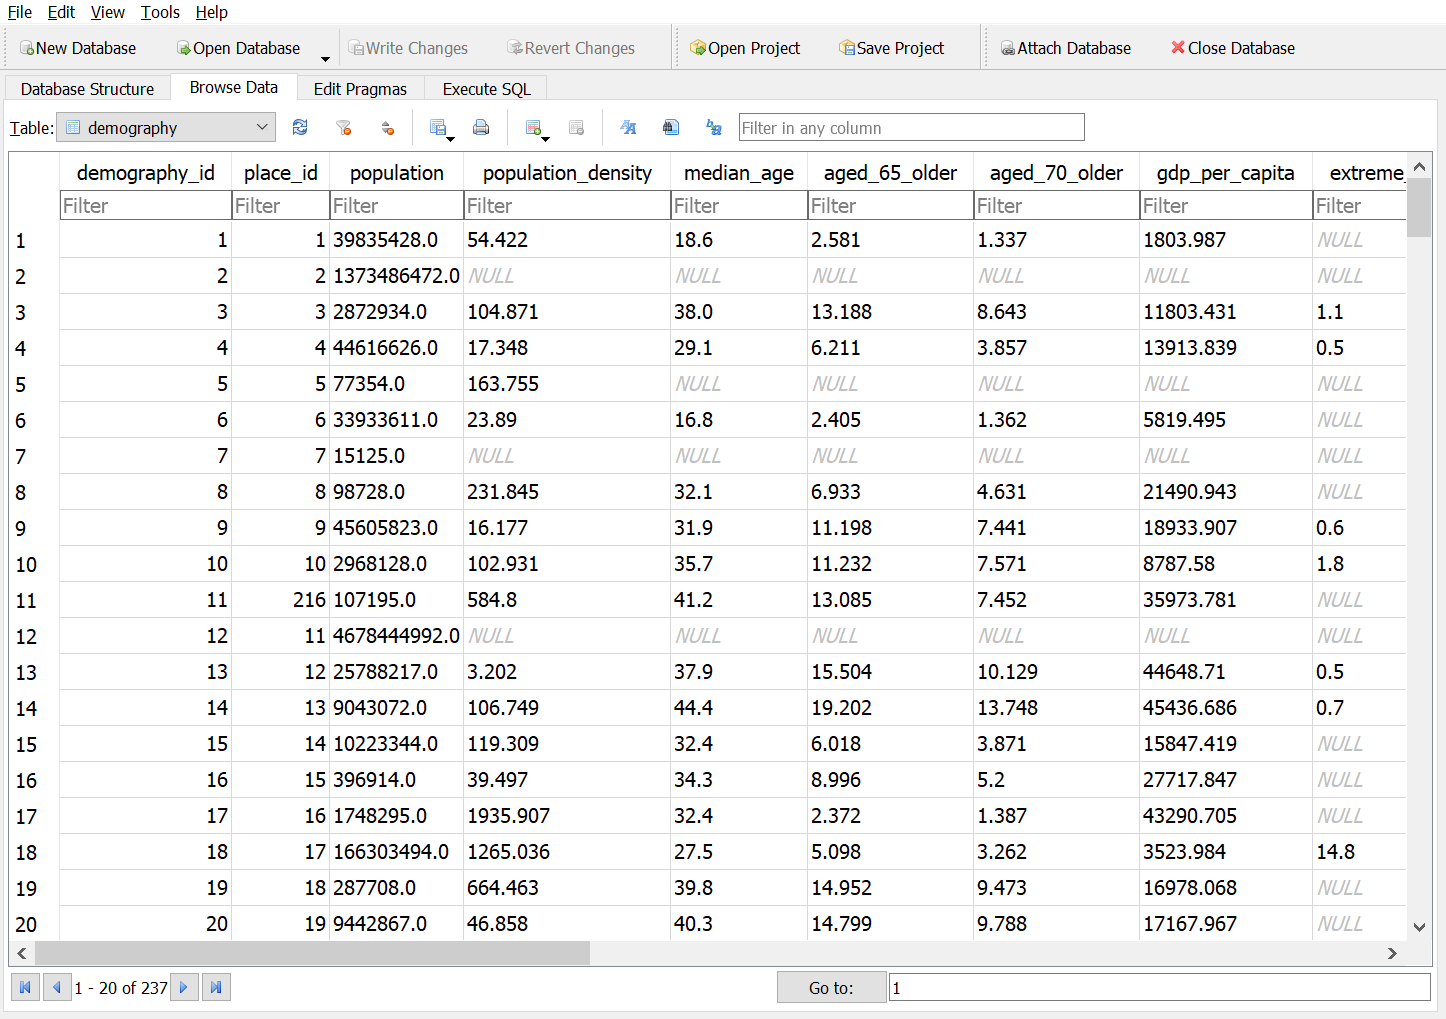

In [15]:
base64_table_demography = "iVBORw0KGgoAAAANSUhEUgAABaYAAAP7CAYAAACgJ1mBAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P15uC5FneeL7nv76ec85/x17z333Kf7nPOc0+d0173VfaqHaquxelXZWpZlWZaW5ViWWgpaLsUBcSoVFRyQjQK6VFAcUEFmFAFlqQwCIuNmUtlMiw2baQObediATL+bkZnxvpGZkZkRmZFvRq71+TzP99l75Rs5RXwjMvL75sq1SQAAAAAAAAAAAAAAFgjBNAAAAAAAAAAAAAAsFIJpAAAAAAAAAAAAAFgoBNMAAAAAAAAAAAAAsFAIpgEAAAAAAAAAAABgoQwQTK/K8qZNsrSylv8cMavLsmnTkkzhUDc2E/JUgakeNwAAAAAAAAAAwLA4BNNZuLbJpqUVWdOfL68Wyi8ujGs4vkSNx1EIpoc/j9VldUzLyZZtrMnKkt5/+Vhiorm+tcK2f/i2qKdpX77HscjjBgAAAAAAAAAAmA7OwXR9uJZ9PnYw3Wl/Cw6mG5/QXluRpWR/2e7LxxIzi2jvRexD07Qv3+NY5HEDAAAAAAAAAABMhwDBdJlFh3E99tf4Ko8hzqN+m2srS8mx1D1NHTOLaO9FeqppX77HscjjBgAAAAAAAAAAmA7Bnpief24vnwWv+lUPIQNYj/AvDaL1MWgVn5jOtpP9v1guzDGnr/NIX4FiYr7GQ+FXh7ZtVpeV9xGK9vovHre9bHMZyz7KbVmp0640nY9fu1TLz38urBPs2AEAAAAAAAAAAKbBQoLpLISbP5lsD2e70nZ8OXmQWchlC09Mt59HEGxPaRde46HwrMPKNrP1bcvCvx2kuZ7Kx63PtencqmVK+6jUl6qCUF92NJ1P9bNmb5fLZz8rH86XDfWFAQAAAAAAAAAAQLz0++OHaZhmD9/qf06wBIvdaTi+WWBYE/6NEUxbtpuFm25P2s4w67Bcn+q8lpZlOTnn2bK0jBH+BqOpnuyfFc+3QxlbuB+MbF92P2WaH6vl2AttUf7cfq7Dng8AAAAAAAAAAEB8DP/EtDWEzsoUl3Wl7fgSrMeQMEowrXa7qfDEePpz4eB86zAL3nV5Feqq/6fhbr5S+v9BXhnRUE8u9d6lbfJ1Fn4+3u1S3lbNtuvqAAAAAAAAAAAAYJ0yfDCdBozzp01N1W/Th7bjS+gSfrpstyuW/drCTZ86nIfbKqQ2Q9/sqeNq+B2KhnoqnKeB2R4uZSz7yJ6oNuoi2Lk1tbtvu5S3VbNtgmkAAAAAAAAAANhgjPTEdEjaji+h7hgsAXHteQQl23Z6POkxlN+P3KEO9XZU2dmTxNmT1Mur+t90YWAa6sml3ju1jUn+mhZbuN2Jpn35tkt5WzXbTrcT6vgBAAAAAAAAAADiZwF//LBt/b64bL+mzGjBtNr1pvQpX/uTzB2ORYebK8k5GdvLXuuxkqw/VPDZdGz2z7KnnXu8Y7pMa0Dsg8/5tByXY/niuQIAAAAAAAAAAKx/FhBM6+CtGIyurSwv4AnXOWkAXAj/svWanspN1xnkPcYJaSiu9m8LVLvUoX5yuLQ9vZ+hzqOl/ivHnYfIjedWKVPchypvnmO2fqhgt+l8fNulXD77ufBFhKU+AAAAAAAAAAAA1jsLCaYVWYCXBadhg9I87KuReRxZOK21LKutr4swtx36iVa9bdt2u9VhNXxX5PsJ8zixBfuxmpSP21a2uUxpH3mYOy9fDIb70XQ+vu1SLp//vNReHwAAAAAAAAAAAOsZh2AaAMLQFHoDAAAAAAAAAABsHFqDafPJTpvGxnZMZcWC7dhsih3bMds0RWznUSd/CKYBAAAAAAAAAAAU00wPASYJwTQAAAAAAAAAAICCYBoAAAAAAAAAAAAAFgrBNAAAAAAAAAAAAAAslE0PP/ywIIQQQgghhBBCCCGEEEKLEk9MAwAAAMDC+PnPf57/DwBg+jCmAQAAdGfTgw8+KAghhBBCCC1COsSxfYYQQlMTYxpCCCHUXQTTCCGEEEJoYSLEQQitJzGmIYQQQt1VCKaffPLJVOYyhBBCCCGEQqkc4jD/RAhNWYxpCCGEUHdVgulbbrlFfvaznxUKIYQQQgghFEK2EIf5J0JoqmJMQwghhLqr8ioPdQHlIooQQn767W9/a12OEEKoKNuvvTP/RAhNVYxpCCGEUHfxjmmEEAoggmmEEHKTLcRBCKGpijENIYQQ6i7eMY0QQgFEMI0QQm6y/do780+E0FTFmIYQQgh1F++YRgihACKYRgghN9lCHOafCKGpijENIYQQ6i7eMY0QQgFEMI0QQm6y/do780+E0FTFmIYQQgh1F++YRgihACKYRgghN9lCHIQQmqoY0xBCCKHu4h3TCCEUQATTCCHkJtuvvTP/RAhNVYxpCCGEUHfxjmmEEAoggmmEEHKTLcRh/okQmqoY0xBCCKHu4h3TCCEUQATTCCHkJtuvvTP/RAhNVYxpCCGEUHfxjmmEEAoggmmEEHKTLcRBCKGpijENIYQQ6i7eMY0QQgHkGkw/8MADsmPHDllbW5NrrrlGfv3rX8uVV14pW7dulRtuuCH9TJWxrYtQH+E9FItsv/Yeev55746tcvMF+8pN5/2T3HPbVdYyCPkIT6E6LWJMQ2jqeuiee6zLEUJokHdM33///XLTTTfJli1b5Lzzzpv9KtO5554rF198sdx8883c/KKgwnNobLkE0/ckE7Jrr7029aPy7GOPPSZPP/10qocffljuuuuuNCRUgeG9995r3QZCXYT3UEyyhTih3sd6/z23yu2//rZcv/pa2bn123LnZQfKNT96uWy/5Mty/903W9dBqEl4CrVpqDGN+xs0FT2c+P2RG2+0fqb08HXXy6OnnCIPb7nM+jlCaGMr+Dum77zzTvnVr34lV111VXqj+8gjj8gzzzyT3vzed999sn37dvnlL38pZ511ltx9993WbSBTJ8numzbJbpuvsHyGlPDcIoUf6+QSTF9//fWyc+fO1JvPPvusVepmRt1oqJDQto31qUvlqI9+VA5Z3Wb5DIWQj/fOP/98bnRnwptDyPZr733nnw88cJ/cef0pcuPZb5M7rvyKPP3EDnn2sdvk4W0/ksdvP01uOfcDsvWHr5FbrzxaHrh/p3UbCJnCU8hVQ4xp6+/+Zqr3ENz7tEmF0vKRfeTZf/qYPLK2Vv38uuvkiT3+UX73znfJw5s/Lw9uvaZSxk20BXWA1quCv2P6oosuSr8hVje5dTz11FPprw+rm9/qNrLOtinR7ifZP1tsR5wfT1G7yeYrbOWb1OX4GXza1N9zhk7avdLWcdU9foxVLsG0KvPEE0+0hoOqrHoSpry+1qVHfVQ+esiqbCss3yarhzQsP+pSY1lZWfg2LzNAGHfpUfJRtY+CDpHVbepzwr+h5eM9dSOtnswqbyNT7pWKjpJLreUXrQ5ewpsLly3E6aOd238lN53/Idl+4b7y+P2/Trb8mMizD8pT922RG374t/L4tQfJ7245UR6+5jBZO+2tcs2P9pAd1zYERlOdC+x+kqVsR+V1EOa8pzd3COmpKzbvVm2rTbvLSZayixH+Ca3QY5pS0PubRCft3tTOtjoOXe9dt1fjV+59opAOpWXfT8uziZ55/4fk4RtumH+uQum3vFWeeu/7RD6xb/r/B487Xh6sewDCcv2dt3UMbYEfERpCwd8x/Ytf/CK9+W27iKont374wx9atmF09t02yxWWzxbbEe37nE0yK8fYJAafIdTfc5n0hK34hUjuR692HlL4MVb5BNPqVzPV6xPU//W4++ijj6ZPxKjXLahXKTQF09tWDzGCMy0dGNqXNwdr+boDBdNpkJ5s76hLS5+pQDAN0gn/hpb2nnoiWr1LWnlQ+U6Ni8pr6qb6pz/9qZx++ulpKH3OOefI2WefbdmWra3yLz+iCKf9vIQ3x1E5xOkz/7zlsoPk+tP/Ru67/hjZdc9v5L6bfiE3XXKYrJ3/ebnmZ3vLtp/vKbuuXZFdV+4nT6wdIU/edqLce+n+svXYV8p1p3+4sr3pzgXyYwwVeG7gYDqkpzI/lQOLK2Tzbl1CjFDCP6EVckzTCnV/k0m3b10b13siXL133Z59Pe59IlFyz/LsBz4sz+7zSZHNX5BnPvYJeWrP96Sv7khD6TfvIU++Zy+R5PPH37KHPPiSv07XsW3Lfv1NpMaTtJ1jaAv8iNAQCv6OafXrRI8//nj660fqV4HVeyzVRVNfnNV7stS3uurG+KSTGr6x3X132S3513ZjsNiO2LDPKzanx+j+hAGDzxDq77lE+QS6+pS+UtYGQZ8k6Sz8GKtcgmn1/l51k6H+r0LoW2+9NZUKC1Ug/Zvf/CZ9hYcKptWTMuX1Z9q2KoeUw7Q0SDtKjjrEsrwSVrcpYBiXP41aCf4KIvwbWtp76gZ227Ztqd+UZ1UIfcUVV6Q/K+8pqeXKiyqoPvnkk0vbqmmr3JPjt6GHl/DmaLKFOF3nn9ef/rfy7BO3yO/uuVzu+81X5J7L9pc7znmfrJ36Orn40D+RJ++9QmTX9SI7fy7P3nyYyNaPiNx+jDx14/5y6aH/ubi9qc8F8nlAfNfoac0dgnlqau2Bfzor5JimFeT+Risd23aTzZvrxjhbHYeu967ba1iPe584dM+98vR795ZnPpSMhZ85QJ7+4D/JE2/9R3n8H3aXJ9/1XpGPfTz9/wN/+VJ5IJmHWrfReP3ViqEt8CNCQyj4O6bPOOOM9MKp/tCSumCqv/yv/6CSuniqi6z6gw133HGHnHjiiZZtzDtb+q1Z4Vsne0cs/orc/Fvg6vq2ZeqphWRZ7QDS3PmzfRd/vWR+LEr6eOo+a1pnvp7af+E8LfVSv41E+WA/U6le6upwCurvudwDpToxldVPsS2b28Rcz1avehsnZfvOy9T5bK75vm2fZ/vDj2PINZhWXlVPS6vwWYWE6l8VAKqnU9WNjQoKf/KTn6RSPyudcsopslZ4Z1s1LEufoj7q0vQJ0Mry2ZOs8/Wy5fopV3N72f+zz7TmT8LO1ysut6vu9SJl6f1fmj95m6kYBjYfl9s2cuWB5KzMIdUn0BvPs7R++/mNL5v3VCB92WWXpaG08p3y2Q9+8AM588wzU0/a5wKmV4zlNcG0vR7rfVF+TU19O8yPY17mUDl0Vta2jim8OabKIY5S1/nndauvlWeeuFXkkavlydtPkYeuPEB2XbVfoo/K7ae+LF0md6+K3PItefaaj8qus18gd5/+PHlo64pcetgfG9taD3OB/Pqbzmltxzffd/GYitvST62Vl1fXq16fy9vdtPs+2TEVFPd1vc5Te339avn4d66W9x9+lXzm6GvknV+8XPZcuVw+/M2r5IPf+LW89aCL5ZgDXznflkfQYq+fek+W72fa2qUo/BNaIcc0rf73N3PN/WK2sf7c5sEXyYsqy1S928q6tKPpKe59UpX6dbHOqnUavRKf/u7t75Sn3ru3yL6fEvn4viIf+4TIRz4mj7/pzfLAi/+qPpR2uP5mmreFubzst4pXgta9/Ri08CNC3RT8HdPqwrxr167014TVN7jqaUD1r/rW+PLLL0//SIPSbbfdJscdd5xlG/POpr91mk/ojM/y8sXOX5qopR1u/tm8k1aX1U8aq/ssqDDpPElOKm0nm5wVB6DittzWUfuYr1cO01u2UalH9fl8gGmswwmozXN7Hf2n8vbv/qHcdMu2ds9VPstVauf2Nmmr1/k2Zu1S8atNLceKH0eTSzCt3gOobjLU/1UwqHyq/j3ttNPSP06nfl1ThYTqX1Pq6VUVGprbKgd46mf15GcaWpWWl1/RoQIrW7A2X1b+OVMWiM1DsvIxVOT8FO38uGZPr6YBmxnIXSqXlp5sTfc/C+ZctqGXmU/J6tdQzMs1nqflafVLj6oLP+ORzXvqdR3q1R3KfyqIVh5Wn51wwgny4x//OH1CS/2BpeK27N6o1mtLPdraprTtZr/N27t4LDXHVxbeHFW2EKerrv3Jq+WZx24VefQGkUe2itxztjy+9fOy65I95e6fvEyeuuEQkRsPln869o/TucBd57xE7jrzFfLgVQfLJV/dzdhWy/VVKfq5QL49IwQqHl+m8jHp63KxXHUfbdfnynbVNtLP6443TtV56u2HXCanXP5I6t0fX3Rb+q/JkefslN0/f8l8W05Pz7XMmax+KNan/7yprj2y5fjHXyHHNK3+99RaZrvmY9RsXl8s09aGalnzfUJ7O4Yb73Jx7xOP7rlHHnvjm0U+9kkR9e/r3yjyoX+SB170lw2hdCLrGGJTtf1ax6PgdY8fERpCwd8xrW5u1btS1c2tunCqXxlWF0z1Te8ll1ySPhWobobVxfWYY46xbKPYQbOOUdd5LZ3Z7GjlTqcGit12Ty6OxrK0TNMF0TZgGMr3Uft54YLbsi0tl3UKZSwyP28s21KHhbJxqs1z7/jebvLpH79B/u7w35ejjvledRttbahUqBOXNmmrV9s2arZbUEsZ/DiafIJpfZNx++23p6/0UK9LUOGzCqFVUKgDaTUeq9cvqHcAl4PpLKAyg688rErDqWIgNg/f6kI7l3KWZZYgrCDP8K91f2UVwj2XbeRBX/kPQbZtxzxPW6A4AdV5T/1ffRmi/uq/8qAaR9VT0yqUtm2nqZ6L9dpSj7bP07qt826itvXr1rMJb46qcojTZ/55zamvlKfTEPFakYevEHngYpF7zpCn1r4iD533OvndL18iD579J7LXUc+ZzQV2nPqXcv+lB8rFK38039Z6mAuk+245vprlxfm2rZxlPZf6SNX0WXyq89QbD7hIvnPuA6l39/rqZem/isefEnnoCZGDf3S77PGF4mu4snrNQoTmgNpQm4fSz+vujRK1zptq2gP/dFbIMU2r/z11rkK7zj1Z9Ietjh3rvc2vM3XdR0uZ3Ee1nzsfnyGXdQplLDI/byxr2X5rH45TD117nTz+xn8Q+aePibzu70Ve83cie39AHnxxch1O5pi2dVK1teFM5bqyt01hPApe9zV+0MKPCHVS8HdMr66uyiOPPJK+D0tdQNVTgNu3b09/Df1Xv/qVHHbsF+QDX/sHWf7iK+QfPvcX8p3Tv1zaRrkzmD+XPrN2kqxMtiz79kiXV4OU+n86WOWTw/T/fb4Vsww++oI/V/vg472O5dxrt5GXtZ5nax3Gr7Ln3nfM82Sv7/+xvPPIP5K3HvGf5BM/eq2cuOXL8qGTXiEv/tK/kLvu3VHchqUNKyrUk0ObtNarbRs12y2opYzlXPDjYuQSTKsnXPRNhgoG9dMvOpjWNzJPP/10Kv2z+pXN448/vri9NJDKQ6j0/3UhtRkc1wVq5eUtAVhpveIyQ/k61f2VZTsu+7Fmgbx6ilTLI/yznkMiM9BrO8/888YnxSNUnffU/9WvBqtXeqgnp1VYrX412LaNTFld2NvAkINfik9A5z/rYLZ1/VLblspUl5eUb7+1nHV79n3gTXfZQpyu889rTv6bLER85Opkg5eI3PcLkZ0/TucC7zv6j2XPo54jb/vOfyzMBf4ymQvcc8Fn5aJDPN8HXLhGOVwPW69ptm3UbLcgS5l8X/Nrq8PxmcsrN6ql9dvOpW67Rrnmc4pHdZ76hwMvliPPeUCefPoZeerpZ+WZZ56VpxM9+ZT6+Rn53PHb5NX7nWfdplJxXmSGuE3zrurTaunPOuRu9ZhNlvbAP70UckzT0vc36j5azQEPOugg+c53viObN2+WU089NdX++++fLjvggAPS33S6++67K9vJvGX4La/rYn3a6ri+3tvm+O7t6NK2LWUs51PfnzqcU906lnNtq5f1ei+u9NC118pjb3iTPPmP7xD5wIdE9v6gyF57i7xnL3n8tX8n9z/v+fLAVVdZ17W1oV2ltrDWXSJzPApe9/UeSmU5F/yIULuCv2NavRdVvcNS3fRed9116Q3vjTfemP7/0OMOlE+ftIf85OrD5KodZ8iXznyX/N2X/r184bh9jG1UO1vWqdQFtfRZOuiYnW0uXWY+eVMhtdkZswt0YXJnVf2AkSo/hqyjZmXnA4f+vGkg6bJOosKg0bYNy8Ckz9mhDmNX2XPv/v5z5ZQrviY/vPzQ9Cb0+C0rsnLWh+TIi74g7zzmxfLcA/97uWPnrcY2aurYlKWdG9uktV5t23A4jrYyluP081aXdRLhR6dgWoV/KhxU4Z+6YVFS4aAKBNX7ftV7fpXUEzDqSRhT6inW4vaMYEuFV7MwKnvycrZ8FliX1pktsy23lEu3ZYZuc1W3lyto+Jf9XAhBzdDOZRsu4Z/DeVYCyPJTrhGqznvqX+Vd5a9jjz02/Vy9t1K9r3JlZUUOPvhg+drXvmZsy16n9id9jToyNFvX0n6ztmld39be8+1Ul5eEN0dVOcRR6jr/vPrEF8uzT90p8tg2kQfOE7nnpyJ3ndQ6F/jjZC5wwYH/zthWzfXNlOUa23g9bL2m2bbhcByz66xtm8Uyle2UrsczFa7jSqX1286lUDdluZxTPKrz1NsPuVS+8bOdsu8x2+RTx26TT3x/Tfb53vXysUQf/e518tHvXCf/sP851m0WlNdVVh+6LevnTMWfs/Kzem5rF73PgvQ+m8rXtFn52LQ2uH9Cjmla6v5GvU7ry1/+cip1fVYP4Kh54uc//3k58MAD0/setUw9/KXKfP3rXy9tJ/8V/0IAZVtmq+P6ZbX+9G5Hl7ZtKVPYZ8vxNRyD3zqJuPeZKQ2l//6N8uTblkXe/yF57PVvkPv//C/k3v/2Ann05X8r8o53yq6/+Vu55492kweuvLK6jbwu28+31BalOp6pNB6FrfsaP2jl28SPCPkp+DumVcCi/lW/ZnT11VenTwGqp6XVH2zY/fMvkVN/uyKnXvOV9OJ98Flvly+d9Q553t7/ythGfQfdbfPm4meVSZBFaefaXU5SZWcX4OyCvPtJ+t/SOgXVdP5cWafOv4UudfhUbQNJl3WU0nPPy7Ruw1Q+GdGfudRh5Cp77m3f/cP0RvSLZ7xPPv+zd8vnVpflUz/eQz5z+jvk8F9+Vt70vT+V3//0PzO2YZugFVVoZ5c2aa1X2zaavZapuQx+HE8uwfSll16a3lioVyroUFD9q17ToT5TT0YrlcNpdcNTeWLa+NV/9aSpGXql4VS+vPj0pC0gsy23lKsLzhqVH2PrE5wOwV0h6Ms1RPjndZ75+ZWPK0LVeU99oaf8p8ZR9eS+CqEPPfTQNKS+8MIL08BaPZU135alnvPAtLDMqR6NbaXbML5EaV3f1t5Ny8vCm2PKFuJ01Q0/f5/cePZH5LE7zhF5bE3k/vNE7jjGaS7wbz/1fze2tX7mApmajs9yTJXrdGn9tnNp/NzleONRnaf2OOgS+crpO+TTx92a6Bb55Pdvko8feaN87Ltr8pHvXC8f/ObV8nf7nmndZlFZfaRBgNOcyai/9DPtwUStHrPJpT1qyuAfq0KOaVrquqyemv7Yxz4mVyRzzI9//OPy8pe/XN7+9rfLV77ylXS5+r9a9u53vzsNp/fZx3zYK1Fer7aQqbG96pa1+dW7HV3atrkM9z7jKg2lX/9GefKtbxfZ+/3y2Ov+Xu5/4YvSd0or3f1Hz5WH/+IvRd76Nnn0JS+Vu//9f5T7Ly+3Zfv1N1OpLerqbtC6x48IDaHg75j+0Y9+lAaE6lePVCBtBtMv+/gfyurV304v3JrTfnOYPPfd/9LYhr2zZZ1cdRrzs+aBIZXupJuTzqi/CUqktpcF3bYOaqphH3nHnX3WZSDpsk4iv0GvpMKA41CHkavsuTd+69/KCZeuyDEXHyJHXvgF+c4FByY3pO+Sr//yM7J8zEvkP2/+f8vFN5xf3E5aX3WDcFZHc/84tElrvdo+d2mLhjL4cVS5BNPq3YAq7FNPt6in/FVIqKSeTlVPtKpl5XXUU65nnnmmfPe73618lgbQhxwlRx1SCqtUmJUvbwzDapc7BGmO0k9wOgeUdctChH9159C6nQZ5hYXjqc576gsP/cWIepe5kiqnpJZ/+9vfTn/zab4te/2kX4IU6sGtHjMPr8pq6cuV9vXrPndvP7w5nsohTp/55wP33yO3XXW8/PaEV8v2cz8pT99/kcjDl7XOBZ5/4L+UO++8ubi99Fo18bnATHVl7MuLx20r17bPps/b1o1LdZ56zad/JV9f3Sk7k/nmjofuS/SA7HjwAbkj+f99ux6Rj317q7xo7+Lfg7DKnK85zpnS9tlts2zevVyPXerWZZ26MvblG90/Icc0LXV/8+lPfzp9TYcKptUruV784henDyyo37JTf/jwhz/8ofzFX/xF+htOKphWZc1tVNslV/mewVrHlmWtfvVtR5e2bSjDvc/oeiiZN+563evlyT3eJo+99vVy35/9eeEPHT5w907Z8e//gzz0/D+Tx176Mtn5H/9Q7juj+gVeVp9111+tcl05tE1Zveu+YR38iFBnBX/H9A033JDe6KoLpvr1IxWqqL8orP59/t7/pxx0xltl8xm7pxfvzT/f3fGJ6fnyYjCtO2Gxk12xeXfjZ/0tUGmgSztnstz3mzktvb4RdlcGo9kxz4+v8ldNW9fRPxuDa3mdlm2oOjLPvTxYt9dh3Cp77lVf/z/lpV/+X+VFX/r/yJ8e9P+QN393Sb523qfkrd9/sfzhAf+TXHbjxdbtpG2T1FvxgpjXZcEn+bLGtm+r12wbZnn7srJqyuDH0eUSTCupd/yqsuoGQj0ZrYJA7V8VGKobDh0Mqv/rZd/61req20tDK8tTkXkgVQ3d6oKt6vLq09Y6yCvua9vqUcV9W1QNLXOp40/3YTuu0rL8nOZlss/9wj99LNUnc83zajpP9Zl5HllZ83Up8crmPfX/I488Mv1yRPnwi1/8onzhC19If0VYLS+G0kq2elbST+jO68LJL5b6n5dtWr/uOOzerRPeHEe2EKfv/PO+u7bLtl9+US7/1n+TO371GXnV4clc4CvJXGAlmQscXJwLvGjl92XnvdV3sSpNei5QUH2ZyjFZjtu2ftv1ufp5so28zirzjQmo7KlX7ne+fHP1AbnrkZ2y/zmvlMMveZ9845L3J/9/jdz96O3y8W9vk6U9T5xvI52bGfOlVPq+JF/eOu/KlZerLE/kP2/CP6E1xJim7m8+/OEPy3vf+940mN53333TEFqF06985StTqf+/8IUvlI985CPp9Xzvvfc2tpF7zRyjyp8ZdWqrY//7hKZ2tHnKtqysmjLc+8SjCy6Uh1/2CrnvBX9WCKW1Hrj7brn99/5/taG0Vto2Sb0Vr7+JVFvXeKhSd6W2CF/31WNIhR8R6qXg75hWUr8erH4N/eijj05vbE866SQ57rjj5B/3e628+uDfl0PO+Mf0SWn1r/q57R3TWlknqX6ml89kdu5E2SBndN5UeQe1XqxN6Y5cVrGzzqQHJV0m6cTFsub28mNqXCevj913TwcYXa5SP03byAenwuelY2+rw9hV57nDDjtM/uNn/zt5y5F/Lv9l87+UK2/aYl1/pkI9Zqp6MW+T3Yp11uTZmWb1mm+jsI5tWVmmf0xV2zQVflyYXINpU/fff3/qXRUKqidZ1Y3MzTffnC5Tr11Q/1fLVIhoDaZ1AFYJ4ep+jd8WkNUtz7edqhw26uWJHAPAeYhuyi+4K24jWXdV/ey5jUQ6jMyUnFu63XLYV3Oes7BQq1zH05D2npL6vxovjzjiCGvZoux1mqo2SDXqq86rNT6qX7/hOPLPsnUcglm8uXDZfu09xPxTaectV8m1p31QLv7iv5d7Lv+S3PrT9yX/f4H81wP+h3Qu8Fdf+U9yz33VG+eCJjIX6FOmfEzVcvb1267Plc9n8+xse9ny8pw8bmlPvfazF8oZVzyQOHebXHT/Zrn20aPk2seOSv5/cLJsu3zuqG3y395l3lfMH44pqDynaZ2rKVWDRFN+8yb8E1pDjWkXXXSRvOUtb0m/ND7hhBPSV26p90i///3vT8d59X+1TD1d/dWvflXe8Y53zNfP59uVkC9XVtemz2x1bFnm4Fd7O9o8YfdJUeYxmCr3kVytx+d7Tvkxcu/TqAfOP98aSmupcLoplJ6pUI9apbZoGVcKnweve/yI0BAK/o7psu699940XFFST7MecsIn5QUf+Dfp6zvUv+pn23oIdVXZc//20/+9/G8f/2dy9S2/tpb3l/2iiDa2ugTTWupXMdW7fNUfuvnpT38qp59+eir1s5IKDNV7f23rogBKw784nyxdlB544AHLH9hEo2udetMW4oTW7VefIVd9/41y5fdeK7dd9WP5wwP+x3QucO/991rL+2udzwVaQq2NqDd9+gx5/f7nyzsP+q3s/aVb5D2H3CjvPegG2esL18p7DrpcXvTek+Q/vOVY67obThvMP0ONaeo+5sorr0zD6T333FP22muvVOrd0+q3nj7wgQ+kT0m/613vSsuosrbtIIQQQjEr+DumEVr/IphGVfUJptECdelRTk+uIrRwbSBv2n7tfXrzz/U9F8ielqo+RYWQizaaf9bHmIYQQgiNo+DvmEZo/YtgGlVFMD0RpU+gmq87IJRGkWgDedMW4kxv/rk+5wL6HZ9KPC2NfLVR/bM+xjSEEEJoHA3yjmmEEJqK9A1Uk2zrlUUwjRBCbrL92jvzT4TQVMWYhhBCCHXX4O+YRgih2GULo7Vs5W0imEYIITfZQhyEEJqqGNMQQgih7uId0wghlKhPKK1EMI0QQm6y/do780+E0FTFmIYQQgh1F++YRgihXF1DaSWCaYQQcpMtxGH+iRCaqhjTEEIIoe7iHdMIIWSoSyitRDCNEEJusv3aO/NPhNBUxZiGEEIIdRfvmEYIoQAimEYIITfZQhyEEJqqGNMQQgih7uId0wghFEAE0wgh5Cbbr70z/0QITVWMaQghhFB38Y5phBAKIIJphBByky3EYf6JEJqqGNMQQgih7uId0wghhBBCaGGy/do780+E0FTFmIYQQgh1F++YRgghhBBCC5MtxEEIoamKMQ0hhBDqLoJphBBCCCG0MBHiIITWkxjTEEIIoe4imEYIIYQQQgsTIQ5CaD2JMQ0hhBDqrk3qQooQQgghhBBCCCGEEEIILUo8MY0QQgghhBBCCCGEEEJooSKYRgghhBBCCCGEEEIIIbRQEUwjhBBCCCGEEEIIIYQQWqgIptEkdP3116MNLJsnEEIIIYQQQgghhNB0RTCNJiEVTsLGhGAaIYQQQgghhBBCaP3JGkybTyoiFItgY2LzAkJofck2F0EIIYQQQgghtL5VG0zbliM0lpQnYWPCeLRxRdtvDNHOCCGEEEIIIbQxRTCNJiGC6Y0L49HGFW2/MUQ7I4QQQgghhNDGFME0moQIpjcujEcbV7T9xhDtjBBCCCGEEEIbUwTTaBIimN64MB5tXNH2G0O0M0IIIYQQQghtTBFMo0mIYHrjwni0cUXbbwzRzgghhBBCCCG0MUUwjSah8MH0qixv2iSbLFpezYtMmrrzW5KVtbyIM9m2lvxXDALj0cYVbb8xRDsjhBBCCCGE0MbUOg2mT5LdN22S3TZfYfkMTVFDBdPlsHVtZaljeBsbTee3STYtrYj7KW7wYPqk3ZM62002X2H5DA0qAsuNIdoZIYQQQgghhDamBgqms2C4+rRml3CnS8gcbzB9xebdLPWyu5yUfr7I455WeL+oYFrWVmTJtnxyNITJ+Tlucn40fD0E03VjUqbGflAIpvPt7H5S/rlrP6rZ/2w7yKawgWUPDyxMrn5yU/P1xlDq8WK56jGEPTZTBNMIIYQQQgghtDE1aDBdvoGd3STvtlmuMJY3q8vN8HA30H100u7qhr8czl8hm3crhl6LOe4466hOiw6ms8x2Xmb2pPGm5WRpxnxZJnNbq8vJstJTydVla7KylCzTAfHqcmF75fWL+5sfh53mMLn4ZHhWtrDv2fbrPmtaJywhg+lOfg8YTBfL5duyBYUo1RDBdNxjXrhjbL/emOU2ye4nmeVybxau1cPVH8E0QgghhBBCCG1MLTSYTnXFZtlN3fA6PynY5WZ4uBvozsrPu/mYFnncEdZRgxYVTKfhsSWULZcrBrvpguKT1mnIbL4SRG+ruizNpQuBeMbq8jzoLe/PFnwXsZ/fjDwE1wH8qrFfha0eittqWycccQXTZblut6ac07iwcUUw3VGuvsqflC6G0lrZsfh/CeMvgmmEEEIIIYQQ2phafDCdKHtyuvQEYkHFV1tUP2taZ76e2n/hV5ktT3/VbyNR+debS096F39NuuWpx8YAQKn5XIvnUlxe3ka53ovHmWj3fVr3Vb/NuuOx7aulTjw0VDA9P1atanBcDXfty7PwOA9my0GzCoKXlmV5yViWlsn3VwmyTSz7swTZReqOPaccpJcpHE/LtjSN59CdhQfT5X6fqjheZdvJ/l8sV+f5uv3n20jDv3kZW19v3U/puHfbTW2jfNwnyebdjO2kY5p6itZYr3CMDvtuGSf7aNHBtPUpY8uXqW3jXPFzva5t/+ay5rr2GltbrzdKebs3tFe2T72v9vrrKoJphBBCCCGEENqYGiWYLt40nyQnlW6es3Cg6WbYbR21j/l6+U248fRX4zbyMMK8sT9p93kYkN2wzwOMdN2mQMYSblRlP9fquTSXNZeVjzMtkx6n2/rVZdnP1ePpUCceGiqYLoet2VO/8yeJrYFsXShcCGaz13TodVVorf6fhtf5iun/9VPP+TatT0Fb95cdW8hgOgvWs/PP1B5M168TjoUG07ZAL11WDniL/aF1u7Xl8v5kBJdq/8VybeNdospx67C5eNyFMvk6hfGhMu71Gyf7atHBtC2sLY9jbeNcvzHXfoyLu96UVLpWt9dfNxFMI4QQQgghhNDG1DjBdH7TXPt5YxBUI5d1CmUsMj9vLGvZviWgKSsLFzZlsgYGtuOuO3+XsnXr1n3WZ5uW5Q514qpFBdN6eRYe15SpezK4FCCnIXf6gwqp8/Jpmeyp6vnnGZWQd76h4nJDtcFzQ5ickm8z20V+zuY5Fc7Rtq22dcIRMpgu118m3c/LX17lahxb6vpDWTXl0m13CP4Kx9TluH2WlWRut7CP8BoimK62v5JxDub1qXJ+lvopjHNN9edS3y5lEoW43pjnWf5My/nc+olgGiGEEEIIIYQ2pqIJpgs30amaApWO61hu5mu3kZe1PpVm2Y7eZ1NQYKq4X/2Eoe24687foaz1OLVc91VeZiuTKECdNCmqYNr6BHNCOZhNf16WVVV+9iR09iT18qr+N11YIv+jiHpbdftrpO78MrIQPH/tiC1QbgumW9cJR8hguuJbU3X9pTHgddhuKku5yhjTvK22scrvuH2WdRwnA2iIYLqufk1l57ub7LZbqXzbOFfXFka55vq2lGnb52xZvazXm3y7jfVR2Lft+MOIYBohhBBCCCGENqaieJWHKjsPUPTn7YGK3zqJLDfZ9duwhDH6qbP8+G3yvmnPt5WtV3+u1e06lM23bQ8vXPdVXmYrkyhknVi0sGA6D4Gz5XXhrn15IexVpNtakpWV5cqT0UsrK8k2GkLcQhjdHDLbaVincI4JBNOZ6kLFwrjg2B8qyso19426bel1a8aqTsftuqxl38nPteNkAI0VTNte6ZGqbZzLP+8+5lrKtO1zti0H5dvK1nOoj8L5+NSfnwimEUIIIYQQQmhjasQ/fpg/tZXe+BqhR2VZ3Y265zpKaYCTl2ndhqnS+1rrgqBOyo41C3Nsx11Xlw5lG4/TdV/lZbYyiYLWSVWLCab1k8o6XK4Pd7MQ2ghhy2Fvit5e6WnnNMBNlhvvk1bbM8uUQ+7K/hLWVpYbQuCaY9f7Lu6sdOzZuub+0teOmO+/dlgnFOspmG4uV1OmbazqdNyOy9r2PVtPqTROFj7rprGC6fQatdtuab0WyreNc73HXEuZoGNrtv3selMTvhsqXKs96s9XBNMIIYQQQgghtDG1+GA6v8mefdYafFi21WWdRH6BeEmFcCDgDXqhPmzbrduXS9mm43Tdl+s2m/bVX0MF02lIa6rwxwfrg2lFFhbP17WVy/6YovEUdUq+b0s4PN9eNeAt78/6hxJn1JxfXXCsA2tdRj3lXShrbs98BUjTOmFYWDBdV6ZxbHH1faj925Z1OW7HZa37LiloiDpSMG2eQ+Vc27bR9LlDfTuV6aHS9Vc/7d4UpM+fgA94HCURTCOEEEIIIYTQxtRig+n0Jt+80U1UulGe3QwbYcBJuyc/m091ta6jf9ZPelnWadmGumE3b9aLT47pn4vhzBWbdy/8XFB67sbxpNJPGM6XV861ri4TFcvqbRXLVo8z2V6+TnVfLtusPx7vOvFQ+GAapsLigunc/4V+WhwXbNux9aOqXPZfU8Z1jLSMd03H7bSs5zjZV4sPpvMxb3aNqj5V3DbOuY+59jHb5ifvsdXxeqOUeaccTuftXDgOl/rrJoJphBBCCCGEENqYGjSYTkPogoo31jPpwFqXSW64Kzf2s8/zm+rGdfIb6N13z8OZTJUb6qZtzIId4/PSsWdhgVGmFCYUNQ8hmtcpn2tTGGCWVcdnL1s5ztITcPN9uWzTvg8tvzpxF8H0xiVkMF3wpiHTzzqoy5T0i3Sc0P3f5n9z28XQr1ymrt9kaijTOkZ2P+7WZT3HyT4aIpieH2tRu20+1Rrczs7R+EK1bZxzG3NVXdW3QVZmfizDXG9yFdo4U9WHTfVX53s3EUwjhBBCCCGE0MbUQME0QmFFML1xYTzqqDRs7BcYji3afvHKAvCwXzC0iXZGCCGEEEIIoY0pgmk0CRFMb1wYjxx00u7tTz5PULT9CKq8vmV40c4IIYQQQgghtDFFMI0mIYLpjQvjkYOcXsUwPdH2I6n0ipahvUQ7I4QQQgghhNDGFME0moQIpjcujEcbV7T9xhDtjBBCCCGEEEIbU4VgWt0cIhSrYGNi8wJCCCGEEEIIIYQQiltm7mxTJZgGAAAAAAAAAAAAAOgKwTQAAAAAAAAAAAAALBSCaQAAAAAAAAAAAABYKATTAAAAAAAAAAAAALBQCKYBAAAAAAAAAAAAYKEQTAMAAAAAAAAAAADAQiGYBgAAAAAAAAAAAICFQjANAAAAAAAAAAAAAAuFYBoAAAAAAAAAAAAAFgrBNAAARMNvf/vb/H+waKj78aDuAQAAAABgI0IwDQAA0UBANx7U/XhQ9wAAAAAAsBEhmAYAgGggoBsP6n48qHsAAAAAANiIEEwn/PCHP0QILUgATRDQjQd1Px7UPQAAAAAAbEQIphNUWHbLLbcghAYWwTS0QUA3HtT9eFD30MY+++yDEEJoQAEAwDgQTCcQTCO0GBFMQxsEdONB3Y8HdQ9tEJoAAAwHYywAwHgQTCcQTCO0GBFMQxsEdONB3Y8HdQ9tEJoAAAwHYywAwHgQTCcQTCO0GBFMQxsEdONB3Y8HdQ9tEJoAAAwHYywAwHgQTCcQTCO0GBFMQxsEdONB3Y8HdQ9tEJoAAAwHYywAwHgQTCcQTCO0GBFMQxsEdONB3Y8HdQ9tEJoAAAwHYywAwHgQTCcQTCO0GIUOpu+6b5fsf+TF8upPnibPe8/x8vKPniJ7ffkXcvblt8hTTz+Tl8r47urV8vCu3+U/QayECuh+c8vj8oOLH5LvnnufHPGLe+SbZ90jXzvjbvnqT++UldN3yMGn3S4H/uhW2f8H2+VTJ2yTTx5zo3xt9dZ87fH4+RV3ySdOvFb+9uCL5RWJXvvlS+W1K1vk5Z+/QA750ba81DAQjo7HRq577fk3HnpZ4nXl91y591/7pUtkzyOulJVTt8mTTxXH9UVy+tZd8peH7ZC/+eYO2fHgU/nSxUFoAgAwHIyxAADjQTCd4BpMn/+bu+SEC+73CjpWTrnRui2ENqJCBtPnXnmrPP+9J8i7v3KefOmU38rxv7xZjj/vJvnqqVfL8sFnyZ/vfaL8/NLtadmTf7kmf/T2o+WRx55Mf14kzz77bDp23nbbbXLttdfKZZddJueff76cddZZcuaZZ8ovfvELueCCC+TKK6+UG2+8Ue655550nY1KqIDu+AsfkEcff8pLH/3+dfna4/HyAy+Qex9+XO5/9Am575FM9z78hFy742H55Gm3yp6HrQ0WzoUMR6f0xcDdd98t1113nfzmN7+Rq666KtUVV1yR9tVLL71ULr74YrnwwgvlV7/6Vdp3zzvvvPSzkAwRTO968hlZOW+nbD53p3z9wnvkq+cn/z/7bvnM6g657f54vqT70FG/SX2eet7wvfa+6g/a/+8+/MZRw+k/W7lV/v6IHflPi4XQBABgOBhjAQDGI9JgelWWN22SpZW1/GcbLmXccA2mj/3VfdYwo0kfOepa67ac9L03yKZNz5H9zrN8tqH0PXlD0tbP2e88y2doSgoVTN+040H5s/edIAf/8LdyxNk3ypG/2CY/2XKHnPPbu+WybffL1lsflHN+c6e86hOnyTsPOVP+6sMny3PfeUzSJxcfTG/fvj0NsVTwpIJprWuuuWb2/61bt6ZBmAqoV1dXo3p68oknnpDTTjtNHn300XzJsIQ69++cc286Bh+z9dty5G8PlyOuOlQOv2JFvrrlIPniJZvl8xd+RvY/f1/51Hn7yCd+8U9p2fd96+p87fF41SEXy0O7fieX3/Z0oqfk4u2/k1/e+IQ88dQzcvmOp2X/1Vtl/+O35qXDEtJ3U/piQPVF5XMfnXPOOfnaYRiqz59386Py5SsfkAvveEwuuO0x+dSZd8naXY9LTN99veErl8rDjz0pF21/Ui655Sm55Fbl+6fkgpt/J+etPSE/u+bRxP8iP7nuMfnkKbfInl8bJ5y+/q7fycsOvUP2Ov5u+ejJO+Wd379Lfn71YsZFRd/QZL/99gvuW6iH+gaYFgTTAADjETSYVkHxpha5BclxBtNdgw7btpxEMJ2LYHq9KFQwvfnoS+VdXz5XPnD4BfKn7z5e/svy0fKn7zle3n7QGXLkmdfLdbc/JGs7HpZtdz0inz/+Crn4up3y/L1OkF0jBNPq6UoV6u7YsUNuuOGG9KlMFUJv2bIllfq/CqXUZ3feeac88MADcvzxx+drj8vjjz8uJ5xwgpx00kny9a9/XR566KH8k+EIFdB96+x70jHYFVX2XV//df7TeLwyD6avvO1pufL2p+XSW56UX237ndx896Ppk6N3P7BLXvKp8/PSYQkZjk7piwHVJ1XYrJ+Y1k9L256UVkGTKvvzn/88XzsMQwTTKnv+/Ll3y3HXPCSfOfMu2fzLe+TTP9kh9z+y+NdQ1PFYMsa89b0fkbe/98Ny+sXb5M3L75O/f+t7ZEsaTmdfypxxza7ZFzOX3PHkoF/ONPH9ix+Sv//WHWkgvXLG/fK3X7lN/vN+2+TWexdzXSmHJir4tOmwww6bfX7iiSem/1eon82gtPxzaMr732gMXb8AEBaCaQCA8Rjwiek+wXGcwXTXoMO2LScRTOcimF4vChVM/9n7TpQ/2/sked57T5AX7n2iHPWzrXLPg4/JxVt3yFsO+Km845Cz5PK1e+TWe3bJjvsfS/XfkrKPqcfuFowKs26++WZ55JFH0jFUBc/333+/3HfffXLXXXel9aJe4aFe9aHKqFAshmBahdLHHntseiynnnqqfOMb30hvtNVxD0mogO7wM+5Ox+Bjz7/bSarsP371inztcXjqqafkFQdfKA8++jv57Y6n5bd3PpM/Nf2knHnNLjn96sRDjz4hL/3cr+R3vwv/KoaQ4eiUvhhQYbQKm9UrdFykyv70pz/N1w7DEMH0iVc+ID++4RE58Kd3yuU3PSqH/HKnfOLU2+XSbbvkEz++S955wg551/GJjr1D3vH92+RDx9yer7kYHnvscfnZORfIZ7/0bfnLl71KjvvpFvnLl79GPva5Fdnv4G/Khclxqi9lzrr+sdkXM48kPhnyy5kmVCD9H/a9Of9J5BUrt8rSZ2+SX163K18yLLZguin4LAfD5fJDB6fl/W80hq5fAAgLwTQAwHgQTCe4BtNdgw7btpxEMJ2LYHpsPe95z5Pvfve71s+U1K/Cv/rVr5YvfOEL1s+1QgXTuy0fnf6xw6PO3CZ//U8ny207H8k/yfjxBdvSp6gvuvZuufC6e+S2e3fJf3vv8fL47xYfTKsg+uyzz06fiFbBs/pZvUdaPUGtAms1pt50003y8MMPp6G0CoPVO2/H5sgjj5RjjjlGfvSjH6VPTR911FFywAEHyGc+85m8xDCECugO/emds/FaccKv7kr/1fzgouLP9zz0uLzlS1vynxaPavvNmzfLyz5/gTzw6O/k2jufla13PiO/2fG0XHbLU+mTo2ff8Fjy2ZPyks/+SvbYY4/0PeUhCRmOTumLAVX3KmxW5+8iVfYnP/lJvnYY1HZDcvO9v5ODLrhXjrzyAbny5kflutsek29feJ/sc/Ltcv51j8inTr1bXvP92+Xdp94le/7gLnnfkbfLoT9Z7Ljz4MOPyJuX3yvv++jn5E/+7KWyzwGHyQte+jr50Ge/Ii/4y1fImVfenn4po7yvv5j58W8eSr+cedkBF+ZbWQwPPfaM/Md9b5L3HX1n+vODyc+v+v6KvPboA+WZZxfzWhHfYLrMooPpjQ71CzAtCKYBAMZjpGA6+6z4mo/lZKlmvu7aytK8zNKKzLdm336hfGGbijVZWaoudw2muwYdtm1ZlQbR+ti1isH0efs9x/jsDfK92fo6vP2e7PccY/3n7Cfn3XJeYZkt4C1utyYELh3fc56j1tHHNw+P59tSx5ctN9ezH7e5XqL0uMtliuc2P8b8/N7wvfznub73hvK2UBepp37rwmkdSn/oQx+qfFZWsGD6HcfIcWdfL3fd/3j6btJnnp2/MPXpZ56V5YPOlC+f/Gu58/7H0ld6qCemn/ee4+SJJ5/OSy0WNXaqX/1X75NW4bR6ZYd6Slq9OkC9X1q9IiOmUFrxxS9+Ufbff/90ov7+979f9txzT3nrW9+aakhCBXRf+skdqTdOvPBu+YHSRTvlhxfdLXt9/Wr5+HeulvcffpV85uhr5J1fvFz2XLlcPvzNq+SD3/i1vPWgi+WqG+/Pt7IYtm3bJt/85jfT10f8zUEXyX2P/k6uu+tZuTbRb+94Rn59+9Pp+3fP3/a75LMn5aWfuyh9tYTqc5dffnm+lf6EDEen9MWAqncdTKsnolWfNJ+QLv+svkRS710PSehgev/Td8hPrn1Yjr7sAfnmhffKdy+4V869/mH55Mm3y+07n5C9j98hr/zOrfLGb98qexx7uxx40g558qnFvnj6sMO/KS9/zRtl5XunyCv/YU95+4cOkL95/dvkwMNPlJe+8g2y18c+l34pc9HNWTitvpg587rsy5mXbb4438pi+OlvHpEXbt4uB/7k3vTnD/z0MFnZcqAcdOFn5SsXHJyG02/89rvkuMsekg+evFP2PmmnfOK0e+WUK4tfmvahyxPTdUG0+n9ZGlXGtlyhflafm2Xq0GU1+mf1qhG9rvl5HbqsKRP1c9N21XLbk9tqmX7tSR1qO3qbSuZ2yp+Vz6W8zKeMeS76GOvOT2Fbr1wGAJohmAYAGI/RgunVYmIsq8sqbNSB8Ty4nq+fh8rLesXq9rNQekn0onSbhTC7XzBdF3ScfMndckoidaOt/j3l4rvk9MvukpvufFj+/gsXW7dVUR76vuF75WXzYDoLbuc/F0PXeQA828YsSDbC7fP2k+eU9lPeri5TCKcrx6fD7mIwrcoUQ+3vyffMc0qUHvcsnLatVw6a687NOOb0ZzPwVsrWK9Qp6ixbOO0TSiuFCqab3hX9qe9cKH/09qPlZR/9kbzq46dl+sRp6bLfjRRMK9ST0uopy6uvvjoNon/961+nYXSMofSYhAroDj71NnkoGa9PvmRn+vMp+b9vP+QyOeXyLCz68UW3pf+aHHnOTtn985fkPy0G9f5u9SWFerXLJz/5SSepsurdx+9973vzrfQnZDiqr5dy6KGZvva1TN/6lsgRR2T/V/9+4xsiRx2l/kpoer0cg0svvVQee+yx9JUeSqotlFR9KOn/6y+S1Fzo5JNPztcOQ6i6f+qZZ+UHF98rx1/xgHzi1DvkR7+6R35y4T3yrR/fLt8+b6fs94Pb5Mhf3CNvOvoOefO3bpNf/OZhef0Rt8mnj17sazwUe7xzb3n9HnvKS17xOnnxX71cPvKpg+W5f/IC+dMXvlie88fPk9/7/T9Iv5RJw+n8ixkVUKsvZ/76gMV65WMn3i1Ln75J/uuntsn/vOd18pojvi4HXvApWb3xFPnEzz4sL/3qirz0a7fLHt+/S/70oFvlTd/ZIe874W553Tdulx9c/nC+lX6EDKYVtvXVz2q5vhaVw1v1mW09G7b9KalroEL9q35uu+7p8hp1TGo9Tdt29c9lzHVslOtCoeui/Jn6V/1cPt+mnxW2Mkrlc1Eq78s89rr1zGMHgGYIpgEAxmOkYNrC6rLMQ+WadRvLWNZZW5GlZNksy67BNZiuCzo05SfA1u54SF57wIXWbRVV88RvIXzNQtZC6FsImS2fOy2zldFhtQ56Ox5fnVzWay3jcB7WsBr1kRlO+4bSSqGC6f+657HpqzqUdls+Jn2C+rmJ3vOls+Wu+3bJvQ89VtHd9y/mPaBNqHdLn3LKKXLllVemr/NQofQvf/lLOfroo7mBzAkV0G0++RZ58NEn5bQtO+XHl831xgMuku+c+0BaZq+vXpb+q3j8KZGHnhA5+Ee3yx5fuChfuhjUk+lPP/10KvUHMdUTuU1Sf5BPl1dPs4ciVN0r9PUyDaJVWKJCaPWvlgqmzZ/X1tLr5RioP3Kogml1/jt37pz9q6UCafNn1Y9/8IMf5GuHIVTdX3PbY/K5M++Sb11wr/z2pkfzpUn13rZL9j3pVtnn2FvlVd+8RV6X6JLrH5WfXPKA/P03bpH3H749L7k43rH3x+RHP/+VHPLN4+SD+3xKfnL+NfKmt71Hjv7RmXLQ4cfKi1/+6vQ3Bq66/Sm57LbsyekLE+18+El5yf7jfIlhcuyVR8o+q++XlQtW5bXf2iFvP/ouOezcB9PPvnr2/bLHd3fI6w+/Q759Xjbe9MUWTNukn+pV/+8blJZDUNs6dXTZnwvl0NVlu+Wf9TaasG1XY/tM/Wxus1zGtk6XMoqu6wFAPQTTAADjMWowXXzthlJLMF0ImktlrCF0ViZUMF0XdCj99IqdaTCdPjV98V1ycqLrbn1QXnPAr6zbKsjyFHMqM5y1lsnC2F7BdOd9l8pY9zVX4TUdqVrW6xC6l1/bkf5seb0H6icdTr/kJS/xCqWVQgXTKoi+475diR6T2+/dJUf87Fp5xT6nysO7qn8Q7uHHnpKb73o0XWfXCH/8sIz644Hqfc1PPvmkPProo2kwfenh+8nPXvU/y1l//s/lvDf8K7npuAPz0uNx7rnnyhlnnCE//vGP5aSTTkqP+fDDD5cTPvJGueit/26wYw0V0H3mxJvlgUd+l47NijOvuif99x8OvFiOPOcBefLpZ+Spp5+VZ555Nn39y5NPqZ+fkc8dv01enYwri2TfffdN/5ihkqpr9e5xFVDbpD77/ve/Pyuv3jUdipDBtL5eyve+lz0Rbeq449Jg+meHfVQ+fOgbZfmLr5A9DvxL+Zv9Pp6vvVhU0K+CafU0dFnq9TsqmD7zzDPTd66rPwKq6l8pJKHq/uAz75KvnbdTDvzZnbJy+h3psqtueFg+cvR2OfaX98obv3KT7HH07XLID3ekn51x+YPyd4fdLHt++ab050Xylne+X05aPU+W9/6YvO5Nb5Vvn3CG/MPyXnLMqWfLuz60r/xf/+E5s1fZXH7r07LllqfkkkQPP/6U/MWnFvvlUR0vP/Qv5AOnnSVv/t5d8sefOTs5tux905857V7Z4zs75G++coscf8lD6bK+DP3EtO1JXIW5rLxOE237U7huT5VRZU35BNPlJ7/VzzrAt1FXF4q6z3TYXXdc5Z8VXcoouq4HAPUQTAMAjMdIwXT2mfnaDacnppuC6XR9HXoWZT+GOa7BdF3QoTnjyp1pCKZRwfRbDnF4lYdL8Jv+335+WTjrFt5WlhXCZUPmMfUKprPlhX24rNchmM7Wybdr/n+2DuqqCy64oPCzCqfVTY+5TAUrSuayskIF08995zHpe6N/de09csn1O9Mnp086pzg2PfbEU/LiD/5QTv7VLfKJ71ycvspDBY8xoMJo9ccQ1SsEzjjwA/LrD/+pPH76IfLsNT+TR4//gFz23v8ot/7o0Lz0OKhQWknd2Kr3Y6uA+uSP7yFXfmhpdqy7BjjWUAHdvsdvS8frM5JxWo3VWm8/5FL5xs92yr7HbJNPHbtNPvH9Ndnne9fLxxJ99LvXyUe/c538w/6LvZlXN0MqAFVSr/W47rrr0nq3SZVR7//W5Z///OfnW+lPyGC67Xq5cvIR8umT9pCfXH2YXLXjDPnSme+Sv/vSv5cvn/zpvMTiUO/rVl8Sra2tpe+QVu/8Nt8prT5Xr+FR9a1eoaKCavUqD1to1ZWQdV/HSRfcL2/87m3ytqNulzd9+xZ5+Rdvkr/76k3yj0fcInsecpPc9/Biv7h7zRvflj4t/eZ37C1Lz/8L+fK3fyh/89o3yX5f+Jq87s3L8i/+5f+ShtJX3Pq0XJboku1PycW3PCWPP/mM/Nk+5+dbGY83ffs18vzP/Vd57j5/KP95n/3kP338a/KO798lf7DvzfK3X7lNDvjxPfL7H7kx/UOJIRg6mNbBqk26nPn/Nsplbeu6bE+VUdKBb1sArCgv02Gy+tf8fx16H7Y+Xt6/Rm9Xr6P+73v+LmUUXdcDgHoIpgEAxmOcYLoQQuc4B9M1ZRxf22HDNZiuCzqUzv71PXL65TsLUsH0m77g8CoPl+C3rsxMjuFteVmffbsEzIUytmU16xWCZddzy145opalT2jzRw+jU6hg+r++89g0mL7t3l1y+3275Lzf7JDX7Ptj2ePAn8nVN2V/nEoF1S/98I/kFZ9YlT9593GpxkaFXIqf/exnctNNN6XvCP7Zq/8Xeez0Q0S+8nJ59iP/L3lm8+/JPV94gfzyTf8mLTsWjz/+ePre6+OPP15OPfXU9EnRU172P86OVT7y/xQ54P8IfqyhArp9jr5e7k/G61/8JgtEz/lt9u8eB10iXzl9h3z6uFsT3SKf/P5N8vEjb5SPfXdNPvKd6+WD37xa/m7fM9Oyi+LDH/5w+kSu0iGHHJIGG+rLAJtU/Xz2s5+dlf93/+7f5VvpT8hwtO16+ZbP/5Wc+tsVOfWar6TlDz7r7fKls94hz9v7X6U/LxL1RZsKplUgbZN6OlqF0uqVH6oNVHkl1T9CMXQwfcWNu+QfDtsuf/vlm2SfI26Tw0+7U771k7vkPV+8Sd72je2yxwFrcsOtj+WlF8Pr3vBm+fs3v03+8/NfJq94zevlhQesyr/6T8+Tf/Nf/kz+l//rufI//cGfyKt+/HiqV572uLwi167fPS1/+qHF/lZDHeoJ6Xcfc5e87vA75NWH3SGvPex2ed/Rd8rbjtgh7z36LvnrQ27JS/ZnrCemTdr2adK2P0Xb9mwhcHmZ63bVE9NqmZL59LSNprqo+6ztuGzH1KWMout6AFAPwTQAwHhMKpjOXv1R/AOJ8zIN+2vBNZiuCzo0P7yo+M7p9Inpg13eMe0S6taUmck1vC0vs2+3+I7pmn0PGEy3779hvee8Qd7wnKYQH42lUMH00p7HyXW3PySHnXa1bL/7Udl21yNy2Y33yZd++Bt59Sd/LH/8zmPT91AvvetYed57T5CXffQU+eQRF+Rrj4t6ZcAll1wit99+exosnvXCfy7PXl78Q2oP7Pcv0ldljM2uXbvSoPTQQw+Vj3/84+kxDX2soQK6Dx95rdz38BOy88HHZcd9j8mtOx+Vm+58RF7z6V/J11d3ys5HHpEdD92X6AHZ8eADckfy//t2PSIf+/ZWedHep+RbWQx77723nH766alUYPLpT3861cc+9jHZa6+90td1vOpVr5I///M/lxe+8IXpMl3+937v9/Kt9CdkONp2vXzZx/9QVq/+dv5Txmm/OUye++5/mf+0OFR4o4Jp9ZoU9eWR/ldLfSmj+qu5TAXUankohg6m3/etW2T379wqm4+7TR57Yv4E72m/ulde8ekb5K37r8nNOx7Ply6WF37ifLntvsdlr18+I9+7TuQ714p86xqRw5N/v5b8e1iiQ7eKfPVqkbf/4il59PGn5LnvOTtfe1ze8K075O+/sUNe+/Xb5Vvn3Z8u+/ov7peXHXyL/NVBt8hhZ9yXLgvB0MG0wnebTYTYX8hgWv2sxlclW+BcpunY6ravlmvKZWzrdCmj6LoeANRDMA0AMB7jBNP5083lULkcTM9D6ISadcztZ8F1MfBeW1k2fl6TlaXSdhNcg+m6oGPt9ofSENqmNx9UfAVCndL3IRf+UF8WvJqhbhbWFkPe8/Z7Q0PA67asst38CWmzTOX48jJtAXN1W+Xzyn823wVds05x2837448exqlQwfQfv/MY2f3An8vrP/0Ted2nfiI/ufQ2ueSGe+WsX98pp1xym3zvFzfJgSf9Rj5zzBXyxZN/Ky/Y6wS5aUf2R6li4Kc//Wkaft1xxx1y5mv+Z3n0iLcld5H/Qp74p01yf6Jb3vnP5Ny//9/y0uOi/tjeJz7xifTd2Of9/f8++LGGCui++pOb5UNHbJV3fu3X8ravXCFv/uIWeeMXLpFX7ne+fHP1AbnrkZ2y/zmvlMMveZ9845L3J/9/jdz96O3y8W9vk6U96989OgTvfve75bjjjkuDZhVIn/iDH8nZ515g1fEn/lD+4A/+IC37rW99S/71v/7X+Vb6EzIcbbtePu99/4ccdMZbZfMZu6flN/9899GemD777LPTYFp5Xc1z1B83vPfee9M/dKhe3aGemL7sssvScqrvqtd6qFd5qD9aGoqhgumrtu2Sw067S151yE3yioO2yWkX3CdPPpX95sb2Ox+XzUfdIi/f9zp51SeulWN+XvwDzoviBR/5pdx8zy555znPyDvOfjoNn//xF0+nemvy89vOfkr2OOsp2V39fNbT8sRTz8hz331WvvZ4XHzTY/KiQ26VA0+/V/5gn+yVHbfc+6T86WdvkvcfvUP+KFn2y2vC/dHd0MF0+b3LCvW5KmcGwWpZUwhcR9v+FW3bU/u1bUfJN5jW21JyQa1v7keh66v8Wd1xmj+X61v9v20dhcsy1/UAoB6CaQCA8RgnmFYU3gm9JCsrlieml5fTMFqXK27Lvv3KH1RcWpF5iX7B9ME/vE4++O2rK0HH6zZfJK/a/3yrPnT4RdZt2ZSFv1pvkO9ZnjbOQmSj3Ox1Fa7hrT3QLW+3Evgmaj6+mqBYKS2n10vK72dZ7zlN+3c/DyX+6GG8ChVMq/dFH3TclvT/Z112i7zo/T+QfzjgZ7L/sVfI11evk2/8fE2+8IPfyvsOO1+e/94T5KcX35yWjQUVbqknp5944gk57C0vkIv+8f8rOz7yf8jOj/1z2faP/zf5xSv+O9l27AF56Xi45aSD5dLl3x/0WId+cvS1n71QzrjigeR/2+Si+zfLtY8eJdc+dlTy/4OTZdvlc0dtk//2rpPSsoviyCOPTG+IXv/618seh10kjz3+O7n3od/JPYnufvAJ2XHf43KLCnbvelgee+JJ2ePQi+Tf/Jt/I3/9138tX/va1/Kt9Cdk3dd9MaCvly/6yLvl1Qf/vhxyxj+mT0qrf9XPY7xjWv1RybPOOisN+1XofNppp6XB8w9+8IM0TFKv7FD/6qfU1fIjjjhCrrjiinwL/RnK93/7pZvl5V/cJi8/+EZ52YE3yu4Hrsnjv8uemH7Dp66Xv/7kdfLSTyT6+HXy1/tcmy5fNC//xAVyz8NPyM33Pi433fOY3LTzMbkx1z2PPJlq58NPyiOPPy2PPvG0PPPss/LyCN4xfeKlD8nLvnSLfPbUe+Rvvnyb/OsP3iC//6Eb5CUHbpe9j7pT3vTV2+Q5H16TX259NF+jH6GDaYVapqVRZczlZpiqfnYNO8tlbeu6bE8/Ia2lj883mFaofqzkit6Xlrlu+TOXYzDLu4TZCpdlrusBQD0E0wAA4zFgMD0dXINpVFIaOPd9Mrkh0O6i9InpYpiP4lGoYHrfIy6QZ7OH/lLUHzU8+/Jb5D0rZ8tf/dPJ6Ws8XrHPKfKJb/9Kbr374bxUPKj31qqnXVV93HrrrXLbKYfJL9/0r9NXYqinkmMMpTVDH+vQwfQeX7hUXr//+fLOg34re38p8cwhN8p7D7pB9vrCtfKegy6XF733JPkPbwn37mBf3vq1i+Xth18qb//6XP+Y6pJU6rO3HnZxXjosQ9d9mUNP2V/+7IO/l76+Q/2rfo6VrVu3pgG1en2HelI6ZCitWHTdx8SJ594qy4dcJi94/7my27vPmutdmf7Lu87MtOeZ8id7nS1vO+hSOfmXt+Vrj4d6QnqfH9wt//ve18v/utf18lef3y6H/vw+OfRn98m/fd/18m/fc718+Mg75MFHn87X6AehST90EKwDbQAAE8ZYAIDxCBpMm0+8Nik2CKYd9L03OD+x7KewwXT2jmn+6GGsChVMw/plIwd0Y0Pdjwd1D20QmvRDPT1cfnUJAICGMRYAYDx4YjqBYNpBhddxZAoTJocMpgM/fY2Ci2Aa2iCgGw/qfjyoe2iD0KQfvNoCAJpgjAUAGA+C6QSCaYQWI4JpaCOWgK78RZxN6w3qfjwIpqENQhMAgOFgjAUAGA+C6QSCaYQWI4JpaCOmgM4WiGqtR6j78SCYhjYITQAAhoMxFgBgPAimEwimEVqMCKahjdgCuo0SjCqo+/EgmIY2CE0AAIaDMRYAYDwIphMIphFajAimoY0YA7qNEIwqqPvxIJiGNlRoghBCaDgBAMA4EEwnqLAMIbQYATQRa0C33oNRBXU/HgTTAAAAAACwESGYBgCAaCCgGw/qfjyoewAAAAAA2IgQTAMAQDQQ0I0HdT8e1D0AAAAAAGxECKYBACAaCOjGg7ofD+oeAAAAAAA2IgTTAAAAAAAAAAAAALBQCKYBAAAAAAAAAAAAYKEQTAMAAAAAAAAAAADAQiGYBgAAAAAAAAAAAICFQjANAAAAAAAAAAAAAAuFYBoAAAAAAAAAAAAAFkqQYPozm1cQQgghhBBCCCGEEEIIIavKBAum1wt33HFH/j+A+MGvcUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0A3QCmBL4NQ5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBOAFMCv8YB7QA28AVAN+g70AYegRjBlxAj+BKmBp4dDzP7HUoE0w7QCWBK4Nc4oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBOgFMCfwaB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QCeAKYFf44B2ABv4AqAb9B1oA49AjOBLiBF8CVMDz46Hmf0OJYJpB+gEMCXwaxzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QCdAKYEfo0D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph2gE8CUwK9xQDuADXwB0A36DrSBRyBG8CXECL6EqYFnx8PMfocSwbQDdAKYEvg1DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gE4AUwK/xgHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/t10e67725d3iSCaQfoBDAl8Gsc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz3zapUFrL9nmdCKYdWEgnWFuRpU2bZNPyar4A+rC6nNTlpiVZWcsXxEzgtl+EX9dWlpL63STr3q492oaLZ8aG8Yoj+AJPFODa78y66Du096BsiPF1g3nI63oRad3gy/UHvhwAro/QAvdQ42Fmv00yQ2nfcJpg2oGFdAIG46CMHUzrCcuSywEEbvtF+HXKwdKi2oaLZ8aQXvFqy0jAF3iiQGTX/pjrb130HUt7T3Eci5UNMb4GHDPWVldkeSnzX6ZlKWxV76tWpfID4HW9iGw81eDLNlZleeapehU3vZbc6y0Z/kz+nxRY1CiKLwcg0nraaDAPBBtm9lsnWyitZStfFsG0AwvpBAzGQSGYHhavCVlkLKptuHhm9PVK0/pebRkJ+AJPFIjs2m+rv77tFYp10Xcs7T05z0bMhhhfg4wZa7KylGxDbacggukhwJdt+AbTdf5NtLSykHAaXw5ApPW00WAe2J1Y6mkIzOzXJlsQbVvWJIJpBxbSCRiMg8KrPIZlPQ+8BXq0zYa4EXGgr1fWm9fwBZ4oMIFrfyz1vS76DnO9QdkQ42sAD2Vz5ERLy7LaNE/W+1pQ2GfDa/yJtH/hy35U7ulWlzP/qi9G9LK1ebi9iObHlwMQaT2Bp98HJPaxdF3dn5Qws9+ymgLops/KIph2YCGdgME4KATTw7KeB94CPdpmQ9yIONDXK+vNa/gCTxSYwLU/lvpeF32Hud6gbIjxta+HdKjnEjbrfRFM9wJf9sCyXf3FSmVX2tsLaH98OQCR1hN4+n1AYh9L19X9SQkz+y2rLXhu+1yLYNqB4J1gbVVWljPjplpakuWV5ZrBeE1W9Wez8suyUnrEwbxIr5nlVdm8qHqX3NLsV5+SfdoekygfW6Kl5RX7ExVO56F/3SoLiefHlv36X3ZMxf2psrZ9zsPmcp1Uz8W1bGOArS+QHSbktQOTV9t3o6tfferXdn4+bZmS18V8Pzavufnfh0W1zVAXT592SnHs0936V75AY+kzfbyS7cemfPxwbctEfc85FEP4Ak8oTcATXmNMef+qfN213/V4bdtUxzB/L2e5/prq+zN1ba7ocf2so0/f0eehzqvXHMmxXVIc27tPf1AM5dmu1/RZ2QD+9iXU+BrNuXtt1425X/IFTQzQj2eUzy2RrX6dx/Tedd58v9IHfNmdql/1k9G2dmn6zBF82R2fc3csO9T1zX+7I7RVXkfmPk0vDjVP8JkHqiLe41IPwt9Dtberrg/b2GZ+1lxPLt5w8di8PdThLGw+m2Bmv2W5hM4E04EI2gn0JK9OBdNrE9tlFq3vDEqJyXTHKSjrHDMaj61UNulGje8Dmx3cvCPOO4hSPphZj0uruM/mc0wGa6OwLlvcp5ax3YZv12snHQ5Y1/Vq++509atP/drOz6ctG+titlF3//uwqLYJf/HM8Gmn5vPq27/KY0KC3l9bCOnolfpjKo4f7m1pP+fWcSIgQ/gCTyhF7onGY0hUPGDva7/L8dbX3bxcuf4a63ug62cdffpO/XkoOc6RfK5JHu3dpz8ohvKszzEkR+E4J1QMc21XhBpfozh3rzHDFb1/1X/VHz40tmfc1M6wjN9B8BiTrWPJIOOpLme/X+kDvuyI9RqTn5fVk/M2rHjZBXzZAw+/edRT87W7NL/1wG+7I7RVUx3lO/QZD3zOt+zt+nWz8/Ibl/oR1rO+7VrT3/OxqLme2rzheixtbTnAfDbHzH7LaguctQimAxCuExgmSExc+EJCfbOhlhtO0MYr/5Xh9FuQ1DjzgW5m0sI3Habpsm9LZp9o0872Z5Qt7G/N2PZ8EmAuM89jdmy27TZ8C1Nkvs9q8FHdznxAtNRHft4ZxrnMjk9fSOfrZujjLi93ozyoz7eXyKHt+9DVrz71Wz2/OmxtWVcXiT+TSejSSrbR2XrJTszqsvnfh0W1TdiL5xz3djLOq1CHbX3atX9ZJhuli3S2qI9XmtdvbEufc24dJ8IxhC/m54Yn4vSE3xgzO+fC8SZbsYx9zsc7u8lJ2tLY6Fr6RM58ma1u6+t7mOtnHX36zqw+Cl422iWvv9kn+Tl3axe/9m7ycxF7f3D2QBBajqF0vtU5oU89+jPUdTdjkefu5yF3WsKjRIXN1oQj/Z6EM86tUA+GZ5Nz1ssbx3SHuulW58VrXl/wZRf0vkrzCsucYk7NOk4Y51aoB3zpgrvfutWTyzzUB5/tLr6t6uqoeJ9sp208aD/fqrfty5qxH0dfhvBse7smGHPobJluo+JYU19Pzd7wORZ7WxrbDzqfnWNmv0OJYNqBYJ2gYmoD/dnMNPnkserslLLxtcHKxXW5yqBQ3l/Tselj0Z3P6zzsHbeVynb0Odq2M++MxfqwlNXbNSYX1rpreBLMhcrA5FVn/ejqV5/6rR94LZTPr6kuZvj534dFtc1QNyLO7dRYz6U+rZYM1L96eSWhaX2vtvQ5Z8t5hGIIX+CJOVF6oukYKufnN/Y5H6/jNc1Wt031ne2/9FnP62cdffqO9TgT9Lm1zpF82sWrvUvrtmFZfxDPNlE+Bq/z9fO3L0Ndd2cs6ty9tuvBbLvFG9fkg8RH2f4L+5yVt8niOReazk3XkbHtiie86sbHb/q61vG8GsCXHai7juj9WMe1Hm3YdG66jvClHZ9z96onZYO6c6/OQ31w3+4IbdVURy70rMeKtxNsy1qxHEdfwo2lPu2aoZepdfT/y3PH+npq8obfsSx0PmtgZr9DiWDagWCdoOlmrWwaXbZF8+LFn2fk22k1acuNZGH7PufhMkjn7ztaXlK/3pB1hpmMfdQPqvPj0+dZXzbvjOaExjJwNu3LhUqn9qqzfnT1q0/91g68Dm2p1208X0//+7CothnqRsS5nXz69Oznnv1L15fRv/p4RVG7foJXWya4n7NlnAjEEL5wbjs8UcH9nHt4wmeM0WVb5H+8+c+JltKnLJKJdVLfZWx121TfleNPqD+mfvTpO+V2npHXt/bxjD7t4tPeCX37wyCe1bgcw4D+9iXo+DrmuXt6yBm9rtUTjqHKWuKrPMjodAxN55ZQ7qteY3ovvwUKlSzgS18a2iKEh200nVsCvmygy7m7lE1omk/oNqlcvx1w3u4IbaW9Za2jMr3nCdV6tM1JaucpGsfj6Etwz7aoeOi6fXNZxqD6emrwhuex6Paq7CPfTtD5rIGZ/Q4lgmkHQnUCbVbrANrTNN4m1Tcs+QqNx5Zgfu51Hi2DtN5WrYwTahpUy8dUX9Z2o1Y+xv43c/p49OH71Vk/uvrVp37L56fQy2qVF26sC03HQdOF8rE3Hk+Ptgl6I2Lg2k5t9Vz+PEj/0vVl9B29bhevKGzra8qflY+zTPlzv3EiDEP4Ak/MKX9WPs4y5c+H8ETjMZTHmE7Xfsfj1fsqaEmWjZVtdWtbNif89bOOPn0nqyfLOTjOkXzaxau9E5rqvFZG4SE8q3A9Bq/zHfDargg9X6/VwOfutV0f9Lo1nqjtJ2X0djo80dd4bgnlz/XP+piGqvNk5cb7lT7gS0/0MVm31TSudW/DxnNLKH+uf9aHOFSdJytPxpcu5+5VTwn117eWbbXgvN0R2sr1vHS5WnWsR/2zsbp1mcbnOPoS7B7Kq10NtEeTumyqi+pnDd7wPJba63S+napvus9nTczsdygRTDsQvBNU3To3esk0roNtMJPaji3B3P5sALKVrVxUGjrirHMnx5e+r25NZk9weV6cyudfX9Y+odHnlNZTXhe203OlMjD5tH1PuvrVp34r5+fRlo3+0Xj634dFtU2wcaOEczt59On5zz37l64vo3/18Yqisr6BV1smuJ9zv0CniSF84dx2eKKC+zn38ITPGJOX9bv2ex5vUrfpHz4z/iK+3r2tbpvqW6E/D3X9rKNP3ym384za+rbPkZzaxae9Eyr169kfBvGsxzHo43c6X09/+xJkfI3h3D095E7uiZpAubafVGjeTiNN55ZQPoZK//CpGy+/RR4ArmtfmrS1Q5P38KUPoeajXfzmVDah/vpWbRMfnLc7Qls11qdG15U6tl7zhGo9VrydYFuW4nkcfQl2D+XVrnN0XaWyzK1q66nJG57HUm6vGbXbycdFvULHczez36FEMO1A6E5gv1EsdV79s+MNRW+TzgaWpgt93pl8zsOhI1oHLMtgVj+olo5PLWkrWzn2+fKVdN0OkxqDysDkVWf96OpXn/qtPT+XttRlm+pYr+Pofx8W1TbBxo0Szu2kj92lT6sl3v3LMt5Y2q2XVxLqL/KWz0Kf8wD+G8IXeGJOlJ7wGWMs9dVE7+Mt1b2tbpvqO2O+rxDXzzr69J1af+bn7zxHcmkXn/ZO6NsfBvWsyzH4nK9PPXYgyPgaw7n7bNcLPSe39efcLy79t0876nUdx+Ta/hG6zmd1Y+tL/cCXHjSdZ07beN7pGPTx40t/fM7d00Ot17eO9eK83THaStdR01jc5PWe9eg1D/Q8jr4E86xXu+bk56rmi7o+ynPH2npq8obnsbSNf0HnswZm9juUCKYdCNYJZp1fmcb4K5jp+9oyI1cHEWWcZGDS3z6lJB1CPe2k3hOZL+5t0lmHUftT33jli5Pl8+PQBq47D1W2fB4NHVEPZmrgNT5bq3l/nR5UC3+wJSlrHrderstW9qmP3dIZZ+dZ2m8XqgNTXZ2pc622fR+6+tWnfivn59WW9V4z/9rw3Hft/vdhUW0Tbtwo4t5OPn26W/urepktM9vaUrabVxJ0eWNfmmpbdjtnn3GiL0P4Ak/MidMT+bqJhrn2OxyvGlvzp1nmzOtAzxGq9ZfQUN+a2THn5YagT9/Rx1c5tPzc2udIxjm2totfe/ftD84e8MHrGOrOV/mrn799CTK+RnHuddtVx1Ddrhez80s8MztBYzycbVeNncn4r/ZfOFTz2MwPXPEbk6tjkl/duNe5Pi5bX+oHvnTFsQ1sdWH4stsh4Mvu1J27zW9d6sltHuqDz3YX31b1XpzdJ3uNB37n6zUP9DyOvoS8h3JvV7WoHObOfexUT8lPTd7wORZdtlKt+b7DzmfnmNnvUCKYdiBkJ5gZtk5Fd887tVVzc4cw6azTWVXsSHrQqtVsu00d0Rh4y2q6iFtV3H5W1rbP/LxtF7JZ29jW86NxUK9TpfG60dWvPvVbPT+/tmz02qycu/99WFTbBB03DHzaqbGeS2WDbFe3deMEJ4RXkgtp+pGlLb3P2eajhnGiJ0P4Ak8oRe6JQa/9DsfbuP+s7hTu9TdfJyXg9bOOPn1He7lwXor8uJ3mSB7t0lzfiYzt9u0Pw3jW7xj0OdSqaz16EmZ8jeTcvcYMP+rHdrNfN9SDUp/ro8eYbB2TvOrGtc71+Xb3Xx340hG97dZtNNUFvnQl5HzUy28e9VQ/Vil1rxO/7Y7QVk1eTOvHbzzwOV+rt2vngX7H0Zew91A923XmY+O62VpPdd5wH4N1W1aqNT+e4PPZnMsvv3xQqUyZYNqBsJ0g8WxinLlpl2QpMcqaNnLFZWvpXzldKpkn+6v6c8eEMWmC+vZMf7uZK3vKKv/coHgeWbnqebR1xOTzwv6yb/NmHds4vuwc1dMbxfqwHZ8uW91nft7WiUvTZ35YB/UEv7bvRle/+tSv/fzc2zLFyWtu/vdhUW0TetzQ+LRTimOf7rJd9XSD+uvLSoW2NvpQGK+ob2912UTqG950sb0tfc/Zb5zoxxC+wBOJJuCJ4a79LsebP2lT3l6pDurrz17fc4brM5o+fSerJ8t5JXWS1kOlAvPz6dguCtf27tsfhvOsX58snm/mrb7+9iXc+BrHufuNGT7kxzDbdn7M+aca9dSbqgeznAob0qeo8zKdcRyT68Ykv7pxqfOkzdPPbX2pH/jSBd/6T4634M38OPJPO4MvO+PjN9d68p6HOuK/3RHaqtWL7uOBz/n6zwP9xqU+hL+Ham9XXR/VeaKu19I5WuvJxRtuY7DeZ6Vakz6Vlq/soP98VmELk0NKZcoE0w6E7wTrmNpO0R89qA6w6ZSmgWdKdPXr0PW70Rhq3BiqnWj/xTCEL/AEjM0irp/MxSbIgHNCG1F5ZMHnDvGCLyFGFuLLnn5jfhuG9XK+zAPHwxYmh5TKlAmmHaATOLK2mn9DNMzAN+ygqr/JKj8FNj26+pUQKixDjRtM0qbNEL7AEzAui7l+MhebGAPPCW1E45ERzh3iBV9CjAzuywB+Y34bhvVyvswDx8MWJoeUypQJph2gE1jIvwG1KuCvbJgMOqjq87Edu/5VFCeNP+h39eskL1oRt81Q4waTtGkzhC/wxIKZ2DVhcJqunwFhLtaDoT07wpzQxigeGfPcYxiLGA9bwZdNwpdjEdSXA/nNaR7aoa0XOr+NwIvrZT7PPHCBGL5V2MLkkFKZMsG0A3QCC8qsS+b7hBLpd4oOxJCD6noKYLr6dT3VQQwMNW4M1U60/2IYwhd4AsZkUT5hLhYxI8wJbYzikUjOHeIFX0KMBPXlQH5jfhuG9XK+zAPHwxYmh5TKlAmmHaATwJTAr3FAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHaATwJTAr3FAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHaATwJTAr3FAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHaATwJTAr3FAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHaATwJTAr3FAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHaATwJTAr3FAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHVCdYM8990QIIYQQQgghhBBCCKF1LYUtTA4plSkTTDugg2mAKWAOIjAetAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PGxhckipTJlg2gGCaZgSDNpxQDuADXwB0A36DrSBRyBG8CXECL6EqYFnx8MWJoeUypQJph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djxsYXJIqUyZYNoBgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDFiaHlMqUCaYdIJiGKcGgHQe0A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8bGFySKlMmWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHQgdTJ9zzjmy3377ydVXX50vAQhH6EEbv3aDdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Ohy1MDimVKRNMO2ALpk888cTUyHU67LDD0nLa8OpfDZ0AhsQ2aOPXxUM7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDFiaHlMqUCaYdWEQwTceAUCxi0Mav7dAOYANfAHSDvgNt4BGIEXwJMYIvYWrg2fGwhckhpTJlgmkHmoLpLqalE8CQNA3a+HVx0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8bCFySGlMmWCaQcIpmFKMGjHAe0ANvAFQDfoO9AGHoEYwZcQI/gSpgaeHQ9bmBxSKlMmmHagTzDtYni9LZtM9Hpa6lcTyvtXy9Rnd999d6E8bBz6DNr4NRy0A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8bGFySKlMmWDagRiCaW1um8xt63Ll8rBxiGHQxq+0A9jBFwDdoO9AG3gEYgRfQozgS5gaeHY8bGFySKlMmWDagS5//FAZXeHSCRS2ZRq9L/WviSqrlitpzE5g2xasf5oG7Trh1/DQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxsIXJIaUyZYJpB8YOptXycgfQlNfTnUD92gBsTMYetNVy/Eo7gB18AdAN+g60gUcgRvAlxAi+hKmBZ8fDFiaHlMqUCaYdGPpVHoq6TqB+VsvbpNdj4IamQbvsrzL4NRy0A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8bGFySKlMmWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHwxYmh5TKlAmmHYghmFafu8DADTEM2viVdgA7+AKgG/QdaAOPQIzgS4gRfAlTA8+Ohy1MDimVKRNMOzBmMK3MrJYrc7vAwA1jDtr4dQ7tADbwBUA36DvQBh6BGMGXECP4EqYGnh0PW5gcUipTJph2YBHBtPq/Wqa2W0bvSxm8bG61nrmcgRsWMWjj13ZoB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox42MLkkFKZMsG0A4sIppVp1bKyNNrcdVqvnQD8WcSgjV/boR3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42ELk0NKZcoE0w4sIphWKOOaZlf/N1HrlTuD+tncznrrBODPIgZtBX5thnYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoctTA4plSkTTDtgC6YBYsU2aMPioR3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42ELk0NKZcoE0w4QTMOUYNCOA9oBbOALgG7Qd6ANPAIxgi8hRvAlTA08Ox62MDmkVKZMMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhC5NDSmXKBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDsetjA5pFSmTDDtAME0TAkG7TigHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYQuTQ0plygTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7HrYwOaRUpkww7YAOphFCCCGEEEIIIYQQQmg9S2ELk0NKZcoE0w6oYBoAAAAAAAAAAABgI2ALk0NKZcoE0w4QTAMAAAAAAAAAAMBGwRYmh5TKlAmmHSCYhilx3XXX5f+DMaEdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhC5NDSmXKBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDsetjA5pFSmTDDtAME0TAkG7TigHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYQuTQ0plygTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7HrYwOaRUpkww7QDBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42ELk0NKZcoE0w4QTMOUYNCOA9oBbOALgG7Qd6ANPAIxgi8hRvAlTA08Ox62MDmkVKZMMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhC5NDSmXKBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDsetjA5pFSmTDDtAME0TAkG7TigHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYQuTQ0plygTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7HrYwOaRUpkww7QDBNMTBmqwsbZJNSyvJ/+ph0B6aHu2wtiarK8uypNbfpLUkS8urNdtKyi8vFcour9SXXUnKLs3Kbkr2syyr5cI+x7C2UtheVcn286I2VpfzcuW6qjmG3ufWSFaX82001ftw2H0xUD17EKStvNsVwJ32a5vL2BxiLMlYW12R5SVzfG7upzA8Ptddr3HJe4zu4jMX/8IUCTN2WfCaz7mWXZXl2ef1SlaDibP4a2riQZd5uI+vG8n2Z26j330GfWNs2j2bsXPruXLuuZm27swXmuzcmn62ZfuufMEu2b5Fld8is0Vl8nXONTa4a/uW0nbsuJaLGVuYHFIqU44kmI57MkYwDeOzltwXLWcXvZZ+4jpoQxf6tcMs/LOqfGPbMAGq7LtpsrQkK0Zhr2PoEZiurRiTwdLxNh5DZUbnfm715NcY2zYWfN2x9s+B6tmVUG3l164AfjRf21zG5hBjiaJuPKnvp7AYvK+7ruOS1xjdxWfucwuYHv3HLjs+8zn3sk3+nYtL+vRZ7DXVfR7u4+t6Go6tcj6u50HfGJtmz2p2ylYVIOeyhcFZcG2E0Lu2yxZVfst2qc+ls+3Nc2mHMDvFtVzc2MLkkFKZcgTBdPyTMYJpGJPKBbqln7gN2uBLiHZQ39yn39abKxo3vEvGLG62v2SGo5eqJ/QayybHNPt2f211Pgk0jtXnGGbLfcfm1XxM1yqtbzuGtWQdfQzmpM7n3GqZHU8yoTW2oSeYi5xEWvvnQPXsRNC2ci8L4Evdtc11bA4yliTMt2OMJxAFrtdd73HJY4z29Zmrf2G69B276vCZz/mUbSI7Zp8v8iBWFnpNnc012+fhIbw6O7Zkw/Pd1fWNvKzLeTRA3xieOs8W0E9Db8meUjafcM7Ig2sjhG5/olmH3VuT/+U4hNkpruUixxYmh5TKlEcNpl0HvrEhmIYx8e0nToM2eDNkO+gnVucTJT1ZszwZoCd3s/3rpxAsk6HZRK79CYPqMSR43IzPMNepHGszuo7nxxDm3PR2KwGEPr4FJqZWXyy4nmcEbat6fMoC1NHvJjrMWDIbM3z7GiwEn+uu17jkPEb7+8zNvzBl+o1d/ljnczX4lJ15eIFzJhiORV5T9Tb7zMPdvbr4eyj6xmJwucbPnobemQfC5WCa13h0whYmh5TKlAmmHSCYhijQF72WfuJzYwYdGKAd9GRrNp9pnKiVJ1x6UmWZ8Dkeq6JyDAqP9TPyY9PlPUOc6qQzxLk1TFAbPxsGqy8WXM8ZoduqHp+yAHW0jqmN/SjMOJnNWy03sBAFXa67XoFcq0d6+Mz7OgBTod/Y5Y91PleDT1nGv/XF4q6pYebhzl4d4R6KvrEY2q/x5tPQ1SejFWFe46GfoG57PYdrufixhckhpTLlUYPpGZFPxgimIQoc+4nPjRl0IGg7ZK8yqmyvcVKlJ1HGBEiXT5Ytm79bni9vnsTVHIPCa2zWx2VMLj3DTusTFb3OTVEKYAtY6nJgrL5YcD0P1lY1+JQFqKPfTXRC77HE6DfpHz7MfJ1qaZkb0gjwmf94jUs+Y3RXn3ldB2BK9B67nGmYz1XwKZugfc2FfN2wuGtq33l4SK9a9ud8HjU07g9C0urZwtPQ+klo4/UblrC602s8LE9QW3EtNwHM7HcoEUw7QDANUeDYT3xuzKADIdpBbyNVMhFS71LLP0pp3Id9EjebtKXrJdtczn6ufRqs7RgUhTJzLS0b72FLqZlY6smay9jecM7e52bSoS6HxOqLRdZziG001mkJn7IADfS+iU7oNZbom+sGcV86Ls7zH99xyXmMzujkM8bKdUuIsauRgj9r5nMan7IzFj9XguFZ2DW1cTsN3urk1YQO++s+N6BvLJI2z5afhq48HR3oNR7VJ6jtuJabAmb2O5QIph0gmIYocOwnzjdm0I0Q7VCYbCklk6DC3a2e6CRaNidia+m7gLN1y5Mq9StuS8mNsjG5Ututmym1HkNCpYyp+f5rnzxzDjvn52sLdrzPzaSxvRY/obT6YmH1PHxbFfEpC9BMmJvoAGOJKp+MlfM11pLuk/2KceG3EGDhuM1/OoxLjmO0ppPPHPwL0yTE2NVIxZ+W+ZzGp6xGzw+4kK8rFnZNbdxOwzy8i1dT5mP8YPdQGvrGQmn2bPVp6HIwXAmqe73Gw3wS24ZruWlgZr9DiWDaAYJpiALHfuJ2YwadCd0ONX+VejbZqdU8AMkmVMX11V+fnv2qeduEqe4YbKiype3qsLNNdU8e6PVtn/c/t44T4oHw8kXgelYM2VZlfMoCtNH3Jnq9jSVQxWV8DTYuWcZoRWefOc4tYHr0Hbu88J3PtZZlbFuvLOyaGuLa6eNrxULuoegbi6bRs5Wnoeev6chCZV7j0Qcz+x1KBNMOEExDFDj2E5cbM+jBEO1Q9417sq/ZxCjd57KsrOaTs9n+yz+b6Imcw6TJ51t/XQf5xK5P2KmfNLSHBCHOrWkbEQfTioD1rBmurYr4lAVwod9NdICxpGXs133L6aYZBqHNI8HHpdIY3ctnLf6C6dJv7OqAz3yurazPtmBSLO6a2lTWYx7u68Xk+Ae9h6JvLJwmz1aehlaYYXUluG5/jYcOrjf6azwUZvY7lAimHSCYhihw7CetEw3oxxDt4DMG6rJ6ItSyrnNY4nMMs8na/IkDK3rSVntsLSFBkHNrOlbH8wiIX/8MU89O9G0rA0JpGIJeN9GDjyWu24AhafLIMONSyRN9fOZ1DYYp0Wvs6oLP9hrL8kToemZx19RA8/AQ/URvQw/CXudhQt8Yg3rPVp+GTtGv6ti6sxpc689qX7VhC6435ms8FGb2O5QIph0gmIYocOwnrRMN6McQ7eDxrXtlkqSPxzqpG+hJBNcxuzbsVO9kVcfVEhIEOrfaiaXPOQfCyxe969mDvm2V4lMWwI8gN9G9xhJdznaT6nFzDYNh98iA41LZc3185jrew+ToNXZ1wWdu01R2hDkSLI5FXlODzMMD+LFyHF3HbPrGKNR61vIajwwdWG+pvktav2qj5v3StqelZ+u0Py7tVm5CmNnvUCKYdoBgGqLAsZ+0TjSgH53bYVWW018jM/9oVrK5ZHKTTYpsYYfB2uosFClOhOZhiTqm+d8FMf4g1+xYfY5BbVf94Y9VWSsWzgMYh5t8PXEr1NX8eF2CTvdzS5hNMEuTSH0cauKpl/u+ry4QVV8MVc8JdfVhI2BbBQ9/ABJ63UQb/gwzliTL54NJsjjfNjepo2IfX7O2cRqXrO3uM0Z7+syk0b8wZfqNXQlWX/rM53zKarSXHeYPMEkWek2dXTvb5uGeXrX2DQvJvmbHW9xAhzGbvjEWdZ61vsYjRT/1nKkQXOvwONFWc/muXclHeShdeuJ5o77GQ2Fmv0OJYNoBgmkYk9kNr0W2G63WiQZ0on87zCdgVlXuCmrK28bJ2cTMptKNjLVMrrrJmk0u47WeiBbKthxDKuOYnc8toXaC2nAuC77uVH0xVD0nuE7YFb3byrNdATypu7Y5j81BxpKm/dmeuIJF4n3dTWW0sbXdPcdoH58l+M4tYHqEG7tM//jM53zK5ug5ge0zWBcs9JraNI76zDvLfqy9Vtdsxzan9hyz6RvjYfdszWs8Usxguhxc69dt1GjLVtnpUz5RFny7lpsWZvY7lEYNpqcyGSOYhjHx7Sd1Ew3oR4h2UH/leWV5qTgBUk9izb+iNyhNqmrL5ainAfS3+7mWls1v/zN8jmEt32alrHpyLC/TSIhgWuF4bvUTVEX29MP8XJL/J5NKp/MIiNUXg9RzQmN9lCCYhsjpfROtCDWWrMyf3tLbwNrjU/WI57hU0+7eY7SrzxKmci8E3ek9dtX50mc+5zX/1CEi1+z1zEKvqSlu83Avr9Zeq4e5h1LnQN8YD6tna1/jkaGfXrYG17t2yvYt+unoPDTeslW2FxPpDOMJa7vy4Nu13MQws9+hRDDtAME0TIm6iQYsFtoBbOALgG7Qd6ANPAIxgi8hRvAlTA08Ox5m9juURg2mpwLBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0AwTTMCUYtOOAdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Oh5n9DiWCaQcIpmFKMGjHAe0ANvAFQDfoO9AGHoEYwZcQI/gSpgaeHQ8z+x1KBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDseZvY7lAimHSCYhinBoB0HtAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdygRTDtAMA1TgkE7DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gGAapgSDdhzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QDBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBFUyrjoAQQgghhBBCCCGEEELrWQoz+x1KBNMO8MQ0TAk9gMC40A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAlGLTjgHYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSjBoxwHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSgTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGqYEg3Yc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpGI21NVldWZalpU2yaZPWkiyvrMpaXqQMg/YADNIOa7Kitre0Yt9GzT6Xlsv7XJXl2ef1SlbLcN6undXlfB3rcSfntJxsa7bdTcl+lmW1YcNrqyuyvLQ0K79pU1I+/6wO+zGEqYemNrWTbKdwzs116do/d249V849N9PWnflCk51b08+2bN+VL9gl27eo8ltktqhMvs65xgZ3bd9S2o4d13IAQ0HfgTbwCMQIvoQYwZcwNfDseJjZ71AaL5gOFgoMD8E0jMUsgLNplrAVcR20wZ3w7bAma8n4l65fE0w37rMQ3voFsu7brbK2YgTIleNuOo4lWamcZB7MV8p2PYaA9VDTplXqziFRTbu69c+dslVNfnLZJjLZpMuYQO3aLltU+S3bk+mVHT1Rm8+pHCZiKa7lAIaDvgNt4BGIEXwJMYIvYWrg2fEws9+hNFowHSYUWAwE0zAW6knM9MsaI+FaW12ePZ1p6ypugzb4ELIdKmNfbTBd3aesrcz2uVRNeq1k+5sHw523m5xv03HPzitZPntCem11HtzWlm9+orpAyzE04VIPbW1aYXY8xjkk56wD8s79U3+TvyX7ht38dj4jn3QZE6j2b+P1RG1r8r8ch4lYims5gAGh70AbeARiBF9CjOBLmBp4djzM7HcojRhMBwgFFgTBNMSGDvVsIaLToA1B6NIOs0BWyyNcVegnhp2CaR04OwyojdvV21HHqsPYwnHrJ4ctT0bPQm/jSWjrNlpoPYYGPOqhqU3L6LKVzerjs+zPpX/OvsnfmU9mypMqPemaTaAcvo3P1zG31T4Ry3AtBzAk9B1oA49AjOBLiBF8CVMDz46Hmf0OpdGC6Tp8QoFFQTANsdEUIroM2hCGXu1gBq35Ihf0Pl2+vMvGU9trNKrUbzd/AlgfZ2MwbVnfcp4+x5Xhcgz1dKmH9muQfjLa9uqR+s/a+6f5TX71W33FbNI1m1Plk6+Gb+OzdcxfQdPf/jdMxFJcywEMC30H2sAjECP4EmIEX8LUwLPjYWa/Qym6YNo9FFgcBNMQG7VPaia0D9oQil7t4B1MZ++ldl6n4andIk3b1YGzw9POevmmpaQ+jE/y5fPDMLaZ/uFD9f9cS8uW8NjjGGw410NGU5sWKYXlBeqfIG/1ReGbfP0tvvGrY5aJVvu38XpiZGzH8u2/FddyAAND34E28AjECL6EGMGXMDXw7HiY2e9QivaJaccMYSEQTENUtASarYM2hKFvO7gG07pcqvwVSPlH9dQHozNat1uzjYZQeBZwp58n21zOfi5+0aifJq5XNcR2P4YiDvVg4tomisay3YPp8jf5lW/2C5MuhZ54NXwbb5kYVb/9t+NaDmBo6DvQBh6BGMGXECP4EqYGnh0PM/sdSnEF0z6hwAIhmIZ40IFX/Zc3bYM2hCBAO7iOd4UAWan0RLINl6eEW7Zb+yVhYzCtfuNlSZbyQHq2XTOdne0329/8k7Vk09lvzOino7scQwGXepjR3qYFGtuvazBd/Sa/PKmpTLJ6/Qqa+RSBDddyAMND34E28AjECL6EGMGXMDXw7HiY2e9QiiiY9gwFFgjBNMSCDuqaXnXTPGhDCIK0g2swbbI2f9q4fpysD0VrsWxXn2ObdB3Y3lG9Zr6qQ3/gEej6HkMRv3pwadMCQwTTlW/y1Zwp+xWzbEJUnXTxK2iwUaDvQBt4BGIEX0KM4EuYGnh2PMzsdyhFE0x7hwILhGAaYkA/TdrWRxoHbehNsHboEkwr2p4C9npK2KC0nl8o3PS+ZR165yFty3nr/arD6BVMe9SDa5sWaTrnbsF05Zt8hTnRqky62n8FTU+6zIlR9dt/O67lABYBfQfawCMQI/gSYgRfwtTAs+NhZr9DKYpgulsosDgIpmFsfPpI06AN/QjaDl2D6Y5P6rbiejw68DXLeYTNyU95UG38MUODYtkabMdQwL0eul9/ms6j/rN6X1S/yU/Rv2aWzGwqky79mflNfgHbpMvy7b8V13IAi4G+A23gEYgRfAkxgi9hauDZ8TCz36E0ejAdeyitIJiG8VDv3c2COtc+Uj9oQ3cGaIeuwXTTk8AeTwlXcF23KZi2hrTlkFj/bAufm0PrGW3BtNO5+LdpmdoQvWH/tb6ofJOv0ZOtLdkEypx05etUJmI5tm/6Z+uYy2y4lgNYEPQdaAOPQIzgS4gRfAlTA8+Oh5n9DqURg+n+ocCiIJiGcZgHeD59pHbQho4M1A6NwfSqLC8ty0rhjwMmq6zO/6hgNfN0eUq4y3ZLWEPheR2p5fO/oWj8QUOzvN6GOtZZ4fk1oVM4PsOlHjzbdBa8l7Y5O4/l+Tm3vAe8zheVb/Jn6G/sMxUmXXrik2iruXzXruSjfEJV+rY+2w+/NgnTg74DbeARiBF8CTGCL2Fq4NnxMLPfoTRSMN0t6BkLgmkYh3nAVa9q+FY3aENXwrbDLHy1aD4etuzTlnjqkLQx1O2w3TJ1ofAsvLWpWj/19dDytLSiKZgOUQ+pjGOuC6aNa1lF1tC8zhf6G33bt/bmpKo86crXq9OWZELlUz5RNmlzLQewOOg70AYegRjBlxAj+BKmBp4dDzP7HUojBdPdgp6xIJiGcQgbiEJXwraDWzCtHrxdkZXlpWLYu7Qky/PHkQ1cnhLO8NuuhaZQeG013fZsu4mWls0nqE3WZHVl/qS2Lut0FLXH4FoPoYJpRfZU+Pw8kv8vr9aeh9UX+bf2dRMV/c27ddK1a2cy6dLf7OcTnmQytb04m8owng6wK5+0uZYDWCD0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSlgHbVg4tAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdyiNFExPC4JpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAlGLTjgHYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSjBoxwHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSgTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGqYEg3Yc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAMqmFYdASGEEEIIIYQQQgghhNazFGb2O5QIph3giWmYEnoAgXGhHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYWa/Q4lg2gGCaZgSDNpxQDuADXwB0A36DrSBRyBG8CXECL6EqYFnx8PMfocSwbQDBNMwJRi044B2ABv4AqAb9B1oA49AjOBLiBF8CVMDz46Hmf0OJYJpBwimYUowaMcB7QA28AVAN+g70AYegRjBlxAj+BKmBp4dDzP7HUoE0w4QTMOUYNCOA9oBbOALgG7Qd6ANPAIxgi8hRvAlTA08Ox5m9juUCKYdIJiGKcGgHQe0A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8zOx3KBFMO0AwDVOCQTsOaAewgS8AukHfgTbwCMQIvoQYwZcwNfDseJjZ71AimHaAYBqmBIN2HNAOYANfAHSDvgNt4BGIEXwJMYIvYWrg2fEws9+hRDDtAME0TAkG7TigHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYWa/Q4lg2gGCaZgSDNpxQDuADXwB0A36DrSBRyBG8CXECL6EqYFnx8PMfocSwbQDBNMwGmtrsrqyLEtLm2TTJq0lWVpelbW8SBkG7QEI1Q4121leqdvOmqwsJ/uZld2UrLssq4XCq7JsfF6n5FAzOhzDanIMrWU71JHJ6nK+ztKKU/mM7Njm9eO+v7Fo759Jm6s6bKyH7ufdtZ6D+7CAyznDRsdnTK3vDy5ebmN6485Goff42vM6VsVtPHf3ZAj/wqKp92W49lxbXZHlJXOulmwn/6yO2vlA8H4AMRJmPqoJP9Y5XWcH8mr4vuFTl1BHWM/WQVvZMLPfoTReMD2hix7BNIzF7MJolX3S2T5ogy+h2qFxO8nYV6Qp6FuSldlA6RcIBjuG0gW7Sx1p1laMmynniUA+cSjsJ1fEk4nm/rmW1MVyyzl0P+9u9TyMD+e4nDNAhzG1Mu64ermJaY47G4W+42uf61gVl7HNx5Mh/AtjYPdlqPasG5O6z7vC9gOIlf7zUU3osc79OjuEV8P3Dea5oQjn2TpoqzrM7HcojRZMT+miRzANY6G+LU6fTjVHxrWV2TfIS5aZa/OgDV0I1Q627aytLs+2Y4Z2szEyuTDOniZYW51P1hwvmNl25pO+TseQLJwfgv28u9RRSrLvdB9arhOB2XrJ9WJ+cLOJbzUAjYO6/lm5JtbVQ9fz7ljPQ/lQ4XzOAAmuY2rduBPEyxMddzYKfcfXztexEu77m3/e5skg/oVRsI9dYdpzvh1jTGqjZT4Qqh9A3PSejya4lvXyu8d1NrhXA/cNn7qEdkJ4tg7aqhkz+x1KIwbT07noEUxDbOhvc239pG7QhvCEagd9MZxvRz8tYHlqZjZOJhO2fFEtuqxDWlI9Bj0JtOxHT9wcLtpNdTQ7PrUdj20q9PFWTk1vJ9KEqO+kqtN5d67nYX3oes4ACp8xtTruhPHyVMedjcJQN62N1zELbvvz8WSgsRhGoerLQO3pOW9K0dtX63iu79sPIG5CjJfhx7r5NvtcZzt5dYC+0ffaA0WGusYraKtmzOx3KI0WTNcR40WPYBpiQ/cT27XZ5+Yd+hGqHarjnp7EWbZtTpzyRXVkF1nLRNBC5RgaJ4ANoXWJ+jrKt6HPw2sS2LR/92Mbg1ZfNLZvl/PuU88L8qHHtmDj0mVMnfs2hJenO+5sFPqNr/U0XesbadyfjyfDjMUwDlVfLn6Ol9FnPqAOrWM/gCgJOl4GG+vCXGf9vTpw32CcDsJQ1/gCtJUVM/sdStEG0zFd9AimIR6ydx81DZg+N+/QlbDtoL+lLYx7elKU3HQsm7+fmS9vHSP1+o6DaeUYGtfXk8ymG6KmOtLrG5NLr0lgaQJZwOXYxqPfpMr3vPvWc4IuP6QPmQSCA25jasO409fLEx53Ngrhb1rbr/WNtO3Px5O9/QtjYfVl7/Y0ru/pHz5U/8+1tGwZh/rMB3r2A4iSoONlsLGu73W2i1cX0DeY5wYh/DXeAm1lxcx+h1JEwXS8Fz2CaRgdPUimSi7q6jU4+Udl3G7eoRNDtEPDBXA2JqafJ/tbzn5u/40Sz5DEdgyNF+aG7bfWUc26zpPAhK7HFgG9JlVe5x2gnnMG92HjeQFkNPad1nEno7uXEyY87mwUgt20OvqpFYf9+Xiyl39hNOp82a898wCvQfOwr+N8IFQ/gCgJNl4qQo11jdtpuM529uqC+oZPXUItQT1bB21lxcx+h9L4wXTngWRxEEzD6BT6Sd5XzG+cDVoHbehO8HbQEyL70zHZb5AsyVI+eZvts+2mRU+onB6hqjuG+XK1nfke19J3r2XH0zY5zMqYdWR9OlzhE5g2ThoaJq4R0GtS5XHeQeo5Z3AfNp4XQEZj32kZdzSdvayY8LizUQh20+rop1Yc9ufjyV7+hdGo82WQ8UiVT7w5X2MtufSq7arPsidAO88HQvUDiJJg46Ui1FjXuJ2G62xHry6sb/jUJdQS1LN10FZWzOx3KEUWTCvFd9EjmIaoqPnLxJrWQRvCEKAd9ITI/mRUdmNhbnvN/HVN205T/AKSpmOYTcxqZfzamw1LHen9tanxiaHGSQPBtDrvIPWcsBAfMgkEB5yvbTVjc3cv50x43NkoDHLT2nKtb6Rlfz6e7O1fGA2bLxc5HoWZd/XoBxAlQcfLUGOdh69r8fDqwvqGT11CLYNc48vQVlbM7HcojR9Mm0R60SOYhuhoeBLR+eYd+tOjHfQTLfbJTj4WWi+KepysmZg1HFOZ5mPISS7Qs4ljekzLsrLadHwlSscTJjBt2n/cAVG/SZX7eQ9fz+F8yCQQXPC6tlX818PLM9z7H4zDYDetPuOZSefxvOzJEP6Fsaj6MkB7tnhZzwGUZcPMBxK69gOIkqDj5ULGOo/rrKNXF9Y3ul57oMBg13gT2sqKmf0OpbiCaUWEFz2CaYiOhkHT6+Yd+tGxHVoD4ZaLonnDUcR90uYUStehj89lnHa9wOux32kioCeytie2mz4bn36TqgDn7VPPC/BhiqtHYEPjdW0re6qzl02mO+5sFAa7aR1iPR9PBvEvjEXFl0Has3nMcdqG17wroWs/gCgJOl42lfXye6DrbF+vhu4bfY8HUga7xpvQVlbM7HcoxRdMR2gGgmmIjoYvcLxu3qEf3u2g3v2XlE/WaQyE9ThonXw1hH4NxzPH8RgacLtpynE6pgTPSWDtMbjubyT6Tqp6n7dPPQ/qQwMmgeCA17Wt7MGuXi4x1XFnozDYTWvX9m3an48nA/kXxqHiyyDtqcvZ5mKOAZ7PfEDBOLeuCDpehhrrEoJcZ/t6NXTf8KlLqGWwa7wJbWXFzH6HEk9MO0AwDeOQTCzT1yaYf9QkGS+TPpJd4G2TUc+bd3AgVDvMbyLaA+F5WXVhnL923/ijNpULpsvNjM8xWFhbnR9X4aS71VEBPfaXz2s2oS2dly6vJrp6+QTegdh7UtX3vL3qeSgflmASCA5U+47PuOPp5XU27mwU+o2vntexOo+YNO7Px5NdxmKIhab5oFN7to5HyfL5gJQszrfdNiBZ5wOe/QAmS+/5qEmwsS7B+To7wJitCd03fOoSauntWRcP0FZWzOx3KI0UTE/rokcwDeMwvwhbVdNJWgdt8CRUO7RsJ5VxoZxdPG2yXFD1JKpx8PQ8hrrylYt1tzoqYJ0EJtROIoyJblkRTybq+ufsRtKi4pcIPc/bt54H8WGG+zkDdBhTyx708fI6G3c2Cv3G165+qo6DzmNbJ0/aZBmLIRqsvgwyHjV5zfZ0agnrfCDAfA4mQf/56EBjnfN1NtyYXSFQ3/CpS2int2c7jaW0lcLMfofSeMG0pdFniuyiRzANY6H+YvHK8lLxYr60JMvzr5sr1A3a0J0w7dAy7qUq34yspvs1yywtm08baPQkrm2y5XsMpfIN59yljgp4B9OK7GmL+T6T/yfXD8c9jkKIG4Fe592lnoP7MINJIPhg6zve446rl9fZuLNR6Du+evkp1A2u8/ia4FMWoqF2Xh5qPFqZP9ilt+FkiZr5QO/5HEyCEPPRwcY6x+tsqDG7QqC+wTw3LL09G+q6vQExs9+hNFIw7d+xx4RgGqZE7QQYFgrtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSqMF01OCYBqmBIN2HNAOYANfAHSDvgNt4BGIEXwJMYIvYWrg2fEws9+hRDDtAME0TAkG7TigHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYWa/Q4lg2gGCaZgSDNpxQDuADXwB0A36DrSBRyBG8CXECL6EqYFnx8PMfocSwbQDBNMwJRi044B2ABv4AqAb9B1oA49AjOBLiBF8CVMDz46Hmf0OJYJpBwimYUowaMcB7QA28AVAN+g70AYegRjBlxAj+BKmBp4dDzP7HUoE0w4QTMOUYNCOA9oBbOALgG7Qd6ANPAIxgi8hRvAlTA08Ox5m9juUCKYdIJiGKcGgHQe0A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8zOx3KBFMO0AwDVOCQTsOaAewgS8AukHfgTbwCMQIvoQYwZcwNfDseJjZ71AimHaAYBqmBIN2HNAOYANfAHSDvgNt4BGIEXwJMYIvYWrg2fEws9+hRDDtgAqmVUdACCGEEEIIIYQQQgih9SyFmf0OJYJpB3hiGqaEHkBgXGgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gGAapgSDdhzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QDBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0AwTTMCUYtOOAdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Oh5n9DiWCaQcIpmFKMGjHAe0ANvAFQDfoO9AGHoEYwZcQI/gSpgaeHQ8z+x1KBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDseZvY7lAimHSCYhinBoB0HtAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdygRTDtAMA1TgkE7DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gGAapgSDdhzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QDBNMTE6vIm2bQp0dKKrOXLTBi0F0OodmjbjolL2bXVFVleWsrKpVqW1fyzKmuysuS2b5/ttpZdW5PVlWVZUvuelVmS5ZXVxuPwO7cyyT6Xl2TJ2N/ScvP+hqDdF01tsirLs+OvV3JazdTUv2t9NPswOf5CPW9K9pO006IrGtYd1r7jPZZk44Bb2Tbcx09YDG3ja+drSMdrlp9H8NN6xWfs8p+XOF5z11YKZarSfSHQPAOip998NMHbw12uv6GPoQ7XfrSIc4Y66j2b1XPnezzn8XHjYma/QymqYNonoFkkBNMQC2srxsWtpp+0TzSgL6HawWU7mvay+eRNl5mp7mK6lmxzOSvTuG+f7bqVnY31NlnvdnzPrUzd+ola6j00zb5oa5MwN4yN9d9Sp80+bDq+JVlZZEXDusPWd/zGkgZ/eo8DruMnLJKmm9Y+1xD/a5bCxyP4aT3jPXY5z208rrkE01Ci33zU18Ndrr+hj6EO9340/DlDE3bPBrjHI5huxcx+h1I0wbRPQLNoCKYhClbzi3NLP2meaEBvQrWD43ZSHMrOJksOT6dWJlYN++603Zay6lvt9IkBo8xaco56UlC+4fE5Biuz+jPWX5tPGBd5g1XnC582qSPbRnsAbKt/c1K2VLeBFh/O22mlUM+zCWOHcwLQ2PqOz1gy82eycG5PB9+XCNFXYRhax9eO15DO1yytBo/gp/WP69jldB02mPva4Zqrt93TX9k++aJ5PdB3Purj4dk2Ha+/QxxDHT79aMhzhnasng1xjxdofFzPmNnvUIojmG652R0bgmkYHXPA1P2lpp/UTTQgAKHawWM7TmXbtlHCdcLntV3PY7Chj6swWQu43crkRG/badYShr43ArVon/Q4F/0FsXWy3OpD/cSC5YZVr8sTB9ADn2tbdSzRNykWD3qOMb37KgxG403rAO1kvWYl+HgEP61/fMauxutwAc9rrnkNzxd5E2CeAfEw1Hy06mH/62/4Y6gjzNw1xDlDOzbPaq/0uscLMT6uc8zsdyiNH0ybRoi0oxJMw7jkFzfdL1r6ic8EGHwI1Q4+23Erm12UOzzB0nIh9tlu52MwsE0k+2+3YXLY+NkwtPbPjpOjkPVfncO5+HD+q3SV9ZnwQQB8rm2VsUR71nqD0nEcwNfRUX/T2m9srKM1/PDxCH5at3QZu9qzFM9rbgB/DdmXYPEMNR+teLjP9TfUMdQSZu4a9Jyhlqpnm+rSo54DjI/rHTP7HUojB9O5YbQJakKXsSGYhvHQF0xjUG3pJz4TYHAlVDv4bMe1rFEu/cNO6v+5lpabbyAaL8Q+2+1xDAbZTY85OQyx3dJ1poDe/uJutAa5EdC+aJ+B15C9x8++X6MN8iW1ntXLk/pcNn9fPl/e+fAAEnyubZWxpLGPdBwHuJGJjqpHwlyb6qhes0r4eAQ/rVvcxq6m63ANPtfcvv5qHENhioSfj9Z4uM/1N9QxNOHTjyoMcM5QS9Wzge7xuP62Yma/Q2nEYNqYLOZLZp04MlMQTMM41AyoLf3E5+YdXAjVDj7b8SmrvxGuV+2kqvFC7LPdHsegsR7LUNvV1NTzgAxxI9D5HPS+UuXvzcs/yvD3/myCnn6ebHM5+7n91ykBmnG+ttn60BDjgHdfhaGpvWltUOs1pA6X9vfxCH5atzSOXbrdU9muw804X3ML+5lradl4r24ti58rwfAEm4+2ebhxOy3eCnUMLXjPXYc8Z6il4tlQ9Vxoz7ncxseNgZn9DqWRgukao7QEPWNBMA1jUPskjncgCn0I1Q4+2/Ha5+ximkyMkqvn/FjWkuLZr5YVvgA0abqg+2y3zzGk6GtC6Zx7bzeh6Rxn+13c5DDYjYBGe6JiFgdm9auV1bOmi/ezX2dcSiZzxiRfbZfZN/TE7dpWM5YYy1VfmbsxGVcSP+txxsumvn0VBqf2pjUf28x2d76GWKnzWQkfj+CndUvj2NVyHW7D+Zpb2Y+plrGvzzwDoiXYfLTVwz2uv8GOoRnvueuQ5wy11F7jrf7QbeBQz5X2NEU7KczsdyiNEkx3DXrGgmAaxkD3kzaVv811u3kHV0K1g892vPbZ56LctK7PdntODPT5Vp5M6LndlBDbCEiwG4GUgMdv+QvWvt63vdNP/QXy2a/PVy76AO64XNtqxxKFnmPWyjOg9OqrsAgGu2kt0egzEx+P4Kd1i/O83HIdbqL3NVftr7Xs4udJsBjCzkdz6jzc9fob8hhqCNKPbPsLPeeAhV3jU5zGx42Dmf0OpVGD6Ta1TvgWBME0jEHXfuI8AQYnQrWDz3a89tkyadPbsl5Tm9b12W6PY9BPrVnH+z7nNiOfMFq3MfFgWk96Q02YStvz8mFjPetJOze20J22vtM4lmiS/jW70Uj9uiwrq03ebcCnr8JC8LtpnY9xPkOok880Ph7BT+sWr3m583U90DVX+64uJAs9z4BoCDofNanzTLI97+tv6GOoEKgfhTxnqKXq2aa6DHCP1zY+biDM7HcoEUw7QDANUaEvfjUXNK8JMHQnVDu0bKeAtayeONkvmo033o0TPp/tdjuG9hv8Huc2o2kbzdsfgnA3AgOE6q77tvmwZV23tgKop6nveIWFZbR3fc3p3FdhUdTetPa6hszx9pmPR/DTusVrXu7qg5Zy7t5u6iM8Lb2eCTcfLdFl3Ksz6tDH0FLOuR+FPGeoxe8aH+Ieb/H3ibFiZr9DaZRguhafgGaBEExDVIQKRKEfodrBZ9yzltU3DraJU8sFtXEi5bNd32OYPxXefIPf49wMaieWuj6rGx+MYDcCQxy76zZtPtTHbW0Pbm6hP/a+4zqW1OMe4JTwuRGFhVD1SJhrSGef+XgEP61bvOblrtfhUNfcJt+NMEeCxRFsPlrGwzet19+hjyFUPwp5zlCLzbO19Rli/Orqv3WImf0OJYJpBwimISpa+onXBBi6E6odfMa9urJ6uZo8zf74hvFKkLqLctsF12e7zmXnQYHTDb7PMcwmmKVJ5GwbycRztgkdSix2chjmRsBxsmytj+S8018lNP8QmKqO+R98aa0PXZ+FY5y3q1o+q+dkuX7KsPmcAJqp9h3PsaRMMgbMPFs2fd1YYuLUV2GRWMfX3teQHj7z8Qh+WrdUfel5HW7xZfs1V5VVf8htVdaKO5zNg6re1ttvGANh0vSbj/acSzZdf01CHkPvfrSgc4Zamq/xDvd4tR7wHR83Hmb2O5QIph0gmIaoaOknrRMNCEOodvAZ9xrKzm6yK6o+BVBftnrxDbNds+z8Ql+v4o2Q8zFYJxwKY+JZ1oKvN3W+8GmTpHD2WdvE1lofLfXvMlmu8+FsfzaV2wTAj2rf8R1LasrbxoDasUTZv7S+IW5exsV/fHW5hoS8ZvlcY/HTesF77Cpfh+vGI+drbsMcSMk2BrrOM2Cy9JuP+s4lPa6/CYMcQ+9+NOw5Qzt2z3rc41k90GF83ICY2e9QIph2gGAaoqKln9RNNCAwodrBZ9xrLLsmqyvzb+2Vlpbt2/S7EXbfrlvZloldqtKk0fUY6iadKdnTD/NtJP9PJpH28xiOfjcCCj2Bsp1jiZr6UH9tfKVQF4nU0wLzR0WaafKheiJEP2WSS7WV66YB6qj2Hd+xpFS+yfMNYwlBYrzUX3f7XEP8r1k+HsFP6x+bL72uw01zG8dr7lperrI/9ZRgXmaOxzwDJkvf+ajfXNLj+pswyDGE6EcDnjO003iNL7RL8n/bPV7dfZHX+LgxMbPfoUQw7QDBNEyJ+kEbFgntADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSnEF05FCMA1TgkE7DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gGAapgSDdhzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QDBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0AwTTMCUYtOOAdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Oh5n9DiWCaQcIpmFKMGjHAe0ANvAFQDfoO9AGHoEYwZcQI/gSpgaeHQ8z+x1KBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDseZvY7lAimHSCYhinBoB0HtAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdygRTDtAMA1TgkE7DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2QAXTqiMghBBCCCGEEEIIIYTQepbCzH6HEsG0AzwxDVNCDyAwLrQD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGqYEg3Yc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAlGLTjgHYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSjBoxwHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSgTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGkZjbUWWNm2STbValtW8qIZBewCCtMOqLFvXLWo53ZBP2YS1NVldWZalJfPzJVlKCqzlRWZ0OBeT1eW83NJKddu1JMe3nBzPbB81x7YBaO+fa7Ki2tGhftdWV2R5aSmvU6VS2/n4woqvDz281dOHsPFwvbbt3HqunHtupq0784UmO7emn23ZvitfsEu2b1Hlt8hsUZl8nXONDe7avqW0HTuu5aA/eARiBF9CjOBLmBp4djzM7HcojRdMT+imlGAaRiNIIAq9CdIOwwXTs7DYqtKx9Rh711aMENQ5mM6D1sI+cnmF2+uD5v65ltTxskPd1NVpse28fGGFYBriwe3atlO2qhuHXLabgOyGxbj52LVdtqjyW7YntyZ29E3O/H7E4SYmxbUchACPQIzgS4gRfAlTA8+Oh5n9DiWCaQcIpmE0dD/xCPDcBm3wYgHtkIWIS7LisINyWfU08vLKqnpAdo4xxi6ZG+1wLimreWCq5br+bL1kTNcrrM0Dz1mouUGo80UlRG6o31nZJaNOLXj5ogMVz/p4q6sPYcPiNKbqp2C2ZE+nmE+2ZOQ3LMbNR/uTLPomZ2vyvxyHm5gU13IQBDwCMYIvIUbwJUwNPDseZvY7lMYPpidwU0owDaPRoZ84Ddrgx9DtoLfvktJ6lNVPOPcOps11dNDsuL4OUSuHq7ezwZLpOl84B9Oe9W/D6gtfbD708VYXH8KGxmVMnT0FszO/ESjfkOgbltnNh8OTLPk65rbab2IyXMtBGPAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGkajQz9xGbTBk4HbofLkaQM+ZXUAWch+vc8lf7pZl/cKRvWT0bbfgGn6bP3S6ouW9vFp/zqsvvDEehw+3urQp2Bj0z6mmk/BVJ+IUcxuWGb3I/mNS8OTLNk65q9v6idnGm5iUlzLQSjwCMQIvoQYwZcwNfDseJjZ71AimHaAYBpGo0M/aR+0wZsh28HnyWHnstm7iq3H7HUu+l3GRnjcJZi2ltXb7heyTo1WXzS2j9Ee6R8+VP/PtbTsUI8NvvChzoc+3urQp2Bj09p3Ck/B6CdgjF+7tNyktD/Jom8qjO1Ynpyx4loOgoFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAaup+UtLS8Uvtu2dZBG/wZrB18wlmHsoXjzN8vnH80w/lcavbnE0w3jvME01Ya62z+bu46Wb+zcPGFMw3t5uytBJ+yAAltfaf8FEzlqZjCDYtC37Q0PMliuamoPjljx7UchAOPQIzgS4gRfAlTA8+Oh5n9DqXxg+kJ3JQSTMNo1PSTTPZAr23Qhg4M1Q6hn5auHOeSLJcHVMdz0e88ruyOYLoXrb5oqrNZ22XtOv98LWmW7PUc1lejuPjClSYfOnorxacsQEJz36k+BVO+IajcoPT69U3zCRwbruUgJHgEYgRfQozgS5gaeHY8zOx3KEUXTMd4U0owDVGxtjr/FX5LONQ8aEMwereDTzDbIcRVx5ePqU1ZdorlXHQw3abGP6Cnx3mC6RmtvmiqsxD16eOLCh19WPJWLT5lYcPR2HcqT8Go+43s1zOzm4nqDQu/vrn+wCMQI/gSYgRfwtTAs+NhZr9Dabxg2kakN6UE0xAdsy92qk9HNg7aEJY+7RD6aWkbPuuVziVIMK1fPUEwPaPVF52D6XmbtTb3Ivxk0tBPKviUhQ1FU9+pPAWjMG9SKjcs7b++qW9YzJuK6pMzdlzLQVjwCMQIvoQYwZcwNfDseJjZ71CKK5hWRHhTSjAN8aGfeuwQiEJAuraDTyjbI8BtCTKL1J9LAR1O9t6m4/7WGa39s7HNmuvMOZj28oWmzxcJPm29MX0B7dT3nepTMCn6VzSTu4LKDYv+zHwKpoDthsXy5IwV13IQGjwCMYIvIUbwJUwNPDseZvY7lOILpiO8KSWYhuhoCJbqB20ITtd28HnytOtTqgqfdV3DSq9gWhVPyiblK4fQ57wmTGv/bGwHHQ7bwmePa2eXuu/TXj5BuE9Z2FDU9p3KUzAafaOyJbv5MG9Y8nUqNzE5tqdkZuuYy2y4loPg4BGIEXwJMYIvYWrg2fEws9+hFO8T0xHdlBJMwzioEGpJlldWZc3sDMY7Ym2vUagdtKEjodvB58lTl7LJcSwty0rhj+Gpw1vOxtJE8yyx27kUqAum9dhdPlZdXgWmermxvw2WS7f3z7Zr4Kw+k3qeV2iyOKvPeXDs44uEuvZLcfGhj7cC+BA2HHV9p/IUzAz9tEumwg2LvmlItNVcvmtX8lF+M1J60iXbD79yHDN4BGIEX0KM4EuYGnh2PMzsdyiNFExP66aUYBrGQYdBNaoJruoGbehK4HbQwaJLIutUdj5uWlVMHzudSwF9TK7BdNM+Xfa3zqjzRdM7vcvXw/qy5tPSPr5IaAqmnXzo460APoQNh73v6KdhbE+8mDck5RuWfL06bUluRnzKJ8pueFzLwRDgEYgRfAkxgi9hauDZ8TCz36E0YjBtuRnViuymlGAaxmJtbVVWlpdmTzhm/SP/UicvU8Y+aEMfwrWDHvuanjzVuJddW12xH9/sido5Xc6lgHcwrVBP9Jr7TP6/7Li/dUZd//QJptP6XJk/+ZyWWa5eN3180f7FgoMPPbzV24ew4bD2nfyJl7pJvn5qxXrDsmtncsOin4rJbxaSG5HtxTuRDOPJGrvyGx7XcjAIeARiBF9CjOBLmBp4djzM7HcojRRMT+umlGAapoR10IaFQzuADXwB0A36DrSBRyBG8CXECL6EqYFnx8PMfofSaMH0lCCYhinBoB0HtAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdygRTDtAMA1TgkE7DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gGAapgSDdhzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QDBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0AwTTMCUYtOOAdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Oh5n9DiWCaQcIpmFKMGjHAe0ANvAFQDfoO9AGHoEYwZcQI/gSpgaeHQ8z+x1KBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDseZvY7lAimHSCYhinBoB0HtAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdygRTDuggmnVERBCCCGEEEIIIYQQQmg9S2Fmv0OJYNoBnpiGKaEHEBgX2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGqYEg3Yc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAlGLTjgHYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSjBoxwHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSgTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANMbC2uiLLS0uyadOmXMuymn9mwqA9LL3aYW1NVleWZWlJr6u0JEvLq7KWF5nhUzYlKb9sHteSLK/03K73MWS41lHGmqyo7S+tNG4zw6dsmax+ljzOYwh8fNG7/RpJ6rJQH5uSbSbtZN1IVnfm/qzHBjAg7dc29/HBb4wq49N3YJH0Hl89WF3Ot2X1m+P1Zm2l4KOqfHwJsRJy7Cow1BxtoD4DcWEfL33HpC7XQxe/h593uozZrftjzB6V9rE0Y+fWc+XcczNt3ZkvNNm5Nf1sy/Zd+YJdsn2LKr9FZovK5Ouca2xw1/Ytpe3YcS0XM2b2O5SiCKb73SAMD8E0jEt+AS9c+Or7ieugDb70b4fZpMiq4nZ8yialZdlaLlFpAjbcMSj86kiVX0tuftIyrTdkPmXL1B1XIu9t9cPbF8kNpol/m9ho8EsyGV8pVIi7twCGpPna5jo++I5RZXz6DiyavuOrK2srxj1LxW8e1xtCjg1BmLGrylBztCH6DMSH1ZdeY1KX66GL38PPO5vHbI/9MWaPSvNYqtkpW1WAnMsWBmfBtRFC79ouW1T5LdulPpfOtjfPpR3C7BTXcnFjZr9DaeRguu8NwmIgmIYxmU0QHZ/Ichu0wZcQ7aC+jU+/gTfXNyY5S8Yszq9sfmzGUzLqC7/+23Uvq/Cpo8qNT8Nk06esldV8EqyuLXrFtflEdJH3Wa6+WEuOWdezeXy+bWJj3k4rhfqYXY+N+vXxFsCQ1F3bOo0lHZ9w9uk7sHj6jq9OzK4nNW3uc73RYze+WdeEGLtsDDVHC95nIEqsvvQYk3yvh65+n5ULNe9sGbO99seYPSp1Y2kB/TT0luwpZfMJ54w8uDZC6PYnmnXYvTX5X45DmJ3iWi5yzOx3KI0aTLteIMeGYBpGQ19MPS6AToM2+DFwO+hv8l0mW9Wy+oY3GUfzJTM8jrvfMSR41pHrBFXhU9aGXr9yM6WPeYF3WT6+0MfduU2s6C+ELU+zzG5otZfCeAsgBHV9x3l86O1Zn74DYzDU+DrDDCVq/OR1vSHk2BD0Hrs8CTFHs9Gpz0C0WH3pPCb5Xw/d/B543tk6ZnvujzF7VFyu8bOnoXfmgXA5mOY1Hp0ws9+hNF4wHeACuSgIpmEssou4368H+9yYgRtDt4O+iXDJRytl9VhqXblhwlWi1zEkdKmjFJ9JXqcJYVMduNdPKLr4wieYbm+/+W8qVcqW6zeQtwBC0Np3WsaHzmPUDI++A6Mw1PiakY955fGx0Oae1xt8syHoO3b5EnSOZuDfZyBmrL509mKP62HT50HnnQ5jtu/+GLNHpf0abz4NXX0yWhHmNR76Ceq213O4losfM/sdSqMF0yEukIuCYBrGQV/0kwti+h529f9cS8u1fcfnxgxcGLIdsnetuU4CrWUbJ1X62JvG2gDHMNuPXx2l+EzyOk0ISxPTAi71Exaf/pldJ9vCZp/2y9GeSc572fx1pXz5bH+9vQUQjta+0zg+9BijTFz7DoxC+PFVY/gnXzLzQsFvntcbQo4NQb+xy4cB5mgGfn0GYsfqSx8vdr0eNu1Db7P3vNNxzPbdH2P2qLSOpYWnofWT0MbrNyxhdafXeFieoLbiWm4CmNnvUBopmA5zgVwUBNMwDvqb2nrZrqM+N2bgwgDtoCc2qfJ3+eUfVWgr2zhJapjEhTyGjnWU0nj8JXzKarrWz0A498+2c21tk2ZmN6/pPpL1l7OfC09CRVZ3sLFp7TuNfu0xRpVw6jswCsHG1wI1Y50t5PAdMwvj+FxLy8Y7W2Hy9Bu7HCj4KPAcTdP3GCE6rL70HJM6XQ+bvNToM9d5J2P2eqVtLC0/DV15OjrQazyqT1DbcS03BczsdyiNFEyHu0FYBATTMAqzi19yoU+udvPr3Vpybc1+na7wTXCO840ZuDFEO1QmNtm2rbSW1ROnRMnAaR7f/I/VWCZxIY+hYx2l6HVdbnZ8ymoa13Gd5IbDrX/O27Q10J+pof0sZL+Su5RMpo2bCrWNQkV09BbAALT2naa+PusvHcaoEm59B8Yg2PhqUPuU6IAhRybG1vVCr7HLhYqPSvOB3uOfX5+BaWD1peeY1Ol62Oj3/vNOrzHbd3+e9QNhaR5Lq09Dl4PhSlDd6zUe5pPYNlzLTQMz+x1K4wTTvS+Qi4VgGkbB6cJdvQi63ZiBM0O3Q91f67dRV1ZPtmrVMp72PYaOdZTSuG4Jn7KaPsc2AC6+0JNq5ycwfdovwfb+SfUXyGe/vWR+0NdbAIFo7TtNfT3QOODVd2DhDDG+6vJtSrcXwmdqPMdP64peY5cvoedoCd5zEpgEXvcpljGp8/Wwze89551eY3a2gvXzuRzuoRizF0KjZytPQ89f05GFyrzGow9m9juUxg2me94gLAqCaRiFlgu3vvCWr4HOEw1wYxHtoCdFLhOaurLJcc4mRunxLsvKan6DUjf5M+lzDB3rKKVl3QI+ZWc01UF8wbT+ctb7BtC5/ZrqI/+sXB99vQUQgNYxtWl86DNGzejQd2ChDDG++oUcTR7xuN5ov/LF37qg19jVhYBztM5zEoger/uUypjU43ro4vekTNd5p9+YndNjfymV+oEhaPJs5WlohRlWV4Lr9td46OB6o7/GQ2Fmv0MpwmC6+QI5BgTTMA76wm6/yNX1E6+JBjiwgHZwmaRpupR1GUx7HUO3OkoZ6txnNB1b83EPQZMvet0AutZNSznn66/ejou3AALQOqY2ervHGKUJ1XdgMAYbX23o8K/gh1DXm8Vfm2A4+o1dHahsr9v4Ryi9vvG6Tyl7qM/1sKvf9XpdL7LWMbsBr/0xZi+Ces9Wn4ZO0a/q2LqzGlzrz2pftWELrjfmazwUZvY7lMYJpls6b2yTe4JpGAf9dI2tL9T3Ib+JBrSzgHZwfto1waOs11ja6xi61VGKzwS142S2th58zjkQdl+o11hlx9j5BtD1XHQdWtvD/Ym+2K7TsP5pHVMbx4ceY5QmUN+B4RhsfLWhx9yS34Jcbzpe6yBO+o1dHeg9Rxuoz0BUeN2nlD3a53rY0e+95501Y3YdXvtjzF4ItZ61vMYjQwfWW6rvktav2qh5v7TtaenZOu2PS7uVmxBm9juURgqmA9wgLBCCaRgNfRFVF/fZHzKZTxhtNzheEw1wI0g7JGNb+qth5nv1k60k284md+Z46FPWwtrqbIwtHtuAx9ChjlJ8JnNtZWcT5dJkeHZsyXVldmj6WtNSl4Gp+mJ+PWy/AfRsE2t9zPen6nFWH8ly/XRUY1vUegtgWFqvbW3jg88YNUTfgcHpN74m1F1DbGg/ldvc+Xqjjk39kbBVWTM3YJQlFFwf9B67rL4cao7m2WdgstjHS9cxqcf1sM3vZZrmnSHG7DK1+2PMHpu6sdT6Go8U/dRzpkJwrcPjRFvN5bt2JR/loXTpieeN+hoPhZn9DqWRgukE5wvk+BBMw5jM+kRF9i9vWifA0In+7TCfuFhVvIPwKKuoKV+ZfA15DMkaHnVUX7Y6sXMuWztBNSbQZblOjAPh7YtU+nw826SuPmbLbSrXnau3AIal7toWZiwpjVFB+g4smn7ja0LtNcRCbcjher1pKKfEGLtu6D12WX051BzNs8/AZKn60nNM8rweul+rPeadQcZs1/0xZo+NfSyteY1HihlMl4Nr/bqNGm3ZKjt9yifKgm/XctPCzH6H0njBdILzDcLIEEzDuKzJ6sr8CQilpeX6i1/dBBj60r8d1F+rXlleKk7k1Lfv80cNZviUrUyqassNeQwK9zpyn6B6lG2coGZPccyPLfl/cuNWdyZDUfWF302gV5s01Yd6IiTZjrkf1VbVzbh7C2BI6q5tPmNJOg64jFFB+g4smr7ja5iQQ+F2vVnLvWT6MR1j1RN5eRmYPr3HrhpfDjNH8+wzMFms9ym+Y5LH9dD9Wu0x7wwyZrvvjzF7XKxjae1rPDL008vW4HrXTtm+RT8dnYfGW7bK9mIinWE8YW1XHny7lpsYZvY7lEYNpt0ukONDMA1Tom4CDIuFdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Oh5n9DqWRg+lpQDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGqYEg3Yc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAlGLTjgHYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSjBoxwHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSgTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdkAF06ojIIQQQgghhBBCCCGE0HqWwsx+hxLBtAM8MQ1TQg8gMC60A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8zOx3KBFMO0AwDVOCQTsOaAewgS8AukHfgTbwCMQIvoQYwZcwNfDseJjZ71AimHaAYBqmBIN2HNAOYANfAHSDvgNt4BGIEXwJMYIvYWrg2fEws9+hRDDtAME0TAkG7TigHcAGvgDoBn0H2sAjECP4EmIEX8LUwLPjYWa/Q4lg2gGCaZgSDNpxQDuADXwB0A36DrSBRyBG8CXECL6EqYFnx8PMfocSwbQDBNMwJRi044B2ABv4AqAb9B1oA49AjOBLiBF8CVMDz46Hmf0OJYJpBwimYUowaMcB7QA28AVAN+g70AYegRjBlxAj+BKmBp4dDzP7HUoE0w4QTMOUYNCOA9oBbOALgG7Qd6ANPAIxgi8hRvAlTA08Ox5m9juUCKYdIJiGKcGgHQe0A9jAFwDdoO9AG3gEYgRfQozgS5gaeHY8zOx3KBFMO0AwDVOCQTsOaAewgS8AukHfgTbwCMQIvoQYwZcwNfDseJjZ71AimHaAYBrGYVWWN22STS1aXs2L5zBoh2aodliTlaVk3aWV5H8W1lZkybKfuZaTI7PRtt01WV1ZliVVZratJVleWa2W73wMZZJ9Li8Z20r+n1SY9fjWOa79c+fWc+XcczNt3ZkvNNm5Nf1sy/Zd+YJdsn2LKr9FZovK5Ouca2xw1/Ytpe3YcS0HMBT0HWgDj0CM4EuIEXwJUwPPjoeZ/Q6lkYLpbkHPWBBMwzgQTMfBEO2wJmsry9m6QYPp9u2uLpe3Y6h8EkGC6Twot61fd+7rGLf+uVO2qslPLttEJpt0GROoXdtliyq/ZXsyvbKjJ2rzOZXDRCzFtRzAcNB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYYyQLGJVkpJXtugzaEwrcdKsFwWzDtGN66blc9uZw+HW18uLa6PAugC+Ou5zFYSbadHdOyrOqNrM2vAbGM84vCqX/qb/K3ZN+wm9/OZ+STLmMC1f5tvJ6obU3+l+MwEUtxLQcwIPQdaAOPQIzgS4gRfAlTA8+Oh5n9DqWRgulm6oKesSCYhujQgaEl1XMatCEMHdph7GC6Dr3+kjnwBgim9XYrVaQD6w2WTLv0z9k3+TvzyUx5UqUnXbMJlMO38fk65rbaJ2IZruUAhoS+A23gEYgRfAkxgi9hauDZ8TCz36EUXzDdEPSMBcE0xEbTlzcugzaEoVc7tIW+XUPhjuutrSwNEEzrJ6Ntr/xo+mz90t4/zW/yq9/qK2aTrtmcKp98NXwbn61j/gqa/va/YSKW4loOYFjoO9AGHoEYwZcQI/gSpgaeHQ8z+x1K0QXTTUHPWBBMQ1S0PGnaPmhDEPq2Q2TBtPXJ5lDBtHV9/e7puMb7oWn1ReGbfP0tvvGrY5aJVvu38XpiZGzH8u2/FddyAAND34E28AjECL6EGMGXMDXw7HiY2e9QiiuYjvRXuwmmIR7aw7zWQRsCEKAdXIPpkpaWV+bvarbRJUyuW6frMWgaj4Vg2kb5m/zKN/uFSZdCT7wavo23TIyq3/7bcS0HMDT0HWgDj0CM4EuIEXwJUwPPjoeZ/Q6liILpeEMKgmmIBocvb9oGbQhAiHZoC5BrQuFMDeNk23Yr6LHX8h7orsegIZiu0OyL6jf55UlNZZLV61fQzKcIbLiWAxge+g60gUcgRvAlxAi+hKmBZ8fDzH6HUjzBdKRPSysIpiEO3IK85kEb+hOoHbwD5IS1VVnOQ+TasdJzu/oVHoV3SzfhcgwagukKjb6ofJOv5kzZr5hlE6LqpItfQYONAn0H2sAjECP4EmIEX8LUwLPjYWa/QymSYDrugIJgGqLA8cubxkEb+hOqHboE0wq9Xt0fDfTY7uqy5Q8eutB2DDN4x3SZJl9UvslXmBOtyqSr/VfQ9KTLnBhVv/2341oOYBHQd6ANPAIxgi8hRvAlTA08Ox5m9juU4gimI35aWkEwDePjHuI1DdrQl4Dt0DWY1mFvz2C6cyid0nIMM5rKuW5jfVHvi+o3+Sn618ySmU1l0qU/M7/JL2CbdFm+/bfiWg5gMdB3oA08AjGCLyFG8CVMDTw7Hmb2O5QiCKbjf2qOYBpGx+PLm/pBG3oTsh26BtNt67Vudy05jeTzpEy3UDrB49j1vipVFvkXkkNR64vKN/kaPdnakk2gzElXvk5lIpZj+6Z/to65zIZrOYAFQd+BNvAIxAi+hBjBlzA18Ox4mNnvUBo/mJ5AOEEwDePi9+VN7aANPQncDo3hrtrXkiyvrMqa+aF6v7NaJ1FtqNy63Zb1Z3geg95vuX70GK+ejNbLjW1ssFy61heVb/Jn6G/sMxUmXXrik2iruXzXruSjfEJV+rY+2w+/NgnTg74DbeARiBF8CTGCL2Fq4NnxMLPfoTRyMO0X9IwFwTSMiueXN3WDNvQkUDvoJ4htmge98wDZKkvo7LbdeSBcLz0eex5DXTDdtB2HJ67XG3Zf6G/0bd/am5Oq8qQrX69OW5IJlU/5RNmkzbUcwOKg70AbeARiBF9CjOBLmBp4djzM7HcojRtMT+RXuQmmYTz8v7yxD9rQj3Dt4BYgJ3tcW5WV5aU87M2ln2DOy5iED6Y9j6E2mFao14eY20n+n4z7tvNY71h9kX9rXzdR0d+8Wyddu3Ymky79zX4+4UkmU9uLs6kM4+kAu/JJm2s5gAVC34E28AjECL6EGMGXMDXw7HiY2e9QGjGY9g96xoJgGqaEddCGhUM7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6H0rhPTE8EgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0AwTTMCUYtOOAdgAb+AKgG/QdaAOPQIzgS4gRfAlTA8+Oh5n9DiWCaQcIpmFKMGjHAe0ANvAFQDfoO9AGHoEYwZcQI/gSpgaeHQ8z+x1KBNMOEEzDlGDQjgPaAWzgC4Bu0HegDTwCMYIvIUbwJUwNPDseZvY7lAimHSCYhinBoB0HtAPYwBcA3aDvQBt4BGIEX0KM4EuYGnh2PMzsdygRTDtAMA1TgkE7DmgHsIEvALpB34E28AjECL6EGMGXMDXw7HiY2e9QIph2gGAapgSDdhzQDmADXwB0g74DbeARiBF8CTGCL2Fq4NnxMLPfoUQw7QDBNEwJBu04oB3ABr4A6AZ9B9rAIxAj+BJiBF/C1MCz42Fmv0OJYNoBgmmYEgzacUA7gA18AdAN+g60gUcgRvAlxAi+hKmBZ8fDzH6HEsG0AyqYVh0BIYQQQgghhBBCCCGE1rMUZvY7lAimHeCJaZgSegCBcaEdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAlGLTjgHYAG/gCoBv0HWgDj0CM4EuIEXwJUwPPjoeZ/Q4lgmkHCKZhSjBoxwHtADbwBUA36DvQBh6BGMGXECP4EqYGnh0PM/sdSgTTDhBMw5Rg0I4D2gFs4AuAbtB3oA08AjGCLyFG8CVMDTw7Hmb2O5QIph0gmIYpwaAdB7QD2MAXAN2g70AbeARiBF9CjOBLmBp4djzM7HcoEUw7QDANU4JBOw5oB7CBLwC6Qd+BNvAIxAi+hBjBlzA18Ox4mNnvUCKYdoBgGqYEg3Yc0A5gA18AdIO+A23gEYgRfAkxgi9hauDZ8TCz36FEMO0AwTRMCQbtOKAdwAa+AOgGfQfawCMQI/gSYgRfwtTAs+NhZr9DiWDaAYJpmBIM2nFAO4ANfAHQDfoOtIFHIEbwJcQIvoSpgWfHw8x+hxLBtAME0zAua7KyvCRLmzbJplxLS8uyupZ/XIJBeyhCtcOarCbb0dvYtGlJlldWk6U2XPa5KsvG53VaXs2LryX7X1lOtmN+3vcY2sjOeb6N5P/JAXltYp1g9YVPm9SUba/PpB3VOksrHeq9uwdWl/N1yvtdWylsr6pk+3lRAIVP37H2B++xr40+fQqGoG3+s7a6IstL5vXXZ5zJrmOt3gngyY16fVyvuM7La6+XDrR6e5S5A8RM7/loAX+fNPvdcbxNycr2u8fw2V+R+nlu1z4HdbiOpTu3nivnnptp6858ocnOrelnW7bvyhfsku1bVPktMltUJl/nXGODu7ZvKW3Hjmu5mDGz36E0cjDd/WZ3kRBMw3g0hY5LsmLpK66DNvgQqh0atlOZmLnu0y+Ynk2gbNKFZvifd5V8smrbxga80bH5wqdNGsvWhixrspZMjtMy3nXe3QNrK8YkvzJhJ5gGP7z7TslDfmNfG336FAxF/fyn7jrkOs64X7uDeZIxcN3gMi9vvF424ubtxc8dIHb6zkfn+Puk2e/u4229/xM5e9Znf0WazoPxPTwuY6nITtmqAuRctjA4C66NEHrXdtmiym/ZLvW5dLa9eS7tEGanuJaLGzP7HUojBtMhAo/FQDANYzG7qCUXu9kXNmur84uw5YLpNmiDD6HaYbadZHI338w8oFsyBr4u+7SRbWc+pqonAtKnAIyV11aXZ8dgzjuDHEOy7bSsmoQZ29Djv3ceNHHsvvBpk2rZZGZs9ZBi1oZajr7RdPbArN1ryulj9jwe2Li49p26/uDTz5ro26dgOOrmP/NxzLgOeTBb3+na3c+TTeM5TJPWeXnb9bIBV28veu4A8dN3Pqro5JMWv/uMt/Ntdb/H8NqfSet5ML6HpnUsVeinobdkTymbTzhn5MG1EUK3P9Gsw+6tyf9yHMLsFNdykWNmv0NptGB6fiHtF7osAoJpGAf9LbDli5rZha36javToA0ehGoHPVGqlp1NbmbjXrd9VtBlHWZmekyeT5TCHIPebuUQ9Dm7zBrXET79s9om9einNsplZ9daLa9ra0cP6M/UvirezjHL5IsAmvDpO3X9wYZPP1P061MwJFaP1I1Bzvhcu+vx8aRPWYifxrHL5XpZR29v13uNcW79E2I+6u2TVr/7jbd6/93vMTqO7z36LeN7d1w8O3saemceCJeDaV7j0Qkz+x1KIwXTgUKXBUEwDeOg+4nlgtsQ6vhMNMCFQO3QOEkqT4y67bNMNmGzjLMWqhOlEMfQMOFr/Gz94tM/uwQZVnspPHwz5//f3r8/2/K8d33Y+RuM4xBS5V/yW8qplEuVSlhxro6NAyl+wOVyIRssBCwXkU0sG0VBwgiBQGBx2WCwDEQgLhZgWVyM2Jhguz4KChY+FlCCowK2pO/5ogtfn9jYlarz82RmzfRMr5m+PE9f1nTv/XpVPVXnrNWr59LvfvqZ95o9K0UDy7ia130Fe9L+wFsmZe5454NF8kUiGm4Ol0Y066AT1drtJ0WTkrbQPv7cJVwvPWRre6RO7QA9ULQeFelEoHdVvg3lX2FuTsrvguMIQH5PJ65Z+27o453RE2Ue42HuoI49nkParn1s77dWnGxMOyZlgwsgxjSchlnsxsLzav+N3vK6a1HTFBogpMQ4mD6clYjJidYFRsI27whu74jzroPcfdgXb3c4jvkNoJmf3jtB7pif7RddN1PXVpUGzJhaRbz5/H67XOyCEtncEc4HC9k8c4CGm+OoESsn3X4cbh7rOSddZWuPyWFOgUjWMY0m9fqF9nHnLsV66SRX25VrB2ieovVoVCdCvavybYFrDHV+Fx6HE/J7LlHN3t0Nbe6Eth6/4TCrkx7j4biD2om0XQfY3m+tOMmYHjGTWHSxey4Y03Am6yJ2W8jG+XKd/+/71lpTaICc7HEIFm3uAkq7zQ1hQWYI7Fv6PowkHPNrRzw/Y0W+ef8W47hMz7Fb3nIS6y+ATAOe8fQV7Hf7v8Xlaj3eC8AiOHe088GQMS+yPgtVOGrE3PHmj+j1RnCcA+uYRpOp+oUuOOpSuV46SdS2VmvkuVdLsXp0IthGoXdNPynb3KPqI3Hemm3cgvyeQ0yz+7uhD3dHF3qMx/EOajfSdj1ge7+14jxjeiTL8HggGNNwJvOf/FyGyzI/toXNPU/EhQaoyB8HU9CMMV4tbJ96uT2fbO7zvtjRbnPFFEmib/i2/XI1T96HiRJF4ytDNj/DY3LjrtCdz+Pdl7x7gmMRRqIB7900voL9sP92vC1NgIzg3NHOhxuCeRYiY05BHQ4aWXUx62Ebp5cxNU15bXrPuvPNiX7tvqHRZJJ+oRf2ulSvly5Sta3VmmlPnnt1FKtHJwI60eldkW+D2jT9xOpJ+faS5612zoGXsGaPd0PvjeGDUZ31GA/7TmwX0nZ9YHu/teJkYzrD8HggGNNwFvMcuV8Ep18KXv9k77A6SgsN0FBsHEzx4o3tIiJlmzPSYmzGFFquLwTT92GhSNH4upDMz9CYOJH8AnnixaVUA2afYxE8puk4pNqCN4d4bRP+Ir96nu1JnFNQj4NGSq1BirXbiVCTNzRtoQv2uiyzXhbQdsXaAdqnaD0a0Ila79J8++D8XqzOXdqR3/UENXu4G3p7TMdsKvMYjxxs77dWnGZMZxseDwRjGs5hWbycC65Z2I4LrvjiHYQUHoexkFrz3K3f6/D0vN9G2jZvmAJLkEPNXTXuIipjH1ZCfWBMuwiPSYDYuCddXMo1UKRgnzD7GTN64M2hWtsi8yF5ntkkzSmoyUEjkTEyeUt0ySFauwMo1mZVW2ievS7LGFyFtF2ldoAeKFqPBnSSpHdRvi14jSHYXrE6l/yeTEizh7uhJ2yz+mBcxx/jYYzrt/4Yjwnb+60VJxnToUSyvNeQWYExDaeQWHSqLt4hziPGwWzDdJK4zfGD4kIsWnAm74ONyecukzH03uslpIsssywyXtH3XZTQgCnAxdt9m7qAOEk51aG7Iqb0RMqcgqocNRLOJ7J1LIDRgKQDjV7Q1qtCnLtU62Uhbce0hhZfLUXr0RSdaOtDs41V1JWvMQ7b85B6HMwpNX7NHu+GvmEe1fHh09G4Nu95H7XhMq7f5mM8Jmzvt1acY0xHJmR2oVgYjGk4BTNPnIuq34BUXbxDnAeMwyHnJW5zLY6CyXN6/uC8vWDBmboPO7z5XLSvrw+3LoRjEiJ2PiPrrpMSGqBgh0Ko1jbnfCgwz2zQanMcNWLylOuaIt+48K5vLjRr3htdH18r4tylWi8LaTumNfLcq6VoPZqiE5Xep+bzftlS9ebgAjlUnN+Vx1Fi394q3lzqeIzHjDGs3x+fJW0eteF5vrTrbun1M/HbpWXtOsL2fmvFucZ0puHxKDCm4Ry2onNa7LbfSbB+2MSxCKou3kFAxXF4ed76vitQUrYpyZ1bv/GCU7kPa17fbd8UYFO+N6+/4WesHXWhGZPxvN3+vND+oaPpdG6/0+A9n7GLBuf4pehwh7Ngn/qdfk/ieXixP2zpoohxCK+K49zRzAfNPBvx5TOb2JyCh+Ncd9c1aBzLbREaX571cLf2SsZ9wrt2azSZkc+hK8R1uXO9HPHpUqztirUDdEtePbojRSc+ve/x5tuRdQ4IrjGy87sH53GQ32vgy6XOx3jcMHc9z3FnXBvzeIwP9uufP49vLab07o7nt/oYjwnb+60V5xjTVuKbJvGaSMbXxRe7DwRjGk5jXURd4V5YxQUwyCk2DluxdBeufKfdpimMgpWOZ/t3YfWt2QdvwWfl+300lOcfxVEXmjGJtHWM/XqB6oi7Cw/f+CVo/w5nwR7QxBRvUBcQRz137uZDau47alw8p+Dh+Oof/5jtbpDxjrtHP4dcVVCTuBavBnFd7lwvR5Lyka1tvdbIc6+fvHp0JksnPr379sNZGyquMbLzuwfncZDfa+DOpZ7HeNywjem9cW0et+GJ9x+GT5r2Y8zGt7RdX9jeb604yZgeyb3YfSAY03Aq0ze35gubJS5X+wude8QFMOgoMg67QmW6a9TXwYR4m6Ywi+VOfdEp3ofAhdO0f9OXjlvOH/89FmXBXX2l5F4ITD8SPI3H3foZ0JH4oiE0fkrt3+G58HhZ+jwcx3QX9dIGwMaVU+XzQZn7koyg3ZyCh+Ovf8Y16Gm7U+02VmMOO4yW1LgI5FxNjtbmc+gTcV2eYExLtV2tdoBuya1HJx5iTEdzovAao0B+d+Krc8nvxXHmUu9jPGbM3ctO4/rzp+Hje3N39GIav/8wfLx3pGesO6zdsRjf0nadYXu/teI8Y3oi52L3gWBMQ0+IC2CoCuMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7XiXGO6EzCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxp6gqTdBowDuEAXAGkwdyAGGoEWQZfQIugSegPNnoft/dYKjGkBGNPQEyTtNmAcwAW6AEiDuQMx0Ai0CLqEFkGX0Bto9jxs77dWYEwLwJiGniBptwHjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+1AmNaAMY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAjCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFjAZ09NEIAiCIAiCIAiCIAiCIAiCeM0xYXu/tQJjWgB3TENPmAQC58I4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxpOJeX4fl6Gd69e7fEZbg+PY+vuiFp16LOODxfl/4uT/d9vTwNl3VbrrgOz0tTm5fnp+F6sffT1W4+lq3/8d9Xx7Go9+FleLrr991wuYxt9h2/jNt/uo7v2X15zqenrXN/gwiPuTJxXYzncDrWvR4cyMY6Rmh7z8N17dsf42lUtgXQ45w7yflBPs+OzLnE3l5oLYDHUTK/5mnEIOlDo6exP8kaC01x1GW99dJbUzqQtS0xD6BFyuRLTU4S5jrNul74GsHuI5SH49cT1MQ18GtWMiYyylxbvT5s77dWnGxMa5LAeWBMw3kEFjZPoRAvNEBPnXF4ebLy376fFFP4rjDTthsjax9CRdhleLI6Xi+GXLGr0oJtxcWC4pgrE9bFy3jKr4L9ko51jNj2NIU1RTjUxTV30vKDdJ650K8F8DjK5NeJHI0YJH1o9CRfY6Etjrqss14Ga8odsrYl5gG0Sn6+1OQkea7TrOtlrhE0eVh6PVFnjr913JotdY1X6trqdWJ7v7XiRGNakwTOBWMazmJdcMeVy8yJ6Zs8YxZeHFci4UIDUqgyDs9LwWdin/eMKSzMh+s+xu6eWrdrtXvZ8vFdkaTYh237T3f9rou81cf0heTtS0ir05dxv8z5tPfB1XbdrzFc5/6A5pgr49PFobgOnHPxWAfQbM/H3IfMENG0BXDhmjva/JCr+/XzirUAHkfR/Cpo60Pah0ZPa9uxr9gaC22hrcvnsVaul7Ga0kbQtsQ8gLbJzZeanLS2FeU6+bpe4hpBs29j47lt5vXEvE1qYi1OzRYdkzH4KyQntvdbK04zplVJ4GQwpuEcTFIdE+TyyopJwo5iQVsAQ4wK42Abvr4+7DbLS14C+7HH5N7DQm36sN8Q74P5ltlRZK0FouP87TD7Jsn/5m4fTdEpOubK5F4IrPss0UUA8fZ8mHGVnDtNWwAPmrXNlx/ydJ+2FsDjyM6vI9m5cUTWh0ZPZdZYOAdVXZ6yXprPTHqJ5SJh2xLzANomL19qclKZtVNT98vb6vbNnJus64mUOQ43XJotMiYKHb5VbO+3VpxkTPdV3GNMwykEE6p/DqkKYIhTfByWz5gc58t59sXD8pKPeVGWfPMeyL2u98T7sP350+E0KY4jpeiM1xvKY65MdH5Gzpd8rIUoxsdGsx/F9xneJJq1LZofUnSfuBbA48jNr3ck5sY7Qn2o9FRmjYVz0OQu/Xq5aMWMv6+mvKFpu4C+Xi15+VKRkwqtnfK6X9FWtW+hfZUfBzVxOkfNMiaPwvZ+a8U5xnShBPUoMKbhFILzxP9NtaYABgFFx8G0t/Kb6X9f+IkvBqw+n6cfbJj+vcTlutuvJb8Gi0zrWDQXJOY4xs9f7b+BWl6PFocjc2EQazs/905+oaQ85sqUuRCQjLUQzRgbgnNih6YtQADZ2ibMD8V1//hcAkfy8uuOFI3sCfWh1ZNpn7HGwjmI63L1emnVBMsrax8HzWnaWpSYB9Ak2flSmpOCupasnZq6X3mNoNq3AtcTwe1BjKNmS1zjWbmx1LXVK8T2fmtFg8a0VESPA2MaTiFYEPjnibgABhnFxsHT1uTDff9mu7u4XK1nud0wX+b5Y0212mMR78PMWgxOcRkL1ev8f8kd0OF9G7nbl+WZcstbQbTHXJm8CwHFWEuJnfcDmnP2+PMLr5fg3NHmB7XuRxrLJXAkL7/uSNHInlAfCXrKWmPhNGR1uTaHeNo7a0pN2x0l5gE0SYl8KcpJCbnuhvncLSLruqatjWbfUo9jRdIGQhw0mz0mExWurV4htvdbK84xpouI6HFgTMM5mLkwxpgRt+nwcnsu3LwAH+eJrAAGOWXGwXs3sNKYnsPa3tpuLMSex31aXp72b/pRkLn9coeMNvdK92Fh/tO5y3BZClPT7rpveGA7x97F/7Av8/FG0R5zZbIuBNZzIBhrKcHz48DoVVKladoCRAjOHW1+0Or+RtpaAI8jK7/uSdLIjmAfej2lr7FwJqK6XLleampKdf1pU2IeQJOUyJeynJS4dprt2/361nVN2zsU+ybK54EaQDnH4chBs7ljMrFqZ9bM1jTj2uoVYnu/teIcY3oVyhiaBHUSGNNwGmYR88YxUYoKYNBRYBzMhUEsgnc+Tb8ybOXO+TXFolxkAXfsw4jreW7TD9q62u4x50Z815fm15ZLHHNBsi4EahxLsM89mm08/tzC60a8tknyg0r3FglrATyOrPy6J1UjNrE+FHrKWWPhXOK5S79eamrKrPqzxDyAJsnNl6qclLt2qup+RdsJ6b4Fz0dsDlMTl+Cg2awxWSjRxxvA9n5rxUnG9EhHxT3GNJzKmDDXRX6K6XlHz8ui60ii4ot30JE5DkWM6QmzgIoKpW27c3Hm31/V4rvfh2C/pkB092u+jRab0gazhkSrzkLHXIisCwHVWAuJ9HmH+JyPaNoCCFCtbTH9aXS/Z/ysZi2Ax5GVX/fkaMQg6UOkp/Q1Fs4nqsuE9RJjGnLJy5cJOUmU6wLUrEGz83DkeoKauAhHzWaMiSGS45KurV4htvdbK84zpidyE9SDwJiG5jBJ1JElVRfvkEeJcTDFijjnLTlybwp7vsxzGtPOtuF+7tm1TVzUk03picg2N0odcxmKXAh49jepeBKfR42J/3jDH14/qrUtpmux7oWY/lSTD0qTl193lNBIah97PUX64cK5bcK6LLxeampKSdsS8wCaJCtflspJ+1wXQqPFEro97Fvq9QQ1cSmOmi1xjVfh2uoVYnu/teJcY9qFJkE9CIxpaI1QklRdvEMWRcZBa0wfii1T8Lj247jYevdZ823+fh/M/8UF2XYHT5IpPaHY3yLHXIisCwHlWIsIbs9Cc65OOK/w+lGtbTENSnUvJLQWwOPIy687SmgksY+Dnkw/4jUWWiKoy9LrpelPojlJ28K5EtohK18WykmqtVMzVwrMK9e+JV1PFNgXmHFpNmlM7qhwbfUKsb3fWtGcMa1KUA8CYxqa4eV5TZ6+RKu6eIc0So6DWTjvCr9pkZx+POR5eLGLOuu5aXeGruljKgLXH/uw/nzT3se17bjIrk23fremmn3YFvXpOLbfG7F+OGI9vq1t3JQet3X7Sxr7xyimXdh+ZOXu9K+F8q4YFh9zfbIuBCY0Y+07Hzax7d0wYxa/yNC1BZBznDvK/GAT071k7kwI1gJ4HNn51aaERjTbm/DqSbPGQmv4dSlcL6X5aMLUCBI9SNpqNQzdkJcvM3OSN9dp1vVC1wh7Quu6mTPi6wlq4pI4NasZE58G1j7G17dOxpfnPqjv3poxHUoCJ4MxDeexJda7CCz20UIDEqg4DmYxvOvLKvhc4djuungeYv8tb6DvnH1YF3tX2AWA51zehWkfabtfK7xFp/SY6+PThX/8jga+eKwDRbhme6tGJWuzpi2AguPcUeaHEbHuvXNHvxbA46ibX6Ua0WxPoSfxGgut4a0HpetlQGsHnDWlh0BbVY0AXZKdL1U5SZrrNOu6sgYosq4rryeoiYvi1qxiTJLW7f119NvE9n5rxYnGtCYJnAvGNJzHbp5Md7Cu3+S58RbAkEHFcfBcGLxMX9ZdL/dFn7mDeWlzz8vw/LTdJTDF5erLp/MdDVvb8d9j0bRvq96Hpf3adoxpH+5PVaSQvMVWMEy/8O3cB9f5D168yY65NtkXAjeEY51UgO23Zwo+1zndo2kLoMM1d1T5YUR/wb3Xsn4tgMdRIr/ma0SzPaWeRGsstIZbl4r1Mljb7MCYBiFF6lFxTpLnOs26XuYaQbuuS68nqIlL49OseEyCuVR4bfVGsb3fWtGOMR1NAueBMQ094U/a8EgYB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFSca0/2AMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrSAyZieJgJBEARBEARBEARBEARBEMRrjgnb+60VGNMCuGMaesIkEDgXxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxp6gqTdBowDuEAXAGkwdyAGGoEWQZfQIugSegPNnoft/dYKjGkBGNPQEyTtNmAcwAW6AEiDuQMx0Ai0CLqEFkGX0Bto9jxs77dWYEwLwJiGniBptwHjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+1AmNaAMY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAjCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTEM9Xoany7vh3eVp/JePl+H5ehku78Z2txj/fX32tidpp/CgcXgZ+3i6DpdpW1Y/1ydfP/M2ZW1nXp6fhuvF/sx1eF7e2xiP9+5Y3o37NLYLdTx9JnSOEo5Nvw97dGPSAvH5WVCL6jHxIdShZ3vxMZEcM7x1NDnVPR+e7vLNMVy50uZ5uDo/dx/jpuEkyuRXQ2Je0uRdlX4V/UJTHHVZKJeIc1rO9lifXyv+fDmOebQ+T9FUrX4dqNd7yb7B2ZRd4/eggRC291srGjGmJSIaC7I7sYz/dhVuFcCYhjq8jOvmddazV/vL3Fh1b4XnM/GkDfc8bhyer47PmzhUWYHizLlN3z7ui69Q0XcZnpwnIH6Oih2bdx/26MekBcLzs6wWdWPiQ67D4Pa8pp/kmAEScupecxjTr578/GpIz0uavKvRb5l8Dmdw1GWhXFLdmGZ9fs2486W0Ptdqqla/HlTrvXTf4GzKrfF70EAM2/utFQ0Y0xIRnWtAYExDaQ4XGD4dPy9zY1pATYOXLXm6FuZw0gabR4/D9OXa7e4mayMvY9+meLL7WfdtfHHb5FZoXXar5No+8u3u1u7p7ljWHLs7B9JzlHRswn1wkjAmLeCbn9LzrDluzZj4WPdLoEPX9uyLA69mTUjGHd4s0pzq1Zx5vZLOZj1zAXMm2fl1JDcv6dZCuX5L5HM4B21dLs4lhXKaa3u58wDax72mbuOdXJ+P7DVVq18virlRat+gPiXWeBdoII7t/daKU41psYhONiAwpqE0Uu2bdgeNmznhEL+2AH7LtDIOpv/tItTktzHnLa+smG3a++p6zYn5ks9R1K0Xw/fblJ4jH8dj0++Di5QxaYHcoqrEcR/HxIdShx5enubHgOy3Jz1mgAlNTnVqrpCJ48T03WjeeSuUuGitlZfkedefM11o+oVzUNXlmlxSIqd5tsf6/Po56rJMfX7UVK1+A5i2Ud0W2jd4CCXW+CNoQILt/daKLoxp0+6Qhx5kQGBMQzWCC2fAFAq8pyqAYebkcThchAZz23Gbc450LKgHzOLryKexIi72vofjBXbGPqykjUkLRHVRQYt7xKaHUoc+zPa8S3WituBtkZJT7zRXUWfyHAw1ycuvOwrrRZx3R6I500LTL5yDJnepckkBjUa3x/r8ajnqskR97tJUrX4DiPsts2/wGIqu8StoQILt/daKU43pleCgn29AYExDNSTad75nkuhxgdYUwLBw8jjMxZa1IAYNwf02zf/HPHj74cO5r1tcrscCzvQ9fv66/gnKyPK6c5MTiYvz4dgmUvdhJW1MWiCvqCpz3M4xcaHSoYv5UV1R3SRqC94Wspwa0FwtnQXnCTySohethfUiy7vCnGkhzudwGuJ6UJtLcjUq2R7r86vFqUujidT63KepWv360Og2d9/gYRRd423QQBTb+60V/RjTzvceY0BgTEM1QtoPzgu/9sUFMGycOQ6u/lXbXHJkIPYL6nrhO8VlXISv8/+Dd1wF98lD4DNJ+2BIHJMWyCqqShy3ZhxTt2c+d4txbKfnoi5vOdHsE7xZgnNHorm7NltcrtYzBdW0nW/eGkUvWkvmpVhfEv26KLmPUA1ZPZiQS+50s4Usp1WoGaArfLpMr8/DmqrVrxPl3Mi6JoGHUXSN34EGwtjeb61o35gOCuwxFwQY01CNCtqXFcBwx2njYD6/N4+316e7A7auX4btx46WbZr9G/8/fctrt51+LOnWx+6vSuY//b2MBZq1CE+fDyXS4Hlw4Tu2maR9MCSOSQtkFVXZxx0ekyMKHdqsmjQxa9OLWlvwFgnOHYnmDm3sSMwX5i4b2YSCyhS9aC2WlwR5V6LfA9p8DmchqgdTcklOTpNur9g8gNbw6TK5Po9oqla/TpRzI+uaBB5G0TV+BxoIY3u/tQJjWgDGNFSjgvZFBTDcc9I4mD/BdX4bawoxbyxms3L/5oX3/kL2xX4EiK/wC27nSOjYkvfBkDgmLZBVVGUed1BvPqQ69CH5oWKltuBtIl7bND+OPbWV5p0Dbeeat0jRi9ZCeUmdd4X6TcrncArx3FUwl4hymmJ7rM+vFpcu0+vzsKZq9avCMzeyr0ngYRRd4y3QQBzb+60VGNMCMKahGkF9LxcnSu2LL95h44RxMHczBy8qx/1aF8XbPlyHp+fd/gT3fbt4ndfU0LEs7/nyaWQ7NuFjy9iHlVAfj1kXUskrqtKPW6Q3HxIdhojd7aLQFrxdVGub5g4roz/t75Wk3MUFVSl60VogLyXn3Yi2svI5PJyoLkvnklhOS8mPrM+vjqMuM+rzoKZq9ZvAYW5k7Bs8nKJr/AoakGB7v7WifWM6KBaMaegcifadhaX/PdXFO8w8eBxyTcLbvq5FWmj/pm1N7y3GdGTBvjexd0Q+a4geW84+rKSNSQvkFVVpx13FxDjoMEBMO0JtwdtGtbapNJWSM9r+AuytUvSiNTMvFVnnHdvGlO6PsC5r5JJQTlNuj/X51XLQZWSs/fV5RFO1+k1iNzeS9w3OoOgab0ADImzvt1b0Y0wrL8RLgjEN1UhNhoFvkFUX7zDzsHGYnvs895V6UXncF1O4uRZNTwGWcrESOUfiY8vZB4uUMWmB3KJKd9z5evPh3Q8XsTGJagtAubZp8kCK/hrPM2+VohetyXmpQN59cD6HugR1WSOXhLSr3R7r86vloEsz1tr6PKapWv2msNdz6r7BKRRd4w1oQITt/daKDozpKS9NgjjPgMCYhmrEEqjR+JQsTYPI8wdVF+8w85BxMItb4kXluD3z+UPOW/dvXDi3HVxz59Z+24fpWLffVprazndhec9B8Bxpjk25D2vBsCsKEsakBbKLKvFxK/XmO897vDoc9+H2iA/7Bzin5tuPiHjHJHbMACPHuaPR3DQfph+xeR5e7huvc+dungTng5lbXKi0RtGL1lhbp0Y0eVerX2m/0Bp+XQpziVdripx2IyF3aeYMdEXoOmUa77XGHF/3XyNINFWr35HsuZGyb3AW2Wt8ZN1GA35s77dWdGFMyy/E64AxDaVZDUNH3BeSVrLch2e+RJM2rDx2HLac5Q97ofS092zPfyxj3lza3FgXZVccC0DZOVIem2YfnEXEhH5MWsA3P8trMXVM9udZqsPI9hwLtfyYARJy6p3mAvNmir2evfNhxNSktYtPUJOfXxVtnRrR5F2NfjX9Qmt463JpLnFqTZnTJhS5i/X59ePU5ao1V2Ssh9X7zZgb2n2D08he4516GUEDUWzvt1acakzLF71zDQiMaSiNruCbv7HbEub473Gh9uneWwDDgceOg/bCctd++vZ/+xrXwbh/T9udVlNcrp78ON31ar4Fttq6upedo4SLZuk++IqIG7oxaYHsouqG5LiVY+I9z3IdTr9gPY2prcFQe90xw1vHNXc0mntZcs6h7XRX1dJmxTsfTD3qykdwNiXyq7itUyO6vCvXb8IaC83g1qUil3jykSqnKXMX6/Prx5cv5dcIyvWwRr9F5saIeN/gTLLXeG9tN4IGgtjeb63oxJieOM+AwJiGnvAWGvBQGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRWnGtO9gDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0gMmYniYCQRAEQRAEQRAEQRAEQRDEa44J2/utFRjTArhjGnrCJBA4F8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDPV6Gp8u74d3lafxXDFnbN520X16G56frcJnO0zsTl+H69Bw5v/JxeHl+Gq6Xi9X/dXhe3rOJj4Nkm+PxXC/DxTqWy3V/LM/DdX3fH+PHHMj3YevLcz5fnqz9dIX7PB2RHHO/OHWhPnfjuN2do3ej5sc2gpP0fF0+I8o5hvTtAZRCurbJNC7P+XckrzHwCLLXXc/46tcgzTomzK/F1lh4NEdd5tRtYbz5T6Mf8tybwF2PKnJgQu0av55Qzo3snJ0yF1Nq4sSaA+6Q1oGfPnwxfPHFHB8+LS/afPpwe+/9x8/LC5+Hj++n9u+H9aU9y2e+sDr8/PH9rh830nYtY3u/taIRY1ozWR8/sTGmoQ4v45p+nRe1qJ7lbaVJ+zWyFuSu8Fb40nO75J59v56LwfA4SLbp294Yd59JvcCR7EOg7/1nilw0S4+5X9wXAppzFxrvy/AUOEkvT9YFgfh8pm8PoCSStU2mcc3ae0/aGgOPInfdDY6vaA2b0KxjivyKMd0tR12m1m1hgvlPoR/y3NvAlS9VObBU7XqnVd3cyM/Z2rmoyNkr6TUH3COpA4fh0/BhMpCXcJnBs3FtmdCfPw7vp/bvPw5+X3rub/OlBWb2DWm7trG931rRgDGtmaznTGyMaSjNYSEN6FnTdkKWtF8n0zfxt2/frRP08nxdC6d9PZ00DsI7RX3jIN7muN9zG2t7L1tBJL02mLd3XyxJ92FtN25s24WtEL3YnZoCNaLPIIWOuWWculCcu02HT3fnaDVConqKtNuRvD2AwkTXNoHGpbnPh3aNgceSu+66xnfNz2PcrXk+FOuYKr+WWGPhFLR1+awL5Re/sfynqjPIc28Bly5VOTCldpVcTwTYz40iOTvAcXtzv9MxS2ritb0JwbkCP6Jcau6Gfj/fpWzf4TyzGNeWCR2/o9mY3R/Gfy0IzOwb0naNY3u/teJUY1ozWc+c2BjTUJqa2tcWwG8Bcw73BYr43JqCX5F38i+Q5/cPFwBmXyRXBqY427WV7YO5kHbcceA6H4oC1UeRY24cpy7E587ciee4YF0Lccd42f2rtJy4PYAKBNc2ocbFOV+J6Tf3IhjyyF13fZg7USXjK1/HlPnV1vjyEvSBqi4346ypdyT5r4B+yHOvC40unTlQrCnl9YQPxdzQ5Gwvh+3pa+JaNcdbRaLZ9W7oT4shvDemeYxHErb3WyswpgVgTEM1NIWisK2qAH4jRAuUyLmd84+jEAkQHYfgNgNFXPC9e6L7HdqHw0W0jWMfNFp2UuaYW8epC/G52/5E/DAs3j6Wc2de11wEJG0PoA7+nJqg8cL6LXIRDNnkrbt+zPjG/RDNOqbMr+TcbtHU5fp6U5j/CuiHPPe60OjSmQOlmtJeT3jQzA15zvZz3F5GTUz+LkJcs/bd0Mc7oyfKPMbD3EEdezyHtF372N5vrTjVmF7RTNYTJjbGNFSjgvY1hcZbYS4uAgVK8NyaQmQsmm4/fDj3dYvL1Vsg5V0g7y407jD7EynOgoXgQmgfgp937INGy04KHHMHOHWhOXdmXMZzcV3/jnBkef1+uCztLq+sn5eOk2p7APVw59REjWfnq3uiaww8hLx118X8CEH5Z5TrmCa/FtYsPA5xXW70IE4kivxXQD/kudeFTJeBHCjVVFDXwvpePDe0OduDb3vmdW1NTP4uQlSzd3dDmzuhrcdvOMzqpMd4OO6gdiJt1wG291srMKYFYExDNSpoX1wAvxUk5y3Yxnyb7w9XIZJ1gRzcH0kRJyz0Su6Dab+Ly9V6DluI7GPuA6culOduLbqnuIzF8XX+//1dTJ5zZopq53l2I9seQF2OcydD48F8o6RkX5BF1rprc5eTx5w3PcN0eStIsH+3XsX59W6fthCvsXAasrpcW+co81+ufqRzB7ohqEtJDpRqKqgdie4FbST7Kya8vaSamPlThFgu3d8Nfbg7utBjPI53ULuRtusB2/utFRjTAjCmoRoVtC8rgN8KpriI3OEROrfmvanQGSut7f2Xsf6f/1TM9SdoWRfIwbEWFGjmwiR2Z4FoO3M/9nFvP4Jj7cN6nlwRKjgXco+5E5y6UJ67+U8UL2PxbxXH4/+vVkPvnU1JxnR8ewC12c+dLI0H840G4RoDDyFr3bU55OR5/Y+SsI6J86tynYB2ENXl0rptQZ3/svRDnnuNBHUpyYFiTSmvJ/ZI5oZkf6VEtpdUE5v9y6453jbhXHq8G3pvDB+M6qzHeNh3YruQtusD2/utFRjTAjCmoRoVtC8qgN8IpnCP3tkZOrfB8+43TLMukBO3ORN73yKmKVOceeNoyN/x8rw9+iR2NZN1zP0gnp+ec+d6bt70y+b7tkb7sYjNDen2AGqznztZGo/lPiHiNQYeQta662PKxXhNSjsAAJvPSURBVIuWoulOuY5l51fNGgunEV/39TVOkTVeqB/y3OtEVY8ueornQI+mkq8nEup/zf4eCG8vOWcXqjneOkHNHu6G3h7TMZvKPMYjB9v7rRUY0wIwpqEaFbQvLjReOeZuZlEhHTq3kfNuCvZ9LZJ3gbwUVc73IkWa5M4Cg0RTY5u14Lq1vQ5Pz6H922G2ETOxc465I1Tz83DuQufIFOLzOSpy0arYHkBt9nMnS+OS3BdBtcbAQ8hbdwOI11XNOlYov4rXWDiLqC41ddtCmTV+JKIf8tzrRVWPplxb7DU1vq6+nkiYGzeqfC4jZ6euPXBHSLOHu6EnbLP6YFzHH+NhjOu3/hiPCdv7rRUY0wIwpqEaFbSvKjReKepCOnhuTbHhK9qn9yoZ085tht5TGrip+dR8TlTwhc/fRuox94Vufu6OOzJePi3eYYpuyZiX2B5AIcRzR6Lx1Ny3gFnTJnnrbgDx5xTrWLH8+nrWx9dKWJeFv3jXrPE3/Pohz71uVPWoKncqcpLp15noMuZGUq6PbC8nZyftD+zxa/Z4N/QN86iOD5+OxrV5z/uoDZdx/TYf4zFhe7+1AmNaAMY0VKOC9lWFxqtjeu7zeI7G86QqpIPn1hQqrmLDX3zlXiB7C5zQt/nBb/odJOZTlSGp2EbSMXdG1oWA+b+z2BcW8JqL1hLbAyiEeO5INJ6Y+ybdJ60x8BBy110vijVIvI6Vyq/JWoZHEdRl6fpGs8ZPOPVDnnsLqOpRjU4VOSl4PZEzN1I+G/tMTs4mTxfBq1nHYzxmjGH9/vgsafOoDc/zpV13S6+fid8uLWvXEbb3WyswpgVgTEM1KmhfVWi8KjYDWV1Ix86tKVamgmP9MY2tcHcVMdkXyOs2xwJo3aQxwl1FXIJRqM2n4/bNOb4/5mnb0w9/PA8vdkfW/t6Nidnufl/Vx9wfR11ozt2m8WnMtt91sX6IMzaW5hzv2znHpMD2AAohXtt8GreJ5b7IfMCsaZO8dXfMubc/Lbd/5Hj8yKinWQu7NSh7HdPkV806Aa3h16XRQKRu82nNhTP/afRDnnsrHHWpyYGZOWlst+Y/Z3EvmRua/R0JziPJ9ra5Ec/ZO4JrD0jx5VLnYzxumLue57gzro15PMYH+/XPn8e3FlN6d8fzW32Mx4Tt/dYKjGkBGNNQmtXQdMR+Ide0nRBfvL86tmLIH/cFR5lxcH1z7h8H+TatAmgfrvxnLkacBd498n3wnNPD9gP7OsW+vbc4VB5zhxx1kXruXBEqqBecF60jvjHJ3R5AIcRrm0/jI+Lc55wP+jUGHkveuhsZ3/3aWmIdE+dX5ToBTeHNXdK6zas1B878p9EPee6tcNSlJgdqc5L0emJBNDdK5ewR9Vx0xbFf+fUWSHDnUs9jPG7YxvTeuDaP2/DE+w/DJ037MWbjW9quL2zvt1acakxrJuuZExtjGkpTU/vii/dXh76Y1p3bl+H5afsW/tbm6r8YzLtANszfwm/bHP89Fk3HbZoCUXaxIN+H3Tmd7o7YbhG442W6++FuX5f2090US5uV4EWW9Jj7xKUL1bmbWNqvbceYtOgZmnt8pl1oTHK2B1AI8drm0/iIOPc554N+jYHHkrvuvjw/uXOxK9mVWseE+VW9TkAzuHWpqNuCWtvhyX9y/ZDn3grOelSRA3U5SX49oZkbZXK27hpKUxPrrvkghjOXeh/jMWPuXnYa158/DR/fm7ujF9P4/Yfh470jPWPdYe2OxfiWtusM2/utFRjTAjCmoSfEF+9QFcYBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmvFqcZ0L2BMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLWAypqeJQBAEQRAEQRAEQRAEQRAE8ZpjwvZ+awXGtADumIaeMAkEzoVxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjTUI+X4enybnh3eRr/5eDlZXh+ug6Xqc07E5fh+vTsbj9C0k4hMg53yNpKx+H5uoxroL+X56fherlYGrgOz8t7Yw/DdX3dH9ftAyPjMVwvw8V6/3IZ+4wfvGh/DeXajvNg3F+zr+E5IGybMLfczNvbzuX47/Fk+/qQ6uLThy+GL76Y48On5UWbTx9u773/+Hl54fPw8f3U/v2wvrRn+cwXVoefP77f9eNG2g6gFswdiIFGoEXQJbQIuoTeQLPnYXu/taIRY7q8OVcSjGmow8vwMur6pmeP9lezzhX3TuOKNGmDIT4OG/K2knF4ebIMVI8he8uNps0aOcZ0qP1leAocVHx/N8q1DexvRtuUuXXENz5jeI5ZNj8/DR+m4mcJVyEzF11WAfX54/B+av/+41heuTGF2lZTCQqxG9J2APVg7kAMNAItgi6hRdAl9AaaPQ/b+60VDRjTdcy5kmBMQ2kOmvZqf/kCxnrz5fm63p3pkr8sacOEdBwmNG0nouMwjmOsv3WbwruZXcx9bIbz1ufT1ufL82aw+o5LsL8rBduu+zuKfdvdp3UOXCwnXddWP7cOrPtujc94Lo05njw/zTf57+dv2O1v52eWossqoOLfxptC7cP4rwVBIXZD2g6gIswdiIFGoEXQJbQIuoTeQLPnYXu/teJUY3o1EUx4zIsiBkIGGNNQGqn2fZjP20abQZS04YZmHLRjFhyHl8Usnfow5ua+P9/rGsx21iRp7vB13Blt2t7djb0g2V9D0bbG5HXs06G9pq2f0NzaY9oe1iCzPcfiJJmf6zf5n5ZiZl9UmaJrLaAE38Yvn7H7ihdiM9J2ADVh7kAMNAItgi6hRdAl9AaaPQ/b+60VXRjTPjQGQg4Y01AN25hbXpJgHn2AMV0IzTgI2/rHYTFQzec9pumc38KP1ohx7GN79MTBM/Uel2x/Zwq3DRi86+eNEa1pGyA0t+4J9el/Lz4/7W/yj9/qT6xF11pTLcVX4Nv4+TP2n6CZb/8DhdgNaTuAujB3IAYagRZBl9Ai6BJ6A82eh+391opTjemVCuZcSTCmoRqJ2vfeqTkST9pw4GHGtDGGLcPSad5a7W4/fDj9e4nLVWZW+4xa8/q7y6gfq6Pl9fvm0v2dqNDWvOY0m00fi/GuaRsgNLfu2Rnrd/i3F52fd9/km2/xrT8dcxRa8W/jTWFk9eP49t+JtB1AZZg7EAONQIugS2gRdAm9gWbPw/Z+a0XXxrTcQMgDYxqqkaL9yGeiSRuOPMSY9piVTvPW3HHrj3DeCxux03P9b8cwxeUyXK/z/++/5NPsb6W2wXO960fT1kcxHfi3F5uf+2/yD9/s3xVdE6bwCnwb7yiMjt/+u5G2A6gNcwdioBFoEXQJLYIuoTfQ7HnY3m+t6NeYTvlMIhjTUA21jo3h5TcmY0kbHBQzJDf24+D9Ii1kyL6b72retvMyNp//UuTubuM9pk+PSOa/NrkMl8WQnvubnuW/bUmzv7XaTsdr9D4di/369jsDxvzVtHURn1t3BHWQakwfv8nfFzWHIivrT9DsuwhcSNsB1Ie5AzHQCLQIuoQWQZfQG2j2PGzvt1Z0akwrDYRMMKahGkrtG1Mv9PiacNIGJ5pxELbdj4MZu1jcxjbR9JwJv28egWTnzhf7cSHLG5r9rdV22RHn+1s4HgfiDb+ZL5lbdySOUXB+Hr7Jn2qm+U/M5oLoWHTxJ2jwVmDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRVdGtNqAyETjGmohkL75k7ZmO6DSRvcaHKQsO1+HFSGbGQbpi/nF3PGnHW/GXgusnl8yGymava3VtuV8XwcnrP97DkWTdsF6dy6J9RnmjF9+CZ/wi60DkVX/E/QTNFlF0bHb//dSNsBPALmDsRAI9Ai6BJaBF1Cb6DZ87C931rRnTGdZiDkgTEN1RBqX6P7UNIGD4ocJG0rHgdjJN/1Z0xi9x2+fmM6cjd1ZN+DhrfBub8earWdMMcS3NmFQNv0NSU0Rv73/Lo4fpN/w/yZ2VjZHIou8579Tf4drqLL8e2/E2k7gMfA3IEYaARaBF1Ci6BL6A00ex6291srujKmzzClJzCmoRpR7W93mEp170/a4EWYg24I24rHwWnIGoPZZRIHDFHTl8+sNfvuNFMjprahEWNaZKIvuNvq59Ye7z4ExsGri8M3+QZTbL2fCyi76Fo+cyjEFlzf9K+fsV9zIW0H8CCYOxADjUCLoEtoEXQJvYFmz8P2fmtFJ8Z0voGQA8Y0VCOo/c2c1Ojem7TBT3PG9Ih5fTKKn8071qMwDqanxFjeNDVtb+321u/8xV/0HNQym6VtX563Y4i50t62yrm1Gvq7c7uO0XU7l+M25y8O3Ka5TxeHb/JXzDf2c9wVXabwGeOD/frnz+NbS0G1+7Z+3g5/Ngn9wdyBGGgEWgRdQougS+gNNHsetvdbKzowptPMuZJgTENpVnPREZvON4PLH0cT0pe04YhsHGY0bSfE4xAwZP3bTLhb2rCarK6I3C09UcNsnvC29cwDZ5/Stsq55TOmx15X43sfnmN268J8o+/61t4uqvZF1/I5X7wfCypN+zHmok3aDuBxMHcgBhqBFkGX0CLoEnoDzZ6H7f3WilON6ZrmXEkwpqE0GNNt0LoxPRmfz0/XOyP5cnW3mw1SYS6c7iQ2d0hb/W53UAc425i+XIard0elbUsZ0xPz3ebbGI3/vj57j9epi+Vbe1+hYr55dxZdnz+NRZf5Zn8peMZi6uN9NTVj3R3gjqVok7YDeCDMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0hDNpw8NhHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VpxqTPcCxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCJmN6mggEQRAEQRAEQRAEQRAEQRCvOSZs77dWYEwL4I5p6AmTQOBcGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ31eBmeLu+Gd5en8V8OXl6G56frcJnavDNxGS7XZ3f7EZJ2CmnjcH1SjoOmn5en4bK2ccV1eL41fB6uzvfvY5SMxXi811FH1vuXy9if++BlbRPO0Uzo3Kccm49x/+6OIzyPaqHRhWr/1OdfeD6SxxWgLHlzp3wu2T7HfGiFeP0TW+ul624AdR/CXOzg+bp8xnc80ATZuryRrpMjsXmgXffJiT0S1+WMJs9I2r48Pw3Xi62XeF4N9yu8TnGSUxtI5i2UxK/ZzPxYYu1/5djeb61oxJhOWyDTF2QdGNNQh5cxD15nPXu0vy7EznAnSWmhAYbMcXBXK85xUPVTzZgOtb8MT3cnQN425RzFz30pM2lZYxyffXRBqdaFsBjSnX/5+UgbV4Dy5M2dUrkk0M+DcwkcCdc/8bVevu4GUPWRvja9PFnGDtprmmxdZujkSOmal5zYK2FdzmjyTLytT8fhvBruV36d4ia1NpDMWyiNW7MF8iPGdBTb+60VDRjTmQvkA4SCMQ2lOWjaq/3lrgP7TSt5XhwrrqTQgJmccXh5vq7j4DIzXOOg6seMc2bBMx/jVpytxzz2u95N8PK8LerW9nRtdedIeu5D7I/Ny7gf83bG9cI6DlOMusavFlJdxOb5HtX5V5yPFO0D1KDW3JmQ5pI1b43C36aOfntQB1/9I15vSqy7mj5S16b1c0vk7C9UJ1uXqTrZId2eZt0nJ/aLT5crmjwjaLtqRXw380ik363P+HVKCnP/kRtxMrcBcpyaLZEfC11zv2Zs77dWnGpMSyd2qQuPVDCmoTS5i5r59til/WihASu542A+nzsOzn5KXiCvq7L5VtlhwKw5dVzY5xcUbf34zlHuuT8emx+zrUNTU8yIqpYyaHQRmudSXOe/xPnwjStALarNHXEuMRc6jrxn5k5OvoZsfBoRrzdGCyXWXUEfSbnY7h/ddUGuLkus2RPieeDBfH7Lq+TEngmuqZo8I2mboodov2WuU7yYPnbzK3ceQTouzRbJj7bWlpfgHtv7rRVdGNM+Sly0S8CYhmokJkKjfVeu1Vy8w0LmOLhykGYcnP0UWCTnHGsXbNufOx20c9iepq2faJ5OPM7jsfkIXDgF36tDii4kNZWP4/kvcz6i4wpQmFpzR5xLghc5j88lcCSqkdh6U2DdlfeRkouX103fKWYPPJw8XaboJEKizg/rPjmxa/y61OQZWVt5zW6Q9FvmOsVHdJ9LrBeg4qjZUJ5R5CDGMort/daKU43plcwFMueiXQLGNFRDrf350Tehz2gu3mEhMQfNRYs7B2nGwdlP7iLpu2Awr4/F1tX+W7rl9bvmmrYeQufoRspx+o7Nya64vSNwt0UlZLqIz3Mpx/Nf5nxExxWgMFXmjiaXBNs+PpfAkahGYutN7ro7Ie5Dm4vNa9ZFttFkzv5CdfJ0WaGGSdT5Yd0nJ3aNW5eaPCNta7W7/fDh9O8lLleHPhT7YF4fdZZ6neLE9BvqoMR6ASqOmi2UHxnLKLb3Wys6NabLXbRLwJiGaki1b9rdYnm0zfLWHtnFO9yRsiBFPiMeB18/d2O+xeVqPUfNS3gxXvPnFJdRT9f5/667XzVtD0jOq/rcKwqNiWD/yr4KENTF3ZiH57kI17GXOB/qMQPIp/zc6TuXwJHouhvLXXc62kK27i5I+1DpyaMvn1kDTZGlS5VOhAT79OD6TI19g4dx1KUmz2jaLuZhIDb/V5/rsq5TnAi1mzKPIIuDZkvlINPPLlRr/yvH9n5rRV/G9J1oCly0C8GYhmokaX/RvydTRgtgOCIdhxWz2Pm/jZeNQ6Cfw5jbEVlkI9/0z39tchkXXKuYu+XUY6eatvfEz9EN7bmPHNuBYP+KoqUQQV0o5nkcz/nPPh/CcQUoTPG5o80llvanz2y9v9yefzlv/3G5BI5E193YenPQkR3CsZX2ocjF3r9QCZg10A5ZulToREywTxe+dZ+c2DN7XWryjConrTlxXpdtnUy/I3Zrv9wdnZLr0q9TPJhtHXZih3oeQS6HXFoqP64adQU5bML2fmtFx8b0LJT0i3Y5GNNQjZRFLfJLs9ECGI4ox8EUTqFv4yXjIOnnjmnsrYsAN+GF2PUIpOkX1F39atruER+b6twnXIQF+0/oLxPx/Ez4xX0b7/nPPB9qzQIUouzcSZz75oLVG9afHsPDiWokteYSrHlBXH0ocrHJu7EgL7dJli5r1DDKeRBc98mJ3bLXpSbPqHJSxVyXc53iRjGnlPMI8jnk0hr50VBi7X9F2N5vrejLmLbJvGjXgDEN1Uhd1ALf5oov3mFDMQ7m2/3YBWBsHKT9HDD76iv2g9/0L3nTeZwmp5oFXNP2HtWxaeaA9C6GO0LHkVm0JKCan0nHGzv/6ecjWbMABSg6dxLn1o0xZ60XK7e5dB2enkPzCh5FVCOpNVds3ZVw6EOeizGm+yZPlxVqGMU8EK37Y3/kxP7Y6/IcY3rb7rQc63JdSGPLe9q5oakNFPMIynDMpRXyo40ZY75guzOCa0W/xvREzoWFAoxpqEaq9gOfU128w4xwHDTGXGgc8gw+U2y5FsnIIhw5Trs4VLW1UB+beA6kFhih8xV6rw6q+Sk+Nxvx8592PvI0C5BPublT4GJlj9le5XoUwkQ1kpBTZ0qsFfs+0nLxHeY6SH088EjydFlAJ3uE8yBr3ScnNo94TdXkGWfbsE591xN3uPqN6FjU7x3K2iB5PYFUjpqtkB/vKNHH68D2fmtF38b0gxICxjRUI1XDgS9lVBfvMBMdh+3uAGmB7h4HfT8HQvsa0MUN81nnArsryDRtbyQem3QOxI4tgLc4zegzFdX8VO2f/PzrzkcBzQIUoNjcqTDvvXMKHkpUI9L1Zk/q52wcfWSvTaZdzn5BdXJ1ma2TPVE956/75MT2Ea+pmjzjbGuuGVx6EBp/rn6NjsXXKRG086nEugAqXJotnh9tGOMV2/utFdwxLQBjGqoR1P64WN/+HM7+oYjxI6Pu54XYXfCpLt5hJjgOW0GlKdCP46DpZ2o7/XDH8/ByP/hLAefqQ1KEbfswHev2iP7pImS+M2Y7B2lt1RcxovwvObYR09e+nVkrpuLVvP7Ax0HZHHWhnOfOY1Sef/H5yBhXgMJkz50bmblkzzhvzBypXYtCnGj9E13rFeuuNxcr+shdm8zng+snnE2eLkc0OpHkrug8mPtNWvfJid0Q1aVBk2d8bVcNj7rcRDy+LNSKs99Nq9Pra7e3fvfXKSPBuSGsDWxi8xaK49Rsdn5UrttvFNv7rRUdGNOjKBLMuZJgTENp1oXYEVvy2xKiMzzCFxcaUGYcbnEsZI7joOnHKrZc4cqVZmGOJcR1UXbF7jjEbfXnSHbuF9THth+PwPl8cEGp1sX+mJ3HqD3/0vORpn2AGmTPnYnsXOLZJhemTeCrf2TrjXLddWpEu3Znrk1Gz+ivafJ0OaHQiTd3SbenXffJib3i0+UBTZ4JtPXr7zqqKIKv31XvrtjNgcDcWPuP1QYjqusXKIpbs7n5Ubtuv01s77dWnGpMF1kgBQkkF4xpKI10UZt+WfjperlfdKdv9bavhQ+ICw0ok4NucSxyjuOg6+dluuvENfbTN7pzEwuzqDqKLRdL3/a2L1f7bgMLUVv9OZIXdopjCxWdYz/THRTb+Rz/Pa4fsS5L45qfqnnuPMYUjUrOR5r2AWqQPXeK5JLdnIisx/BYfPWPuObSrLsejejW7omMtQljugtydTkj1EmgDqpT85ITe8WnywOFjOmbhp+2GwunmK4nRGoJ9Su9pvHODd01lG7eQkn8ms3Lj/p1++1he7+1ogNjehRLgjlXEoxp6AlxoQFVYRzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1acakz3AsY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAjCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxp6gqTdBowDuEAXAGkwdyAGGoEWQZfQIugSegPNnoft/dYKjGkBGNPQEyTtNmAcwAW6AEiDuQMx0Ai0CLqEFkGX0Bto9jxs77dWYEwLwJiGniBptwHjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+1AmNaAMY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAiZjepoIBEEQBEEQBEEQBEEQBEEQrzkmbO+3VmBMC+COaegJk0DgXBgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDEN9XgZni7vhneXp/FfMp6vY/t3/s+QtFOIjMPLy/D8dB0uU5vp3N/iMlyuz95x84/D2Nf1ctfP9cnXz9z2ItymjVcn6mOR7MPzcF3f98f4sRnPPvjPg4/083MW8fkpyQn64355fhquF1t313HUYijH1UE4X83HsfWVogF4K0jXttgaaaNp66NEH1CGkvk1OS+p1zdhPi+2bsKjydZlQg16T/21/OlOw+/GfR1rDITZNNlr6svT3ZgfI1xn+vtN03tanXuPrA+93kvsG4Q0K1xHneTnx7eA7f3WikaMaUmheM8jLwQwpqEOL+OaflXp+OXJWtQ8n5EWGmCIj8Oab5zhLi7c4xBY/A7bXvKiqO09IZ3ojkW6D7pFPbgP4pU//fycSXh+SnKC9rh97SVFcV6xFs5XmrkAIFvbJGukQdPWR4k+oBz5+TU/L+nWN3k+L7Nuwhnk6jKlBr3npLX83WV4kkwaOIXsNTXDmA71q9d7Tp1rkPah1XuJfQODW7PyddRNXn58K9jeb61owJiuY86VBGMaSnNYdCU6fl7mSeQzkkIDZqTjMH0Le7sryX7TKsgujsrbNQ7r9sbVzXxi+hbd2c863mPxsjVeF0/vAhnRiepYUvdhx3zcW8Hm2oeXcVtmH0T9Ftq3R+Obn+KcoDzutd8Kdy/tx/WOqA6X18cd3g4jPKfgbRNd2yKau0PT1keJPqAoufm1RF5SrW+rhuL5vMi6CaeQr0t9DaqhyFo+vm5reDWKyIvNkr2mGg1qxziqKZ3eNw2m17nSPrR6L7FvsOHUrGIdTWEeQ75ks73fWnGqMb1OVhOSxBZLkhXAmIbSqLVvL/5mDng+Ey00YCUpB1mYL8lcFwXHcTCL5LhwLq+sOMbU7NthQTVtXSutQid7XMeStA97zD4J2prtyS7+C+zbCeRfoM7vi45bqQEVoXGN6lA3FwAmgmubJvdl5MmVEn1AcfLya9285FrfSqxjrn6hLXLXfR+hGlRM1lpu7lR0mDbms675BE2QvababZaXokj69eDUe4HcLO9DqfcS+wZ3uDRbYh31YsY1p49Xgu391oq+jOmMZJYDxjRUQ7SoLxdLpk1E+8FCA9yIxuGIKZJc69VhHIIL5P6COHCB7H1Pp5M9x2NJ2Ycjc56XfdMsv8gqs29nEJ2fQS3qjltz7rX4+172I6RD1VwAmPHPHYHmVjRtfZToA2qQlV8r56Xj+hbqU749+boJZ5G37vsJ1aBSstby8V/mTtHDPiQeEzyO7DVVPcbCfj249F6izpX3odN7zRr8rXLUbJl11AdjuGF7v7XiVGN6RZTY8pJZDhjTUI2o9s0iaCXViPajBTAcURdX8yOIQp85jIMZN+cVxP5b+F2+u8P1jb1eJxu+Y9Hug4PgMR+ZCwDJRVaBfTuJvAtUzXFbmrj96Mr07yUu17xz4x1XoQ5VcwFgxj13hJq7oWnro0QfUIus/Fo5Lx3XtzLrmHzdhLPIW/ddxGtQEV7NK/KceX3U6tV+VsHyOrpsl+w1VaXbnLXTp3erz+Q6V9mHWO8l9g32HDVb8XrQjDVJ7Ibt/daKTozpnGSWD8Y0VCOofU9CjWg/WgDDEWlxZdrdYnkG2vLWnsM4aMZapYs0nUSPRbUPLiRtLILb25G9b+eRdYGqOu6lWAtEWq3lO7+e11067Hj84DyOc0ehOVVbHyX6gJo8Lr8qcfVdYnvBPqAVsnRpY9rdIlyDxvFpTJ/nVtPw9v64X9f5/9zF3zZ5a+rInR63uFyt5y/f0GvqRlTvJepcfR8yvdeqwd82B80Gc6dwHXWS89nXie391ooOjOnEZFYQjGmoRkD73rtgItqPFsBwJJiDLO6KpCnGgsTzaxb+gm+McVC3T73cHk0097vkOUVOTNVJ9FgU++DEbF9UeW3nRtY8c99OJOsCVXPc6/jO47q1fxmHZv5zyLsve6V4xlWnw228o3MBYGE/dzSaS86TFiX6gLpk5dfxlTp5ybO+Za9jnn6hOfJ0abGu6yb8NWgUk7d24knJc/MjFi7DZTHo1n1jEW+anDX1xkGPdmy5K3ntjOl9fT+jzk3oQ6T3EvsGBw651Jzn5HXUgyc/vmVs77dWNG9Mt3AhgDEN1RBoPxb7OxKiBTAcCS5sHiK/+OscB5O3vLEUKYqFNlUnd7iOJWux1xUD5hjEd9dk7du5ZF2gao67yjnyf06tQ+lcAFjwXUTHYtJciTxZJNdCVbLy60SFvORd3zJztLdfaI5sXbqI1KBhyq3lruf+vtiPLtDvHDyInDXVy6TL3dgX63dpV+Y6ZUHZh1jvJfYNDhxyaZXzzPi4sL3fWtGNMR2LmoUZxjRUo4L2owUwHAkubAEC36h6x2Hc1uFZY89LwbVuf/9/m/sFs1iOPByLfB8OBM7LHnPngC6HZ+zbyeRdoCqOO6JpoxvBEG0ExjVJh6K5ADCTcxFdIk8Wy7VQjbz8ulAwL4XXt/R1LG3dhLMooksXilrrjmJreUjDy3uN1mKQt6YGMXpevsgr1u9et5F5Y7YbnB6qPhR6L7FvcOCYS9PXUS+pefWVY3u/tQJjWgDGNFQjsnA5MQnT85loAQxHUsZhIvA51TiYftZF0BQ4rruzQu9ZRHRy4HAsqfsgLwTSL64LnJ+TyLtA1Rx3+Dzoi+LMAk+rQwpC2CHOqRrNafXpokQfUIS8/BogIS/F17e0dQxTuj+q61L1uYJreWT7mG9tU2VNvRGuP1e0/R70VqLOVfSh0nuJfYM9R82GzrNQh3ck5sc3gO391ormjWkvD7wQwJiGalTQvrjQgI2UcZgwY+GoLDTj4CpQvEVLYJt3aHOko9+kfRDt33YHY+rFdfb5OYncC1T5cZviytE2pVhLPa/mc0Ideo8P3jxVLqKV+nRSog8oQm5+9aHLS/L1TbeO5a+bcA61dOnWSYSUz0y48pzZb2ctgcHTOlXW1AmpnrX9HrRbos5V9KHSe+EaHG64NKtbRyOkfOaNYHu/tQJjWgDGNFSjgvbFhQZsBMdhLCBuf8pr/3jF+JFxHOYCxVV0CMfh5XktXA6LoBnnqXAxG9Y8U9CpE+WxqPdBciGyFWuii+u1ENz1mXt+TiL7AlVz3Gvb8dxtjceX57Z3mvOd5xuScfVg9iGW40JzAWCkykW0r21wPuzQbA+qkp1f94TyklMjyvVtzdGxfK7sF5oiT5fKuu2ha/mmy+n1VcPj6+bOfvJiu+StqdPYTz/49zy82ANs5a9ornL2q9S76WPSdGqdK+5DqXfNvoEIp2bX8yy4LqqVH98AtvdbKzCmBWBMQ2nWRckRaQv5hrjQAOE4bIubMzyFhXscPH05x9IqgETtdzh1oj0W5T6YbQaLrcg+3MIqCrxFROb5OQnf/JTnBN1x+/sdC7ilzY1QsSYaVw/efKWZCwC5F9EefG2DFy87NNuDquTnV0VecmpEub6NvcryubZfaIk8XUbGfr8uP3otX7fnCjTZMnlraiB3TSFZD539KvU+UqLO1ffhiox+QYRbs4rrolr58Q1ge7+14lRjWl4oOvAtkBXAmIbS1NS+uNAA8ThMv7j8dL3cFyPTnQLb1+UH3OOwK7gifUyL7fQt/Lbd8d/jghlRyIxHJ/pjke6DKQxiFyLKC+xQESHet3bIu0A1aI57bPu03Wly6+/qyB3e8ywdVw/efKWdC/DWybuI9uBrG8w7OzTbg6rk51dFXnJqRLm+3ZDk85R+oRVydamq2x6+lo9Mf1kw7t+6b2NMdQZLetvkrqkvy7gfdDndRb20CeLrN+U6JavOnRD2MaHSu6JfiOLXrGQdHamVH98AtvdbKzCmBWBMQ0+ICw2oCuMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7XiVGO6FzCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxp6gqTdBowDuEAXAGkwdyAGGoEWQZfQIugSegPNnoft/dYKjGkBGNPQEyTtNmAcwAW6AEiDuQMx0Ai0CLqEFkGX0Bto9jxs77dWYEwLwJiGniBptwHjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+1AmNaAMY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAjCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFjAZ09NEIAiCIAiCIAiCIAiCIAiCeM0xYXu/tQJjWgB3TENPmAQC58I4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxpqMfL8HR5N7y7PI3/cvDyNFzeje974zo8L00NJO0UIuPg4Pm6jIHnM/FxkGzzZdzOxdLA+O/r87H9y9ju6Tpcpv6sttenOm01++Bs6yB2Pm00bTeE57IyZXRhkGvIHhPnWPtQj6vmPGfuG7wpnHOnQI7K1VxaPoIaxPLry/PTcL3YOedYQ/nR5DaDLEc/3fX7btTouF+I6dWQnbuCSPTzPFyt930xbtqBpiaBnsiuR9XXqOm5zr3O5ug6jGxdl8wN6tySxDU78+nDF8MXX8zx4dPyos2nD7f33n/8vLzwefj4fmr/flhf2rN85gurw88f3+/6cSNt1zK291srGjGmSye+smBMQx1eRmlfZw0X1L40aYNBMA47Xp6sIsPzmfA4SLa55EWzHTt2n1kLKFfsKrJibXfa07TdIzmfBk3bDfm5rE2+LgyStoGiXXjcunHVnOf8fYO3hWvuFMtRKVeuI2n5CGrhz6++3BRemzZS1pDMHP3uMjwhqFdBbu7yI9VPqoGnr4+hH7LrUdU1anqu86+zqboOI1vXH1ODwz1hzRo+DR8mA3kJlxk8G9eWCf354/B+av/+4+D3pef+Nl9aYGbfkLZrG9v7rRUNGNOlE195MKahNIeCNKZ9xQImS9owIR4Hm+clX0U+4xsH8TbX7Yz5zTR42Yocu9Cavo2/fQNvdfQyft7kzZJt7Xx8sSpJTds7hOfzhqatjeJc1iZbFyPStmu78QC3wxaMiYVqXBXnucS+wdvCNXdyc5Qv94lIzUdQjWh+Tb0TWbmGqHP0+L7d72qCo6lXQW7u8lFKP3M/9+agVMPQL9n1qNGrQBvJWs1YZ126jiLYnvT8rO2oc4vh0+wd5m7o9/NdyvYdzjOLcW2Z0PE7mo3Z/WH814LAzL4hbdc4tvdbK041pmskvhpgTENpampflLThhngcDPZ4mOLF85ncgs+0O5glZrsCF8X0obnAkbQ1dxNkt1WcT1XbHSXOZSmyLwRGZG2NaXI9fnGrPH8uXOMqP8919w1eJ5q1TZOjNLlvJSMfQT2cGikwPto1RJajzV3YDuPE6MuVI6E76uSuQvoxbZM0DD2TXY/a6+DykptErdr9a/O4R9dBhNuTnR/q3BpIcul6N/SnxRDeG9M8xiMJ2/utFRjTAjCmoRoxbSdoX1MAw4LoPC9FhmkTKSyi4xDcZqCgCb53TzEDeYdpK6n3/G0151N37u8pcy5LkaeLHaG25hw5Byn/uI/jqjjPlfcNXieatS0lR8mN6UWjSfkIauLSyHytobxr7g5FbtsTzOfb40EOOtWsA9A8dXJXGf1E5wdafLVk16NibaRoNW+d1ef9hO2Fjp86twrxXGrfDX28M3qizGM8zB3UscdzSNu1j+391opTjemVYomvDhjTUI0K2tcUwLAQPc+mqLKKiEjRklfw7QqkOwJ3HuwwX/7FL3CkbedHL8k0GWqrOZ/6c39PmXNZiuwLAZtQ22BRnHPcvnFVnOdq+wavGdnapslRM5o8uekzNR9BTY4ascbr9sOH81jP43UV5piMNSSWz412xs9f7WeMLK/LNAmtUyt3ZevHfD7UUFOTQFdk16Mabai0mrnOSnR9R+L2TqnB3zZRzd7dDW3uhLYev+Ewq5Me4+G4g9qJtF0H2N5vrcCYFoAxDdWQan8Xl6v1jK4dsgIY7giOg6eAiBQtWQVfyv7siWnLJtbWvH+L5bmIy1sHom015zPt3N9R4lwWJPtCwCbUtvRxx8ZVs73S+wZvguDcienTR1CLewrkI6jKUSPmzjR/RL2LnHwl0NdqRt7ajdq9zv9XPVoGmqZK7lpI149wrVXlSOiJ7Hr0Trtb+K5RZVrNXWe1NWTG9kLnJ3jutPsIhphm93dDH+6OLvQYj+Md1G6k7XrA9n5rRV/G9C5C5lxJMKahGonan8O9oEULDTgSGAfv3XSRoiWr4AvqQlLQmDaSO64EbQ86HAtKX/KNtNWcz9Rzf0f2uSxL9oWAjejYxhhP4Pb+y+3ZefMYKY47pgHVeS68b/AmCM6dmD6dCHKfRZF8BFU5aGTVxawHO9dMPz43a8W6S86FKrftCH52Zn50w2W8prFMm2l/SYCvhvK5ayNZPyZvxZKfQMPQJ9n16EG7dhxzokSr2eusVNcLWdsLnh/q3BqENXu8G3pvDB+M6qzHeNh3YruQtusD2/utFV0b03PUn9QY01CNmPZdTL8Eby12e6KFBhwJjIMpWmKxvzslq+AL6iJyITxi9llyx5Wm7Y1Jf9O+jRGt+xxtNecz9dzfkXkuS5N9IWATa2sKa29EDBkfLg1oz3OtfYNXi3htE+Yobe4rko+gKgeNlMj/OX1EcrTrecIv9iNHooss9EDp3GVI14+i9onVGdAtRetRw6Rhh/6kWs1bZ/U1fdb2YueHOrc4Qc0e7obeHtMxm8o8xiMH2/utFX0Y0y48ia8GGNNQjdSCz3zOsaiJC2DYCIxDatGSV/AtFyfO98KFl7kLTGKOaNreYYotSe7dtdWczzJGUPq5rEHRCwFJ27HNulbe2l6Hp+fQORFy0EDCea61b/AqUa1tkRyVkvvK5COoyUEjkRxpxjS8lGWsIcHth/pd3nvg2gT1KJm7NjL0o6nhJHUGdEnRetTGfG69RpVrNWud1eh6IWt7kvMztqHOLUdIs4e7oSdss/pgXMcf42GM67f+GI8J2/utFf0a0xOHxFcHjGmoRqr214UcY7oIKeNgCiDPZ/IKPv/4ht57iCk9oTlf0raR83mHpm3iuaxF0QuBFN1OmM8pivcDh20XOs8l9g1eJaq1LTA3snKfC1U+gpocNRLOPSpjOiW3hXJ06L0R2b5BD5TKXXck60f5hbx0f6A7itajd+zyYolcF11nC99oIlnXU8+P+RzJXY1fs8e7oW+YR3V8+HQ0rs173kdtuIzrt/kYjwnb+60VfRvTsYKwEBjTUI3cRc3xOVUBDDMp4xApWnILPm+hZrZ798Z2d3HcbNG09eDcBw/StpIi0KBpO6I7l3UpeiGQmD9EFwExHOeuxHkusm/wKlGtbU7NFch9LpT5COpx1IgxK1w5RX4NkZzbQjnavOfcfmGTBU4lP3c5SNWPYj2+kVhnQPsUrUdt9p8rketi66xW1zFi25tIPD/Uuel4Net4jMeMMazfH58lbR614Xm+tOtu6fUz8dulZe06wvZ+a8XruGNa+zklGNNQjaCGp8V6+lGI5+HFftN6Bp3r4lpVAMNMSi6JFC3ZBZ/pfyrkTAPn8we3C2+JKS1vO27r9idn9g9GTbuw/WjJtg+ath4kRaDB19ac032BKz6X9Sl6IaDV7XjMZvwPxbvz3CnHNec8h/YNYOQ4dzT61OS+EV8uceHLR/BwnPl1zUvjWG6JaXx51sNdvim9hgRz9KbJ6f2139u+zXf1o6nXQV7uGnHqMkU/5jOCvGYIahh6Jq8enbQkvUYtkOuC66xQ17787kKyrmvnBnVuNj7NOh/jccPc9TzHnXFtzOMxPtivf/48vrWY0rs7nt/qYzwmbO+3VnRgTGsSXx0wpqE06wWRI5wLuSs8C2G00IAV2Th4iBQtvnGQbzMw/nfb3HKhP0wRVrDtXVGlaetBUgQafG29Raf0XNYnXxeatp5xcR2z89xpx1VznhX7BjBynDsFc9QtLO2XvoCFh6DPr7s7+AqtIeIcvW7PFQLtQRfk5a4Rny61+jG5SlCTaWoS6JO8elR5jZqb60LrrFTX3vzuILC9KjU4iHBr1vMYjxu2Mb03rs3jNjzx/sPwSdN+jNn4lrbrC9v7rRWnGtNVEl8FMKahNNJF7WX6dvV6uV/MzRc1S5s9vkIDjmQV3hEzIq/gM8x3E2zjP/57LLzuW2kMF505M/1itlN/2+0OK5q2TiLn8w5f22DRKTmX9SmhC3nb3XiHxsNz7vTjKj3Pin0DGHHNHbk+dbmv1AUsPBZ//TPmpaftbtQpLlfHeBVaQ1Tr/FLn3bUZ9410+HrIy10jIV2K9WOupwU5bSSrPoYuyK1H1deoObnOu84qdF1oXa9Sg4MIp2a9j/GYMXcvO43rz5+Gj+/N3dGLafz+w/Dx3pGese6wdsdifEvbdYbt/daKDozphMRXGIxp6An/hRk8EsYBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmvFqcZ0L2BMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLWAypqeJQBAEQRAEQRAEQRAEQRAE8ZpjwvZ+awXGtADumIaeMAkEzoVxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjTUI+X4enybnh3eRr/Febl+Wm4Xi7Du3dj+1tch+flPRuSdgqRcXh5Gi7reXfFcSyc4/DyMjw/XYfLtK31s5fhcn32jP/Y/mqP+WW4Pvnazsh0ou93+oxUq4bn69K/4jNm37bzHTo//XGWLmKEx0qyvefhur7vj/GQAJIoM3fuUeeozO1BXfz1z7h+3a0r78YxHNdG1aBp8q4+R0trPOgPd+7S15UHPPkotx6At4FmTc2r+XLqw9C1R8m6M32NcNcR1MQ18K/x93z68MXwxRdzfPi0vGjz6cPtvfcfPy8vfB4+vp/avx/Wl/Ysn/nC6vDzx/e7ftxI27WM7f3WikaMabnhcUbhhjENdXgZ69LrrOOg9pf5sWrehFv70qQNBsE4FDKm1+LFGfs+AkWNcz+lOtH2OyHV6sbLk5WnhZ/xH8MY4j7a5vG6iBMeK+n2KMKhLvlz556UHJWzPaiPu/4J5abL8CRKmpq8q83RuhoP+sOpywLGdDAfsdhCBPWaeqcpTc2XWh/Grj1S+90T6ie8RvjriFL7BjbuNX7Pp+HDZCAv4TKDZ+PaMqE/fxzeT+3ffxz8vvTc3+ZLC8zsG9J2bWN7v7WiAWO6jjlXEoxpKM1h4Q9of20r/OZWlrRhQjwO5gIimKPucRd8y10HdifWxcnFqn7WfRurFvPq9MWcq+2EVCfJ/ZqQnIPnJadrPjOxfs46hpetuHsNBdyjdRElMlaltjf3IzWBAI7kzp07EnNU8vbgIbg1so2xva6s1xSCsdfkQW3O3PZPVuNBfzjr8oS6co8rH72Muc1o7TXUTFAP6ZqaoilNzedqu+ZFEwnzRLoPWw5WrhGJdcSE5vzAhjOX7jF3Q7+f71K273CeWYxry4SO39FszO4P478WBGb2DWm7xrG931pxqjGtSTpb0nh84YYxDaURa98seorFTpS04YZ4HBIuIDTjYL5x3y5YjRk75rvllRWXJsQ6UfY7osnTN+xzpdSv2dah8DX9vIKrrIfqIkZ0rAptz2yHq2TIIG/uWGTkKB/B7cHDOGrE3NTiMACMDlz57Q5NHqy1dkPPOHOXnYeWl0phainyEYTQrKkqTWlqPk9b9bXHHvE+JK4R9vzV5nHN+YE7JJpd74b+tBjCe2Oax3gkYXu/taIPY/rkwg1jGqphL2zLSzbzHNF9o6opNGAhMg7R9x1oxsGYGmuNYnKes2g5XviKdaLs9w7ROVj6MG1UuTu0/ci+dcQjdRFGMFaFtpeSxwD2ZM2dFYHuE/BvDx7JUSPbX1sexka6rmvyoDJnkhvfBs7clVBXSuGLMpCQsqZKNKXJa9G2ifNEvg8pa0ReHUHeTyeuWftu6OOd0RNlHuNh7qCOPZ5D2q59bO+3VpxqTK9Eks7ZExhjGqoR1L5ZLMeLmOfp2erTv5e4XL3zQVNowEKs8EkojGTjMD/K6NB38OJ2/+2+QieqfndEz4G1H8srumJtV+jdEdm3jnicLkIIx6rE9oJ9AMjJmjs3cnOUi9D24NE4NWLGeMxVV/tPLpfXo6lJkwc1bdf/62o86A+nLhPqSinzdTNflEEY2Zo6I9ZUMAfukLRNmSeafZgw7UVrRGYdod03uCOq2bu7oc2d0NbjNxxmddJjPBx3UDuRtusA2/utFR0Y0+cXbhjTUI2g9s3dNf5wrWuaQgMWYoWPeX8Xl6v1PLIdwXG46295ntvy1g1RTjQXtwqdqPrdkfJZTbGWs28d8Thd+FCMVfb2Xs+4wflkzR2fFjU5yia6PTgDn0bWLw9uYz2O13X+v+rP0iV5UJUz02o86A+nLu9yyBahulJEUIMAG8E11UasKU3NJ2yr1rNmHzZka4Snb3EdkbZvsBHT7P5u6MPd0YUe43G8g9qNtF0P2N5vrejAmD6/cMOYhmqEtG/eGxew6Rvc7f2XcQ2c/6Tq7hvbBXGhARuxwmcdC1e4C4zgOBz6m8d4wxQvY4wJzh777UdIlu2qdKLod0/gHHnvpNCYPsExeD3F3MN04UE3VpnbM30eNgagJ2fuFMlRNtG5Cmfg08j8Z+iX4bKYDeuYiRYUTR5UtF01JFm7oWecujzkEDtSa51Nfyy7ECO4pq4oNKWp+aRtzTyRrtGafbCQrBHZdUTivsFGWLPHu6H3xvDBqM56jId9J7YLabs+sL3fWtG+Md1A4YYxDdWQaN+50JlC4Vi8ygoNuENb+Ey8PG9/weEoMsTjMPVzy2O7YscUMN5Y8p5WJ9J+9wS2Y4q1WATvTkvUe288TBce1GOVvL3XM2bQBjlzp0iO8uGbq/BwXBpxPf/7xf4LTMmgafJgrbUbukWVuzS63GHyXFIegzeHRJdyTWlylqKt6vosLW9K14i8OoKcXoKgZg93Q2+P6ZhNZR7jkYPt/daKfozpEws3jGmoRrL2twVyX7uKC2DYUBU+FuZzDnNONQ7mQnY/mGP/h8cXPS8miNnXFJ1I+t0T2E5esWYIbf/1FHQP04WHpLFK2Z5v3wESyZk7ZXJUAPTeBEeNhPLU8p50XdHkQUnbwJo64avxoD9UucvoIvIl8x5zs1ZyDoM3R0yXKk1p1kBN20ievCNpHZavEVl1BDVCEUKaPdwNPWGb1QfjOv4YD2Ncv/XHeEzY3m+t6NyY3pJEzXmOMQ3VCOrbLIju4tSnfVUBDDOawucO/xglXYhItm/argOfppMDh353pJwjU4iJPhM6jvAx9sTjdKFENVYjwe1xZwiUp8rc0ereR0p+hOIcNBIZl+xrCE3ePbQttHZD8+jqcn29gykNKYR0qdOUpuZT1ofitTWx7iyxRkTrCGriUvg1e7wb+oZ5VMeHT0fj2rznfdSGy7h+m4/xmLC931rRvjHdQOGGMQ3VCGrfLGQuffvnha4AhhviwmdH4HOqcVB8k37MeWk62RPNpSnnSGn6ePdBcX5a53G6UFJqrCZe0XhBO1SZO0rde0HzTXDQiFm3nGtgvlmgybvHtmXWbmgfVe5S1VrTYy1nDWFKgxa3LhM0pVn/tGuldD6krsEl1ohYHUF9UAxvLnU8xmPGGNbvj8+SNo/a8Dxf2nW39PqZ+O3SsnYdYXu/taIDY/r8wg1jGqoRW3DNYjYtiusPK21Fg2uRUxXAMBPNQdMPYDwPL/ab1nNFXcXbcRzG9rc/57WflT91s/3QRrBmGbdncuFh3BN0shLq10ZaHNr4irW1ENwVe+txjDl9PYztPAfPTyc8VBe+8+zCN1Z7onrJN3sAXBSfOxOqHFVge1CVo0a2a4hpjNd1ZXx9/Z0ae+ylOVO6bk6E2hr9TdvbFr3xZWHf0AVuXSrqSqcuN21jSkMKoXwp15Sm5tO0XTDaD9amwn4j80i0RrgI1s8JxwxejpqdcT7G44a563mOO+PamMdjfLBf//x5fGsxpXd3PL/Vx3hM2N5vrejAmB45uXDDmIbSrNp1xL4Y8Ld1fyHjS9pwRDYOVtHiCk/eOo7DdsHhjEMe87T3bE+uk1L9CgpXlekzETjXvvWhMx6qC+95duAtrHV6WfvBUIHC5M8dB6ocVWB7UBVn/bOOpSt2udGbMzV5UJcztTUe9MdRl8q6MiUf3UKw9sObRb2m3mKnKU3Np2iruvaQ9uvL75o1woWvjpjQnB+I4lzj17uiXXc+28b03rg2j9vwxPsPwydN+zFm41vari9s77dWnGpMa5LOmYUbxjSURmf2vQzPT9sdWbc2V/cFzoQ7aYML6Ti8THc8XS/3hYu522Vps8c1DtOvPDv72b6it9gViN52BqlOdP3qtLrDV6x5L/4n5rsUtuMY/z0WdJEtdcNDdRE8zzu8hbVGL9wZAvXInzsOlDkqe3tQFW/9s6zh65iNMa2Ph2Hz5kxNHqy1dkOvOHOXpq506nKnM2ewFoOfoy61mtLUfLr6UH7toeg3VBNL1wgX3vqZmrg0zjXe+xiPGXP3stO4/vxp+Pje3B29mMbvPwwf7x3pGesOa3csxre0XWfY3m+t6MaYnib3WYUbxjT0hPfCDB4K4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/teJUY7oXMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWMBnT00QgCIIgCIIgCIIgCIIgCIJ4zTFhe7+1AmNaAHdMQ0+YBALnwjiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGmox8vwdHk3vLs8jf/a8zxc343vReL6vDRfIGmnEBqHe16en4br5WKNwXUcqSPxcSg/9jbP16Wds/9x29fLcLH6ulzG49g3fHkZnp+u43tbu3fvLsP16dlznsb2Y7/Rti9Pd9s+hvucHpm3t/U1/ns8Ke59a4M8XRik59k9fs5zVHhMts/F9RIev/y5AK8D59xRadzd1q9PGeFcC49EoxHVuIt1psxXlTQJbVFm3XegyX83JLUfa+5bIa7LGe8ap9GfOteN7YvWkj5S9C7cXrG6GgxSzX768MXwxRdzfPi0vGjz6cPtvfcfPy8vfB4+vp/avx/Wl/Ysn/nC6vDzx/e7ftxI27WM7f3WikaM6boGTS4Y01CHl3HNus4aLqh9adIGQ2wcDEue2p3/NGO6ztgbXp6sYu7Qf6jvy/BkNV6LUVccNh7od78PRYo133iMERzHc8nTxYT8PAfHb3+Oi4yJQgPj/2TjlzcX4PXgmjsajevymYxwroVHo9aIcNzlOtPlqxqahPbIX/fdaPJfWJt27cea+1YI63ImtMZp9KfLdTVqSR9avSu2hzFdHIlmh+HT8GEykJdwmcGzcW2Z0J8/Du+n9u8/Dn5feu5v86UFZvYNabu2sb3fWtGAMV3XoCkBxjSU5rBAixbPe+Y+7o3ECVnShgnNOKxtXXcWO/CNQ82xv/G85FNP/9txPG3H8fK8FVpW++mOgNsdClYHL2P/ptCy8+7a7/ji1u1WlF3snTXFWsKxr6zHaY3HeBxmvai5JuSQqwvNeXaNn10olx4TlQYKjd+8Tc9cgFeFa+5oNK7JZyIiuRYej1Qj2nFX5dIA+3xVXJPQJLXqQV3+27YRq/1CsOa+Hny6XImscTr9yXPdqtXxRdO8di3p46B3zfYK1NVwT1SzE+Zu6PfzXcr2Hc4zi3FtmdDxO5qN2f1h/NeCwMy+IW3XOLb3WytONaZzF+SJRyyQGNNQmmztm8XOseKKkjbcEI+DKUQU41TrQiQ09ndFkHOfzTf9jpy5FpNjsbW85MMcw1YcmqLM8VnXfhQo1sw+HE6D2V5uNVqJPF0oz7MHcwfMXXGfPSa6fSsyfqG5AK8Ozdrm1LiHYz4TEM21cAYajSSN+w6NzjT5qsS+QTtUqwc9HHVZpvbTaBjaJ5gvM9a4vPX3hFrSh0Pvqu3Z53B5CfKQrPHr3dCfFkN4b0zzGI8kbO+3VvRtTD9ogcSYhmokLlrz3HF/IaO5MIOFyDiEzreP6DgUH/ulmDP9OQvJ7U/QDmlTsT+HojNYADqKzMRj3wgUrsH3zidLF9rz7MGM3103uWOi2rcy45cyL6FfNGubU+MeNBfRM4tGzVxx5lo4gxSNyMf9iEZnmnxVYt+gHWrVgz6OuixT+7Hmvi78usxb4zR58ZDrTqglfRz1rtxe4XkNkjXevhv6eGf0RJnHeJg7qGOP55C2ax/b+60VpxrTK4kT91ELJMY0VCNF+8FFW3dhBgvBcTAF/Vhs3H74cPr3EperN/9UuRDxjr21j8sra9t9/+b1MXde179DG1lelxSSc+612gY16bhTJ7tYWwrA4Hi1efGUpQvteT4wPzrL2X/umKj2rcD4BbcHrxHZ2hbQuIdDPgti9CnItfBwNPWPbtz3KHWmzFd5+watUaUedBLQpdHguLYm1X6sua8Oty5z1rgC629QZxVqSR/O/VBur9i8BkM0l97dDW3uhLYev+Ewq5Me4+G4g9qJtF0H2N5vrejXmH7gAokxDdVQaz++0GouzGAhOA7mW3B/uNJQ+QsR39h7Xg8UkmvheHt/vEi5zv8X3Z3l2u/gsQSKtV1crtazD0Not9cQWbpIPe6787085295a+WRY5J6HCttjzHUITh3JBp3EdTiHo/uxBftUBtx/aMad4sknSnzVeq+QbOUrwd3CHWZXvux5r5GjrpMXOOS8uKIS/fBubDbP01bFZ7Pard3d162ENfVcCCWS/d3Qx/uji70GI/jHdRupO16wPZ+a0WnxnROstGDMQ3V0Gpf8IWM+MIMNkLjsBYWY7E1VhLb+y/jcMx/gnZ3Z8FC8QsRz9h776wKGtPTfl/G4si6SJmOL5pQTe7db297fdo/+xxtP24SL9bmEOT14Ll77PqgJU8XyvNsOJzvWct35I6JZt9yx88zF+B1E5w7Eo0f2DQrkVJKroXHIqt/dON+R4rOVPkqY9+gWYrXg3uEukyu/VhzXyV7XSavcUXX3+316rWkD5/etds7nBc7EvYLIrn0eDf03hg+GNVZj/Gw78R2IW3XB7b3Wyv6NKYfvEBiTEM1VNqXLbKyCzO4IzQO2kJkoeyFiH87ppCMhbkjxvXst+nXrtdHlATyqtmW8+4ak5e9cTTv75h+1VqwDzcSx6QFsnVR4jwvbaNLqGZMJqT7ljV+bY8v1EO8tgk1HsxnDrS5Fh6PRCPacfci0pkuXxXbN2iKsvVgBI8u02s/1tzXyl6XRda4EuvvQ2pJH4HPldietq6GO4K59HA39PaYjtlU5jEeOdjeb63o0Jh+/AKJMQ3V0Ghf+IWM+OIdNkLjEBkjU1zth6XohUhg7HWF5FIwOrdpikl3bjV3h4cLUsczuJ9D29xhzknMXA0eR9sXUUV0kXuehbnkhnhMFkT7ljF+mn2HV4VqbYvoRJTPdhS5aIeqxDSSMu5BYvlIka+K7xs0Q9F6UMJBd6E1d3mPNffNsddlsTWuxPpbu5b0Edz3QtvT1tWwEsqlh7uhJ2yz+mBcxx/jYYzrt/4Yjwnb+60V/RnTJyyQGNNQDbH25Que6uIdZoLjYIp2dwFR35jOLK7s/iPb9B1L1gWz2aYoZ4fP9UaonbSPc6h2gao5z6ptFDifh31LHb/EuQCvAtXaFtB4NXNSO2ehOCGNVDF+g7lUnq8wpV831dZ9H/v+Iv37aj+NhqE/xGuqdo2rtf6afrNrSR8xvZfaXsq+wYRfs8e7oW+YR3V8+HQ0rs173kdtuIzrt/kYjwnb+60VnRnT5yyQGNNQDan2FV/IqC7eYSY4DibvuIp2f3FR7EIk9cu4kDHtLIZc+XV6jvb0WvoFs/+Cx4F4LQj0m3q+HkStC1TVedaco8T9sXHtW9L4NT62UBfV2ubUSn4+c2K2lTFHoAxujVQa94nsfFVx36AZaq37XvbaU9d+CyINQ6+I11TtGufUTZ3rCddrN1K0K/hMke2Vnu9vCK9mHY/xmDGG9fvjs6TNozY8z5d23S29fiZ+u7SsXUfY3m+t6MuYTkkyBcCYhmqItK/7QkZ18Q4zsXEwuWcag/UHPbYiy5WTylyIZHwZZ/b5rv/NZJ9e336bZDqW+S6Grf3WNqmIfHnetnV3fqZ+px/beR5e7G6t59Ldbc+cp/05WMdkvNAyrwufbXcmxS9Qved5PBe3P320f7Bzar796NHWvNCY7PHu24h6/DLmArwKjnNHq/H5NVE+k2p8wplr4QyOGikx7hqdGST5Srlv0C3Z6362LjetxWs/g0TD0DNRXRqca1zF9XdPqVoyuK4L9S7e3tSfoq4GET7NOh/jccPc9TzHnXFtzOMxPtivf/48vrWY0rs7nt/qYzwmbO+3VnRkTJ+3QGJMQ2lWQ9MRh4XKLIL7xdiDuNAA1Tj427ruQPGPQ82xv8N8dp9X18LMFbuLHmcbOwTtvRc7nvDu7z73B/oJriXnkq8L6XmOjN99tV5oTKT7NqEcv5y5AK+C49zRaDzS9haWnoMXsDt8uRYejlojt4iNu0ZnC6J8pdw36Jbsdb+ELtc+XOHQGWvuq8enywPONU6jP22u87TPrSVD67pY79LtKetqEOHWrOcxHjdsY3pvXJvHbXji/Yfhk6b9GLPxLW3XF7b3WytONaYfZtBkgjENpZFr3yxs8osTcaEBuhw0jsXz03YnwK3N1V9YZF+IJIz9Hc5CcmG6+8DcJWO2PR7LdhfNRGYhOd0pcN/hysuy/buLJHNnwdJmJWgQzXf7bP2M/x7XCPdW2yBfF4rz/PzkPs+O9mXGRL5vM9Lxy5wL8CpwzR25xpX5LJh3doRyLTyUo0bKjLsml8rzlXLfoFuy1/0iuhwR1X4TrLlvAZ8uD3jWuGrrb61a0ruua/Uu256qrgYRTs16H+MxY+5edhrXnz8NH9+bu6MX0/j9h+HjvSM9Y91h7Y7F+Ja26wzb+60VnRjT5y6QGNPQE+JCA6rCOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrTjVmO4FjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFTMb0NBEIgiAIgiAIgiAIgiAIgiBec0zY3m+twJgWwB3T0BMmgcC5MA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxp6gqTdBowDuEAXAGkwdyAGGoEWQZfQIugSegPNnoft/dYKjGkBGNPQEyTtNmAcwAW6AEiDuQMx0Ai0CLqEFkGX0Bto9jxs77dWYEwLwJiGniBptwHjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+1AmNaAMY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAjCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxrq8TI8Xd4N7y5P4798jG2ul+Hybmy3xOVyHZ49HyBppxAah+fhap17X1yfl+YL8XGQjP3My/PTcL1crO2N47+8tyfa9uVleH66jhoy708x6ms8APd+jO3v9Odpq+73nufr8hnn+Zj3we73+lSiXx/CY04gWxee8xw7H3FdPN3lmGP4NXdPXb1o5gK8LpxzRzwf0vL4gWLzBGrg1siDc9uNue22jVCO1tV40B+a3KWqNarVA2n9Ql9k61KTWzWaKjE3boz9PCAPp11nQArZ11AOUq8T39q6bXu/taIRY1oiovMEgDENdXgZ1/RrJBmGLqYvw5PjQ/GkDffExqGGMS0Z+4klN+625b6QlrVdF2Bn7Pv19TnGbr91/d7z8mQVjofzETj/wXMX69eH/JhTyNVF8DzvRXhDqKEi5k1NvQiPA14trrkjnw8Y028BZ359cG7TrVn6Gg/6Q527hHmkVj2g7xd6JFuXityq0VSJuTH28pA8nHadAankXkPtSRu/t7lu295vrWjAmK5jzpUEYxpKc1h0Pdpf243vr1/CvDxvhaXjc+GkDTbScQgx93HMQ75x0GxzG/+xEIvsmLTtdPfA7Y4Bu41VXF7sA3lecvNUCJqXR/2ZfGzXkqp+bdZtLLE7H+txjRvbdiG/Xy+KY04hVxeu8/wy7rM5H/v9E2vIjFXCHFipqBfNXIDXifsiWjcffMz6EtSTJeYJVMOZXx+e2+bXJGvWltfkNR70hzR3iWomi1r1QKm8Cm2TrUtFbtVoqszcmNtWzcPruhBpB8XIvYa6I3H83uq6bXu/teJUY1oqorMFgDENpZFp39zZ4LhYXhfosbhcXjL4kjYcSVrIbMw4OKr07MXTLJiSfdK09WC+NXYVa4fDM9sTXJ24+l2xi1rnMZgL/6POg8cc7ddPiWMOUbSosjCfvzvPmmO3z9nykpZqelGOIbxONGubcz74COTxAwXmCdTDqZGH5jbNmpVW40F/aHJXsGYSkl0PeFDlVWiebF0WzK0STcnnxgPysH3s1KgPo9g1VPL4vd112/Z+a0UHxvT5AsCYhmrYiXF5acNo33ExFPicptCAheA4+JlzmCM3jUTHIbLNUN97NG19mIJv01qgsAu+d8+xX8PShzl+V2FgXjt+eMS3D4J+vZQ55hC5uvDhKthVukjc7kaZc+fSSwl9Q/9kX0R7eOw8gZo4NfLI3KZas9JqPOiPlNzllJCQ7HrAgyavQvtk67JAntJoSjw3qufhpQ/zuuo6A3Iocw2VM35vd922vd9acaoxvRIcyPMFgDEN1Yhp2CTLsZi82n93t7zuWnM1hQYspOSSYOGTu3iavDcWTrcfqZn+vcTluruw0LR1MT9O6bgvu4X7DrPN0EWOr98Ja5+XV5yFQfAcu/ZB2K+X3GOOU6aoOjJfdNo5wToXEl1kr6e19KI8Dni1aNa243zwEMnjB7LnCdTEqZFH5jbtmmXaj69JazzoD1nuCtVMOrLrAQ/ivApdkK3LAuuhTFPKuVE1D1tzaXll/XzmvIU4+ddQBcZPpZfXg+391ooOjOmRkwWAMQ3VECzq62J8azfOgev8f9+3y5qLd1hQF1eOwmZH3uK5XAgHYst7mrYWZvu3GHU1Pc9teetGcP8Cxx/r1/dZV2Gg2gdFvz5Sj1lBflHlwPkZpS7uxm2Ly9V6hFaI1HN3t12XXhL1Da8O8domnkMJczp3nkBVnBp5ZG7TtF3Q1njQH8HcdadP1xqoxKnBAutoUNvQI9m6vGuzRZncOiLZBxfBfnPysKdm0FxnQBZ511Dlxu8trtu291sr+jCmR84UAMY0VEOk/elPly7jQm/NgdsC7f6E+OIdNgTjcIdZxAKVfNbiad6bxnms7rb3X8ZNz3/Ktn7bq2lrs37OxPz5leA58SzuE5F+vXdHOAsDs50xxg/Yr28/mjLvg65fD6nHrCCvqHKxnaO7Y1/HQaiLw7jZITjm1HN32K5Hh9LjgFeLbG3zzAcXgjx+IHeeQFWcGnlobtv0F1uzDNoaD/ojmLtia6CKQvXAAUVehW7I1mVWbhVoKnlu1MnDRa4zIIuca6iS4/cW123b+60VHRnT5wkAYxqqEdH+rPv7JDr9qvD6Z3iO1Vx28Q53CHLQhil4wkVXzuIZ3p/d9jVtfbxsd9OskqrUrykMYrF+6WgKBm/MF1Pqfl2UOOYIWbpwYI77cFylxu/WbgxHrrmjZR3Cq0Cytnnnw4GC2tHME6iKuP6pmduEa9ZESo0H/aHS5aKTlKGvVQ/I8yr0RBVdCnOrWlPauVEhD5t9jgXzpB4511Clxu+trtu291srujCmzxYAxjRUI6j9ZREOvecoJMWFBmxEctAdptiJ5J2cxTO2P2Zxve2Cpm2Iw3GF9KcwdXb9JhUG4zGu+X6K6ZmIz/f7V6bgKHTMAbJ0scPc6eQ8plK6MP1E70quo5dixwHdE5s7wfmwR5jHxYjnCdREVf/UzG1j37E1K9zv8l7megNtoNJlYm6qVQ+o8ip0RTVdRnJrsqa0c6NwHi5znQE55FxD1b9OfN3rtu391ooOjOnzBYAxDdUIaT84L7YEu1+fVYUGzETO9YbcYMtZPLfc5ivq7LHXtA1w2J9Qv+Ft3iE9t6bgjI7Bguk3dmCqfgsdc4A8XWzEC/tCuhAfd6Fzp9Kh5jigd0JzR3ehW+ZLpnsUGodq6Oqfk3KbSVaRXE9uez2odCmsAWxq1QOY0q+berr06y1LUwlz40CNPKy9foFkSl1D3aEZvxJ66RTb+60V7RvTDQgAYxqqIdG+s5D0X1jrLszgRiTPrCi+rc9bPM34unLbvuDTtA3gODZvflWcB3FbTWEwIs79pfrVHHOA/KJqeibkvI/hwr6QLqRzY6SOXgodB3SPe+5I54NFobl8h2KeQD1U9c+Dc9uhD7N9ZY0H/aHSpSo/1aoHEvIqdEc1XTpzawFNFVi7q+Rhs1+s/9XJv4ZyoBm/N7xu295vrejHmD5RABjTUI1gAt0Kyen97fcepsV9/sbZ9TlVoQEzooVMl2+yF0+zUE7bWwd/K+zuCjNx2/EC5PanbPaP34wtx8/PeXZ30bL2O+bftVtzEWO3VfbrwmwrOAYj4/bXeRHtdMTX77q27MZTfMxp5Oliywmiwn49lpgupn6n32x4Hl7sbq3jvtte9rlT6kV8HPCaOc4d5Xy4IczjTo0r5wk8HLdGHpnbHIzt3GvWpt8p36/9jq+Hajzoj6MulWugNx/NbcvXA4p+oVvydKnJrRpNlZgbDmrmYTO3yNfVybuG8uAbv0jeTdZLp9jeb61o35huQAAY01CatRB0hPsiyRXuRTiatGFFPA4TZuG6K2j8+MZBs01/2+MXdbK2W8HojMOxWfl3H3d5V9uvA29h5+lbmvdVBceE9JjTyNNF5Dzf4v54ZLoIHPMUxc+dXi+auQCvE+dFtFMTduw0Ks3jsQsSVxTID5DHUSOPzm0TijUrocaD/lDnrn1+cuqyVj2QkFehS/J0qcmtGk2VmBsTnn5q5GHv9QuUJu8ayoP2OvGNrtu291srTjWmxSI6WQAY01AaVQKdvuU1X8KYNlf7S5p7fEkbjsjHwRRg8nxTZvF8GZ6ftrsEbm3GsXfvgqzt9MOxk57ucup014NPUFO/d+3Hf4+FYX6/O6TGtKbPCbUxPSE75hTydKEp7g1CXSx55jB+090wS5uVAucuSYfiuQCvEfVF9C1sjSryuEfjqnkCD8eVXx+d29RrlrLGg/5w6lKzBjp1WaseSOkXeiRXl/LcqtNU/tyYeGAexph+GHnXUB5SrhPf4Lpte7+1og9jeuJEAWBMQ0/4kjY8FsYBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmvFqcZ0L2BMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgWgDENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLWAypqeJQBAEQRAEQRAEQRAEQRAE8ZpjwvZ+awXGtADumIaeMAkEzoVxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjTUI+X4enybnh3eRr/5eNleL5ehnfvxna3uAzXp2dve5J2CrJxeBrH4bKOw7vhcrkOz54POMfhZRzLp+v4ua2P8HhKtvk8XK33fXF91rY1zPrb9mH899ggfX9jaLbXH7H5+fL8NFwv9nwfz9/y3h5NW8PzdWkb1HoYSR/RffPMhdc01lAWTU4N5SjNeuqmRJ6DGsTrH8laf09azhTq7OXpTkfHsPKmun6AVvDrskQ+usetV2Xtx/r8JiiZL2X1qETvadcpZ1x7SI+ZeqEccc3OfPrwxfDFF3N8+LS8aPPpw+299x8/Ly98Hj6+n9q/H9aX9iyf+cLq8PPH97t+3EjbtYzt/daKRoxpSeIrv3hLwZiGOryM1yTXWc9e7QcWaM9npEkbDJnjMOaiJ8eHXOOwXjC44r7KGpFuU1PEaQu+JTc72hzPlf4cHdFsr09CF6juY/cUuuK2Gy9P1hqaeD7jfcj2LTgXIscBbxN1Tj3oKJCjxPOhRJ6DWoTrH8laf09azlToTGFM6+oHaAm3Lkvko3v8eg3lrS2MjFif3wZl8qW0HpXqXafVcPta1x4Fjpl6IYmwZg2fhg+TgbyEywyejWvLhP78cXg/tX//cfD70nN/my8tMLNvSNu1je391ooGjOk65lxJMKahNIeiz6Pjtd24Apv3p29ozYXMxbGqyZI2TKjHYXx//Zb75XkrTByfc43D9OXa7Qs1q/HL83UdT/vaMmWbLuZ+ZAXQoe24b7dtTcWWtQ8mHxffX8X2esU3P7fzZx27B03blfXcms/K9HOHoA/pvrnmgm3SuHIbvG2kOdWno1WbivV0T5E8B9WI5lcTqvVI8ZkRlc6MVgV9a+oHaAt37lLoRELGGj/vy1b7sT6/DUrky7VttOZb2mXq/ajVpd9xH5PX5HXuyK491Mecs29wh0+zd5i7od/PdynbdzjPLMa1ZULH72g2ZveH8V8LAjP7hrRd49jeb6041ZheJ6wJzwRd25VavJVgTENpZNo3i+K48C2vrJhF1PE5UdKGG7JxMN+MO8zdtVA/jpFmHMx+bLksbZsHTFvJFaujrdmvw8eN/tY3yuyvfHv94tRFYD4f0LQ1mDGYPpPy+QlJH6l9W5g7vrjwhT2anHrUUdp6ek+hvAzV8GlEttZbJOdMpc7s7SwvaTnWD9AaR12WyEcWOWu8+aygvmJ9fl1k50ux1grp/aDVE649xPtLvVADSR243g39aTGE98Y0j/FIwvZ+a0UHxnThxTsBjGmohl1MLi+tuBbEFf+80Fy8w0JoHNbiwlG0BD6nGYdjsZ+2zT1zjnUURQ6ObQO59/Beif3VbK9fXLrIG6cYy7kz5z9p3ZT1od+3I2YuONMevGlScuqqo8T19J4yeRnqEdWIaJwycqZWZwV0g1nYPgddFslHhgy9jmjWbdbn10VuvhRrp5Dej9t7/LWHfL5QL9QgXgfad0Mf74yeKPMYD3MHdezxHNJ27WN7v7XiVGN6JTRBiy7eaWBMQzWStW8WvOPiqLl4h4VYkWDGYjzfV/vvtpbXXUOkGYe50Nn1k7DNO4L62eFsu7vYucOhv9z91W6vU466MMc2rmPP0w+pTP9e4nLdHa+m7YTVfnllHSef1g9I+9Du2575sV4U6+BDllM9OnLmOIPRriC/ZOc5qElUI1FDIDNnanVWwKBw1g/QFAddlspHVfVqw/r8GsnLl5b2YjVfCb37+jCvJ6/JmmsPxTFPZO8b7Ilq9u5uaHMntPX4DYdZnfQYD8cd1E6k7TrA9n5rRefGtDCZZYIxDdUIaV9UEBy1L7t4hzsEF4drUX5rNxYZ1/n/vruUxOMQ2LZ2mxua3Ohpm6C/9P0dSdR7bxx1Yb5g9ce2/Gnaes6ZWVMDWt/Q9KHZNwsz7rcYNTM913J5C8AmmFNjOiqYX7LyHFQluu6m6ECTM7X93+l2i8vVeiZpiOD2oBUOuiySj3L1KtjOnT5Zn18beflSUfNl6z3c5nHXHvo6l3qhLDHN7u+GPtwdXegxHsc7qN1I2/WA7f3WivaN6exklg/GNFRDpO8xxpVue//l9gy5eaE7aj9aaMCR4DjMzH/CeBkvGK0iY/z/1ZN8ZOOwjbHLtNNuc8VcmDidwB2+tgm5N3l/JxrI9Y/Ae4E6nafncW4vL0/HPP0A0XwOl7uhFG29d9EpTBZVH5rjsFk/Z2L+PMCeYE6N6ihtPXWRleegKtF11+jEkf9K5Ey1zg66tSOmx3D9AO1w1GV+PsrWq2kXEg/r86smJ19u2pDUfJl6j2j1YdceqmOeoV4oS1izx7uh98bwwajOeoyHfSe2C2m7PrC931rRvjG9JoUxEhfvXDCmoRpB7Y+YxdgbR6MnWmjAkcg4zIXF/QXA9AOs659xOYolyTiYCwvXN+cp25zZFVJBAm01xdr0SvL+Lii31ysHXWiOW9HWaCsWobs2VH2UGL/Ar6ADiNc2n44S1tM92XkOqhLVSCBPlciZN3J1NulXoKdQ/QBt4dRlpk7y9JpQU7E+vzpy8qW65kvWe1irD732UB4z9UJ5gpo93A29PaZjNpV5jEcOtvdbKzowpkcKXEzkgDEN1Yhpf2Jssy5it7bX4el5KRAdnxNfvMNGcBz853p9z1EwxcbBfLvuvmhI2+YNky8lBU+wbWgf9gVYxv6uaLbXLwddRHKAufi8DZGibQmTRdWH5jhCaPQLbwrV2ubTkXI9vadEnoOaRDUSyFMlcuZKls5GzH56rm/C9QO0hleXGTrJ0mvqOsv6/KrIyZfB90acNV+K3pOvU6RrcqgPjTG9P+YS+wZ7Qpo93A09YZvVB+M6/hgPY1y/9cd4TNjeb63ow5ieSElmhcCYhmpItO/CfM6xUKsu3mEmNA6RMfIZbqFxiF5UJm5z/KDCwI21NYWT68J4917y/toottcxR12Ej81Z6IraejBFvjbn2Dj7KLBvExEtwdtFtbZpdGTaxsRZJM9BTaIaSckvJXLmhFRnN/z5FFO6P5JyV2oiieo144v+lPkDzZKXLwvXfM6GEa1G9Cjbh9Bx7N9THHORfYM9fs0e74a+YR7V8eHT0bg273kfteEyrt/mYzwmbO+3VvRjTLsIJrNyYExDNRK1H1rQVAUwzITGwbznLET8RZN7HKbnkM1jF7yoTNzm2Pmtb1FOFLT16mz/2dT93SHeXsccdWHOj2s+74tgTVsP0YtWAc4+CuzbxCsaayiLam1T6Eh8gVgoz0E9ohoJrfU+SuTMEbHOJpz7KawfoDk0uUulExcxveassazPr4q8fFmm5gvqPaa3h197KI6ZeqEKXs06HuMxYwzr98dnSZtHbXieL+26W3r9TPx2aVm7jrC931rRtTGdvXgLwZiGami1//K8Loq+hVp18Q4zwuJren/73Rfrxy4cnzuOw9ZP/KIyZZuaQkfY1hRlU2Fl2jmfM6jc37Vg221fvL1+cc7P9bjH87Ed+PjyfNx3c13T1oX5/F4/vjFx4etDvG/jmN7+6sn+8ZhpqLcfh3kNYw1lOc6dTB2F1lPnfEjJy/BIovWPtuaayM2ZXp1Nepp+BOt5eLE/b615W62waQ9Tuj9Edbk6H3nw6fWGpPZjfX4rZOdLo7VozecgpPcbEq0q12TfPFqPQ3DtIT5m5b6BCJ9mnY/xuGHuep7jzrg25vEYH+zXP38e31pM6d0dz2/1MR4TtvdbK/o0pqPJrCwY01CadQFzxP1Fx7Yw3kVgrogKYLghHoe1mHGFu2g6joNnLO/C6ku7TVMsSXKiuK1VWO1jr0HN/vqKQ832OsU3P/1aPN5toWl7wIy9d/zcer7D18eIbN8ic+EB6zr0hzqnHnSkWE9980Gbl+Gh6POrwOhV50ypzgLr3RR37ZX1AzSFW5cF8pGLwPq8vhdcY7V5FXqlRL6U16MKvU+ItDqiWZO980h37SE+ZuqF4rg163mMxw3bmN4b1+ZxG554/2H4pGk/xmx8S9v1he391opTjWl54lMms8JgTENpkrU/3V2zfe3qxFdowBFN8XX7Qsx8y23aXO1vwe85jkOk2L/FvoiSbtMUVZJCR9N2Yv52fyuuxn+PhaLzo9L9DV5kKbbXIf75OR7303ZHkjl37uPWtN2hNlkchC58hfs2/TL5pBW7nSS/wdvFNXd0OlKsp6H5oFwL4HH48qtqrd+jzplynb0sWjrod7qLemkzk1A/QDO4dVkoH+3xrs/y2o/1+W1QJl9K61GF3hVavfHwaw9FDU69UBSnZr2P8Zgxdy87jevPn4aP783d0Ytp/P7D8PHekZ6x7rB2x2J8S9t1hu391oo+jekHL44Y09ATvkIDHgvjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+14lRjuhcwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBaAMQ09QdJuA8YBXKALgDSYOxADjUCLoEtoEXQJvYFmz8P2fmsFxrQAjGnoCZJ2GzAO4AJdAKTB3IEYaARaBF1Ci6BL6A00ex6291srMKYFYExDT5C024BxABfoAiAN5g7EQCPQIugSWgRdQm+g2fOwvd9agTEtAGMaeoKk3QaMA7hAFwBpMHcgBhqBFkGX0CLoEnoDzZ6H7f3WCoxpARjT0BMk7TZgHMAFugBIg7kDMdAItAi6hBZBl9AbaPY8bO+3VmBMC8CYhp4gabcB4wAu0AVAGswdiIFGoEXQJbQIuoTeQLPnYXu/tQJjWgDGNPQESbsNGAdwgS4A0mDuQAw0Ai2CLqFF0CX0Bpo9D9v7rRUY0wIwpqEnSNptwDiAC3QBkAZzB2KgEWgRdAktgi6hN9Dsedjeb63AmBYwGdPTRCAIgiAIgiAIgiAIgiAIgnjNMWF7v7UCY1oAd0xDT5gEAufCOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaegJknYbMA7gAl0ApMHcgRhoBFoEXUKLoEvoDTR7Hrb3WyswpgVgTENPkLTbgHEAF+gCIA3mDsRAI9Ai6BJaBF1Cb6DZ87C931qBMS0AYxp6gqTdBowDuEAXAGkwdyAGGoEWQZfQIugSegPNnoft/dYKjGkBGNPQEyTtNmAcwAW6AEiDuQMx0Ai0CLqEFkGX0Bto9jxs77dWYEwLwJiGniBptwHjAC7QBUAazB2IgUagRdAltAi6hN5As+dhe7+1AmNaAMY09ARJuw0YB3CBLgDSYO5ADDQCLYIuoUXQJfQGmj0P2/utFRjTAjCmoSdI2m3AOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N5vrcCYFoAxDT1B0m4DxgFcoAuANJg7EAONQIugS2gRdAm9gWbPw/Z+awXGtACMaSjKy8vw/HQdLpd3w7t3Ji7D9el5eFma3DO2v16Gi9X2cvW1JWmn8TI8TeNxefKeVzMOsjELjYOuH5vn6/KZ4H7OeNsm6O/pTn/vxs9eh+fADrw8Pw3Xi32MY/vlvXHPhqvVly9GiQvQzY0WkM5PyViHz3MM4bi+PN21OcZ+m3q9AEgoM3cyc4Ynf7aed94KcY1I1vp7NOtu2vqmqQk0baEVatSDqVqTr8+s5a+dvHyZU8vL8/Cjrye2z8Xn4uP2DQzSOvDThy+GL76Y48On5UWbTx9u773/+Hl54fPw8f3U/v2wvrRn+cwXVoefP77f9eNG2q5lbO+3VpxnTFc250qCMQ0lWS9yXHFYoZbF29XWs6BLkzYYXoaXMReFzmmwwFCNg74fw8uTVfxktNXpL1RYXYanw0749FqjWNPPjRaQzM/4WEvOcwjFuKqMaa1eAOTkz538nBHMn+L5B7UIa0Sy1t+jWXdntOtboP1he5q20BKl68GZglo7rM+attAreflSqz+DNA8/8noi0I9zHx+5b2AjqQOH4dPwYTKQl3CZwbNxbZnQnz8O76f27z8Ofl967m/zpQVm9g1pu7axvd9acZoxXducKwnGNJRk+oLl9gWMJdyX5+tq/tzJf3x91vq42Jn2L9ti51rQZEkbJg55yJNP1nbjCd+GYTPsLo4q3TUOKf3cWHWwRCjvRdpq9Lfu79iHrb81Hx/6Nq9belUy9yG48EmYGy0QnZ+Csc49z6pxNca0Yz/2aPUCoCF77hTIGa78uc6RMbw5HB6CTyNrbjIhyUWCXKxlv76t+yWoCTRtoS2K1oNCvFoTrM+attAvRfPljr3+JjT9bhqsfz2xbks4Fx+5b3BPtA6cMHdDv5/vUrbvcJ5ZjGvLhI7f0WzM7g/jvxYEZvYNabvGsb3fWnGiMV3XnCsJxjQ8ArPQuS5EDho3c8IhflHShhtrcWHCWSSZXDPmn+WVFTMOjs8dxyGtnztjMNRuQtN2x1F/5gtBR+G0GjHWsSi358T0K0jqKXOjBYLzUzJ+2edZOa72Pi0vuVH2C6Akd+7UzBnmzlrMwXPxaUS21ltIcrEW0+eqM01NkFg/QBMUqwelHLSmWZ9Zy98KxfLlnoP+ZsT9VpkDPpRz8aH7BnuCdeDCejf0p8UQ3hvTPMYjCdv7rRWnGdM+TNLKNedKgjENj+B4YRtYLAPvSZI27DBFgqvQCOYZxTgk9bO8bvYrWBBp2h456s9cnDhyr+N8zXnacSGjQN6H/7yH3zsf//yUjV/+edaNa3Bu3KHsF0BJ3typmzNM/nSmd3gY0fpHlItkuVjLIXebfiU1gaYtNEeZelDOsU7QrM+s5W+FMvnySLROjfSbX+cq+lDOxYfuGxyIavbubujjndETZR7jYe6gjj2eQ9qufWzvt1Y0Z0yXMudKgjENj2BeqOxCcNG3c+E2heNxYYsnbTgQKpKCRYtiHNT9mNes/Gb6OOynpq2bo/5GTB/jfl3tv1dbXt/aWtt/nn4MZO5r3v5VVnwFz8+etLnRAu75KR2/Aud5QjyuI5oLE02/AEry5k6tnDE/LxOzpg2i9U80n0n1pMT0YSdB12srO01q2kJz5NeDCnx9m9cl67OmLXRLfr504NOfTbBfKwc/4noi2HY/Fx+8b3Agqtm7u6HNndDW4zccZnXSYzwcd1A7kbbrANv7rRXN3jG9zdfzDQiMaaiOa5EWLdxH7UeTNhwJnetS46Dqx9OvKWju+tC09RDYt9V0ub0/XqRc5//f/8m6+ZLQH+EazH8enSSOSQsc56dm/HLP84ZsXEfMud7F5Wo9e9JC3C+Akqy5Uzpn3M2LUefeH+6GRxKtf1J0oFlLnXj61exLaf3CQ8mrBzWEP6tZn1nLXz95+dKFULvBflu+nnjwvsGBmGb3d0Mf7o4u9BiP4x3UbqTtesD2fmtFW8a0KzlUW7zlYExDXYyOdwtaovajhQYcEZ3rMcYB2t5/uT178vY50TjI+3HevTzhuEDWtHXj0d/C/Fcsl+GyXJTc+hz/f7UP2Jy/6fXn8XiWl6e+p98TmD9j3YG2x+yrawdcNLAupLLXhWr8cs+zhWhcJ9ZtuuJ4jsX9AigpMndK5YzDvJjnJJxLtP4J6CB/LfXgXd80tYWmLbRGTj2owqu1Gc36zFr++snJl04i+lsJ9buurfOaur1f6Xpi7Fc8Fx++b7AnrNnj3dB7Y/hgVGc9xsO+E9uFtF0f2N7vPr7ma77G+fo+Yu0aMqa3xHA3X4NJ0XymbjGGMQ01MRdD3jsVldqPFhpwJHiuR0wx4Y1jIeIcB2E/RhOxmDSjaevCq7+R+cLkPidPv1S9/vmaeSMrTyfk8QbWhVT2ulCNX6HjFo+rj+nHhx1ts/sFCNDC3HHywB/jhjDR+iegg9y11E1EW5raIqEOgTbIqQflhLWmWZ9Zy98GOfnyiGIdDfWbtVYnruXSuXjGvsEdQc0e7obeHtMxm8o8xiMH2/vdx2Q4x0xnSZtmjGmvOZKVBMqAMQ21MN+wui90lotdpfajhQYckRRfY5u1KL+1vQ5Pz/4x8o6DoB/NBXLOxXS6/owRs+gvcv7MPjqvZUxBqLrQSZsbLbDXhWr8cs7zimJcQ5h9WS+eC/UL4CFr7gT1WSBnJOUxKE20/gnk0Jy11ItEF4KaYEXTFpohpx4UE9RaqM/lvTX/adpCz+TkywOaNTDUb2Sb5a8nFiRz8ax9g5WQZg93Q0/YZvXBuI4/xsMY12/9MR4Ttve7D2M6+4zn2PsmmjCma5hzJcGYhhqEdT9hCkDXXRP+96KFBhzRFF825nOOQkM1DoF+7jCFjWQ/I22j+lMVYCGt7tvapObwtLnRAmJdOMcv9Txb5BTWd+z2pVi/AG7qzZ0COSOif3gMUY2kjJNm3b0j4xrF7KckYWrawilUqQfviGgtovu79VnTFrqmXL5U5rpgv6l1bgVP6DAXG9q3N4pfs8e7oW+YR3V8+HQ0rs173kdtuIzrt/kYjwnb+92HbTzvzefQe/s43ZiuZc6VBGMayrLd5Rq788a7yJkLJUdlqCqAYUZcfN0TKtA14xDq5w7NBbK3rVB/5pw48+u+yDL/dx1DIE8HdBwjZW60gFgXzvFLPM82qnENsJ8zpfoF8JA3dyrnjMbzzlshqpGUtd6jpygZmhDXBCOatnAOVepBm5jWNOsza/mboVi+1Oa6YL+JdW6FNfg4F9vZt7eKV7OOx3jMGMP6/fFZ0uZRG57nS7vull4/E79dWtauI2zv1xUuA9r1WihONKbrmnMlwZiGcmyLWkz3N4zGp4XONI88z1JTAMOC9mJ1HAMzjr78IxoHQT93GD1I9tPZVqO/re3Ux/a7XlPunr9QvOt71ep4wbKJdXx56eNwfKb/yAXOepG0a5cwN1pAPD99Y605z85zpxnXqe30Y0fPw4u9E9Z53nSk1AuAknJzR5AznHNnbHv78177R4+mLrYfB2s177wVohrRrvUTPj351qYbwvVtj6Ym0NYPcBrZ9WC21rTrvrQt9EyZfJmQ62L9aurcG8J9CM4ji9BcrLVvIMKnWedjPG6Yu57nuDOujXk8xgf79c+fx7cWU3p3x/NbfYzHhO39+mJvRNvhar+Pk4zpbdGrZc6VBGMayrHp1h/24mUViPvwLOjii3fYCglH3Ocmz7gFijX3OOj7ucN3gezC2Vapv7WIc8WxyPKfz4w7CLyFpH5utIB4fgbGWnyefedOPK6BczzFft+UegHQkD93FDnDOXci+bN2MQpRfBqRr/UOfHryrk0j0vVNVRNk1g9wGtn1YAmtadZn1vI3QZF8Kc51un4fez2hy61V9g1EuDXreYzHDduY3hvX5nEbnnj/YfikaT/GbHxL2/WF7f2GItWUnuIkYzpS3N/CThrnGhAY01AOrfYn5rsUtiJx/Pe4wPl0L754h0BxETGmp7tIt9tInIguRAT93GEKHEnec7ZN0N9054C5S2aJy9W+i8Zm1OrTdvegaXtsanK64AIndEE2bU8xN1pAPD+DYy08z6FzJxzXl6Wdva2bbqe7qJc2d6j0AiCn2NyR5AzP3Hl5fnLPBwTeBD6NqIyWPT49efOrYn1T1QSZ9QOcRnY9WERrI5r1mbX81ZOfL3X60+XhR15PaHNrhX0DEU7Neh/jMWPuXnYa158/DR/fm7ujF9P4/Yfh470jPWPdYe2OxfiWtusM2/uNRYopPUUnxvTEeQYExjT0hPjiHarCOIALdAGQBnMHYqARaBF0CS2CLqE30Ox52N6vJLSm9BQnGdN9gTENPUHSbgPGAVygC4A0mDsQA41Ai6BLaBF0Cb2BZs/D9n5rBca0AIxp6AmSdhswDuACXQCkwdyBGGgEWgRdQougS+gNNHsetvdbKzCmBWBMQ0+QtNuAcQAX6AIgDeYOxEAj0CLoEloEXUJvoNnzsL3fWoExLQBjGnqCpN0GjAO4QBcAaTB3IAYagRZBl9Ai6BJ6A82eh+391gqMaQEY09ATJO02YBzABboASIO5AzHQCLQIuoQWQZfQG2j2PGzvt1ZgTAvAmIaeIGm3AeMALtAFQBrMHYiBRqBF0CW0CLqE3kCz52F7v7UCY1oAxjT0BEm7DRgHcIEuANJg7kAMNAItgi6hRdAl9AaaPQ/b+60VGNMCMKahJ0jabcA4gAt0AZAGcwdioBFoEXQJLYIuoTfQ7HnY3m+twJgGAAAAAAAAAAAAgBu271srJqoa03abmvHDP/zDBEEQBEEQzYarfiEIgiAIgiAIgnirYfzjPRjTBEEQBEEQBcNVvxAEQRAEQRAEQbzVMP7xHoxpgiAIgiCIguGqXwiCIAiCIAiCIN5qGP94D8Y0QRAEQRBEwXDVLwRBEARBEARBEG81jH+8B2OaIAiCIAiiYLjqF4IgCIIgCIIgiLcaxj/egzFNEARBEARRMFz1C0EQBEEQBEEQxFsN4x/vwZgmCIIgCIIoGK76hSAIgiAIgiAI4q2G8Y/3nGpMf83XfM1duNrsw3UBSBAEQRAE0Uq46heCIAiCIAiCIIiSkeKrnhXGP95zmjGdevJcF4AEQRAEQRCthKt+IQiCIAiCIAiCKB2p/uqjw/jHe04xpnNOmusCkCAIgiAIopVw1S8EQRAEQRAEQRA1IsdnfVQY/3jPw43p3JPlugAkCIIgCIJoJVz1C0EQBEEQBEEQRK3I9Vtrh/GP9zzUmC5xklwXgARBEARBEK2Eq34hCIIgCIIgCIKoGSV811ph/OM9DzOmS50c1wUgQRAEQRBEK+GqXwiCIAiCIAiCIGpHKf+1dBj/eA93TBMEQRAEQRQMV/1CEARBEARBEARRM0r4rrXC+Md7HmpMT5F7klwXgARBEARBEK2Eq34hCIIgCIIgCIKoFbl+a+0w/vGehxvTU+ScLNcFIEEQBEEQRCvhql8IgiAIgiAIgiBqRI7P+qgw/vGeU4zpKVJPmusCkCAIgiAIopVw1S8EQRAEQRAEQRClI9VffXQY/3jPacb0FCknz3UBSBAEQRAE0Uq46heCIAiCIAiCIIiSkeKrnhXGP95zqjGdEq4LQIIgCIIgiFbCVb8QBEEQBEEQBEG81TD+8R6MaYIgCIIgiILhql8IgiAIgiAIgiDeahj/eA/GNEEQBEEQRMFw1S8EQRAEQRAEQRBvNYx/vAdjmiAIgiAIomC46heCIAiCIAiCIIi3GsY/3oMxTRAEQRAEUTBc9QtBEARBEARBEMRbDeMf78GYJgiCIAiCKBiu+oUgCIIgCIIgCOKthvGP93RnTBMEQRAEQRAEQRAEQRAEQRD58SiqGtMEQRAEQRAEQRAEQRAEQRAE4Yo9RYxpAAAAAAAAAAAAAAApGNMAAAAAAAAAAAAA8FAwpgEAAAAAAAAAAADgoWBMAwAAAAAAAAAAAMBDwZgGAAAAAAA13/d930d0GAAAAACtgDENAAAAAABqJpPzy1/+MtFRYEwDAABASxQ3pu1v4x8VNq73awe0gWtsaoeN6/3aAQAAAHAWUy3iMj+JdsOuH7/pm76JIAiCIAjiIeGjijHtKoJqxd6cO3v7cB5oDwAAAOBxPLr2IfLDrh9DF4kAAAAApcCYrhj77cN5oD0AAACAx/Ho2ofID7t+xJgGAACAR4AxXTH224fzQHsAAAAAj+PRtQ+RH3b9iDENAAAAjwBjumLstw/ngfYAAAAAHsejax8iP+z6EWMaAAAAHgHGdMXYbx/OA+0BAAAAPI5H1z5Eftj1I8Y0AAAAPAKM6Yqx3z6cB9oDAAAAeByPrn2I/LDrR4xpAAAAeAQY0xVjv304D7QHAAAA8DgeXfsQ+WHXjxjTAAAA8AiaM6Z/w/d+usWv/1NfGX739//U4f1/7y/8+PAv/o6/d3jdFXtzLqdA/mP/6ZeHr/t/ut/zxX77b4Xn67vh3bs5Lk8vy6vnIh37b/vTXxm+76/8tPM9TaRoz7ftb/uPvjx8ze/70vCLn358+EXf8XcP77virWoPAAAA2kBaexHthF0/YkwDAADAI2jQmP7K8P1//f83/NEf+IfDb/+z9+/9nj//Y8Mv+G1/d/hnvu3v3L3ui705l1og/+G//HH45d/55Zsx6HrfF/vtb7wMT5c6pq1tCpu4Pi9v2jxf79qU2peXp8vY33VwbdJGsp+uNnf7+fI0XHbvb3EZ7KbSsZ++FPm3/9RXhj/xxd93vi+NFO1N2v91f+Irw/fstv1v/wdfGr7jz/+D4Q/8p5+StQ8AAADwSKS110PiB75l+CpHvfhV3/ID7vbi+O7hq4v000bY9aP/IrHedQwAAAC8PZozpr/xe35m+LPv//vhu/7z/+Z2p6h5/Xf86ZfhV33Xl4an7/8Hw8/95h+5+4wv9uZcSoH8+//il4Zv+p6fHv7Af/Zp+PnfLrtb1cR++yuLKVy+oJsKxXtTeDaKd6bvbfuWcbsYvPn7Mxeq75xOuI1kP5+H697gFp63ua80Y/rX/omfGb7vh/674dv/7FduY+9qI4kU7U3an7b9W8dt/8H/5OP6+jd898vwbX/6p4bf+xe/kqx9AAAAgEcirb1qx3d/9WxCf/V379+bTOWvGr7lB/ava+INGtPVrmMAAADgLdKcMf1vfPffH773h/674d/7S59ud4pOr/3GP/kyXP/Al4bf9Rf+wfA7/uOfGf6JX/M3Dp9zxd6c0xbIv/PP/MTwDX/8J4ff/5f/6+H3/aWvDJdf97ed7Xyx3/7+Dt/HFHSTwWubxW7z+HZ38uVpfDeHeVtpx7XfTxfLvgf303180rH/1aP+/uR/8Q+HP/b//m9vYz9pz9UuFinaM9r/nr/yD29fhvyW7/2x2+v/2h/8e8M3/8mfzNI+AAAAwCOR1l5V47u/2mNKl4o3ZEyfch0DAAAAr53mjOlf+Qe/PPwHP/jfDr/r+79yu1P0m/7o3xl+xXf++PD0F35m+PV/6u8Pv/n7fmr4x7/uh52f3cfenNMUyL/5e39s+Prv/ngzpX/Ln/npmyn4P/03Zaagif32N3IMXC17M9ez7f1d1B7Mnc3HonTZjvWezuhWmM6hNp7jkI79137nl4c/8gP/zfB7/uJXbmP/y0bt/Wu/X/eFxBQp2jPa/87/16fhD/3nn25/IfANf/hHh1/+ez8M/9Yf/ZilfQAAAIBHIq296sUPDN/yVWPd+FXfMvyA8/1j/MC3fNVdLRs2nGdT2m7/7t1XD9+9vB/va9k/6zNnh10/+i8SH3kdAwAAAK+d5ozpf/n3fGn4Q1/8f4d//y//18PP+y0/Ovxbf/TLw+/88z8z/No/Mf344I8Pv/5Pfnn4OV/7Q87P7mNvzkkL5F/27/694eu+6+Pw+/6Trwzf+r0/Ofybf+RLw2/6vp8c/se/8q852/tiv/2NBxZ05u4Gcwfx8v/DjcnLn+WFblg+PCLj8AiQjOPa76cD1yM67nHfLT0hHft//ne+DL//L38afsN/+JO3sf93/txPDb/gt/7o8E9+fd7YS7ZvtP/tf/Znht/2537mZo7/6u/60vA//4a/Me7L38/SPgAAAMAjkdZe1WJ5rrT0bubZSLYe7SH6vPuOaVlfGNMAAAAAzRnTv+g7/u7NlJ7M6H/2N/2t4V//Qz8x/JY//VPD1/+RLw1f+50vw//9j31p+Nm/+K86P7uPvTknLZC//rv+7vCv/L4fG77jz//08I1//OPwr/6BHxu+6Xu+PPyP/mXZdk3st7/xuILO/IDg6tX6DOioMe3e59ksNs+CTj+uw36uWHdi+3duJnDXt3Ts/+lv+9Hh6S/8g+HX/LGPt7GfDOF/+lv+1vAvfOtfd7b3RYr2jPa/5T/8yeE3fu9PDt/xH//0cP39Pz78z37N3xj350tZ2gcAAAB4JNLaq1osZrDsMR4hgzlkHLs+l9rX+WHXjxjTAAAA8AiaM6b/mW/7O8Pvfv7K8I1//MvDL/5df3v4JU8/MvyfvvVvDd/0Jz4Ov/w7/97wb/zhnxj+h7/oC+dn97E356QF8k98adzWv/u3hn/uN//o8Ov+1JeH67//Mnz9H5Fv18R++xuKgm4xjLeIP25jxXzWNnRTjengndZmnxILVdd+ugjuY/gxH9Kx/198448M3/5nfup2l/w09v+7b/qbwy/+1vfDj//E9mOEkkjRntH+t/ypnxx+23Sn9rf/6PAv/fa/OfxffuPfGH7p7/m7WdoHAAAAeCTS2qtaOI3p/eM3lruafSb27RnVoR9IdJjQyX2dH3b9iDENAAAAj6A5Y/rnfvOPDP/On/vp4V//rp8YfuFv/ZHba7/kt/714X/zjX9z+NV/+MeH/+sf/LHhH/v5/9nhc67Ym3PaAvmX/LZtu79q3O7/4OfJtmtiv/2NBxR05tEYe6M29VEedwa0xV1/Ccfl208P3h9pjOy/dOz/J7/6h2+PzPi13/PxNvb/0rfqHuFhIkV7RvvTXwj8s7/5R4df8tvnZ5r//G/+r4Z/8Tt+NEv7AAAAAI9EWntVC+fjM6ywjWKfaRy969phTCf3dX7Y9SPGNAAAADyC5ozpf+LX/I3hN/1HPzn8yu98GX6B9fiEr/nW/3L4X33df3m7a/of/T/85bvP+GJvzqUUyNN2/5df99eGr/1943b/93/J2cYX++1v1C7o5v63R2zYzO+5jenA3dhV7pgO7aeb+0eHGOI/iigd+5/ztX9t+IY/9qXhnxp1OI29q40kUrRntD/9hcDX/va/ub7+f/6GHxr++d/8t7O0DwAAAPBIpLVXvYj8+KFtIHPH9C3s+hFjGgAAAB5Bc8b0P/51Pzx885/88vBLf/ffud0par/3y775rw5f9Sv+6vCz/qm/ePe6L/bmXGqB/DX/j//P8E/+Kz84/KyfK9uuif32N2oWdIvZ6zVp3T8Q6L0TecW9z+nPmI7tpxvnfsbu9h6Rjv3P/sU/OPyvv/6/Gn7Zt8h+ZNAXKdqbtP9//Na/NfyK5U5pE//c/+2vDr/wN/zI8Et/799J1j4AAADAI5HWXjVjfq6z5y7lO6M49bnQrs+l9nV+2PUjxjQAAAA8guaM6Z/ztT90+5HBn/0v/ODtTtH9+7/8G39w+Ed+7vPhdVfszbmcAvlrv+GvDP/IV32/8z1f7Le/UaugE5q9+7ujl7uhY/szm9Chz0mPS7Cf0z7u3p+3vzeg43dLT0jH/h/7hV8Mv+I3/BfO9zSRor1J+//qb//hw+s/71f94PCP/m//0vCzLn8xWfsAAAAAj0Rae9WO7/7qsU4c68fYHcyzcWzd0Rx7FMgSt/53d2XL+lru6G7IrLbrR4xpAAAAeATNGdMlY2/Onb19Y+ROxbEdxQo7T/8m7gzd5S5jE9J9MOaw+3PCQlW0n4t5fReOR40I7paeePPaAwAAAHggj659gnEzofd15dEQNndYm4iZ0nPMd0jv+4z31ZkxXfs6BgAAAN4kGNMVY799OA+0BwAAAPA4Hl37EPlh14+hi0QAAACAUmBMV4z99uE80B4AAADA43h07UPkh10/YkwDAADAI8CYrhj77cN5oD0AAACAx/Ho2ofID7t+xJgGAACAR4AxXTH224fzQHsAAAAAj+PRtQ+RH3b9iDENAAAAjwBjumLstw/ngfYAAAAAHsejax8iP+z6EWMaAAAAHgHGdMXYbx/OA+0BAAAAPI5H1z5Eftj1I8Y0AAAAPIKHG9OPDhvX+7UD2sA1NrXDxvV+7QAAAAA4i6kWcZmfRLth14/TRSJBEARBEMQjwkdxYxoAAAAAAF4/GNP9BTc2AAAAQEtgTAMAAAAAgJrJ5CT6CwAAAIBWwJgGAAAAAAAAAAAAgIeCMQ0AAAAAAAAAAAAADwVjGgAAAAAAAAAAAAAeCsY0AAAAAAAAAAAAADwUjGkAAAAAAAAAAAAAeCgY0wAAAAAAAAAAAADwUDCmAQAAAAAAAAAAAOChYEwDAAAAAAAAAAAAwENJMqYJgiAIgiAIgiAIgiAIgiAIIids39kVd8Y0QRAEQRAEQRAEQRAEQRAEQdQOjGmCIAiCIAiCIAiCIAiCIAjioYExTRAEQRAEQRAEQRAEQRAEQTw0MKYJgiAIgiAIgiAIgiAIgiCIhwbGNEEQBEEQBEEQBEEQBEEQBPHQwJgmCIIgCIIgCIIgCIIgCIIgHhoY0wRBEARBEARBEARBEARBEMQD478f/v8HVw9Qz7n/5wAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_table_demography))

Here is an image showing the table `government_response`:

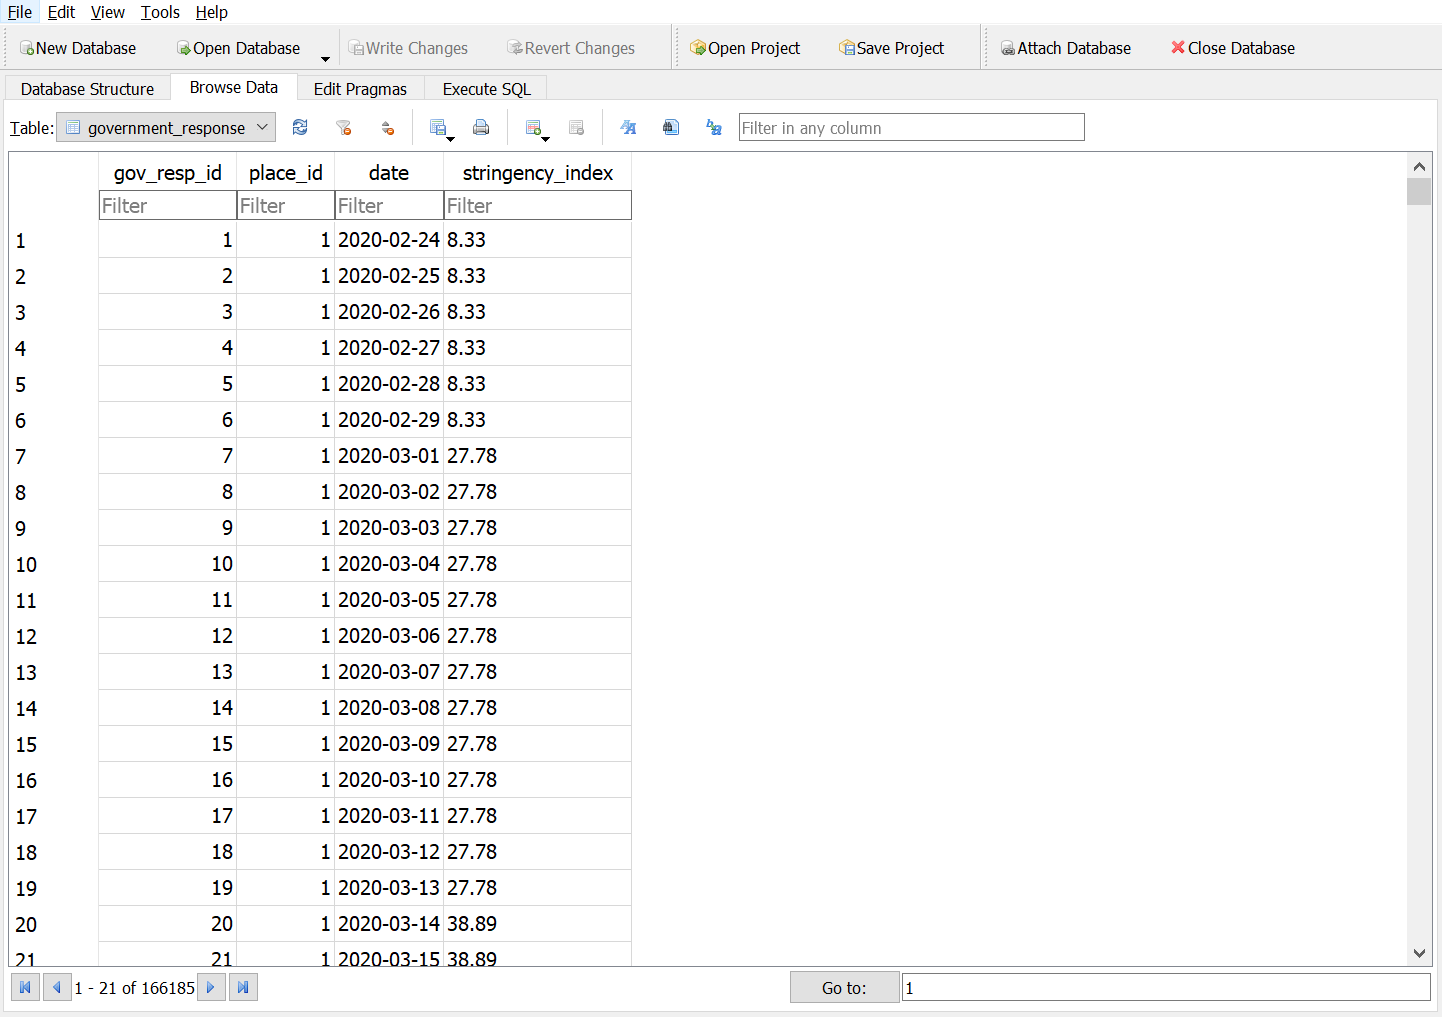

In [16]:
base64_table_government_response = "iVBORw0KGgoAAAANSUhEUgAABaIAAAP5CAYAAADkBFjwAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P151CTVneZ5vjN16vTp/mtmenpOLX26q7syZ7KqsyorS1koyzOVWlKpVCqlVGpN7QqQcIEkFkkoJRaBkBDBKrkQICQWsW/BvjiIRez7KtYAJwKCCILYICAgIoAAfmPX3K77NbNrZtfc7bqbvfb9nPOceF938+vmds3dX39eC3sX7l0n8twr9YxaNwAAAAAAAABAs1FEAwAAAAAAAAC8oogGAAAAAAAAAHhFEQ0AAAAAAAAA8IoiGgAAAAAAAADglYciui9fWFiQPzt8YLmuXLwX0f2uLCx0pDeIvkdN9aUb7FOdxk1UU9cbAAAAAAAAqJZDET0slhdseWdPbtXX79yPLT+7InpY9lnXL0huCRgroqNxuv3wKh8lYr+r1qkbjGwzkF5H339yXeokf3vrVFu+Vj8X2fLuq+x6zHK9AQAAAAAAgPpyLqKzi+V6FNETlX0zLqJzj8Ae9KQT3N/w7pPrUmezKFtncR9a3n2VXY9ZrjcAAAAAAABQXxUU0ck0tYhO8lEiZo856HWCdck6WrrOZlG2zrLQzbuvsusxy/UGAAAAAAAA6quyI6LH19uXv/VwVbTqUzd05QzjuqxUXkSHxbNeB534EdHDcYZfx5erpiQOT8/R6Ul8bc3Tcij2xzQsq9PrYxszfVnyPqpSvP3j621fNn8Zy30k5zK1TSeV93jKzUt6+fH3sdtUtu4AAAAAAABAPc2kiB6W0B05+MHh92fsvBCdX1qPYU+lRXRUXMZ62NgR0dmlYaVsR2HHTsuhpO97WFyObxcrmlNjDm9vu6z6s33kb6fkeuvHmvfY0ssk7iO1vdQmqOpo8rzHk74ud15Syw+/V/vh+DJfvyAAAAAAAAAA6mO6P1YYnhe6qIhOF9PPPdiTPwsu+8KF0fcZKVNEW9dvVBBmlH3zKKIt4w7LTLcjaUfMMjZZzKrH1elKN3jMo8vCZYyytzJ528l+XfzxTrCMrcyvzPC+7PvTMON1tax7bC6S19sfq9/HAwAAAAAAAMyf/yOiraXzcJkqi+hUuWeyHEEbmksRre52IXY6hvD72Mol7tu6/sNlhpcNi3a9vCpx1ddhmRvdKPzayykgcraTy3afZG6i28z88ZSel+RYGWNnbQMAAAAAAABgkfBfRF+oCsXx0aRmssccZrEW0bb7tZWZo/sOl7dvQ73MuMxWpbRZ8g6PKk6X3VXJ2U6xx2kw58NlGct9DI+YNrZFZY8tb97LzktyrIyxKaIBAAAAAACwyM3piGi3LNoiOhp7XMQmz2+cuG+XolKPo5YdHSk8PFK629f/hhdWLGc7uWz3iebGFJ12xVZmTyTvvsrOS3KsjLHDcapafwAAAAAAAKB+ZvDHCotun53KiuisZeZWRKu7XgiP4rUfqTzBuugysxc8JmO84Wk6esHtfRWdeetmv254NPMU54hOKiyEyyjzeArWy3H5+GMFAAAAAAAAFp8ZFNEitx6uiraOHPzg+Ha3Ht6NfW9LdUV0sJQqfGNl3/B2eUfdhrfxch7iQFiCq/u3FajpdRmWlfEyedDrGt/rI4MT4+n78fU4CrZ/ar2j0jj3saWWid+HWt58jNUWuXmPp+y8JJcffh/7xYNlewAAAAAAAACLzUyKaJVhGT0sSsO8sye3GtfbUqaIjo1txCz4hmW0Tlf6had/MMeu+ohVPbZtXNu66NJTr0+QRLmcLtuV6H6qOVzYwr6upuR625bNXyZxH1F5O14+XgRPJ+/xlJ2X5PLR953i7QEAAAAAAAAsJg5F9PziVkQDTZFXcgMAAAAAAACLV2ERbR65aYvtNlXFpYi2rVMydWFbN1vqzrbOtjSR7XFkpTyKaAAAAAAAALQTR0QDM0MRDQAAAAAAgHaiiAYAAAAAAAAAeBUW0XUOAAAAAAAAAKDZFrZs2SKEEEIIIYQQQgghhBBCiK808y/KAQAAoJF++9vfRl8BQPPxmgYAgLuFl156SQghhBBCCJlFdGlju44QQpoWXtMIIYQQ91BEE0IIIYSQmYXShhCymMJrGiGEEOKeWBH9xhtvhDEvI4QQQgghpKokSxt+/iSENDm8phFCCCHuSRXRq1atkquvvjq2ECGEEEIIIVXEVtrw8ychpKnhNY0QQghxT+rUHOoNkzdNQggpl4cffth6OSGEkHhs/42dnz8JIU0Nr2mEEEKIezhHNCGEVBCKaEIIcYuttCGEkKaG1zRCCCHEPZwjmhBCKghFNCGEuMX239j5+ZMQ0tTwmkYIIYS4h3NEE0JIBaGIJoQQt9hKG37+JIQ0NbymEUIIIe7hHNGEEFJBKKIJIcQttv/Gzs+fhJCmhtc0QgghxD2cI5oQQioIRTQhhLjFVtoQQkhTw2saIYQQ4h7OEU0IIRWEIpoQQtxi+2/s/PxJCGlqeE0jhBBC3MM5ogkhpIJQRBNCiFtspQ0/fxJCmhpe0wghhBD3cI5oQgipIBTRhBDiFtt/Y+fnT0JIU8NrGiGEEOIezhFNCCEVhCKaEELcYittCCGkqeE1jRBCCHEP54gmhJAK4lpEb968WdauXSuDwUAee+wx+f3vfy8PPPCAPProo/Lkk0+G16llbLclZJqw75G6xPbf2Kv++XPT2kfl6dsOlJU3/bNsXP2gdRlCyoR9imRlFq9phDQ9L2/caL2cENK+eDlH9IsvvigrV66Ue+65R2666abRf0268cYb5c4775Snn36aD7uk0rDPkXnHpYjeGPwA9vjjj4f7o9pnt23bJm+++WaYLVu2yLp168JSUBWEmzZtso5ByCRh3yN1iq20qep8qi9ufFbW/P4keaL/Kdnw6Eny/L2HyWMXf0Seuevn8uL6p623ISQv7FOkKL5e0/h8Q5qSLcH+/spTT1mvU9my/Al59ZJLZMs991qvJ4S0K5WfI/r555+XW2+9VR588MHwg+0rr7wib731Vvhh94UXXpBnnnlGbr75Zrnuuutk/fr11jGImWWyZGFBdlp6v+U6osI+N8uwP2bFpYh+4oknZMOGDeG++fbbb1ujPryoDxaqFLSNsThzt5z+/e/L0f0VlutIFSmz791yyy18sB2FfdNHbP+NfdqfPzdvfkGef+ISeer6r8hzDxwjb762Vt7etlq2rLhYtq+5TFbd+G159MJPyrMPnCmbX9xgHYMQM+xTxDU+XtMW3+ebpn6G4LNPUVQJLd/bT97+533llcEgff3y5fLazl+V13f7umxZeri89OhjqWXcwlywDchiSeXniL7jjjvC3wCrD7VZduzYEf53YPVhNz3G8Mm1EGTJMvt1s33ijdcnnp1k6f225fMyyfrzYlOU6fc5I8uWpOa6Xtue/bGucSmi1TKvvfZaYRmollVHuiRvr3P36d+X7x/dlxWxy1dI/+icy0+/27gsmWHZNl7GQ/l29+nyfXUfsRwt/RXqeso+3ymz76kPzurIq+QYw0T7Siqny93W5WedCfYl9s2Zx1baTJMNz9wqK2/ZR565/UDZ/uLvg5G3ibz9kux44R558sJ/lO2PHymvrzpftjx2nAwu20Ueu3hnWft4TkHU1J8FliyzLDthom1QzeNu3s8OVe5T9y/dKT1XC0tkmWXZ2YT9p+pU/ZqmUunnmyDLluTNs20bV73dJx0vY3/ls08toktoOfBgeTvIW9/aR7Y8+eT4elVCf3kX2bHHXiIHHBh+/dI558pLWQc8WN5/x3Ndh7lgfySkilR+jujf/e534YfdojdNdWTWhRdeaBnDeHLvtFTut1w32yee/T5HP1Sm1jEvvNj4yPT73DD6B7T4L0Ci/bHUPPsM+2NdU6aIVv/VUp0OQX2tX3dfffXV8IgXdfoEdWqEvCJ6Rf9ooyjT0QWh/fL8Ii26raciOizOg/FOvztxnSoAw+Kcss939L6njnhW54JW+6Da79TrotrX1Ifoq666Sq688sqwhL7hhhvk+uuvt4xlm6volx21KKPL7Uvsm/NJsrSZ5ufPVfceKU9c+Q/ywhNnydaND8kLK38nK+86Tga3HC6PXb23rPjt7rL18Z5sfeAgeW1wsryx+nzZdPch8ujZH5PlV343NV5zfxaI1rGqgrPFRXSV+9Rwf0oWFPfL0p0mKS2qCvtP1anyNU2nqs83w+j5zZrj7H2iuu0+6Xj22/HZpyYJPrO8/e3vytv7/UBk6RHy1r4HyI7dvxmeiiMsob+0s7zxzT1Fguu3f3lneemDfx/exjaW/f03iHo9Cee5DnPB/khIFan8HNHqvwdt3749/O9E6r/2qvNQqjdJ/WasznOlfmurPggvW5bzG9klS2Sn4F/bB4HZPvFy7vP+peE6uh9BwIuNj0y/zwWJfmBOH4WvMpyDSo8UmTjsj3WNSxGtzr+rPlSor1Xp/Oyzz4ZR5aAqoB966KHwlByqiFZHwiRvP8qKvhydLM/C4ux0Of1oy+WpcrooFZZv0dGmqaIvFso+39H7nvrAumLFinB/U/usKp3vv//+8Hu176moy9W+qIrpiy66KDFWxlxF++T857DEvsS+ObfYSptJf/584sp/lLdfWyWvb7xPXnjoGNl47yHy3A17yeDST8udx/6FvLHpfpGtT4hs+K28/fRxIo9+T2TNWbLjqUPk7mP/a3y8pv8sEP0cUL/36Gb97FDZPtW0+WD/mThVvqbpVPL5Rid8bdtJli7Neo2zbeOqt/uk4+Xcjs8+9cjGTfLmHnvLW/sEr4U/OlTe/M4/y2u7fFW2f3GJvPH1PUT23T/8evPffkg2Bz+HWsfIff/VqcNcsD8SUkUqP0f0NddcE75Rqj+MpN4g1V/m138ASb1ZqjdV9QcWnnvuOTn//PMtY4yfXOFvxWK/VbI/8eL/5W38W9707W2XqaMSgssyXzDyn+zD+47/d5Hxuqjo9cm6Lu8249up+489Tst2yR4jSPTiPkpiu2RtwyZk+n0u2gcS28TMcPvE5zJ/Tszb2barHmPZ8L6jZbL2s3HG9227fnh/7I/ziGsRrfZVdTS0KptVKaj+VYWfOvpUfZBRxeAVV1wRRn2vcskll8ggds61dDkWHiV9+t3hEZ6py0dHqo5vN7xcH8Vqjjf8enidzvhI1/Ht4pfbk3W6kGT0/d8dHVk7TLz8y18vtzGiRAXkaJmj00eY5z7OxO2LH9/8Y9v3VAF97733hiW02u/UfnbBBRfItddeG+6T9p8FzH3FuDyjiLZvx+z9Innamex5GK/HeJlj5djRsrbbmGHfnGeSpY3KpD9/Lu9/St567VmRVx6RN9ZcIi8/cKhsffCgIN+XNZd+OLxM1vdFVp0obz/2fdl6/Xtk/ZXvkpcf7cndx/25MdZi+Fkgev8Nf6a1rd/4vuPrFB9LH5WWvDx9u/T7c3LchSX7Ddcplnq/r2ftU3v+8hHZ/5RH5FsnPCg/OvMx2e2n98nuvfvku79+UL7zq9/LLkfeKWcd9rHxWCWKFfv2yd4nk59niuYlHvafqlPla5rO9J9vxhnvL+Yc6+tt++D75f2py9R2ty3rMo/mPsVnnzCJ53V8m6W3ae0T7Kev77qb7Nhjb5EDfyiy/4Ei+x4g8r19ZfsXviSbP/B32SW0w/vvMOO5MC9P7m+pfaXSbW9fBx32R0LcUvk5otUb8datW8P/9qt+Q6uO9lP/qt8K33fffeEfVVBZvXq1nHPOOZYxxk8u/Vul8Q9wxnXR8vEne+IHs/AJNr5u/KRMX5b9Q2L6PmOJ/ZC5TJYlxhn+MBZ/wYmP5XYbdR/j2yXL84IxUttRXT9+Qcndhg1I0T6355l/Kbv+5k9l5aoVxftc6rooiXkunpOi7ToeYzQvqf3VloJ1ZX+cW1yKaHUeP/WhQn2tikC1n6p/L7vssvCPyan/fqlKQfWvGXV0qioJzbGShZ36Xh3ZGZZUicuTp9xQBZWtSBtflvx+mGEBNi7FkuuQivNRsuP1Gh2dGhZqZgF3t9ydOHI1vP9REecyhr7MPApWn1ZivFzu47QcjX736VllZ31i2/fU6TfUqTjU/qeKZ7UPq+vOO+88ufzyy8MjsNQfRIqPZd830tu1YDva5iYxdv7+Np7v+LpkrF8y7Jtzja20mTSPX/EJeWvbsyKvPinyyqMiG6+X7Y8eLlvv2l3WX/Fh2fHk0SJPHSX/fPafhz8LrLvhg7Lu2o/KSw8eJXf9YidjrIL3V5Xa/ywQjWeUPvH1Gya5Tvp9Ob5c+j6K3p9T46oxwuuz1reeydqndj36XrnkvlfCfffyO1aH/5pOu2GDLDn8rvFYTkfHFfzMZN0f4tuz/M9NWfMxvJz9p3yqfE3Tmf4ztY45r9Fr1Ojn+vgyRXOoLsv/nFA8j9W93kXhs099snGjbPv8l0T2/YGI+vcznxfZ559l8/v/NqeEDmJ9DbElPX+Fr0eVb3v2R0KqSOXniFYfZtW5TtWHWfVGqf4LsHqDVL/Jveuuu8Kj/tSHX/VmetZZZ1nGiD8hh0+ErCer5clrPrGSTzL1wrDTkuDN0LgsXCbvDdD2AmEkuo/M62NvsAVj6bjcJraMJeb1ucsWbMPYsvVM0T73tVN3koMv/5z80wl/JKefdWp6jKI5VIltE5c5KdqutjEyxo2lYBn2x7mlTBGtP1SsWbMmPEWHOv2BKptV6ayKQV1Aq9djdToFdQ7fZBE9LKTMoisqp8IyKl6Ajcu2rJLOZTnLZZbiK5aSZV/h/SUTK/NcxoiKveQfbiwax3yctgKxAcna99TX6pcf6q/yq31QvY6qo6JVCW0bJ287x7drwXa0XR9u26x9N0jR7bNuZwv75lyTLG2m+fnzsUs/Jm+GpeHjIlvuF9l8p8jGa2TH4Bh5+aZPy+s3f1Beuv4vZM/T3zH6WWDtpX8rL959mNzZ+7PxWIvhZ4HwvgvWL+Py+M/btuUst3PZHmHyrqtfsvapzx96h5xy4+Zw393zF/eG/yrbd4i8/JrIURevkZ2PiJ9Wa7hdh6VBfiFtpGgfCq/P+mwUpPDnpoz5YP+ZOFW+pulM/5k6Smxex/tkfP+wbWPH7V60v44y6X0ULBPtR5nXO6+fEZfbxJaxxLw+d1nL+IXP4Xrm5ceXy/bPf1Hkn/cV+fRnRT75TyJ7f1te+kDwPhz8jGm7TZiiORwlua3scxN7Pap822fsDzrsj4Q4pfJzRPf7fXnllVfC81mpN0x1lN8zzzwT/rfyW2+9VY47+wj59vFflO5PPypf/MnfyClX/jwxRnLnN79PXGd9UgyXGV42/O2QXl69KKmvwxen6IfB8OtpfutlebHRb/DjFL/YlL6N5bFnjhEta32chduw/knuc3ud9S7Z84w/l91O+zPZ5eT/Igdc/Ck5/56fyz7LPiof+Nm/knWb1sbHsMxhKrHt5DAnhdvVNkbGuLEULGN5LOyPs4lLEa2OYNEfKlQRqI9u0UW0/uDy5ptvhtHfq/+Cee6558bHCwuoqHQKv84qpc2iOKtAS15eUHglbhe/zEh0m/T9JWNbL/u6Dgt4dZSoTomyz/oYgpgFXtHjjK7PPRK8hsna99TX6r/6qlN0qCOjVTmt/quvbYxhhtvCPgdGHPaX+BHO0fe6iC28fWJuE8ukL08kGr9wOet49vtg33SPrbSZ9OfPxy76h2Fp+MojwYB3ibzwO5ENl4c/C+x15p/L7qe/Q75yyp/Efhb42+BngY23/VjuOLrk+Xxj71EO74eF72m2MTLGjcWyTHRf4/dWh/UzL099ME3cvuixZI1rLJf/mOqTrH3qi4fdKafdsFneePMt2fHm2/LWW2/Lm0He2KG+f0t+cu4K+cRBN1nHVIn/XGSWtnk/d6WPRgu/16V24T5mi2U+2H+mSpWvaTr68436HK1+BjzyyCPllFNOkaVLl8qll14a5pBDDgkvO/TQQ8P/ybR+/frUOMN9y9jfom0d3562bZy93Yt+xnefR5e5LVjG8niyn08TPKas21gea9F2WayfxVVefvxx2fa5L8gbX/2ayLf3Edn7OyJ77i3yzT1l+6f+SV5817tl84MPWm9rm0N7EnNh3XZBzNejyrd99j4UxvJY2B8JSafyc0Sr85qqc1CqD7nLly8PP+A+9dRT4dfHnnOYHLxsZ7nikePkwbXXyM+u/br808/+kxxxzn7GGOkn1/BJpN5AE9eFLzLmk2scvcz4hzVVSptPvuEbcuyHOWuyXyDCROswfGIOlx2/UOjr8144JrlNkNiLRNEYlhci/ZgdtmHdk9znvnHGO+WS+4+XC+87NvzQee49Peldt4+cdscRsttZH5B3HvY/ynMbnjXGyNjGZizznDsnhdvVNobDehQtY1nPcvvWJLcJwv7oVESrsk+VgarsUx9QVFQZqApAdb5edZ5eFXWEizrSxYw6SjU+nlFkqbJqVD4Nj6wcXT4qqBO3GV1mu9yyXDiWWbKNkx4vSqVl3/D7WOlplnQuY7iUfQ6PM1U4Jo9irWGy9j31r9p31f519tlnh9er806q8032ej056qij5PjjjzfGsm9T+5G8xjYyMrqtZf5Gc1N4e9t8j8dJX54I++ZckyxtVCb9+fOR8z8gb+94XmTbCpHNN4lsvEpk3bLCnwX+PPhZ4LbD/qMxVsb7mxnLe2zu+2Hhe5ptDIf1GL3P2saML5MaJ/F+PErsfVwlcfuixxLbNsm4PKb6JGuf2vXou+VXV2+QA89aIT88e4UccMZA9jv1Cdk3yPd/s1y+f8py+eIhN1jHjCXaVsPtoecy+2em+PfD5UfbuWhe9H3Gou8zb/mMOUuum07L958qX9N01OcbdXqsn//852HU+7M64Eb9nHj44YfLYYcdFn7uUZepg73UMr/85S8T40T/ZT9WONkus23j7Msy98/S8+gytwXLxO6zYP1y1qHcbYLw2WeUsIT+7Oflja90Rb61j2z7zOfkxb/+G9n0V++RVz/yjyJf2022/sM/ysY/20k2P/BAeoxoWxY/3sRcJLbxKInXo2q3fcb+oBONyf5ISH4qP0e0KlTUv+q/DT3yyCPhUX7qaGj1BxaWHP5BufThnlz62DHhm/VR1+0qP7vua/Kuvf+dMUb2E3KnpUvj16V+6LEkfDItkWVq2dEb7vANeMky/W/iNrFkPNmjDJ/E0W+ZE0/wMEUvHJPcRiV87NEyhWOYiX740Ne5bMOaJ7nPfeU3fxp+8PzpNXvJ4Vd/Q37S78oPL99ZfnTl1+SEm38sXzj1L+WPDv4Xxhi2H8jiic2zy5wUblfbGPn72jD5y7A/zi8uRfTdd98dfpBQp0jQJaD6V512Q12njnxWSZbR6gNO6oho47/yqyNJzZIrLKOiy+NHR9oKMdvlluWyirLcROtYeISmQ1EXK/ai+Cj7Sj3O6PEl16uGydr31C/w1P6nXkfVkfmqdD722GPDUvr2228PC2p11NV4LMt2jgrS2GVO29EYKxzD+KVJ4e1t8513eTLsm/OMrbSZNE/+di956vrvybbnbhDZNhB58SaR585y+lngP/zw/26MtXh+Fhgmb/0s65R6n07cvuix5F7vsr71SdY+tfORd8kxV66Vg895Nsgq+cEZK2X/056SfX8zkO+d8oR859ePyD8deK11zHiG2yP84O/0M5Ox/cLr9D4YpHAfs8VlPjKWYf+xpsrXNB31vqyOit53333l/uBnzP33318+8pGPyK677irHHHNMeLn6Wl32jW98Iyyj99vPPLgrSLRdbaVS7nxlXVa0v5aeR5e5zV+Gzz7zTVhCf+bz8sYuu4rs/S3Z9unPyovve394TmiV9X/2TtnyN38rsstX5NUPfkjW/6c/kRfvS85l8fvvMIm5yNp2Xrc9+yMhVaTyc0RffPHFYSGo/iuRKqDNIvrD+/+p9B85KXyj1i576Dh55zf+tTGG/ck1fFKrJ4l5Xf4LQRj9pFwaPPn0b3qCqPGGxbbtCWkm5z6iJ+roukleOCa5TZByL3KJxF5gHLZhzZPc5z5/4n+Q8+7uyVl3Hi2n3X6EnHLbYcEH0K/LL2/+kXTP+qD816X/b7nzyVvi44TbK+tFd7iNxvuPw5wUblfb9S5zkbMM++Nc41JEq3P7qXJPHb2ijuJXpaCKOvpUHbGqLkveRh3Feu2118pvfvOb1HVh4Xz06XL60YlySpVX0eW55Vfm5Q7FmWP0EZrOhWTWZVWUfVmPoXCcnJQqB+eXrH1P/YJD/yJEnYtcRS2noi4/6aSTwv/ZNB7Lvn3CX3rEtoPbdhzuw33pJ36ZUnz7rOvd5499c35JljbT/Py5+cWNsvrBc+Xh8z4hz9z4A3nzxTtEttxb+LPAuw/71/L880/Hxwvfqxr+s8AoWcvYL4+vt225ovvMu77otvVK1j71yYNvlV/2N8iG4OfNtS+/EGSzrH1pszwXfP3C1ldk35MelffvHf97DtaYP685/swUzs9OS2XpkuR2nGTbutwmaxn75W3ff6p8TdNRn28OPvjg8LQbqohWp9j6wAc+EB6goP4XnfpDhRdeeKH8zd/8Tfg/mFQRrZY1x0jPS5TkZwbrNrZcVri/lp1Hl7nNWYbPPnPPy8HPjVs//Rl5Y+evyLZPfUZeeO9fx/4w4eb1G2Ttf/rP8vK73yvbPvRh2fAnfyovXJP+hd1we2a9/+okt5XD3CQz9bbPuQ37IyHOqfwc0U8++WT4wVa9Qar/TqRKFPUXf9W/7977/5Qjr9lFll6zJHyzXvrbJY5HRI8vjxfR+kkXf1Ldv3SJ8b3+LU/ihS18MgaXl/3Nm46+vVFup158Rus8Xr/UXx0tvI3+3ngxTd6mYAy1jczHnnxxLt6G9U5yn/v4L/9P+dDP/1d5/8/+P/KXR/4/5Eu/6cjxN/1QdjnjA/Knh/4vcu9Td1rHCecm2G7xN8BoW8b2k+iy3Lkv2q7DMczl7Zclk7EM++Pc41JEq6hz9Kpl1QcGdeSzKv70/qsKQvUBQxeB6mt92YknnpgeLyypLEc9RgVUumTLKrLSl6ePptbFXfy+VvRPj9+3JemSMopa//A+bOuVuCx6TONlhteXK/v0uqSPvDUfV97jVNeZj2O4rHn6k/rGtu+pr0877bTwlyFqP/zpT38qRxxxRPhfftXl8RJaxbadVfQRuONt4bS/WLb/eNm822eth33fzQr75nxiK22m/fnzhXXPyIqbfyr3nfhX8tytP5KPnxD8LHBM8LNAL/hZ4Kj4zwLv7/2RbNiUPpeqSqN/Fogle5nUOlnW23b7ovfn9PXBGNE2S/280YAk96mPHXSL/Lq/Wda9skEOueFjcsJde8mv7vpW8PUnZf2ra2T/k1ZIZ/fzx2OEP5sZPy+F0Z9LossLf+6KEi2XujxI+Z+b2H+qjo/XNPX55rvf/a7sscceYRF94IEHhqWzKqM/9rGPhVFfv+9975Pvfe974fv53nvvbYwR7Wvma1TyOmOb2rZx+c8JefNo26dslyWTsQyffeqT226XLR/+qLzwnvfGSmidzevXy5o//P9lltA64dwE2y3+/htEzXXGPpTadom5qH7bp9chDPsjIaVS+TmiVdR/91X/rfzMM88MP8guW7ZMzjnnHPnqQZ+STxz1R3L0NV8Nj4RW/6rvi84RrTN8UqSv05ePYj6Zgwxf1Iwna5joCWl9czajn7jJxJ+co+gXIb1M8KSNL2uOF61T7m2i7bFkSfiCopdLbZ+8MaIXo9j1iXUv2oZ1T9Y+d9xxx8mf/Ph/kC+f9tfy35b+a3lg5T3W248S247DpPfFaE52im+zvH12lNF2jcaI3cZ2WTLm/mMmPadh2B9nFtci2syLL74Y7ruqBFRHqqoPLk8//XR4mTqNgvpaXaZKQ2sRrQuvVOmW9d/ybYVY1uXR2GGS5aK+PIhj4Tcuzc2UK+riYwS37avvS44RRJePwwSPLRw3We5lPM5ROaiT3MbNiN73VNTX6vXy5JNPti4bj32bhsksTo3tlbWvZuxH2bfPWY/ouuFtHIpY9s2Zx/bf2Kv4+VNlw6oH5fHLviN3/vQ/ycb7fibPXrVX8PV75L8f+j+FPwv83TH/RTa+kP6gHEtDfhaYZpnkOqWXs9++6P05df3o5+zheMPLkz+T1zt6n/rUj2+Xa+7fHOy5K+SOF5fK46+eLo9vOz34+qjgsmfkJ6evkL/6uvm5YnwwTCzJn2kKf1ZTSReHZsr93MT+U3V8vabdcccd8uUvfzn8JfF5550XnkJLnQf6W9/6Vvg6r75Wl6mjp3/xi1/I1772tfHto5+3U6VelOG2Nvcz2za2XOawv9rn0bZP2PeTeMx1MJN8jkQpXL+yjylaRz775GbzLbdYS2gdVUbnldCjxLajTmIuCl5XYtdXvu3ZHwmpIpWfIzqZTZs2hWWKijpa9ejzfiDv+fYfhKfjUP+q7223I2TSJPe5/3Dw/yj/2/7/Qh5Z9Xvr8uVjfxMk7c4kRbSO+q+V6ly86g/TXHXVVXLllVeGUd+rqIJQnbfXdltSQcKyr55Hjs4qmzdvtvxBTDL3LNJ901baVJ01j1wjD57xeXng1E/J6gcvlz899H8OfxbY9OIm6/Lls8h/FigosdqYLxx8jXzmkFtktyMflr1/tkq+efRTsseRT8qeRzwu3zzyPnn/HsvkP3/5bOttW5eW7T++XtPU55gHHnggLKN333132XPPPcOoc0er/9X07W9/OzwK+utf/3q4jFrWNg4hhBBSp1R+jmhCFn8ookk60xTRZIa5+3SnI1MJmXlatG/a/ht7837+XNw/CwyPhkofJUWIS9q2/yyO1zRCCCFkNqn8HNGELP5QRJN0KKIbkvAIU/P0BZTQpCZp0b5pK22a9/Pn4vxZQJ+jU4WjoUnZtHX/WRyvaYQQQshs4uUc0YQQ0pToD0x5sd0uGYpoQghxi+2/sfPzJyGkqeE1jRBCCHGP93NEE0JI3WMrn3Vsy9tCEU0IIW6xlTaEENLU8JpGCCGEuIdzRBNCSJBpSmgVimhCCHGL7b+x8/MnIaSp4TWNEEIIcQ/niCaEkCiTltAqFNGEEOIWW2nDz5+EkKaG1zRCCCHEPZwjmhBCjExSQqtQRBNCiFts/42dnz8JIU0Nr2mEEEKIezhHNCGEVBCKaEIIcYuttCGEkKaG1zRCCCHEPZwjmhBCKghFNCGEuMX239j5+ZMQ0tTwmkYIIYS4h3NEE0JIBaGIJoQQt9hKG37+JIQ0NbymEUIIIe7hHNGEEEIIIWRmsf03dn7+JIQ0NbymEUIIIe7hHNGEEEIIIWRmsZU2hBDS1PCaRgghhLiHIpoQQgghhMwslDaEkMUUXtMIIYQQ91BEE0IIIYSQmYXShhCymMJrGiGEEOKeBfXGSQghhBBCCCGEEEIIIYT4CkdEE0IIIYQQQgghhBBCCPEaimhCCCGEEEIIIYQQQgghXkMRTQghhBBCCCGEEEIIIcRrKKJJI/LEE0+QFse2TxBCCCGEEEIIIYSQ5oQimjQiqoxEO1FEE0IIIYQQQgghhDQ/1iLaPBKRkLoE7WTbFwghiyu2n0UIIYQQQgghhCyuZBbRtssJmVfUPol24vWovWHu2xHmmRBCCCGEEELaEYpo0ohQRLcXr0ftDXPfjjDPhBBCCCGEENKOUESTRoQiur14PWpvmPt2hHkmhBBCCCGEkHaEIpo0IhTR7cXrUXvD3LcjzDMhhBBCCCGEtCMU0aQRoYhuL16P2hvmvh1hngkhhBBCCCGkHaGIJo1I9UV0X7oLC7JgSbcfLdJoWY+vI71BtIiz4Vid8jesBK9H7Q1z344wz4QQQgghhBDSjizSInqZLFlYkJ2W3m+5jjQxvoroZLk66HUmLGvrJu/xLchCpyfuD7HlRfSyJcE220mW3m+5jngNBWU7wjwTQgghhBBCSDviqYgeFsHpozEnKXMmKZXrW0Tfv3Qny3ZZIsvC62e53s0q62dVRMugJx3b5Y2TUx5Hj3HB+dDvxVBEZ70mDZP7PIgV0dE4S5ZF17s+jzLufzQOsaXagnKKfWBmcd2f3JL/fmMk3Mfjy6XXodp1M0MRTQghhBBCCCHtiNciOvmBdfSheKelcr9xeX4m+fDr7wPzNFm2RH3AT5bx98vSneIl12zWu57bKCuzLqKHHe14mdGRxAvd4NKh8WXDmGP1u8FliaOO05cNpNcJLtOFcL8bGy95+/j9jdfDLr88jh/5PVw2dt+j8bOuy7tNtaosoifa3yssouPLRWPZikESxkcRXe/XvOrWsfj9xlxuQZYsM5eL9s3Ye7W/7UcRTQghhBBCCCHtyEyL6DD3L5Wd1Adc5yMBJ/nw6+8D88SJHnf+Os1yvWu4jXIyqyI6LIstJWxyuXiRG14QP5I6LJXNU3zosdKXhT10rAAf6nfHxW7y/mxFd5z98Y1Epbcu3PvG/Sq27RAfq+g21alXEZ2M67gZyzm9LrQ3FNETxnW/io6EjpfQOsN1Kf9Ll/KhiCaEEEIIIYSQdmT2RXSQ4ZHRiSMMY4mfqiJ9Xd5txrdT9x/7r8mWo7uyxwiS/O/KiSO54//tueCoxtwP/Cr5jzX+WOKXJ8dIbvf4egZZsl/hfWWPmbU+tvsq2CYl4quIHq+rTrooTpe59suHZXFUxCaLZVX8drrS7RiXhctE95cqrk2W+7MU13FZ6x5JFudJsfUpGEvLfQyTm3kRnXzeh4m/Xg3HGX4dXy5rn8+6/2iMsOwbL2N7rhfeT2K9d9pJjZFc72WydCdjnPA1TR0la9wuto4O913wOjlNZl1EW48itvzytOh1Ln69vq3t/s3L8rd1qdfWwvcblWjec+ZreJ/6voq336ShiCaEEEIIIYSQdmQuRXT8Q/IyWZb4sDwsA/I+/LrdRt3H+HbRh27j6K7cMaLywfwgv2zJ+MP/8AP6uLAIb5tXwFjKjHTsjzX9WPKXNS9Lrme4TLiebrdPXzb8Pr0+E2yTEvFVRCfL1eFRveMjha0FbFYJHCtih6fd0LdVJbX6OiyroxuGX+ujmqMxrUc5W+9vuG5VFtHDIn34+IcpLqKzb1OdmRbRtgIvvCxZ6MafD4XjZi4XPZ+MolLdf3y5ote7IKn11uVyfL1jy0S3ib0+pF73pnudnDazLqJt5WzydazodW6611z7Os7u/SaRxHt18fabLBTRhBBCCCGEENKOzKeIjj4kZ16fW/xkxOU2sWUsMa/PXdYyvqWQSWZYJiwMYy0IbOud9fhdls26bdZ104xpudxhm7hmVkW0vnxYFmcsk3Xkb6IwDkvt8BtVSkfLh8sMj5oeXz+UKnXHA8UvN5JZNOeUx6FozOFdRI/ZfEyxx2gbq+g21amyiE5uv2H08zz5y6ooua8tWc+HZDKWC8eeoOiLrdMk613mskTMcWP3UX18FNHp+VcxHoP5/pR6fJbtE3udy9t+LtvbZZkgVbzfmI8zeZ2O82ObLhTRhBBCCCGEENKO1KaIjn1oDpNXoEx4G8uH98wxomWtR51ZxtH3mVcMmInfrz6C0LbeWY/fYVnreuq43lfyMtsyQSrYJnmpVRFtPUI5kCxiw++70lfLj450Hh4p3e3rf8MLE6I/YqjHyrq/XFmPb2hYekenEbEVyEVFdOFtqlNlEZ3ab81kPV9yC12HccNYlku9xuSPVfRaVW69y1w24etkBfFRRGdtXzPDx7uT7LRTYvmi17msuTCWy9/elmWK7nN0WXas7zfRuLnbI3bftvWvJhTRhBBCCCGEENKO1OLUHGrZcWGiry8uUMrdJojlQ3X2GJbyRR9VFq2/LaU/pEdjDW+X/VjT4zosG41tLytc7yt5mW2ZIFVuE0tmVkRHpe/w8qwy1355rNxVwrE60ut1U0c+d3q9YIyc0jZWPueXynY5t4k9xgBF9DBZJWLsdcHx+ZDKcLn850bWWPq2Ga9VE62362UF9x18n/k6WUHmVUTbTtERpuh1Lrp+8tdcyzJF9zkayyHRWMPbOWyP2OMps/3KhSKaEEIIIYQQQtqROf6xwuiorPCDrlFypC7L+mBe8jYqYWETLVM4hpnE+Vazip+JMlzXYXljW++sbemwbO56ut5X8jLbMkEq3SbpzKaI1kci6zI5u8wdls5G6Zosd0N6vMTRzGFhG1xunA9ajWcukyy1U/cXGPS6OaVvxrrr+47fWWLdh7c17y88jYh5/mqH21RlMRXR+ctlLFP0WjXRejteVnTfo9upJF4nY9dNlnkV0eF71E47hds1tnzR69zUr7mWZSp9bR2OP3y/ySjbjcTeq0tsv7KhiCaEEEIIIYSQdmT2RXT0oXp0XWHRYRlrktsEKVeAJxIrAyr8QB7bHrZxs+7LZdm89XS9L9cx8+5r+vgqosNS1kzsjwVmF9HKsBwe39a23PCPHxpHSYei+7aUwePx0oVu8v6sf9hwJOPxZRXFuqDWy6ijuGPLmuOZp/TIu001ZlZEZy2T+9riut9Xdf+2yyZZb8fLCu87kUpL0zkV0eZjSD3WojHyrnfY3k7LTJHE+68+mj2vOB8f4V7heiRCEU0IIYQQQggh7chsi+jwQ735wTZI4oPx6MOv8eF/2ZLge/OorcLb6O/1kVyW2xSMoT6gmx/O40eG6e/jZcz9S5fEvo8lfOzG+oTRRxCOL0891qxtGSS+rB4rvmx6PYPxotuk78tlzOz1Kb1NSqT6IhpNMbsiOtr/Y8/T+OuCbRzb8ygdl/vPWMb1NdLyepe33k6XTfk6OW1mX0RHr3mj96j0UcNFr3Pur7n212zb/lT6tdXx/UZluO8ky+honmPr4bL9JgtFNCGEEEIIIYS0I16L6LB0jiX+QXoUXVDrZYIP2KkP8qProw/RubeJPjAvWRKVMcOkPkDnjTEqcozrE+s+LAeMZRLlQTzj0iH/NsnHmvfh31xWrZ992dR6Jo5wG9+Xy5j2+9Apt03cQxHdXlUW0bF904i5P+tibpjgeRG+Tujnv23/N8eOl3zJZbKeN8PkLFP4Gjn5ehdeNuXr5DTxUUSP1zWenZZeai1qR4/R+AVq0euc22uu2lbZczBcZrwuft5vosTmeJj0fpi3/bL2e7dQRBNCCCGEEEJIO+KpiCak2lBEtxevRxMmLBenKwjnHeZ+9hkW3tX+QqEozDMhhBBCCCGEtCMU0aQRoYhuL16PHLJsSfGRzQ0Mcz+HpE7H4j/MMyGEEEIIIYS0IxTRpBGhiG4vXo8c4nRqheaFuZ9TEqdc8b0vMc+EEEIIIYQQ0o5QRJNGhCK6vXg9am+Y+3aEeSaEEEIIIYSQdiRWRKsPg4TUNWgn275ACCGEEEIIIYQQQuods3dWSRXRAAAAAAAAAABMiiIaAAAAAAAAAOAVRTQAAAAAAAAAwCuKaAAAAAAAAACAVxTRAAAAAAAAAACvKKIBAAAAAAAAAF5RRAMAAAAAAAAAvKKIBgAAAAAAAAB4RRENAAAAAAAAAPCKIhoAMDcPP/xw9BVmjW0/P2x7AAAAAG1EEQ0AmBsKuflh288P2x4AAABAG1FEAwDmhkJuftj288O2BwAAANBGrSyiL7zwQkLIjALkoZCbH7b9/LDtAQAAALRRa4voVatWEUI8hyIaRSjk5odtPz9sexTZb7/9CCGEeAwAYD4oogkh3kIRjSIUcvPDtp8ftj2KUJIAgD+8xgLA/FBEE0K8hSIaRSjk5odtPz9sexShJAEAf3iNBYD5oYgmhHgLRTSKUMjND9t+ftj2KEJJAgD+8BoLAPNDEU0I8RaKaBShkJsftv38sO1RhJIEAPzhNRYA5ocimhDiLRTRKEIhNz9s+/lh26MIJQkA+MNrLADMD0U0IcRbqi6i172wVQ457U75xA8uk3d981z5yPcvkT1//ju5/r5VsuPNt6Klhn7Tf0S2bH09+g51VVUh99Cq7XLBnS/Lb258QU7+3Ub59XUb5fhr1ssvrnpeeleulaMuWyOHXfysHHLBM/LD81bID856So7vPxvden5+e/86OeD8x+Ufj7pTPhrkUz+/Wz7Vu0c+cvhtcvTFK6Kl/KAMnZ82b3u9z3/+2HuDfV3t71Giff9TP7tLdj/5AeldukLe2BF/XZ+lKx/dKn973Fr5h1+vlbUv7YgunR1KEgDwh9dYAJgfiuic3PLQOjnvthdLFRu9S56yjkVIG1NlEX3jA8/Ku/c4T75xzE3ys0selnNvflrOvWml/OLSR6R71HXy13ufL7+9+5lw2YtuHsif7XqmvLLtjfD7WXr77bfD187Vq1fL448/Lvfee6/ccsstct1118m1114rv/vd7+S2226TBx54QJ566inZuHFjeJu2qqqQO/f2zfLq9h2l8v0zlke3np+PHHabbNqyXV589TV54ZVhNm15TR5fu0V+cNmzsvtxA29lXJVlaJN+EbB+/XpZvny5PPTQQ/Lggw+Guf/++8Pn6t133y133nmn3H777XLrrbeGz92bbropvK5KPororW+8Jb2bNsjSGzfIL2/fKL+4Jfj6+vXyo/5aWf1ifX4pt8/pD4X7ebjPG/u93vfV80Hv/9844am5ltHv7T0rnz15bfTdbFGSAIA/vMYCwPzUpIjuS3dhQTq9QfS9jcsyblyL6LNvfcFaXuTle6c/bh2LkDamqiJ65dqX5L17nSdHXfiwnHz9U3La71bIFfc8Jzc8vF7uXfGiPPrsS3LDQ8/Lxw+4THY7+lr5u+9eJO/c7azgOTn7IvqZZ54JSytVNKkiWuexxx4bff3oo4+GxZcqpPv9fq2Ojnzttdfksssuk1dffTW6xK+qHvspN2wKX4PPevQkOe3hE+TkB4+VE+7vyS/uOVJ+etdSOfz2H8khtxwoP7xpPzngd/8cLrvXiY9Et56fjx99p7y89XW5b/WbQXbInc+8Ljc/9Zq8tuMtuW/tm3JI/1k55NxHo6WrVeV+16RfBKjnotrPy+SGG26Ibl0NX8/5m55+VX7+wGa5/bltctvqbfLDa9fJYN12qdPvuj53zN2yZdsbcsczb8hdq3bIXc+q/X6H3Pb063LT4DW5+rFXg/1f5Irl2+QHl6yS3Y+fTxn9xLrX5cPHPid7nrtevn/RBtntjHXy20dm87qoTFuSHHTQQZXvt8jG9gaahSIaAOZnqiJaFcMLBXErjutZRE9abNjGIlXmVPlcsC+846CbLNeROqWqInrpmXfL139+o3z7hNvkL79xrvy37pnyl988V3Y98ho57donZPmal2WwdousWPeKHH7u/XLn8g3y7j3Pk61zKKLV0ZOqxF27dq08+eST4VGXqnS+5557wqivVQmlrnv++edl8+bNcu6550a3nq/t27fLeeedJ8uWLZNf/vKX8vLLL0fX+FNVIXfi9RvD12BXatmv//L30Xfz87GoiH5g9ZvywJo35e5Vb8itK16Xp9e/Gh4Zun7zVvngD2+Jlq5WlWVok34RoJ6TqlzWR0Tro6FtR0KrYkkt+9vf/ja6dTV8FNGqaz78xvVyzmMvy4+uXSdLb94oB1+xVl58ZfanlciyLXiN2WWP78mue3xXrrxzhXypu5d8dpdvyj1hGT38Jcw1j20d/SLmrufe8PrLmDxn3PmyfPbE58ICunfNi/KPx6yW/3rQCnl202zeV5IliSo6bTnuuONG159//vnh14r63ixGk99XLXn/beN7+wKoFkU0AMxPhUdET1MU17OInrTYsI1FqgxFdFNSVRH93r3Ol/fuvUzetcd58r69z5fTr35UNr60Te58dK18+dCr5GtHXyf3DTbKsxu3ytoXt4X5q2DZbeqwuhlT5dXTTz8tr7zySvgaqormF198UV544QVZt25duF3UKTnUqTvUMqoEq0MRrUros88+O1yXSy+9VH71q1+FH6zVevtUVSF3wjXrw9fgs29Z7xS17Fd/cX906/nYsWOHfPSo2+WlV1+Xh9e+KQ8//1Z0VPQbcu1jW+XKR4J96NXX5EM/uVVef736UytUWYY26RcBqnxW5bI6JY5L1LJXXXVVdOtq+Ciiz39gs1z+5Cty2FXPy30rX5Wjb94gB1y6Ru5esVUOuHyd7HbeWvn6uUHOfk6+dsZq2eesNdEtZ2Pbtu1y9Q23yY9/dpL87Yc/LudcdY/87Uc+Kfv+pCcHHfVruT1YT/VLmOue2Db6RcwrwX7i85cxeVQB/Z8PfDr6TuSjvWel8+OVcvPyrdElftmK6LyiM1kEJ5f3XZQm779tfG9fANWiiAaA+aGIzsmkxYZtLFJlKKJ9513vepf85je/sV6nov5r+yc+8Qk54ogjrNfrVFVE79Q9M/zjhKdfu0L+/p8vktUbXomuGbr8thXhUdJ3PL5ebl++UVZv2ip/tce5sv312RfRqni+/vrrwyOeVdGsvlfngVZHSKuCWr2mrly5UrZs2RKW0Kr8VeesnbfTTjtNzjrrLLn44ovDo6JPP/10OfTQQ+VHP/pRtIQfVRVyx171/Oj1Wjnv1nXhv9oFd8S/3/jydvnyz+6Jvps9NfdLly6VDx9+m2x+9XV5/Pm35dHn35KH1r4p967aER4Zev2T24Lr3pAP/vhW2XnnncPzjFepyjK0Sb8IUNtelcvq8btELXvFFVdEt66GGrdKT296XY68bZOc9sBmeeDpV2X56m1y0u0vyH4XrZFblr8iP7x0vXzyjDXyjUvXye4XrJO9Tlsjx14x29edl7a8Il/q7iF7ff8n8hfv/ZDsd+hx8p4PfVr2+fEx8p6//ahc+8Ca8Jcwat/Xv4i5/KGXw1/GfPjQ26NRZuPlbW/Jnxy4UvY68/nw+5eC7z9+Rk8+deZh8tbbszlNSNkiOmnWRXTbsX2BZqGIBoD5mVERPbwuftqObnCpNr7toNcZL9PpyXg0+/ix5WNjKgPpddKXuxbRkxYbtrGsOfVzxrovyDve8Y7g33fIQTeNl7npIHWZscyofL1JDnpHcNk7DpKb9HhRTv1c/PL4GJ+TU0fLjgvd8TLqen35qcP7iG4bL37tywzvN1o36+2GKV6nrPseXj++rYp5+7xkPd7h9dnrFCQxV+PtaxvTvH6c+PjJ7VL0uKNkrscwuY+hRNRRvVlltC6h99lnn9R1yVRWRH/tLDnn+idk3Yvbw3OLvvX2+ISnb771tnSPvFZ+ftHv5fkXt4Wn6FBHRL/rm+fIa2+8GS01W+q1U/1XfnU+aFVGq1NwqKOg1akA1Pmh1Skv6lRCKz/96U/lkEMOCX8w/9a3viW777677LLLLmF8qqqQ+9kVz4X7xvm3r5cLVO7YIBfesV72/OUjsv8pj8i3TnhQfnTmY7LbT++T3Xv3yXd//aB851e/l12OvFMefOrFaJTZWLFihfz6178OTwfxD0feIS+8+rosX/e2PB7k4efekt+veTM8f+4tK14PrntDPvSTO8JTRajn3H333ReNMr0qy9Am/SJAbXddRKsjntVz0jwCOvm9+qWROm96laouog+5cq1c8fgWOfPezfLr2zfJb27bJDc+sUV+cNEaWbPhNdn73LXysVOelc+f9KzsfPYaOWzZWnljx2xPHH3cCb+Wj3zy89I79RL52Bd3l133OVT+4TNfkcNOOF8+9LHPyZ77/iT8JcwdTw/LaPWLmGuXD38Z8+Gld0ajzMZVD70i71v6jBx2xabw+29fdZz07jlMjrz9x3LMbUeFZfTnT/q6nHPvy/KdizbI3ss2yAGXbZJLHoj/knQakxwRnVU8q6+T0dQytssV9b263lwmi15W09+rU4fo25rXZ9HLmjGp7/PGVZfbjsxWl+nTmGRR4+gxVcxxktclH0vysjLLmI9Fr2PW41Nst0suAyAfRTQAzM/Miuh+vCGWflcVZbogHhfV49tHJXJX3zA9/rCE7oi+KBwzVl5PV0RnFRsX3bVeLgmiPlirfy+5c51cee86Wfn8FvnsEXdax0olKhQ/d6q+TJe34yJ6WCoaxfRNB8k7gtuMyslwjHhxbRajtjHiJfW41LWVorH1S91X1jLxx6DXefw43dep6L5TJW1hsh5vwTpZHsOpn9Mlr23MaC4/d+po+cK5dHncuetRtF3Lx1ZGlymhVaoqovPO9fzDU26XP9v1TPnw9y+Wj+9/2TAHXBZe9vqcimhFHQmtjqJ85JFHwuL597//fVg+17GEnqeqCrmjLl0tLwev1xfdtSH8/pLo312PvlcuuW9YDl1+x+rwX9NpN2yQJYffFX03G+r82+qXEupULT/4wQ+copZV5y7eY489olGmV2UZqt8v5dhjhzn++GFOPFHk5JOHX6t/f/UrkdNPV3/VM3y/nIe7775btm3bFp6iQ0XNhYraHir6a/2LI/Wz0EUXXRTduhpVbfsdb70tF9y5Sc69f7MccOlzcvGtG+WK2zfKiZevkZNu2iAHXbBaTvvdRvnCmc/Jl05cLb97aIt85uTVcvCZsz0th7LzbnvLZ3beXT740U/LB/7uI/K9Hx4l7/yL98hfvu8D8o4/f5f84R/9cfhLmLCMjn4Rowpp9cuYvz90tvvKvuevl87BK+W//3CF/Jvdl8snT/6lHHbbD6X/1CVywNXflQ/9oicfOn6N7HzGOvnLI5+VL5yyVvY6b718+ldr5IL7tkSjTKfKIlqx3V59ry7X70XJslZdZ7udje3+VNR7oKL+Vd8Xve/p5TW1Tup2WtG4+vsk8zY2yW2h6G2RvE79q75PPt687xXbMirJx6KSvC9z3bNuZ647gHwU0QAwPzMqoi36XRmXyBm3zV3GcptBTzrBZaPuOoNrEZ1VbGjJI7wGz70snzr0dutY8aSLyjCx4tFetg7LxngJGlsmHCPn+liZab8P++XJy1yWcbxd4To5jOGUrNsVrFOqCDeTMWYVc5m8rOx6WIrrsjHL6LIltEpVRfR/3/3s8NQbKjt1zwqPkH5nkG/+7HpZ98JW2fTytlTWvzib83jmUeeGvuSSS+SBBx4IT8+hSuibb75ZzjzzTD4wRqoq5JZetEpeevUNueyeDXL5veN8/tA75JQbN4fL7PmLe8N/le07RF5+TeSoi9fIzkfcEV06G+rI8zfffDOM+gOW6ojbvKg/oKeXV0erV6Wqba/o98uweFbliCqd1b86qog2vx8MwvfLeVB/lFAV0erxb9iwYfSvjiqgze/V8/iCCy6Ibl2Nqrb9Y6u3yU+uXScn3rZJHl75anRpsHlXb5UDlz0r+539rHz816vk00HueuJVueKuzfLZX62Sb53wTLTk7Hxt733l4t/eKkf/+hz5zn4/lCtueUy+8JVvypkXXytHnnC2fOAjnwj/R8CDa3bIvauHR0bfHmTDljfkg4fM55cWprMfOE32639Lerf15VMnrpVdz1wnx934UnjdL65/UXb+zVr5zAnPyUk3DV9vpmUrom3RR+2qr6ctRpOlp+02WSa5PxfJktVl3OT3eow8tnE123Xqe3PM5DK220yyjDLp7QBko4gGgPmZaREdP42GSkERHSuWE8tYS+fhMlUV0VnFhspV928Ii+jwqOg718lFQZY/+5J88tBbrWPFklUQmkWjyzLB98mjXsPvdcFtHWNYWA4vsxekTqWo0zKWyyZap+RltmVcknG7onWKrrcfXewwpnX8IIVldeKyvPUoegzmsiWjy+gPfvCDpUpolaqKaFU8P/fC1iDbZM2mrXLy1Y/LR/e7VLZsTf8Bty3bdsjT614Nb7N1Dn+sMEn9sT91vuU33nhDXn311bCIvvuEg+Tqj/8bue6v/6Xc9Ll/JyvPOSxaen5uvPFGueaaa+Tyyy+XZcuWhet8wgknyHnf+7zcsct/9LauVRVyPzr/adn8yuvha7Ny7YMbw3+/eNidctoNm+WNN9+SHW++LW+99XZ4Opc3dqjv35KfnLtCPhE8x2bpwAMPDP/4oIra1urc4aqQtkVdd8YZZ4yWV+eKrkqVRbR+v5RTTx0e8WzmnHPCIvrq474v3z3289L96Udl58P+Vv7hoP2jW8+WKvZVEa2Odk5GnU5HFdHXXntteM509Uc71fZXqVJV2/6oa9fJ8TdtkMOufl56Vz4XXvbgk1vke2c+I2ffvEk+f8xK2fnMNXL0hWvD66657yX5p+Oelt1/vjL8fpa+vNu3ZFn/Junuva98+gu7yEnnXSNf7O4pZ116vXx9nwPl//rP7xidmua+Z9+Ue1btkLuCbNm+Q/7mh7P9ZVGWjxz7N/Lty66TL526Tv78R9cH6zY8X/SPLtskO5+yVv7hmFVy7l0vh5dNy/cR0bYjbRXzsuRt8hTdn+I6nlpGLWumTBGdPLJbfa8Le5usbaFkXafL7az1Sn6vTLKMMuntAGSjiAaA+ZlRET28zjyNhtMR0XlFdHh7NWY69nUYcy2is4oN7ZoHNoSll6aK6C8f7XBqDpdiMuvo1+RtLWVm/Dr7NhqWmxklqksp6rSM5bKJ1snlvl2ScbvCddJHLxvXjY5mzxjTnCenuXR53Dnr4fAYyuS2226Lfa/KaPUhx7xMFSkq5mXJVFVEv3O3s8LzPt/6+Ea564kN4ZHRy26IvzZte22HfOA7F8pFt66SA065Mzw1hyoa60CVz+qPF6pTAlxz2Lfl99/9S9l+5dHy9mNXy6vnflvu3eNP5NmLj42Wng9VQquoD7Lq/NaqkL5o/53lgX06o3Xd6mFdqyrkDjx3Rfh6fU3wOq1eq3V2Pfpu+dXVG+TAs1bID89eIQecMZD9Tn1C9g3y/d8sl++fsly+eMhsP7yrDz+q8FRRp+lYvnx5uN1tUcuo83fr5d/97ndHo0yvyiK66P2yd9HJcvCyneWKR46TB9deIz+79uvyTz/7T/Lziw6Olpgddb5t9UuhwWAQngNanbPbPCe0ul6dVkdtb3VKFFVMq1Nz2EqqSVW57bMsu+1F+fxvVstXTl8jXzhplXzkpyvln36xUr568irZ/eiV8sKW2f6i7pOf/0p4NPSXvra3dN79N/Lzky6Uf/jUF+SgI46XT3+pK//qX//bsIS+/9k35d4gdz2zQ+5ctUO2v/GWvHe/W6JR5ucLJ31S3v2T/y7v3O9P5b/ud5D8l/2Pl6+dsU7++MCn5R+PWS2HXr5R/uh7T4V/2LAKvotoXaTaopczvy6SXNZ2W5fx1DIquuAtKnyV5GW6PFb/ml9n0fdhe44n71/T4+rbqK/LPn6XZZRJbwcgG0U0AMzPbIroWOkccS6iM5ZxPA2HjWsRnVVsqFz/+41y5X0bYlFF9BeOcDg1h0sR7bJMeJlRVobXjc8ZnDnGKBklqlMp6rKM5bKJ1snlvl2ScbvCdTKTPJd33phl5tLlcZtJrEepxzC7VFVE//fdzg6L6NWbtsqaF7bKTQ+tlU8eeLnsfNjV8sjK4R+TUsX0h757sXz0gL78xTfOCTNvqtRSrr76alm5cmV4jt+rP/FvZduVR4sc8xF5+3v/L3lr6R/KxiPeIzd/4Q/CZedl+/bt4Xmrzz33XLn00kvDI0Ev+fD/PFpX+d7/U+TQ/6Pyda2qkNvvzCfkxeD1+ncPDQvQGx4e/rvzkXfJMVeulYPPeTbIKvnBGStl/9Oekn1/M5DvnfKEfOfXj8g/HXhtuOysfPe73w2PuFU5+uijwyJDlf+2qO3z4x//eLT8f/yP/zEaZXpVlqFF75dfPvzv5NKHe3LpY8eEyx913a7ys+u+Ju/a+9+F38+S+sWaKqJVAW2LOvpZldDqFB5qDtTyKur5URXfRfT9T22VLx73jPzjz1fKfievlhMue15OvGKdfPOnK+Urv3pGdj50IE8+uy1aejY+/bkvyWe/9BX5r+/+sHz0k5+R9x3al3/3X94lf/Df3iv/9v96p/wvf/wX8vHLt4f52GXb5aNRtr7+pvzlPrP9XwtZ1BHQ3zhrnXz6hOfkE8c9J586bo3sdebz8pWT18oeZ66Tvz96VbTk9OZ1RLSp6D5NRfenFI1nK32Tl7mOq46IVpepmEdH2+Rti6zritbLtk6TLKNMejsA2SiiAWB+al1ED0/lEf+DhuNlcu6vgGsRnVVsaBfeET9ndHhE9FEu54jOKBgLi0l9RKxRNuvL3nGQHPS5MkVm3vW2y5OXuSzjejszVYyRlazblRwvVvrab1t8/meXZQrWy2E95p2qiujO7ufI8jUvy3GXPSLPrH9VVqx7Re596gX52YUPySd+cLn8+W5nh+eR7nz9bHnXHufJh79/ifzg5NuiW8+XOgXAXXfdJWvWrAmLxOve9y/l7fvif/hs80H/Kjz1xbxt3bo1LEaPPfZY2X///cN18r2uVRVy3z3tcXlhy2uy4aXtsvaFbfLshldl5fOvyCcPvlV+2d8gG155Rda+/EKQzbL2pc3yXPD1C1tfkX1PelTev/cl0Sizsffee8uVV14ZRhUkBx98cJh9991X9txzz/D0Gx//+Mflr//6r+V973tfeJle/g//8A+jUaZXZRla9H754f3/VPqPnBR9N3TZQ8fJO7/xr6PvZkeVNaqIVqc9Ub8s0v/qqF/CqOereZkqpNXlVfFdRO914ipZcsqzsvSc1bLttfERupfdukk+evCTssshA3l67fbo0tl63wG3yOoXtsueN78lpy4XOeVxkRMfEzkh+Pf44N/jghz7qMgvHhHZ9Xc75NXtO+Sd37w+uvV8fe7E5+Szv1orn/rlGjnxphfDy375uxflw0etkr87cpUcd80L4WVV8F1EK2XHzFPF/VVZRKvv1euriq1gTspbt6zx1eVachnbbSZZRpn0dgCyUUQDwPzMpoiOjl5OlsjJInpcOgcybmOOPyyq4wX3oNc1vh9Ir5MYN+BaRGcVG4M1L4elsy1fOjJ+SoOshOdythy9bB7tPCwqx9/rZVJlo+W2Oqkxwss+l1t2u5WiLsvYLyu/TunLkufGdott7GHy1kldZx5pPFw2XiDH/vCkZZ5S46eWKX7c+ethuY/wMr1d55Oqiug/3+0sWXLYb+UzB18hn/7hFXLF3avlric3yXW/f14uuWu1nPq7lXLYsofkR2fdLz+96GF5z57nycq1wz8iVQdXXXVVWHY999xzcu0n/428evJXgk+N/0pe++cFeTHIqt3+hdz42f8tWnq+1B/HO+CAA8JzW9/02f/d+7pWVcj94oqnZZ+TH5Xdjv+9fOWY++VLP71HPn/EXfKxg26RX/c3y7pXNsghN3xMTrhrL/nVXd8Kvv6krH91jex/0grp7J597lAfvvGNb8g555wTFsuqgD7/govl+htvs+bc8y+UP/7jPw6XPfHEE+Xf//t/H40yvSrL0KL3y3ft9X/IkdfsIkuvWRIuv/S3S+Z2RPT1118fFtFqX1c/56g/Rrhp06bwDxOqU3GoI6LvvffecDn13FWn6VCn5lB/ZLQqvoroB1dsleMuWycfP3qlfPTIFXLZbS/IGzuG/zPjmee3y9LTV8lHDlwuHz/gcTnrt/E/uDwr7/nezfL0xq2y2w1vydeufzMsm7/6uzfD7BJ8/5Xrd8jO1+2QJer7696U13a8Je/8xnXRrefnzpXb5P1HPyuHXblJ/ni/4Sk4Vm16Q/7yxyvlW2eulT8LLrv5ser+SG7VRXTyvMmKul4tZxa/6rK80jdL0f0rReOp+7WNo1K2iNZjqbhQtzfvR9HbK3ld1nqa3ye3t/q66DaKy2WutwOQjSIaAOZnNkW0Ejunc0d6PcsR0d1uWD7r5eJj2cdP/QHETk/GS0xXRB914XL5zkmPpIqNTy+9Qz5+yC3W7HPCHdaxbBmW0Tqfk1NTp93Q5eJ4OVuJOjpNQ0YxmxxjvFxWMVtcirotk3VZ2XXKvmx4e6PQz419XXQy12lU9OuYcxSN+Y7iecqfS4fHnbsew2Rv1/mkqiJane/5yHPuCb++7t5V8v5vXSBfPPRqOeTs++WX/eXyq98O5IgLHpa9jrtF3r3HeXLVnU+Hy9aFKrPUkdGvvfaaHPfl98gdX/3/ytrv/R+yYd9/KSu++n+T3330f5AVZx8aLV0fq5YdJXd3/8jruvo+MvRTP75drrl/c/DVCrnjxaXy+Kuny+PbTg++Piq47Bn5yekr5K++vixcdlZOO+208APQZz7zGdn5uDtk2/bXZdPLr8vGIOtfek3WvrBdVqkid90W2fbaG7LzsXfIH/zBH8jf//3fy/HHHx+NMr0qt33WLwL0++X7v/cN+cRRfyRHX/PV8Eho9a/6fh7niFZ/BPK6664Ly31VMl922WVh0XzBBReE5ZE6BYf6Vx+Fri4/+eST5f77749GmJ6v/f4ff/a0fOSnK+QjRz0lHz7sKVly2EC2vz48IvpzP3xC/v4Hy+VDBwTZf7n8/X6Ph5fP2kcOuE02bnlNnt60XVZu3CYrN2yTp6JsfOWNMBu2vCGvbH9TXn3tTXnr7bflIzU4R/T5d78sH/7ZKvnxpRvlH36+Wv79d56UP9rnSfngYc/I3qc/L1/4xWp5x3cHcvOjr0a3mE7VRbSiLtPR1DLm5WZ5qr53LTeTy9pu6zKePgJaR69f2SJaUc9jFVf6vnTM2yavc1kHc3mX8lpxucz1dgCyUUQDwPxUWEQ3h2sRPfMkz/FMGpD8crvtqaqIPvDk2+Tt4UF9IfVHCK+/b5V8s3e9/N0/XxSeluOj+10iB5x0qzy7fku0VH2o886qo1nV9nj22Wdl9SXHyc1f+PfhKS7UUcd1LKE13+vqu4je+Yi75TOH3CK7Hfmw7P2zYJ85+inZ48gnZc8jHpdvHnmfvH+PZfKfv1zduX/L2uX4O2XXE+6WXX85zlfD3BVGXbfLcXdGS1fL97ZPOvaSQ+S93/nD8HQc6l/1fV09+uijYSGtTsehjoSusoRWZr3t6+T8G5+V7tH3ynu+daPs9I3rxvn6MP/t69cOs/u18hd7Xi9fOfJuuejm1dGt50cdAb3fBevlf9/7Cflf93xC/u7wZ+TY374gx179gvyHvZ6Q//DNJ+S7pz0nL736ZnSL6VCSTEcXv7rABgATr7EAMD9TFdGxIy9zUje1KKJP/ZzDEbHEKakjhW1JHz1cTZi3vFRVRGPxanMhN29s+/lh26MIJcl01NHByVORAIDGaywAzA9HRM8r4dHP8bKUMrOJoYjOC0U0ilDIzQ/bfn7Y9ihCSTIdTlUBIA+vsQAwPxTRhBBvoYhGkboUcslfDNqy2LDt54ciGkUoSQDAH15jAWB+KKIJId5CEY0idSrkbAWozmLEtp8fimgUoSQBAH94jQWA+aGIJoR4C0U0itStkGtLEaqw7eeHIhpFKEkAwB9eYwFgfiiiCSHeQhGNInUs5NpQhCps+/mhiEYRVZIQQgjxFwDAfLS2iCaEzCZAnroWcou9CFXY9vNDEQ0AAACgjVpZRAMA6oFCbn7Y9vPDtgcAAADQRhTRAIC5oZCbH7b9/LDtAQAAALQRRTQAYG4o5OaHbT8/bHsAAAAAbUQRDQAAAAAAAADwiiIaAAAAAAAAAOAVRTQAAAAAAAAAwCuKaAAAAAAAAACAVxTRAAAAAAAAAACvKKIBAAAAAAAAAF5NVET/aGmPEEIIIYQQQgghhBBCCLEmaeIiGv4999xz0VdANvaTemAemoc5Q5uwvwMAAADQzO7XVyiiG4YPjXDBflIPzEPzMGdoE/Z3AAAAAJrZ/foKRXTD8KERLthP6oF5aB7mDG3C/g4AAABAM7tfX6GIbhg+NMIF+0k9MA/Nw5yhTdjfAQAAAGhm9+srFNENw4dGuGA/qQfmoXmYM7QJ+zsAAAAAzex+fYUiumH40AgX7Cf1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DB8a4YL9pB6Yh+ZhztAm7O8AAAAANLP79RWK6IbhQyNcsJ/UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMHxohAv2k3pgHpqHOUObsL8DAAAA0Mzu11coohuGD41wwX5SD8xD8zBnaBP2dwAAAACa2f36CkV0w/ChES7YT+qBeWge5gxtwv4OAAAAQDO7X5csWbLEenleKKIbhg+NcMF+Ug/MQ/MwZ2gT9ncAAAAAmtn9FkWV0Dq267NCEd0wfGhc5AY96SwsyEK3H10wmVnsJ4NeRxaCdZ1yVetvijlpzPO1ov1uMeA1FlNr0POJ/R0AAACAZna/eTFL6LJlNEV0w/ChsXl0YdvpDaJLclBEz8Ss5oQiunma9hpbal9GjLdtRxENAAAAoIHM7jcrthJax7Z8MhTRDcOHxuahiK4fiuiEKfe7Ju8LSfOas0m3Yal9GTHeth1FNAAAAIAGMrtfW2zFs+2yvFBENwwfGhc5iuj6oYguRBE9vdY8n9qAIhoAAABAA5ndbzJ5hXPedclQRDcMHxoXOYro+qGILkQRPT2K6EWEIhoAAABAA5ndbzJFRXPR9ToU0Q1T2YfGQV963WHxEabTkW6va//wnFw2SKfbk/7ofzMPpNdRl3fE+j+c9YfyTi9Ysoz4uAO9fgtdGa/hQPqjy6N0utIbr1zEtpx6zP3ROvW76nJ1X8llg+VS47nLLJjKzEFJk+4nZbaB7XEN+sFcB49j9Jii28b3F0O0Dcx5SS/rOsfuZjUntSx5HB+j61wO9xlbJnmezp+fOct//cnfhvmvg7Z9ufRrWan93m0uJ10Hc1y9r43HipY1Tfz+Us9tp9fJ9nqTd92kKKIBAAAAaGb3m4xLyUwRvQhV86GxL13zg3Ay5odc/SHfGqMY6HeHl+V8eC7/2XlcwHTCf3V0waWvt8e8v+yiZ/wYspcZZtLziFoff+52DVJ+Y8VMV0Rnx9wGtsc1KkqsSRRJedtgNKj7HJcxqzmpXclT4jG6zmX2PlP+eVoHPuas6PUnfxvmvw7a9mU9Xnx5ncTzsMz7wQSvuU7rUPRa4OX9pYJtV+o1w3XbjZeL3zy6rwkK9zwU0QAAAAA0s/tNpqhg1qGIXmSq+NA4Kj2CD7TmAV7hEZDq8tGnX+ODc3DZeNFBbIzh5brM0OWTpsdIXu7CuP/MI+4WpBNbN+Nx6PsclQXBGObjDY9kG182fkwZR6hN9BjGt7cVDck5kNQcTGbqItphG7gXQOP9ZVxkZ22DQTB/3WC54aDOc1zSrOakXiVPFY/RNpe27Tnmaw59qXzOHF9/srdh/uug7Xaj5/GCeRSv8bptLDy6LLFPpN8Pys2l+zq4vBb4eH8Jbj3Vtiv3fCqz7cx9ZniZvq/kLxGmRxENAAAAQDO7X1+hiG6YqT80pj7gGvR1+sNz3rLBJcNiYPzBWH/QNj/Up8YsJe/Dd3T/GePGCoaco+lMw/W33de4cJjkYaTKjjJzMKHpimi3bZBdnFmU2re0EnNc0qzmpFYlT1WP0bJs9lz4m0NfKp8zx9ef7G2RX0Labpf5PNZz14l+gVhqnyg3l5Wsg8H6/uK4bbPUddsp+jJ1G/31pP8rJw9FNAAAAADN7H59hSK6Yab+0Jj3wT354bngQ36qGLAsb/uA7S6ngNH3VZDh/UYlQJBOeERh8MF+kP5An1lABPRjnaQISG2DMnMwoeqL6PQ2yJzb6Nyq3Y46lUBUpuhEC5slS6ZSc1zOrOakViXPJI/RYS6VzH3B4xz6Uv2cub3+ZG7DKotovS66TC2zT5ScS9d1cHotUCz7aN7rlYu6bruh8S//wuj7rRhFNAAAAADN7H59hSK6Yab90Kg/eFsL1cSH59xlA+nr9QdnfYRY9P3EH6CrKqID+rHFov6o1HjgvFKjaFvkSZYdZeZgUj6K6OR6Jx+Xoi/LjOO+FZqovHGTXPfc9ZliTupU8pR9jK5zqSS354jHOfTFy5w5vP5kbsO818GA7XZlS2CnfaLkXFayDjHJ7ZAohidQ1203Mtpv1GlCossqRhENAAAAQDO7X1+hiG6Yqopoa6mW9eE54xPw8AN7/MNz7IN9NF5xwZCluIguPbY6wrPfk2432g7G+ueVsLbH6ipVduRt1+QcTMhHEZ3cBqnHNSpNgnnpqnOmDsZHfiYeV+5+qE06xw5mNSe1KnnKPMYSc6mktqfmcQ598TpnOa8/mdsw73UwYLtd9vPYXqY67RMl57KSdUjQy4brEK2Pw80yTbPt9P372Haafs0NM0XhnociGgAAAIBmdr++QhHdMFN/aNQfnm0fajPLKNu5O6MP5ckP7MYY2R/oXeUUMPp+pvlwnigSCguICR9LquwoMwcTqr6ITm+DzMdlW/fk49LL5p0Xtoo5zjCrOallEe3yGMvMZcBW6IU8zqEvM5uzxDbO3IbBlvNVRJfaJ0rOZel1KDhH9ND4tr1wfJfbZKvrtgtF46vyWq+nj1/oUEQDAAAA0Mzu11coohtm+g+NulBUH2qNv96vjtTTR+mNPpXrAmT4Abo/Xjj6sD68PP7R2LiN9foy8guY8Tp0wyM2x4IP7uqoQ3U+VnVx8IFeH9U5Nn4M+sO9LiC6wQMdLTnox7aBOYKrdNmRNQfB5fo8vGYzMoFpi2iXbZB6XGahZGyoQfi4ots77FsDNV/BdlGc57ikWc1JvUqeEo+x1FwG9PLBZcnp8DWHvlQ+Z46vP9nb0GMRXer9QI+rbl88l+7r4PZaoI3WIbFuk/Cz7YLLLa8ZZbZdsGKJ4np8X1M+5BSKaAAAAACa2f36CkV0w1TxoVF/+M6M+UlXfyC2xl6MBJ+4R8tM96E5v4AJP5zrAsOa6HbG+qTTDUYZihUcqWStQzFb2ZG/TkGmbBumK6KzEt8G6cdlFErJ2MrcvH1rtJzjHJc0qzmpXcnj/BirmEv93PIzh774KKLtj1tl/PqTvQ19FtHj22cm/iRxnssy62B/7FGSz7vR9px+v5l22+XPbZCJtl3GfI/uy9hnKkARDQAAAEC77777vEZ1yhTRDVPVh8bwSDPjQ7A6Ym+gy4DkB/9BX3rGOU318uaRknHRB/apPzAXFdHKQPq94LEkPuB31NFloxWMjqxLLpN4DLqA6CbGy3+sxaylZyA+B53gfvrZc1DSdEW02zawP65gzmL7yvDo6lHRNNG+5TLH5cxqTupY8rg/xrJzqY7q1MsGUUd+RlepsaqeQ1+qnzO315+QdRv6LaKV+D4xXLfs/d5tLsuug9trgZJx+wlUv+2KXjOKt51eJ9tpOIbrZht3chTRAAAAADRbeVxlVKdMEd0wXj80Bh+osz4At0F2AdE80xbRLd0FKkfJ0zzMWaSm7wd5RS3KY38HAAAAoNnK4yqjOmWK6Ibx9qFxdO7X9paQFNEU0VWj5Gke5ixQ2/cDfXR4taenaDP2dwAAAACarTyuMqpTpohumEo+NEZHullT4X/5TdH/Xdkpsy9AnErYmj8GrVVFdI3nhJKneVo3Z/N6P5iEXlfbejXktblueI0CAAAAoNnK4yqjOmWK6Iap5EOj+sCu/+CYTvB9eP7XFuOI6MW1DeqAkqd5WjdnDXo/4PWperxGAQAAANBs5XGVUZ0yRXTD8KERLthP6oF5aB7mDG3C/g4AAABAs5XHVUZ1yhTRDcOHRrhgP6kH5qF5mDO0Cfs7AAAAAM1WHlcZ1SlTRDcMHxrhgv2kHpiH5mHO0Cbs7wAAAAA0W3lcZVSnTBHdMHxohAv2k3pgHpqHOUObsL8DAAAA0GzlcZVRnTJFdMPwoREu2E/qgXloHuYMbcL+DgAAAECzlcdVRnXKFNENw4dGuGA/qQfmoXmYM7QJ+zsAAAAAzVYeVxnVKVNEN4z60Lj77rsTQgghhEwdAAAAAFBs5XGVUZ0yRXTD6CIayEPBUA/MQ/MwZ2gT9nUAAAAAmq08rjKqU6aIbhiKaLigTKsH5qF5mDO0Cfs6AAAAAM1WHlcZ1SlTRDcMRTRcUKbVA/PQPMwZ2oR9HQAAAIBmK4+rjOqUKaIbhiIaLijT6oF5aB7mDG3Cvg4AAABAs5XHVUZ1yhTRDUMRDReUafXAPDQPc4Y2YV8HAAAAoNnK4yqjOmWK6IahiIYLyrR6YB6ahzlDm7CvAwAAANBs5XGVUZ0yRXTDVF1E33DDDXLQQQfJI488El2CxaDqMo39ZDLMQ/MwZ2iTKvd1AAAAAM1mK4+rjOqUKaIbxlZEn3/++WHRkZXjjjsuXE4XIupfjZJkcbKVaewns8c8NA9zhjZJ7usAAAAA2stWHlcZ1SlTRDfMLIpoipPmm0WZxn5SjHloHuYMbZLc1wEAAAC0l608rjKqU6aIbpi8InqSUoOSZHHKK9PYT2aHeWge5gxtktzXAQAAALSXrTyuMqpTpohuGIpouKBMqwfmoXmYM7RJcl8HAAAA0F628rjKqE6ZIrphpimiXQoRPZYtJn07HfVf05P3ry5T161fvz62PPybpkxjP6kO89A8zBnaJLmvAwAAAGgvW3lcZVSnTBHdMHUoonX5YYs5tl4uuTz8q0OZxn7CPDQRc4Y2Se7rAAAAANrLVh5XGdUpU0Q3zCR/rFAVIYpLSaLYLtP0fal/TWpZdbmKZpYktrHgT16ZlhX2k+oxD83DnKFNkvs6AAAAgPaylcdVRnXKFNENM+8iWl2eLEi05O10SaL+2zhma95lmrqc/YR5aCLmDG2S3NcBAAAAtJfZ/foKRXTD+D41h5JVkqjv1eVF0bejJJmfvDItOa9J7CfVYR6ahzlDmyT3dQAAAADtZXa/vkIR3TAU0XBBmVYPzEPzMGdok+S+DgAAAKC9zO7XVyiiG6YORbS63gUlyfzUoUxjP2Eemog5Q5sk93UAAAAA7WV2v75CEd0w8yyiVdmhLlflhwtKkvmZZ5nGfjLGPDQPc4Y2Se7rAAAAANrL7H59hSK6YWZRRKuv1WVq3CR9X6oASZYf6nbm5ZQk8zOLMo39pBjz0DzMGdokua8DAAAAaC+z+/UViuiGmUURrUoNdVkymi4/skJJMn+zKNPYT4oxD83DnKFNkvs6AAAAgPYyu19foYhumFkU0YoqNswyRH1tUrdLliXqe3McSpL5mUWZprCf5GMemoc5Q5sk93UAAAAA7WV2v75CEd0wtiIaSLKVaZg95qF5mDO0Cfs6AAAAAM3sfn2FIrphKKLhgjKtHpiH5mHO0Cbs6wAAAAA0s/v1FYrohqGIhgvKtHpgHpqHOUObsK8DAAAA0Mzu11coohuGIhouKNPqgXloHuYMbcK+DgAAAEAzu19foYhuGIpouKBMqwfmoXmYM7QJ+zoAAAAAzex+fYUiumEoouGCMq0emIfmYc7QJuzrAAAAADSz+/UViuiG0UU0IYQQQsi0AQAAAADF7H59hSK6YVQRDQAAAAAAAABVMbtfX6GIbhiKaAAAAAAAAABVMrtfX6GIbhiKaLhYvnx59BXmiXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLbbiC9zoIsdHrBV9koF3ybYh4GA+n3utJRt1/Q6Ui3188YK1i+25GOsWyna1nW17iFfK1fhinH6Xej22TMXfZzJ5jz2ONcCNahK33Xlc9Y7zLbarL5AbLxXgEAAABAM7tfX5lTEe1W4iCNIrrNBjLodYelFEX0HE03D6Mi1JZuP1pKi14rbcsm7tvXuPl8rV+2acYZ9DrjZTMep/2505eueT+xdKTnsMFy13uhG9zDWJllgWnwXgEAAABAM7tfX5lDEe1e4iCNIrqdUsVUwXOHcsGPKuZBHT0cHr1r3HDQ746OtI11qcHlw/syjrwdjEtRc1lf4+bytX45Jh5ntK5RShTRo3kPbmM+zlEJ7/BeZlvv4M1wtN4do80usywwDd4rAAAAAGhm9+srMy2iy5Y4SKOIbieK6HrwOQ967HghObwsVa7qUtWhvfU1ruJr/SaRO44ucdV86XXLmLv0nOmjvi1HPo/K4cmPUtZHabs8/jLLAi54rwAAAACgmd2vr1BENwxFdMuZhVp0kQ3lgmce5iFdMuoji20lZ951cb7G9bd+k8keJ1oXPVcTF9GWwt1xP8ij19ul+y+zLOCC9woAAAAAmtn9+spMi+iRCj68txVFdMtRRNeDh3lIH12cKFBjco7STfA1rr/1m4x9HL0eRiFeuogO6NsEj6dr/nXC6PLJ1n14miq398IyywLueK8AAAAAoJndr69QRDcMRXTLUUTXQ9XzYBsv9z4ci15f4yq+1m8S1nEy1mGSIjowKoLD23ak2x1+X/pIbr2uYaJzQUdXpZRZFpgA7xUAAAAANLP79RWK6IahiG45x+cO5YJnlc6DLkwTR9bm3odL0etr3Iiv9SvNPk7mkdYTF9HqtBgd6UQFdDhGWA4XbagEvd3MMcyjrE1llgUmwHsFAAAAAM3sfn2FIrphKKJbzvG5Q7ngWYXzoAvT1JG1ufdRXPRWMq5eNpGw3PW9folkldVZ4+jLi5K8nW3ObOdmHvR70o0KcNc/7pgy0OfSzn58I2WWBRzxXgEAAABAM7tfX6GIbhiK6JZzfO5QLnhW0Tz0u1l/YE+Z/BzMlY2bWwp7Wr8SRXTeONUV0XmPU5fD2YV7IX2Etku7XGZZwAHvFQAAAAA0s/v1FYrohqGIbjmK6HqoYB7yy2JFl5zGH9obyb7O17hpvtbPzcTjlD01R8Fc68J74m64zPsh752oGO8VAAAAADSz+/UViuiGoYhuuQoKUFRgqnkYjMrLohI1s+S0Hhnra9xsvtYv35TjTFpEWwv34lOQFCqzzUvOD1CE9woAAAAAmtn9+gpFdMNQRLccRXQ9TDwPurh0LFF18ahKUL249VzBvsYt4Gv9MlUwjl5n1yLauE91m/HfClSF+PCo7NhYo+LaLKeDbdLpSi+4sXmfg2Bdhsua26rMssB0eK8AAAAAoJndr69QRDcMRXQ76SNAbbEVcpQLfkw/D+OSNjtmgWmUoMnEXj99jVvE1/plqWCc0kV0YFQu25K4v6wiOnU7I7FmucyywHR4rwAAAACgmd2vr8y0iC5b4iCNIrqdKKLrYfZFtDI88nZchAZfd/uJEtXXuC58rZ9NBeNMUkQrg7709BHQUTpd8wjpiLWIVjfvhbcfb6cgnY50UwOUWxaYBu8VAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XV2ZaRGN6FNFwQblQD8xD8zBnaBP2dwAAAACa2f36CkV0w1BEwwXlQj0wD83DnKFN2N8BAAAAaGb36ysU0Q1DEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DEU0XFAu1APz0DzMGdqE/R0AAACAZna/vkIR3TAU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMRDReUC/XAPDQPc4Y2YX8HAAAAoJndr69QRDcMRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMBTRcEG5UA/MQ/MwZ2gT9ncAAAAAmtn9+gpFdMOoIlp9cCSEEEIImTYAAAAAoJjdr69QRDcMR0TDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMRDReUC/XAPDQPc4Y2YX8HAAAAoJndr69QRDcMRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMBTRcEG5UA/MQ/MwZ2gT9ncAAAAAmtn9+gpFdMNQRMMF5UI9MA/Nw5yhTdjfAQAAAGhm9+srFNENQxENF5QL9cA8NA9zhjZhfwcAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wFNFwQblQD8xD8zBnaBP2dwAAAACa2f36CkV0w1BEwwXlQj0wD83DnKFN2N8BAAAAaGb36ysU0Q1DEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DEV0Cw0G0u91pdNZkIUFnY50e30ZRIskUS74NpCemo9OL3MOFOs8lJ7PYPluRzrGsp2uZVlf4xbytX4Zyowz6BnrZUtX+tGiWvZzJ5jz2ONcCNYhuL3rymesd5ltNdn8ANl4rwAAAACgmd2vr8yuiK6qhGg5iuj26XfN50wi3WSNNkS54NNABsFrWbj9Jyiiy81nVHjblk3ct69x8/lav2ylxqmsiO5L13p7lY70HDZY7non1qPMssA0eK8AAAAAoJndr6/MrIiuqoRoO4ro9lFHm4a/sDHKrkG/OyrYbE8fygU/Uq9jExXRJeYzuHx4X8aRt4NxKWou62vcXL7WL0epcXQRXaJcz/3lQTCO+ThHJbzD+Lb1NovyjtFml1kWmAbvFQAAAAA0s/v1lRkW0dWUEG1HEQ1Nl2O2UopywY8qiugstvnUl6VeH3UB7PDC6Wtcxdf6TcI6TiVFtD7q23Lk86gcnvwo5UGv4/z4yywLuOC9AgAAAIBmdr++MrMiOktVJURbUERDyyulKBc8cyw4y8xDej71kcW2kjPvujhf4/pbv8lYx6m0iLYU7hOMn6TX26X7L7Ms4IL3CgAAAACa2f36ytyL6KpKiLagiIaWeTRqgHLBMw9FdHo+ozLXeh85R+km+BrX3/pNxjpOJUV0QB/hHTyervnXCaPLJ1v34bnG3davzLKAO94rAAAAAGhm9+srtTkietoSoi0oohEqKNgoFzyruoi2jZd7H45Fr69xFV/rN4mscfTliXS6xrmeE7LmbFQEq3Q60u0Ovy/9S9TYOkWnrIquSimzLDAB3isAAAAAaGb36yvzLaKrKiFahCIawRMnKvmyf4FDueCZ42uX2zxkzGfufbgUvb7Gjfhav9JyxtHraI193bKLaPW/dzrSiQpoPUZ3qiI6GiOrFS+zLDAB3isAAAAAaGb36ytzLKKrKiHahSIa+n8R5B2JSbngWW4JO+YyD5nzOWXRW8m4qSJ0mPA12/f6JZL1PuHyfIgZ9KUbvffY/piibc5s52Ye9Hu54zhR66JunxjbqsyygCPeKwAAAABoZvfrK3MrokuXBwhRRLdbv+t2TnXKBc9yS9ixonnIn8/Jz8Fc2bi5pbCn9StRRLs+H1JG95H+Y4rpOct7nLoczi7cC+nzT7u0y2WWBRzwXgEAAABAM7tfX5lLET1xeQCK6BYr87yhXPCsgiK6eD51yZkuS/Ou8zVumq/1czPdONnrl5qzgrnWv1SduBt23JdCZZYFHPBeAQAAAEAzu19fmXkRXVUJ0VYU0W00GJVdrs8bygXPpiqi3eczs+S0Hhnra9xsvtYvXwXj5MxfZhFtLdyLT0FSiCOiMUe8VwAAAADQzO7XV2ZYRFdVQrQbRXTb6KKr3POGcsGziYvokvOpi0dVgurFrecK9jVuAV/rl6nMOGpZ9ccE+zIwFzXWzzZG3pyp+R7/rUD1njb8xWpsPxgV12Y5Hdxnpyu94MbxVRn/4cPxtiqzLDAd3isAAAAAaGb36yszKqKrKiFAEd0249IsO+mjMSkX/NC/TLPFrdQsO59GCZpMrAT3NW4RX+uXpcw4OeumkvE4rc+dUblsS2K9s4ro1O2MxJrlMssC0+G9AgAAAIBmdr++MqMiuqoSAhTRbTPZc4dywY/ZF9HK8MjbcREafN3tJ0pUX+O68LV+NuXGGQz60outWxB9lPRwkZTM5040lnlfna55hHTEWkSrm/fs65IaoNyywDR4rwAAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v74yoyIaVaGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbRhXR6oMjIYQQQsi0AQAAAADF7H59hSK6YTgiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEooltoMJB+ryudzoIsLOh0pNPtyyBaJIlywbeB9NR8dHqZc6BY5yFjPru9rPkMlu8G8100977GLeRr/TJMOM6g35Nup2Pcpiv96DpT9nMnmPPY41wI1iEYw3XlyzyPyywLTIH3CgAAAACa2f36yuyKaD5YV4Iiun36XfM5k0zZMg3TG8ggeC0Lt/8ERXTufAavh3FR4W1bNnHfvsbN52v9spUfJ2sdyzx3+tJN3V6nIz2HDVbmeVxmWWAavFcAAAAA0Mzu11dmVkTzwboaFNHto442DY/2NMuuQW90ZGbH0oJRLviReh2bqIhOz+eg3x3NZ6xLDS4f3lfwGqmXH4xLUXNZX+Pm8rV+OcqOM5ozx6OXc395EMy3+ThHBbdDeV/meVxmWWAavFcAAAAA0Mzu11dmWETzwboKFNHQBr3haQYoomeniiI6ix47XkgOL0uVtLoAdmhvfY2r+Fq/SVjH0evhUBRr6TnTR1RbjnwevYdN/svUvOdxUpllARe8VwAAAADQzO7XV2ZWRGfhg3U5FNHQ9HPH1vVRLnimC8gKi+j0a6E+sthWcuZdF+drXH/rNxnbOMNy2u3UGVp2EW15rjnuB3nynsdJZZYFXPBeAQAAAEAzu19fqU0RzQdrNxTRUMWYOkdxXgFGueCZhyI6fXRxVOZa7yPnKN0EX+P6W7/JpMfR69CVfviHCofXh+l0M9fLOmf6yOrg8XTN83tEl0+27sXP47EyywLueK8AAAAAoJndr6/MsYjmg/UkKKJbzDiVTViIqVPdRFclUS54VnURbRsv9z4ci15f4yq+1m8S1nH0UdnZsRXIWXM2er9S6QTPv+7w+9JHcut1DZP/PC61LDAB3isAAAAAaGb36yuzL6L5YD0ViugWiz13oudPxl9fo1zwzFp8prnNgy5tE8Vo7n24FL2+xo34Wr/SCh5n9DwZr8ZA1N8sGD6H0qcOyS6i1W060okK6OHt1XtY0YZKGK2XMUbWX1EssywwAd4rAAAAAGhm9+srcy6i+WBdFkU0QoPx0Z5ljupERXJL2DGXedCnlEgdWZt7H8VFbyXjpl6vhwn3Od/rl0hWWV319rPNme0UUgPzdB9ZK1ek4HkcU2ZZwBHvFQAAAAA0s/v1ldkX0SY+WJdGEY0Rfd5ay5OHcsGz3JJzrGge9JG59tM7RK+PExS9lY2bWwp7Wr8SRbTTOBlzlD6n9FB6zvIep34Pyy7cC+U8j1PKLAs44L0CAAAAgGZ2v74y3yJa4YN1KRTRGMkp2igXPKugiM4vixVdcqZPH5F3na9x03ytn5vpHqe6vbrOoYiesNB25rgvhcosCzjgvQIAAACAZna/vjL/IpoP1qVQRGOEI6LnZ6oiWp2jOLhtcPuiMjaz5LTOva9xs/lav3yu4+ijsm0lcXZJnVlEWwvt/CO/nZTZ5iXnByjCewUAAAAAzex+fYUjohuGIrpt+tLtdKUX+2NrIoPgeTMsx+xHYlIueDZxET0uR53KWP36qEpQvbj1lEa+xi3ga/0yTfo4O+FzaGhcZNved/LmTM33aJhwnOFR2bH9YFRcm+V0mefxZM95YBK8VwAAAADQzO7XV2ZURPPBuioU0W0zLvWsyXjiUC74MSowLbEVo+l5KJjPMGaBaZSgycRKcF/jFvG1flnKj5M9Z7YjnDOeO6Ny2ZbEemcV0anbGYk9j8ssC0yH9woAAAAAmtn9+srsimjbB2odPlg7o4hun0G/J71uJ16EdTrSHR+amUK54Mfsi2hleOTteP6Dr4PXzPi9+RrXha/1s5nwcfbGv/RU6XSzy/bM586gHz4PzftS46SehtYiWt3c/Xk8yXMemATvFQAAAAA0s/v1lRkV0XywrgpFNFxQLtQD89A8zBnahP0dAAAAgGZ2v74ysyIa1aCIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbRhXR6oMjIYQQQsi0AQAAAADF7H59hSK6YTgiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEooqH0uwuysBCk05NBdJmJcsG3gfQ62dtfs87DYCD9Xlc66vZqDsN0pNvrZ4wVLN/tSMdYttO1LOtr3EK+1i+D8zh96Y6uz06wqjHZz51gzmOPcyFYh670XVc+Y73LbKvJ5gfIxnsFAAAAAM3sfn1lrkV0UZmGNIpoDHqdcTlFET0Hg2AOuk6vXbZ5GL3u2ZJsRYPRw8Lbtmzivn2Nm8/X+mVzH6fKIjpvrI70HDZY7novdIN7GCuzLDAN3isAAAAAaGb36ytzK6JdyjSkUUS3XD8qQAueO5QLfqQKwoLXLnsRHR29a9xwEMyrPtI23qXq+TaOvB2MS1FzWV/j5vK1fjmqG0ctny6Rc395EMy3+ThHJbzDe5htvYM3wtF6d4wVKbMsMA3eKwAAAABoZvfrK/MpokflhfuHeAxRRLeYLqLU80U/hzKeO5QLflRRRGfRY8cLyeFlqXJVz79D6+prXMXX+k2i1Dj6uWRZv/Sc6aO+LUc+j8rhyY9S1r+UdVnvMssCLnivAAAAAKCZ3a+vzL6ILlGmIY0iuq2io0z1c4Uier7M17HoIpsy85AuGfWRxbaSM++6OF/j+lu/yZQZZ1ha20+pkV1EWwp3x/0gj15vl+6/zLKAC94rAAAAAGhm9+srMy6io3LCsUxDGkV0G+kizCj1KKLny0MRnT66OPF6GZNzlG6Cr3H9rd9knMcpOFrbOmf6NsHj6Zp/nTC6fLJ1H55r3K3ILrMs4I73CgAAAACa2f36ygyL6PJlGtIootsmo9CjiJ6vqoto23i59+FY9PoaV/G1fpNwHqd4vbLmbFQEh/fTkW53+H3pI7n1uoaJzgUdXZVSZllgArxXAAAAANDM7tdXZlRET1amIY0iul0yj/KkiJ4vx+LTbR7062NinnPvw6Xo9TVuxNf6lVZiHP28yVkwu4hWp8XoSCcqoMNxgu+7UxXR0RjmUdamMssCE+C9AgAAAIBmdr++MpMietIyDWkU0e2inztFSR6VSbngWW4JO+YyD3qOU0fWTln0VjJuqggdJnwt971+iWR1x5njpBSvk2KbM9u5mQf9nnSjAtz1jzumDPS5tB1K9DLLAo54rwAAAACgmd2vr8y0iC5KcZEAiuh2mfS5Q7ngWW4JO1Y0D/1u3h/Ym/wczJWNm1sKe1q/EkV0/uNMcDgaWknPWd7j1OVwfrmdy3G9QmWWBRzwXgEAAABAM7tfX6GIbhiKaIQK/jcB5YJnFRTRxSWqLjmN8+qPZF/na9w0X+vnptw4bkdDK6k5K5hr/f42cTfsuC+FyiwLOOC9AgAAAIBmdr++MpMiOhOn5iiNIhohiuj5mqqIHozKy6ISNbPktB4Z62vcbL7WL98E45R4XJlFtLVwdy+4M5XZ5iXnByjCewUAAAAAzex+fYUiumEoohEqeO5QLng2cRGti0vHElXPsypB9eLWcwX7GreAr/XLNMk45crivDlT8z3+W4GqEB8elR3bD0bFtXl/wTbpdKUX3NhchUGw/YbLmtuqzLLAdHivAAAAAKCZ3a+vUEQ3DEU0QgXPHcoFP/SRuLbYitH0PIxL2uyYBaZRgiYTm3tf4xbxtX5ZJhhHP1cc21vrc2dULtuSuL+sIjp1OyOxdSuzLDAd3isAAAAAaGb36ysU0Q1DEY0QRfRczL6IVoZH3o6L0ODrbj8x777GdeFr/WzKjlPuaGgl87kz6EtPHwEdpdM1j5COWItodfNeePvxdgrS6Ug3NUC5ZYFp8F4BAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59Zb5FNEqjiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG0YV0eqDIyGEEELItAEAAAAAxex+fYUiumE4IhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKJbaNCTzsKCLGSmK/1oUY1ywbeB9DrBtu/0gq+yWedhMJB+rysddfvRHHak2+tnjBUs3+0Y+0DwddeyrK9xC/lavwwTPM5ebP0WgtsGz5mMO81+7pQbJyVjvctsq8nmB8jGewUAAAAAzex+fWV2RfQEZRrSKKJbiCK6ZgbBlHSH236CIrrfTc6fkW5yJqPC27Zs4r59jZvP1/plKzdOX7q25cJ0pGd5oPbnTvlxknLXO/EcLrMsMA3eKwAAAABoZvfrKxTRDUMR3UL6uVOiIKRc8CNVEE5UREdH7xo3HPS7o9fHWJcaXD56fdTLD8alqLmsr3Fz+Vq/HGXGGc1XME/m+o3Kc8v85f7yoMQ4Sbb1Nt8XO0abXWZZYBq8VwAAAADQzO7XV2ZfRDt8YEc2iugWooiujSqK6Cx67HghObwsVdLqAtihvfU1ruJr/SaRHkcfrW05YnlU6qZ/AZqes8nGcTXodRLrna3MsoAL3isAAAAAaGb36ysU0Q1DEd1CFNH14zgnZeYhXTLqI4ttJWfedXG+xvW3fpNJjzM+bUiqD8+Zv+wiutw4rvR6u3T/ZZYFXPBeAQAAAEAzu19foYhuGIroFqKIrh8PRXT66OKozLXeR85Rugm+xvW3fpOxjqOPzA7Wozs6p0Ygutx2n9Y5m2CcYsNzjbs9t8ssC7jjvQIAAACAZna/vkIR3TAU0S2knzuJdLrG+WoTKBc8q7qIto2Xex+ORa+vcRVf6zeJnHFGBW54fUe63eH3WUdgZ81Z2XEy6XUNE50LOroqpcyywAR4rwAAAACgmd2vr8y+iE4kr0xDGkV0C2U8d4axF32UC57lFJ8mt3nQpW3iyNrc+3Apen2NG/G1fqXljzM8nUUneK8xiuTg+27GimUX0eXGyZR6PgdjZL0JllkWmADvFQAAAAA0s/v1lbkX0frDddnP8m1FEY3QoC/dqHyz/UE4ygXPckvYMZd5SP+RvciURW8l42a8boe7nO/1SySrrM4cJ2A7p/Kg3yv93JlkHCfqeaxunxjbqsyygCPeKwAAAABoZvfrK7Mrom0KyjSkUURjZFTYpf8gHOWCZ7kl7FjRPPS7w4LTfnqHyc/BXNm4uaWwp/UrUURP/jij6yzrl56zycZxps8/7fIeWGZZwAHvFQAAAAA0s/v1lfkW0UpOmYY0imiM6RKMInrmKiii80tUJXt+867zNW6ar/VzUzhOwRxZ/7hhIDVnE47jzHFfCpVZFnDAewUAAAAAzex+fWX+RXRumYEkimiM5JRSlAueORaC9nkYjMrLojI2s+S0Hhnra9xsvtYvn+M4eo6s7y3ZR2xnFtElx3HGEdGYI94rAAAAAGhm9+sr9TkimiO8nFBEt40qutQfROvLwHyCGOeLtZVxlAueTVxE6+LSsYzVxaMqQfXi1nMF+xq3gK/1y1RmnPGyap7Gf+NPFdnDo6ndfolTcpxRcW2W08E26XSlF9zYvL9BsP2Gy5rbqsyywHR4rwAAAACgmd2vr8yoiFYf5MuXaUijiG4bowSzJaMIpVzwQx+Ja4vtNSw9D+PXvOyYBWbO/Mfm3te4RXytX5aS44xKYVvs92d97pQZJ6uITt3OSKxZLrMsMB3eKwAAAABoZvfrKzMsoi0fqHVKFR/tRhHdPoNBX3rdTrwI07/YiZZJolzwY/ZFtDI88nY8/8HX3eTc+xrXha/1s5lgnOj5Yy7T6ZpHNsdlPndcx7EW0ermPfvz2LIiZZYFpsF7BQAAAADN7H59ZUZFdPDBeoIyDWkU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/frKzIpoVIMiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGFVEqw+OhBBCCCHTBgAAAAAUs/v1FYrohuGIaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiG63Qb8n3U5HFhYWonSlH11nolzwbSC9TrD9O73gq2zWeRgMpN/rSkfdfjSPHen2+hljBct3O9Ixlu10Lcv6GreQr/XLMOHjdL3P7OdOMOexx7kQrEPw/HNd+Yz1LrOtJpsfIBvvFQAAAAA0s/v1lbkU0a5lGtIootsqKj5Hz5n85w7lgk8DGfS6w+0/QRHd7ybn0Eg3OZtZ8x4kcd++xs3na/2ylRunL13bcioZj9P+3MkZZ6EjPYcNlrveiedxmWWBafBeAQAAAEAzu19fmXERXa5MQxpFdDuNiinHIzApF/xIFYQTFdHREbnGDQf97uhI21iXGlw+vC9j3gfjUtRc1te4uXytX44y44zmK7hwvHq90bIdS4Oc+8uDYL7Nxzl6P3Mo723rLQP7upRZFpgG7xUAAAAANLP79ZWZFtFlyzSkUUS3kC77HMoujXLBjyqK6Cx67HghObwsVdLqfcKhvfU1ruJr/SaRHkcX4sH7TXTJSM5zKj1n+heoliOfR+Ww5T4cDXrD/x3k8vjLLAu44L0CAAAAgGZ2v74yuyJ6gjINaRTR7TMs2Nz++79GueCZLiArLKLTJWNOkZp7XZyvcf2t32RS4+SW4dnrl11EWwp3x/0gj15vl+6/zLKAC94rAAAAAGhm9+srMyuiJynTkEYR3Ta6BOtKPzy3+rAQC9PpZj6fKBc881BEp48ujspS633kHKWb4Gtcf+s3mdQ4uUV09vpZ50yPFSzfNf87T3T5ZOs+PNe4W5FdZlnAHe8VAAAAADSz+/WVGRXRk5VpSKOIbht95GZ2bCUY5YJnVRfRtvFy78Ox6PU1ruJr/SZR4ePMmrNRERyO2ZFud/h96SO59XqFic4FHV2VUmZZYAK8VwAAAADQzO7XV2ZURE9WpiGNIrplRkXU8EjMcQk1EPUHzYbPH5fTC6BSuSXnmNs86FI08To4YZE65mvciK/1Ky1rnPHl6qjo8WoEz6O+LpXLFNHq+daRTlRAh+MG33enKqKjMbL+aEKZZYEJ8F4BAAAAQDO7X1+ZTRE9+jBdrkxDGkV0y0xY9lEueJY7L2Mu86BPKZE6snbCudcqGXf02h1PWPj6Xr9EssrqzHGU0Sk1suL2SxzbuZkH5v/uyVq5IoPxL2kLhyizLOCI9woAAAAAmtn9+spsi+gJCwuMUUS3TO5zZ1zCJYspygXPCuZFK5oH/Ys4++kdJj8Hc2Xj5pbCntavRBGd/zgjwXip00H1s9c9PWd5jzO6bpr3r9xzWSeUWRZwwHsFAAAAAM3sfn2lBkW0+mytPshzlJcLiui20UWX/X8MUETPSQVFdHGJmjf32df5GjfN1/q5mWocPX+WN53UnPl+/3Lcl0JllgUc8F4BAAAAQDO7X1+ZTRGdW1hU8EG+RSii20YfWWp7fmQ/rygXPJuqiFanJBrOaVGJmvnaaD0y1te42XytX77px8lc70BmEW19/6rgf/RwRDTmiPcKAAAAAJrZ/frKjIroyco0pFFEt5Aun1TZNfpDZeMyzlZKUS54NnERPX4tdCpRR3MfvD6Opl6/Zpqvp77GLeBr/TJNOU6wbvr2WWVu3pyp+R49zuByfVR2bD8YFddmOR1sk/CUIObfSFCrM/7Dh+PVKbMsMB3eKwAAAABoZvfrKzMqogOjwsK9TEMaRXQ7jZ4nqdh/gUO54Ef2PNiL0fQ8jEva7JgFplGCJhMrwX2NW8TX+mUpO07G8jmP0frcGZXLtiTWO6uITt3OSOz9r8yywHR4rwAAAACgmd2vr8yuiA6ULdOQRhHdVgPp98ZHRKp0uiXLNExt9kW0Mjzydjz3wdfdfmLufY3rwtf62ZQdJ7F8pyPd8SHNVpnPHXU0tT4COop6DqaGsxbR6ua98PbmczhrfcosC0yD9woAAAAAmtn9+spMi+iwsChRpiGNIhouKBfqgXloHuYMbcL+DgAAAEAzu19fmXERjWlRRMMF5UI9MA/Nw5yhTdjfAQAAAGhm9+srFNENQxENF5QL9cA8NA9zhjZhfwcAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wFNFwQblQD8xD8zBnaBP2dwAAAACa2f36CkV0w1BEwwXlQj0wD83DnKFN2N8BAAAAaGb36ysU0Q1DEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DEU0XFAu1APz0DzMGdqE/R0AAACAZna/vkIR3TAU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDaOKaPXBkRBCCCFk2gAAAACAYna/vkIR3TAcEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DEU0XFAu1APz0DzMGdqE/R0AAACAZna/vkIR3TAU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMRDReUC/XAPDQPc4Y2YX8HAAAAoJndr69QRDcMRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMBTRcEG5UA/MQ/MwZ2gT9ncAAAAAmtn9+gpFdMNQRMMF5UI9MA/Nw5yhTdjfAQAAAGhm9+srFNENQxENF5QL9cA8NA9zhjZhfwcAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wFNFt05fuwoIsFKTbjxaPUC74NpBeJ9j2nV7wVTbrPAwG0u91paNuP5rDjnR7/YyxguW7HekYy3aCCU8t62vcQtOtn9f7jJnFnE32fI2bZIzgscW2x0Kwrl3pl9+waBneKwAAAABoZvfrKzMqoqv4cA6FIrptKKLrZyCDXne47ScoNfvd9PyNknoRjMpT27KJ+/Y1br6K1m+hG+zpriZZ91nN2TyK6LzlO9Jzn0y0EO8VAAAAADSz+/UViuiGoYiGaViQpcsmygU/UoXkRKVmdCStccNBvzs6mjXea0blqSpq9fKD8eupuayvcXNNuX4y6I3Wr+PamJZc95nPWY6s52sZyTFGjy94XOb2GJX1BY8X7cZ7BQAAAADN7H59ZUZFdL4qPpy3BUU0RnSJZ2nBKBf8qKLUzKLHNgtZfVlqinUZ69CA+hpXqWKcQa+TWr88Ze9TLz+K5znLlPN8dZYaQx8dbnn/HJX8ZY42R9vwXgEAAABAM7tfX5l/EV3Fh/MWoYiGNizB7L/AoVzwTL9uVVhqpgtZfZSvrUjMuy7O17hVr5/bW8AU9zmTOcuW93x1lR5jfJqS1PZzfLxoN94rAAAAAGhm9+srcy+iq/hw3iYU0QgVHHFKueCZh1JTH107ntKoWLXeR86RsAm+xp1+nOF5m8uVpVPc50zmLEPJI82tssbQlwePuzs6N0cgunyau8Tix3sFAAAAAM3sfn1lvkV0FR/OW4YiGi4lH+WCZ1WXmrbxcu/DsTD2Na4y6Tj6dmGicy9HVxWaZt1zbzs21ZxZldimmfLHGBX64foE27Q7/N71dCdoL94rAAAAAGhm9+srcyyiq/hw3j4U0XD5BQ7lgmeVlpr6tTBx9Oo0pWvI17iRScfRtxslcSRvnmnWPfe2Y1PNmU0Vv3AtGGN4ipCOdKICerRdeXNFAd4rAAAAAGhm9+sr8yuiORp6IhTRbedWFFIueFZhqalP75A6enWa0jVQybh62UTCl+0p1y800Od1NgpdX/eZe9uxqeYsxXE75Mofw3aO7UG/J93wNkF4j0UO3isAAAAAaGb36ytzKqKr+HDeThTRLef4CxzKBc8qKjX73bw/djf5+ZArGzevFK7qXNPJfdrXfc5kzhK8Hw2dtz2i63ifRQ7eKwAAAABoZvfrK/MpojkaemIU0W3mXu5RLnhWQalZXGjqIrEbfJWUfZ2vcdMqGsdxWw5NcZ8zmTNTiTI+03TluvMfU0Rr8V4BAAAAQDO7X1+ZQxFdxYfz9qKIbrESv8ChXPBsqlJzMCoIiwrNzCLRui/4GjdbJePM6j5nNGcjJR+XletjspbvvNeiGO8VAAAAADSz+/WV2RfRVXw4bzGK6LYqVypRLng2camp59Gx0NSvl6po1IvbzqvsbdwCzuMEl3W60gsWMtduENx+WKT6uM+EWc1ZyPH5OiqSbcu5jDFeN/W4RtsjuFwfvV30eNFuvFcAAAAA0Mzu11dmXEQ7fjhHJoroltLlm2NbR7nghz4q1hZbSZmeh3Fhmh3z9dEoGpOJFYy+xi1S0fo5t9BKuXWf/ZwFXJ+veUV06TFs4b0W+XivAAAAAKCZ3a+vzLaILlmmIY0iuo3K/wKHcsGPuZSawfyro1vHZWPwdfAaGr83X+O6cBtn0O9JL7ZckE5HuuPDeEtwX/f5/fLA4fmaWUSXfM4P+uG2Ndep0zWPkAbseK8AAAAAoJndr6/MsIguX6YhjSIaLigX6oF5aB7mDG3C/g4AAABAM7tfX5ntEdGYGkU0XFAu1APz0DzMGdqE/R0AAACAZna/vkIR3TAU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMRDReUC/XAPDQPc4Y2YX8HAAAAoJndr69QRDcMRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMBTRcEG5UA/MQ/MwZ2gT9ncAAAAAmtn9+gpFdMNQRMMF5UI9MA/Nw5yhTdjfAQAAAGhm9+srFNENQxENF5QL9cA8NA9zhjZhfwcAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wqohWHxwJIYQQQqYNAAAAAChm9+srFNENwxHRcEG5UA/MQ/MwZ2gT9ncAAAAAmtn9+gpFdMNQRMMF5UI9MA/Nw5yhTdjfAQAAAGhm9+srFNENQxENF5QL9cA8NA9zhjZhfwcAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wFNFwQblQD8xD8zBnaBP2dwAAAACa2f36CkV0w1BEwwXlQj0wD83DnKFN2N8BAAAAaGb36ysU0Q1DEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DEU0XFAu1APz0DzMGdqE/R0AAACAZna/vkIR3TAU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMR3VYD6XU70llYkIUonU5X+oPo6gTKBd+C+egE89DpBV9ls87DYCD9XjeYv/FcLix0pNvrZ4wVLB+b++DrrmVZX+MWmm795nGf2dtk2jnrS3d0fXaCVc0xyRjlXh8AjfcKAAAAAJrZ/frKjItoPixPiyK6jfKKqY70LM8fygWfBjLodYfbf4Iiut9NzqGRVEMZFd62ZRP37WvcfBWt30LwPhAtV8zXNhmabs7mUUSXf30ANN4rAAAAAGhm9+srMyyi+bBcBYro9hmVYJ3e+Jc2g/64jLMUh5QLfqQKyYLS1l5qRkfSGjcc9LujX9DFe82o8FZFrTH3+rXUXNbXuLmmXD8Z9Ebr13F9E/C1TSJTz1mO4f4z3ftdcoxJXh8AjfcKAAAAAJrZ/frKzIpoPixXgyK6bfTRn5byalTipY8mpVzwo4oiOose2yxk9WWpolOXsQ4NqK9xlSrGGfQ6qfXL42ubaNPOWSb9fHXctlapMSZ7fQA03isAAAAAaGb36yszKqL5sFwViui2GZ+GINVf6eeOpQylXPAsZ9ubysxDupDVR/naXhvzrovzNW7V6+fWz1Z7n9MW0WVK9GFpXe3R0MEaTPT6AGi8VwAAAADQzO7XV2ZcRPNheVoU0S2kj/Rc6ATPH+NZEl1uK/AoFzzzUESnj/SNilXrfeT8ci/B17jTjzM813a5139f22RsujnLUPJIc6usMSZ4fQA03isAAAAAaGb36yszKqIDfFiuBEV0O40KO5VO8BzqDr/POhKTcsGzqoto23i59+FYuvoaV5l0HH27MNG5l6OrCvnaJoap5syqxDbNlD9G2dcHQOO9AgAAAIBmdr++MrsiOsCH5elRRLfT8BQAHelEz5lxiWd/7lAueOZYQrrNgy4ZE7+Qm7p09TVuZNJx9O1GCfZj85eTeXxtE8NUc2aTdSRzGQVjlH19ADTeKwAAAABoZvfrKzMuovmwPC2K6PbR56E1O6hBvyfdqAizlVOUC57lFqJjLvOgT++Q+oXclKVrJeOmSuNhwl1u6lI4MNDndTb2b4/3mblNDFPNWYrjdsiVP8Ykrw+AxnsFAAAAAM3sfn1lZkU0H5arQRHdNnnnxNUlXrqgolzwLLcQHSuah353+LpoLzQnPx9yZePmlcIVna85WNnhuPo9wNN95m+TsenmLMH70dB52yO6zmUO0Fq8VwAAAADQzO7XV2ZURPNhuSoU0S1TUHhm/bE0ygXPKiiiiwtN/drYDb5Kyr7O17hpFY3juC2HJrvPMuXxdHNmKlHGZyoYY8LXB0DjvQIAAACAZna/vjKbIpoPy5WhiG4Z/dyxFm/ZJRXlgmdTFdGD0WteUaGZ+dpoPUrW17jZKhnH6326bxNt2jkbKfm4rIrGmPD1AdB4rwAAAACgmd2vr8y2iObD8tQoottGPz+CdHoy/ptuqhgbHp1pK0MpFzybuIgez6dToamLSPXaqRe3nVfZ27gFnMcJLut0pRcsZK7dILj98L3Bx32W3CaRqecspG9T8L42em+0Lecyxnjdyrw+ABrvFQAAAAA0s/v1ldkU0XxYrgxFdAuNyipb7CUV5YIf+qhYW2wlZXoexoVpdsw5NV47k4m9Zvoat0hF6+fcQiu+tsnQ9HMW0GV50ePKK6JLj2GLZVzAwHsFAAAAAM3sfn1lRkV0gA/LlaCIbqlBX3r6lzZROl3zlzpxlAt+zL6IVoa/sBu/fgZfd/tG4ar4GteF2zjqj9OqfTj2PtDpSDdrJ87la5tU+csDh/e1zCK6xBhKydcHQOO9AgAAAIBmdr++MrsiWuHD8tQoouGCcqEemIfmYc7QJuzvAAAAADSz+/WV2RbRmBpFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wFNFwQblQD8xD8zBnaBP2dwAAAACa2f36CkV0w1BEwwXlQj0wD83DnKFN2N8BAAAAaGb36ysU0Q1DEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vUEQ3DEU0XFAu1APz0DzMGdqE/R0AAACAZna/vkIR3TAU0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMRDReUC/XAPDQPc4Y2YX8HAAAAoJndr69QRDcMRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMKqIVh8cCSGEEEKmDQAAAAAoZvfrKxTRDcMR0XBBuVAPzEPzMGdoE/Z3AAAAAJrZ/foKRXTDUETDBeVCPTAPzcOcoU3Y3wEAAABoZvfrKxTRDUMRDReUC/XAPDQPc4Y2YX8HAAAAoJndr69QRDcMRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++QhHdMBTRcEG5UA/MQ/MwZ2gT9ncAAAAAmtn9+gpFdMNQRMMF5UI9MA/Nw5yhTdjfAQAAAGhm9+srFNENQxENF5QL9cA8NA9zhjZhfwcAAACgmd2vr1BENwxFNFxQLtQD89A8zBnahP0dAAAAgGZ2v75CEd0wFNFwQblQD8xD8zBnaBP2dwAAAACa2f36CkV0w1BEwwXlQj0wD83DnKFN2N8BAAAAaGb36ysU0Q1DEd1WA+l3O7KwsBClI91eP7jUjnLBt4H0OsE8dHqZc6BY52EQzGWvKx11e6f5HM59x1i207Us62vcQtOtX93uc7o560t3dH12grvPMckYwf4Y2x4Lwbp2pV9+w6JleK8AAAAAoJndr6/MuIgelgfjD9P5ZRrSKKLbKKeYyihCKRd8Gsig183d/pptHvrdxByaSTWUUeFtWzZx377GzVfR+i10g73cld/7nG7O5lFE5y3fkZ77ZKKFeK8AAAAAoJndr6/MsIguX6YhjSK6fUYlWHf8S5tBvzc6+rFjaZooF/xIFZIFr132UjP6BZxxw0G/O5rPeK8ZFd6qNB1P/ui11FzW17i5plw/GeTvx1ae73PqOcsx3H+mK4eTY4z2yWBfNLfHqKzn/RU5eK8AAAAAoJndr6/MrIiepExDGkV02+iCzXL0pi7kLEUT5YIfVRTRWfTY5muhvixVdOq5d2hAfY2rVDHOoDf8XzKu7wG+73PaOcukC3DHbWuVGkMfHW4pt0eFu+W1A4jwXgEAAABAM7tfX5lRET1ZmYY0iuiWyS3Xsp9XlAue6ZKvwiI6XY7mvG7mXhfna9yq18+tn/V/n9PNWbZhaV3t0dDBGoyOfE49Fsd9FO3GewUAAAAAzex+fWU2RfSEZRrSKKJbJve5k300JOWCZx6K6PSRvtFro/U+co6ETfA17vTjDM+1Xa4s9X+f081ZhhJHa2fKGkNfHjzu7ujcHIHo8mnuEosf7xUAAAAANLP79ZUaFNFlig9QRLdMbuGZ/dyhXPCs6iLaNt6Ecx/ja1xl0nH07cJE516Orio0g/ucas6sSmzTTPljjMr1cH2Cx9cdfu90yhC0Gu8VAAAAADSz+/WV2RTRk5YHSKGIbhv9/AjSNcuzgfHH0tLPHcoFzxxLSLd5GM9x7Hd1U79u+ho3Muk4+najJI7kzTOD+5xqzmxyfxHrqGCM4SlCOtKJCujRYyycRLQd7xUAAAAANLP79ZXZFNHGh/YyZRrSKKJbSJdQmUmf1oZywbPcQnTMZR706R1SR69OWrpGKhk3VeAOE/ahU65faKBPzWQUuvO4T8NUc5biuE658sewne9a/SHgbnibILYHCUR4rwAAAACgmd2vr8yoiA5MUKYhjSK6pQZGsaTS6Uqvn32+XMoFz3IL0bGieeh38/7Y3eTnQ65s3LxSeOrzNUeSR/vO4z4N081ZQs79OMsdI297RNe5bA+0Fu8VAAAAADSz+/WV2RXRSskyDWkU0RjRhd0EZRqmVEERXVxo6iLR9ku67Ot8jZtW0TiO23LI/31ON2emEsV4poIxCrad8x9TRGvxXgEAAABAM7tfX5ltEW2TU6YhjSIaWl7JRLng2VRF9GA0d0WFZuYcW4+S9TVutkrGqdl9TjtnIyUfl1XRGHo/tJbvVRThWOx4rwAAAACgmd2vr8y9iM4sFWBFEQ11jtthwZRdUFEueDZxEa3LQcdCUxeRqmjUi1vPcexr3ALO4wSXhf8DZhDbXuO/EVCf+5x6zkKOJfCoSLYt5zLGeN3UvjjaHsHl+ujton0U7cZ7BQAAAADN7H59ZX5FtEOZhjSK6DYal2yx5BRMlAt+6F+c2WIrKdPzkDGXsZjFo1E0JhObf1/jFqlo/Uq9B/i9z+nnLKDL8qLHlVdElx7DlrwSG+C9AgAAAMCY2f36ygyL6IwP86VKD1BEt1HiudPpSHd86KMV5YIfsy+ileHRreOyMfi620+8bvoa14XbOIN+T3qx5YI47Mt2/u6zul8eOJTAmUV0iTEU9Yvd4HGa69TpmkdIA3a8VwAAAADQzO7XV+ZXRE9cQLQbRTRcUC7UA/PQPMwZ2oT9HQAAAIBmdr++MsMiGlWgiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG0YV0eqDIyGEEELItAEAAAAAxex+fYUiumE4IhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKIXo4H0Oguy0OkFX2UZSL/bkc5CsFyY4OtuP3N5ygXfXOYsYx4GwVz2utJRtzfms9vLmk/Hufc1bqHp1s/rfVr0u9FtMuZuujnrS3d0fXaCVc0xyRjB/hjbHgvBunalX37DomV4rwAAAACgmd2vr8ypiK6+eGsLiujFZiCDXne4j2c+H6Lny+i5YKRMmYaKuMzZkG0eRkWoLamG0n3ufY2br6L1W+hKbjcbM/m6D3qdwmWnm7N5FNF5y3ek5z6ZaCHeKwAAAABoZvfrK3Moov0Ub21BEb14pMqtrH27Hz1fVFmnFxiMyydbqUW54IfznEXspWZ0JK1xw0Ewx/qXbvFe033ufY2ba8r1C94MRuvXcW1MJ1330e2ilCqiS2zbHMP9Z7pyODnGaJ8MHo+5PUbvoS1/z0Q+3isAAAAAaGb36yszLaJ9Fm9tQRG9eLg+H/Ryqf1eP08sTwjKBT+cX8MiZeZBj20WspPMfZKvcZUqxtFHKbsW0RPdpy681Xzp5TLmbto5y6TXwXHbWqXG0L+0tZTbo5I/eB+NLgKSeK8AAAAAoJndr6/UsoiuqiRZjCiiFyGzJIsuGtO/gLGVSdnXUS54ljtnY2XmIV3ITjb3Sb7GrXr93F7WJ7nP6HI9VxUW0WVK9OH7WrVHQwdrMDryObX9HPdRtBvvFQAAAAA0s/v1lZkW0SMeire2oIhehFyeD9brso+GpFzwzEMRnf4F3GRzn+Rr3OnHGZ6mqVxZWvY+9WXGe4aHI6ILS/QqfomaNYa+PHjc3dF/IQpEl09zl1j8eK8AAAAAoJndr6/Ut4ieuNxY3CiiF6G850PucyX7+UC54FnVRbRtvAnnPsbXuMqk4+jbhYnOvRxdVajUfWasQ1VFdO66mEps00z5Y4wK/XB9gm3aHX7veroTtBfvFQAAAAA0s/v1lfoV0ZOWGy1BEb0IeXg+UC545lhCus2DnsfE0atTvxb6Gjcy6Tj6dqMkjuTNU+I+M49WrqSIzti2NllHMpdRMMbwFCEd6UQFdLis2q6Fk4i2470CAAAAgGZ2v75CEd0wFNGLkIfnA+WCZ7nzMuYyD7owTR29OuVrYSXj6mUTCfvQKdcvZPsjtBXdp378RUlun6nmLMVxO+TKH8N2ju1Bvyfd8DZBMsprQOG9AgAAAIBmdr++QhHdMBTRi1DuPj/ZqWooFzzLnbOxonnod/P+2N3kpymqbFz9OBMZdpsVnUYpebRvRffpq4jO37YJ3o+Gztse0XUuc4DW4r0CAAAAgGZ2v75SvyK6qnJjkaKIXoRcng8l/3gn5YJnFRTRxYXmZHPva9y0isZx3JZDFdynLnYz7m+6OTNV8X5VMEbBttNl/DQ9OBY33isAAAAAaGb36yv1LaKnLTcWKYroRWjSMinnSEnKBc+mKqIHozktKjTLzb2vcbNVMs6s71MvV6qIdt+2IyUfl1XRGHo/tL4n8otbFOO9AgAAAIBmdr++UsMiuoKiYRGjiF6EikpNvd+rskkvYDu3roFywbOJi2hdDjoWms5z72vcAs7jBJd1utILFjLXbhDcflik+rjPDPr2zkV0yW0bciyBR0WybTmXMcbrph7PaHsEl+ujt4v2UbQb7xUAAAAANLP79ZVaFtGVlSSLEEX04qF/4WJLvPAyyqZknMs0VMF9zobS8zB+HcuOWTy6zr2vcYtUtH6lXtSnXPfSRXTZbRvQ91H0uPKK6NJj2JJXYgO8VwAAAAAYM7tfX5lpEe2zeGsLiujFo1ypOTzCcVw4BV93+5nPBcoFP2ZfRCsuc+9rXBdu4wz6PenFlgvS6Uh3fBhvCVOsu/ciWr9/OZTAmUV0iTGUQT/ctuY6dbrmEdKAHe8VAAAAADSz+/WVmhbRSlUlyeJCEQ0XlAv1wDw0D3OGNmF/BwAAAKCZ3a+vzLSIxvQoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4Yimi4oFyoB+aheZgztAn7OwAAAADN7H59hSK6YSii4YJyoR6Yh+ZhztAm7O8AAAAANLP79RWK6IahiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohlFFtPrgSAghhBAybQAAAABAMbtfX6GIbhiOiIYLyoV6YB6ahzlDm7C/AwAAANDM7tdXKKIbhiIaLigX6oF5aB7mDG3C/g4AAABAM7tfX6GIbhiKaLigXKgH5qF5mDO0Cfs7AAAAAM3sfn2FIrphKKLhgnKhHpiH5mHO0Cbs7wAAAAA0s/v1FYrohqGIhgvKhXpgHpqHOUObsL8DAAAA0Mzu11coohuGIhouKBfqgXloHuYMbcL+DgAAAEAzu19foYhuGIpouKBcqAfmoXmYM7QJ+zsAAAAAzex+fYUiumEoouGCcqEemIfmYc7QJuzvAAAAADSz+/UViuiGoYiGC8qFemAemoc5Q5uwvwMAAADQzO7XVyiiG4YiGi4oF+qBeWge5gxtwv4OAAAAQDO7X1+hiG4YiujFaCC9zoIsdHrBV0XclqVc8G2KeRgMpN/rSkfdfkGnI91eP2OsYPluRzrGsp2uZVlf4xaabv383mfPWMaWrvSjRbXp5qwv3dj49gSrmmOSMYL9MbY9FoJ1DR5b+Q2LluG9AgAAAIBmdr++MqciuvrirS0oohebgQx63WF5VLiPuy9LueDTdPPQ7wa3i8rCVFINZfT6Z1s2cd++xs1X0fpZCuFsJda9oiLafdvOo4jOW74jPffJRAvxXgEAAABAM7tfX5lDEe2neGsLiujFI1Vu5ezjZZZVKBf8qGIe1JG84ZG0xg0H/e6oMI33mtHrnypM9fKDcfFoLutr3FxTrp9ZFHdcG9My667HL/H+MfWc5RjuP9OVw8kxRvtk8BjN7TEq60s8drQP7xUAAAAANLP79ZWZFtFlSpyyhU9bUEQvHj6fD5QLfvicBz22Wcjqy1JFpy5jHRpQX+MqVYwz6HVS65en1H1WVERnsW3bTHpdHLetVWoMfXS4pdwelfzpo74BjfcKAAAAAJrZ/foKRXTDUEQvQmXKMsdlKRc88zAP6UJWH+VrKxLzrovzNW7V6+fWz5a8zzLPrch0c5Zt+J5W7dHQwRqMjnxObb8JHjvah/cKAAAAAJrZ/frKTIvoEQ/FW1tQRC9CHp4PlAueeZgH/cu3caEYFavW+8g5EjbB17jTjzM89VK51/eS9znB+8d0c5ah5JHmVllj6MuDx90dnZsjEF0+zV1i8eO9AgAAAIBmdr++QhHdMBTRi5CH5wPlgmdVz4NtvNz7cCyMfY2rTDqOvl2Y6NzL0VWFyt5n7L7G6XSN8yknTDVnViW2aab8MUaFfrg+wTbtDr93Pd0J2ov3CgAAAACa2f36CkV0w1BEL0Ieng+UC55VOg+6ZEwcvZp7Hy7lpq9xI5OOo283SuJI3jxl7zN1X2bsj3GqObPxeTR0ZHiKkI50ogJaP75u4SSi7XivAAAAAKCZ3a+vUEQ3DEX0IuTh+UC54FmF86BP75A6ejX3PooL40rG1csmEvahU65faKDP62wUurO4z6hEthW7U81ZiuM6/f/bu/fneb68Luzvv0GNMabKX/JbylTK2kolTMzVeImm/EHLskBRWHAsRYkohLioC8pVUEcUEQiygHIRF1FgkKAWGwniBaHAbAHDsrssl3XjrfIPdHouZ+ZMT3fP6e4573ef6cej6lX1+c70nO6Z1+npmef0t9+9+sdou8b2brvpfY4QOFYAAABBnP3mKkF0YQTRTyjD/iBcyOxBfdiu+/7Y3fhrMD9s3PA8G3XMNsdv35Xm2b6vsc7zOm7/6OG0njVkPxu67/U43ZfyerBYjhUAAEAQZ7+5ShBdGEH0E8qwPwgXMntAH+4HmiFIvA1L++7LNe6tB40z6D0+/7ZP61lsQDDe6c4Yd1675D+myGI5VgAAAEGc/eYqQXRhBNFPKMP+IFzIbFIfdueA8F6g2Rkktp4lm2vcbg8Z5y3W2dO/qT07G/i8Wt0bIzyP1vD9EUE4z86xAgAACOLsN1cJogsjiH5CGfYH4UJmo/sQwsHEQDMEkfugMSzedl3lbOPekTxOfdtqXW3qheKt29WPP7yOWda5f032f7BvW+2uV3petu21mtyzg8QQOMyj1uVSxrhs234unl+P+vZw9rZjJ30cKwAAgCDOfnOVILowgujnEc6wbKtm4DVk2T3hQh7T+3AJQbsrDh6joLFZV++Juca950Hbl5xC76Wus2e5fXU8z+k9q4Ww/N7z6guiB4/RVn0hNjhWAAAAF3H2m6teNYjOGbwthSD6eQiiy/P6QfTe8ezWS9hY/3u9bYSoucZNkTbObrupNlfL1bU/Y/lyGu8AievcbdvXuT9L+rRM0+N+PEgIgTuD6AFj7J2eZ7xNq3V8hjS0c6wAAACCOPvNVYLowgiiSSFcmAd9KI+esSTmOwAAEMTZb6561SCa6QTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUSTQrgwD/pQHj1jScx3AAAgiLPfXCWILowgmhTChXnQh/LoGUtivgMAAEGc/eYqQXRhBNGkEC7Mgz6UR89YEvMdAAAI4uw3VwmiC7MPovdfHJVSSimlphYAAMBenP3mKkF0YZwRTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUQ/o121Wb1UL6tN/a8Wu1213ayr1X6Zl1Crar3Zti9fEy7kdqdnJ619GNzPevn1qlpFy67WLcvmGveuaduXdZ2R3XZTrVeraN3ranu6LzatZ9tqfb6/u+pN7TFmjHo+Xr0eL/W21s9v+AvLwjhWAAAAQZz95qo3CqIfH7wthSD62eyqXT3XD3O8Y3/YruP9oFEdiZZwIaf7PQva+jCsn6f3yrZlG+vONW6/B21fRyjcbui2dy2fHkSnv7ZvEUT3Lb+qNunNZIEcKwAAgCDOfnPVGwTReYK3pRBEP4+bed65P5x+hInu3G3X57Mf23YJ4UIeqT0L2kPNAf2sbz+uKzq7dXcJHuNlc43ba+L21QeD8/atUhPTgdt+7lniGcKTe9bjuC3TwuHmGJfnt7l6Pc7h+505yrI5VgAAAEGc/eaqVw2iU0OcR33pf0aC6OeRuj90CY9vC/CEC3kM7dmQPrT1M9x2854XwtiEN8Nc4+49Ypzd5ni5jNQgetA6w20D9q2pPesUQvfE17bVzRjhbO+WcPsc8q8HnG3O0jhWAAAAQZz95qpZBtFdBn3pf1KC6CcUAqOB+0NfgCdcyCyxZ0P6cNvPcJZvW5DYd9+1XOM+evvS8tlh6zweM4adgTytZ93GbEvT7RiXy47cvH4j31dYFscKAAAgiLPfXPWqQfRZhuBtKQTRT2jk/hB+mGkL8IQLmWUIom/7eQpWW9fRcyZsQ65xp49zvEzTsLk/ZJ3hv9fV9vCHCvf/PtVq3bld03rWYeCZ5q26xgi31897HV975HT7lFXy/BwrAACAIM5+c1VRQXTyl/4nJoh+QmP2hzuPES5k9uggum283nUkBsa5xt0bO0543KFOl2E63XXXoHWGM6S7q+1YMqlnrQa8pp36xzgH+oftqV/T9fG/l/yjLWkcKwAAgCDOfnNVOUH0mMc8IUH0Exo8t0Mo1f2jjHAhs8SepfWho5+960gJN3ONezJ2nPC4czXO5O0zZJ3n9RzHvyy/q/Z/h+C47ttLfEzqWZucZ0OfHP9voVW1OgXQ59dVEM0djhUAAEAQZ7+5qpAgesCX/icniH5CA/eH8H8G9J3tKFzILLFnKX3o7OeQ0LXFQ8YNyzbq8D48cfsOdpezls/v7Y9a58jtm9SzG4mvQ6/+Mdqusb2LL0Wy9IMmvRwrAACAIM5+c1URQXT6l/7nJ4h+QgP2h3Am5719QbiQWWLP7vWhv5/jr8H8sHHD82zUMdscv31Xmmf7Pmqdd3oUjivNnHZazxqynw3d93qc7kvpAYvlWAEAAARx9purZh9ED/rSvwCC6CeUuD8M2ReEC5kl9qyvD/f7GYLE28tH9N2Xa9xbDxpnwPFg2Dr7t2FMED3seDQgjO90Z4yRYTsEjhUAAEAQZ7+5atZBtBD6liD6Cd3dH/bXtD0GSqn7gnAhs0lBdHo/O4PE1rNkc43b7SHjZFtnCHHbgtjukHpqz84GPq9W98YI87A1bH9EEM6zc6wAAACCOPvNVTMNokd86V8IQfQT6t0fLmHakH1BuJDZ6CB6YD9DELkPGsPibddVzjbuHcnj1Let1tXm6o8G7he9/HG9x6+zdl52dVj30eX40hbwTu7ZQWIIfA6S25ZLGeOybfu5eH6Kh+d4/CH33hxl2RwrAACAIM5+c9UMg+gxX/qXQxD9PM5hWEtd5v4lYOuu26BKuJBHWs8ubvswtJ9R0Nisq/fPXOPe86DtS06h94Zte3fP2s4ifkTPaiEAv/e8+oLowWO0Vcu4EHGsAAAAgjj7zVWvGkTnDN6WQhD9PATR5Xn9IHrveHbrJWys/73eNgLXXOOmSBtnt91Um6vl6lqtqvXlNN4Bhmx7vezmcub1vlbr7rD9cT8eJBynOoPoAWPs7baH1zbepv1zHPXSsiiOFQAAQBBnv7lKEF0YQTQphAvzoA/l0TOWxHwHAACCOPvNVa8aRDOdIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUSTQrgwD/pQHj1jScx3AAAgiLPfXCWILowgmhTChXnQh/LoGUtivgMAAEGc/eYqQXRh9kH0/oujUkoppdTUAgAA2Iuz31wliC6MM6JJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCC6Ge0qzarl+pltan/1WK3q7abdbXaL/MSalWt1tv25WvChdzu9OyktQ8d/VxvuvpZL7+u+32v97nGvWva9uVb57Zan+/vrvphV6b1bNw6r40Zo56PV6/HS72t62o7/IVlYRwrAACAIM5+c9UbBdGPD96WQhD9bHbVrp7rhznesT9s1/F+0Kx11ZZpCRdyut+zoK0Pvf28SShP75VtyzbWnWvcfg/avo553C51nY8LotNf27cIovuWX1Wb9GayQI4VAABAEGe/ueoNgug8wdtSCKKfx80879wfTmdexnfuNuezH1ctSZNwIY/UngXtoeZtP3fb9bmf17nm6b1y/74Xlt9dgsd42Vzj9pq4fffmcasHbfuxl7dB7eSe9eha5xDNMc5zsp6L8etxDuvvzFGWzbECAAAI4uw3V71qEJ0a4jwssHhCgujnkbo/dNltVp37g3Ahj6E9G9KHMHbcz3DbTdAZwtiEBDTXuHuPGKdvHrd5yLaH40nLslN71qlnncluxghnh7eE2+dj5rJ/vKWfYwUAABDE2W+ummUQ3WVoYPGMBNFPKARGI/eHtlxLuJBZYs+G9OH2/S2c5dsWJPbddy3XuI/evrR89jHrPB6L2s9Mntazbn3rTHU7xuUyJTev38j3FZbFsQIAAAji7DdXvWoQfZYheFsKQfQTGrw/HC9v0/cY4UJmGYLo8EPd5f3tFKy2rqPnTNiGXONOH+f+PL71gG2/c+b0tJ51GHimeauuMcLt9fNen6/NUTvdPmWVPD/HCgAAIIiz31xVSBA9JrB4ToLoJ5S6P4TlDnW6fM3pribhQmaPDqLbxutdR2LommvcvbHjhMcdqn8e35i87feXmdSzVgNe0079Y5yPj4ftqV/T9fG/l/x/D5HGsQIAAAji7DdXzTuInhJYPClB9BMatT+c9on4DMiIcCGzxJ6l9SGEjI2zV3vXMSR0ffS4J2PHGTCPb0zd9oQzkyf1rE3Os6FPjv+30KpanQLo8+sqiOYOxwoAACCIs99cVVAQffpinRpYPClB9BNK3R9iu3A93PYgTLiQWWLPUvoQLu9wc/bqxND1IePevAcf6zDnJm7fQds8zrbOtG2a1LMbia9Dr/4x2i5ZtdtuqvXhMXW1vUHAiWMFAAAQxNlvrpp3EB27E7wthSD6CY3ZH/Z6zpIULmSW2LN7fdiu+/7Y3fjrIT9s3L5Q+FHXmm7O41zrTDwzeVrPGrKfDd33epzuS+kBi+VYAQAABHH2m6vKCaL3HvGlvnCC6Cc0dn/oeZxwIbPEnvX14X6gGYLEdf2vpu77co1760HjDJr/Y9eZHoxP61lsQBjf6c4Yd1675D+myGI5VgAAAEGc/eaqsoLosY97IoLoJzR2Xvf8MCNcyCyxZ+192J0DwnuBZmeQ2Nr7XON2e8g4r7HOAeuY2rOzgc+r1b0xwjycGL6zXI4VAABAEGe/ucoZ0YURRD+h3v1hW61X62qz3V3dt6v3hWMA1X62o3Ahs9FBdAgHEwPN8J63DxrD4q2XKco17h3J44ybx60Gb/uwQHZyzw4S13kOktuWSxnjsm37uXh+Perbw9nbg4+zLIpjBQAAEMTZb66aYRD9wMDiCQmin0c4w7KtLoHXJWBrrY6dQbiQR1rPLm77cKefh4qDxyhobNbV+2euce950PYNelMfuO0huE5cx/Se1VLX2RdEDx6jrfpCbHCsAAAALuLsN1e9ahCdM3hbCkH080gNNXfbTbVZr67DptWqWl9Of7whXMjj9YPovePZrZf+1/+u3wev15Zr3BRp44yZx91Stz2E1umB7ON+PEhYZ2cQPXC7d9vDaxtv02odnyEN7RwrAACAIM5+c9UMg+j9d+pHBhbPRRBNCuHCPOhDefSMJTHfAQCAIM5+c9WrBtFMJ4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdmH0Qvf/iqJRSSik1tQAAAPbi7DdXCaIL44xoUggX5kEfyqNnLIn5DgAABHH2m6sE0YURRJNCuDAP+lAePWNJzHcAACCIs99cJYgujCCaFMKFedCH8ugZS2K+AwAAQZz95ipBdGEE0aQQLsyDPpRHz1gS8x0AAAji7DdXCaILI4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIPoZ7arN6qV6WW3qf6XZruvlX7ofI1zILa1nrX3Y7artZl2t9o/f9/BQq2q92XaMVS+/XlWraNnVumXZXOPeNW37sq7zoO7V1bIv9Tasq23HSqf1bFuto/V0Vb2pPcaMMew5QuBYAQAABHH2m6veKIh+fPC2FILoZ7Ordpv1oLm926zOYZMg+i2k96ytD+f3sra6SShP75VtyzbWnWvcfg/avpd11ZvNXhmy7X2h7qratDzRaT17iyB6+HOEwLECAAAI4uw3V71BEJ0neFsKQfTzuAm3Uub29rTv3HmMcCGPoT1rDzVPZ9JGD9zVfQ1ns17nmqHf0dmtu0vwGC+ba9xeE7evfnM/b98qNTEdtM7jbfs+xcueg+yW/k3uWY/j9kwLh5tjjHmOEDhWAAAAQZz95qpXDaKHhjgH59BhwGOemCD6eQzeH0Jot18u7BcdjxEu5DG0Z0P6EMaOA9lw203QGfqfkIDmGnfvEeOEHxpTg+j0dYYzp1uC33MAfnsm9tSedQrrTHxtW92MMe45QuBYAQAABHH2m6vmHUQPCN6WQhD9hOJ5frrp1umMz7DMnf1BuJBZUs+G9eE2kA1n+bYFiX33Xcs17qO3Ly2fHbLOyyU8bsbu6d+0nnU7Hv8eezb02OcIgWMFAAAQxNlvrnrVIPosQ/C2FILoJ3R3fwhhUxS+CaLfVoYg+vZM38Z74JWeM2Ebco07fZzjZZqGhaUD1xn2k/q29fm6FbXT7W3h97SedQjbcXfBHl1jjHiOEDhWAAAAQZz95qqZBtHDg7elEEQ/od79oSPQu7M/CBcye3QQ3TbemHnRlGvcvbHjhMcd6nTt5dNdd41Y5znsPjyuXt/6+N9dZzFP6lmrAa9pp/4xhj5HCBwrAACAIM5+c9UMg+iOL9yC6ANB9BPq2R86z7gURL+txBAyrQ/hPa/R5zHvk1dyjXsydpzwuHM1zuTtM2Kdx8tnrKrVKZw9r7PjCU7qWZuwr045NfnOGEOfIwSOFQAAQBBnv7lqdkH02OBtKQTRTyhhf7hXzTMfhQuZ9QaiFyl9CD2+OXt1ROgae8i4YdlGHd6fJ27fwe50qY0w5uG2x62z7frTu+2mWp9C5LZgd1LPbiS+Dr36xxjzHCFwrAAAAII4+81Vsw2i79VS/5djQfQTyrA/CBcy6w1EL+71Ybvu+2N346/B/LBx+0LhydeIPmme7fuwdfYte7qvZfum9awh+9nQ454jBI4VAABAEGe/uUoQXRhB9BNKDDWv3Pk/BIQLmT0giL4faIYgMbpW/ln3fbnGvfWgcQbN/wHrvDNuONY0891pPYsNCOM73Rlj5HOEwLECAAAI4uw3V80uiO7k0hwHgugnlGF/EC5kltiz9j7szgHhvUCzM0hsPUs217jdHjJOrnWGHrWG1t0B79SenQ18Xq3ujTHyOULgWAEAAARx9purBNGFEUQ/IUF0eUYH0SEcTAw0Q5/3QWNYvO26ytnGvSN5nPq21bra1AvFW7erH38MUnOs8/Ka7Pt0Xra+PZzZ3Na/yT07SAyBz0Fy23IpY4x7jhA4VgAAAEGc/eYqQXRhBNHPI5xh2VZ3A687+4NwIY+hPbvtwyUw7a44eIyCxmZd9T7XuPc8aPuSU+i9Adt+Dnrbqj3gnd6zWtg/7z2vviB68Bht1f4cIXCsAAAAgjj7zVWvGkTnDN6WQhD9PATR5Xn9IHrveHbrJWys/73eNvqea9wUaePstptqc7VcXatVtb6cxjvAgG3fbQ/rPa+zrtU6Pnv42uN+PEgIgTuD6AFj7A18jhA4VgAAAEGc/eYqQXRhBNGkEC7Mgz6UR89YEvMdAAAI4uw3V71qEM10gmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGF2QfR+y+OSimllFJTCwAAYC/OfnOVILowzogmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIop/RrtqsXqqX1ab+V4vdplq91Pd31rranhYNhAu53enZSWsfdrtqu1lXq/3jzz1cVevNtmOsevn1KpoD9b/XLcvmGveuaduXdZ0Hx2XjdXa/JlN7tq3W5/u7q97UHmPGqOfj1evxUm9r/b4w/IVlYRwrAACAIM5+c9UbBdGPD96WQhD9bHb1dF8f57UguhAJPTtp68N23exfVDcJ5em9sm3ZxrpzjdvvQds36D19yLb3hLodz3Naz94iiO5bflVt0pvJAjlWAAAAQZz95qo3CKLzBG9LIYh+Hjfh1r39oev+FsKFPJJ7dtIeap7OpI0euNuuz+9517nm6b1y/54Xlt9dgsd42Vzj9pq4ffF7/So1MR20zuNt+7D4smj/Oif3rMdxe6aFw80xzs+xnovx63EO6we8b7A8jhUAAEAQZ7+56lWD6OQQZ0TwthSC6OeRc38QLuSR3LOTIX0IY8fhaLjtJugMYWxCAppr3L1HjLPbHC+bkRpEp68zhNMtP1yGZVv6N7VnncJ+nPjatroZI5wd3hJun0P+lucPJ44VAABAEGe/uUoQXRhB9BO6N99H7A/ChcwSezKkD7eBbE+Q2nvftVzjPnr70vLZAevsDcO7x5nWs27H499jz4aut+B85vPN03QcJYFjBQAAEMTZb6561SD6LEPwthSC6CeUYX8QLmSW2JMhfbg90/cUlrauo+dM2IZc404f53iZpmFze8A6e4Po7u2b1rMOA84Q79Q1Rri9fi7r87U5aqfbp6yS5+dYAQAABHH2m6sE0YURRD+h1P2hUat1dE3YBuFCZo8OotvG611HYmCca9y9seOExx3qdO3l0113DVnnyO2b1LNWA17TTv1jnAP9w/bUr+n6+N+plzthuRwrAACAIM5+c9W8g+hG9QVvSyGIfkIj94djtQdTwoXMEkPItD6EkLFx9mrvOlLCzVzjnowd52Y+N87k7TNonZfnvz+L+LL8LvpDg7fbN6lnbXKeDX1yvETIqj5GRoH0/nW920SWzrECAAAI4uw3VxUVRIcv10v+bi2IfkL39oc2u221jkK2JuFCZok9S+lDuLzDzdmrg0LXWw8Zt+O9+DDlJm7fwX4ex2MebnvgOs+XreiqcdeI7nxtbyS+Dr36x2i7xvZuu+l9f4DAsQIAAAji7DdXzTOIbnMneFsKQfQTGrM/7J0Du2l/cI0REnt2rw/bdd8fuxt/DeaHjXueY9d1fAsev31Xmmf7Pnqd9XjnY8fhsetqs+0eZ1rPGrKfDd33epzuS+kBi+VYAQAABHH2m6vKCaL3zgHFbfC2FILoJzR2fzgHTYLoV5fYs74+3A80u/vbd1+ucW89aJxB8//B62wJd6f1LDYgjO90Z4w7r13yH1NksRwrAACAIM5+c1VZQfSQoOFJCaKf0Nj9oedxwoXMEnvW3ofdOSC8F2h2BomtZ8nmGrfbQ8Z5g3V2jlGb2rOzgc+r1b0xwjxsPSY+Igjn2TlWAAAAQZz95qoyz4geHGA/D0H0E+qd1/swaf9Hx7bVLr4zurZuWzAmXMhsdBAdwsHEQDMEkfugMSzedl3lbOPekTxOfdvhkhi7q9fr8kcDc6yzRb1ceJ26wt3JPTtIDIHPQXLbciljXLZtPxfPr0d9ezh7e8nHS+5zrAAAAII4+81VMwyi91+shwdvSyGIfh7hDMu2uszxKGhqq46QSbiQR1rPLm77cHkf6644eOzp/1Xvc417z4O2LzmF3huy7R3r7XmO03tWC2H5vefVF0QPHqOt+kJscKwAAAAu4uw3V71qEJ0zeFsKQfTzSA01d/uzONer67Ap/FhzWqZJuJDH6wfRe8ezWy/9r/+9bvY+17gp0sbZbTft8/hyGu8AqdveeF0S1ve4Hw8SQuDOIHrAGHun94h4m1br+AxpaOdYAQAABHH2m6tmGETX36lHBG9LIYgmhXBhHvShPHrGkpjvAABAEGe/uepVg2imE0STQrgwD/pQHj1jScx3AAAgiLPfXCWILowgmhTChXnQh/LoGUtivgMAAEGc/eYqQXRhBNGkEC7Mgz6UR89YEvMdAAAI4uw3VwmiCyOIJoVwYR70oTx6xpKY7wAAQBBnv7lKEF0YQTQphAvzoA/l0TOWxHwHAACCOPvNVYLowgiiSSFcmAd9KI+esSTmOwAAEMTZb64SRBdGEE0K4cI86EN59IwlMd8BAIAgzn5zlSC6MIJoUggX5kEfyqNnLIn5DgAABHH2m6sE0YURRJNCuDAP+lAePWNJzHcAACCIs99cJYguzD6I3n9xVEoppZSaWgAAAHtx9purBNGFcUY0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUSTQrgwD/pQHj1jScx3AAAgiLPfXCWILowgmhTChXnQh/LoGUtivgMAAEGc/eYqQXRhBNGkEC7Mgz6UR89YEvMdAAAI4uw3VwmiCyOIJoVwYR70oTx6xpKY7wAAQBBnv7lKEF0YQTQphAvzoA/l0TOWxHwHAACCOPvNVYLowgiiSSFcmAd9KI+esSTmOwAAEMTZb64SRBdGEP2MdtVm9VK9rDb1v/rttptqvVpVLy/18odaV9vTfTHhQm5pPWvtw25XbTfrarV//LmPq2q92XaMVS+/XlWraNnVumXZXOPeNW37xq0zSOnDsOc5rWfban2+v7vq1fcYM0b9Olw9x5d6W+v3hvEvLAvhWAEAAARx9pur3iiIfnzwthSC6Gezq3ab9XFu3wnTDvvMeT8IJYh+fak9a+/Ddt3sYVQ3CWVX3+tqrDvXuP0etH2j3tdT+jD8eU7r2VsE0X3Lr6pNejNZIMcKAAAgiLPfXPUGQXSe4G0pBNHP4ybc6tkfzssmnuUoXMhjSM/22kPN05m00QN32/X5bNbrXPP0Xrl/3wvL7y7BY7xsrnF7Tdy++mBw3r7VgMQ0uQ8jnufknvU4bve0cLg5xuW9YXP1HM/HzztzlGVzrAAAAII4+81VrxpEDwlxLl+u04K3pRBEP4/k/SGEaQMCJeFCHkPew/aG9CGMHQey4baboDPMiYQENNe4e48YZ7c5/h8vOYLoMds3tWedQuie+Nq2uhkj/GDbEm6fQ/76GHq6CZocKwAAgCDOfnPVPIPoEcHbUgiin1AIjHrDtGFnUQoXMrvTs2BIH24D2XDmbluQ2HfftVzjPnr7RuWzvX0Yt33TetZtzH7cdDvG5f8cunn9Eucoy+ZYAQAABHH2m6teNYg+yxC8LYUg+gn17g8haFpX28P10vf/PtVq3bmPCBcyyxBEhx/qLoHiKSztnRf33ydzjTt9nONlmiaFpSlB9MDtm9azDgPPNG/VNUa4vX4u6/h/HzrdPmWVPD/HCgAAIIiz31w1wyB6XPC2FILoJ5QSpvVUW9AkXMjs0UF023hJ75N3AuNc4+6NHSc87lCnay+f7hqsbxtGbt+knrUa8Jp26h/jHOgftqd+TdfH/x5yuROWybECAAAI4uw3V80wiB4XvC2FIPoJpYRp+8Buu4vu31X7P6B23CemXV6AERJDyLQ+hJCx8d7Wu46UcDPXuCdjxznP6VCNM3mH6NuGkds3qWdtcp4NfXK8RMiqWp0C6PPrKojmDscKAAAgiLPfXDW/IPocUgwL3pZCEP2E3ixMY7Tevlyk9CFc3uHm7NWRvQ8eMm5YtlGHPHTi9h3sLj88njPWvnU29W3DyO2b1LMbia9Dr/4x2q6xvYv/b6KO8Br2HCsAAIAgzn5z1XyD6CnhxhMTRD+h0fvDJRBrZk3Chczu9CW414fw41p7oDn+GswPGzc8z0Yd59v47bvSPNu3d50NvX0Yt33TetaQ/Wzovud4um/Bx0vuc6wAAACCOPvNVYUF0fvv5Psv1h2hxAIIop9QSpjW8X8BCKLfyJ33qaCvD/cDzb7ed9+Xa9xbDxon8bVsNXrf6b5vWs9ij/jh9M4YjpdM5FgBAAAEcfabq+YXRPeGB75YC6KfUO/+EIKotjk/LkzjARLD0/Y+7C8zdOzpvUCz8/2u9SzZXON2e8g4U84aHhvE9qxzas/Opjyv4N4Y4fm3Hi8fEYTz7BwrAACAIM5+c9UMg+hxwdtSCKKf0L1QM4RR+0Dp/EfdLsFYepjGw4wOoi/vb0mB5rn39XveufXhfTB+j8w17h3J49S3rdaH+Rtv3a5+/DFIHbDOWPK+k/48J/fsIDEEPgfJbculjHHZtv1rcH6O9e3h7O17c5Rlc6wAAACCOPvNVTMMomvn8CA9eFsKQfTzOM/nlmoGXt3Ltv8oI1zIY0jP9m77cAlBuysOHqOgsVlX75+5xr3nQds38D09vQ/Dn+f0ntXCMeze8+oLogeP0VYt40LEsQIAAAji7DdXvWoQnTN4WwpB9PMYFmruqu3mcvboYZl1d2AoXMjj9YPovePZrZfe1/9ebxu9zzVuirRxdttNtblarq7VqlpfTuNNNnjfGfA8H/fjQUII3BlEDxhjb7c9vLbxNu3fH0a8tCyMYwUAABDE2W+umm0QfQgPBgRvSyGIJoVwYR70oTx6xpKY7wAAQBBnv7nqVYNophNEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUSTQrgwD/pQHj1jScx3AAAgiLPfXCWILsw+iN5/cVRKKaWUmloAAAB7cfabqwTRhXFGNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhD9jHbVZvVSvaw29b+attX6pb7vTq23p8VPhAu59fXsorUPu1213ayr1f7x5x6uqvVm2zFWvfx6Va2iZVd1w2+WzTXuXdO2b9w6g7Q+HL1Gz8btr9fGjFE/t6sevNTbuq62419YFsKxAgAACOLsN1e9URD9+OBtKQTRz2ZX7Tbr47wWRBfiXs8u2vqwXd/271w3b2yn98q2ZRvrzjVuvwdt38u6nulDpffh9Xr2FkF03/KrapPeTBbIsQIAAAji7DdXvUEQnSd4WwpB9PO4CbcGBYBHxzFuwybhQh5De9Yeap7OpI0euNuuz2ezXueap/fKfVAblt9d3iPjZXON22vi9tUHg/P2rQYkpkP68Oo969G1vw7RHOP8/OrnFffg/APBiPcVlsOxAgAACOLsN1e9ahA9NBBo84gv8iUTRD+PyftDCPFaUjDhQh5DezakD2HsOJANt920OATACQlornH3HjHObrO62b57wnrP1dOHIcvuTe1Zp579NdnNGOGM9JZj4jnkH3O2OUvhWAEAAARx9purygqiH/FFvnCC6CcU5vXA/eG4P7X/KCNcyCyxZ0P6cBvIhjOL24LEvvuu5Rr30ds36m19yL7zKj3r1re/prod43JplJvXb+T7CsviWAEAAARx9purXjWIPssQvC2FIPoJjdkf7pxxKlzILEOoGX6ou7T0FOa2rqPnTNiGXONOH+d4maZJYemQfedVetZh4JnmrbrGCLfXr/U6/uuEp9unrJLn51gBAAAEcfabq8oJoh/xRf4JCKKf0OD94X7IJ1zI7NGhZtt4vetIDIxzjbs3dpzwuEOdrr18umuw3m1oSFx2Us9aDXhNO/WPcQ70D9tTv6br438PudwJy+RYAQAABHH2m6sKCaIf8UX+OQiin9DQ/SHhRxnhQmYPDTXD+1vj7NXedaS8J+Ya92TsOOFx52qcyTtEYh8OEped1LM2j/gR9c4Yx0uErKrVKYA+v66CaO5wrAAAAII4+81VZQTRzoY+E0Q/oUH7Q1pQKFzI7IGhZri8w83Zq73ruD8PHjJuWLZRh7fiidt3sAvXko4C3b51NvVuQ0PispN6diPxdejVP0bbNbZ32021PjymLsdNejhWAAAAQZz95qoCguhHfJF/HoLoJzRkf0j8UUa4kNmDQs3tuu+P3Y2/BvPDxg3Ps1HH6fega00353TvOhuG7Duv0rOG7GdD9/UghPyOnXRzrAAAAII4+81V8w+inQ19RRD9hJL3h/RwT7iQ2QNCzfuBZggS1/W/mrrvyzXurQeNM+R40DTksa/Ss9gjfkS9M8ad55T8xxRZLMcKAAAgiLPfXDXzIPoRX+SfiyD6CaXuDwN+lBEuZDYp1NydA8J7gWZnkNg6F3KN2+0h40z5sTH5WFJ7pZ6dTXlewb0xwnNqDfwdP7nPsQIAAAji7DdXzTuIfsQX+ScjiH5CSfvDsFBJuJDZ6FAz9DEx0AzvgfugMSzedl3lbOPekTxOfdtqXW3qheKt29WPPwapA9YZSz2W7L1Wzw4S99ewTa3LpYxx2bb987r8zcd9cH48ezvptWGxHCsAAIAgzn5z1YyD6MQv8gsjiH4e4QzLtroJvAb+KCNcyGNQz2q3fbiEtN0Vv+dFQWOzrt4/c417z4O2b2AKPaQPr9+zWur+2hdEDx6jrRw/6edYAQAABHH2m6teNYjOGbwthSD6eaTvD8N/lBEu5PEmoWbd//3ZrZewsf53/b54vbZc46ZIG2e33VSbq+XqWq2q9eU03mTzDqIH7K+dQfTAfX63Pby28Tat1vEZ0tDOsQIAAAji7DdXzTSIHh68LYUgmhTChXnQh/LoGUtivgMAAEGc/eaqVw2imU4QTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujD7IHr/xVEppZRSamoBAADsxdlvrhJEF8YZ0aQQLsyDPpRHz1gS8x0AAAji7DdXCaILI4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEH0M9pVm9VL9bLa1P/qUi+zXlWrl3q5U61W62rb8QDhQm4pPevow25XbTfrun+XXr68rKr1ZtsxVr38Ve/rf69bls017l3Ttm/cOoM7fRj8mkzt2bZan+/vrvop9xgzxrD3BwgcKwAAgCDOfnPVGwXRjw/elkIQ/Wx21W6zPs7xzv2hL5haVZuWBwkXckrp2VFbH7brZg+jukkoT++Vbcs21p1r3H4P2r6X+r39tFy6+30Y9pocTevZWwTRw98fIHCsAAAAgjj7zVVvEETnCd6WQhD9PG7CrXthWn3/+YeY3fYSALY8TriQR2rPgvZQ83QmbfTA3XZ9/tHtOtc8vVfug9qo9+H9MV4217i9Jm5ffTA4b99qwBt7+r4z4DU5mdyzHsftnnYMa44x5v0BAscKAAAgiLPfXPWqQXR6eHC53xfra4Lo55G2P4QzTlvCq3OId3s2qXAhj9T3sGBIH8LYcSAbbrsJOkMAnJCA5hp37xHj7Darm+27J6z3XAOPCW2vSTC1Z53C/pr42ra6GWPc+wMEjhUAAEAQZ7+5aoZBtC/WfQTRTyjM6979oSXs63mccCGz3p5dDOnDbSAbzixue7/ru+9arnEfvX2j8tnEPjT1hd/TetbtePx77NnQ9RaMen+AwLECAAAI4uw3V71qEH2WIXhbCkH0E7o3r8PZpS+rep+Iljjd3hbgCRcyS3wvGtKH8EPdpZ+nMLf3ffJ+sJlr3OnjHC/TNOk9feQx4fY1uZjWsw4DzzRv1TXGiPcHCBwrAACAIM5+c9UMg+iaL9adBNFPKCFMOwd2h+Xq/WJ9/O+uMzGFC5k9OohuG693HYmBca5x98aOEx53qNO1l093Dda7DR3uPGZSz1oNCfe79I8x9P0BAscKAAAgiLPfXDXPILrmi3U7QfQTStof9pcAWFWr035wCfHaHyFcyCwxhEzrQwgZGz+y9a4jJdzMNe7J2HHC485Vz+P4B8chEvtw0fGaRCb1rE3XmcxD3Blj6PsDBI4VAABAEGe/uWrGQbQv1m0E0U/ozv4QrkMbZ1C77aZan4KwtnBKuJBZYgCa0odweYebH9l613E/MH7IuGHZRh2m3MTtO9iFa0lH87tvnU2923Cr8zWJTOrZjcTXoVf/GGPeHyBwrAAAAII4+81VswyifbHuJoh+Qr37Q991eEOIdxtQCRcySwxA7/Vhuz6+17UHmuOvwfywcXtD4fHbd6V5tm/vOhsS+7DX/5pcTOtZQ/azoce9P0DgWAEAAARx9purZhhE+2LdRxD9hPr2hztBW9cfSxMuZJYYgPb14X6gGd7v1vW/mrrvyzXurQeNMyBMvpH42CHh8bSexfKfDT32/QECxwoAACCIs99cNb8g2hfrXoLoJ5SyP7QGet0hlXAhszvvU0F7H3bn97F7gWbn+13rWbK5xu32kHGmnDV8tw/pr0kwtWdnU55XcG+Mke8PEDhWAAAAQZz95qr5BtG+WLcSRD+h3jAtzPnj/Ze/6bYPxo5nZ7Y9TriQ2d0A9Oi2D5d+JgWaIYjcvx+Gxduuq5xt3DuSx6lvW62rTb1QvHW7+vHH9/sB64wl7jvJ4XFtcs8OwmPuHKvOx7u25VLGuGzbkPcHCBwrAACAIM5+c9X8gmhfrHsJop9HOMOyra4Cr3NY1VbtIZVwIY/knp3c9uES0nZX3NPo/bBZV++Duca950HbNzCFTuvD0NfkaHrPavfOZA76gujBY7RVy7gQcawAAACCOPvNVa8aROcM3pZCEP08BoWau221CT/EhGXW8Q8114QLebx+EL13/BHu8p5Y/3u9bYTFucZNkTbO/g/O7ufw1Xv7alWtuyZxj3kH0SGcTzhWdQbRA8bYG/j+AIFjBQAAEMTZb66aZxC954t1K0E0KYQL86AP5dEzlsR8BwAAgjj7zVWvGkQznSCaFMKFedCH8ugZS2K+AwAAQZz95ipBdGEE0aQQLsyDPpRHz1gS8x0AAAji7DdXCaILI4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YfZB9P6Lo1JKKaXU1AIAANiLs99cJYgujDOiSSFcmAd9KI+esSTmOwAAEMTZb64SRBdGEE0K4cI86EN59IwlMd8BAIAgzn5zlSC6MIJoUggX5kEfyqNnLIn5DgAABHH2m6sE0YURRJNCuDAP+lAePWNJzHcAACCIs99cJYgujCCaFMKFedCH8ugZS2K+AwAAQZz95ipBdGEE0aQQLsyDPpRHz1gS8x0AAAji7DdXCaILI4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowguhntKs2q5fqZbWp/9VlV23Xq+rlpV7uUKtqvdl2Li9cyC2lZx192NW93Kyr1f7xSf089n4VLbtatyyba9y7pm3fuHUGd/owYp3Terat1uf7u6tefY8xY9Svw1UPXuptXVfb8S8sC+FYAQAABHH2m6veKIh+fPC2FILoZ7Ordpv1cY537g89wVTHY4QLOaX07KitD9t1o4dx3SSUp/fKtmUb6841br8Hbd/Lup7lQ93vw5h1TuvZWwTRfcuvqk16M1kgxwoAACCIs99c9QZBdJ7gbSkE0c/jJty6F6atLz/E7Lab89mPq5akSbiQR2rPgvZQ8/SjWvTA3XZ97ud1rnl6r9yHppfmn98f42Vzjdtr4vbVB4Peedwlfd8Zvs7JPetx3O5p4XBzjPNrUb8GcQ/OPxAs/JhJP8cKAAAgiLPfXPWqQXR6eHC6v/52f/lePS6weDaC6OeRtj+EUK/l7M0QArY8TriQR+p7WDCkD2Hs+P0t3HYTdIbeJySgucbde8Q4u83x/3zJEUR36Vvn1J51CgF44mvb6maMcEZ6S7h9Dtzbz/yGPccKAAAgiLPfXDXDIHpc8LYUgugnFAKjtnndG+h17yvChcz6ehYZ0ofbcLTnvbD3vmu5xn309o3KZxP70NS3zmk963Y8/j32bOh6C85nPt88l5GvDcviWAEAAARx9purXjWIPssQvC2FIPoJjd4fus+GFC5kliGIDj/UXVp9er9rXUfPmbANucadPs7xMk2TwtLBYev9dU7rWYcBZ4h36hoj3F6/1uv4rxOebp+ySp6fYwUAABDE2W+uKiyIHhKSPCdB9BPq2x96gzZB9Jt5dBDdNt7I3l/JNe7e2HHC4w51uvby6a7BerchMmCdk3rW6hHHrf4xzuH6YXvq57c+/nfSJUNYNMcKAAAgiLPfXDW/ILr3y/0jvtCXTRD9hJLmfF3rODzbRX8s7XZ/EC5klhhCpvXh0uOr398mvxfmGvdk7DjhcedqnMk7RGIfhqxzUs/a9P64mujOGMdLhKyq1SmAPj/HpR4oSeZYAQAABHH2m6vmF0RHX/CHBG9LIYh+QvfCtBBCddbtpWqEC5klBqApfQiXd7g5ezXpfbL7vfAh44ZlG3XIQydu38EuXG4pCnT71tnUuw0d2tYZmdSzG4mvQ6/+Mdqud73/477rw2Pqan3h4MixAgAACOLsN1fNMIiujQjelkIQ/YRSwrR6mXOwdFh2XW223dfoFS5klhiA3uvDdt33x+7GX4P5YeOG59moY7Y5fvuuNM/27V1nQ2IfbvScYTytZw0960nWO0ZfD073TQrBeXaOFQAAQBBnv7lqnkH0Xr3MkOBtKQTRT2hsmBYeNyJMY6LEnvX14X6gGYLEth/euu/LNe6tB40zdv7vTd13Wh43rWex/GdD33v+yX9MkcVyrAAAAII4+81V8w2i24THLfhbtSD6CY3cH/pCJuFCZok9a+/D7ty7e4FmZ49bz5LNNW63h4wz5azhsceSnnVO7dnZlOcV3BsjPP/WwP8RQTjPzrECAAAI4uw3VxUVRHeGHgsiiH5CQ/eH3fYUMNXVsTMIFzIbHUSHcDAx0AxB5D5oDIu3XuM417h3JI9T33b4v1p2V6/X5br/I9/Xe/swbp2Te3aQGAKfg+S25VLGuGzb/jU496C+PZy9PfQ4y7I4VgAAAEGc/eaqMoLohOBtKQTRzyP8sNJW14HXJdi7qp79R7iQR3rPjm770NHLq4qDxyhobNZV/3ONe8+Dtm/g+3paH8atc3rPaiGgv/e8+oLowWO0VV+IDY4VAADARZz95qpXDaJzBm9LIYh+HqP3h9WqWl9OfWwlXMjj9YPovePZrZewsf73ett4L8w1boq0cXbbTbW5Wq6uhLncJrUPY9b5uB8PEkLgziB6wBh7+x9r6+cZb9NqHZ8hDe0cKwAAgCDOfnNVGUH0yLDiGQmiSSFcmAd9KI+esSTmOwAAEMTZb6561SCa6QTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUSTQrgwD/pQHj1jScx3AAAgiLPfXCWILowgmhTChXnQh/LoGUtivgMAAEGc/eYqQXRhBNGkEC7Mgz6UR89YEvMdAAAI4uw3VwmiC7MPovdfHJVSSimlphYAAMBenP3mKkF0YZwRTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YQTRpBAuzIM+lEfPWBLzHQAACOLsN1cJogsjiCaFcGEe9KE8esaSmO8AAEAQZ7+5ShBdGEE0KYQL86AP5dEzlsR8BwAAgjj7zVWC6MIIokkhXJgHfSiPnrEk5jsAABDE2W+uEkQXRhBNCuHCPOhDefSMJTHfAQCAIM5+c5UgujCCaFIIF+ZBH8qjZyyJ+Q4AAARx9purBNGFEUQ/id2u2m7W1Wr1Ur28hFpV68222p0WuVYvv15Vq2jZ1bprWeFCfrtqs+/datPZg73WPuTqfeY51W3a9o1bZ5DWh9h2fVp3x2OG9Kx72+vtunpNXurHrqvtoCc6ZIxjD8Jy/X2HC8cKAAAgiLPfXPV6QfSbhSTPRRD9HM5hWFvV8/zaKWxrW3ZImMaD7Kpd/V7W9/oHbX3I1fvcc6rdg7bvZV01t/C+9D4Eu00U1nY8ZnDPbrZ9W61bl9vXqtokvbhDxuhZdlAvWSLHCgAAIIiz31z1akH024Qkz0cQ/Rz2P7IcfoSJJvNuuz7/8HK1S9S3H+d/dDbk7hI+3ew+NeFCHjfvY3fej9pDzTy9zz2nWk3cvmq3OW/fKi2hPRjah4PztvY/JrVnXdt+3rZ6/Pg1OR/TErZ1yBjnZesX+7LouNeV5XGsAAAAgjj7zVWvGES/QUjyhATRzy2ESm3B1s28D/tJyw4hXMjjHPqFuhMqDunDo3rflGvcvUeME85SHhKYhvWe6164G0Lj/XJh2zoeM6Rnt9sefkRtOfP5HFzXx7XTTe2GjBGOiy1j3nmesOdYAQAABHH2m6teLYjukjMkeUaC6Od2G2z1BE099wkXMouDzdNNbaaFmuN635Rr3Edv36i39aQ+nLYlLJMhiL5s++X/5rl5PolzZtAYvcfEIb1kqRwrAACAIM5+c9WbB9H5QpLnJIh+brc/wjRCtCvdZ04KFzLLEEQ/qvdNucadPs7xGs9p4WyHu30I2xEdMx4SRPdsexi/fu7r8//SUzvd3poZN6WOEZZrHXRIL1kqxwoAACCIs99cNZszoh8fkjwnQfQTawvVeoO27v1BuJDZo4PoB/b+Sq5x98aOEx53qNMlm053DTZmG0J42/qYOz1L3PZzSH1YT73c+vjf8f/5c0/SGI/qJYvlWAEAAARx9pur3jaIbvsS7Yt1L0H0swpzu3HG5Mj9QbiQWW9fLtL68NjeX+Qa92TsOOFx52qc9TtEzzbcvcRTR+/Sg+h9tW/78f/0WVWrU3h8XnbAgSttjEuP92dFX+7ZRX+DYbnHS+5zrAAAAII4+81VbxhEZw5JnpQg+jmF0OzmjMmR+4NwIbPevlyk9OHRvQ8eMm5YtlGH9+yJ23fQ9kdo+9bZ1LMN4fnfq+brk7zvdPwB3bZrXu+2m2p9eD3qan0i1waNEYL1znKNaLo5VgAAAEGc/eaqNwuic4Uvz04Q/Xy26+Z10mPjLlUjXMis933q4l4fcvR+72Hj9obC47fvSvM6x6UE0XvNbe99TU733X1NRoxRvw7nkPrw2HW12faNA0eOFQAAQBBnv7nqTYLoXOHLEgiin0v/vrAXgqdhf7xTuJDZA4LoXL3PNe6tB42T+Fq2GvPYKZfmaGqu/872hHC8NVQPHjHGXhjn7oIsmWMFAAAQxNlvrnr1IPr1QpLnJIh+FrtzoNS9Lxx1Bk83Z2NeCBcySwxA2/uQq/d551Sbh4wzcJ1XEvtwJayv4zGD9p3mtoftaT1GJf6Q+ogxap29gYhjBQAAEMTZb656xSD69UOSZySIfgYhTLq/LxyEeb8PpsLiHdenDYQLmY0OonP1Pv+capU8Tn3b4XIRu6vX6/IH9QasM/YqQfSQbb/0YT/++TWpbw8/wl6t9xw6x8HywDGa6tf//PhRLypL4lgBAAAEcfabq14piH6jkOQJCaKfwWUud1dHMNWs5DCNRwg/krVV23tba6jZ8tjrGtP7/HOq3YO2b+Cb+tA+XBkTRDfWcVXNbT+Hy23VOJO5NYiuDRmja/sG9ZGlcqwAAACCOPvNVa8URL9VSPJ8BNHPYOj+sHc8G/ISTtX/Xm879wXhQh6vH0TvpfQ+/5zqljbObrupNlfL1bVaVevLKb/JXjeIHrHt+7OS6+XPy9a1WsdnN590BdF7qWM0ez/yNWWZHCsAAIAgzn5z1UyD6L1HhSTPRRBNCuHCPOhDefSMJTHfAQCAIM5+c9UrBdE8iiCaFMKFedCH8ugZS2K+AwAAQZz95ipBdGEE0aQQLsyDPpRHz1gS8x0AAAji7DdXCaILI4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+81VgujCCKJJIVyYB30oj56xJOY7AAAQxNlvrhJEF0YQTQrhwjzoQ3n0jCUx3wEAgCDOfnOVILowgmhSCBfmQR/Ko2csifkOAAAEcfabqwTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz31wliC6MIJoUwoV50Ify6BlLYr4DAABBnP3mKkF0YfZB9P6Lo1JKKaXU1AIAANiLs99cJYgujDOiSSFcmAd9KI+esSTmOwAAEMTZb64SRBdGEE0K4QsVNiEAABRWSURBVMI86EN59IwlMd8BAIAgzn5zlSC6MIJoUggX5kEfyqNnLIn5DgAABHH2m6sE0YURRJNCuDAP+lAePWNJzHcAACCIs99cJYgujCCaFMKFedCH8ugZS2K+AwAAQZz95ipBdGEE0aQQLsyDPpRHz1gS8x0AAAji7DdXCaILI4gmhXBhHvShPHrGkpjvAABAEGe/uUoQXRhBNCmEC/OgD+XRM5bEfAcAAII4+23WJ33SJ7Xe3qx7ywmiCyOIJoVwYR70oTx6xpKY7wAAQBBnv83aB8z3QuaUZQTRhRFEk0K4MA/6UB49Y0nMdwAAIIiz32aFkLkraL53fyhBdGEE0U9it6u2m3W1Wr1ULy+hVtV6s612p0Xa7arN/jGrTe9ywoXcJvRhcO/r5derahUtu1q3LJtr3Lumbd+4dQZ3+rDbRNvVVutqe1o0GNKz7m2vt+vqNXmpH1uva9ATHTLGsQdhuf6+w4VjBQAAEMTZb7PioLkZNvfd16zXC6IzB29LIYh+Dtt1vB80at2MxoJdtav3ocMygug3NK0Pw3p/ev9rW7ax7lzj9nvQ9rUEwvcl9OFBQfSwbd9W69bl9rWqNkkv7pAxepYd1EuWyLECAAAI4uy3rdoC57bb+urVgujcwdtSCKKfw/7sxcOPMNGk3m3X59CsuUvc7D939gfhQh6P6MOg3te3H9cVnQm7uwSP8bK5xu01cfvioHiVltAeJPchjD/g+JHas65tP29bvc74NTkH9gnbMmSM87L1i31ZdNzryvI4VgAAAEGc/XZVM3iOq235Zr1iEJ03eFsKQfRzC/O+GR4N3R+EC3nk7ENb78NtN8FwCIATEuNc4+49Ypzd5nhJiSGBaVjvubr68KAgusvttoczxFvOfD4H17dnYV8bMkYI/VvGDD1w7KSHYwUAABDE2W9fjQ2h9/VqQXSXtpBkLzloWBhB9HO7G8olBmvChcwy9OG29z0hY+9913KN++jtS8y+r93rQ2KfYmN6dtn2y6VKbp5P8rYMGKM38B/SS5bKsQIAAAji7PdejQmh9/XmQfSjgrelEEQ/t84zTIPE/UG4kFmGPtz2/hQktq6j56zZhlzjTh/neOmlSe/v9/ow4viR1rOebQ/hcP3c1+fratROt3fu27HUMXqD6CG9ZKkcKwAAgCDOflNqaAi9r9mcEd355VwQfUUQ/cRS5nqGAJQRHt2HtvF615EYMuYad2/sOOFxhzpdsul012C921C7WtelVuvo2ssNvT1L3PZzSL2vVb3c+vjfnT+4tkgaY2wP4MSxAgAACOLsN1e9bRB9L0TYS1lmQQTRzyqERnfOmEzcH4QLmT20Dx29nxwy5hr3ZOw44XHnapz1O8S9PtysK67255geRB/HaNv24//ps6pWp/D4vOyARDhtjEuP92dFX+7ZRX+DQRBNN8cKAAAgiLPfXPWGQXRHSNJ0L2hYGEH0cwr/Z8DdMyYT9wfhQmYP7ENn73vXcT8wfsi4YdlGHd6zJ27fwS5cxzg6DvSts6l3Gzrs1xmFt03J+07bttfarnm9225619k0aIzzZTy6yjWi6eZYAQAABHH2m6veLIh+dPC2FILo57Nd37lOeixxfxAuZPagPvT3fvw1mB82bm8oPH77rjSvc9y7zoaxx4fzOm5D2kH7zs01mvtekxBc33tNRoxRP59zSH147LrabPvGgSPHCgAAIIiz31z1JkF0juBtKQTRz2XQvrCXuD8IFzJ7QB/u9z6Ejm1ntHbfl2vcWw8aZ8p7/OjHdm/foH2nuf4723P3byLsPWKMvTDO3QVZMscKAAAgiLPfXPXqQXSu4G0pBNHPYncOlJL3hb3E/UG4kNmkPqT3vjN0vDkTdy/XuN0eMs7AdV4Ze3zoedygfae57WHc1gA+9XIlDxij1tkbiDhWAAAAQZz95qpXDKLzBm9LIYh+BiFMGrgv7CXuD8KFzEb3YWDvQ9C5DyXD4q3XJs417h3J49S3HS4Xsbt6vS5/UG9kYNrbh/1rsv/jfttqd73S8/a1vVa3PRuy7Zc+7Lfp/JrUt4cfYa+29Rw6x8HywDGa6ud3fvyoF5UlcawAAACCOPvNVa8URA8MSWKC6CuC6GdwCcK66/qMx/AjTlulhWk8wvQ+DO19FEo26+o9Mde49zxo+wYGpml96Nm2fXU8z8E9a277OVxuq8aZzK1BdG3IGF3b55hJAscKAAAgiLPfXPXQIFoppZRSSimllFJKKaWUaqumUUE0AAAAAACkEkQDAAAAAJCVIBoAAAAAgKwE0QAAAAAAZCWIBgAAsnjve9+rCiwAgBwE0QAAQBb7UPPDH/6wKqgE0QBALpOD6PiX89eqWNv9uYvlaZsHuSvWdn/uAgCYav+Zoi3sVPOt+HPgu971LqWUUkqpwdXlIUF02weYXNUMyN56/SyDeQ4AMNxrf4ZR0yv+HNj3RRIAoI0g+oHVXD/LYJ4DAAz32p9h1PSKPwcKogGAoQTRD6zm+lkG8xwAYLjX/gyjplf8OVAQDQAMJYh+YDXXzzKY5wAAw732Zxg1veLPgYJoAGAoQfQDq7l+lsE8BwAY7rU/w6jpFX8OFEQDAEMJoh9YzfWzDOY5AMBwr/0ZRk2v+HOgIBoAGEoQ/cBqrp9lMM8BAIZ77c8wanrFnwMF0QDAUG8eRH/ut33sUH/qWz9a/cXv+rmb+//Kd3+g+p1/7qdubm+rZkA25cPtN/79D1ef9n+039dVzfUvxXb9Ur28HGu12Z1uXY7Uefb53/7R6r3/6Odb7xtSY+Z517o//299uPqkr/hg9fGbD1S/7Ut/8ub+tlrqPAcAHiv1M5SaT8WfAwXRAMBQMwiiP1p917/4/6pveN+/rb7sO67v+/Lv/Onqt3zJT1a//vN/4ur2rmoGZGM/3H7d932o+pSv/PAhnGu7v6ua67/YVZtVnpA2DoFDrbenO288fjt2m1W9znXVucobCduwXV89n9ZlU5a5s67jtl/GeGm8cDf3n2tVxUOmzrP9Dy5/8ls/Wn3z9/9s6/2pNWae7/ezP/HNH62+qbHuP/k3Plh96Xf+YvXVf/9jo/czAIAxUj9DvUq9793VO1o+973j3e9rXz653lN9wkPGmUfFnwO7v0jm++4DAJTtzYPoz/6mX6i+45/9++pr/+G/PpydGW7/c9++q/7A136w2nzXL1Yf9zk/dvWYrmoGZGM+3H7V93ywetc3/Xz11f/gY9Vv/qK0M0RDNdd/dgpNH/9hbP8h7zoEDuFpaxj98O04fshsBri97mzDMVjvD7ZTljnoWdftGNtqXS8bP5fUkD11nv3xb/6F6r0/9O+qL/qOjx7mWdsyKTVmnu/3s/26v7he99f8vQ+db/+s9+yqz//2n6v+8vd8dPR+BgAwRupnqNz1nk/Yfy58qT7hPc379iHyO6p3v695+5BaYBCd7bsPAFC6Nw+i/8h7frb6th/6d9Vf+d6PHc7O3N/2p79lV62/+oPVX/juX6z+3N/9hepXf+aP3DyurZoB2dAPt3/+b/9M9Vl//SPVV33fv6q+4ns/Wq3+xL9sXa6rmuuvdptqtQ83T/U6H8ZuA9V823FcV9J4Kdtw+NB6J/hNWebuutq3uxk8PzqI/vR6rn/LP/631Tf+X//mMM/287xtuXs1Zp6H/eyb/tG/PfzQ8oXf9tOH2//Q1/xU9Tnf8pFJ+xkAwBipn6Gy1ns+4fB58TaEflQtKIh+k+8+AEBJ3jyI/n1f8+Hqb/zAv6n+wnd99HB25ru+4SeqT/3KD1Sb7/6F6k99689WX/Den6t+1af9cOtjm9UMyIZ8uP2Cb/vp6jPe86FDCP2Ff/vnD8Hcf/pH04K5UM31XwwIbCc7naW82tT/ahq+Hc3LU1wee1pPdF/7Opu6tiHlf+FLWSbWta7j7e2X4sgXRL/zKz9cff37/nX15d/z0cM8++R6nv+hrxr2Y8e+xszzsJ995f/5seqv/cOPHf5vg8/6uvdXn/KX/5/qj33DhybtZwAAY6R+hspX76ve/Y76M+E73l29r/X+23rfu99x9fm3P2A+htDx8i8vn1C953T//bFO2xc95q0r/hzY/UXyNb/7AAAlefMg+nd/+Qerv/b9/2/1V7/vX1W/8QvfX/2xb/hw9ee/8xeqP/7N+z8W+IHqT33Lh6tf+c4fan1ss5oBWeqH20/+Sz9VfdrXfqj6ir/30erzvu0j1R/9+g9Wf+a9H6n+49/3T1qX76rm+i9e8cNYOBOh/docg7bjGMRG10M+jX15/Jjn1fWY4+3rzfWZFNfhdsoyse7tO19b+/w63S7bDOH31TZW6jz77X9+V33V932s+ty/+ZHDPPuzf+fnqt/yxe+vfs1nTJtnKesP+9kXfccvVF/yd37hEIZ/+td+sPrPP+tH6m352Un7GQDAGKmfobLV6brQqWcrH4Pj6FIdSY9vPyM6bSxBNADwXN48iP5tX/qThxB6Hz7/hj/z49Uf/ms/U33ht/9c9Rlf/8HqnV+5q/63b/xg9Ss+/gdbH9usZkCW+uH2M772J6vf+xU/XX3pd/589dl//UPV7//qn67e9U0frv6j35223lDN9V+83oexELC25tCDtqN92euzhMc8r47HhAC9JXg+35ayzJX+7WsGzXefx+l6d82QP3We/brPf3+1+e5frD7zGz90mGf7APjXvfvHq9/xef+idfmuGjPPw3727r/5kepPf9tHqi/9uz9frb/qA9V/9pk/Um/PByftZwAAY6R+hspWp/A37bIcfYFyX1Dc9rixY719xZ8DBdEAwFBvHkT/+s//ieovbj9affZf/3D18X/hX1afuPmx6n/6vB+v3vXNH6o+5St/qvojX/cz1X/4276/9bHNagZkqR9uf+aD9br+0o9Xv+kL3l/9iW/9cLX+q7vqM74+fb2hmuu/GPBhLISd54rOSL6nIyi9GLAdp9D3ZqjDOsI2jfmQ2fGY07a3r+90e8oyV7q37+qPFYaAu2PZWNsfSkydZ//FZ/9Y9UV/++cOZ9zv59l/964frT7+8/5Z9YGfufzxwJQaM8/Dfvbub/1I9SX7M7G/6P3V7/qyH63+lz/9I9Xv+fKfnLSfAQCMkfoZKlu1BtHNy2mczlruCq0P15ju+4OGLaHz6LHevuLPgYJoAGCoNw+iP+5zfqz6s3/n56s//LU/U/3WL/6xw22f+MX/ovpvPvtHq0//ug9Uf/Brfrr65b/5H9w8rq2aAdnQD7ef+CWX9f6Ber3/wW9MW2+o5vovXuHDWOvZwk0DtuMqcI5cBdRjnlfHY7qC79Pth+VTlrkybF3HkLk/+L+5XEktdZ79J5/+w4dLYPzxb/rQYZ79rs8bdkmOUGPmedjP9v+3wW/4gvdXn/hlx+uf/+bP+efV7/zS90/azwAAxkj9DJWtWi+HEVUcDHeFxHfPqm4JokeP9fYVfw4URAMAQ715EP2rP/NHqj/ztz5S/b6v3FW/JbpEwSd93j+t/qtP+6eHs6J/2f/wfVeP6apmQDbmw+1+vf/lp/2T6p1fUa/3v//e1mW6qrn+i9wfxo7j3//DegO2oyv0vQqoxzyvjsd0hcnx7SnLXOlYV1fI3nlm9cWUIPpXvvOfVJ/1jR+sfm095/fzrG2ZlBozz8N+tv+/Dd75ZT96vv1//qwfqn77F/zLSfsZAMAYqZ+h8tWdP1YYB8bOiD5U/DlQEA0ADPXmQfSv+rQfrj7nWz5c/Z6/+BOHszPj+z75c36wesen/mD1S3/t91zd3lXNgGzsh9tP+t//7+rX/N4fqH7px6WtN1Rz/Rc5P4wdx+4/EzoYsh3ty2a7RnS99ZtVy/O4Co1Tlol1rKsrcO4cJ2hff+o8+xUf/wPVf/0Z/7z65Hen/VHArhozz/f72f/4eT9eferpTOhQv+l//cHqt37uj1W/5y//xOj9DABgjNTPUDnreF3mjrOQr4Lhsdd1bnvc2LHevuLPgYJoAGCoNw+if+U7f+jwRwF/xe/4gcPZmc37P+Wzf6D6JR+3vbm9rZoB2ZQPt+/8rH9U/ZJ3fFfrfV3VXP9Frg9jx3HTQui9Ydtxc/bvzZnHY55Xz2NuAuLT84sT45RlzrrWdQqUr84gb46z/+/rM8zDHzdsrip1nv3y3/r91ad+7j9uvW9IjZnn+/3s93/ZD9/c/hv/wA9Uv+y//d7ql66+Z/R+BgAwRupnqNz1nk/Yfy68f4byMSiOzli+d2mPUx3Gb5x1nTbW6YztGYXT8edAQTQAMNSbB9GPrGZA9tbrD8Ht/oNtXA/7UNYxfqhzYDphO0L42v6YAR8yU7fhFDR33r93b5nEdR2vCd11fwir42o/W3rx8xwAYITX/gzTW4fQufnZ7zYADmdQh7oXQh/reAZ0c8z7YxUWROf+7gMAFE8Q/cBqrp9lMM8BAIZ77c8wanrFnwP7vkgCALQRRD+wmutnGcxzAIDhXvszjJpe8edAQTQAMJQg+oHVXD/LYJ4DAAz32p9h1PSKPwcKogGAoQTRD6zm+lkG8xwAYLjX/gyjplf8OVAQDQAMJYh+YDXXzzKY5wAAw732Zxg1veLPgYJoAGAoQfQDq7l+lsE8BwAY7rU/w6jpFX8OFEQDAENlD6Jfu2Jt9+culqdtHuSuWNv9uQsAYKr9Z4q2sFPNt+LPgfsvkkoppZRSQ6vL5CAaAACgjSC6vHJCAgCQiyAaAADIYh9qqvIKACAHQTQAAAAAAFkJogEAAAAAyEoQDQAAAABAVoJoAAAAAACyEkQDAAAAAJCVIBoAAAAAgKwE0QAAAAAAZCWIBgAAAAAgq6QgWimllFJKKaWUUkoppZSaUnHuvK+rIFoppZRSSimllFJKKaWUenQJopVSSimllFJKKaWUUkplLUG0UkoppZRSSimllFJKqawliFZKKaWUUkoppZRSSimVtQTRSimllFJKKaWUUkoppTLWv6/+f/lgYWLY6huOAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_table_government_response))

Here is an image showing the table `place`:

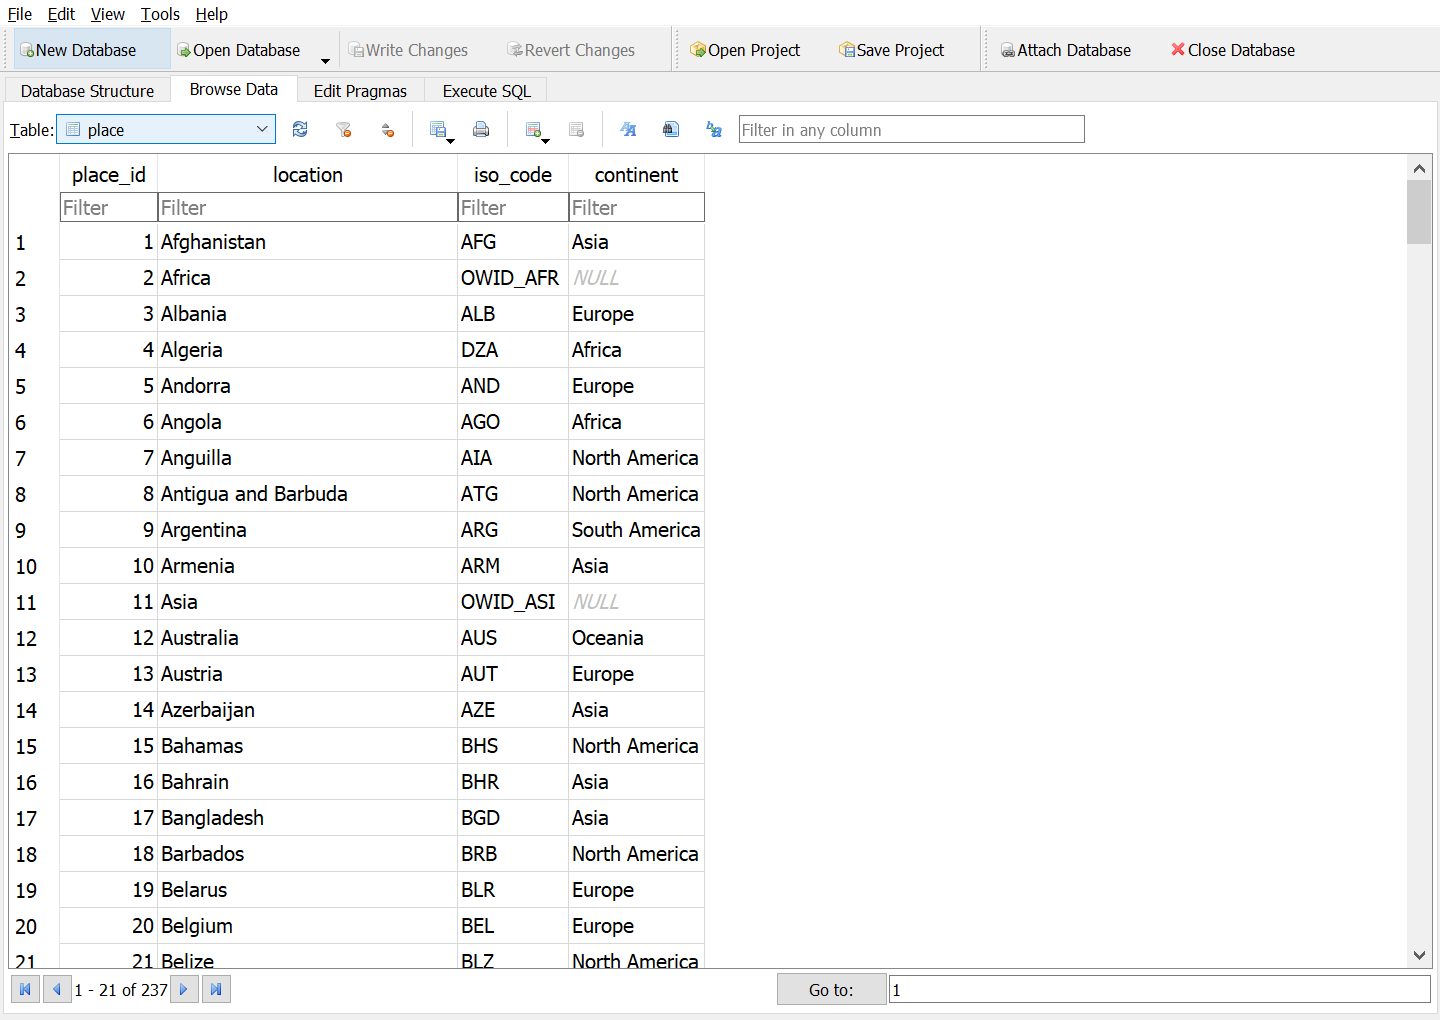

In [17]:
base64_table_government_place = "iVBORw0KGgoAAAANSUhEUgAABaAAAAP8CAYAAACwPBl+AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFiUAABYlAUlSJPAAAP+lSURBVHhe7P151OTUneb75rm9ep11zl/3nnPPXT2cdU736ap7q/pUd7W73bgqyi4P5XK5XHa5PJZdxnaCTRhsM3gqm8FgbExiQ9phDBibwWYeknkI5nmeEsyYEGRCJkmSA2RCQmYCCfyutqQd2pK2tqQIKUJ69f2s9Sx4IxQKRUjv1rufV2/kIgEAAAAAAAAAoAYU0AAAAAAAAACAWlBAAwAAAAAAAABqQQENAAAAAAAAAKgFBTQAAAAAAAAAoBYU0AAAAAAAAACAWlBAAwAAAAAAAABqUUMBPZT+okXSG4zCrxts2JdFi3rShk3tthYdUzFt3W4AAAAAAACgGgUK6KBEW2RLbyAjfX9/GFt+dqWbY/u8OLcjVkDX/zqGfbVNfW/NNiMZ9PTzJ7elSdzvt061+7/6fZHN9Vxlt2OW2w0AAAAAAAA0T+ECOrtEC+6fdwE90fPNuIB2XnE9GkjPe77g6ZPb0mSz2N+zeA7N9Vxlt2OW2w0AAAAAAAA0TwUFdNKsS7cpns/5ERx1vI7sdY4GPW9bsq6ObrJZ7O9ZHlOu5yq7HbPcbgAAAAAAAKB5KrsCOrrfvnxQsOqPaKiyaC1R8vmFs94GnfgV0MF6gv+PL1fNNvsfw+F/dInJ/PgNpdx7aFtn+rbkc1Ql//2Pb7d9WfcyludI7svUezop1+spt1/Sy0dfxx5T2bYDAAAAAAAAzTKTAjoo26Irje0l7KTyti8UFpax/jV2BXT+66iE7arr2MdvKCXfw9Q6g8fbbqv+Uz3c71Nyu/Vrdb229DKJ50i9X+otqOqXGq7Xk77PfWwnlw++VsdhdFtdvxgAAAAAAAAA5m+6f4TQL83sJVv21x5LgTg5x/aNi8GMkm8eBbRlvUGJWezK2THzPUy+n+p19frS917z+DZ/GaPkrYzrfbLfF3+9EyxjK/ErEzyX/XgKEm2rZdtj+yJ5v/211vt6AAAAAAAAgPmp/wpoa9kcLBO/bVJ52+exboNnLgW0etpFsSvA/a9jG1f2PQwKdr28Km/V//slbvgg//9r+agHx/tU5H2fZN+Ej5n56ym9X5Lrylh31nsAAAAAAAAAtFz9BbRfJEZXj5rJXmcZedvnmaTkLLLeSVme11ZilnkPoxJbldFmuRtcRZwuuavieJ9ir9Ng7o8iy1ieI7hC2ngvKnttrv1edr8k15WxbgpoAAAAAAAALFBzugK6Snnb58naBksRnPk6KhWs298efxuSn188wXuo16OWHV8ZHFwZ3R/q//o3VszxPhV53yfaN6bw41VsJfZEXM9Vdr8k15Wxbn89VW0/AAAAAAAA0Bwz+EcI8x4/rSLrz1hmbgW0eupF/lW79iuTJ9gWXWIOvNdkrC/4OI6B9/i6Ck7XttnvC65enuIzoJNyi+AyyryenO0quHz8tQIAAAAAAAALxwwKaF2wxQvQ0aA/gytWI37RGyv5gse5rrL1H1PL5wx7/PJbPb+tOJ3kPdRXAifWp5+nrteR8/6ntjssi52vLbVM/DnU8uZrDB5fVYHrej1l90ty+eDr2C8cLO8HAAAAAAAAsFDMpIBWgqIuKEirLUTDUi8j5nYEJbROX4a5H/NgrrvqK1T1um3rnew9TJfsSvg81VwebGHfVlNyu23LupdJPEdY2kbLxwvg6bheT9n9klw+/LqX/34AAAAAAAAAC0GBAhpANVzlNgAAAAAAALDw5BbQ5pWatsybbZuSaQrbttnSdLZttqWNbK8jK+VRQAMAAAAAAKBb2tkSAq1EAQ0AAAAAAIBuoYAGAAAAAAAAANSCAhoAAAAAAAAAUItFW7duFUIIIYQQQgghhBBCCCGk6nAFNAAAAGbmqquuCv8PANqPMQ0AgHyLXnzxRSGEEEIIIWQW0WWN7T5CCGlbGNMIIYSQ/ExcQN/45MuEzDS245AQQggh7QplDSFkIYUxjRBCCMlPrIB+/fXX/Zi3ZUUVgivWbSVkJqGAJoQQQhZGkmVNmZ8/CSGkaWFMI4QQQvKTKqBXr14tV155ZWwhWyigySxDAU0IIYQsjNjKmqI/fxJCSNPCmEYIIYTkJ/URHOpESQFNmhYKaNL0PPTQQ9bbCSGExGP7c/WiP38SQkjTwphGCCGE5Geqz4C2FYWE1BEKaNL0UEATQkix2MoaQghpaxjTCCGEkPzwGdCkFaGAJk0PBTQhhBSL7c/Vi/78SQghTQtjGiGEEJIfPgOatCIU0KTpoYAmhJBisZU1fF4qIaStYUwjhBBC8sNnQJNWhAKaND0U0IQQUiy2P1cv+vMnIYQ0LYxphBBCSH74DGjSilBAk6aHApoQQorFVtYQQkhbw5hGCCGE5IfPgCatCAU0aXoooAkhpFhsf65e9OdPQghpWhjTCCGEkPzwGdCkFaGAJk0PBTQhhBSLrazh81IJIW0NYxohhBCSHz4DmrQiFNCk6aGAJoSQYrH9uXrRnz8JIaRpYUwjhBBC8sNnQJNWhAKaND0U0IQQUiy2soYQQtoaxjRCCCEkP3wGNGlFKKBJ01O0gN6yZYusW7dORqORPProo/L73/9e7r//fnnkkUfkiSee8O9Ty9geS8g04dgjTYntz9WL/vxZNM+ve0Seuu1gWXXTP8umZx6wLkNImXBMkazMYkwjpO15adMm6+2EkO6kls+AfuzZF2X5Y0/JrXfeK9fdcJNc4a3viiuulGuuv1FuvO0uWb5itbfMS9bHEmJLXgG9efNmWbVqldxzzz1y0003jf/s7cYbb5Q777xTnnrqKYoVUmuKFNCbvB+8HnvsMf94VMfs9u3b5Y033vCzdetWWb9+vV8GqmLw+eeft66DkEnCsUeaFFtZU9XnpW7etEbW/v5EeXz4Kdn4yIny3L1HyKMXfkSevusXsnnDU9bHEOIKxxTJS11jGvMb0pZs9Y73l5980nqfytYVj8srF10kW++513o/IaQbqfwzoB96aoPcePNt8sADD/gT2pdfflnefPNNf5L7wgsvyNNPPy0333yzXHH1dfLQ0xut6yBmzpdPL1okbzv0fst93YmrgH7uuefk1ltvzT3mrr32WtmwYYN1HaRolsli73jcZclyy33dTpEC+vHHH5eNGzf6x+Zbb71ljZq0qAmFKgNt61iYuVtO/d73ZOlwpeU+UkXKHHu33HILE9pxODbriO3P1Yv+/JmVLVtekOcev0ievO5L8uz9R8sbr66Tt7Y/I1tXXig71l4iq2/8pjxy/idlzf2ny5bNG63rIMQMxxQpmjrGtIU3v2nrHIK5T15U+SzfPUDe+uf95eXRKH3/ihXy6m5fltf2/KpsXfITefGRR1PLFAv7gveAtD2Vfwb0Tbfd6f/GV01ms+zcudP/s99rbrzVso6gcF3k5dOn2++bbRkbbU8875ADbrMt78ok208BreIqoO+4447Cx5wqVmzrGGfZ4tS+btYAH5x0ktu4aNEusmS5bXlXJjmBcdLLSpECWi3z6quv5paAall1ZUvy8Tp3n/o9+d7SoayM3b5Shksdt596t3FbMkHJFi1TQ+l296nyPfUcsSyV4Up1PyVf3Slz7KkJs7rSKrmOIOGxksqpcrd1+VlngmOJY3PmsZU102Tj07fKqlu+LU/ffrDs2Px7b83bRd56UXa+cI88cf4/yI7HjpTXVp8rWx89VkaX7C6PXribrHvMUQy19WeBxcssy06Y8D2o5nW372eHKo+p5Ut2Se+rRYtlmWXZ2YTjp+pUPaapVDq/8bJssWs/297jqt/3SdeXcbwy92lEdPksBx8qb3l58xvflq1PPBHdr8rnL+4uO/feV+Sgg/3/f/Gss+XFrAsdLOffaF83YV9wPBIyTSr/DOhrr7ven+TmnSzVlVjLzjvfsg6j8H37EXKV5b55FNDJ57zq0HdkbKMrFNCTxlVAX3998WPu/PPPt65DRf9gtniZeXt4ktlliSw3lp1f7Ced8eSm1HZy0qsyZQpo9SeV6mMP1P/rcfeVV17xr3BRH5OgPgLBVUCvHC41CjIdXQzab3cXaOFjayqg/cLcW9+pdyfuU8WfX5hT8tUdfeypK5zVZz2rY1Add2pcVMeamjxfccUVcvnll/vl8w033CDXXXedZV22fRX+kqMRJXS5Y4ljcz5JljVlfv5MZvW9R8rjl/+9vPD4GbJt04PywqrrZdVdx8rolp/Io1fuJyuv2ku2PTaQbfcfIq+OTpLXnzlXnr/7MHnkzI/Jisu/k1pfe38WCLexqmKzwwV0lcdUcDwli4nlsmSXScqKqsLxU3WqHNN0qprfBNH7N2sfZx8T1b3vk67P/jjmPg2JN2d565vfkbcO+L7Ikp/Km/sfJDv3+rr/kRt++fyF3eT1r+8j4t2/44u7yYsf/Dv/MbZ12c+/XtR44u/nJuwLjkdCpknlnwF99TXXyo4dO/w/G1J/wqs+Z1KdHPVJWH2OlfotrZoAn3PuMss6wsJ1193kbd5/41dBN6eA9nPbEf42LtrVVqTbQgE9aVwFtPrTs6LH3LJlGVd3hD8op054foKBvtIrQyaO46SzfInsUmo7OelVmSIFtPp8XTWZUP+vyuY1a9b4UaWgKp4ffPBB/6M3VAGtrnxJPn6clUNZmizN/MLsVDl1qeX2VCmdlwpLt/Dq0lTBFwslX93Rx56aqK5cudI/3tQxq8rm5cuX+1+rY09F3a6ORVVIX3DBBYl1Zeyr8Jic/z4scSxxbM4ttrJm0s9Lffzyf5C3Xl0tr226T1548GjZdO9h8uwN+8ro4k/Lncf8hbz+/HKRbY+LbLxK3nrqWJFHviuy9gzZ+eRhcvcx/zW+vrb/LBD+HNC8c3S7fnao7Jhq2/7g+Jk4VY5pOpXMb3T8sW0XWbIka4yzvcdVv++Trs/xOOY+zcim5+WNvfeTN7/tjYU/PFze+NY/y6u7f1l2fH6xvP7VvUX2P9D//y1/8yHZ4v0cal2H8/yr04R9wfFIyDSp/DOgr7zqav8Eqf7BI3ViVP/Svv6HjdRJUp1M1T+c8Oyzz8rZ55xrWUdUuP5mV+8bOHaFsb2MHV+N7Gc3+U14e/rxttvulwPe7t2WWSK7C+DgufXHcQTLRtuiorcn6z7XY6LHqeePvU7L+5K9Di+n7xa/P/G+ZL2HTYmrgL766uLH3LnnnmtZh7oSxXvdjt9YBr/V1FcMRAN/7M8qLY+P3R+74kCvY1nw3OEy+ScT90kneL74nylFz68Sfw3p+1yPiR7nfu156/AS/pAxTuK9y37fmpuiBbQ6VtXVz6pkVmWg+q8q+tTVpmoCowrByy67zI/6WuWiiy6SUewz1dKlmH9V9Kl3+1d0pm4fX5kaPS64XV+1aq4v+P/gPp3oytbocfHb7cn6WJBk9PPfHV5JGyRe+rm3q9g6woTF43iZpekryp2vM/H4/Nc3/9iOPVU833vvvX75rI47dZydd955cs011/jHpP1nAfNYMW7PKKDt72P2cZH8eJns/RBtR7TMMXLMeFnbY8xwbM4zybJGpejPn8msGH5K3nx1jcjLD8vray+Sl+4/XLY9cIiX78naiz/s3yYbhiKrT5C3Hv2ebLvuPbLh8nfJS48M5O5j/8xY10L4WSA8//qTX9v2Rc8d36b4usZ/qp+4Pf249Pk5ud5Fiw8ItimWZp/Xs46pfX71sBx48sPyjeMfkB+e/qjs+bP7ZK/BffKd3zwg3/r172X3I++UM474WLSuEoWK/f3JPib9fWTcnrdf4uH4qTpVjmk6089vokTHi7mP9f22Y/D98v7Ubep9ty1bZD+axxRzHz+J7+v4e5Z+Txsf7zh9bY89Zefe+4kc/AORAw8W2f8gke/uLzt2/YJs+cDfZpfPBc6/QaJ9Yd6ePN5Sx0ql7719G3Q4Hglxp/LPgL7iyqtk27Zt/p/3qt/Iqqv71H/Vb4Hvu+8+/x9LUHnmmWfkjDPPsqwjKlz1FcbRVdDGfeHy8QI4UTD7pav5Wc26qE3flv68aZ30c8YSFrvB48+X3yTW429PooSOr6vYY9RzRI9LluY560i9j+r+qGR2vocNiauAVj/0uY65fU5/p+zx27fJqtUr5ayzzrKsIxrI0/eFiU0iokE9ekx44jR+oIufgJKThWgd44mJ/xzR8vbkbGtiO5clJj3BpCB+4ouvq9hj3K89Zx3hb4fNCdmyxdGJzf2+NTdFCmj1OX1qMqH+XxWA6jhV/73kkkv8fyRO/ZmlKgPVf82oq1FVOWiuK1nUqa/VlZx+OZW4PfnRGqqYshVo0W3Jr4MExVdUhiW3IZXCV8VG2zW+GtUv0szi7W65O3Glqv/84wKuyDr0beZVr/rjI6LlnK/TcvX53admlZzNie3YUx+zoT5yQx1/qnBWx7C675xzzpFLL73Uv+JK/UNH8XXZj430+5rzPtr2TWLd7uMt2t/xbcnYvmQ4NucaW1kzaR677BPy5vY1Iq88IfLyIyKbrpMdj/xEtt21l2y47MOy84mlIk8eJf985p/5Pwusv+GDsv6aj8qLDxwld/1yF2NdOedXlcb/LBCuzyh74tsXJLlN9itf08+Rd35OrVetw78/a3ubmaxjao+l98pF973sH7uX3vGM/1/TKTdslMU/uStaV6Gr4XJ+ZrIeD/H3s/zPTVn7I7id46d8qhzTdPLmN+ac2j6/0TH3azhGpQol23tsv809T8jfj9WNd2GY+zQnmzbJ9s99QWT/74uo/37mcyLf/mfZ8v6/cZTPXqxjiC3p/Zc7HlX+3nM8EjJNKv8M6MuHV/ifZaomseoEqf7UV50Y1W9u77rrLv8qPzXpVSfR004/w7KOeEkblKNZBa6l0DXL1mTxqsrit+8mn367cZu/jFlIJ2MrjY2Ez5F5f6wEz1mXTpHHpMr1RMz7ncvmvIexZecXVwGtihPXMfeV3+0ih176T/KPx/+RnHrG79LrKHLSiw3UGSee2A9RlmVy15Gx3lhylsl7LXnbaEuRx8SWscS837msZf2Wk2QTU6aA1pOJtWvX+h/FoT7mQJXMqmxWhaAuntV4rD42QX1Gb7KADooos+AKSym/hIoXX1HJllXOFVnOcpul8IqlZMmX+3zJxEq8IusIC73kP8iYtx7zddqKwxYk69hT/69+6aH+lX11DKpxVF0Frcpn23pc73P8fc15H233++9t1rHrJe/xWY+zhWNzrkmWNWV+/kzm0Ys/Jm/4ZeFjIluXi2y5U2TT1bJzdLS8dNOn5bWbPygvXvcXss+p/238s8C6i/9GNt99hNw5eHu0roXws4D/3Dnbl3F7MOGMJqDp5SyPK/J++HHd17xkHVOfO/wOOfnGLf6xu88v7/X/q+zYKfLSqyJHXbhWdvtp/OOzgvc1KAvcRbSRvGPIv99RYOT+3JSxPzh+Jk6VY5pO3vzGnFOfccYZ1nX4ie3X6JiMHx+297jg+553vI4z6XPkLBMeR5n3F94+I0UeE1vGEvN+57KW9ed+DzczLz22QnZ87vMi/7y/yKc/K/LJfxTZ75vy4ge887D3M6btMX7y9uE4yffKvm9i41Hl733G8aDD8UiIM5V/BvRllw/l5Zdf9j+vSp0o1VV9Tz/9tP/n47feeqsce+ZP5ZvHfV76P/uofP7Hfy1HX3R0Yh3JQtT8OnGftSgNlgluC64U1surMlv9v19qh1cP+//vvNrXUtCasRTQQWke/rDpJ7+ALv0Yy2vPXEe4rPV15r6HzYirgB4O48fcvme8S/Y57c9kz1PeLruf9F/koAs/Jefe8wv59rKPygd+/q9k/fPr4usoctKLDbwZA7+5jHWgDh6XvY6M9caSs4zltcQmP37yT3qlH2N5vZnrCJe1/iY1931rbooU0OqKFT2ZUAWgvppFF9B6wvLGG2/40V+rP7U8++yz4+vzi6ewbPL/P6uMNgvirOIseXtO0ZV4XPw2I+Fj0s+XjG277NsaFO/qqlCdEiWf9TV4MYu7vNcZ3u+88ruByTr21P+rP+lVH8WhroRWpbT6k17bOoIE74V9HxgpcLzEr2gOv9YFbO7jE/s2sUz69kTC9ecuZ12f/Tk4NovHVtYU/fkzmUcv+PugLHz5YW+Fd4m8cL3Ixkv9nwX2Pf3PZK9T/5t86eQ/jf0s8DfezwKbbvuR3LG05Of1xs5RBc6Huec02zoy1huLZZnwuaJza4HtM29PTUgTj897LVnrNZZzv6bmJOuY+vwRd8opN2yR1994U3a+8Za8+eZb8oaX13eqr9+UH5+9Uj5xyE3WdarEfy4yy1rXz13pq8/8r3WZnXuM2WLZHxw/U6XKMU1Hz2/UPFr9DHjkkUfKySefLEuWLJGLL77Yz2GHHebfdvjhh/t/ubRhw4bUeoJjyzjewvc6/n7a3uPs9z3vZ/zi+7HIvs1ZxvJ6sr+fJnhNWY+xvNa892WhzX3MvPTYY7L9n3aV17/8FZFvfltkv2+J7LOfyNf3kR2f+kfZ/K53y5YHHrA+1rYP7UnsC+t758Ucjyp/77OPIT+W18LxSEiUyj8D+pJLL/M/Y1JNblesWOFPbJ988kn//4856wg5dNluctnDx8oD666Wn1/zVfnHn/8nOeS0A411pAvXoFhVV0En7vOv7DW/qaLoZfyPk/DLZlVGm4VscFV1dL9+/mSyS2M/4TYEZW2wbOxq49jVx7Z1TfIYL7HiOG8dlnJav+YC72ET4iqg1Wflmsfc1057h1y0/Dg5/75j/Mnm2fcMZHDtt+WUO34qe57xAXnHEf+TPLtxjbGOnBOJin8i0wNvgYE/XN6W4HG2dRTYjrxlLNsZnbD0/a4T2CSP8RI7WeWtw3JC1BOp3PctXF8DU6SAViWfKgFVyacmJiqqBFTFn/o8XvU5vCrqihZ1ZYsZdVVqfH1GgaVKqnHpFFxJOb59XEwnHjO+zXa7ZTl/XWa5FiW9vjCVlnzB17Gy0yzniqyjSMlX4HWmisbkVasNTNaxp/6rjl11fJ155pn+/epzJdXnSQ4GAznqqKPkuOOOM9Zlf0/tV+4a75GR8WMt+2+8b3Ifb9vf0XrStyfCsTnXJMsalaI/fybz8LkfkLd2PieyfaXIlptENl0hsn5Z7s8Cf+b9LHDbEf/RWFfG+c2M5RzrPB/mntNs6yiwHePzrG2d8WVS60mcj8dJTToTj897LbH3Jpkir6k5yTqm9lh6t/z6yo1y8Bkr5QdnrpSDThvJAb97XPb38r3frpDvnbxCPn/YDdZ1xhK+V8H7ofdl9s9M8a+D5cfvc95+0c8Zi35O1/IZ+yy5bTodP36qHNN01PxGfQzWL37xCz/q/KwutFE/J/7kJz+RI444wp/3qNvURV5qmV/96leJ9YR/mh8rmmy32d7j7Nsyj8/S+7HIvs1ZJvacOdvn2IZyj/HC3Gccv3z+7Ofk9S/1Rb7xbdn+mX+SzX/11/L8X75HXvnIP4h8ZU/Z9vf/IJvevotsuf/+9DrC9zL/9Sb2ReI9HicxHlX73mccDzrhOjkeCbGn8s+AvujiS/z71Z8HPfzww/5VferqZ/UPJyz+yQfl4ocGcvGjR/sn6aOu3UN+fu1X5J37/jtjHdkl7dsOPSJ+n/Xq3UT8gnU3+Y1adnwFcHBl9KdP1/9NPCaWjAI4TFSOe18nSl8/eWXyJI9R8V97uEzuOsyEnx+t7yvyHjYgrgJalXfqv/qY+9Jv3+ZPOH929b7ykyu/Jj8e9uUHl+4mP7z8K3L8zT+SXX/3TvmjQ/+FsQ7bD2LxBIO0vnrANfCHA3vixJdO9gnHPbi7l4ltZ+JE4yfvBDbJY1TM1567DjPhe6/vy33fmpsiBfTdd9/tTyDURyHo8k/9V328hrpPXemskiyh1cQmdQW08Sf76spRs9zyS6jw9vjVkLYizHa7ZbmsgsyZcBtzr8gsUNDFCr0wdZR8pV5n+PqS29XAZB176hd36vhT46i6El+Vzcccc4xfRt9+++1+Ma2usorWZXmfw2I0dluh99FYl78O45cluY+37W/X7clwbM4ztrJm0jxx1b7y5HXfle3P3iCyfSSy+SaRZ88o9LPAH//g/2Gsa+H8LBDEtX2WbUqdpxOPz3stzvuLbG9zknVM7XbkXXL05evk0LPWeFkt3z9tlRx4ypOy/29H8t2TH5dv/eZh+ceDr7GuM57g/fAn/IV+ZjLeP/++9NWs5X5uKrI/Mpbh+LGmyjFNR52X1VXQ+++/vyz3fsY88MAD5SMf+YjssccecvTRR/u3q/9Xt33ta1/zS+gDDjggvp7wfbWVSc79lXVb3vFaej8W2bfuZZj7zDd++fyZz8nru+8hst83ZPunPyub3/d+/zOfVTa8/R2y9a//RmT3L8krH/yQbPhPfyqb70vuy/zzb5DEvsh672p97zkeCZkmlX8G9PkXXOgXgepPhlTxbBbQHz7wbTJ8+ET/BK1d8uCx8o6v/WtjHfbC1byCN7rPXQ770UXtobvFrnRW6wsKbVtJa8bxHGF5O75vkjJ5ksd4KVd8JxIrnQu8hw2Iq4C+8ML4Mfe5E/5Yzrl7IGfcuVROuf2ncrL3en88/Kr86uYfSv+MD8p/XfL/ljufuCW+Hn9Qdv/ANP7NYMbAX2hiOo7t/rzHqDiWCU8Y4/smOYFN8hgv5U62icROdEXeg2amSAGtPrtPlXrqahV11b4qA1XU1abqClV1W/Ix6qrVa665Rn7729+m7vOL5qWnyqlLE6WUKq3C252lV+btBQqzgtFXZBYuIrNuq6Lky3oNuetxpFQpOL9kHXvqFxv6FyDqs8ZV1HIq6vYTTzzR/0umaF3298f/ZUfsfSj2PgbH8FCGiV+i5D8+6/7i+49jc35JljVlfv5MZsvmTfLMA2fLQ+d8Qp6+8fvyxuY7RLbem/uzwLuP+Nfy3HNPxdfnn6ta/rPAOFnL2G+Pb7dtubzndN2f99hmJeuY+uSht8qvhhtlo/fz5rqXXvCyRda9uEWe9f7/hW0vy/4nPiLv3y/+7zVYY/68VvBnJn//7LJElixOvo+TvLdFHpO1jP32rh8/VY5pOmp+c+ihh/ofr6EKaPVRWh/4wAf8CxPUX82pf4Dw/PPPl7/+67/2/2JJFdBqWXMd6f0SJjlnsL7Hlttyj9ey+7HIvnUsw9xn7nnJ+7lx26c/I6/v9iXZ/qnPyAvv/avYPzi4ZcNGWfef/rO89O73yvYPfVg2/unb5IWr07+oC97PvOIz+V4V2DfJTP3eOx7D8UhIbir/DOi7HnpSzvImtOrEqP5sSJUn6l/wVf99937/lxx59e6y5OrF/kl6yVWLC14BHd0eL6B1ERsvWq86dDfja33Fb+IqX7+g9W53fv6zSsb26MebH9+RLKTH2xxtn/+RH+Zz5j5Gfx2WzbbH5KxDvUfma4+V1+OvXe/h/OMqoJ944gm/RNHH3Md/9X/Jh37xv8v7f/7/kXce+f+UL/y2J8fd9APZ/bQPyNsO/9/k3ifvtK4n+Ndhkye+YBC2/ZlaNAn1kjzheAlOBPGBfvmSxY6TR5EBP2MZ/6SSt03hdhvblPpXbXMfo782TurJx+SsQ70v5nuc/CHB/b41N0UKaBX1GbxqWTVRUFc6q8JPH7+qGFQTC10Aqv/Xt51wwgnp9fnllOUqx7B4SpdrWQVW+vb01dO6sIs/18rhqfHntiRdToZR2+8/h227EreFrylaJri/XMmntyV9pa35ulyvU91nvo5gWfNjTpob27Gn/v+UU07xfwmijsOf/exn8tOf/tT/0151e7x8VrG9zyr6itvovSh0vFje/2hZ1+OztsN+7GaFY3M+sZU1RX/+zMoL65+WlTf/TO474S/l2Vt/KB8/3vtZ4GjvZ4GB97PAUfGfBd4/+CPZ+Hz6s1JVWv2zQCzZy6S2ybLdtsfnnZ/T93vrCN+z1M8bLUjymPrYIbfIb4ZbZP3LG+WwGz4mx9+1r/z6rm94//9J2fDKWjnwxJXS2+vcaB3+z2bJEkRfbRbenvtzV5hwudTtXsr/3MTxU3XqGNPU/OY73/mO7L333n4BffDBB/tlsyqhP/axj/lR//++971Pvvvd7/rn8/32289YR3ismWNU8j7jPbW9x+XnCa79aDumbLclk7EMc5/m5LbbZeuHPyovvOe9sfJZZ8uGDbL2D/9/meWzjr9vvPctfv71ovZ1xjGUeu8S+6L69z69DX44HgkplMo/A1rl9yvXy/CaG+W000/3J7DLli2Ts846S758yKfkE0f9kSy9+sv+lc/qv+rrvM+A1gmK0vR9+vZxEqWyX/qaBa6fsKR1fv6zii5zk4kXtuPoYlovo668ji1rrs+8gjnrMeH7setufsmsl0u9P651hAV17P7Etue9h/OOq4BWUX9Krj6y4PTEMXfsscfKn/7of5QvnvJX8t+X/Gu5f9U91sePo08eRlInmHAQ32UXNTi7ltMDuLG+8QkmXEfsMbbbktEnkGTiJ4lxYq/HW8Y7ecSXNdcXnnicjwm3cfFi/8Sml0tts2sd4Ukxdn9i27Pft+amaAFtZvPmzf6xq8o/dWWqmrA89dRT/m3q4xLU/6vbVFloLaB10ZUq27L+/N5WhGXdHq7bT7JU1Ld7KVj0RWW5mXIFXXwd3mOH6uuS6/CiS8cg3mvz15ss9TJe57gU1Em+x+2IPvZU1P+r8fKkk06yLhuP/T31k1mYGu9X1rGacRxlP96xHeF9wWMKFLAcmzOP7c/Vi/78mZeNqx+Qxy75ltz5s/8km+77uay5Yl/v/98jf374/+z/LPC3R/8X2fRCeoIcS0t+FphmmeQ2pZezPz7v/Jy6fzwZD9YX3G5MnFsQfUx96ke3y9XLt3hH7kq5Y/MSeeyVU+Wx7ad6/3+Ud9vT8uNTV8pfftUs+3TZnEjyZ5rcn9VU0oWhmXI/N3H8VJ26xrQ77rhDvvjFL/q/HD7nnHP8j8pSn/P8jW98wx/n1f+r29TV0r/85S/lK1/5SvT48OftVJkXJnivzePM9h5bbitwvNr3o+2YsB8n8ZjbYCb5PRImd/vKvqZwG5n7OLPlllus5bOOKqFd5fM4sfdRJ7EvcsaV2P2Vv/ccj4RMk8o/AzqZR9Zslnsee9rPo2u3yA9PP1je/c0/8D92Q/1XfW17HCFm8gpoM88//7xf3KmoK6L/+ND/Sf6PA/+FPLz699bly8d+8iPdziQFtI76E0r1WbvqH5y54oor5PLLL/ejvlZRxaD6XF7bY0kF8Uu+Zl4pOqts2bLF8g9dkrlngR6btrKm6qx9+Gp54LTPyf2/+5Q888Cl8rbD/1f/Z4HnNz9vXb58FvjPAjnlVRez66FXy2cOu0X2PPIh2e/nq+XrS5+UvY98Qvb56WPy9SPvk/fvvUz+8xfPtD62c+nY8VPXmKbmMffff79fQu+1116yzz77+FGfDa3+iumb3/ymf9XzV7/6VX8ZtaxtPYQQQkgTUvlnQBNSR8oU0PWHApqkM00BTWaYu08tdCUqITNPh45N25+rF/35szlZ2D8LBFc/pa+KIqRIunb8LIwxjRBCCKk3lX8GNCF1hAKaND0U0C2Jf0Wp+TEFlM+kIenQsWkra6b9vNTZZ2H+LKA/g1OFq59J2XT1+FkYYxohhBBSb2r5DGhCqk6zCmiykKInSq7YHpcMBTQhhBSL7c/Vi/78SQghTQtjGiGEEJKf2j8DmpAqQgFN6oytdNaxLW8LBTQhhBSLrawhhJC2hjGNEEIIyQ+fAU1aEQpoUnemKZ9VKKAJIaRYbH+uXvTnT0IIaVoY0wghhJD88BnQpBWhgCazyKTlswoFNCGEFIutrOHzUgkhbQ1jGiGEEJIfPgOatCIU0GRWmaR8VqGAJoSQYrH9uXrRnz8JIaRpYUwjhBBC8sNnQJNWhAKaND0U0IQQUiy2soYQQtoaxjRCCCEkP3wGNGlFKKBJ00MBTQghxWL7c/WiP38SQkjTwphGCCGE5IfPgCatCAU0aXoooAkhpFhsZQ2fl0oIaWsY0wghhJD88BnQpBWhgCaEEEIWRmx/rl70509CCGlaGNMIIYSQ/Ez1GdCEzDK245AQQggh7YqtrCGEkLaGMY0QQgjJz8QFNCGEEEIIIWVDWUMIWUhhTCOEEELyQwFNCCGEEEJmFsoaQshCCmMaIYQQkp9F6oRJCCGEEEIIIYQQQgghhFQdroAmhBBCCCGEEEIIIYQQUksooAkhhBBCCCGEEEIIIYTUEgpoQgghhBBCCCGEEEIIIbWEApq0Io8//jjpcGzHBCGEEEIIIYQQQghpfiigSSuiSkh0EwU0IYQQQgghhBBCSHtjLaDNKw8JaUrQTbZjgRCysGL7WYQQQgghhBBCyMJIZgFtu52QeUUdk+gmxqPuhn3fjbCfCSGEEEIIIWRhhwKatCIU0N3FeNTdsO+7EfYzIYQQQgghhCzsUECTVoQCursYj7ob9n03wn4mhBBCCCGEkIUdCmjSilBAdxfjUXfDvu9G2M+EEEIIIYQQsrBDAU1aEQro7mI86m7Y990I+5kQQgghhBBCFnYooEkrUn0BPZT+okWyyJL+MFyk1bJeX08Go3CRwoJ19co/sBKMR90N+74bYT8TQgghhBBCyMLOAi2gl8niRYtklyXLLfeRNqauAjpZqo4GvQlL2qZxvb5Fsqg3kOIvseMF9LLF3nu2iyxZbrmP1BqKyW6E/UwIIYQQQgghCzs1FdBBAZy++nKSEmeSMrm5BfTyJbtY3pfFssy/f5bb3a6SflYFtIwG0rPd3jqO0jh8jYsKX+q9EArorDEpiPP7IFZAh+tZvCy8v+j3Ucbzj9dDbKm2mJziGJhZih5PxeI+3xjxj/H4cultqHbbzFBAE0IIIYQQQsjCTq0FdHKiOp4M77JElhu3uzPJpLe+ifI0WbZYTeyTJfxyWbJLvNyazXY38z3KyqwL6KCbjZYZXzm8qO/dGohuC2Kua9j3bktcZZy+bSSDnnebLoKH/dj6ko+PP1+0HXbu0jh+pXewbOy5x+vPus/1mGpVWUBPdLxXWEDHlwvXZSsEiZ86Cuhmj3nVbWP++cZcbpEsXmYuFx6bsXN1fe8fBTQhhBBCCCGELOzMtID2s3yJ7KImtoWv/Jtk0lvfRHnihK/bvU2z3O4GvkeOzKqA9ktiS/maXC5e4Po3xK+c9stk86M89LrSt/n9c6z4Dgz7UaGbfD5bwR1nf31jYdmti/ah8byK7X2IryvvMdVpVgGdTNH1ZixXaFzobiigJ0zR4yq88jlePusE21L+ly3lQwFNCCGEEEIIIQs7sy+gvQRXQieuKIwl/pEU6ftcj4kep54/9ifIlqu5stfhJflnyYkrt+N/3pxzFaNzoq/ifq3x1xK/PbmO5Pse304viw/Ifa7sdWZtj+25ct6TEqmrgI62VSddEKdLXPvtQUkcFrDJQlkVvr2+9HvGbf4y4fOlCmuT5fkshXVc1raHkoV5Umx7ctalOV/D5GZeQCe/7/3Ex6tgPcH/x5fLOuaznj9ch1/yRcvYvtdznyex3bvsotaR3O5lsmQXYz3+mKauijUeF9vGAs+dM05Ok1kX0Narhi2/NM0b5+L368fant+8zf1elxpbc883KuF+d+yv4Dn1c+W/f5OGApoQQgghhBBCFnbmUkDHJ8fLZFlikhyUAK5Jb7HHqOeIHhdOto2ruZzrCEsHcwK/bHE06Q8m5lFR4T/WVbxYSox07K81/Vrcy5q3JbfTX8bfzmKPT98WfJ3engnekxKpq4BOlqrBVbzRlcHW4jWr/I0VsMHHa+jHqnJa/b9fUocP9P9fX8UcrtN6VbP1+YJtq7KADgr04PUHyS+gsx9TnZkW0Lbizr8tWeTGvx9y15u5XPj9ZBSU6vnjy+WNd15S261L5fh2x5YJHxMbH1Lj3nTj5LSZdQFtK2WT41jeODfdmGvfxtmdbxJJnKvz37/JQgFNCCGEEEIIIQs78ymgw8lx5v3OwicjRR4TW8YS837nspb1W4qYZIISYVEQazFg2+6s119k2azHZt03zTottxd4T4pmVgW0vj0oiTOWybrSN1EU+2W2/4Uqo8Pl/WWCq6Sj+wOpMjdaUfx2I5kFs6M09oXrDJ4ifM3ma4q9Rtu68h5TnSoL6OT7F0R/nyd/SRXGObZkfT8kk7Gcv+4JCr7YNk2y3WVuS8Rcb+w5qk8dBXR6/6sYr8E8P6Ven+X9iY1zrvevyPtdZBkvVZxvzNeZvE+n8GubLhTQhBBCCCGEELKw05gCOjZZ9uMqTiZ8jGXSnrmOcFnrVWaW9ejndBUCZuLPq68YtG131usvsKx1O3WKPlfyNtsyXip4T1xpVAFtvSLZkyxg/a/7MlTLj69sDq6M7g/1f/0bE8J/nFCvK+v5nLJeXyAou8OPC7EVx3kFdO5jqlNlAZ06bs1kfb84i9wC6/VjWS41xrjXlTdWldvuMrdNOE5WkDoK6Kz310zweneRXXZJLJ83zmXtC2M59/ttWSbvOce3Zcd6vgnX63w/Ys9t2/5qQgFNCCGEEEIIIQs7jfgIDrVsVJTo+/OLk3KP8WKZTGevw1K66KvIwu23pfTkPFxX8Ljs15peb4Flw3XbS4qiz5W8zbaMlyrfE0tmVkCHZW9we1aJa789Vuoq/rp6Mhj0U1c69wYDbx2OsjZWOrvLZDvHY2Kv0UMBHSSrPIyNCwW/H1IJlnN/b2StSz82Y6yaaLuL3pbz3N7XmeNkBZlXAW37KA4/eeNceP/kY65lmbznHK+rQMJ1BY8r8H7EXk+Z969cKKAJIYQQQgghZGFnjv8IYXgVlj/BNcqN1G1ZE/KSj1Hxi5pwmdx1mEl8nmpW4TNRgm0NShvbdme9lwWWdW5n0edK3mZbxkul70k6symg9ZXHukTOLnGDstkoW5Olrk+vL3H1sl/Uercbn/es1mcukyyzU8/nGQ36jrI3Y9v1c8efLLHtwWPN5/M/LsT8fOoCj6nKQiqg3ctlLJM3Vk203QVvy3vu8eNUEuNk7L7JMq8C2j9H7bKL/77Gls8b56Yecy3LVDq2BusPzjcZJbuR2Lm6xPtXNhTQhBBCCCGEELKwM/sCOpxMj+/LLTgs65rkMV7KFd+JxEqACifisffDtt6s5yqyrGs7iz5X0XW6nmv61FVA+2Wsmdg/AphdQCtBKRw91rZc8I8aGldF+8LntpTA0frSRW7y+az/YOFYxuvLKoh1Ma2XUVdtx5Y112d+dIfrMdWYWQGdtYxzbCl63Ff1/LbbJtnugrflPncilZalcyqgzdeQeq1563DdX+D9LrTMFEmcf/XV667CPLqivcLtSIQCmhBCCCGEEEIWdmZbQPuTeXNC6yUxIR5Peo1Jf+pf/M99jP5aX7lleUzOOtTE3JyUx68E01/HS5jlSxbHvo7Ff+3G9vjRVwxGt6dea9Z76SW+rF5XfNn0dnrrCx+Tfq4i68zentLvSYlUX0CjLWZXQIfHf+z7ND4u2NZj+z5Kp8jzZyxTdIy0jHeu7S5025Tj5LSZfQEdjnnjc1T6KuG8ca74mGsfs23HU+mxteD5RiU4dpIldLifY9tR5P2bLBTQhBBCCCGEELKwU2sB7ZfNscQn0OPoYlov402sUxP48f3h5Nn5mHCivHhxWMIESU2cXesYFzjG/YltD0oBY5lEaRBPVDa4H5N8ra5Jv7ms2j77sqntTFzRFj1XkXXan0On3HtSPBTQ3VVlAR07No2Yx7Mu5IJ43xf+OKG//23Hv7nueLmXXCbr+yaIY5ncMXLy7c69bcpxcprUUUBH2xrPLksutha049do/OI0b5wrNuaq9yp7HwTLRNtSz/kmTGwfB0kfh673L+u4LxYKaEIIIYQQQghZ2KmpgCak2lBAdxfj0YTxS8XpisF5h30/+wRFd7W/SMgL+5kQQgghhBBCFnYooEkrQgHdXYxHBbJscf6VzC0M+34OSX3sSv1hPxNCCCGEEELIwg4FNGlFKKC7i/GoQAp9hEL7wr6fUxIfrVL3scR+JoQQQgghhJCFHQpo0opQQHcX41F3w77vRtjPhBBCCCGEELKwEyug1SSQkKYG3WQ7FgghhBBCCCGEEEJIs5NZQAMAAAAAAAAAMCkKaAAAAAAAAABALSigAQAAAAAAAAC1oIAGAAAAAAAAANSCAhoAAAAAAAAAUAsKaAAAAAAAAABALSigAQAAAAAAAAC1oIAGAAAAAAAAANSCAhoAAAAAAAAAUAsKaADAzD300EPh/2HWeO/nh/ceAAAAQBdRQAMAZo4ibn547+eH9x4AAABAF1FAAwBmjiJufnjv54f3HgAAAEAXdaqAXvS9xwghMwrgQhE3P7z388N7DwAAAKCLOldAP/vSTkJIzaGARh6KuPnhvZ8f3nvkOeCAAwghhNQYAMB8UEATQioPBTTyUMTND+/9/PDeIw/lCADUhzEWAOaHApoQUnkooJGHIm5+eO/nh/ceeShHAKA+jLEAMD8U0ISQykMBjTwUcfPDez8/vPfIQzkCAPVhjAWA+aGAJoRUHgpo5KGImx/e+/nhvUceyhEAqA9jLADMDwU0IaTyUEAjD0Xc/PDezw/vPfJQjgBAfRhjAWB+KKAJIZWn6gJ6/Qvb5LBT7pRPfP8SedfXz5aPfO8i2ecX18t1962WnW+8GS4V+O3wYdm67bXwKzRVVUXcg6t3yHl3viS/vfEFOen6TfKbazfJcVdvkF9e8ZwMLl8nR12yVo64cI0cdt7T8oNzVsr3z3hSjhuuCR89P1ctXy8HnfuY/MNRd8pHvXzqF3fLpwb3yEd+cpssvXBluFQ9KEHnp8vvvT7mP3fMvd6xro73MOGx/6mf3yV7nXS/DC5eKa/vjI/rs3T5I9vkb45dJ3//m3Wy7sWd4a2zQzkCAPVhjAWA+aGAtuS2J7bJObeXKzR+celq67oI6WKqLKBvvH+NvHvvc+RrR98kP7/oITn75qfk7JtWyS8vflj6R10rf7XfuXLV3U/7y15w80jevsfp8vL21/2vZ+mtt97yx85nnnlGHnvsMbn33nvllltukWuvvVauueYauf766+W2226T+++/X5588knZtGmT/5iuqqqIO/v2LfLKjp2l8r3TVoSPnp+PHHGbPL91h2x+5VV54eUgz299VR5bt1W+f8ka2evYUW0lXJUlaJt+AbBhwwZZsWKFPPjgg/LAAw/4Wb58uf+9evfdd8udd94pt99+u9x6663+9+5NN93k31elOgroba+/KYObNsqSGzfKr27fJL+8xfv/6zbID4fr5JnNzfll3LdPfdA/zv1j3jju9bGvvh/08f+145+cawn93sEa+exJ68KvZotyBADqwxgLAPMz5wJ6KP1Fi6Q3GIVf2xRZppiiBfSZt5UvNL572grrusrnUtnVe71vP4KrtUl7U1UBvWrdi/Lefc+Ro85/SE667kk55fqVctk9z8oND22Qe1dulkfWvCg3PPicfPygS2TPpdfI337nAnnHnmd435OzL6Cffvppv6xSBZMqoHUeffTR8f8/8sgjfuGliujhcNioqyFfffVVueSSS+SVV14Jb6lXVa/95Bue98fgMx45UU556Hg56YFj5PjlA/nlPUfKz+5aIj+5/Ydy2C0Hyw9uOkAOuv6f/WX3PeHh8NHz8/Gld8pL216T+555w8tOufPp1+TmJ1+VV3e+Kfete0MOG66Rw85+JFy6WlUed236BYD6XlTHeZnccMMN4aOrUdf3/E1PvSK/uH+L3P7sdrntme3yg2vWy2j9DmnS77j+6ei7Zev21+WOp1+Xu1bvlLvWqON+p9z21Gty0+hVufLRV7zjX+SyFdvl+xetlr2Om08J/fj61+TDxzwr+5y9Qb53wUbZ87T1ctXDsxkXlWnLkUMOOaTy4xbZeL+BdqGABoD5maiAVoXwopwUK4ybWUBPWmjY1lU+FNCk/amqgF5y+t3y1V/cKN88/jZ559fOlv/eP13e+fWzZY8jr5ZTrnlcVqx9SUbrtsrK9S/LT85eLneu2Cjv3ucc2TaHAlpdLanK23Xr1skTTzzhX2WpyuZ77rnHj/p/VT6p+5577jnZsmWLnH322eGj52vHjh1yzjnnyLJly+RXv/qVvPTSS+E99amqiDvhuk3+GFyUWvarv/p9+NX8fCwsoO9/5g25f+0bcvfq1+XWla/JUxte8a8E3bBlm3zwB7eES1eryhK0Tb8AUN+TqlTWV0Drq59tVz6rQkkte9VVV4WPrkYdBbTqmH9y4wY569GX5IfXrJclN2+SQy9bJ5tfnv3HR2TZ7o0xu+/9Xdlj7+/I5XeulC/095XP7v51uccvoYNfvlz96LbxL2Duevb1Wn8J43LanS/JZ0941i+eB1dvln84+hn5r4eslDXPz+a8kixHVMFpy7HHHju+/9xzz/X/X1Ffm4Vo8uuqJZ+/a+p+fwFUiwIaAOangiugpymIm1lAT1po2NZVPhTQpP2pqoB+777nynv3Wybv2vsced9+58qpVz4im17cLnc+sk6+ePgV8pWl18p9o02yZtM2Wbd5u5+/9Jbdri6jmzFVWj311FPy8ssv+2OoKpg3b94sL7zwgqxfv15Wr17tf/SG+ogOtYwqv5pQQKvy+cwzz/S35eKLL5Zf//rX/oRabXedqirijr96gz8Gn3nLhkJRy375l8vDR8/Hzp075aNH3S4vvvKaPLTuDXnouTfDq6Bfl2se3SaXP+wdQ6+8Kh/68a3y2mvVf4RClSVom34BoEpnVSqrj74pErXsFVdcET66GnUU0Ofev0UufeJlOeKK5+S+Va/I0ps3ykEXr5W7V26Tgy5dL3ues06+eraXM5+Vr5z2jHz7jLXhI2dj+/YdcuUNt8mPfn6i/M2HPy5nXXGP/M1HPin7/3gghxz1G7nd2071y5drH98+/gXMy95xUucvYVxU8fyfD34q/Erko4M10vvRKrl5xbbwlnrZCmhXwZksgJPL112QJp+/a+p+fwFUiwIaAOaHAtqSSQsN27rKhwKazC/v+st3y6nnXGS9T+WJZzfLJz/9GTnq6F9Z79epqoDepX+6/48OnnrNSvm7f75Antn4cnhP4NLbVvpXRd/x2Aa5fcUmeeb5bfKXe58tO16bfQGtCufrrrvOv8JZFczqa/U5z+qKaFVMqzF11apVsnXrVr98VqWv+kzaeTvllFPkjDPOkAsvvNC/CvrUU0+Vww8/XH74wx+GS9SjqiLumCueG4/Xyjm3rvf/q513R/zrTS/tkC/+/J7wq9lT+37JkiXy4Z/cJlteeU0ee+4teeS5N+XBdW/Ivat3+leCXvfEdu++1+WDP7pVdtttN/9zxKtUZQnapl8AqPdelcrq9ReJWvayyy4LH10Ntd4qPfX8a3Lkbc/LKfdvkfufekVWPLNdTrz9BTnggrVyy4qX5QcXb5BPnrZWvnbxetnrvPWy7ylr5ZjLZjvuvLj1ZflCf2/Z93s/lr9474fkgMOPlfd86NPy7R8dLe/5m4/KNfev9X/5oo59/QuYSx98yf8lzIcPvz1cy2y8tP1N+dODV8m+pz/nf/2i9/XHTxvIp04/Qt58azYfB1K2gE6adQHddby/QLtQQAPA/NRcQAf3xT+eo+/dqkWPHQ160TK9gURrs68/tnxsncpIBr307UUL6EkLDdu64onK5VuP+PNo+9+xVG61LGN+Hb1WlS/LaePlg8TWp7L40oz70o8lROfW5Y9mltC6fP7OAQen7kumsgL6K2fIWdc9Lus37/A/O/TNt6IPNH3jzbekf+Q18osLfi/Pbd7ufxSHugL6XV8/S159/Y1wqdlSY6f6k331ec+qhFYftaGuelZ/8q8+/1l9tEWTymflZz/7mRx22GH+D+Tf+MY3ZK+99pLdd9/dT52qKuJ+ftmz/rFx7u0b5DyVOzbK+XdskH1+9bAcePLD8o3jH5Afnv6o7Pmz+2SvwX3ynd88IN/69e9l9yPvlAee3ByuZTZWrlwpv/nNb/yPffj7I++QF155TVasf0se8/LQs2/K79e+4X8+7i0rX/Pue10+9OM7/I+E+Pa3vy333XdfuJbpVVmCtukXAOp91wW0usJZfU+aVzwnv1a/LFKfi16lqgvowy5fJ5c9tlVOv3eL/Ob25+W3tz0vNz6+Vb5/wVpZu/FV2e/sdfKxk9fI505cI7uduVaOWLZOXt852w+GPvb438hHPvk5GfzuIvnY5/eSPb59uPz9Z74kRxx/rnzoY/8k++z/Y/+XL3c8FZTQ6hcw16wIfgnz4SV3hmuZjSsefFnet+RpOeKy5/2vv3nFsTK45wg58vYfydG3HeWX0J878aty1r0vybcu2Cj7LdsoB13yvFx0f/yXo9OY5ArorMJZ/X8ymlrGdruivlb3m8tk0ctq+mv1ESH6seb9WfSyZkzqa9d61e22K7HVbfrjSrKo9eh1qpjrSd6XfC3J28osY74WvY1Zr0+xPS65DAA3CmgAmJ/aC+hhvBmWYV+VoLoYjgrq6PFhedzXD0yvPyife6Jv8tcZK62nK6CzCo0L7togF3lRE2r134vuXC+X37teVj23VT770zut64onKpOjgvkxOfQd3m3jwjhdQJ92nn58kNMWq3VERXJQMP+5HHq/XsZbR1hqJ+/zHxsrvAmJx1ZClymfVaoqoF2f5fyDk2+Xt+9xunz4exfKxw+8JMhBl/i3vTanAlpRVz6rqyYffvhhv3D+/e9/75fOTSyf56mqIu6oi5+Rl7zx+oK7NvpfXxT+d4+l98pF9wWl0KV3POP/13TKDRtl8U/uCr+aDfX52uqXEeojWb7//e8XilpWfTbx3nvvHa5lelWWoPp8KcccE+S444KccILISScF/6/+++tfi5x6qvrXOv3z5Tzcfffdsn37dv+jOFTUvlBR74eK/n/9CyP1s9AFF1wQProaVb33O998S86783k5e/kWOejiZ+XCWzfJZbdvkhMuXSsn3rRRDjnvGTnl+k2y6+nPyhdOeEauf3CrfOakZ+TQ02f78RvKbnvuJ5/ZbS/54Ec/LR/424/Id39wlLzjL94j73zfB+S//dm75A//6E/8X774JXT4CxhVRKtfwvzd4bM9VvY/d4P0Dl0lf/6DlfJv9lohnzzpV3LEbT+Q4ZMXyUFXfkc+9MuBfOi4tbLbaevlnUeukV1PXif7nrNBPv3rtXLefVvDtUynygJasT1efa1u1+eiZEmr7rM9zsb2fCrqHKio/6qv8857enlNbZN6nJa3Xv11kvkYm+R7oej3Inmf+q/6Ovl6XV8rtmVUkq9FJflc5rZnPc7cdgBuFNAAMD81F9AWw75E5XHGY53LWB4zGkjPu23cWWcoWkBnFRpa8oqu0bMvyacOv926rniS5XKY875slMQZy5gpvLzlvvuXytu923ZNlNqEmDFL6LLls0pVBfSf73Wm/xEbKrv0z/CviH6Hl6///DpZ/8I2ef6l7als2Dybz+l0UZ/9fNFFF8n999/vfwyHKp9vvvlmOf3005kohqoq4pZcsFpefOV1ueSejXLpvVE+d/gdcvKNW/xl9vnlvf5/lR07RV56VeSoC9fKbj+9I7x1NtSV5m+88YYf9Q9TqitsXVH/MJ5eXl2dXpWq3ntFny/9wlmVIqpsVv/VUQW0+fVo5J8v50H9Y4OqgFavf+PGjeP/6qji2fxafR+fd9554aOrUdV7/+gz2+XH16yXE257Xh5a9Up4q/f2PrNNDl62Rg44c418/Der5dNe7nr8Fbnsri3y2V+vlm8c/3S45Ox8Zb/95cKrbpWlvzlLvnXAD+SyWx6VXb/0dTn9wmvkyOPPlA985BP+XwA8sHan3PtMcCX07V42bn1dPnjYfH5ZYTrz/lPkgOE3ZHDbUD51wjrZ4/T1cuyNL/r3/fK6zbLbb9fJZ45/Vk68KRhvpmUroG3RV+mq/5+2EE2WnbbHZJnk+YpIlqtF1pv8Wq/DxbZezXaf+tpcZ3IZ22MmWUaZ9HEAslFAA8D8zKSAjn9chkpOAR0rlBPLWMvmYJmqCuisQkPliuUb/QLavwr6zvVygZcVa16UTx5+q3Vd8WSUxbFS2L5M6iM2dAHtKpSt9wXrp4AmedEl9N9+6MOlymeVqgpoVTg/+8I2L9tl7fPb5KQrH5OPHnCxbN2W/ofZtm7fKU+tf8V/zLY5/COESeof8VOfp/z666/LK6+84hfQdx9/iFz58X8j1/7Vv5Sb/unfyaqzjgiXnp8bb7xRrr76arn00ktl2bJl/jYff/zxcs53Pyd37P4fa9vWqoq4H577lGx5+TV/bFaueWCT/9/PH3GnnHLDFnn9jTdl5xtvyZtvvuV/bMvrO9XXb8qPz14pnzjkJn/ZWTn44IP9f1RQRb3X6rPBVRFti7rvtNNOGy+vPgu6KlUW0Pp8Kb/7XXCFs5mzzvIL6CuP/Z5855jPSf9nH5Xdjvgb+ftDDgwfPVuq0FcFtLq6ORn1sTmqgL7mmmv8z0RX/xinev9VqlTVe3/UNevluJs2yhFXPieDy5/1b3vgia3y3dOfljNvfl4+d/Qq2e30tbL0/HX+fVff96L847FPyV6/WOV/PUtf3PMbsmx4k/T3218+vevucuI5V8vn+/vIGRdfJ1/99sHyf//n/zb+CJr71rwh96zeKXd52bpjp/z1D2b7S6IsHznmr+Wbl1wrX/jdevmzH17nbVvwedA/vOR52e3kdfL3R6+Ws+96yb9tWnVfAW27slYxb0s+xiXv+ZSi61PLqGXNlCmgk1dyq691UW+T9V4oWffpUjtru5JfK5Mso0z6OADZKKABYH5qLqCD+8yPyyh0BbSrgPYfbxaxUezbEClaQGcVGtrV92/0yy5NFdBfXFr8IzjKFdDB17GP2DCvgPb/P6NQDu+zJbUNhHi586EnY1+rEvrQw38au+2xNZv8mLclU1UB/Y49z/A/1/nWxzbJXY9v9K+EXnZDfGza/upO+cC3zpcLbl0tB518p/8RHKpgbAJVOqt/lFD96f/VR3xTfv+dd8qOy5fKW49eKa+c/U25d+8/lTUXHhMuPR+qfFZRE1j1+dWqiL7gwN3k/m/3xtu6rYZtraqIO/jslf54fbU3TquxWmePpXfLr6/cKAefsVJ+cOZKOei0kRzwu8dlfy/f++0K+d7JK+Tzh8120q4mParoVFEfx7FixQr/fbdFLaM+n1sv/+53vztcy/SqLKDzzpeDC06SQ5ftJpc9fKw8sO5q+fk1X5V//Pl/kl9ccGi4xOyoz9NWvwwajUb+Zzyrz+Q2P/NZ3a8+Pke93+qjT1QhrT6Cw1ZOTarK9z7Lsts2y+d++4x86dS1suuJq+UjP1sl//jLVfLlk1bLXktXyQtbZ/sLuk9+7kv+1c9f+Mp+0nv3X8svTjxf/v5Tu8ohPz1OPv2Fvvyrf/1v/fJ5+Zo35F4vdz3tnYtW75Qdr78p7z3glnAt87PriZ+Ud//4z+UdB7xN/usBh8h/OfA4+cpp6+VPDn5K/uHoZ+TwSzfJH333Sf8fLKxC3QW0LlBt0cuZ/58nuaztsUXWp5ZR0cVuXtGrJG/TpbH6r/n/WfRz2L7Hk8+v6fXqx6j/L/v6iyyjTPo4ANkooAFgfuotoGNlc6hwAZ2xTMGP27ApWkBnFRoq1/1+k1x+38ZYVAG960+n+AgOv4DO+EiN2MdthDFvK30FNCH1p6oC+s/3PNMvoJ95fpusfWGb3PTgOvnkwZfKbkdcKQ+vCv6RKFVIf+g7F8pHDxrKX3ztLD/zpsos5corr5RVq1b5n+F75Sf+rWy/fKnI0R+Rt777v8ibS/5QNv30PXLzrn/gLzsvO3bs8D+X+uyzz5aLL77Yv/Lzog//r+Ntle/+v0QO//eVb2tVRdwBpz8um73x+voHg+LzhoeC/+525F1y9OXr5NCz1nhZLd8/bZUceMqTsv9vR/Ldkx+Xb/3mYfnHg6/xl52V73znO/4VtipLly71CwxV+tui3p8f/ehH4+X/43/8j+FapldlCZp3vvziT/5WLn5oIBc/erS//FHX7iE/v/Yr8q79/p3/9SzddNNNfgGtimdb1NXOqnxWH9Wh9oFaXkV9f1Sl7gJ6+ZPb5PPHPi3/8ItVcsBJz8jxlzwnJ1y2Xr7+s1XypV8/LbsdPpIn1mwPl56NT//TF+SzX/iS/Nd3f1g++snPyPsOH8q/+y/vkj/47++Vf/t/v0P+tz/5C/n4pTv8fOySHfLRMNtee0Pe+e3Z/pVCFnXF89fOWC+fPv5Z+cSxz8qnjl0r+57+nHzppHWy9+nr5e+Wrg6XnN68roA25T2nKe/5lLz12cre5G1F16uugFa3qZhXQ9u43ous+/K2y7ZNkyyjTPo4ANkooAFgfhpZQAcf2RH/hwqjZRzPl6NoAZ1VaGjn3xH/TGj/CuijJi+gg4/X0P+oYMkCOqvU9uO6j5D6UlUB3dvrLFmx9iU59pKH5ekNr8jK9S/LvU++ID8//0H5xPcvlT/b80z/c6J7Xz1T3rX3OfLh710k3z/ptvDR86X+1P+uu+6StWvX+gXite/7l/LWffF/0GzLIf/K/4iLedu2bZtfiB5zzDFy4IEH+ttU97ZWVcR955TH5IWtr8rGF3fIuhe2y5qNr8iq516WTx56q/xquFE2vvyyrHvpBS9bZN2LW7zj8wV5YdvLsv+Jj8j797soXMts7LfffnL55Zf7UcXIoYce6mf//feXffbZx/+YjY9//OPyV3/1V/K+973Pv00v/4d/+IfhWqZXZQmad7788IFvk+HDJ4ZfBS558Fh5x9f+dfjV7KiSRhXQ6uNN1C+J9H911C9f1PereZsqotXtVam7gN73hNWy+OQ1suSsZ2T7q9EVuZfc+rx89NAnZPfDRvLUuh3hrbP1voNukWde2CH73Pym/G6FyMneaeKER0WO9/57nPffY70c84jILx8W2eP6nfLKjp3yjq9fFz56vv7phGfls79eJ5/61Vo54abN/m2/un6zfPio1fK3R66WY69+wb+tCnUX0ErZdbpU8XxVFtDqazW+qtiK5STXtmWtX92uJZexPWaSZZRJHwcgGwU0AMxPvQV0eLVysjxOFtBR2ezJeIy5/qCgjhfbo0Hf+Hokg15ivZ6iBXRWoTFa+5JfNtvyhSNvs64rnqAQXrT40ui28CrlqCROlMYZ95uldFBgmyW1t8w7lsqt1vvUbV+OF9qEVJyqCug/2/MMWXzEVfKZQy+TT//gMrns7mfkrieel2t//5xcdNcz8rvrV8kRyx6UH56xXH52wUPynn3OkVXrgn8cqgmuuOIKv+R69tln5ZpP/ht55aQvebPFfyWv/vMi2exl9Z7/Qm787P8RLj1f6h+9O+igg/zPrr7ps/9n7dtaVRH3y8uekm+f9Ijsedzv5UtHL5cv/Owe+dxP75KPHXKL/Ga4Rda/vFEOu+Fjcvxd+8qv7/qG9/+flA2vrJUDT1wpvb2yPxu0Dl/72tfkrLPO8gtlVTyfe96Fct2Nt1lz9rnny5/8yZ/4y55wwgnyH/7DfwjXMr0qS9C88+W79v33cuTVu8uSqxf7yy+5avHcroC+7rrr/AJaHevq5xz1jww+//zz/j84qD5yQ10Bfe+99/rLqe9d9XEc6iM41D8eWpW6CugHVm6TYy9ZLx9fuko+euRKueS2F+T1ncFfYjz93A5Zcupq+cjBK+TjBz0mZ1wV/4eUZ+U9371Zntq0Tfa84U35ynVv+CXzl69/w8/u3tdfum6n7HbtTlmsvr72DXl155vyjq9dGz56fu5ctV3ev3SNHHH58/InBwQftbH6+dflnT9aJd84fZ283bvt5ker+8dvqy6gk5+LrKj71XJm4atuc5W9WfKeX8lbn3pe23pUyhbQel0qRajHm8+j6PcreV/WdppfJ99v9f95j1GK3Fb0cQCyUUADwPzUW0Arsc9s7slgYLkCut/3S2e9XHxd9vWn/mHD3kCiJaYroJdevEq+dWK60Pj0kjvk44fdYs13Trrfuq54wnL5HfF/UDB+hXKigFaJfZbzn8uhR6Svik79I4VGyZ26Lyyn9f2EVJ2qCmj1ec5HnnWP///X3rta3v+N8+Tzh18ph525XH41XCG/vmokPz3vIdn32Fvk3XufI1fc+ZS/bFOoEktdCf3qq6/KsV98j9zx5f+vrPvuv5eN+/9LWfnl/0Gu/+j/KCvPPDxcujlWLztK7u7/Ua3bWveVoJ/60e1y9fIt3v+tlDs2L5HHXjlVHtt+qvf/R3m3PS0/PnWl/OVXl/nLzsopp5ziT3w+85nPyG7H3iHbd7wmz7/0mmzysuHFV2XdCztktSpw12+V7a++Lrsdc4f8wR/8gfzd3/2dHHfcceFaplfle5/1CwB9vnz/d78mnzjqj2Tp1V/2r3xW/1Vfz+MzoNU/7njttdf6pb4qly+55BK/YD7vvPP80kh91Ib6r77qXN1+0kknyfLly8M1TK+u4/4ffv6UfORnK+UjRz0pHz7iSVl8xEh2vBZcAf1PP3hc/u77K+RDB3k5cIX83QHVjM9lfeSg22TT1lflqed3yKpN22XVxu3yZJhNL7/uZ+PW1+XlHW/IK6++IW++9ZZ8pAGfAX3u3S/Jh3++Wn508Sb5+188I//hW0/IH337CfngEU/Lfqc+J7v+8hn5b98Zyc2PvBI+YjpVF9CKuk1HU8uYt5ulqfq6aKmZXNb22CLr01c86+jtK1tAK+r7WKUo/Vw65mOT9xXZBnP5IqW1UuS2oo8DkI0CGgDmp4ICuj2KFtD1xVIuE7IAU1UBffBJt8lbwUV8PvWPC15332r5+uA6+dt/vsD/+I2PHnCRHHTirbJmw9ZwqeZQnyurrl49//zzZc2aNfLMRcfKzbv+B/+jLNRVxk0sn7W6t7XuAnq3n94tnznsFtnzyIdkv597x8zSJ2XvI5+QfX76mHz9yPvk/Xsvk//8xeo+27es3Y+7U/Y4/m7Z41dRvuznLj/qvt2PvTNculp1v/dJx1x0mLz3W3/of+yG+q/6uqkeeeQRv4hWH7uhrnyusnxWZv3eN8m5N66R/tJ75T3fuFF2+dq1Ub4a5L9/9Zoge10jf7HPdfKlI++WC25+Jnz0/Kgrng84b4P8n/s9Lv/7Po/L3/7kaTnmqhfkmCtfkD/e93H5468/Lt855Vl58ZU3wkdMh3JkOrrw1cU1AJgYYwFgfiYqoGNX0zrSNBTQhMwmVRXQWLi6XMTNG+/9/PDeIw/lyHTU1cDJjxwBAI0xFgDmhyugZxoKaNKNUEAjD0Xc/PDezw/vPfJQjkyHj6QA4MIYCwDzQwFNCKk8FNDI05QizvbXO8ksNLz380MBjTyUIwBQH8ZYAJgfCmhCSOWhgEaeJhVxtuJTZyHivZ8fCmjkoRwBgPowxgLA/FBAE0IqDwU08jStiOtKAarw3s8PBTTyUI4AQH0YYwFgfiigCSGVhwIaeZpYxHWhAFV47+eHAhp5VDlCCCGkvgAA5qNzBTQhZDYBXJpaxC30AlThvZ8fCmgAAAAAXdSpAhoA0AwUcfPDez8/vPcAAAAAuogCGgAwcxRx88N7Pz+89wAAAAC6iAIaADBzFHHzw3s/P7z3AAAAALqIAhoAAAAAAAAAUAsKaAAAAAAAAABALSigAQAAAAAAAAC1oIAGAAAAAAAAANSCAhoAAAAAAAAAUAsKaAAAAAAAAABALUoV0D9cMiCEEEIIIYQQQgghhBBCrEkqXUAvFM8++2z4f5gn9gOAtmC8ai/2HVw4PgAAANAVZvdbVyigDUw2moH9AKAtGK/ai30HF44PAAAAdIXZ/dYVCmgDk41mYD8AaAvGq/Zi38GF4wMAAABdYXa/dYUC2sBkoxnYDwDagvGqvdh3cOH4AAAAQFeY3W9doYA2MNloBvYDgLZgvGov9h1cOD4AAADQFWb3W1cooA1MNpqB/QCgLRiv2ot9BxeODwAAAHSF2f3WFQpoA5ONZmA/AGgLxqv2Yt/BheMDAAAAXWF2v3WFAtrAZKMZ2A8A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANjDZaAb2A4C2YLxqL/YdXDg+AAAA0BVm91tXKKANTDaagf0AoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAOTjWZgPwBoC8ar9mLfwYXjAwAAAF1hdr9FsnjxYuvtrlBAG5hsNAP7AUBbMF61F/sOLhwfAAAA6Aqz+82LKp91bPdnhQLaMIvJxmjQk0WLFkl/GN6wUI0G0vNe56IJXiiTvoWnM8c9OofxakpTnCumxb6DC8cHAAAAusLsfl0xy+eyJTQFtIEC2k1ve28wCm9xoICGoU3HfanjHJ1X1XjV2eOOAnruGPPsOD4AAADQFWb3mxVb+axjWz4ZCmgDBbRbqUkqBTQMTTvuXdtDGYMyKKCnRAE9E20c81zbPAv8LAIAAICuMLtfW2yFs+02VyigDRTQFaKAhqFpx31nvg9RO8arKVFAz0QbxzwKaAAAAGA2zO43GVfR7LovGQpoAwV0hSigYaCAxkLFeDUlCuiZoIAuj+9tAAAAdIXZ/SaTVzDn3a9DAW2YdLIx7HuT50U9GYxGMhz0g8m0n543cYr/SattQjUaehPwXnB7lJ70+gNJPDwwGsqg791vLJ9eNrktXnp9GVhXWEzmZDDcnuh5vNetn3uCmSOTvoWn8LHjZdLjvuj3UfD9aktf1OZNu61lxgO0X1Xjlf24s43janwdevcYynwflZHzPeeb4Ht4vKzzXFH9OSxpLueaCt/TomPNJGNe+XGs2P6qaptngZ9FAAAA0BVm95tMkXKZArqk6Qro7Jifq2ib6Onb7FETtXBBRV8tZst4pSMZ9Cz3h0nN8wuyFiSu7VGZ4MmY9C085Y+d8sd90e+jScqYMtuq19+zfg8mXhdar84COvtYNY6jMt9HZRT4niv13M5lvcS/4Wo5hyXN/FxT8XtadKyZZMwrN44V319VbfMs8LMIAAAAusLsfpPJK5Z1KKBLmLqATlztExVi0YTJWm5ZjaKJ2nimZ0zyeubVUCMZDfvecsFKx4/znsScI/pXiCa2p4z0tmdtj0c/V/4LTWHSt/A4j53YcRod9+qYCm4vdtzb2b6PvFsd34fTbatZnJhX9BnL2p4UrVVbAT0uIr3zSnTQyci/OlbfVu7YLK7I91wV38Mey7lCP77qc1jSbM81Vb+n5caacmNeuXXr24rsr6q2eRb4WQQAAABdYXa/dYUC2jBdAZ28IkiJJpN6AlVqQqULiOjBBSbfQ+mbj0mYZkKXeqxre5LbXgKTvoWn1LGjj2H9PVXouHewHIuu74OptlXdkjUe6PUYBRLar7YCetj3v3aOoSWPzcKKfM+VeW7Xsvq+6IXXdg5Lmum5pur3VN1SYqwpNeZ5iq+73P6qaptngZ9FAAAA0BVm91tXKKAN1RfQ+r7o6svMCVX4eYj9Xi/9ObbhwvqxzkJClxY5mWRCl9p2V0GiJ5MTPBGTvoWn1LHj0d836u5Cx71W4PtIyfw+9EyzrdHXtvEgLGoooBeU2groceHonT/8v64Zeod34sgpeWwWVeh7rsxzlzlX6GVz4tq0omZ5rqn8PR1/XWysKTXmeQqvu+T+qmqbZ4GfRQAAANAVZvdbVyigDXUU0HoC5Sqg9W2ZCRdOrsuqxsl7ctud20MBDUOpY8dj3p+3rKaXy4xxLCa3x5S8L+/5k/eXKVjQfvUV0B49jsbSk354cJU9Nosq8rgyz+1ctmMFdFXvqUIBXS9+FgEAAEBXmN1vXaGANtRRQAf3RROo1ITKKBiCf+Xem6zrq9wSE3P9WGepG04GXZPcSaW2XU88bdtDAQ1DqWPHY37fFDruS3wfKantMUyzrdHXFNBdUWsBrXnH8nA4kH4//F7Qy5U8Nosq9D1X5rnLnCvCZes4hyXNo4Cu7D0df92MArro/qpqm2eBn0UAAADQFWb3W1cooA3VF9DhhMq4LzWhmmBiXugzJGsouTK33fZcltKvKCZ9C0/q2NHHR5HPOi1y3Jf5PvK4io2ptlXdUqJgQfvNpIA2mcd6yWOzsDLnmjLfw0XOFfrrGXyfzPRcU/V7qm5pQgFdcn9RQAMAAADNY3a/dYUC2jBtAa3+RffxnGo0jP2L95kTKnNSakzIRt7j+8a/hh/eWuBf0dfbo5ZR6zRW6i838Nbbt0z+8qUng3pCrK5+Mv71e3/bg2WthWAOJn0LT/rYyT6Wo+NXf98UOO5LfR959PLebcbivum2VX//FStY0H61FdDq2A6v5o9Ex1xwxWm5Y7O4IueaMs9d7lwRPb7ac1jSbM81Vb+nJceaUmNeuXWX2V9VbfMs8LMIAAAAusLsfusKBbRhugI6K/GJlrPcSsZW4o6vkLJkvJya1FvuH8c2+ctnm6SOJ4hZiS1cDJO+hcd67LiO5eQxmnvcV/F91Pe+c6bf1lIFC1qvzgI6fazpBMeqr8z3URm533M5yySfu9S5op5zWNLMzzUVv6elxhrrerPHvHLjWPH9VdU2zwI/iwAAAKAr7rvvvlqjOmUKaMN0BbT6h6H60jMmYcHVa+FCIWu5pcoz47M9/XWpB+rJV3xh7/ZhYnnbc41kmNgefzl1JVJyowqyb7vaHO95xs/R87ZlKKOsbS+ASd/Ck3XsFDuWQ7nLlv0+UlfmRevyr97zb55uWymgu6W2Ato7SvyxNTmG274/ynwflVFkvSWeu9y5ovpzWNJczjUVvqelx5oSY175cazY/qpqm2eBn0UAAADQFbbSuMqoTpkC2jBtAZ2eUGESTPoAtAXjVXux7+DC8QEAAICusJXGVUZ1yhTQBgroZmDSB6AtGK/ai30HF44PAAAAdIWtNK4yqlOmgDZ0qoDWf/ZcKLN9bUz6ALRFK8arBo/388S5Bi4cHwAAAOgKW2lcZVSnTAFt6FQB3WBM+gC0BeNVe7Hv4MLxAQAAgK6wlcZVRnXKFNAGJhvNwH4A0BaMV+3FvoMLxwcAAAC6wlYaVxnVKVNAG5hsNAP7AUBbMF61F/sOLhwfAAAA6ApbaVxlVKdMAW1gstEM7AcAbcF41V7sO7hwfAAAAKArbKVxlVGdMgW0gclGM7AfALQF41V7se/gwvEBAACArrCVxlVGdcoU0AYmG83AfgDQFoxX7cW+gwvHBwAAALrCVhpXGdUpU0AbmGw0A/sBQFswXrUX+w4uHB8AAADoCltpXGVUp0wBbVCTjb322osQQgghhHQ8AAAAQBfYSuMqozplCmiDLqAxX0z8ALQF41V7se/gwrEBAACArrCVxlVGdcoU0AYK6GagFADQFoxX7cW+gwvHBgAAALrCVhpXGdUpU0AbKKCbgVIAQFswXrUX+w4uHBsAAADoCltpXGVUp0wBbaCAbgZKAQBtwXjVXuw7uHBsAAAAoCtspXGVUZ0yBbSBAroZKAUAtAXjVXux7+DCsQEAAICusJXGVUZ1yhTQBgroZqAUANAWjFftxb6DC8cGAAAAusJWGlcZ1SlTQBuqLqBvuOEGOeSQQ+Thhx8Ob0ERVZcC7AcAdWG8ai/2HVyqPDYAAACAJrOVxlVGdcoU0AZbAX3uuef6E8qsHHvssf5yeuKp/qsxGZ2MrRRgPwBoIsar9mLfwSV5bAAAAAALla00rjKqU6aANsyigGaCmm8WpQD7AUAVGK/ai30Hl+SxAQAAACxUttK4yqhOmQLa4CqgJ5k8MhmdjKsUYD8AaBLGq/Zi38EleWwAAAAAC5WtNK4yqlOmgDZQQDcDpQCAtmC8ai/2HVySxwYAAACwUNlK4yqjOmUKaMM0BXSRiadely0m/Tgd9Se/yedXt6n7NmzYEFt+IZimFGA/AJglxqv2Yt/BJXlsAAAAAAuVrTSuMqpTpoA2NKGA1pNMW8x16+WSyy8ETSgF2A8AimC8ai/2HVySxwYAAACwUNlK4yqjOmUKaMMk/wihmnAqRSajiu02TT+X+q9JLatuV9HMyahtXW3mKgWywn4AMA+MV+3FvoNL8tgAAAAAFipbaVxlVKdMAW2YdwGtbk9ORLXk4/RkVP057kIz71JA3c5+AFAE41V7se/gkjw2AAAAgIXKVhpXGdUpU0Ab6v4IDiVrMqq+VrfnRT+uqwV08n1LYj8AmCXGq/Zi38EleWwAAAAAC5WtNK4yqlOmgDZQQDcDpQCAtmC8ai/2HVySxwYAAACwUNlK4yqjOmUKaEMTCmh1fxEU0HbsBwCzxHjVXuw7uCSPDQAAAGChspXGVUZ1yhTQhnkW0GpSqW5Xk8wiKKDt2A8AZonxqr3Yd3BJHhsAAADAQmUrjauM6pQpoA2zKKDV/6vb1HqT9HOpiWZykqkeZ96+kCejsygF2A8AqsB41V7sO7gkjw0AAABgobKVxlVGdcoU0IZZFNBq8qhuS0bTk8ysdGEyOotSgP0AoAqMV+3FvoNL8tgAAAAAFipbaVxlVKdMAW2YRQGtqAmkOelU/29Sj0tOStXX5noW8mR0FqWAwn4AMC3Gq/Zi38EleWwAAAAAC5WtNK4yqlOmgDbYCmjMnq0UAIAmYrxqL/YdXDg2AAAA0BW20rjKqE6ZAtpAAd0MlAIA2oLxqr3Yd3Dh2AAAAEBX2ErjKqM6ZQpoAwV0M1AKAGgLxqv2Yt/BhWMDAAAAXWErjauM6pQpoA0U0M1AKQCgLRiv2ot9BxeODQAAAHSFrTSuMqpTpoA2UEA3A6UAgLZgvGov9h1cODYAAADQFbbSuMqoTpkC2kAB3QyUAgDagvGqvdh3cOHYAAAAQFfYSuMqozplCmiDLqAJIYQQQki3AwAAAHSBrTSuMqpTpoA2qAIaAAAAAAAAALrAVhpXGdUpU0AbKKABAAAAAAAAdIWtNK4yqlOmgDZQQDfDihUrwv8DgGZjvGov9h1cOD4AAADQFbbSuMqoTpkC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK6wlcZVRnXKFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0ha00rjKqU6aANlBANwOTPgBtwXjVXuw7uHB8AAAAoCtspXGVUZ0yBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYSuNq4zqlCmgDRTQzcCkD0BbMF61F/sOLhwfAAAA6ApbaVxlVKdMAW2ggG4GJn0A2oLxqr3Yd3Dh+AAAAEBX2ErjKqM6ZQpoAwV0MzDpA9AWjFftxb6DC8cHAAAAusJWGlcZ1SlTQBsooJuBSR+AtmC8ai/2HVw4PgAAANAVttK4yqhOmQLaQAHdDNVN+kYy6Pdk0aJFYfoyDO8pYthXj+nJYBTeAAAJlFTtxb6DC8cHAAAAusJWGlcZ1SlTQBsooOs2kkFvkSzqDbz/y5Y76Rv2x6VyP7NRDp9rXD6rtK+AHg2CAr1HCw40UhXjVTDWOJIaM0cy8tbb65m/YPPGiV5fBkPGiqKqOdfkYxxvJwpoAAAAdIWtNK4yqlOecQFdrICcFwroOo28SXg4mZ+ygI6VNdmNTqHncmlzAa0fN01pAiBfFeNVqQJ6NJR+6pdriXjL862fr5JzTQEU0O1EAQ0AAICusJXGVUZ1yjMsoIsXkPNCAV2PVLkyVQE9lL6/jn7w34yrmqsoYJtQQE+KAhqYjSrGKz1G5n+/husL1zkcmYNTeFW043kQV8W+w8JFAQ0AAICusJXGVUZ1yjMpoMsWkPNCAV2PSgvo8MpmdSWZq7QJCtjpymMKaAB5qhivXPeZ9Pe1ewxVz8UV0EVUse+wcFFAAwAAoCtspXGVUZ0yBbSBArpmo0Fwdd4UBXSsFNYfsxFrBWyf/axiFMmjYfwfJ+z1pD8Irxw01hU910iG+v5wXf3E56yOht5rS3weq1qup4qgxIsttV5rkZx8nBf/NQz99zX1/TZOcAVfXdsKdNF041VAf8+6C0599bMxlmEqVey7vPHYX8IyjpcZhzEfFNAAAADoCltpXGVUpzyTAnqsYAE5LxTQNZu6gNZ/Eq0frwsZ80+j8wpo40/YbTEaAl0K9fIKbc/4ykRr4stOsl6zuNCPTyd4bPb9YQFd07YCXTTdeBXQ32fOArrh5882qnLfpRONj9YCusQ4jPmggAYAAEBX2ErjKqM6ZQpoAwV0zaYtoI0/idayiptgcp+exI/LAm8bzKvM/KvR1O2WAlqtJ7radxTd7myLlGhZ2zYXWW+quNDv4aJ+7LWN/Ku6o9tshYfb9NsKdFEV41X0fWaPvw7nVbiYxNT7rvLx2D4OYz4ooAEAANAVttK4yqhOmQLaQAFdsykL6GBiniiVM0oZawFtlAWpHkDfZ6zH+nxKmeN4yvWmiouCJVT5AtpT13sALGBVjFfBstlRZaT+nk4Xk7a/6rB8zyJl6n1Xx3hsGYcxHxTQAAAA6ApbaVxlVKdMAW2ggK5Zwf1vn/Ql/yRas/9ptLWAdpUFZcrXrG0JPye53+ulP9tzwvWmi4uobOr1+jIYDr2nTa3I8riEGrYV6KIqxitdQGd+vyqZ41c0JkSxfc8iafp9F733E43HBcdhzAcFNAAAALrCVhpXGdUpU0AbKKBrNk0BrcsXR8z5uq2A1iWA9U+bpyyg9bozM+V6Y12E3tZY1D96Fa0ws/Dw1LWtQBdVMV6VKqCd33P6M/ApoIuoYt9NOh6XGYcxHxTQAAAA6ApbaVxlVKdMAW2ggK7ZFAW0LmicMSbsweTeXkBbJ/bTFNBGAdHrq8+WHkVXwU2zXo+tuBhTV88NB9LvR0WGXi7zcTVuK9BFVYxXennr9/lY+D1n/X7UKKDLqGLfjZUZj0uOw5gPCmgAAAB0hdn91hUKaAMFdM0K7v/0pE8XL5bPblbGk/noflsBLa4rCC2T/sLlq16vtZSYYr0eZwFtSmxD5uNq3Fagi6oYr4oV0NFy2d93FNBlVLHvrPLG45LjMOaDAhoAAABdYXa/dYUC2kABXbOC+z816XNN1n26dIkm+NYCelwuqI/hGEbboK5c01etGc9RuoBWpYSx7GjkLRdu10Tr9diKC33FXERtf/A8448XMd6z2NPUuK1AF1UxXunv38yHjIXfd/73nvoejn/3Rd/HFNBFTL3vCo7HmQV0wXEY80EBDQAAgK4wu9+6QgFtoICuh56M22L7PObkpK9IOaMn+HrSbi+gjeWyYjxJ8fI1KiVS0f+w1ETrjbZ3/PBxcWGLcVXe+Eq95P31bSvQRVWMV0UeM2b93k6GArqIqfddwfE4NY6XHIcxHxTQAAAA6Aqz+60rMymg9aTOFus/CDcnFND1KLv/45O+sOg0y1WbcSkTLBdM+O0lzEhdtWZuQ38gI/14Y9IfbHfR8nUkA+OzP9Xj+urStinXaysu/O1PlBfBVXjhIpr33OOr6VTUFZPBHbVsK9BFVYxXeows3jmOZDiwjAPe9/ggNRAgy/T7rth4nB7HleLjMOaDAhoAAABdYXa/dYUC2kAB3QxzmfSFV7I16XgE0HyUVO3FvoMLxwcAAAC6wux+68pMCui2oIBuhplP+vjcVAAToqRqL/YdXDg+AAAA0BVm91tXKKANFNDNUOukz/WZnfzJM4CSKKnai30HF44PAAAAdIXZ/dYVCmgDBXQz1DrpU5+vqf+RJx3va/+zNwGgJEqq9mLfwYXjAwAAAF1hdr91hQLaQAHdDEz6ALQF41V7se/gwvEBAACArjC737pCAW2ggG4GJn0A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANlBANwOTPgBtwXjVXuw7uHB8AAAAoCvM7reuUEAbKKCbgUkfgLZgvGov9h1cOD4AAADQFWb3W1cooA0U0M3ApA9AWzBetRf7Di4cHwAAAOgKs/utKxTQBgroZmDSB6AtGK/ai30HF44PAAAAdIXZ/dYVCmiDKqDVhIMQQgghhHQ7AAAAQBeY3W9doYA2cAV0MzDpA9AWjFftxb6DC8cHAAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq92Hdw4fgAAABAV5jdb12hgDZQQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AYK6GZg0gegLRiv2ot9BxeODwAAAHSF2f3WFQpoAwV0MzDpA9AWjFftxb6DC8cHAAAAusLsfusKBbSBAroZqpv0jWTQ78miRYvC9GUY3gMAVaCkai/2HVw4PgAAANAVZvdbVyigDRTQNRiNZDjoS6+nS2CVnvQHQxmFiyTlTvqG/fG6+pmN8kgGsedUcRfQo0FQVvcGWVsGAHHu8cob//q91PjX8wau5Cgz7Af328efofTDx1rvHg2kp+5XA6L+/0T0evU4l0pPbddAhlUPfwXGa/3aM9Mb+O9X1rb3en0ZTLDhRQvGjY/cKDfeGOSRjeGNpo2P+Pfd8/S28IZt8vQ9avl7ZHxTUviYG40Vbnv6nsR67Iouh+lQQAMAAKArzO63rtRfQE9QQM4LBXT1nMVCRhuRN+mLrTO70QjuD4uLIiigAZSVOV5lFMFREmWyHrNsY1pOiavHLv++SQtoI7aCfFJFxutpC2idsmN3sYJxozyiiuIwttI3KKiNsnnb03KPWv6epyW7fw7WF/XPBUprX9HlMC0KaAAAAHSF2f3WldoL6EkKyHmhgK6euvrP/2WD0QuMhv1xQWI7BNyTvvBKwF4/vCLQflVzrJABgJrYxyt9xbIaqxJXFY+Gxl9nGCW0Lo4tvzSLFa+WQS04zxYrtPW6kmXtSG2XulpbP0+JX95lKzZe658T8sZr+7arX3Lr96fcxywVKhj11c33BFcdm1csB8KC2iib869Q1qX2I97/hQqU1r6iy2FqFNAAAADoCrP7rSszKKDLF5DzQgE9O7pwsF2x5pz0haWKepyrtAiKiow/VweAitjGq/EvXh0nuPQy+mOD0uOWv2xvENyfKob14xLla8kCesy4gjpzmaIKjteu+0zZ2x595FLeOkxFCsbx1c0bw+I3WUDz8RsLFgU0AAAAusLsfutK7QV0Fj3hnHqCWyEK6NlxlSCuSV9w3IQFjbVgsX32s4p6TLzgGamPhvHvC4obvU2pAiN5ZaAX87NSR8OB9HrBY6PU9HmqABolPV7lfF6zNi56o+LYXsQG61NjpfUXa3o9yYFr0gJa0Y+d8iro/PE6MH0BXXwdpvyC0by6OX2ls1LNx2/oK6LzPlaj6HKoAgU0AAAAusLsfuvK3AroQpPgGaOAnh1XWZA96dN/zq1LEV30mFf+FSug459J7iigMz5P1U+4oH6cPTklFIBWS41Xjo/SiLNctWsracP1+TeF98fGqPC21Lk0o/Atdu4tWKI7FRmvA9MX0JNtb27BGLu6WV/ZbHxshqWUnujjNyxXRFsVXQ6VoIAGAABAV5jdb12Z+xXQeRPOWaKAnpGcgiZz0mcpWrKOo6CoSJYRRjnd68sgcXlyuoA2lzevZh4FHyMzcB280Z+cN+mXLACqlRqvMopfm9T4ZRkb42NZULSaY4p9rPNMVUBnj62FlRiv9e1Z0euwb3s01hZ5z015BWPy6ubU1c4VffxG+opou6LLoRoU0AAAAOgKs/utK/MpoAtfITZbFNCzYLnqLyFr0heUDImixVmyZBXQlrLGo8uN8ar0cWq5Yq8Q/fiSpQiA9pimgE4XqnqMSnwsx/hcGd6f/No2Rs25gC4zXo8L5IwkC2hrJvh5wl0wpq9uThbAqUJ6qo/fMK+stim6HKpCAQ0AAICuMLvfujKHAjq/gJwXCuj66aLBVX7YJ33JP+fW7H/WXUUBPS47ihyoo5EMB33p99THeyRKkqYd6AAqM00BbSt547eFY5axQDAu6fEuHP9szzXXArrceF30ucZjciLuv0bJ5iwYU1c3Rx+vEZTHfPzGQkcBDQAAgK4wu9+6MvMCukgBOS8U0PUa9osVH9ZJny5THDHLi6CoqKaAztverFJknMkaHAAtkBqvCv+FT8YvY8Oxzh93wnXZ7vdvM5dNmqqAdo+VuUqO12UL6PG2j59nsu10FYypq5sVs5ROFdT5H7+hC2o+fqMdKKABAADQFWb3W1dmWkAXLSDnhQK6PmX2vW3SpwsKZ4z2IigqqimgnQXy+GM6vNfWV58TPZKRl9h9ea0KgNZKj1f6Kt+cUnQ8diQ+PsMssP2CNbGe8H41ltrHudA0BbR+7AQfa6GUHa8nLqA943F6gm3NLhjTVzf79EdsPLIxXVDr+zI/IsNWUPPxG01GAQ0AAICuMLvfujKzArrp5bNCAV2H8v8YX3ahY/mcU8VS5NiLmXIF9LiEyXpeJaPk8VFAAwue8xdm3vd+1qhnLhOnx6m+9P1lkuNPeH9/IAPr/aFJC+iRHm/zC2G78uP1NAX0+P1Q6yy5wZkFo+XjNwK6mL4n/VnP+iMyMj7/2Xb18/gx+Zc/F1sOlaKABgAAQFeY3W9dmUEBXb6AnBcK6KpFxUCZfZ+a9LlKXl/0PHqRSgpos9joqaubw5u929WVif7njpoltbHOkSpxJixFALSHvaSKStxFvfjYoAre8biSMRaNy+mM8SO4v+f+BVfJAlr95Yb6RXFQDjvWm2eC8Xq6AlqJ3u+pzjUh68dv+PRVzEFiBbUuib08Yt6+bZt3V1g+J65g5uM3mo0CGgAAAF1hdr91peYCerICcl4ooKtmlDCZSRcwyUlfkXJCFxO69KimgPaMr9azxF/QKKmT0f8YYV6rAqC1Mksq19jhxz4O+ca/2Mo4d7ruz3hevdx4rHSk541ZWZuWZ5LxevoC2jN+Txzva4J932V8/IbPLKCTBbX+mIyM3POIbCyzvJeg4C66HKpGAQ0AAICuMLvfulJzAT1ZATkvFNBVq6KA1uvI+HNuLfFn3ZUV0Iq6YjH8CBmd4POew/vVemP397x1eHfqbcprVQC0lrukCq8qjv2SyvvaGxP0R8VbGSWydfgY328ZyyYtoHtqu8xxbRKTjdeVFNCe6LXlPH/Iuu8yP34joK9GthbU2zbK0/foq53DcvieR+TpePMcMK6YticsuIsuh8pRQAMAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXai6g24UCuhmY9AFoC8ar9mLfwYXjAwAAAF1hdr91hQLaQAHdDEz6ALTFgh+vMj7Sw57m/EVTEZxr4MLxAQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq92Hdw4fgAAABAV5jdb12hgDZQQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AYK6GZg0gegLRiv2ot9BxeODwAAAHSF2f3WFQpoAwV0MzDpA9AWjFftxb6DC8cHAAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2qAKaDXhIIQQQggh3Q4AAADQBWb3W1cooA1cAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbaCAbgYmfQDagvGqvdh3cOH4AAAAQFeY3W9doYA2UEA3A5M+AG3BeNVe7Du4cHwAAACgK8zut65QQBsooJuBSR+AtmC8ai/2HVw4PgAAANAVZvdbVyigDRTQzcCkD0BbMF61F/sOLhwfAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7cW+gwvHBwAAALrC7H7rCgW0gQK6GZj0AWgLxqv2Yt/BheMDAAAAXWF2v3WFAtpAAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbaCAboYqJn2jQU8WLVok/WF4g2fYX+Td1pPBKLwBAKZESdVe7Du4cHwAAACgK8zut65QQBsooGswGslw0JdeT5W/Oj3p9YeS1QPnTvqG/fG6zILZ1NQCWm9XjxYcWBCqHK/yxgW9nC29Xl8GQ8aVMmz7zvUe62TtRywsFNAAAADoCrP7rSv1F9ATFJDzQgFdvaD0zUpfbPP4vElfbJ0ZTQAFNIBZqHK8mqaA1qEcLY4CGi4U0AAAAOgKs/utK7UX0JMUkPNCAV29Yb8n/cFQ/R4iMhpILzwGbIWLe9I3lL56bK8f/DfjGGpqAQ1gYalyvCpaQKeXG0Xn2t6gcb/cbSpXAc0vCUEBDQAAgK4wu9+6MoMCunwBOS8U0LPjmuQ7J33hn7Orx+nCxXY1GgU0gFmocrzKOx86l9PnVQrowiig4UIBDQAAgK4wu9+6UnsBnaWJkzwK6NmxFcSaa9IXK5H1Z6taVmJbf/TY8GNh1GP99Lzl4sfhaDiQXi9YRxT10TEDSX7Maqn1WrarzHMBaJYqx6tKCmjboAqraQvo2P41pX4ZMJKB/zFkwbKj8XnCuCJ+NJRBP34emPZ8E0gu54XPCy+EAhoAAABdYXa/dWXuBXST5soU0LMwiibfGVfqZU/69J+z68eFX1v+rN12fAUTd29SH/s88ihm4aAfb0+8cHCvN76sbbvKPBeAZqlyvJq4gFblpT/+eOtmvChsHgV0/DwRHgvGX4WlYz/fZCW+3fp57eF3FW4U0AAAAOgKs/utK3MooPMLyHmhgK5RbIIdfixLeFdS5qTP+HN2TU/GkxNpW9E7nrj3VEkTrSMqgNPFUFz0Z/S2bfBf17j9iZY1r0i0bZed/bkANEuV41Xe93o0VtnS55dVJbkK6MwYP7cE+7NMAa1uS159bNznHRjRPcY5JPWc6rb4emznsfE5JLZeb1n1VzeJZZFGAQ0AAICuMLvfujK7ArpEATkvFNA1Sl3hlfXnwtmTPutkP+PP2m1Fb2ZZ4B2JugBIFkMp+nUYC2auN1VC2Lcrk+W5ADRLlePVdAW0Sva4irTZF9COZa1lsL5qPnpc8fNY+NiM80epc1FHUUADAACgK8zut67MqYAOJlBNmyhTQM/ISE+q7ZNf+6Qv+efsmv3P2m2T6+yJu74vUQCFn7HZ76k/m06UEsaKs9eb3ubMSX/B5wLQLFWOV0UL6PRyI29Y1Z/zax/jkOYqoPP2hVJJAZ3xSwlNn5v03YXPY3q9OeH0ko0CGgAAAF1hdr91ZXYFtCmngJwXCugZcky6rZO+ApNpc1VlC+hk6aC/zoyx4uz1FiugyzwXgGapcryavIAOFF0PAk0ooMvu08LnMQroqVFAAwAAoCvM7reuzKeAVhwF5LxQQM9QaoIesU369JVdzhjHkp6Im4eXa+Ku1+8vb1yt3+sP/M+LHunPjNb3GSvOXm+BArrkcwFolirHq7zSM2+5outBoAkFtLcS//myxvnYuWn8dYHzWLhejoXJUUADAACgK8zut67Mr4BOTdDmjwJ6hhyT7vSkz/5n62PjEje6P1X0erIn7olywFUIWErh7PUWKKBLPheAZqlyvJq2gNYFJKVjMdUU0PHzjC/1842jgLYcDxF9LEWPyz3f6PtS24CyKKABAADQFWb3W1e4AtpAAV01b0Ic/kv95gQ4+qxSy8Tdk5r05R4renIfrc9ZQMc+e3w0LhHGE3X9fKoQMBYdqY+OCZ+n8gK64HMBaJYqx6uJC2j1GfL94D77WASbaQtovaza13rp2NhdpIA2jge1fHQesJybPPp8o/4NjWjRYWwd8WXVber8Yj6x+szwQXB+Nm9GDAU0AAAAusLsfutKzQX0ZAXkvFBAVy0sYLOSsfOTkz49iXYdK2YRYH5tPmY8GbfGLAaMQiAZ/Q8EGivWhUB6Il+ggC75XACapcrxKjvB1bH5y6li0l8lCnAV0K6M3+Px1cuJ6LG7UAHtyVqPn/hjip/HFKMMtyZje+CjgAYAAEBXmN1vXam/gLZOesI0bKZMAV09dZXVoN+LT669ybm6eitLfNKnjyHbnycbEn/GnC569cTde+5BX3rGpLwXu+pMG/nbPd5m9Ti1kH4eY8XTFdBK8ecC0CxVjlfZyVvOG2P9z5D3146Cpi6gFf+KZ+/9DxMbu4sW0Iq6ijl2HvDOTZZ9mnkey9z/IxkmlvWXDy8OQDYKaAAAAHSF2f3WlZoLaDWnKl9AzgsFdDMw6QPQFoxX7dXGfZf9C09Uje9tAAAAdIXZ/daV2gvoNqGAbgYmfQDagvGqvSig4cL3NgAAALrC7H7rCgW0gQK6GZj0AWgLxqv2ooCGC9/bAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLAhoufG8DAACgK8zut65QQBsooJuBSR+AtmC8ai/2HVw4PgAAANAVZvdbVyigDRTQzcCkD0BbMF61F/sOLhwfAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7cW+gwvHBwAAALrC7H7rCgW0gQK6GZj0AWgLxqv2Yt/BheMDAAAAXWF2v3WFAtpAAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbVAFtJpwEEIIIYSQbgcAAADoArP7rSsU0AaugG4GJn0A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANlBANwOTPgBtwXjVXuw7uHB8AAAAoCvM7reuUEAbKKCbgUkfgLZgvGov9h1cOD4AAADQFWb3W1cooA0U0M3ApA9AWzBetRf7Di4cHwAAAOgKs/utKxTQBgroZmDSB6AtGK/ai30HF44PAAAAdIXZ/dYVCmgDBXQzMOkD0BaMV+3FvoMLxwcAAAC6wux+6woFtIECuhmY9AFoC8ar9mLfwYXjAwAAAF1hdr91hQLaQAHdDEz6ALQF41V7se/gwvEBAACArjC737pCAW2ggG4GJn0A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANlBAN0MVk77RoCeLFi2S/jC8AQBqQEnVXtXtu5EM+sE5J0hfOPW0H9/bAAAA6Aqz+60rFNAGCujZGPbDSXpv4E3b03InfcP+eKKfVTA3pYDW29Eb2F4pgLazjVf6+z6VXk96/YEMrcPBUPq2xyRiHdMKjIlIq+Jc45fPvfg+yiugOS+0AwU0AAAAusLsfuvKXArovAJyXiig6xcrZiYsoMfHj0pGK0ABDWAWShXQRnre4BQfFSYvoIuMiUir4lwzLqlL/DzDeaEdKKABAADQFWb3W1dmXkAXKSDnhQK6ZsbVZK797570hSVNrx+WNfYrzZpSQANY2FwFdLJgHI2G/kc19PyxK3sMTNPltG28KzYmIo1zDVwooAEAANAVZvdbV2ZbQBcsIOeFArpGo0FQuqh9nnPFmHPSFz5WFTv66jTbxJ9SAMAslCmgx/R46FrG4Brrio6JSKvuXNOTArsRLUMBDQAAgK4wu9+6MrsCukQBOS8U0HXRV5KF+3uKAjooAsLJvl6PpRXILKDDKxD9x/nb0JP+oB8cm+mFZajvGy/fl0HsA1z1538G2zQaLx9cLWfbjtHQ+17wnne8Tj+uz4YF0FQTFdBK0fOgY5xTio6JSJvuXGP77GcV9Zjy5wVf8gp5L+Z5gXPHbFFAAwAAoCvM7reuzKiALldAzgsFdB30RNz48+Wc/Z896UscR/pry59G2yf4evmMFCoXgkSLRkVDL7a8o4AOb7MnLDwAtMLEBfR4PHJ8z4+vlE6PcYHiYyLSpjvXFCugi54Xon1tSbgg547ZooAGAABAV5jdb12ZQQFdvoCcFwroqkWT8NjEeNICOnycWepk/Wm0bYKvl1XPa14t5l9Vpm43FtbLJv+hsPGy4+PZKCFSV0fbt8Mu+jNvd2kFoEkmL6Czx69AxvhpKjEmIq26c01yH5U9L5jLm+enkXfO6Xvb4dqZnDvqQgENAACArjC737pScwE9WQE5LxTQ1cosQnL2f9akL1hfxrGUeJLUBN91JaG+b7xweLVbasMD8XW7S6J00eCQ2g4ATVdXAV1kHWXGRKRVd65Jjv8lzwu5V7rn4NxRCwpoAAAAdIXZ/daVWgvoSQvIeaGArpbe/3lJFiz2SV/yT6I1+5+cpyb4rlImOXnXy+YkWHzCAnoUfL50v6f+RDtYZhzbNgJopFoK6ELnyHJjItKqO9dMV0DrrwuN/Zw7ZoYCGgAAAF1hdr91ZSYFdF6a8mejFNDVqrSALlAKm3PvrAm+9VibcQE9LhuyYi4MoNEmL6Czxg5ddNrHlLGSYyLSqjvXVFNA5/0sxLljtiigAQAA0BVm91tXKKANFNAzknN1n23SV+hYMibfWRN86wQ9o4AudlyWLKDHf2rtrb+vPutzJCMvsfts2wigkSYuoDPGwcyrohPKjolIq+5cU00B7dxfnDtmjgIaAAAAXWF2v3Wl1gI6U04BOS8U0DNSuoDO+ZPy8cQ8uj9V/LqeMzl5118XOj5LFtB6O2xFASUC0DoTFdAjPaYlimbX+BBTfkxEWnXnmukK6PF+d+0vzh0zRwENAACArjC737pCAW2ggJ6RnP2fmvTlljJ6sp++oix6SFT49AbD6HnV52n2g2XN9Y+vguv1/SvNIiMZDQfS924PioUpigZj+ZEqpMLXQIkAtEeZAlpdsarGm6DETHyvlymNJxgTkVbduWbKAtpYrzovRucGdb7p++cszh2zRwENAACArjC737pCAW2ggJ6RnP2fnPQV+ZN0PaHXE/D0BN9YJiuxJzAm9dboYmGKoiEZ/Q9KuV4ogEZxFdCu9Lzv89iQMS4Y3VGl9iRjItKqO9dMW0B7xr+AsMRfkHPHrFFAAwAAoCvM7reuUEAbKKBnpFQBnfMn0Vri6kHrBN/jX03mLxdEfZbmKPPPl0cyHHjLJyb9PXX18/gStAmKBvUYfdW1n553v/dg/owaaJ1SBXSvF35+b7igqXABfeJEYyLSqjvXVFBAK6Nh4twQnKPMK6I5d8wOBTQAAAC6wux+6woFtIECuhlmPukLj8di/+ggAEQoqdqLfQcXjg8AAAB0hdn91pX5FNANRQHdDDOd9I0/P9N+pRoAuFBStRf7Di4cHwAAAOgKs/utKxTQBgroZqht0uf6E3f+dBnABCip2ot9BxeODwAAAHSF2f3WFQpoAwV0M9Q26VOfk6n/sSYd72v/MzQBYAKUVO3FvoMLxwcAAAC6wux+6woFtIECuhmY9AFoC8ar9mLfwYXjAwAAAF1hdr91hQLaQAHdDEz6ALQF41V7se/gwvEBAACArjC737pCAW2ggG4GJn0A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANlBANwOTPgBtwXjVXuw7uHB8AAAAoCvM7reuUEAbKKCbgUkfgLZgvGov9h1cOD4AAADQFWb3W1cooA0U0M3ApA9AWzBetRf7Di4cHwAAAOgKs/utKxTQBlVAqwkHIYQQQgjpdgAAAIAuMLvfukIBbeAK6GZg0gegLRiv2ot9BxeODwAAAHSF2f3WFQpoAwV0MzDpA9AWjFftxb6DC8cHAAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq92Hdw4fgAAABAV5jdb12hgDZQQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AYK6GZg0gegLRiv2ot9BxeODwAAAHSF2f3WFQpoAwV0MzRm0jcaSG/RIlnUH4Y3AEAcJVV7se/gwvEBAACArjC737pCAW2ggK6BLnEz05dkvZs76Rv2x4+vtRumgAaQo4rxajTouZexjEXmY2Lp9aTXH8hwFC6ITLZ9l/m+GuGU0A0U0AAAAOgKs/utK/UX0BMUkPNCAV2DGgroYd94fJ1NAAU0gBxVjFex0rM3kFR3XKaANtLzlqeHzkYBDRcKaAAAAHSF2f3WFQpoAwV0DfT+t5UqGdyTvqH0/fX1g//WefxQQAPIUcV4pUvPXi/4b2rIcRTQvUF8ZB2NhjLo96Lzbomxt2tcBXTyfUX3UEADAACgK8zut67MroBuwSSYAroGVRfQ4Z+zq3JAX1lYWz9MAQ0gRxXjlS49+0NdWCfGyxIF9Jh+jGuZjqOAhgsFNAAAALrC7H7rCgW0gQK6BhUX0EGJ0xO/G9CfrWppdKLlRjIc9MdFjLqtb/tw1PCqwWAZLz1vOf245PqTy3pJf+bqSAY9dV+wraPxNqgrIF33qdV771l4JWQUPtcVaKIqxquogNaPSRTVkxTQin7OFpx/52HaAjq2f02p8557zPcVOq+Yz1nw3OY9d3w5L72+DDiZ5KKABgAAQFeY3W9doYA2UEDXoNICOnl1YPi15c/adYnT8yf9ySQKA72NWTGbIOey5nqjwiG+DfECOn2feopk+WzGUnYAmJsqxiuzgLaOmfq2sgX0+DkZN2zmUUDbxvzx8tbE16/PbVmJb7d+Xntiv+RACgU0AAAAusLsfusKBbSBAroGGRNr19W8mZM+48/ZNT0ZT06ko0m6eVVY9GfwUZFjTNC9YzS2TepK5KxlvduiRY31pgoHdVvyajPXfVmi5yhSjACYjSrGq1gB7QmWM4rHiQvo7OeEu4DOjPGzTGo/aZkFtLrNcT7IPa9E+zO5nmi7o19w6GWT/xil/1c2iWWRRgENAACArjC737oyuwI6kSZ+nAAFdA0y9n8Q+1V5WZM+62Q/48/aCxcD4+2zTMT1fXrdrmW9W+JXGupSwfYaXfc5JLcHwNxVMV4lC+jMscd4HAX09GZfQDuWLXRecTzn+Dn0vg4fm7HjU8ccUiigAQAA0BVm91tX5lZAB7FNouaHAnpGRt7E2LjiK8k+6Qsn08bkP6An6PHJe/YkPbGejELIlyx9XMt64kXPlAV0+Pme/Z76k+1EIZLx/ABmr4rxylYGxsYwCuhauAroIn9pknmeKVNAlzqvOJ7To5f1t12vNyccF9kooAEAANAVZvdbV+ovoG1yCsh5oYCeIcdVX9ZJX4HJtHkoZU/S48WQs2xIlD55xUT8/skLaL2ezNAYAI1RxXilv+dj39rm+DNxAV3gl10d1oQCOu/5kve7CujYshTQU6OABgAAQFeY3W9dmU8BrTgKyHmhgJ4l+5WAim3Sp6/scsaYSRctoMeTdNssPFn6uJb16G0M7p6wgB5/XywKP6ZmJCMvsfsynh/A7FUxXuniMPmtPR7HUp9HHz3GWZTqMSt1JTaUJhTQ432UMa7HzyuO5/TElg3XW+R1wI4CGgAAAF1hdr91ZX4FtKOAnBcK6BlKTdAj6UlfzrEyLm2j+7Mn6RkFtK2gSRa+lueJ6G3UzzlhAe0qI5LbA2Duqhivsgro8bLqo3gS3/u5Ran6SyP/eSzrha+aAtq13woU0KXOK/o5beeVxLKpbUBZFNAAAADoCrP7rSvzvwK6QZMjCuiqqUl3T/qDofpI44hRjNgm+alJX84VYsHzBOvTixQuoMeTdrUt3nb6t3n8j4kJiojoeaPnUY+P/hHN0biIKFQ4uO7Tr1WVEcZ9o4Z+bA3QdVWMV5kFtLFscp1ZRan6i4lhPyysE49B3LQFtF5Wvcd66dhYXep8ECzvPq9E57a+t2C06DC2jviy6jZ1PjGf2HvscOBtZ9+yPdAooAEAANAVZvdbV2ouoNXEqnwBOS8U0FVLlCfJGBNlU3LSpyfRrh7FLAIUPUlPH17hsWc+97j0zYj5xOOr1Wwxn69I4ZBTRiSTKsQBzFsV45X+2voYc3wyFhivw5Get3xqiMGYq4B2Zbwbss4Heqwen2dcY76n8HklOr7sSa7fKMOtydge+CigAQAA0BVm91tXZlBA2yY9YTIKyHmhgK6euhpsYF6N5+/38JcS4TJJ8Umf/mVFxp+za+MJfLBcqQLaMxr2jW30tlcVN3qdyVYofE3j1+Ml+Lzm8H7fpAW04t0fW39wtdv4NSa3B8DcVDFeOQvo8XgR/97PLEq98TU9HsFm6gJa8a949t7zMLGxumgBrRQ6r0Tntv7AO2cZP19l7/ORDBPL+surq585SJwooAEAANAVZvdbV2ouoL2pzwQF5LxQQDcDkz4AbcF41V5t3HfZv1xF1fjeBgAAQFeY3W9dqb2AbhMK6GZg0gegLRiv2osCGi58bwMAAKArzO63rlBAGyigm4FJH4C2YLxqLwpouPC9DQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq9KKDhwvc2AAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq92Hdw4fgAAABAV5jdb12hgDZQQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AZVQKsJByGEEEII6XYAAACALjC737pCAW3gCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7cW+gwvHBwAAALrC7H7rCgW0gQK6GZj0AWgLxqv2Yt/BheMDAAAAXWF2v3WFAtpAAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbaCAbgYmfQDagvGqvdh3cOH4AAAAQFeY3W9doYA2UEA3A5M+AG3BeNVe7Du4cHwAAACgK8zut65QQBsooJuBSR+AtmC8ai/2HVw4PgAAANAVZvdbVyigDRTQzcCkD0BbMF61F/sOLhwfAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMslEnfaNCTRYsWSX8Y3gBgwaGkaq/q9t1IBv1gvA/SF4b99uN7GwAAAF1hdr91hQLaQAFdr9FwIP1e/iQ9d9I37I/X0eRylwIaWPiqHa9G3jjZl15snFzkfd2XwXAULpM08p6i5y0TLb9okfe192RZj0Cgmn03kkHsvVdxF9D63NAbsIeajAIaAAAAXWF2v3VlpgV00QJyXiig62KboGfv/7xJ37BvrKPB7S4FNLDwVTZejYbe+dFY1pbeID5mjgbSsy03Tk/oOLNVsu90Se3tm6JvNQV0O1BAAwAAoCvM7reuzKiALldAzgsFdD3Gk/iet78LzLfdk76h9MN1+f9t2DFkooAGFr5qxqtwuXDZ4cgcKMOrolOPNx8ziI+to6FxzqWEzlLFvmOcX7gooAEAANAVZvdbV2ZSQJctIOeFAroGE1wd5pz0hetTV47p46qpE3+KCWDhq2K80mOFe5xU64iugB6fVx0DTJFluqy6fUfJvxBRQAMAAKArzO63rtRfQE9QQM4LBXT1gol7ucm5a9IXW58+tiytQLTcSIYDffVgcFvf9lsQdcWg+Y9I9bzl9OOS608u66WniqHEam0FtPoYmuTnu6ptsj0eQPNNP17pK5nLjJMFHzP+iI6sK6+7bbp9l/WXXcF5J7gvePxofA4K9kPmLyfDc0t0voqfWzh/zBYFNAAAALrC7H7rSu0F9CQF5LxQQFdNT8K9Sbf/+d/GpLnXzzwmsid9+k+i9S8zdAmTLleC486bvGcWBOGCPr2ejMQaZNdnrsbXay2g9ZWO1rTj+wRAZOrxSo8pZX5JW/gxUUmaKjsx5b4rVkDHz0GOAtp1bgkX5PwxWxTQAAAA6Aqz+60rNRfQkxWQ80IBXbWcYteLrRTJnPQZfxKt6aI5uR59u5qUR1c8R39KbZbK49t68avI/KvNYssahYN3W7SosV6jEMq8yi0lejz/KBXQLlOPV46/5MhU4jHW54SvinNNMM4ny1/jXKF+1klcnpw+N5jLm+eh8PO/B66dx/mjLhTQAAAA6Aqz+60rNRfQkxWQ80IBXbHxFV1BCRxNjdWEWV/Jlb56OWvSF0yyExP9jCLGuqySvHJwvI3p7Rjfp9ftWnZ8rEfPWbyA9iSfC0ArTDte6XEiXR7azp/h+koU0NnrRxXnGncBnbw9kDo3OM8tBXD+qAUFNAAAALrC7H7rSr0F9HhSVa6AnBcK6Irp/W9cFRzJnqDbJ31hGZNaly5p4sdRZgGdXI+ryElO6nNKn+A5o1Ihs4AOP5e631N/nq2/D8JkrBtAM009XmWOK3pZM+GYVqKATo5LiFRxrqmigNZfFxr/OX/MDAU0AAAAusLsfuvKbArokgXkvFBAV8y5/7OLEeukTxcujpjrKVpA64m/9erARAHtXNaTvD9ZMijjoiErFAhAq0w9XullM8bJQOJ8mTO2RvTj0uMsqjnXBGN6NQV03lXqnD9miwIaAAAAXWF2v3VljgW0LgmbMzGmgK6a/YoxrUwBrZd1xlhR2QLaOnFPFNDjYiLjgE2+nmTJMF6fl15ffc7nSEZeYvdlrBtAM00/Xulx0l5WBpKFZpHHeMZjTnP+0qhJqjjXBON8cj9MVkA7x3/OHzNHAQ0AAICuMLvfulJvAT2eJJcrIOeFArpqrqvvso+N9KTPfRxFE/Po/qIFtLegv33WX5IkJ/XOMiddCKUKaFeBTYEAtFJ145WXzCua04Xm+DHemGF/THwZpFWx76oooMfnhqznVTh/zBwFNAAAALrC7H7rSs0F9GQF5LxQQNdgPLH2JuLjf9o/+lf7bRPm1KTPNfH2pY+zwgX0+DhUf/5sFDnqczb155SPnzd6HvX48csxX49RIDlLBmO7RiNvG/R6M18jgCaqYrwyx6FFPTU+GAOEJxojzDEt+ZjwZsVbfjxWZZSgqGbfVVJAG+tNnltG3japcxPnj9mjgAYAAEBXmN1vXam5gPaMJ03eRGw8a3IXkPNCAV2P8b5Oxf7Lh+SkTz/edajoCb0+nooX0MZjs2I+8fgKOFviz+csGZLR/5hUg74fAOSrYrzyOccWncSYlvsYewGKQBX7Lvg6+T6XLaA9rn3pL8j5Y9YooAEAANAVZvdbV+ovoD1lC8h5oYCuS/Cv9puTa/UZllm9SHzSp6/yyzlWxpP3YLkyBbTiX2UWbtt4+/Q6k5N6dXWhvjraWD52BaLHWjKoEiH22J53v/fArOcC0GhVjFeRcKxMFI29Xt/4BW5S8Nca8cd4X3tjSeJCaiRUse8qK6CV3HML549ZooAGAABAV5jdb12ZSQGtJk1lCsh5oYBuhsZM+sKr93u2BgEAPJRU7cW+gwvHBwAAALrC7H7ryowK6HaggG6GRkz6rJ+5CgBxlFTtxb6DC8cHAAAAusLsfusKBbSBAroZZj7pG39OuSX8STMAB0qq9mLfwYXjAwAAAF1hdr91hQLaQAHdDDOf9KnPz9T/iJOO97X/2ZoA4EBJ1V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AYK6GZg0gegLRiv2ot9BxeODwAAAHSF2f3WFQpoAwV0MzDpA9AWjFftxb6DC8cHAAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK4wu9+6QgFtUAW0mnAQQgghhJBuBwAAAOgCs/utKxTQBq6AbgYmfQDagvGqvdh3cOH4AAAAQFeY3W9doYA2UEA3A5M+AG3BeNVe7Du4cHwAAACgK8zut65QQBsooJuBSR+AtmC8ai/2HVw4PgAAANAVZvdbVyigDRTQzcCkD0BbMF61F/sOLhwfAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7cW+gwvHBwAAALrC7H7rCgW0gQK6GZj0AWgLxqv2Yt/BheMDAAAAXWF2v3WFAtpAAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbaCAbgYmfQDagvGqvdh3cOH4AAAAQFeY3W9doYA2UEA3w0Ke9I0GPVm0aJH0h+ENHtttANqBkqq92rTvhv1F3nmiJ4NReANqx/c2AAAAusLsfusKBbSBArpqQ+kvUpNmd5LFa+6kb9jPfGyT6GK5ZzQGFNDAwjL1eDUaSC+834w5boy1ZOxrC9u+0+Nx5nus99eMd0DlBXTLjiXb+bRuFNAAAADoCrP7rSs1F9CTFZDzQgFdtXoK6GAiHqbBM2cKaGDhm3q8KlFAt2Xsa4u8AnpRbyCpvVBjAe06F1RdQLftWLKdT+tGAQ0AAICuMLvfukIBbaCAnq2sCbV70hceU71+eGz1vVvagwIaWFgqG6/0FamZA0G7x74mchXQvV7GuLwgCmiOpSIooAEAANAVZvdbV2ouoN2qvqJnWhTQM+SYxDsnfWFJo66C0ldw1dAD1IYCGlhYKhuv8grolo99TeQqoPtDXdImroJeCAU0x1IhFNAAAADoCrP7rSvzK6BrnMRNigJ6dlyTadekL/Y4R2ETLedNsAf94Fjz0/Mm2pYnHQ1l0A8m/3563nL6ccb6M7dbH89GWVG0bLbeNvTWF16BF6Unvf5AbJsPYD6qGK98OfeXWhcKcRfQ+j1PlLNZP7skzyFe0uP1SAY9dV+wH0fjc1Nffhg+VzrB1cmlz2kORY8l8/VH2+ql1w8e6wnOVeHtmduS3OZwHbFls98btWWZ5Xz4vpvrNt/3ac6lFNAAAADoCrP7rStzK6BjE6CGoICekZzyJHvSl7wiLfza8ufDeuIcTYzNJI87vZ6MGNuZedxWXUCHt9nTrO8boMuqGK98znGx5LpQSF4B7X2RGtfHt8UH7FgBGo85Xkcla/zcVLSALnpOcyl+LOnntKcvA+t5Krkt+jXbE72N2e9NsCvS50nn+x4uOM25lAIaAAAAXWF2v3VlPgV0Q6/eooCehfhVTjaZk77wuDH/ESI9QU4eStHE2bwiK/pz43Sp7MWbkJtXRPlXTlmXtWx7xQW0XbT95nsAYH6qGK98rvNi2XWhkNwC2pMa81MFtFGwerdFe8g434zPC8ayqSuA089tGq+rwDnNaZLzaGxbzUI52JbxPeH2p8+Z3vPF3htvWX1+HRffZd8bc3nz3O1tj/caewPX+1HsXEoBDQAAgK4wu9+6MocCWk8a3FeezAMF9Ay4SpZQ1qQvmDAmjpuM9VmXVZJF8fgKKsuVhKmiocR6/ZvSZULR2zJZtgnA/FQxXvkc95VeFwopUkCnxtysr23nEO+W4Opive/cP/+4zgVlzj0uZY6lYNn09ujtTJW3qfNT+PptL8gTf70l3xvn+15AalvTKKABAADQFWb3W1dmX0A3eNJMAV23Yr98sE/6kn82rNn/fDhzsp5cj+t4tExQy5QAtjKh6G2+8LM++z31J8nBMuPYthfAzFUxXvkyx6IJ1oVCChXQnti4nzwv5PxMEy9xayigM48Pm3LHUnzbDeFrzi2g9XuTk0neG/11oXPhhOdSCmgAAAB0hdn91pUZF9DFCsh5oYCuWc5EXbNO+gpMZM3VFp2s60ms9c9w51hAjyfXWTEXBjA3VYxXvqzxcZJ1oZCiBbR3Y3QuSJwX9PJZH+UQv3/OBfRE59HsYzX9msNt0Q8o8HwqweKTFdBZ77uml8tM6sVFKKABAADQFWb3W1dmW0BnTbAbggK6TsV/+WCb9OmJsDPGcVW2gLYek/MqoPW6vAT/Uv9IRl5i99m2F8DMVTFe+TLOjxOtC4UULqA947E/+W8D5Pxco/dfcPd8C+iyx1J82w0lC+i8kjgwWQHtPPanPJdSQAMAAKArzO63rsywgC5eQM4LBXSNSvzyIT3pCye1WX9qPp5kRvcXnqzr7bJN3i0T1MwJuV62igLa9V4VmDQDmJ0qxiuf9ft+wnWhkDIF9Pi9Vh/jYO4n5z7Q+0+fi+ZZQJc/lqYuoMfvWX45Xvq90d8vrmN/ynMpBTQAAAC6wux+68rsCmjXRKAhKKDrUu6XD6lJX+6xo9cfTU6LT9b1pFxNpo1/pV99ZmQ/mPCaz6snweo2vexo5K0jfP5KC2g1sTa2P/Y85goAzE0V45XP9rhJ14VCShXQxnsd3yfG7d74H43Z6hwS3R7crJfNOBca+zt599QF9ATH0tQFtCd6D9T5zFx+JKPhwDun9cPX5H5v0vsl+30fedunzufj1zzhuZQCGgAAAF1hdr91ZUYFdM6kqyEooGuSO/GNS076MifBBj051c9RZrI+fmxWzCceXyWWiP6HjSzrjT+8yG3GxDoZ/TzmCgDMzdTjVcaYosq9ScY+FFeugPaMC83E+511XvBjnodyfhayrie4wrfMOc1m8vOo5TElCmj/tqzzmR/9msoW0B7X++4vON25lAIaAAAAXWF2v3VlNgV0yQJyXiig61D+lw/xSV84oXX9ma0ynohONln3r5jyHx9EfV7kSK8zedz6V08F/5q+Sl9dWqWXraSAVrz3TV+B7SfxPA3/XgK6Yurxavz/8fQGJ0409qG40gW0WWgmF/DOC/ExOziPmFfeRo93nA+9/RkrbNWVw97N0xXQ05xHLe9FqQJaGclw4J1jE2VwT139PH6D3O9N5n7Jfd8nP5dSQAMAAKArzO63rsyggC4w4WoICuhmaMykL3OSDQABSqr2Yt/BheMDAAAAXWF2v3VlNldAtwQFdDM0YtI3/ozI5v/iBMD8UFK1F/sOLhwfAAAA6Aqz+60rFNAGCuhmmPmkT39EjC2OP88FAEqq9mLfwYXjAwAAAF1hdr91hQLaQAHdDDOf9KnPgtT/IJGO/mxnAHCgpGov9h1cOD4AAADQFWb3W1cooA0U0M3ApA9AWzBetRf7Di4cHwAAAOgKs/utKxTQBgroZmDSB6AtGK/ai30HF44PAAAAdIXZ/dYVCmgDBXQzMOkD0BaMV+3FvoMLxwcAAAC6wux+6woFtIECuhmY9AFoC8ar9mLfwYXjAwAAAF1hdr91hQLaQAHdDEz6ALQF41V7se/gwvEBAACArjC737pCAW2ggG4GJn0A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANqgCWk04CCGEEEJItwMAAAB0gdn91hUKaANXQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AYK6GZg0gegLRiv2ot9BxeODwAAAHSF2f3WFQpoAwV0MzDpA9AWjFftxb6DC8cHAAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq92Hdw4fgAAABAV5jdb12hgDZQQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJX4uMBtJbtEgW9YfhDc0z7Hvbt6gng1F4Q91a8J6gOoxX7dWmfTfzcQx8bwMAAKAzzO63rlBAGyig6zKSQb8XlHJher2+DDMm0rmTvmF/vJ66O77RoBdsL7N+uxJlq34vbVHHwyDrgJgSBTTqNN145Y2Nvej7IDe9gfcI00hG3vp7vfj3Vp3fTwuJbd+Z45T1W3hO39+Vj2MzPI9WYR7nYgpoAAAAdIXZ/daVGRXQ5QrIeaGArsNQ+sZ+j8c+mc6b9AUT8TAVzJz1xNa2KgroHBUV0Dp1FCEU0KjTdOPVFAX0yBtb8x7rLc9RmC2vgE4X/p4av79d56Kqx7Gqz6N1m8e5mAIaAAAAXWF2v3VlBgV0+QJyXiigqzee5KoiRO/r0TAqXSwTfPekLzyeev3wuOpPXbC4Jv3IMUEBnS4QRrHjpOohoeriJhcFdKdUP17pc6ZrWeO86v8y1zy4w6uiCz9fd7kKaH1VeerbeEEU0NWfRxciCmgAAAB0hdn91pXaC+hJCsh5oYCumr66zzJp1pN4y8TXOekL/2xYlZj62Jq2B6CAnkIlBbRHr4cCGi1T/XiVX0Dr7yX394t6Tq6AdnEV0P2hLmkT7/FCKKBrOI8uRBTQAAAA6Aqz+60rNRfQkxWQ80IBXbXoz8tTk1tH4eia9MUm4fozLC0z52g5b4I90FcDBrf1jc9+0ZPvdILjMrMQUL9E6YclkErPW69+HmPhzNLA8vpHQ++2xGe5qsf2VImUfHyGMuso+h6NFXzNWQoV0MZ6ir+W+DgzGr+WYB+WeZ1l9pev4HtSxb5FM1UxXsXlFdD6fstxilLcBbTef4nx3zJW+ZJjgZcyY9UPw+dKp/w4lqfocWm+/mhbvfT642MvGNvC2zO3JbnN4Tpiy7rH8bxzsblu832fZuylgAYAAEBXmN1vXZlRAW2bNGQUOnNEAV0DPblNTkzD2y1zXsekL3lFWnZRoyfO0cTYTFTc6OXScU169fNmxFg4NtE32Qro8LnssazDosw6ir5HPr29WbHtyAS9bakCWhUI/jZ477lxV/HXEhUX8ddiFjdZrzO+PWX2V5n3pIp9i2aqYryKy1mugefOtsoroJ3f9+aY5xwLio1VxQroguO1U/HjUj+nPX0ZWMe15LZEPwfaEr2N7nE8tl801/seLjjN2EsBDQAAgK4wu9+6UnMB7ZmggJwXCuh6xK+c8o6DfvC19UpYT+akLzxm0oVh+jiKJs7mcTeKbjceYJ3Yhmz3jdfhTeBjham60iqx7mBZyyS3cIkUbXPW+5XPvo7x68h9j4wCIfGaxfKas7iLgOiKOjfbazG3L3lVnbm/+t62R/dF2xMVL8GyRfZXFe9JFfsW81bFeBWXU0Drc2qB7zm45RbQntSYkCqgjbHAuy3a28ZYah030mOV61w0XleBc5rTJOfR2LYaryHclvE9ekw1VqTX0Yu9N96yepwcH+dl35usMTj8DPSB6/0oNvZSQAMAAKArzO63rtRfQHvKFpDzQgFdj2DiqP7k1TgO1MQ1Y/9nTfqCCWOiHMwoY6zLKpbi1zXpT903vuLKUg6lioly25HJst7Sptk2/XXB15xlXE5kxixWHFLPqYsIy2vxZL7O8eOi/Tvr96TUsmikKsarOHcBrb+P0udP/Tgz9u8JBIoU0Knv0ayvrftL7xO9H9xjletcVMm5xFPmuAyWTW9P5jGYGs/C1297QZ746y353jjf9wJS25pGAQ0AAICuMLvfujKjAlpNHIoXkPNCAV0924RaXfnU11cuWSZ/9klfOJFNTbLtZU3mZN2yHts2aqn7XAWSZUJbujQIP9+z31N/hhw89zi257QpuI7C71HJ15xFv5fp4iy8Yk2tJ7k9hV7LpAW0vi/apsL7a5L3pIp9i8apYryKy1km89jTjzNjP+4RKFRAe2LjQvL72zUWePQYE9xdQwGt93vqWLMpd1zGt90QvubcAlq/NzmZ5L3RXxcaOycceymgAQAA0BVm91tXai+gbROqvAJyXiigq+aaGOsJb3qyaZ30FZjImodSmcm6a9KfNelNl6geS/GYuR3JQtO/KTExTqbA90qZdRR9j8q+5izO9XiS9xd/LZMX0MnnLLq/yr4nxV8L2qaK8SrOXgaO6XVbx1XN/T2BQNECOvY9nfj+do4Fnvj9cy6gJzqPWrYnXE/6NYfboh9Q4PlUgsUnK6Cz3ndNL5eZ1IuLUEADAACgK8zut67UXEC7JkZ6kt2cCTIFdMUSpV1S1uTWNunTyzpjrKjMZN016c+a9FonrZbiMXM7ku+N/tpL8K/zj2TkxWdZr1XJdRR+j3SJUPA1Z8krDGL3l3otkxfQ+rjSqyq8v8q8J6VeC9qmivEqTp8bs66SLnLupIAuonAB7RmPDcnPeHeNBZ74GDPfArrscRnfdkPJAjqvJA5MVkBnfx95phx7KaABAADQFWb3W1fqLaD1D/gZE6PMyc2cUEBXbDz5sxUp2ZPN9KQvp5CxPE+Zybpr0p+6T5cNtmPaMqHNPMaT3xtlCs0sJddR+D0q+Zqz6Pcyq4zQ75V/f6nXMmkBnX5c6f1V5D2pYt+isaoYr+JyHu/Rx6n1+PO5vycQKFNAR2NAL/4969yfel/q/VCuZDUVHq8zlT8uM8fDcEzLLaDH71netikl3xs9rjq+T8bL2N5QvW22+0IU0AAAAOgKs/utK7MpoK0ThOZNkCmgq6b3sRdvAmr+K/XDfjCZtE1MU5M+1yTSFz2PXqTUZN1Yf3LxdCGgJ/Fq8m0sPzJek7Gd+vHmukcjbx3G++Lfbk6mjY2ILWus16rkOoq/R1mvWa03/Zqz6PciVVqY753enlKvxT2WjF9n7B84VM8Zrsc4FgrvrzLvSRX7Fo1VxXgVp48t23lTi46/RT11XBkHlic6tuzfEwiUKqCN/Rbfv67zXHR7cLN7rDKPneTdpc5pNhMcl3r7Uw8J15VbQHui9yB5nI7Cj2Prh6/J/d6k90v2++7/mwLeuDx+zROOvRTQAAAA6Aqz+60r9RbQjgmCq4CcFwroGox/CWGLfaKZnPRlToINZnGolJqsW7cxKH9sZcT4ubISX9j++nVJOd4O43slmcIlb7l1lHqPxhP5jORuW4H3zduWaDVlXote1n48jQsQaxKPKby/PIXfkyr2LZqqivEqLvz+cxbQHufYqmP/nkCgXAHtMb/nzQUKn+fcY5V9PcFxUGq8tpjkuMx8TPg+FCmg/duyxj8/+jW53xvrfnG97/6C0429FNAAAADoCrP7rSs1F9CewhOz+aOArsloKIPxFa5Bgs9jDO9PiE/6ypYxE07WvcfHJsnqai3/ZnsZ4V9hpZf1ol7PSG9DemFv3cG/vq/SVy9cLxvbDm+yHHufEss6JsqR4uso+x7FX7P3Wrx1Zb5mi3G5kYpal+14KPpa3MWFfp39gbf9xj7uea8v/ZyewvtLLVr0Pali36KJqhiv4gquwzeSYeK4Vumpq0qtBzdMpQvo8VjjJblAofOce6zyeceG7VxU+pwWM9lxWU0BrRQ5Tt3vTeZ+yX3fJx97KaABAADQFWb3W1fqL6CVkgXkvFBAN0NrJ32Zk3IACxUlVXux7+DC8QEAAICuMLvfujKbArolKKCboZWTPv+q2eDqKvpnoDsoqdqLfQcXjg8AAAB0hdn91hUKaAMFdDM0ftIXXulsjePPeQEsPJRU7cW+gwvHBwAAALrC7H7rCgW0gQK6GRo/6VOfHdmLf6SM+geN/M+VBNAplFTtxb6DC8cHAAAAusLsfusKBbSBAroZmPQBaAvGq/Zi38GF4wMAAABdYXa/dYUC2kAB3QxM+gC0BeNVe7Hv4MLxAQAAgK4wu9+6QgFtoIBuBiZ9ANqC8aq92Hdw4fgAAABAV5jdb12hgDZQQDcDkz4AbcF41V7sO7hwfAAAAKArzO63rlBAGyigm4FJH4C2YLxqL/YdXDg+AAAA0BVm91tXKKANFNDNwKQPQFswXrUX+w4uHB8AAADoCrP7rSsU0AZVQKsJByGEEEII6XYAAACALjC737pCAW3gCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7cW+gwvHBwAAALrC7H7rCgW0gQK6GZj0AWgLxqv2Yt/BheMDAAAAXWF2v3WFAtpAAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbaCAbgYmfQDagvGqvdh3cOH4AAAAQFeY3W9doYA2UEA3A5M+AG3BeNVe7Du4cHwAAACgK8zut65QQBsooJuBSR+AtmC8ai/2HVw4PgAAANAVZvdbVyigDRTQzcCkD0BbMF61F/sOLhwfAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7dXGfTfsL5JFi3oyGIU3oDZ8bwMAAKArzO63rlBAGyig6zLyJs09b9KsJs7B5Lk/GHq32uVO+ob98br6w/C2BWQ0CN6rHg0D0HhVjFf6ez6ZXq8vg6FrHBjJyFt/rxd/fP7joGTuu1FwzuoZ7+ki7z3u9Qcy9O6bp8oL6JadT2d5fqSABgAAQFeY3W9dmVEBXa6AnBcK6DoMpT/e74n0BtZjIG/SF0zAw7S0gdaTaNvmU0AD7VHFeJVVQOtYx4KRN7b27MuP442x7RwhZ8O670aDePGcSr/299R1fqi6gG7b+ZQCGgAAAKie2f3WlRkU0OULyHmhgK7eeHLrTWz1vh4Nowm+bRLpnvSFx1OvHx5X9ZcBdXAVDADao4rxyl6qjWQ4LqaTjzPOq96641flhldFO54PgfS+G8lAl/qqvI+9rWp/qKvN639PZ1dAL4zzaV0ooAEAANAVZvdbV2ovoCcpIOeFArpquiSxTGr1n/1afgnhnPSFj1PHjT622ljiUkADC0MV41X2VZ1RIWo+Ti/v/iWuek6ugHZJ7bvx1c/zLWJnVkAvkPNpXSigAQAA0BVm91tXai6gJysg54UCumJ6H1tntNnHhmvSF5t8Z65flzbBciN11VryuUZDGZgfC9NTHwsTLmdZn3/lm17WXz79GavRtiWX99ZtLKsn+ukE22crH4quW/F/wZP4TFi1XPD5peFCACox/XgVfc/bfiGrx4voYXrsDNeLiWUW0GV+LkmeS7zYxtrYsWBKPGfe+aHMuSBP0ePTPAaj86kXdR4MnzI474S3Z25LkXOp+/ydWc6H+8Fct7kfJjkvUkADAACgK8zut67UW0BPWEDOCwV0xZz7Pz7JNGVP+sJjZlwOZB1D0bqjCbG5nH5cRmLbG12BaIu5qJ6kx59TJ3qdeQVDdgGdv25FP96e9PsNYHLTj1fR92y6gNaPMb5vJylJYZXed9G5oVCZ6/y86PhYGyt7TRMV0MXOBW7Fj8/sbVLpy8B6zkluS9Fzqfv8bS2gXfshXHCS8yIFNAAAALrC7H7ryhwL6OwCcl4ooCvmLEqy93/mpC88nsySRk+M44eYMdHNvFJZ3Re/8mn80TDGysaTfe82cy3Rx8hEk/Vokm5e/TWKbjfWa51Eh2z3lVm3XbSs7SpLAJOZfryKvufj35sZ39/O8yrKsO27eFEZXCGrziHpUdM4z3j7Irrf2G/GuS+4zfLzjuU86To/jNc98bkgVOL4jF6PeT41Xn+4LcntN7dFryP/XOo+f6ffG3N585wefhb6wPV+uM+LFNAAAADoCrP7rSv1FtATFpDzQgFdtewJevSPZBUvoIOJYmJ5axnjOLbGV0qlr/Ia3zdeV3hFWGzdkeRE2Lp9SsmCwXZfmXVnSr0+ANOafryKvuetSXxv62XThVl09W4Uy5iBsax955+f9LnLSOzjGlznkvG+iN7/qs4PlZwLPGWOz2DZ9PZkHoupc02Zc6n7Z8PUe+PcDwWktjVCAQ0AAICuMLvfulJvAT2eSAQ/3EdzCXcBOS8U0DXQE9rMpCeN9klfOIFNTa71RN9cj2MCmzHB9iUnornbHiRaXH1tO57T2+4qGGz3lVm3L/x80H5P/RlzsL5xbE8KYCLTj1fR93wy1qs3M8cwvW4zzTm/NlF+wah+VhkkPuM53Heuc4knWdpmjuGW4th1fih9LrAqd3wmX8tY+B7kFtClzqXlCujx947tzUoqeV6kgAYAAEBXmN1vXam5gPbkTjzSBeS8UEDXxJuM9s2ryfw/q82eLFsnfQUmsNH8MXsCqyertj+3nW7SrBZXXxcrBlwFg+2+SdadGduTApjI9OOVZVwaP97yPa/vcxaN7hIPgXIFY/QLdbXvnOcST/L+RhXQJY/P0gW03hb9gALPpxIsPlkBnbUfNL1cZlIvjgIaAAAA3WF2v3Wl/gJaKVlAzgsF9Awly16DbdKnJ8DOjNeVX0BbS9iMAjpvYqtNUhLbNyN9X+F169fgJfhz8ZGMvPgc7zmAyUw/XkXf8+ZYMx6rUufI8Hs+o6ALUEAXUbZgjO0nXapmjKfJ0jZzDNfjcsHzQ5nzTJayx2fytYyVLKCLnUsnK6Cd57UJz4sU0AAAAOgKs/utK7MpoG0aWIZRQM9O5oTWk5706cIl42r58eRS3++YwOrSwDZJTx6T+usCE3qlTDHgKhhs9xVet6sUaeD3HNB2049X0fd8vKDT41j6e3ZcIGaOTRTQRaT2nTd+Rv+wX1rsvGXZjxF9DETvf+Y5z3KecZ0fypxn7Mofn5nbXrSAtrzGbOUKaL0Nma9HmfC8SAENAACArjC737oytwI6c0IzRxTQMzAaZpYqmq0UcC0fTVj18eSawOrJt5o0G59Lrj4bUn/Op/E8+jhVV+2rq6YiwWeD9tXV/OHNpYoB4zUlF6+kgFaTcWPZkfe+j/8KIfN9BFDW9ONV9D2fWeSl7otuT49N5ve7vcRDIHPfWcb7YbiPoqIz2o9q/I3GW3UuiW7XN+t9bI75sXG54Pmh1HnGZoLjU7+e1EPCdeUW0J7oPck7l7rO39H7GK06ez/4/9aI+hx1/ZpLnhcpoAEAANAVZvdbV2ZfQBcoIOeFAroO4UQ0GcckOTnpy5z8GszJfTQhdU9gMxN7ImOCak30HKWKgfFVZmaCYiM9wS6zbmMynoz+R5ca9n0HtNn041X0dbrI84zLs8T3v3UMScY+BiKQWUA7Etuvzn1QcH/pcbng+aHUecZikuMz8zElCmj/tkLn0rIFtMe1H/wFJzsvUkADAACgK8zut67MoIAOJyLJ5EyS5oECug6J/e9N9lx/4qzEJ3368fqqswzjCahazj2BVfwro4ztUp8LOdLrSE1Eg385v5eYwPbUFVvGayldDHjPF5uQqyvD/JvTE+xy6/Zev76a20/4nme+PgCTmn68ir7nrQW0Z1wIptZbbGyCnbVgVH8Nk/GeWt9S9Uv12HgbnE+ylu1758BemNi4XPD8MF0BPdnxWU0BrRQ5XicooJXc/VD+vEgBDQAAgK4wu9+6MvsCukABOS8U0M0wt0lf5mQaAOwoqdqLfQcXjg8AAAB0hdn91pUZFNDtQQHdDHOZ9I0/CzL7qmkASKKkai/2HVw4PgAAANAVZvdbVyigDRTQzVD7pM/1OZ98PAWAEiip2ot9BxeODwAAAHSF2f3WFQpoAwV0M9Q+6VOf+diLf1Zkkz8aBkBzUVK1F/sOLhwfAAAA6Aqz+60rFNAGCuhmYNIHoC0Yr9qLfQcXjg8AAAB0hdn91hUKaAMFdDMw6QPQFoxX7cW+gwvHBwAAALrC7H7rCgW0gQK6GZj0AWgLxqv2Yt/BheMDAAAAXWF2v3WFAtpAAd0MTPoAtAXjVXux7+DC8QEAAICuMLvfukIBbaCAbgYmfQDagvGqvdh3cOH4AAAAQFeY3W9doYA2UEA3A5M+AG3BeNVe7Du4cHwAAACgK8zut65QQBtUAa0mHIQQQgghpNsBAAAAusDsfusKBbSBK6CbgUkfgLZgvGov9h1cOD4AAADQFWb3W1cooA0U0M3ApA9AWzBetRf7Di4cHwAAAOgKs/utKxTQBgroZmDSB6AtGK/ai30HF44PAAAAdIXZ/dYVCmgDBXQzMOkD0BaMV+3FvoMLxwcAAAC6wux+6woFtIECuhmY9AFoC8ar9mLfwYXjAwAAAF1hdr91hQLaQAHdDEz6ALQF41V7se/gwvEBAACArjC737pCAW2ggG4GJn0A2oLxqr3Yd3Dh+AAAAEBXmN1vXaGANlBANwOTPgBtwXjVXuw7uHB8AAAAoCvM7reuUEAbKKCbgUkfgLZgvGqv/3979/48z5ffBf39N4AXxCp/8TdLy7JSljLeryhY/IBlUYmCIcBYGEAixEgCLAkJARJgQGIMGFgI5mIMFwkTMGIlEjG4QKiETSVMkt1lk7CsgJZV+bntnukzfab79Jnume55d3/68ah67X4/M32bOed9es5z+t1vbUeO/gEAwFbE2e9cJYCOCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAP2IU3HYvRVvu0P5X31OxXG/K3Zv5XLnKv97f+xd/u6k77ivt/NWlJv5oJwOu/Pr2h36301gOaYYr8LPfbt2u31xOHbHgnj53jEw2u/bhzZQTuRV5xrj+joJoAEA2Io4+52rXhxATx9WTkkAPdapnFjXE/TeNq3b/NqeUfWsc2/Sd9xH2/jAghVBBazLFONVXwAdqj0e3Czfs80PeZycyqvONcb1dRJAAwCwFXH2O1e9MICeJ6yckgB6uJuJea59rleQ7YvrhXynY7Gv10vN6fOTvnrd3b7eRrnd+hmAV5tivEoHlKfieA2ab9e7Dax3RSfXPB3OX+LudvVyAugk5xpyBNAAAGxFnP3OVS8JoOcMK6ckgB5uaJuG5TptF9o60ajZSV+9XhXU9G4b4EWmGK/6r5BtvpSN1wvL7w910Nxa7/J8eR7NjLM415AngAYAYCvi7HeuWlQA/UhYOSUB9APqK+3SbRq+PEhdOdb/XG7Sd+kj9RV/vf0ihDaX5aor7y+3dLnsK+5nzXNlVfdbrV/E6Vi+ruvV+Lty2VSPra5QjNYP22gt2xxze/nudq/BUvSSLsdSX8kYrbvbH5ovaoB38fx41fzcdwPo2/EqaMaJ1G2t6seqFQTQWVO0XfV+d88D5dh+aG4dZlxfJwE0AABbEWe/c9VLAuirGcLKKQmgHzCkTZPP3YbEsf5JX3t7ff2i2XYTIjfLhUAnXfviUIcFt9U+zrCPdMVBQ9jf7bGEut1uMqhIHk+o7vsHvM7z41XzM94NoMM6mXGiDkevY8b53/XyAuisKdqu/3zStJlxfZ0E0AAAbEWc/c5VywugR4aVUxJAPyDXptn2fiCArsOUOKRJXR3YbLvad98Vye3n4kD5cmXy9ZkQFEQ7uYbK5WPx1s9XtZ230QQVTUARX/Hc/Fp3vN1UUJHWrJ+6ahJ4jefHq+bn/vZnOT1GVG7HifrcWS9zXieMuQLorKfbLpzjqi8uo6Y7nY7FYd88ZlxfJwE0AABbEWe/c9VyAugHw8opCaAf8MIA+jIxby2fDFjy/SUZJJTSIVApvI7rCreBT1s7bEgedyXx/gwPKkqd4wJe7fnxqvm5T1Zi/GyPE5d/l/uqvwC7bl4AnfV02w18f43r6ySABgBgK+Lsd64SQEcE0A+YoU3Tk76+K+RTvxr9WAAdwoS7AXQIHe5Us3j179SxdF9Tb1BR3z96v6tuK9IKqwQV8G6eH6+an/t27Q7pn+3OOBHGqHNF2xZAZz3fduGxsq3Ov1FzLIfqzkBvXF8pATQAAFsRZ79zlQA6IoB+QLbd+ibylZEB9IDQt5mvTxxAh9cRVnhxAN0XTl2r80KAV3l+vGp+xq9jz3X99BjWHSfCmNcav8J2jBFJU7Td9Rx4U9UfIWzawbi+TgJoAAC2Is5+56rlBNAPhpVTEkA/YEibtq72u+h/LjXpC6Fxtq4T9tcE0N3l0p4KoKNwY7c/FMfTqbnCLjwnqIB38/x41fzcx2PKNaBMjK2pQPMyLrXGGQF01hRtd1VdzXw8FPt9EyyHxYzr6ySABgBgK+Lsd65aXgA9MqyckgD6Adk2bSbznbl0JhjpTvrutP91Mh+enzmAvvOa254KoHMBkqAC3t3z41Xzc3879jRXNbd/xpMBdIoAOmuKtktqve/G9XUSQAMAsBVx9jtXLSiAruZk1cRuXFg5JQH0A+606bXtqgn7NWUNk/x0gNKZ9N1t/yaouSwycwBdCtt421WvK17+VL68Q7Gv7gdaPzxJAB2/f6VT9R72hFPA6zw/XjU/971jT+s5AfQ0nm67cvlwBXPjVD5822bG9XUSQAMAsBVx9jtXLSqATk7K7oSVUxJAD3cNYBPVexVfu3r6QXvS1xsYR8IE/zJpnz+APj/W97rO1ez7qQA6+/7Frxl4D8+PV82/u2NP6XpebMaQ7jjRI6xrjEh6uu2ubZOq8nNMa51mu8b1NRBAAwCwFXH2O1e9JIAOk7pUPRtWTkkAPdzwNq1UV4Tt6l9drqr873Jy3deet5O+8AVEM5lPuvnV6FcE0JXydR32xa7VZ3fV1c/RZW2X/T0aQFfK1xPdV7Ta1r7avl/Vhnf3/HjV/NwnA+jSNfRsLX/3R18AnTXFueZUvsedc8D5quh6+ZJxfZ0E0AAAbEWc/c5VCwugK+PCyikJoJfBpA9YC+PVemk7cvQPAAC2Is5+56qXBNBrIYBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOiKAXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQkSqAriYcSimllFJq2wUAAFsQZ79zlQA64groZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOiKAXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQEQH0Mpj0AWthvFovbUeO/gEAwFbE2e9cJYCOCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAL0MJn3AWhiv1kvbkaN/AACwFXH2O1cJoCMC6GUw6QPWwni1XtqOHP0DAICtiLPfuUoAHRFAL4NJH7AWxqv10nbk6B8AAGxFnP3OVQLoiAD6EafisHsr3naH8r/uGbbs3UnfcV+8vZXbKWt/rB97wOmwO29jd7h/5AAp+fHqVA5Xu2JXjXv1mPX2Vv67HLjao85xf3k+PR4di329bvLp06HYVc9XA2L471aF7YZxr1O76rgOxXHq4XDoeH2q36vkMdUHdee1jTU0YPzsx7+n+J7vudTHP1s/GPvsx8/PfeyTP1M/8DPFJz9WLf+x4vpQW73O90Qb/JlPfqy1nbShy/EcATQAAFsRZ79z1YsD6OnDyikJoMc6FadDHS7cbafhy96b9IWg5lxPJNACaOBZveNVT1jaVCtMDkFtaky7E+KGsez83KMBdFSpgPxRg8bru+/Vvjiv+S4B9GeLj1dBcV2p0PcSUEdh8898svhYtfzHPln058+X7TX584DQ+mzocjxLAA0AwFbE2e9c9cIAep6wckoC6OFuQoU77TRm2Up+0ldfCbjb11cE1sEEwDtIj1fhiuXLeHdzVfHpePly9fx8FEKHcDUxPt6ExokQ9zLGDgu0+754O1XHFV+BPMm5d8h4XX/ZXO/z9r06Fcfys8CuXP9mvVxYP8KggDFc3fyxy1XH8RXLF3VAHYXN969QDqH2x8v/qg0Irc+GLsfTBNAAAGxFnP3OVS8JoOcMK6ckgB7u3QLoOniowpOw3SczCICHpcar65iXGZy6y4QgtnubjfOy5biZ/q2gsN6wkPbub35EVxk/emXx1ZDx+rq/EV8mvjCAvl7d/Nk6+G0H0G6/8cESQAMAsBVx9jtXCaAjAugHZK7a6xi4bG7Sd+kfdUCTDSHqK+dCPzrvd1fsD82vlt/82nrtdCyPsVzuus65Zro3KrB63fHqzv2ag0Twmg5pL9urQtzLmNXabthOexx8NICuhHWfPP8OGq/HnEOClwXQ8dXN3SudK9PcfiNcEX3vthpDl2MKAmgAALYizn7nqpcE0FczhJVTEkA/YIY27Z/0hV/nDuuHoKd75Vzni4xrNeFNMoCuH0vXnUAJ2JzOeDV4TGxuPXEdg1LBar2980P18ze5a/1YJ1DuCWkHBdDXsfWZMW/oeB0er17XwJ29KoC+ubo5XNkc3TYjEUo/dPuNxBXRSUOXYxICaAAAtiLOfucqAXREAP2AGdq0d9KXCFqSVwyG/bztb8KTyz1Om8dSAXRa8+vj+dAG2JrOeDUiHO2MX4kx8jJOhSD4EtbG49Dt85GnAuiesXWMoeN1KRzTpS6/cXI4nvrPEy8KoNtXN3eudp7o9hvdK6LThi7HNATQAABsRZz9zlUC6IgA+gEztGnfpO8SXrSCllQQMTCcGB5Al8KxPxl4AB+WZwLobhjcvZ/zedy7jpn18+1/J34LpO84XhVADx6va6fyuV19RXhcydsfjXiPc/IBY/fq5nYA3Amkn7r9RnxldcrQ5ZiKABoAgK2Is9+5SgAdEUA/4GUBdPvXuYPUr3U3v9K92+2Lw/FYnE7dPfYG0OWy1f2j97td937QTwYewIflmQA6FfLePlYHzNECl3ErjHf1WJfa17sG0GPG67bT+V78h3089raWf0UA3bm6ubm9xiU8dvuND50AGgCArYiz37lKAB0RQD/gVQF0CBwydZNFhH3dVPVHCJs9pwLo8FhvPRl4AB+Wzng1eExM3AO6Uo9154C43lbq+fNj8bJtPSHtsAA6HNuD94AeO173yr9HcwbQnaubK3Eo3Qmo799+IwTUbr+xDgJoAAC2Is5+5yoBdEQA/YAZ2jQ16QtX42UrFUZUVzMfD8U+upouLNYJoMPxlXX5te9Tc+V0eO7JwAP4sHTHq3CV753w9jretK7ujcfJc9Da2k79fBUgX8awnv08E0CHdR88/z48Xickj3f2ALp7dfNZuMXGxz/bDajDc723yEgF1G6/sWQCaAAAtiLOfucqAXREAP2AGdq0P9Dp+bXtsN3sr3WXWqFFJ4DOhRphH08GHsCHJfuFWTle9I118TK3mvs678/LtMe1cFuO6jYVqedrjwbQpzDeDr1KuW3keF0e575zk+dG8lYgcwfQidtvXIRg+mPdez2HW2T03P85dfXzdZ37lz8PW45JCaABANiKOPudqwTQEQH0A2Zo086k727Y0Po17XL5cAVz43QNMkLw0htAV8FItOqpCmTq7T8beAAflnRI1YS4b7vb8aQKeMN41Xf18s0VxIkx5/L87jKe9o1JPeNmXwBd/bbHcV9vM7fdex4Yr8/Ln9+nmzeqONbH2gmz7+5jmL6AMXn7jbNwFfOlbgLqEBKX9fH48Z/5mfKpOnxuXcHs9hvLJoAGAGAr4ux3rhJARwTQw90EJK1qBxtjlq20J31h/VzWEEKVcyBxDZJT1QQZnQA6CkY6Ff4Y4ZOBB/Bh6Q2pwjmstzK36IjGsOSVyrnne/YblruOlZnaleNc36HdM+14fanrtu68trHSbddz+42zOIBuB9ThNhk99bGPF58ds3xZl4B76HJMTQANAMBWxNnvXPWSAHrOsHJKAujh5mzT20nfnV/nDq7BRLXc6Xzv1F0rTL5cFV0vX+oG0JVTcYjuF12FROdfDw/bz6UqwObkQ6r6quKbsaj8dzmO3Fzs2xYFrckh5/p8IsS+E9L2BtC76rhux8jxHhmvq39XVzsnxuzO1eP51zZWsu16b79xEa5GTgbUP/PZ4pMfC1c71+Hwxz5efPI2eb6IrphOVx1wD12OyQmgAQDYijj7nasE0BEB9DKY9AFrYbxaL21Hjv4BAMBWxNnvXPWSAHotBNDLYNIHrIXxar20HTn6BwAAWxFnv3OVADoigF4Gkz5gLT748arnthfpytzXeoGca8jRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOlIF0NWEQymllFJKbbsAAGAL4ux3rhJAR1wBvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOiKAXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQEQH0Mpj0AWthvFovbUeO/gEAwFbE2e9cJYCOCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAL0MJn3AWhiv1kvbkaN/AACwFXH2O1cJoCMC6GXY6qTvdNgVb29vxf5YPwAsnpBqvbQdOfoHAABbEWe/c5UAOiKAfsSpOOzeirfdofyvhNOpOB72xa5a5i3UrtgfjunlS3cnfcf9dVsfUlibCqDDY7tD37sFvKcpxqvj/s54FrbRXqAaX/e7Yldv/1y78t/7Q3EsnyMv33b1e9s6d+3KNljzO+ucMpwAGgCArYiz37nqxQH09GHllATQY53KyWwdjPS0aQhWktWTttyb9N1sszexmdYrrk4WQMP6TDFePRRAnw63wXOn9sWMw9UHobft7r63u2KtQ7JzynACaAAAtiLOfueqFwbQ84SVUxJAD9dpq942rb9AiJ48HffXyX2qWfOTvmOxP+9vf/n/F4Us7xVAA8s2xXg1PoCuv8w9b7u62rl+uHL9IlcAfU+67eo2S763x+Z9X3EIzTACaAAAtiLOfueqlwTQc4aVUxJADze0TfuE9VNXYWUnfXUQU613N7SZkAAaSJlivLo7lrUD6OsVukLmZ6Ta7npuywzEQ5Zh/QTQAABsRZz9zlWLCqD7hPXn/pVRAfQDQhAysk1zvwacm/Rd+kJ95VnnqsDGzXKx5PHWVwxWj4faNbd+6fTfa1XhT7gS8bKv6ir/OBg6Hcv9ldu6XS/co/W886tUAJ18bMQ2gXlNN149EECPHHe51W27cPXznaub+74AqK6Qbt2Tuzsup843++LQGrzHjPNNP2tvuzyPtbfrnDKYABoAgK2Is9+56iUB9NUMYeWUBNAPeLBNc4FL/6Qv/Dp72FcIC7pXAd4EP7HE8YZj6dZl/f7nbwPo23uX1wF03XfTdXt8gwPoEdsE5jXdeDUigL5uq1rHD/yjOm03+HzW3ALl2iTXUDpRzULRLTy69eg4H/rP7Tko1PDzTLq2e04RQAMAsBVx9jtXrSKAvjs5n4gA+gGPtOmddXonfXUIE38R0dc3Lo8nJs7tfV9Dg/3tJP18JVvzWGrSfhHfi7V7FVta8+v48WvJBQP3+356m8C8phuvMj/niaunb0PDy9Wq1fjjp3+4Ttsl3uc+t20Wnwfiq4bL9ii3uTtctncdo8uV4nY6X4F8bsfulxO30uN8eKzqB80XEs2yqX5z/yU6pwigAQDYijj7nauWH0A/ss6DBNAPGN0+iSvHWvomfZfJcCtU7gkMkstW2sc7MHC4H0CPvEosHEe0wecC6FJim8C8phuvMj/nPeudw83EVa9uxzPMMwF0GJvP4WwYe7MBcn3Ves+2B4/1iXF+8Pnu/JBzylACaAAAtiLOfueqhQfQ98PKKQmgHzCyTUPQkruiKj3pa/86e5D+tfbhE/LmV9l35yuYqz+C2T22/kn7gAC6vi/nflfdpuOynWtFG0zto3e/A7cJzGu68SpznrsbjFZX2h7O9x9uxoJ7V9PyTAAdt1kYp7PrhW3fqZtNDBzne893iX7onDKcABoAgK2Is9+5atEB9JCwckoC6AeMaNNjHY7ca8/kpG/A5D2eIw8PoEvhsZuq/ghhs/KjAfQ1mOiraIOpfeQe663uQQIzmW68So0vtRHBaDMmZbbHWaftBp/Pbt/jMCZnz20jA+gx4/yzAbRzSpoAGgCArYiz37lqsQH00LBySgLoBwxs0zHtmZr0hYAmW0Mm5Lnjra4AOx6KfXQVYTsM6M7DMwF0FGxffiX+VO6iXig8F20wFwxcHxu5TWBe041XqfGlNiqAbsaNV54/16jbduEK9fQXilfXcfhylfk1wM21T92Gg9pk5Dj/VADtnNJLAA0AwFbE2e9ctcgA+j3C54oA+gF32/R0DVeGtmd/KNDzK+XXCXTzfG+gM7APhrAgTLxT4fBFJoDOhUaJiX1qH53HRm4TmNcU49W9ALMzhpbjQPPH5rruBtqcZb88KN+8vnc4XqZ+4PLvvjavDD33VEaO85fjeTCAdk7pJYAGAGAr4ux3rlpYAD0+rJySAPoB2TZtfk15THt2Jn25CfJZ91fO40DnOvE+lZPxernr8ZbbDld9NRL9MDqG21cyIICuQonouZvjiF7TqAB64DaBeU0xXl3H0bJ2h3iMqcaieiyLx5iwj101DsQDT7l8GPtyYShn6YAxfIEQ3t/64Uo5zoa2ux3zmzatzi3NOtW9uctzTNmmlWtwnWi36h7e++rvEFQPjxznJwmgnVM6BNAAAGxFnP3OVQsKoB8LK6ckgB7uOpFOVNN+0US+t7qT5vakL+wrNweOA+f6gWugc1PhjytFAXRnmWtFAU5ye9XzmQA66tOdCscRvahBAfTIbQLzmmS8Kl0f66mb82J23LqUYeC+3oCx7/xxrcR4n1vn2hhRqJussN1x4/xTAbRzSi8BNAAAWxFnv3PVSwLoOcPKKQmgh3tdAB22EYXBKdfJfxwaV5P9y1/0r+r8K+thueuEvL5CrTUBv1wVfV6gUa57Ex5UV7FdJ+99fbN8PrqndLXczXFEE/thAXRl+DaBeU02XpUuV8HGP9vlWFRdFdsZjEqn6mrnxNjVvmqXXvmA8XL1+e37W/67HF9vLl6OVVdI34zNqXNJf7vdtvPwcf65ALrinJIigAYAYCvi7HeuEkBHBNDLYNIHrIXxar20HTn6BwAAWxFnv3PVSwLotRBAL4NJH7AWxqv10nbk6B8AAGxFnP3OVQLoiAB6GUz6gLUwXq2XtiNH/wAAYCvi7HeuEkBHBNDLYNIHrIXxar20HTn6BwAAWxFnv3OVADoigF4Gkz5gLYxX66XtyNE/AADYijj7nasE0BEB9DKY9AFrYbxaL21Hjv4BAMBWxNnvXCWAjgigl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6EgVQFcTDqWUUkopte0CAIAtiLPfuUoAHXEF9DKY9AFrYbxaL21Hjv4BAMBWxNnvXCWAjgigl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQA/YhTcdi9FW+7Q/lfCadTcTzsi121zFuoXbHbH9PLl+5O+o7767bKzSza6bA7H+fu0PdqgTWbYrw67u+MZ2Eb5wXqMbfe5t3qG5tJtl0Ys3O19PMO0xBAAwCwFXH2O1e9OICePqyckgB6rFM5Wa+DkZ42DcFKuvZFah5/b9J3s80XJQEhlBi7OwE0fNimGK8E0O9DAE2OABoAgK2Is9+56oUB9Dxh5ZQE0MN12qq3TXfF/nCsvltonA7Frl4vFczmJ33HYn/e3/7y/y/oF5VHA2jgwzbFeDUugE6p9/Oi8fBDkQugfWmIABoAgK2Is9+56iUB9Jxh5ZQE0MMNbdM+uUl+dtJXBzHVendDmwkJoIGUKcYrAfT7EECTI4AGAGAr4ux3rlpUAN3nVRNCAfQDwhcED7ZpKk/JTfoufWlXnLtCJpS5WS6WPN761i/V46F29Zch5bOd/nutKuwJvw5/2Vd1lf9lO5cgKPU6T8fyGMrt326rutXMoTi2jxdYtOnGKwH0qz0bQA8/z+TPE2enY3HY354XUueEZp/t81Z5zkqeQFLnt31xcLK5SwANAMBWxNnvXPWSAPpqhrBySgLoB4xu08utWHLr9E/6wq+zh/X6Q5fhwUBYNlWX9fufvw2gb+9dngmg68fSlThmYLGmG68E0K/2HgF06jxxXT5Zt9vvPx9d6va48/cLn/sz1doJoAEA2Io4+52rFh5A3w8rpySAfsDQNr2ZYDdXF6f0TvrqECaeYPcFN4ODgetx7W+WPZ2vRmse6/8SJJrgJ64qG/7lSfMr+nNf6Q9MZ7rxKjNOCKBnkQugeys61w0+z2TPE9FzZfs2zzTnhO4+q8dut9Mcd9MHwrLtP+R8/i2c1rJ0CaABANiKOPudq5YZQI8IK6ckgH7AQ21at2vPrwD3TfqSk/2eYGZwMHA32Lm4H0An9lUaHkCXwrENWhhYgunGKwH0q70+gM4sm2y70K7Ner37vO4j9KN63Z4+M+rctFECaAAAtiLOfueqFQTQVfWHlVMSQD9gaJvGTmFSnZ78pid99Tqd/aSDl+HBQHMsu/MVZcfidPNXMC8mD6Dr+3fud9WvZLcCD4kArMZ041UmDBRAzyIXQM91C47Osnfatt03+gPoZtnzsYft3imnm34CaAAAtiLOfueqZQbQsTth5ZQE0A94pE0rmUl3ctI3YDIdb2p4MFAKj91UdeV9s/KUAXR4rLfm7ujAZKYbrzLnuDshZbmAAPoBSwig7+2v/XwugL5ZVgD9NAE0AABbEWe/c9XyA+jK3cn3NATQD3i0TTPrpSZ9IaDJVtQ/RgXQQXVV8vFQ7PdNQBw2GSb23S44MoAO+y9rtz8Ux3Kf1yuuw3Mz93NgOtONVwLoV1tCAH2vbdt9o3efpZtl6+0OeR2kCaABANiKOPudq9YRQD+63kgC6Ac82jaZSXd30ncnXAnHED3fG+gMPd7W8U0WQOfChnBsqeeARZpivArjxL0Qsj9MFEA/YpoAesh5JnOeSPSHRmjXZr3+ALq17NBzHb0E0AAAbEWc/c5VroCOCKAfkG3TckJc/6X++LlT2Z6XCXcq0E1M+u62f5jcN9uLA52w71N1O5d6uevxVsdSX4ncOF2DhWsIER1DvGSz75EBdBU2RMvfHFvv6wSWZorx6jqOlrW7+aO71VhUj2U9Y8xFCB8F0GM8G0APPs9c2zzVhk1/qJZvzgvNeSg+v4YAuvq7GM2ix5tt3C5bPVadb+Idl+tWv+1TnZ/jh7khgAYAYCvi7HeuWlAA/VhYOSUB9HDXiW2imol7CEV6qqdB25O+sK9c+8dBQP3Atd/cVPiDf6EPXgPhVEVhTnJ71fMjA+jr8okKxzZ3RwcmM8l4Vbo+1lP5QFQA/YhcAJ2ra7MNPc/cOU/0budct+vkzr3d7UdheLJ6joczATQAAFsRZ79z1UsC6DnDyikJoIcb1qblvPp4KA773e3kupycV1dv9bmd9A0MVq4T+Dg0ribf5b7rOu8zLBcFA+cvOVqT9MtV0ecFGuW6N5P56qqyO8FCN4CulOtE95mu1r05thf0dWAak41XpctVqbcB6K7+YjZv4H658XQAXRl4nskG0JXqKuab80L6PHQ595b7Odyet5LnrLNTcWwte15+UL/aNgE0AABbEWe/c9WCAuhq/jU+rJySAHoZTPqAtTBerdca2y4E0L1BNpPxsw0AwFbE2e9c9ZIAei0E0Mtg0geshfFqvQTQ5PjZBgBgK+Lsd64SQEcE0Mtg0geshfFqvQTQ5PjZBgBgK+Lsd64SQEcE0Mtg0geshfFqvQTQ5PjZBgBgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOiKAXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQEQH0Mpj0AWthvFovbUeO/gEAwFbE2e9cJYCOCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAL0MJn3AWhiv1kvbkaN/AACwFXH2O1cJoCMC6GUw6QPWwni1XtqOHP0DAICtiLPfuUoAHakC6GrCoZRSSimltl0AALAFcfY7VwmgI66AXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQEQH0Mpj0AWthvFovbUeO/gEAwFbE2e9cJYCOCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAL0MJn3AWhiv1kvbkaN/AACwFXH2O1cJoCMC6GUw6QPWwni1XtqOHP0DAICtiLPfuUoAHRFAL4NJH7AWxqv10nbk6B8AAGxFnP3OVQLoiAB6GUz6gLUwXq2XtiNH/wAAYCvi7HeuEkBHBNDLYNIHrIXxar20HTn6BwAAWxFnv3OVADoigF4Gkz5gLYxX66XtyNE/AADYijj7nasE0BEB9DKsbdJ33L8Vb2+74nCqHwA2Q0i1XtqOHP0DAICtiLPfuUoAHRFAP+JUHHZvxdvuUP7XMJfAtn+du5O+4/6yfln7Y/3YO5orgD4ddufXuGttuO9x4PWeH6+Oxb5+Pldh3fDzn6sljItr8KpzjTF7nQTQAABsRZz9zlUvDqCnDyunJIAe61ROrOsJ+sD2uQlPHgygr32iqgUkLQJo2K7nxysB9Ht51bnGmL1OAmgAALYizn7nqhcG0POElVMSQA93MzEf2j7R1WS5dfKTvjqs2e3r0GZfPvK+5gqggeWbd7wK4XSznjBzOms71/BaAmgAALYizn7nqpcE0HOGlVMSQA83uk1Ph2IXlgtt+0gAXa9bhS/hGN77aj8BNGzXnONVah0B9HTWdq7htQTQAABsRZz9zlXLDKBHhJVTEkA/IG6r+qGucCVZvcwTAfRN2Bu2004FwuM9dRvcnIrjYX95DaF2++JwvF3mfOuYer/VlfyX5S9XxDXH1N7WrtjfbKdc91i+X7v2r9Dvit3+ULQWvQZN15fXel3x6xiz3THHC+Q9PV716VleAD2dadoudQ4px9LD8Xp+64zlpTFjNu9DAA0AwFbE2e9c9ZIA+mqGsHJKAugH3G3TEN5Gv758p037J32tvhH+3f7V6LD9nmqCm3Bs6WrCgiaA3t0sHwfQ5XZ7tnUTFNdBRLrqsKM2KoAesd388d4uC+Q9PV6lhHE1sawAejpTtF0YT7vVjKXJAHrEmM37EEADALAVcfY7Vy0sgB4fVk5JAP2AbJveXjl89WgAXa8XBy9h8p+8MC2W2Oc1iC1Xjo/jfGVatey1H0ZBdefq6GY71XPHU/NcEzB0Q4tbza94p0LlzmtLvA9p6e1ej7dsl+aK52bZZ/7YFmzN9ONVz7hZyweXZb3gXPmheLrtoi8K4rY6nY7FYd881juWd6THbN6HABoAgK2Is9+5akEB9GNh5ZQE0A/ItGlv2HKnTfsmfZft9fSP7Mw+XL0Wr1s/1rPebWCQD4SSx3XWBNd3g4fwPkYLPh9AlxLb7T3e7M8nkDL1eBV+7vt+vgXQ03m67QadfzJjeUpizOZ9CKABANiKOPudqxYTQF8mfOPDyikJoB8woE3vVTtoSU/62r8SHfT/avRFTwgc+tWduqzzaADdvAc3r7G+9/J+V93SoxUmRQc5OoAeuN3+4+17j4E+k45XA8539wJqhnu+7cJjZXucfzvmWA7D3XbpHcsHjtm8DwE0AABbEWe/c9XiAuh7NeekWwD9gFcF0AMC49R8PRkAV14UQLfDovDv3opexJgAesx2BdAwnenGqxBmpseSoD2m8LhJ2i6cA2+q+iOE3fE5Xm/MmM37EEADALAVcfY7VwmgIwLoB2TatFeY4Pesk5r0Deof7Ql7bj+JELff81dAnw8tCip2+8P5ftHXq+XCc9FrGBxAj9yuABqmM9V4dTNWZAigpzPZuaZSXc18PBT7fRMsh8U6Y/nIMZv3IYAGAGAr4ux3rlpMAN3rTlg5JQH0A2Zo0+6kL/Wrz5HrZD56PvVYbNRxPxpAt9YLrzsZXtTHEz03OIAeuV0BNExnkvEq9zPcIoCeziRtl9Jqz85YPnLM5n0IoAEA2Io4+52rBNARAfQDZmjTzqTvbjgTgt4wwQ8hQjowDq5Xuu325yvQGqfiVF3JVt3T8/zwwAD6eLuNZvv16wyvowovokVPp/J46+OPX+PoAHrgdgXQMJ2nx6uhoWZNAD2dp9uuXD5cwdxoxv7QRr0B9MAxm/chgAYAYCvi7HeuEkBHBNDDXcPVRN0NRu60aXvSF/aVm4+HCX41ab/+d181KUAz2U9WCGmHBNB9Fa/ThBedCn+AKnqRgwPokdsVQMN0nh2vws/zvWqHmbnK7ZvGvG3XfKHQHcvHjdm8DwE0AABbEWe/c9VLAuhcQPdsWDklAfRwc7bp7aSvDkXvXR0YXUX4398LaG4m9qfieNgXu1YYsKuufr5emjYkgK7+6NTtdnbl67u5KPqs3FZ0j9DzetVC4fijYxseQFeGbzccb/e1CKBhrGfHq6MA+t083XblSHkq269z/jhfFV0vX0qP5cPHbN6HABoAgK2Is9+5SgAdEUAvg0nfHckAGngPxqv10nbk6B8AAGxFnP3OVS8JoNdCAL0MJn0Zp+P1V7ddIAfvz3i1XtqOHP0DAICtiLPfuUoAHRFAL4NJX1f3twju/Jo48BLGq/XSduToHwAAbEWc/c5VAuiIAHoZTPq64gC6fX9R4P0Yr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI5UAXQ14VBKKaWUUtsuAADYgjj7nasE0BFXQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZXj3pO+7fire3XXE41Q8ADCSkWq81tZ3z1Ov52QYAYCvi7HeuEkBHBNCPOBWHXTkx3h3K/0o4HYrdWzVx7qt9cawXDVKTvtNhl1j3UrvdvjgcH5+Vm9gDj5pkvDruL8/v26Nh4zJOvRWdRU6n8rnd7Ti7K/+9PxTH8jn63Wu7ZHOEc1qmreYw+Xkq9Lm+17kwoV12LzxRC6ABANiKOPudq14cQE8fVk5JAD3WqWyyehL7jgF0qEcn0QJo4FGTjFePBtDvfM5cu7ttlzqvzRhAh32nNj31eSr0p3PN8FqmJoAGAID5xNnvXPXCAHqesHJKAujhbiavVd1r077nE3KhQHfyWV39d+cY7ph6Yg9sxyTj1UMBdP2Fbr2tm4uqq6uiy/NtdbX18qPF95Ntu11PGPxBBNDHYn/uN/vL//uiIkkADQDAVsTZ71z1kgD6OuEONWFYOSUB9HBztum4QKf0ZL+ZdmIPbMkk49UjAXTYjvDwYbm22x9DSNs6r4T3fc0BdN3fqv7Z6VdcCaABANiKOPudqwTQEQH0A+612QNt+nCgE82gT8fysfoKtqbCfVHrhWrNxL6+ajBaft9aePx2LxP76ur/63are8DWy16212znmf2VS7eOv6xy3f3h+C4/T7AFU4xXIRB8KIB+p/PlhyAfQCfe80qq/SqnY3HY347V3XE6XLV+CZKb88K++Ir256RrXb5gGHOeuqfZ1vkfl+0k+t4U57CL1LmpfS/0/vemOrLecL5+3+Ntx+/7uHPoLQE0AABbEWe/c9VLAuirexPmd55QC6AfMEObjgp0qsnnedJaTlKjp8Ly6aon3rUwyW4m0XHdLvvIdtNVTr6T25pjf7fLAdOZYrzKhYBBHAZe1Ffonh/zA/6IewF0+Y/u+Ss8FrdVeCxZ8fjbhKy355uhAfSw81Re+8ru0I8u+4lNcQ5rXnO6mrex/725NEXULkHufa8XHHMObRNAAwCwFXH2O1cJoCMC6AcMbdNW5a4+yoUC6Wquxsprft04DoaaSXZ89VazbC4Uuriz3ZsrveLJ+GV/12fCa3xkf9f3+fa9OJ2vDhv6/gBjTTJehQB6QMXDw+1+Lld1VmONH/dh7gbQpctYGwWVYay9NkQ0ppePNe99dA65nh+jZTtXAHf3Hbtu6+HzVC26/UYQttHeRHP8j5/DwjZ2N+9NuWx1ZfJ5GyH4HvvexMvHnyfK4ylf4+6Qez/S5+w2ATQAAFsRZ79z1TID6FYN+VXJKQigH/Bgm14qffXR+ECnqr5f/W3phAdhgpw4lnuvLda73e6kPryWzsQ3sY1e7WUHXEEJTG+S8erBALpyDtuugWBTrzpvrtmQALoz1vb9+xqkxsLVxeH8EkLT9LmvG7I2JjlPlZLb6Tl/PH8Oq19/6gWVbl/vyPcm+74P0DnWLgE0AABbEWe/c9UqAuhLpSclUxJAP+Bem6acyklpCEwSk79cKNC9Wqm+2inVR+p7Ze531a/0Xta/VrTf3ol9mDy3X9uo7SbChHqyPziAHrS/EHSU2z1fPXYsV+u8IGBik4xXPQFgrHc8uaq2fWjdh/jBcG4jBgXQpZtzRHucvtN2t+02QwDdd55K6ls2nD9u+8vT57Dw3typR96b8O/cz8zVwHN2mwAaAICtiLPfuWpZAXTKnbBySgLoBzzSppWwXiIgGRfoXLSfv05O+yrqS2Mm9uO3O2LyHvYXrTBmf+XC9Xsa167Y97xnwPOmGK+uQV1nsGj0jidJze0Jhi2/TUMD6OvYWj0Y//f5qTFt/c4B9IBAON730+ewFwTQfe97EJbrrc6LawigAQDYijj7nauWH0BXMmHllATQD3i0TcNEdY4A+tpfyn+ffw391FwN3AoPKoMn9g9t94nJ+8j9XZXLHI+HYh9dCZlaDHjeMgPo+8fAiAC6dD1PhHsXhwXutN1tu71vAB2OJVvRznv73MgAelgfnOEK6EfPoTUBNAAAWxFnv3PVOgLoMKkRQC/Po22aWe+RQCdMlM/P5wKBxKRz8MT+oe0+P3kfur+k3DaApz09Xl0euPtz2hlPynVy973vHX+4GhNAX8fc6jYOcVuFx5OfT8Jnl3B+ec8A+s7nqMTrePocdn3Phnw+GPnehJ+Z3OfC3M/VgHOoABoAgK2Is9+5al1XQI9dbyQB9AOybVNNKKtbQFT3I64fqlS3VanWKSsV0IwKdKqrfa9X+tYT13hiGi1+6rmdy+CJ/UPbfWLyPmZ/5bLhCq9G9d5clku9z8Dznh6vKuFnvTNYNDrjSVhnV40PrZ/7ev/ZcI5xAfT5fHZpg3NdF4geL88VzVjdjL/N+TEfssb9oP304PNUn7t9rHkdYZGnz2Gl5j3o9tPqnuX76m8WnB/Ovzfddul/38/3WS8/d1xf88BzdpsAGgCArYiz37lqQQF0NZkYH1ZOSQA93HVSmaimnaIJYqp6Jsy5UKC/yr6Tmpi2K/wBos4EecjE/pHtPjN5H7G/60Q7VUIomMvz41Up/Px2BotGZzzJ/sxfKrM5SuMC6FL8nscLhM82yYrPLWFM7wmgk9u5jN/Dz1NpveejyLXf1gs9fw6rlI/lPgdcX1P+vUm2S+59Py847pzdJoAGAGAr4ux3rnpJAB0mMal6NqyckgB6uGFtWrbq6Vgc9vWvLIcKXzTUy7SNC3TKbZ+v/K0XvCr7U3QP5Gq586+rhwlrNOkcN7Efu91nJ+9D91df9dX6GUq/N8BUJhmvQrDZGSwayfGkuqL6kPi5P19tWi9Dr9EBdDUeh/e6vUB9rrtph05bh/V7AuhKObbfBLZVW5YPjztPtdXL3Psy8hroxvt89hxW6e+nh+sblH9vetvl7vs+/JzdJoAGAGAr4ux3rlpQAF3OBx4IK6ckgF4Gkz5gLYxX66XtyNE/AADYijj7nateEkCvhQB6GUz6gLUwXq2XtiNH/wAAYCvi7HeuEkBHBNDLYNIHrIXxar20HTn6BwAAWxFnv3OVADoigF4Gkz5gLYxX66XtyNE/AADYijj7nasE0BEB9DKY9AFrYbxaL21Hjv4BAMBWxNnvXCWAjgigl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJAR6oAuppwKKWUUkqpbRcAAGxBnP3OVQLoiCugl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQyvnvQd92/F29uuOJzqBwAGElKtl7YjR/8AAGAr4ux3rhJARwTQjzgVh91b8bY7lP+Vdzoeiv1uV7y9VYFvVfviWD8XS036Tod4vdva7fbF4fh4evweAXR4PTupN6zaJOPVcX95fp8aES8u49RbES/St59nx8StuBswhnYpK9M0dxnv10kADQDAVsTZ71z14gB6+rBySgLosU7lxLqeoGfbtG73a1uGmiaADvVoQCCABh41yXg1cQAdyviSdy9gDO/5uZ5IoI336ySABgBgK+Lsd656YQA9T1g5JQH0cDcT86oybXpddle24YD5dy7Q6U7gT9H273+xkXJZ3y04gPEmGa+eDKBv91Pu4xpMz3/eXLN8wHgs9ud22l/+33u5OQJoAAC2Is5+56qXBNDXCXeoCcPKKQmghxvcpiFYGREOjwt0SqdDsRu5j9jltQiggfEmGa8mDaArzRe5T1y4+8HLBox1m1Tvbeq958MngAYAYCvi7HeuWlYA/UBYOSUB9APuhL+PhLsPBzpROlDdwmV3cwuXy3Hs9ofOFxvNMVZXDu4v26qX398sHEKdy+uprui/LHu5Mm7MPsPriQON4ccBLMUU49X13JdJOFMhaG4/qeW5lQsYb85d2fZpj9dlleeB/eF4PSemxvsx5wvehwAaAICtiLPfueolAfTVDGHllATQD8i2aQhs98XxfE/v6r/rqv5IVk87jwp0TsdmH9FTYfl03faxENTs4uNLLtsE0LfL1gH0iH2mAonhxwEsxRTjVT7gvEgFyr37CbePMG5k9QeM4fYb4bwW3s/LWB8L7dKt5r1Pjfdjzhe8DwE0AABbEWe/c9WCAujHwsopCaAfkG3TMGnvr1Tekgt00jW0fzS/Sh0HNk2AEF9p3CzbhELNr7Wf++Sgy9TS+0wFEsOPA1iKScarEEAPqFSIeRtAGzOG6g0Y6/ZInSdu3tJw/mu16an6omHfPJYa79PS5wvehwAaAICtiLPfuWpBAfRjYeWUBNAPyLXpdXJ+CVSb56tJdghouleUjQ90qhp4m4pwTFFnukz4E1ecdV7b7S04Bkvssz+AHnIcwFJMMl49GUAny3hxV1/AmByLU1epD7hyvTI8gC4lzhe8DwE0AABbEWe/c9VyAujwXD0xb57Ph5VTEkA/YEibJoOQ/jA3F+h0rwor+8ox3H+zta36Xsr7XXXLjFZQE03ue4Pf8KXI9fgHBNAD9zkqgO4cB7AUk4xXA4LMy/gwLIDeHfq3QyMdMPaNt+FL8vhzSPPF+e78WzHH8hTQHaV7A+iB5wvehwAaAICtiLPfuWp5AfTIsHJKAugHPNym6UClMi7QuWg/3xfMXCva6VQB9Jh9pgIJATSszxTj1bMBdGc7M58rPxTJgPH6HvbXTTOF89xN7Yp91ACp8T481luZvsBrCKABANiKOPudq1YSQKcn31MTQD8g226pK8YaswXQUSCw2x+K4+nUXJUWnot2OkkAPXKfqUBCAA3rs6gAuhQeM17cl2q78D5nK9VO1dXM1d+vuP7GVtNWnfF+5PmC9yGABgBgK+Lsd65aTgD9YFg5JQH0A7JtGgLbVLv1t/cjgU7oH+fnc2FOYnI/PPjNBNAj99kJJErDjwNYiqfHq8sD/eNHLXUOTO+nGXdz2yPVdvnPIdexvO/5oNWenfF+5PmC9yGABgBgK+Lsd65aUAD9WFg5JQH0A7JtWgoT7SpYvf7Rreq+3pe2Tk2yRwU61VVn1yvO6vD2us+yv0SLn05lP0oEM5MG0AP3KYCGD8PT41UlF0jWhgfQlXDOTD1H0Gm7u+3Q+pxSLh+uYG4057fw3vcG0APPF7wPATQAAFsRZ79z1YIC6NJ1UlZOzAeGlVMSQA93bZNEtQOP/mXTXyjkAp3+qv54Zb1wFBJ0Kvyhp6gvXY7vyQB65D4F0PBheH68Kk0eQJfi86mBI6nddqn3uO3attVC1/c4Vc35rTvejztf8D4E0AAAbEWc/c5VLwmg+wPI58PKKQmghxvTptVku/pL/5dfXa6X2feHqeMCnV19BVq94FU5wY/uxXkJfMqFEr/efHktzwbQleH77AYSY44DWIpJxqs5AuhScxzznz/X6Lbt6nH23nsVxvPzcqfiVLbdrhUmt9s4Nd6Xjw4+X/A+BNAAAGxFnP3OVYsLoKtJ2ZiwckoC6GUw6QPWwni1XtqOHP0DAICtiLPfueolAfRaCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAL0MJn3AWhiv1kvbkaN/AACwFXH2O1cJoCMC6GUw6QPWwni1XtqOHP0DAICtiLPfuUoAHRFAL4NJH7AWxqv10nbk6B8AAGxFnP3OVQLoiAB6GUz6gLUwXq2XtiNH/wAAYCvi7HeuEkBHBNDLYNIHrIXxar20HTn6BwAAWxFnv3OVADoigF4Gkz5gLYxX66XtyNE/AADYijj7nasE0BEB9DKY9AFrYYsKf+0AADucSURBVLxaL21Hjv4BAMBWxNnvXCWAjgigl8GkD1gL49V6aTty9A8AALYizn7nKgF0pAqgqwmHUkoppZTadgEAwBbE2e9cJYCOuAJ6GUz6gLUwXq2XtiNH/wAAYCvi7HeuEkBHBNDLYNIHrIXxar20HTn6BwAAWxFnv3OVADoigF4Gkz5gLYxX66XtyNE/AADYijj7nasE0BEB9DKY9AFrYbxaL21Hjv4BAMBWxNnvXCWAjgigl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy/ChTPpOh13x9vZW7I/1A1M5HYpdud23yTfcOO7L7b/tisOpfgBIElKtl7YjR/8AAGAr4ux3rhJARwTQjzgVh91b8bY7lP/Vdiz2VVB6p9o5amrSF8LcVO12++JwXF5SKoCGD9+049WpOB335TK366fW6d1Hue5ufygWOCQuzt2AsWyL8L4+M9yGttoZUFdFAA0AwFbE2e9c9eIAevqwckoC6LFO5cS6nqC/YwAdas6+8QgBNHz4JhuvTuV4WZ0fE8teqxxnw2pD9rErd+JHuN+9gPEyDtb1xHgrgF4nATQAAFsRZ79z1QsD6HnCyikJoIe7mZhXlWzTvL6QMxfodCfwp+ZYHjiGOQmg4cM3zXgVnf92++J4iterr4o+P18+Fx7t2cfpdCwO+129fHs/xPIBY90mZXtc2qZ579kGATQAAFsRZ79z1UsC6DnDyikJoId7uk0zIeq4QKcUtiWAnowAGoaZYrwKy+fHsCq87l4BndxHJewnt8zGZQPG+vYb1XsXznczDrkskAAaAICtiLPfuWodAfQLAreKAPoBD4a/uYDz4UAn6h+nY/lY6z6q1f5S90ZtjuVUHA/hSsPLY/vUjVTrKwyv2y33sw/rxceQCKDHHNfZwH1dtI+/Wj51v9nUctV2m1/XH/2ewEY9P16Fq5/HfeFzN4CuhHsYL+zLuaXIBYw356jwPnbG3Mr98XSScwEvJ4AGAGAr4ux3rnpJAH01Q1g5JQH0Ax5p0+xkfmSgUwW05/umVr+2Xj9WCsun67YvXfpXue3k/Vfb/e7OrWKi15QMHUYc1/W97aub96++v3pqubLiRcPr7Vaz/3HvCWzX0+PVg+fF3n3ceCzc3or+gDHcfiO0SXgfu7fhGDKePn0u4F0IoAEA2Io4+52rlh9A3wkrpySAfsDoNg1Baf8EOxfopGs/cLJ+aoLVaIUmQIiv7m2Wjfve9bHy9d4E3tXVbK1lU6FDWuq4okC5ta8isa/r+uVj8aLX4wrByTXUvn3PLveNbR4b857Alj09Xj14jgv7yAfQzc+yH9mu3oCxbpPUeeLmfRw4nj53LuC9CKABANiKOPudqxYeQN8PK6ckgH7A2DYdELaMD3SqGnhriHC80f4vE/5EH2u/tihs6Bx9YrvDQ4dSe/1R+6qvzuvZ0c1xDAy7Br8nsHHPjldh2W7gmPpti+Znsn+9WwLofn0BY3L8S42dA8fTp84FvBsBNAAAWxFnv3PVsgPogZO7qQigHzCqTYd9oZALdLphy6k4lf3kfAzt7db3L97vdt17bUZ9qjdsDQFQeG25/pgIDXpDhyHHNWZfYdk7dVm8CbV25/tDH8vD6TbG4PcENu7p8ar3Z10APbd0wNg3xoX2iL8UHDaePnUu4N0IoAEA2Io4+52rFhxAv/bq54oA+gFj2jQXqkbGBToX7efDv3srOoahYWv2GAYG0EOPa9S+RgXQpbD+TVV/NKvZlwAahnl6vAo/v9mfqe758N4+Ll5/Hl2TZMA4YDyNx/Qh42loq0fOBbwfATQAAFsRZ79z1XID6IFh5ZQE0A8Y3KbDg5CnA50oENjtq/snn5qr0sJzUb8aG0An+2Riu53QYcxx5fp/z7L5ICqhuvrueCj2+yYIaTZZ/VsADfc8/4VZuIo2NzY+GEAPCre3K9V24YrxbCXH5f7x9KlzAe9GAA0AwFbE2e9ctdAA+n2u2hJAP2Bom474QuGRQCeEBufnx4S3pcFhay7MSWy3EzqMOa4x+xraBjmtYxNAwzBPj1fRv/t/rh4IoE8h2I7GIG502y68Z4l771fCWNv3fNAaT586F/BuBNAAAGxFnP3OVcsMoHOTsxkJoB8wqE3HfaEwKtCprjq7XnFWbz/0nyokiBY/VYHM+TjKivrW8LC1CXR2h2PzeuNjiLbbGzoMOq6+fVXLdvfVBFjVtuMXUt1z9lCus7++N+GKu0Z1/GFfl8eHvyewbU+PV2fNz3v3Z7haLYwRzTp9+6iupK32cQlKy4rGCW512u7uZ49wLqvH9YHj6XPnAt6LABoAgK2Is9+5aoEB9Ptc/VwRQA93DTwT1Qld7k7qb+UCnf7aRVf5NSFBp3rD22Fh693jiLbbCR1GHlcTUvRUvGx1rH3bPlf9+rLb3JdbuRBAwzDPj1e169W1ueoG0LnalTvxc9qv3XbhvNZpm8j1fa8WGjiePn0u4F0IoAEA2Io4+52rXhJAzxlWTkkAPdzwNh3/hcK4QGdXX4FWL3hV7je6F+cl8CkXSvx689iw9VT20TgoqvZ/Smy3GzpUhh9X5XZf1Ws9Jvd1cSqOh3L5VrCxq65+vr5B1RXRiWVa76EAGoaZZrwKhvwMX/TuY3dvHwS3bVePbVFwnHT9oqBabth4OsW5gNcTQAMAsBVx9jtXLSyAHh9WTkkAvQyrnPTVX5x0vlABPmhCqvXSduToHwAAbEWc/c5VLwmg10IAvQyrm/Ql7s8KbIOQar20HTn6BwAAWxFnv3OVADoigF6GRU/66iudk+VXpmFzhFTrpe3I0T8AANiKOPudqwTQEQH0Mix60lfdnzP8kahQ5b/P9+4ENkdItV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdKQKoKsJh1JKKaWU2nYBAMAWxNnvXCWAjrgCehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0MuwpEnfcf9WvL3tisOpfmBup0Oxeyv3uT/WDwBLJqRarzW13cvPRfjZBgBgM+Lsd64SQEcE0I84FYddOTHeHcr/6lMus99dgtW6drt9cexZITXpOx1213XbVW3r0LexJwmggZwpxqu+5fvGtvcaDz8099ouOQy/0xg9+bnouM+/zoUJ7bJ7YQIvgAYAYCvi7HeuenEAPX1YOSUB9FinclJYT2J72/RY7KO2vK30ZHpsoBNqjkm0ABrImWK8urd8O3R7r/HwQ3O37VLntRnH6LDv1KanPhddtlfXCjpLeG8E0AAAML04+52rXhhAzxNWTkkAPdzN5LWqnja9Llc+f/0S4XS8fBHRs14uFOhOPk83+5i6i0w96b9LAA2rMsV4lV6+XLZ+/O1tX54dG+81Hn5osm23u/x/Zyj+IALo+rPWbl9/5rrtX1wIoAEA2Io4+52rXhJAXyfEoXomxvHEeWhYOSUB9HDD2rS+4j01aQ6T+MTEd1ygUwrbmqF/TDvpH0AADasyxXiVC5TD+S8eEt5rPPzQ5Npufwwhbet9nHGMbvZdPxCZ9FxU336j6j/hXO6U0yWABgBgK+Lsd65aUAD9WFg5JQH0A7JhRzo8Ocus93CgE+3kdCwfq69ga2pX7PbRlxtnt/2uuko/7mvNpL+6GjE8d3ls37ovzPB91qovV/bR8uW6+7CP9hvWXras9Hbbx1nWebvHRPsAz5pkvMosnwoIx26ftHwAnX7ve9/fQWN0//nmK9qfk641/lx0T7Ot8z8u20n0l/j1N8daVnWf8XqXl/Ne/XjvsaTOS+17lefPxXG73Kjf93jb8fs++rwcEUADALAVcfY7V70kgL7KhI7lkw+FlVMSQD/gXttc/9BRa2JaP56Y844LdK5XyJeT1OipsHy66on3WTPpbSbRVcWT/nK/N881FR/P8H2WwvvWV/Ebk132drvheO8tB0xjyvGqGyiH21Ld/vyO3T5p9wLo69gbn9/CYw+N0f3nm2EBdN+5aMz43r6yO/Sxy35i/eeTqvbFIXnOax9L89kuVc3bmD8X37RLkHvf6wXDeunKv28CaAAAtiLOfueqBQXQpQfCyikJoB9wr01Lt1dOlW27v/y7G7Zc5EKBdDVXY+U1v27c7DuaHHeuyIom4Oc/hNk81xxPd9J+694+W1dhVVdrVY9fO3u0bPlYdATRsdXv/XUyfvt+nM5XiA19j4AxphivwvK3Y2L0M946+U0zHnI3gC5d2iAKKsM4+8gYHS+bON+09x27buvm81F/H+lVf56K+1rYRnsTzfHHxxq9hvpYrs+EfhltKGxjd/PelMuGc931HDr2vYmXj8+j5fGUr3F3yL0fqfNylwAaAICtiLPfuWpZAXRpbFg5JQH0Awa1aTVxrH7lNWrbauLa06bjA52q4kl5Rm94kL4S6jJJTT3XTH7bk/aO9j7Dv1Ph9Zhly0duro4MX+DcPSBgKlOMV9nlE2PrZOPhxg0JoK9jcHtMfmSMvnO+6ew70nsuCvvPnINjye30nDtCSNs+nnCcnc9l7fcmvP7UCyrdvt6R7032fR+gc6xdAmgAALYizn7nqgUG0NUkY3hYOSUB9APutGlqQl1d+bQPVy4lJn+5UKD7RUR9tVPdT26eru+Vud9Vv9J7Wf9azSz2wQC6mZzfHNOQfeaC4vak+E6ofBsQhLCjPKbzFWTH8nASBw5MZorxKizfrr6rOB8aD+kYFECXbs4DT43RMwTQYdwfFED3LRvOHbdh7u2xR+rXfDeADu/NnXrkvbn+zKTerLZBnwW6BNAAAGxFnP3OVYsKoFOTr3th5ZQE0A/ItmluYhwmvN3J5rhA56L9/HVy2lfXvvR4AP3oPrOvpTWBzy5b6jwf1r+p13yBA1s05Xh1Xf4a3A0be9ruPc/F0AC6fLAZl58ao985gB4QCMf7Hh1Ah2MJK7wggL7Xx8NyvdV5cQ0BNAAAWxFnv3PVggLox8LKKQmgH5Br02x7V3PTqk27k9unA52w3+rf5790f2quBG6FB+UDDwfQN8c/Zp9hUp6a+I5ZttQbEFRXfFVf3uybyXfPJoAnzBJAl8JjqfFz7PZJGxxAl67ngvZ9+keN0e8bQIdjyVa0897zy8gAelg/fCyA7nvfz0Z9FugSQAMAsBVx9jtXLSeAzj1X6p0ITUgA/YAhbZq8R2P/ZPORQCf0j/PzYwLeO5Pe/kl/a70x+wzL5t6zsGz2PRz4xUzu2ICnPD1eldLLhzGm+7M7dvukjQmgr2NxdRuHuE1GjdHjQtZY/7loaAAdjqXnnsmJ1xH6Ued4eoPlVgB9fc/uHVtl5HsTzmt9r6cy5rycIIAGAGAr4ux3rlpeAJ2cTOQnJlMRQD8gO8GMApTy+fiv1B/DlbmJ9UYFOtWVvterfOv+EU9Mo8VPp3Jy3Al08n3rOum/+YNe1T7r7YTjH7XPEARUr+fYvP7zsvVr6RxfWZ33sHk8HEO4yqvRLCeMguk9PV5VD/ctfzNWNM+N3T5powLoeCyu6pEx+rpsT9tEgWn76eu5qLNe3Ueu++iRC2PPmtcRFgnH31ml3lZvf41WaN6D6twYL1/dr7y6xdq+fk3596bbLv3v+/k+6NX908NrHnRe7hJAAwCwFXH2O1ctJ4DOTCZyYeWUBNDDXSeVibqZlF6/WEhVeqKZCwX6a5eemLarN+BNH0vudd6uM2afpevEuKfiZYe+h9ltpr7YAZ71/HjVLN8N9ErXn+vmZ33s9kkbF0CX4jH2kTH6zvkmvZ3L2P1sAN0bJkeu/apeqHed+n0YEkCfH+s7N54rvKb8e5Nsl9z7fl5w5Hm5RQANAMBWxNnvXPWSAHrOsHJKAujhBrdp5XQsDter8uplzlfq1s+3jAt0dj3bKieeN/usAplyodDHrpPO/KQ3TPr3h32xiyayu5svSYKh+7w4X6UVLbsrnz/1LDvsPayv/GpNuHPvNfCcKcarsHwygC4127uEkePHQ1JGB9BxoPngGJ0NoCvlOeAmsK2uHC4fDuei7npDAuh6mXtfRF4/g8X7fDaArpyKY+scel6/uvr5+gbl35vedrn7vo87L8cE0AAAbEWc/c5VywqgKyPDyikJoJfBpA9YC+PVemk7cvQPAAC2Is5+56qXBNBrIYBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOiKAXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQkSqAriYcSimllFJq2wUAAFsQZ79zlQA64groZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/c5VAuiIAHoZTPqAtTBerZe2I0f/AABgK+Lsd64SQEcE0Mtg0geshfFqvbQdOfoHAABbEWe/c5UAOiKAXgaTPmAtjFfrpe3I0T8AANiKOPudqwTQEQH0Mpj0AWthvFovbUeO/gEAwFbE2e9cJYCOCKCXwaQPWAvj1XppO3L0DwAAtiLOfucqAXREAL0MJn3AWhiv1kvbkaN/AACwFXH2O1cJoCMC6GUw6QPWwni1XtqOHP0DAICtiLPfuUoAHRFAL8OrJ32nw654e3sr9sf6AYCBhFTrpe3I0T8AANiKOPudqwTQEQH0I07FYfdWvO0O5X/1ORXH/SXkvdSu2B+OvcunJn0hJE7VbrcvDsf+vd8jgAYeNcV4FZbfHfLjWN92nx0Dt2ps24VyrtgGATQAAFsRZ79z1YsD6OnDyikJoMc6lZP1/aWdetv0WOyvbdmqnnVeHQqEbQsVgLGmGK/C8o8G0KHurc8tATQ5AmgAALYizn7nqhcG0POElVMSQA933A9rn+ty5Yw9PH86HopdvV4qMMmFAt3lqy8s8sdwT9i2UAEYa4rxqn/5W+nlym3Wj7+97cuzKEONazu2RgANAMBWxNnvXPWSAHrOsHJKAujhhrVp+EIhEYoc+7+MGB0KnOo+IoAGXmyK8Wpo6Nm/XP3bRcaxUQTQ5AigAQDYijj7nasWFEA/FlZOSQD9gFz4G9otmYj0t/fDgU5nP9WVgfvrFxiXPtR//9V49fMXH7vL403tit3+UNyuHoKfXVEdWnWV/2V/l9d16fuX524k37fU8b7uFjTAeFOMV0NDz9xy4TwrgB7u2QB6+PieP0+cnY7F4eb2Y+UxdM438T7b54vyXJG8D/iw8yBdAmgAALYizn7nqpcE0FczhJVTEkA/4OE2vZ2Qx0aFAtWk/bydsm/cPNVcEZiqm7C53nbqsXTFx9y8jt3N/sYH0CFA6lZifWARphivhoae/cuFc6SxYoz3CKBT54nr8sm63X7/eeJSt8c9/DxIlwAaAICtiLPfuWolAXR/WDklAfQDcm2aey7TprlQIF37zjbCJH1X9qf4qeaWLs2XGWHb9yfjp2a71x1GE/zEVWWDA4prAHH7Wk7nq+K6rw9YhinGq6GhZ3q5ZlxKnz/pM77tyorOZ4PH9+x5Inru5nwVtWtnn9Vjt9tpjrs5t4Vlh5wH6RJAAwCwFXH2O1ctJ4B+MKyckgD6AYParazWxPp0DL8SPEUAXVX868f11YA9YUzYVni6/e+s8HqvC+f75uCAIvsFDLBUz49XzfJDA+hkJcdgcl4fQGeWTYbB3Svbe/d53Uc4l407D9IlgAYAYCvi7HeuWk4AHU2exoSVUxJAPyDbpqUQrPZWd9KdCwW6AU2if9zd56XCxLt3Il7fY3O/q35tuhVKXBeeKIC+Bg3lazxf2Vb+DJT7B5bt6fGqerR3+VthuXbtDlLER4xru65JAuhwvupJgi/7aM5P/QF0s+z52EeeB+kSQAMAsBVx9jtXLSiALt2dMM3766IC6Afca9NKucw+fLlwXvYSsJ4D18R6j4QCN89PEED3BT3Xui48VQBdCo/dVPVHCNOvGXh/T49XiX/36Sx3HevS4w95Swigx/aVXAB9s6wA+mkCaAAAtiLOfueqZQXQlZFh5ZQE0A8Y0qYpYb3E7HeqALpv2bawbpMpN0Hwbn8ojqdTczVy57gnDKCD6srrY/lzsL8c182xAYvyrgF0KTw29/nxQ7SEAPoaFPcM8pd9NOeAXAB9s+zI8yBdAmgAALYizn7nquUF0Cmd0G8eAugHPNim7Ul17JFQIGzv/PzIYwrbvh5LLhDo9MUhAXTidQ49xjvhBPC+nh6vSkNDz/RyYQwyTow1TQA9ZHzPnCfCsk/fA7q17MjzIF0CaAAAtiLOfueqVQTQvZO8iQmgHzC2TU/Hu2HJqFCgulr4eqVwe5JeHVc5qb+5l3J1D9bqKvv9ddmw7evhhNC3CgSiVU/lsV+vzr8unA+gw7ar5cPTN9sJ71u5z3C1daN6bZflhoQhwOtNMV4NDT37lwvho7FijGcD6MHje/m//eeJ6AuEcvnmnNOM//H5NQTQ1R+xbBaNzqudZavH7p8H6RJAAwCwFXH2O1ctO4AeEFZOSQA93HVim6jbiXsTjNxUpg/kQoH+qibk9cJnUQiQrG7406wfBQLtCn+M8LpwPoC+9vl2he2E9+Eaeqdq3nufA4+bYry6v/xlDAjLJcPR6xjSMxbR8VjbReeKoeP7o+eJc92ukzv3drc//DxIlwAaAICtiLPfueolAfScYeWUBNDDPdym5cS8unIrZ1wosKuvHK4XvHEqjod9sWtNwHfn+4o3K4Rt3wbYp+IQ3YO52s/5uENQMDSArpyviCuPs66b7UQBxam6Crp9rL2vDViCKcar+6HngAC61GzHl1ZDPB1AVwaO70POE7fnnPT4fzn3lvtpnduePQ/SJYAGAGAr4ux3rlp2AB0mcy8igF4Gkz5gLYxX67XGtgsBdG+QzWT8bAMAsBVx9jtXvSSAXgsB9DKY9AFrYbxaLwE0OX62AQDYijj7nasE0BEB9DKY9AFrYbxaLwE0OX62AQDYijj7nasE0BEB9DKY9AFrYbxaLwE0OX62AQDYijj7nasE0BEB9DKY9AFrYbxaL21Hjv4BAMBWxNnvXCWAjgigl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJAR6oAuppwKKWUUkqpbRcAAGxBnP3OVQLoiCugl8GkD1gL49V6aTty9A8AALYizn7nKgF0RAC9DCZ9wFoYr9ZL25GjfwAAsBVx9jtXCaAjAuhlMOkD1sJ4tV7ajhz9AwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQyvnvSdDrvi7e2t2B/rBwAGElKtl7YjR/8AAGAr4ux3rhJARwTQA51OxfGwL3a7t3Nwe6ldsT8ci1O9yK1y+f2u2EXL7vZ9y6YnfSEkTtVuty8Ox76t3fdsAB3W3x0ePwZgnaYYr3LLhwrjk/FmOmPbLpQvK7dBAA0AwFbE2e9cNX8APXNYOSUB9DDHfdyWrerMzE/F4abto9odku366lAgbPvZ9QVCsD1TjFdjljfeTEcATY4AGgCArYiz37lq9gB67rBySgLoYaovCM5fIEQNcjrur18a3DRr+filDffF9aK/07HYp5at5UKBbuhSfWHxXB8J2xYqAGNNMV6NCZXHLEveuLZjawTQAABsRZz9zlUvCKDnDSunJIB+TghW4ol7eKzTdqGtE406OhQ4HS79SQANvNgU49WY0FNAOh0BNDkCaAAAtiLOfueq2QPoPlOFlVMSQD+nO3EPXx7sy/9q63/u4UCn0z/q27+c91NX5v6r3dWPxWF/ee6ybvVlSr29aOHU+pe+vCs6h5sIn+J+f4qPtzrWeqHTsVzv+tsB5XE8cc9rYDpTjFfZ5VvGLEveswH08HE+/HbXZdlmnI/Of+3zTXUM+0PzZXyt2Wf7/NZ3Xhh2HqRLAA0AwFbE2e9c9W4BdHeS91hYOSUB9HO6XyDU7Za8Mvl2Qh4bFQpUk/bzdsq+cfNU5nYuZcVhcdh2/FjT53oqER7F6z8SQKdrXxzq7d9WYtvAy00xXvUunzBmWfLeI4C+/XsY9WeasHyybrefP1+0j3v4eZAuATQAAFsRZ79z1btfAd1MgB4LK6ckgH5CIlhNPnb1WACdruZK4SD0r/YfsDxfSVyvE7pe2HY3QC6rPPaboCisHy3cv/6QYCLeV3xVWhwcXK5suz4T3ot4h8C7mGK8yi9fVjRehGUF0M8b33ZldcbuMQF09Vj76uPouZvzVfp+4enzRXzczbktLDvkPEiXABoAgK2Is9+56n0C6AnDyikJoB/VTKBvMtGXBdBVxb9+XH+Z0RPQhm2Fp9v/vh53anIenou23Vm/NDyYaEKC9uGG7XaCpsQxAO/j+fFqwPLReNE7LjDa6wPozLLJMDj8Jk6zXu8+r/sI55Jx50G6BNAAAGxFnP3OVe8QQE8bVk5JAP2Y61VW7cZ5sE1zoUA3dDkVzR+1rLd1/WOW+Qr9rzMRz91zPBH+pibyUwTQ4TgE0LBcT49X1aO9y3eNWZa8cW3XNUkAnTvflNrnh959lsKy52MfeR6kSwANAMBWxNnvXPXyAPpmghR7MKyckgB6vGP9R5PSk/XHbqvySChw8/zIiXdYt/3v5L6WEEDfubINeJ2nx6vEv3PGLEveEgLosX2ld5+lm2UF0E8TQAMAsBVx9jtXvTSAniOsnJIAepx8e1bCrw/nfrW4+9xUAXT/cd0K64aJePh3MuAVQAMRAfR6LSGADuN833jePj/kAuibZUeeB+kSQAMAsBVx9jtXvSyAniusnJIAeqjmjyPdm9y2J89XmUn3I6HAzfEkQt6csO3roYRjS60/KoBOvG4BNHxQnh6vSmNCzzHLkjdNAD1knM8E0GHZp+8B3Vp25HmQLgE0AABbEWe/c9ULAuh5w8opCaCHCBPpgQFIaLtqch0WP4WJcqKtS6NCgVPVvy7PdSfpZe2q/cbrVPdgPRT78vGwbNh2cyzN8e0Ox2byHu8rOvDu+s1j1XJh/VP1uuv3TgANH4Ypxqve5RPGLEveswH08HE+91tczTm1Wr7525TNZ6fu+eLyRyybRY8327hdtnrs/nmQLgE0AABbEWe/c9XMAfT8YeWUBNBDNO3RX/EkO5pctyuaKMdyoUB/VRPyeuGzKARIVjf8ide/u79o4dT65YP1VW2t2tXbTYQEnf4tgIbFm2K8ur98Mz7cXzZ1JS0pj7VdNFYPHudzAXSpbzvnul3nGionq7394edBugTQAABsRZz9zlUzB9Dzh5VTEkAPMbZNK5er/poJdvnf5Qy+rz3HhQLVtuKrxmLlfg/7YtfqU7vqqq9ohbDtdp57OpbrxuuV+zmFoCBauG/985cnu/L46qquWLsGDQJo+CBMMV6NCT3vLyuAHurpALoyaJy/E0BXqquYr1fHXyrVV65XQLfObc+eB+kSQAMAsBVx9jtXLSyArowLK6ckgF6GRU/6ekNhYIuEVOu1xrYLAbRT0Pz8bAMAsBVx9jtXzRxAr4sAehkWO+k7X+lm8g80hFTrJYAmx882AABbEWe/c5UAOiKAXoZFTPqu9yNPlFtfADUh1XoJoMnxsw0AwFbE2e9cJYCOCKCXYRGTvuoenrvWvUDD/T0BakKq9RJAk+NnGwCArYiz37lKAB0RQC+DSR+wFsar9dJ25OgfAABsRZz9zlUC6IgAehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdKQKoKsJh1JKKaWU2nYBAMAWxNnvXCWAjrgCehlM+oC1MF6tl7YjR/8AAGAr4ux3rhJARwTQy2DSB6yF8Wq9tB05+gcAAFsRZ79zlQA6IoBeBpM+YC2MV+ul7cjRPwAA2Io4+52rBNARAfQymPQBa2G8Wi9tR47+AQDAVsTZ71wlgI4IoJfBpA9YC+PVemk7cvQPAAC2Is5+5yoBdEQAvQwmfcBaGK/WS9uRo38AALAVcfY7VwmgIwLoZTDpA9bCeLVe2o4c/QMAgK2Is9+5SgAdEUAvg0kfsBbGq/XSduToHwAAbEWc/bbr8z//85OPt+vecgLoiAB6GUz6gLUwXq2XtiNH/wAAYCvi7LddVbB8L1wesowAOiKAXoZXT/pOh13x9vZW7I/1AwADCanWa01td9y/leepXXE41Q8wOz/bAABsRZz9tiuEy30B873nQwmgIwLogU6n4njYF7tdNSEOtSv2h2ORnxufikO1zu6QXS416Qshcap2u31xOD4+K08F0OGxndk+kDHFeDVsvDkW+9a2UuWLtOHutV3yvTwdil31/Ivf6MkD6ON+VX3mPc7JAmgAALYizn7bFQfM7ZA591y75g+gZw4rpySAHuYyEe6p3pnsqZxA1hPeiQPoUI9OosO24/XfY7ILrM8U49Ww8UYAPbW7bZc6V80YQKfORcHUAfTNeXwFneY9zskCaAAAtiLOflOVCppTj+Vq9gB67rBySgLoYY77+guEqGFOx/1lUl5Wu1k7feCJALo7+Tw123+wr+Qm/QA5U4xXz4drIZzel//FUNm22/WcFz6IALruL7u9fpMhgAYAYCvi7Lev2oFzXKnl2/WCAHresHJKAujnhLZrhyhj23RcoFMKgYAAGnixKcar7PIDhDHWGDZOru32xxDSts4rH0IAXd9+o+pv+k4/ATQAAFsRZ7+5ejR8rmr2ALrPVGHllATQz7kbogwMih8OdDoz6Pr2L9VzoTL3X41X7zwW3S8zVbfHNWy/wPpNMV7dHTtzwtgkQRwtH0A3n0du3tq+883pWBz2l3VD7faH4nbYr28tVgfJ1W96Xc4T++Ir2p99rnW5OrkJoNvnl115fOP6TbOt8z8u20n0n/j1N8daVnU+q3d5Opbvx/UWa33HMuSc2P/eVEeWOk+f1e97vO34fb8c3227VPvotk2XABoAgK2Is9979Uj4XNW7BdB3J9wDw8opCaCfk5ysx+YIoKvJ53nSWk5Sb54Kk9l0xceYmth2HhscQA/fL7B+U4xXd8+HfcKYWod0jHMvgL6+v/E5KxVAX9shVfFVy03Ievt3MYYG0GUfSZ5f4n3c076yu//2LWGf6doXh/q9uq32sQw9J/a/N5emaJ2TK7n3vV4wrJeu/PsmgAYAYCvi7HdIjQ2fq3r3K6BvJhOx1MRvZgLoJwxpr4FtmgsF0tVcjRVcJ+tlB4ufOl8NVa8Tul5qYpuc7LaFUDp6PWP2C6zfFONVWH5cAN0EdqNW4+puAF26jOnRexzOY9eTQxSw3oz7ze0tmnNEtOzA38YJrtsqj6W5yjjaR2qllPq8Ffe1sI32Jprjj481DpQvx3J9JvT7aENhG/fPiWPfm3j5+Grm8njK17g75N6P5n3L/cwJoAEA2Io4+52r3ieAnjCsnJIA+lHNRDA7B54tgK4qnpTXV3T1HEx7Ipua9KceuxWuGovDn3H7Bdbv+fGqWX5MAP3IOtwaEkCXD9wGzn3/Tn652D5PhHNl+kuD3DniEpgm1hv5WSm5nZ7bcISQtn08vX2v/d6MOieOfG+y7/sAnWPtEkADALAVcfY7V71DAD1tWDklAfRjhlxJdDawTXOhQHcf9dVO1XbDxDVMpu9U6H+pSX/qsUZPHx65X2D9nh6vqkd7l+8RxpoXnh8/RIMC6NJNaNsOLkNb9AzstyHuDAF0CHkH9YW+ZUNQfhvm9gXQ4TXfDaBHnRPHvTfh37kA+aq+b/Z+V93eo14vVGZ9ATQAAFsRZ79z1csD6KnDyikJoMc71n90aVBwMksAfXHz/KhJb7NuPA9NPRb09uGR+wXW7+nxKvHvvPZVtTxqaABdPtgEq62QdVxbv3MAPeAcFe97dAAdjiWs8IIA+t7PTFiutzovriGABgBgK+Lsd656aQA9R1g5JQH0OKPas/LiAHrocbUntpXUY2dhQp16DSP3C6zfqwPo3lCQ0QYH0KVrABzuXRwWCOeEnga5ba/3DaDDsWQr2nlvX+s916UD6GHnxBmugA6fOapj2Ff3iT4Vp7JunsusL4AGAGAr4ux3rnpZAD1XWDklAfRQw/6AT8eMAfTN8YzsO6lJfzIIuE5me+45+Q59FnhfT49XpXvLX90JOxlnTADdjO+7y/+HBbLnhfbV6u8ZQIdjuXP+ip5/OoAedU4c+d6En4W+11PJ/byEY0s9VxNAAwCwFXH2O1e9IICeN6yckgB6iDBJHNmelYFtOirQqe7tWH+5EU9cQ5+r/pp+ddVTo7oH66HYV39lv344NenvPtYOEtLG7BdYvynGq97lY4mAkOeMCqCjc9+5rgtEj5fntuZvSzaffZpzXj5kLVe4brv99GVbqfUGBtB3v7xoXkdYJBx/Z5WhAXRp+Dkx/95026X/fT/fZ/1QLhhec/UzE23zdCqPM6zb+34IoAEA2I44+52rZg6gmwnCXGHllATQQ4QgNle3E8jrBDRRqX6RCwX6a9eaJEcTzGR1w594/fZjd/d/XXn4foH1m2K8ur/8vjhew7R8jT7Xbti4ALoUt8FtA9ZfDqQqHvPvBNDJ7Vy+cHg2gO4NkyPXflgvNEUAfX5s0DlxbABdyr3v5wWjkLpd4Y8Rdl5cQwANAMBWxNnvXDVJAK2UUkoppZRSSimllFJKpaptVAANAAAAAABDCaABAAAAAJiFABoAAAAAgFkIoAEAAAAAmIUAGgAA6PUd3/EdaoUFALAUAmgAAKBXFWZ+6lOfUisqATQAsCQPB9Dxt+uvqljq+bmLZUi1zdwVSz0/dwEAvJfqs0gq5FTLrfjz45d+6ZcqpZRSSr2k+jwVQKc+7MxV7RDuvffP+9H3AABe59WffdTzFX9+zE0GAQCmIoCeoNr75/3oewAAr/Pqzz7q+Yo/PwqgAYBXEEBPUO398370PQCA13n1Zx/1fMWfHwXQAMArCKAnqPb+eT/6HgDA67z6s496vuLPjwJoAOAVBNATVHv/vB99DwDgdV792Uc9X/HnRwE0APAKAugJqr1/3o++BwDwOq/+7KOer/jzowAaAHgFAfQE1d4/70ffAwB4nVd/9lHPV/z5UQANALzCuwXQv+3bP3uu3/ptnyl+/3f+ZOf5//bP/XjxS37P3+o8nqp2CPfMB+Fv+l8/VXzhf59+rq/a+9+K4/6teHu71O5wqh99X0Pb/iv/5GeK7/hLP5V8bkw90vf69v2V/9Onis//uk8Un3v48eIXf82Pdp5P1Vb7HgCwDEM/e6nlVPz5UQANALzCOwbQnym+86//f8Uf/95/UHztn7597g/82R8rfuHv+tHi3/nKH7l5vK/aIdyjH4T/6Hd/svgVX/+pcwCYer6v2vtvnIrDbp5wNg5/Q+2P9ZMd0x/H6bAr97kvendZG3KcqWVujvV0KHat55vaFfGiQ9u++vLjt3zbZ4pv+Z6/nXx+aD3S96q+/5u/5TPFN7f2/Vv+h08UX/Nn/07xh/7Xzz7c9wEAXmnoZ6+X1Pd+pPicxOfFz/nI96aXH1wfLT5vku0so+LPj/2TwfnmMQDA9rxbAP0l3/zTxZ/+2P9bfOP/9vfOV36Gx3/PnzwVv/obP1EcvvPvFD/vy37wZp2+aodwj3wQ/obv+kTxpd/8U8Uf+oufLX7BVw+7+jRUe/9Xx/35Q+/0H9yqD4S34e8lEO4JoSc/jssH0rf+xLs25DiPxb4dZA883su2Hgugf9O3/HTxHd///xRf/ac/c2771DJD6pG+V/X9at+/s9z3H/7zn7w+/sUfPRVf+Sd/sviD3/WZh/s+AMArDf3sNXd99PMuYfPnfbT9XBUef07xke9tPz6mNhhAzzaPAQC26N0C6F//0b9dfPv3/z/Ff/sXPnu+8rN67Cu+9VTs/9Anit/35/5O8Xv+558u/unf+AOd9VLVDuHGfhD+vX/qJ4ov/hOfLr7hu/9u8XV/4TPF7jf/zeRyfdXef/uK3dd8cKuC3FYoPNtxXPb12PYSx9lRB9y7Q/lffdIh+NC2/3Vl//vW//MfFN/0v//9c9tXfS+13L16pO+Fvv/Nf+kfnL/0+B3f/mPnx3/NH/5bxZd966ef6vsAAK809LPXrPXRzzt/1u2Gz1PVhgLod5nHAAAfuncLoH/VH/5U8T98398vft93fuZ85eeX/vEfKX7l1/94cfhzP1381m/728VXfcdPFv/EF/615LrtaodwYz4If9W3/1jxRR/95Dl8/h1/6qfO4d8/9V8OC/9CtfffeCaoHSsX2o4/jnClcvfDZ72f6Ll8UNw2IlzOLXO+KuP26ufK0Lb/gq//VPHHvvfvFX/guz5zbvtfXva9X/MN4754qOqRvhf6/tf/L58t/sj/9tnzFf9f/Ed/uPgVf/DjxW/44598qu8DALzS0M9e89X3Fh/5nPJz4+d8pPje5PPd+t6PfM7NZ9l8sHwJn+Pl394+r/ho/fz9bdXHF63z3hV/fuyfDL5yHgMAfOjeLYD+T/7AJ4o/8j3/d/HfffffLX7+7/jh4jf88U8Vv/fP/nTxm76l+iOAP1781m/9VPFzv+D7k+u2qx3CDf0g/Mv/m79VfOE3frL4uj//meLLv/3TxX/5xz5R/Pbv+HTxj/+qv5Jcvq/a+2+88INbuFoheWXxuOPo3Nqi3naz/hOvK3ucF6lba9xKX/1cGdr2/+HvPRXf8N2fLX7b//jpc9v/7j/zk8Uv/J0/XPxzX/Rc2w/Zf+j7X/2nf7r4XX/mp88h+K/7xk8U/+wX/0B5LH/7qb4PAPBKQz97zVb1fZ+HXp18CYyjW3IMWj99BfSwbQmgAQDeLYD+xV/zo+fwuQqd/93f/kPFr/0jP1H8jj/5k8UX/bFPFF/w9afiv/qmTxQ/53P/cnLddrVDuKEfhL/oG3+0+E+/7seKr/mzP1V8yZ/4ZPGf/aEfK770mz9V/GP/ybD9hmrvv/G6D27hD/mlc90xx5Fe9hIKh3s1P/66+o8zurI6E06f9Vz9XBna9v/WV/5wcfhzf6f4jd/0yXPbV8Hvv/WRHyr+oy//68nl++qRvhf6/kf+x08XX/Htny6+5n/+qWL/DT9e/DO/8QfK4/nEU30fAOCVhn72mq3q0HfY7TdyQXIuIE6t9+i23r/iz48CaADgFd4tgP53vvJHit9//EzxJX/iU8Xn/r6/WfzSww8W//aX/1Dxpd/yyeJXfP3fKn79H/2J4h/9xd+TXLdd7RBu6Afhn/hEua//5oeKf++rfrj4zd/2qWL/352KL/pjw/cbqr3/xogPbvUf+mgqdwVwS1i3N7gdcRz1FcqdTd2Evg9+IL17nLV6ufRi+dtzDG37f/5LfrD46j/1k+er3qu2/9e+9G8Un/vlHyt+/CeaPwo4pB7pe6Hvf+TbPl38rurK66/+4eI//tq/UfwHX/EDxS/7Az/6VN8HAHiloZ+9ZqtkAN2+bUZ9lXJfWH2+h3TuDxUmwuaHt/X+FX9+FEADAK/wbgH0z/uyHyx+95/5qeLXfuNPFL/od/7g+bFf+jv/evGvfMnfKH7dH/3x4j//wz9W/CO/4C921ktVO4Qb+0H4l/6uZr+/utzvP/zzh+03VHv/jRd8cAu3tMjeU3lsEJ4Iv2+C6Qde16DjbJyvlE4tmw2nh7f9P/nr/tr5Vhe/6Zs/eW77//jLx916I9QjfS/0/eqK/3/3q364+KVfe7nn+C/4sr9a/JKv+eGn+j4AwCsN/ew1WyVvexFVHAj3hcN3r6JOBNAPb+v9K/78KIAGAF7h3QLof/o3/kDx2/+nTxe/6utPxS+Mbnvw+V/+fxX/4hf+X+eroP+hf+O7b9bpq3YI98gH4Wq//8IX/pXiC76u3O+//heSy/RVe/+NuT+4Xbbf3Bqjz4jjmOUK6KHH2bi95Udw/48TDm37n/sFf6X44m/6RPEvl/2wavvUMkPqkb4X+n51xf8XfO3fuD7+73/x9xf/4Vf9zaf6PgDAKw397DVf3fkjhHFQ7Aroc8WfHwXQAMArvFsA/U984V8rvuxbP1X8st//I+crP+PnfvmX/eXic37lXy5+9r/8XTeP91U7hHv0g/Dn/9f/R/HP/affV/zsnzdsv6Ha+2/M+cGtDnUHXVE85jjSyz5+D+gxx9lIXgF95+rnytC2/zmf+33Fv/RFf7X45R8Z9sf++uqRvlf1/X/zy3+o+JX1lc+h/r3/4i8Xv+i3/WDxy/7gjzzc9wEAXmnoZ68563Lf5Z6rjm8C4Ufv25xa79FtvX/Fnx8F0ADAK7xbAP1zv+D7z3/s7+f8R993vvKz/fyv+JLvK37Wzzt2Hk9VO4R75oPwF3zxXyp+1ud8Z/K5vmrvvzHXB7exoe6447iEzdFtOOqropv1h25vwHFWoXLr+cv+20Hz/aufK0Pb/h/5Rd9T/Mrf9n8mnxtTj/S9qu//Z1/71zqP//xf/X3FP/Sv/oXiZ+++6+G+DwDwSkM/e81dH/288nNi+fnx3hXJl4A4ukL53i086jpvv3WV9bBt1VdoLyiUjj8/CqABgFd4twB6ymqHcO+9/xDYVh+C45rsA1zP9kNdg9snjiOEwOl1Bn4gHXScdUh9U4l7UA+4+rmy+b4HAPBCr/7sk61z2Nz+XNkNfsMV06Huhc+Xulzx3N7m/W2tLICeex4DAGySAHqCau+f96PvAQC8zqs/+6jnK/78mJsMAgBMRQA9QbX3z/vR9wAAXufVn33U8xV/fhRAAwCvIICeoNr75/3oewAAr/Pqzz7q+Yo/PwqgAYBXEEBPUO398370PQCA13n1Zx/1fMWfHwXQAMArCKAnqPb+eT/6HgDA67z6s496vuLPjwJoAOAVBNATVHv/vB99DwDgdV792Uc9X/HnRwE0APAKswXQr65Y6vm5i2VItc3cFUs9P3cBALyX6rNIKuRUy63482M1GVRKKaWUekX1eTiABgAAPnwC6PWVCxgAgCURQAMAAL2qMFOtrwAAlkIADQAAAADALATQAAAAAADMQgANAAAAAMAsBNAAAAAAAMxCAA0AAAAAwCwE0AAAAAAAzEIADQAAAADALATQAAAAAADMIhtAK6WUUkoppZRSSimllFLPVDKAVkoppZRSSimllFJKKaWmKgG0UkoppZRSSimllFJKqVlKAK2UUkoppZRSSimllFJqlhJAK6WUUkoppZRSSimllJqlBNBKKaWUUkoppZRSSimlZikBtFJKKaWUUkoppZRSSqkZ6v8t/n8+1p2y1YHWpAAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_table_government_place))

# Final Remarks

Hopefully, this short tutorial was able to help you with the basics of Python, SQLite, and relational database. The process of development of this set of tutorials is ongoing at the time of writing. To learn more, you can check out to see if the next parts are available online. You can also check out the forums, in case you want to check out the discussions that might be relevant to this topic.